In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import cv2
from sklearn.metrics import confusion_matrix, roc_curve
import seaborn as sns
import datetime
import pathlib
import io
import os
import pickle
import time
import random
from google.colab import files
from PIL import Image

import tensorflow_datasets as tfds

import matplotlib.cm as cm
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import (GlobalAveragePooling2D, Activation, MaxPooling2D, Add, Conv2D, MaxPool2D, Dense,
                                     Flatten, InputLayer, BatchNormalization, Input, Embedding, Permute,
                                     Dropout, RandomFlip, RandomRotation, LayerNormalization, MultiHeadAttention,
                                     RandomContrast, Rescaling, Resizing, Reshape,ReLU, Conv2DTranspose)
from tensorflow.keras.losses import BinaryCrossentropy,CategoricalCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy,TopKCategoricalAccuracy, CategoricalAccuracy, SparseCategoricalAccuracy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import (Callback, CSVLogger, EarlyStopping, LearningRateScheduler,
                                        ModelCheckpoint, ReduceLROnPlateau)
from tensorflow.keras.regularizers  import L2, L1
from tensorflow.train import BytesList, FloatList, Int64List
from tensorflow.train import Example, Features, Feature
from google.colab import drive

In [ ]:

import tensorflow as tf

def _parse_function(proto):
    feature_description = {
        'cam1_img': tf.io.FixedLenFeature([], tf.string),
        'cam2_img': tf.io.FixedLenFeature([], tf.string),
        'pose_img': tf.io.FixedLenFeature([], tf.string),
    }

    parsed_features = tf.io.parse_single_example(proto, feature_description)

    cam1_img = tf.io.decode_jpeg(parsed_features['cam1_img'])
    cam2_img = tf.io.decode_jpeg(parsed_features['cam2_img'])
    pose_img = tf.io.decode_jpeg(parsed_features['pose_img'])


    cam1_img = tf.cast(cam1_img, tf.float32) / 255.0
    cam2_img = tf.cast(cam2_img, tf.float32) / 255.0
    pose_img = tf.cast(pose_img, tf.float32) / 255.0

    return cam1_img, cam2_img, pose_img


In [ ]:
def load_dataset_from_tfrecord(filename):
    dataset = tf.data.TFRecordDataset(filenames=[filename])
    dataset = dataset.map(_parse_function)

    return dataset


trainloaded_dataset = load_dataset_from_tfrecord('/content/drive/MyDrive/wobtrain.tfrecord')

trainloaded_dataset = trainloaded_dataset.shuffle(buffer_size=1000)
trainloaded_dataset = trainloaded_dataset.batch(32)
trainloaded_datasetwob = trainloaded_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)


for cam1_batch, cam2_batch, pose_batch in trainloaded_datasetwob.take(1):
    print("Cam1 batch shape:", cam1_batch.shape)
    print("Cam2 batch shape:", cam2_batch.shape)
    print("Pose batch shape:", pose_batch.shape)





Cam1 batch shape: (32, 256, 128, 3)
Cam2 batch shape: (32, 256, 128, 3)
Pose batch shape: (32, 256, 128, 3)


In [ ]:



def load_dataset_from_tfrecord(filename):
    dataset = tf.data.TFRecordDataset(filenames=[filename])
    dataset = dataset.map(_parse_function)

    return dataset


trainloaded_dataset = load_dataset_from_tfrecord('/content/drive/MyDrive/traindenorm.tfrecord')

trainloaded_dataset = trainloaded_dataset.shuffle(buffer_size=1000)
trainloaded_dataset = trainloaded_dataset.batch(32)
trainloaded_datasetcuhk = trainloaded_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)


for cam1_batch, cam2_batch, pose_batch in trainloaded_datasetcuhk.take(1):
    print("Cam1 batch shape:", cam1_batch.shape)
    print("Cam2 batch shape:", cam2_batch.shape)
    print("Pose batch shape:", pose_batch.shape)




Cam1 batch shape: (32, 256, 128, 3)
Cam2 batch shape: (32, 256, 128, 3)
Pose batch shape: (32, 256, 128, 3)


In [ ]:
def load_dataset_from_tfrecord(filename):
    dataset = tf.data.TFRecordDataset(filenames=[filename])
    dataset = dataset.map(_parse_function)

    return dataset


trainloaded_dataset = load_dataset_from_tfrecord('/content/drive/MyDrive/trainmars.tfrecord')

trainloaded_dataset = trainloaded_dataset.shuffle(buffer_size=1000)
trainloaded_dataset = trainloaded_dataset.batch(32)
trainloaded_datasetmars = trainloaded_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)


for cam1_batch, cam2_batch, pose_batch in trainloaded_datasetmars.take(1):
    print("Cam1 batch shape:", cam1_batch.shape)
    print("Cam2 batch shape:", cam2_batch.shape)
    print("Pose batch shape:", pose_batch.shape)




Cam1 batch shape: (32, 256, 128, 3)
Cam2 batch shape: (32, 256, 128, 3)
Pose batch shape: (32, 256, 128, 3)


In [ ]:


def load_dataset_from_tfrecord(filename):
    dataset = tf.data.TFRecordDataset(filenames=[filename])
    dataset = dataset.map(_parse_function)

    return dataset


testloaded_dataset = load_dataset_from_tfrecord('/content/drive/MyDrive/wobtest.tfrecord')

testloaded_dataset = testloaded_dataset.shuffle(buffer_size=1000)
testloaded_dataset = testloaded_dataset.batch(32)
testloaded_datasetwob = testloaded_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)


for cam1_batch, cam2_batch, pose_batch in testloaded_datasetwob.take(1):
    print("Cam1 batch shape:", cam1_batch.shape)
    print("Cam2 batch shape:", cam2_batch.shape)
    print("Pose batch shape:", pose_batch.shape)


Cam1 batch shape: (32, 256, 128, 3)
Cam2 batch shape: (32, 256, 128, 3)
Pose batch shape: (32, 256, 128, 3)


In [ ]:


def load_dataset_from_tfrecord(filename):
    dataset = tf.data.TFRecordDataset(filenames=[filename])
    dataset = dataset.map(_parse_function)

    return dataset


testloaded_dataset = load_dataset_from_tfrecord('/content/drive/MyDrive/testdenorm.tfrecord')

testloaded_dataset = testloaded_dataset.shuffle(buffer_size=1000)
testloaded_dataset = testloaded_dataset.batch(32)
testloaded_datasetcuhk = testloaded_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)


for cam1_batch, cam2_batch, pose_batch in testloaded_datasetcuhk.take(1):
    print("Cam1 batch shape:", cam1_batch.shape)
    print("Cam2 batch shape:", cam2_batch.shape)
    print("Pose batch shape:", pose_batch.shape)


Cam1 batch shape: (32, 256, 128, 3)
Cam2 batch shape: (32, 256, 128, 3)
Pose batch shape: (32, 256, 128, 3)


In [ ]:


def load_dataset_from_tfrecord(filename):
    dataset = tf.data.TFRecordDataset(filenames=[filename])
    dataset = dataset.map(_parse_function)

    return dataset


testloaded_dataset = load_dataset_from_tfrecord('/content/drive/MyDrive/testmars.tfrecord')

testloaded_dataset = testloaded_dataset.shuffle(buffer_size=1000)
testloaded_dataset = testloaded_dataset.batch(32)
testloaded_datasetmars = testloaded_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)


for cam1_batch, cam2_batch, pose_batch in testloaded_datasetmars.take(1):
    print("Cam1 batch shape:", cam1_batch.shape)
    print("Cam2 batch shape:", cam2_batch.shape)
    print("Pose batch shape:", pose_batch.shape)


Cam1 batch shape: (32, 256, 128, 3)
Cam2 batch shape: (32, 256, 128, 3)
Pose batch shape: (32, 256, 128, 3)


In [ ]:
import tensorflow as tf

def convert_to_float32(c1, c2, pose):
    c1 = tf.cast(c1, tf.float32)
    c2 = tf.cast(c2, tf.float32)
    pose = tf.cast(pose, tf.float32)
    return c1, c2, pose


trainloaded_datasetmars = trainloaded_datasetmars.map(convert_to_float32)



print(trainloaded_datasetmars)

<_MapDataset element_spec=(TensorSpec(shape=(None, None, None, None), dtype=tf.float32, name=None), TensorSpec(shape=(None, None, None, None), dtype=tf.float32, name=None), TensorSpec(shape=(None, None, None, None), dtype=tf.float32, name=None))>


In [ ]:
import tensorflow as tf

def convert_to_float32(c1, c2, pose):
    c1 = tf.cast(c1, tf.float32)
    c2 = tf.cast(c2, tf.float32)
    pose = tf.cast(pose, tf.float32)
    return c1, c2, pose


trainloaded_datasetwob = trainloaded_datasetwob.map(convert_to_float32)

print(trainloaded_datasetwob)

<_MapDataset element_spec=(TensorSpec(shape=(None, None, None, None), dtype=tf.float32, name=None), TensorSpec(shape=(None, None, None, None), dtype=tf.float32, name=None), TensorSpec(shape=(None, None, None, None), dtype=tf.float32, name=None))>


In [ ]:
import tensorflow as tf

def convert_to_float32(c1, c2, pose):
    c1 = tf.cast(c1, tf.float32)
    c2 = tf.cast(c2, tf.float32)
    pose = tf.cast(pose, tf.float32)
    return c1, c2, pose


testloaded_datasetmars = testloaded_datasetmars.map(convert_to_float32)



print(testloaded_datasetmars)

<_MapDataset element_spec=(TensorSpec(shape=(None, None, None, None), dtype=tf.float32, name=None), TensorSpec(shape=(None, None, None, None), dtype=tf.float32, name=None), TensorSpec(shape=(None, None, None, None), dtype=tf.float32, name=None))>


In [ ]:
import tensorflow as tf

def convert_to_float32(c1, c2, pose):
    c1 = tf.cast(c1, tf.float32)
    c2 = tf.cast(c2, tf.float32)
    pose = tf.cast(pose, tf.float32)
    return c1, c2, pose


testloaded_datasetwob = testloaded_datasetwob.map(convert_to_float32)

print(testloaded_datasetwob)

<_MapDataset element_spec=(TensorSpec(shape=(None, None, None, None), dtype=tf.float32, name=None), TensorSpec(shape=(None, None, None, None), dtype=tf.float32, name=None), TensorSpec(shape=(None, None, None, None), dtype=tf.float32, name=None))>


In [ ]:
from PIL import Image
import numpy as np

# Save the image path to a variable
image_path = "/content/most_frequently_used_pose.png"

# Open the image using PIL
pos = Image.open(image_path)

pos = tf.cast(pos, tf.float32)
# Resize the image to 256x128
pos = tf.image.resize(pos, [256, 128])  # (width, height)

# Convert the image to a numpy array if needed


# Display the processed information
print(f"Image path: {image_path}")
print(f"Resized image shape: {pos.shape}")


Image path: /content/most_frequently_used_pose.png
Resized image shape: (256, 128, 3)


In [ ]:
def resize_images(c1, c2, pose):
    pose = tf.image.resize(pose, [256, 128])
    c1 = tf.image.resize(c1, [256, 128])
    c2 = tf.image.resize(c2, [256, 128])
    return c1, c2, pose

trainloaded_datasetmars = trainloaded_datasetmars.map(resize_images)
trainloaded_datasetcuhk = trainloaded_datasetcuhk.map(resize_images)

traincombined_dataset = trainloaded_datasetwob.concatenate(trainloaded_datasetcuhk).concatenate(trainloaded_datasetmars)


traincombined_dataset = traincombined_dataset.shuffle(buffer_size=1000)


for pose_batch, cam1_batch, cam2_batch in traincombined_dataset.take(1):
    print("Pose batch shape:", pose_batch.shape)
    print("Cam1 batch shape:", cam1_batch.shape)
    print("Cam2 batch shape:", cam2_batch.shape)

Pose batch shape: (32, 256, 128, 3)
Cam1 batch shape: (32, 256, 128, 3)
Cam2 batch shape: (32, 256, 128, 3)


In [ ]:
def resize_images(c1, c2, pose):
    pose = tf.image.resize(pose, [256, 128])
    c1 = tf.image.resize(c1, [256, 128])
    c2 = tf.image.resize(c2, [256, 128])
    return c1, c2, pose

trainloaded_datasetmars = trainloaded_datasetmars.map(resize_images)
trainloaded_datasetcuhk = trainloaded_datasetcuhk.map(resize_images)
#mars and cuhk03

traincombined_dataset = trainloaded_datasetcuhk.concatenate(trainloaded_datasetmars)


traincombined_dataset = traincombined_dataset.shuffle(buffer_size=1000)


for pose_batch, cam1_batch, cam2_batch in traincombined_dataset.take(1):
    print("Pose batch shape:", pose_batch.shape)
    print("Cam1 batch shape:", cam1_batch.shape)
    print("Cam2 batch shape:", cam2_batch.shape)

Pose batch shape: (32, 256, 128, 3)
Cam1 batch shape: (32, 256, 128, 3)
Cam2 batch shape: (32, 256, 128, 3)


In [ ]:
#for  wob
def resize_images(c1, c2, pose):
    pose = tf.image.resize(pose, [256, 128])
    c1 = tf.image.resize(c1, [256, 128])
    c2 = tf.image.resize(c2, [256, 128])
    return c1, c2, pose

trainloaded_datasetcuhk = trainloaded_datasetcuhk.map(resize_images)


traincombined_dataset = trainloaded_datasetcuhk


traincombined_dataset = traincombined_dataset.shuffle(buffer_size=1000)


for pose_batch, cam1_batch, cam2_batch in traincombined_dataset.take(1):
    print("Pose batch shape:", pose_batch.shape)
    print("Cam1 batch shape:", cam1_batch.shape)
    print("Cam2 batch shape:", cam2_batch.shape)

Pose batch shape: (32, 256, 128, 3)
Cam1 batch shape: (32, 256, 128, 3)
Cam2 batch shape: (32, 256, 128, 3)


In [ ]:
#for wob
def resize_images(c1, c2, pose):
    pose = tf.image.resize(pose, [256, 128])
    c1 = tf.image.resize(c1, [256, 128])
    c2 = tf.image.resize(c2, [256, 128])
    return c1, c2, pose

testloaded_datasetcuhk= testloaded_datasetcuhk.map(resize_images)

testcombined_dataset = testloaded_datasetcuhk


testcombined_dataset = testcombined_dataset.shuffle(buffer_size=1000)


for pose_batch, cam1_batch, cam2_batch in testcombined_dataset.take(1):
    print("Pose batch shape:", pose_batch.shape)
    print("Cam1 batch shape:", cam1_batch.shape)
    print("Cam2 batch shape:", cam2_batch.shape)

Pose batch shape: (32, 256, 128, 3)
Cam1 batch shape: (32, 256, 128, 3)
Cam2 batch shape: (32, 256, 128, 3)


In [ ]:
def resize_images(c1, c2, pose):
    pose = tf.image.resize(pose, [256, 128])
    c1 = tf.image.resize(c1, [256, 128])
    c2 = tf.image.resize(c2, [256, 128])
    return c1, c2, pose
#mars and cuhk03
testloaded_datasetmars = testloaded_datasetmars.map(resize_images)
testloaded_datasetcuhk = testloaded_datasetcuhk.map(resize_images)

testcombined_dataset = testloaded_datasetcuhk.concatenate(testloaded_datasetmars)


testcombined_dataset = testcombined_dataset.shuffle(buffer_size=1000)


for pose_batch, cam1_batch, cam2_batch in testcombined_dataset.take(1):
    print("Pose batch shape:", pose_batch.shape)
    print("Cam1 batch shape:", cam1_batch.shape)
    print("Cam2 batch shape:", cam2_batch.shape)

Pose batch shape: (32, 256, 128, 3)
Cam1 batch shape: (32, 256, 128, 3)
Cam2 batch shape: (32, 256, 128, 3)


In [ ]:
def resize_images(c1, c2, pose):
    pose = tf.image.resize(pose, [256, 128])
    c1 = tf.image.resize(c1, [256, 128])
    c2 = tf.image.resize(c2, [256, 128])
    return c1, c2, pose

testloaded_datasetmars = testloaded_datasetmars.map(resize_images)
testloaded_datasetcuhk = testloaded_datasetcuhk.map(resize_images)

testcombined_dataset = testloaded_datasetwob.concatenate(testloaded_datasetcuhk).concatenate(testloaded_datasetmars)


testcombined_dataset = testcombined_dataset.shuffle(buffer_size=1000)


for pose_batch, cam1_batch, cam2_batch in testcombined_dataset.take(1):
    print("Pose batch shape:", pose_batch.shape)
    print("Cam1 batch shape:", cam1_batch.shape)
    print("Cam2 batch shape:", cam2_batch.shape)

Pose batch shape: (32, 256, 128, 3)
Cam1 batch shape: (32, 256, 128, 3)
Cam2 batch shape: (32, 256, 128, 3)


Cam1 batch shape: (32, 256, 128, 3)
Cam2 batch shape: (32, 256, 128, 3)
Pose batch shape: (32, 256, 128, 3)


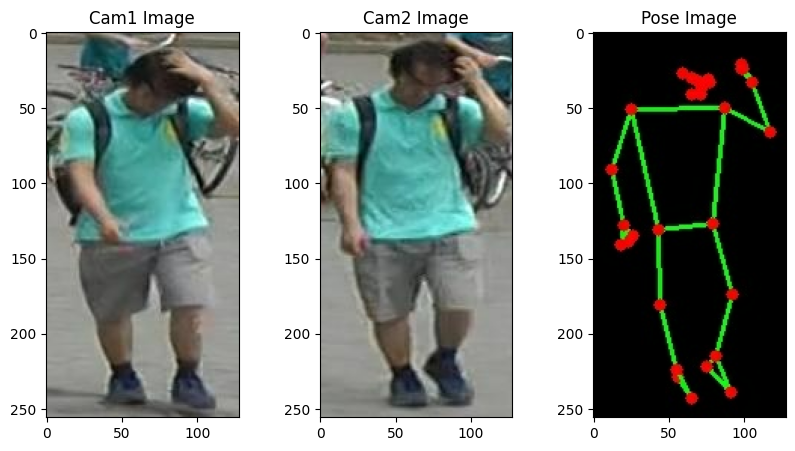

Cam1 batch shape: (32, 256, 128, 3)
Cam2 batch shape: (32, 256, 128, 3)
Pose batch shape: (32, 256, 128, 3)


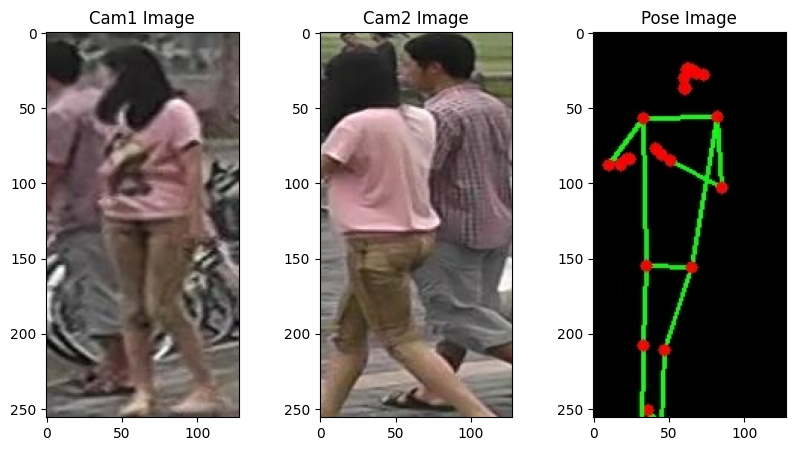

Cam1 batch shape: (32, 256, 128, 3)
Cam2 batch shape: (32, 256, 128, 3)
Pose batch shape: (32, 256, 128, 3)


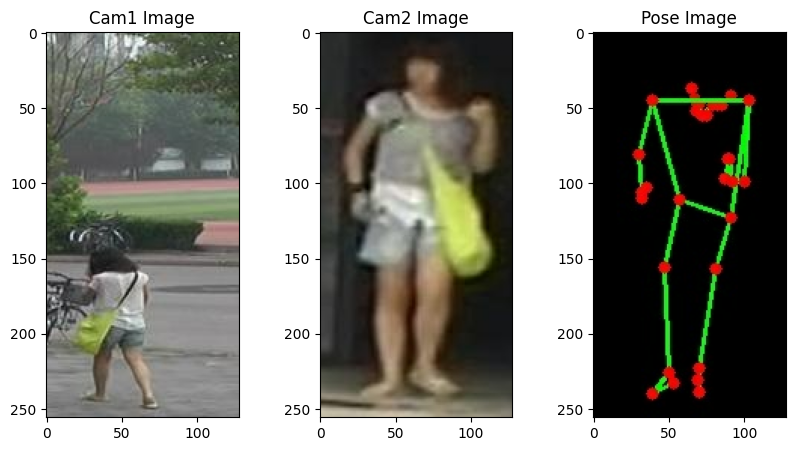

In [ ]:
for cam1_batch, cam2_batch, pose_batch in testcombined_dataset.take(3):
    # Check shapes
    print("Cam1 batch shape:", cam1_batch.shape)
    print("Cam2 batch shape:", cam2_batch.shape)
    print("Pose batch shape:", pose_batch.shape)


    plt.figure(figsize=(10, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(cam1_batch[1].numpy())
    plt.title("Cam1 Image")

    plt.subplot(1, 3, 2)
    plt.imshow(cam2_batch[1].numpy())
    plt.title("Cam2 Image")

    plt.subplot(1, 3, 3)
    plt.imshow(pose_batch[1].numpy())
    plt.title("Pose Image")

    plt.show()

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

def augment_image(image):


    image = tf.image.random_brightness(image, max_delta=0.1)
    image = tf.image.random_contrast(image, lower=0.9, upper=1.1)
    image = tf.image.random_saturation(image, lower=0.9, upper=1.1)
    image = tf.image.random_hue(image, max_delta=0.1)
    return image

def preprocess_image(image):

    image = tf.cast(image, tf.float32) / 255.0
    return image

def preprocess_and_augment_pair(cam1_img, cam2_img, pose_img):


    cam1_img = augment_image(cam1_img)
    cam2_img = augment_image(cam2_img)
    pose_img = augment_image(pose_img)
    return cam1_img, cam2_img, pose_img

In [ ]:

trainaugmented_dataset = traincombined_dataset.map(preprocess_and_augment_pair)


for cam1_batch, cam2_batch, pose_batch in trainaugmented_dataset.take(1):
    print("Cam1 batch shape:", cam1_batch.shape)
    print("Cam2 batch shape:", cam2_batch.shape)
    print("Pose batch shape:", pose_batch.shape)

Cam1 batch shape: (32, 256, 128, 3)
Cam2 batch shape: (32, 256, 128, 3)
Pose batch shape: (32, 256, 128, 3)


In [ ]:


testaugmented_dataset = testcombined_dataset.map(preprocess_and_augment_pair)


for cam1_batch, cam2_batch, pose_batch in testaugmented_dataset.take(1):
    print("Cam1 batch shape:", cam1_batch.shape)
    print("Cam2 batch shape:", cam2_batch.shape)
    print("Pose batch shape:", pose_batch.shape)

Cam1 batch shape: (32, 256, 128, 3)
Cam2 batch shape: (32, 256, 128, 3)
Pose batch shape: (32, 256, 128, 3)


Cam1 batch shape: (32, 256, 128, 3)
Cam2 batch shape: (32, 256, 128, 3)
Pose batch shape: (32, 256, 128, 3)


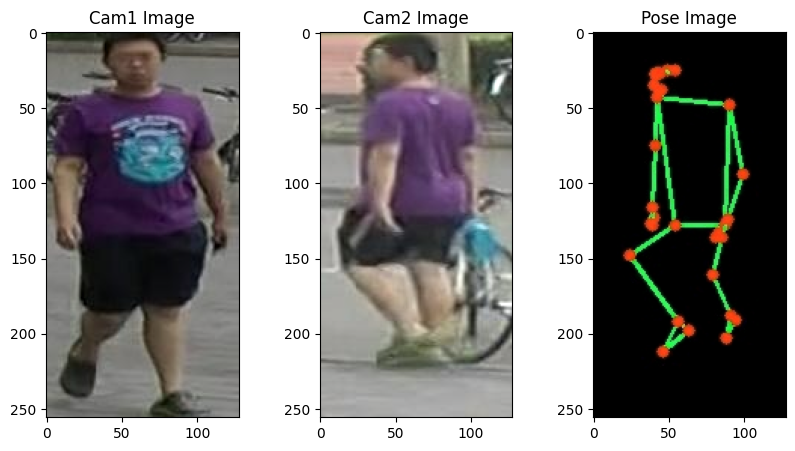

In [ ]:
for cam1_batch, cam2_batch, pose_batch in trainaugmented_dataset.take(1):

    print("Cam1 batch shape:", cam1_batch.shape)
    print("Cam2 batch shape:", cam2_batch.shape)
    print("Pose batch shape:", pose_batch.shape)


    plt.figure(figsize=(10, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(cam1_batch[0].numpy())
    plt.title("Cam1 Image")

    plt.subplot(1, 3, 2)
    plt.imshow(cam2_batch[0].numpy())
    plt.title("Cam2 Image")

    plt.subplot(1, 3, 3)
    plt.imshow(pose_batch[0].numpy())
    plt.title("Pose Image")

    plt.show()

Cam1 batch shape: (32, 256, 128, 3)
Cam2 batch shape: (32, 256, 128, 3)
Pose batch shape: (32, 256, 128, 3)


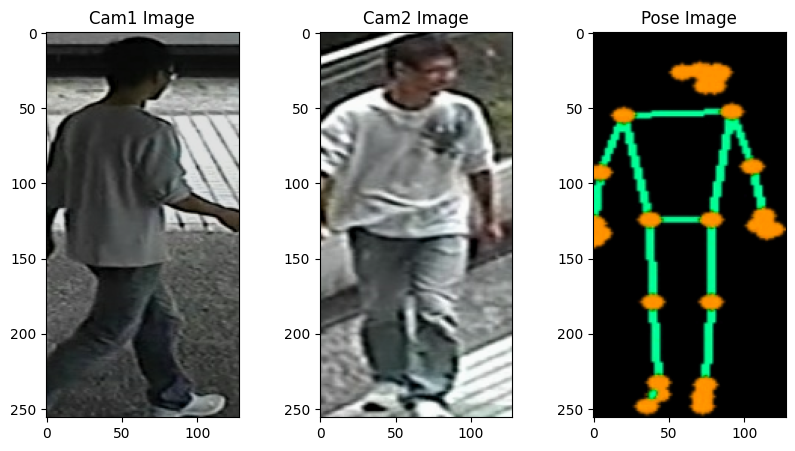

In [ ]:



for cam1_batch, cam2_batch, pose_batch in testaugmented_dataset.take(1):

    print("Cam1 batch shape:", cam1_batch.shape)
    print("Cam2 batch shape:", cam2_batch.shape)
    print("Pose batch shape:", pose_batch.shape)
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(cam1_batch[0].numpy())
    plt.title("Cam1 Image")

    plt.subplot(1, 3, 2)
    plt.imshow(cam2_batch[0].numpy())
    plt.title("Cam2 Image")

    plt.subplot(1, 3, 3)
    plt.imshow(pose_batch[0].numpy())
    plt.title("Pose Image")

    plt.show()

In [ ]:

traindataset = trainloaded_datasetcuhk.concatenate(trainloaded_datasetmars)


testdataset = testloaded_datasetcuhk.concatenate(testloaded_datasetmars)



In [ ]:
num_batches = sum(1 for _ in traindataset)
print(num_batches)

In [ ]:
import matplotlib.pyplot as plt



for c1, c2, pose in trainloaded_datasetmars.take(2):

    plt.imshow(c1[0])
    plt.title("Cam1 Image 1")
    plt.axis('off')
    plt.show()

    plt.imshow(c2[0])
    plt.title("Cam2 Image 1")
    plt.axis('off')
    plt.show()

    plt.imshow(pose[0])
    plt.title("Pose Image 1")
    plt.axis('off')
    plt.show()


In [ ]:
import matplotlib.pyplot as plt


for (cam1_batch, cam2_batch, pose_batch),_ in testdataset.take(1):

    fig, axes = plt.subplots(3, 10, figsize=(10, 9))

    for i in range(10):

        axes[0, i].imshow(cam1_batch[i].numpy())
        axes[0, i].axis('off')
        axes[0, i].set_title(f"Cam1-{i+1}")


        axes[1, i].imshow(cam2_batch[i].numpy())
        axes[1, i].axis('off')
        axes[1, i].set_title(f"Cam2-{i+1}")


        axes[2, i].imshow(pose_batch[i].numpy())
        axes[2, i].axis('off')
        axes[2, i].set_title(f"Pose-{i+1}")

    plt.show()


NameError: name 'testdataset' is not defined

In [ ]:
import tensorflow as tf

class InstanceNormalization(tf.keras.layers.Layer):
    def __init__(self, epsilon=1e-5, **kwargs):
        super(InstanceNormalization, self).__init__(**kwargs)
        self.epsilon = epsilon

    def build(self, input_shape):

        self.gamma = self.add_weight(
            shape=(input_shape[-1],),
            initializer='ones',
            trainable=True,
            name='gamma'
        )
        self.beta = self.add_weight(
            shape=(input_shape[-1],),
            initializer='zeros',
            trainable=True,
            name='beta'
        )
        super(InstanceNormalization, self).build(input_shape)

    def call(self, inputs):

        mean, variance = tf.nn.moments(inputs, axes=[1, 2], keepdims=True)

        normalized = (inputs - mean) / tf.sqrt(variance + self.epsilon)

        return self.gamma * normalized + self.beta

In [ ]:
class ResBlock(Model):
  def __init__(self,filters,use_bias=False):
    super(ResBlock,self).__init__()
    self.conv1 = Conv2D(filters = filters,kernel_size=3,strides = 1,padding = 'same',use_bias = use_bias)
    self.b1 = InstanceNormalization()
    self.relu1 = tf.keras.layers.ReLU()


    self.conv2 = Conv2D(filters = filters,kernel_size=3,strides = 1,padding = 'same',use_bias = use_bias)
    self.b2 = InstanceNormalization()
    self.relu2 = tf.keras.layers.ReLU()

  def build(self, input_shape):
    super(ResBlock, self).build(input_shape)



  def call(self,x):
    y = self.conv1(x)
    y = self.b1(y)
    y = self.relu1(y)
    y = self.conv2(y)
    y = self.b2(y)
    y = tf.keras.layers.Add()([x,y])
    y = self.relu2(y)

    return y


In [ ]:
import tensorflow as tf

def reflection_pad_2d(x, padding_size):
    return tf.pad(x, [[0, 0], [padding_size, padding_size], [padding_size, padding_size], [0, 0]], mode='REFLECT')

#part1

class Generator(Model):
  def __init__(self,ngf,numresblock):
    super(Generator,self).__init__()
    self.pad=tf.keras.layers.Lambda(lambda x: reflection_pad_2d(x, 3))
    self.conv1 = Conv2D(filters=ngf,kernel_size=7,strides = 1,padding='valid',use_bias = True)
    self.b1 = InstanceNormalization()
    self.relu1 = ReLU()

    self.conv2 = Conv2D(filters=ngf*2,kernel_size=3,strides = 2,padding='same',use_bias = True)
    self.b2 = InstanceNormalization()
    self.relu2 = ReLU()


    self.conv3 = Conv2D(filters=ngf*4,kernel_size=3,strides = 2,padding='same',use_bias = True)
    self.b3 = InstanceNormalization()
    self.relu3 = ReLU()

    self.numresblock = numresblock
    for i in range(numresblock):
            setattr(self, 'res'+str(i+1), ResBlock(ngf*4, use_bias=True))


    self.deconv3 = Conv2DTranspose(filters=ngf*2,kernel_size=3,strides = 2,padding='same',use_bias = True)
    self.b4 = InstanceNormalization()
    self.relu4 = ReLU()

    self.deconv2 = Conv2DTranspose(filters=ngf,kernel_size=3,strides = 2,padding='same',use_bias = True)
    self.b5 = InstanceNormalization()
    self.relu5 = ReLU()

    self.pad2=tf.keras.layers.Lambda(lambda x: reflection_pad_2d(x, 3))
    self.deconv1 = Conv2D(filters=3,kernel_size=7,strides = 1,padding='valid',use_bias = False)
    self.tanh = tf.keras.layers.Activation('tanh')



  def call(self,img,pose):
    x = tf.concat([img,pose],axis=-1)
    x = self.pad(x)
    x = self.conv1(x)
    x = self.b1(x)
    x = self.relu1(x)

    x = self.conv2(x)
    x = self.b2(x)
    x = self.relu2(x)

    x = self.conv3(x)
    x = self.b3(x)
    x = self.relu3(x)

    for i in range(self.numresblock):
      res = getattr(self, 'res'+str(i+1))
      x = res(x)

    x = self.deconv3(x)
    x = self.b4(x)
    x = self.relu4(x)

    x = self.deconv2(x)
    x = self.b5(x)
    x = self.relu5(x)

    x = self.pad2(x)
    x = self.deconv1(x)
    x = self.tanh(x)

    return x



gen = Generator(ngf=64,numresblock=9)
gen(img=tf.ones((1,250,128,3)), pose=tf.ones((1,250,128,3)))
gen.summary()

Model: "generator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda (Lambda)                      │ (1, 256, 134, 6)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (1, 250, 128, 64)           │          18,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ instance_normalization               │ ?                           │             128 │
│ (InstanceNormalization)              │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (1, 250, 128, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (1, 125, 64, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ instance_normalization_1             │ ?                           │             256 │
│ (InstanceNormalization)              │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (1, 125, 64, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (1, 63, 32, 256)            │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ instance_normalization_2             │ ?                           │             512 │
│ (InstanceNormalization)              │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (1, 63, 32, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block (ResBlock)                 │ ?                           │       1,181,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block_1 (ResBlock)               │ ?                           │       1,181,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block_2 (ResBlock)               │ ?                           │       1,181,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block_3 (ResBlock)               │ ?                           │       1,181,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block_4 (ResBlock)               │ ?                           │       1,181,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block_5 (ResBlock)               │ ?                           │       1,181,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block_6 (ResBlock)               │ ?                           │       1,181,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block_7 (ResBlock)               │ ?                           │       1,181,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block_8 (ResBlock)               │ ?                           │       1,181,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (1, 126, 64, 128)           │         295,0

 Total params: 11,398,080 (43.48 MB)

 Trainable params: 11,398,080 (43.48 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, BatchNormalization, ReLU, Activation, Add, Lambda
from tensorflow.keras.models import Model

#part2

def reflection_pad_2d(x, padding_size):
    return tf.pad(x, [[0, 0], [padding_size, padding_size], [padding_size, padding_size], [0, 0]], mode='REFLECT')

class ResBlock(Model):
    def __init__(self, filters, use_bias=True):
        super(ResBlock, self).__init__()
        self.conv1 = Conv2D(filters, kernel_size=3, strides=1, padding='same', use_bias=use_bias)
        self.b1 = BatchNormalization()
        self.relu = ReLU()
        self.conv2 = Conv2D(filters, kernel_size=3, strides=1, padding='same', use_bias=use_bias)
        self.b2 = BatchNormalization()

    def call(self, x):
        residual = x
        x = self.conv1(x)
        x = self.b1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.b2(x)
        return Add()([x, residual])

class ChannelAttention(Model):
    def __init__(self, filters, ratio=8):
        super(ChannelAttention, self).__init__()
        self.global_avg_pool = tf.keras.layers.GlobalAveragePooling2D()
        self.dense1 = tf.keras.layers.Dense(filters // ratio, activation='relu')
        self.dense2 = tf.keras.layers.Dense(filters, activation='sigmoid')

    def call(self, x):
        scale = self.global_avg_pool(x)
        scale = tf.expand_dims(tf.expand_dims(scale, 1), 1)
        scale = self.dense1(scale)
        scale = self.dense2(scale)
        return x * scale

class Generator(Model):
    def __init__(self, ngf, numresblock):
        super(Generator, self).__init__()
        self.pad = Lambda(lambda x: reflection_pad_2d(x, 3))
        self.conv1 = Conv2D(filters=ngf, kernel_size=7, strides=1, padding='valid', use_bias=True)
        self.b1 = BatchNormalization()
        self.relu1 = ReLU()

        self.conv2 = Conv2D(filters=ngf * 2, kernel_size=3, strides=2, padding='same', use_bias=True)
        self.b2 = BatchNormalization()
        self.relu2 = ReLU()

        self.conv3 = Conv2D(filters=ngf * 4, kernel_size=3, strides=2, padding='same', use_bias=True)
        self.b3 = BatchNormalization()
        self.relu3 = ReLU()


        self.numresblock = numresblock
        for i in range(numresblock):
            setattr(self, 'res' + str(i + 1), ResBlock(ngf * 4))
            setattr(self, 'ca' + str(i + 1), ChannelAttention(ngf * 4))

        self.deconv3 = Conv2DTranspose(filters=ngf * 2, kernel_size=3, strides=2, padding='same', use_bias=True)
        self.b4 = BatchNormalization()
        self.relu4 = ReLU()

        self.deconv2 = Conv2DTranspose(filters=ngf, kernel_size=3, strides=2, padding='same', use_bias=True)
        self.b5 = BatchNormalization()
        self.relu5 = ReLU()

        self.pad2 = Lambda(lambda x: reflection_pad_2d(x, 3))
        self.deconv1 = Conv2D(filters=3, kernel_size=7, strides=1, padding='valid', use_bias=False)
        self.tanh = Activation('tanh')

    def call(self, img, pose):
        x = tf.concat([img, pose], axis=-1)
        x = self.pad(x)
        x = self.conv1(x)
        x = self.b1(x)
        x = self.relu1(x)

        x = self.conv2(x)
        x = self.b2(x)
        x = self.relu2(x)

        x = self.conv3(x)
        x = self.b3(x)
        x = self.relu3(x)

        for i in range(self.numresblock):
            res = getattr(self, 'res' + str(i + 1))
            ca = getattr(self, 'ca' + str(i + 1))
            x = res(x)
            x = ca(x)

        x = self.deconv3(x)
        x = self.b4(x)
        x = self.relu4(x)

        x = self.deconv2(x)
        x = self.b5(x)
        x = self.relu5(x)

        x = self.pad2(x)
        x = self.deconv1(x)
        x = self.tanh(x)

        return x


gen = Generator(ngf=64, numresblock=9)
gen(img=tf.ones((1, 250, 128, 3)), pose=tf.ones((1, 250, 128, 3)))
gen.summary()


In [ ]:
import tensorflow as tf

class InstanceNormalization(tf.keras.layers.Layer):
    def __init__(self, epsilon=1e-5, **kwargs):
        super(InstanceNormalization, self).__init__(**kwargs)
        self.epsilon = epsilon

    def build(self, input_shape):

        self.gamma = self.add_weight(
            shape=(input_shape[-1],),
            initializer='ones',
            trainable=True,
            name='gamma'
        )
        self.beta = self.add_weight(
            shape=(input_shape[-1],),
            initializer='zeros',
            trainable=True,
            name='beta'
        )
        super(InstanceNormalization, self).build(input_shape)

    def call(self, inputs):

        mean, variance = tf.nn.moments(inputs, axes=[1, 2], keepdims=True)

        normalized = (inputs - mean) / tf.sqrt(variance + self.epsilon)

        return self.gamma * normalized + self.beta

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, BatchNormalization, ReLU, GlobalAveragePooling2D, Dense, Reshape, Multiply
#part one
class ResBlock(tf.keras.Model):
    def __init__(self, filters, use_bias=False):
        super(ResBlock, self).__init__()
        self.conv1 = Conv2D(filters=filters, kernel_size=3, strides=1, padding='same', use_bias=use_bias)
        self.b1 = InstanceNormalization()
        self.relu1 = ReLU()

        self.conv2 = Conv2D(filters=filters, kernel_size=3, strides=1, padding='same', use_bias=use_bias)
        self.b2 = InstanceNormalization()
        self.relu2 = ReLU()

    def call(self, x):
        y = self.conv1(x)
        y = self.b1(y)
        y = self.relu1(y)
        y = self.conv2(y)
        y = self.b2(y)
        y = tf.keras.layers.Add()([x, y])
        y = self.relu2(y)
        return y

def reflection_pad_2d(x, padding_size):
    return tf.pad(x, [[0, 0], [padding_size, padding_size], [padding_size, padding_size], [0, 0]], mode='REFLECT')

class ChannelAttention(tf.keras.layers.Layer):
    def __init__(self, channels, reduction_ratio=16):
        super(ChannelAttention, self).__init__()
        self.avg_pool = GlobalAveragePooling2D()
        self.fc1 = Dense(channels // reduction_ratio, activation='relu', use_bias=False)
        self.fc2 = Dense(channels, activation='sigmoid', use_bias=False)
        self.reshape = Reshape((1, 1, channels))

    def call(self, x):
        y = self.avg_pool(x)
        y = self.fc1(y)
        y = self.fc2(y)
        y = self.reshape(y)
        return Multiply()([x, y])

class Generator(tf.keras.Model):
    def __init__(self, ngf, numresblock):
        super(Generator, self).__init__()
        self.pad = tf.keras.layers.Lambda(lambda x: reflection_pad_2d(x, 3))
        self.conv1 = Conv2D(filters=ngf, kernel_size=7, strides=1, padding='valid', use_bias=True)
        self.b1 = InstanceNormalization()
        self.relu1 = ReLU()

        self.conv2 = Conv2D(filters=ngf*2, kernel_size=3, strides=2, padding='same', use_bias=True)
        self.b2 = InstanceNormalization()
        self.relu2 = ReLU()

        self.conv3 = Conv2D(filters=ngf*4, kernel_size=3, strides=2, padding='same', use_bias=True)
        self.b3 = InstanceNormalization()
        self.relu3 = ReLU()

        self.numresblock = numresblock
        for i in range(numresblock):
            setattr(self, 'res'+str(i+1), ResBlock(ngf*4, use_bias=True))


        self.ca1 = ChannelAttention(ngf*4)
        self.ca2 = ChannelAttention(ngf*4)

        self.deconv3 = Conv2DTranspose(filters=ngf*2, kernel_size=3, strides=2, padding='same', use_bias=True)
        self.b4 = InstanceNormalization()
        self.relu4 = ReLU()

        self.deconv2 = Conv2DTranspose(filters=ngf, kernel_size=3, strides=2, padding='same', use_bias=True)
        self.b5 = InstanceNormalization()
        self.relu5 = ReLU()

        self.pad2 = tf.keras.layers.Lambda(lambda x: reflection_pad_2d(x, 3))
        self.deconv1 = Conv2D(filters=3, kernel_size=7, strides=1, padding='valid', use_bias=False)
        self.tanh = tf.keras.layers.Activation('tanh')

    def call(self, img, pose):
        x = tf.concat([img, pose], axis=-1)
        x = self.pad(x)
        x = self.conv1(x)
        x = self.b1(x)
        x = self.relu1(x)

        x = self.conv2(x)
        x = self.b2(x)
        x = self.relu2(x)

        x = self.conv3(x)
        x = self.b3(x)
        x = self.relu3(x)

        for i in range(self.numresblock):
            res = getattr(self, 'res'+str(i+1))
            x = res(x)


        x = self.ca1(x)
        x = self.ca2(x)

        x = self.deconv3(x)
        x = self.b4(x)
        x = self.relu4(x)

        x = self.deconv2(x)
        x = self.b5(x)
        x = self.relu5(x)

        x = self.pad2(x)
        x = self.deconv1(x)
        x = self.tanh(x)

        return x


gen = Generator(ngf=64, numresblock=9)
output = gen(img=tf.ones((1, 256, 128, 3)), pose=tf.ones((1, 256, 128, 3)))
gen.summary()


Model: "generator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda (Lambda)                      │ (1, 262, 134, 6)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (1, 256, 128, 64)           │          18,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ instance_normalization               │ ?                           │             128 │
│ (InstanceNormalization)              │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (1, 256, 128, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (1, 128, 64, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ instance_normalization_1             │ ?                           │             256 │
│ (InstanceNormalization)              │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (1, 128, 64, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (1, 64, 32, 256)            │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ instance_normalization_2             │ ?                           │             512 │
│ (InstanceNormalization)              │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (1, 64, 32, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block (ResBlock)                 │ ?                           │       1,181,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block_1 (ResBlock)               │ ?                           │       1,181,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block_2 (ResBlock)               │ ?                           │       1,181,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block_3 (ResBlock)               │ ?                           │       1,181,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block_4 (ResBlock)               │ ?                           │       1,181,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block_5 (ResBlock)               │ ?                           │       1,181,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block_6 (ResBlock)               │ ?                           │       1,181,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block_7 (ResBlock)               │ ?                           │       1,181,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block_8 (ResBlock)               │ ?                           │       1,181,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ channel_attention (ChannelAttention) │ ?                           │           8,1

 Total params: 11,414,464 (43.54 MB)

 Trainable params: 11,414,464 (43.54 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, BatchNormalization, ReLU, GlobalAveragePooling2D, Dense, Reshape, Multiply
#part one for single pose
class ResBlock(tf.keras.Model):
    def __init__(self, filters, use_bias=False):
        super(ResBlock, self).__init__()
        self.conv1 = Conv2D(filters=filters, kernel_size=3, strides=1, padding='same', use_bias=use_bias)
        self.b1 = InstanceNormalization()
        self.relu1 = ReLU()

        self.conv2 = Conv2D(filters=filters, kernel_size=3, strides=1, padding='same', use_bias=use_bias)
        self.b2 = InstanceNormalization()
        self.relu2 = ReLU()

    def call(self, x):
        y = self.conv1(x)
        y = self.b1(y)
        y = self.relu1(y)
        y = self.conv2(y)
        y = self.b2(y)
        y = tf.keras.layers.Add()([x, y])
        y = self.relu2(y)
        return y

def reflection_pad_2d(x, padding_size):
    return tf.pad(x, [[0, 0], [padding_size, padding_size], [padding_size, padding_size], [0, 0]], mode='REFLECT')

class ChannelAttention(tf.keras.layers.Layer):
    def __init__(self, channels, reduction_ratio=16):
        super(ChannelAttention, self).__init__()
        self.avg_pool = GlobalAveragePooling2D()
        self.fc1 = Dense(channels // reduction_ratio, activation='relu', use_bias=False)
        self.fc2 = Dense(channels, activation='sigmoid', use_bias=False)
        self.reshape = Reshape((1, 1, channels))

    def call(self, x):
        y = self.avg_pool(x)
        y = self.fc1(y)
        y = self.fc2(y)
        y = self.reshape(y)
        return Multiply()([x, y])

class Generator(tf.keras.Model):
    def __init__(self, ngf, numresblock):
        super(Generator, self).__init__()
        self.pad = tf.keras.layers.Lambda(lambda x: reflection_pad_2d(x, 3))
        self.conv1 = Conv2D(filters=ngf, kernel_size=7, strides=1, padding='valid', use_bias=True)
        self.b1 = InstanceNormalization()
        self.relu1 = ReLU()

        self.conv2 = Conv2D(filters=ngf*2, kernel_size=3, strides=2, padding='same', use_bias=True)
        self.b2 = InstanceNormalization()
        self.relu2 = ReLU()

        self.conv3 = Conv2D(filters=ngf*4, kernel_size=3, strides=2, padding='same', use_bias=True)
        self.b3 = InstanceNormalization()
        self.relu3 = ReLU()

        self.numresblock = numresblock
        for i in range(numresblock):
            setattr(self, 'res'+str(i+1), ResBlock(ngf*4, use_bias=True))


        self.ca1 = ChannelAttention(ngf*4)
        self.ca2 = ChannelAttention(ngf*4)

        self.deconv3 = Conv2DTranspose(filters=ngf*2, kernel_size=3, strides=2, padding='same', use_bias=True)
        self.b4 = InstanceNormalization()
        self.relu4 = ReLU()

        self.deconv2 = Conv2DTranspose(filters=ngf, kernel_size=3, strides=2, padding='same', use_bias=True)
        self.b5 = InstanceNormalization()
        self.relu5 = ReLU()

        self.pad2 = tf.keras.layers.Lambda(lambda x: reflection_pad_2d(x, 3))
        self.deconv1 = Conv2D(filters=3, kernel_size=7, strides=1, padding='valid', use_bias=False)
        self.tanh = tf.keras.layers.Activation('tanh')

# In your Generator's call method (ipython-input-24-8f3250fe824b):

    def call(self, img, pose):
    # Ensure both img and pose have the same batch size
    # Slice the pose tensor to match the batch size of the img tensor
        pose = pose[:tf.shape(img)[0]]

        x = tf.concat([img, pose], axis=-1)
        x = self.pad(x)
        x = self.conv1(x)
    # ... rest of your call method
        x = self.b1(x)
        x = self.relu1(x)

        x = self.conv2(x)
        x = self.b2(x)
        x = self.relu2(x)

        x = self.conv3(x)
        x = self.b3(x)
        x = self.relu3(x)

        for i in range(self.numresblock):
            res = getattr(self, 'res'+str(i+1))
            x = res(x)


        x = self.ca1(x)
        x = self.ca2(x)

        x = self.deconv3(x)
        x = self.b4(x)
        x = self.relu4(x)

        x = self.deconv2(x)
        x = self.b5(x)
        x = self.relu5(x)

        x = self.pad2(x)
        x = self.deconv1(x)
        x = self.tanh(x)

        return x


gen = Generator(ngf=64, numresblock=9)
output = gen(img=tf.ones((1, 256, 128, 3)), pose=tf.ones((1, 256, 128, 3)))
gen.summary()


Model: "generator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda (Lambda)                      │ (1, 262, 134, 6)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (1, 256, 128, 64)           │          18,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ instance_normalization               │ ?                           │             128 │
│ (InstanceNormalization)              │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (1, 256, 128, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (1, 128, 64, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ instance_normalization_1             │ ?                           │             256 │
│ (InstanceNormalization)              │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (1, 128, 64, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (1, 64, 32, 256)            │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ instance_normalization_2             │ ?                           │             512 │
│ (InstanceNormalization)              │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (1, 64, 32, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block (ResBlock)                 │ ?                           │       1,181,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block_1 (ResBlock)               │ ?                           │       1,181,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block_2 (ResBlock)               │ ?                           │       1,181,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block_3 (ResBlock)               │ ?                           │       1,181,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block_4 (ResBlock)               │ ?                           │       1,181,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block_5 (ResBlock)               │ ?                           │       1,181,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block_6 (ResBlock)               │ ?                           │       1,181,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block_7 (ResBlock)               │ ?                           │       1,181,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block_8 (ResBlock)               │ ?                           │       1,181,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ channel_attention (ChannelAttention) │ ?                           │           8,1

 Total params: 11,414,464 (43.54 MB)

 Trainable params: 11,414,464 (43.54 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, BatchNormalization, ReLU, GlobalAveragePooling2D, Dense, Reshape, Multiply, Add, AveragePooling2D
#part two single pose
class ResBlock(tf.keras.Model):
    def __init__(self, filters, use_bias=False):
        super(ResBlock, self).__init__()
        self.conv1 = Conv2D(filters=filters, kernel_size=3, strides=1, padding='same', use_bias=use_bias)
        self.b1 = InstanceNormalization()
        self.relu1 = ReLU()

        self.conv2 = Conv2D(filters=filters, kernel_size=3, strides=1, padding='same', use_bias=use_bias)
        self.b2 = InstanceNormalization()
        self.relu2 = ReLU()

    def call(self, x):
        y = self.conv1(x)
        y = self.b1(y)
        y = self.relu1(y)
        y = self.conv2(y)
        y = self.b2(y)
        y = Add()([x, y])  # Skip connection
        y = self.relu2(y)
        return y

def reflection_pad_2d(x, padding_size):
    return tf.pad(x, [[0, 0], [padding_size, padding_size], [padding_size, padding_size], [0, 0]], mode='REFLECT')

class ChannelAttention(tf.keras.layers.Layer):
    def __init__(self, channels, reduction_ratio=16):
        super(ChannelAttention, self).__init__()
        self.avg_pool = GlobalAveragePooling2D()
        self.fc1 = Dense(channels // reduction_ratio, activation='relu', use_bias=False)
        self.fc2 = Dense(channels, activation='sigmoid', use_bias=False)
        self.reshape = Reshape((1, 1, channels))

    def call(self, x):
        y = self.avg_pool(x)
        y = self.fc1(y)
        y = self.fc2(y)
        y = self.reshape(y)
        return Multiply()([x, y])  # Channel attention

class Generator(tf.keras.Model):
    def __init__(self, ngf, numresblock):
        super(Generator, self).__init__()
        self.pad = tf.keras.layers.Lambda(lambda x: reflection_pad_2d(x, 3))
        self.conv1 = Conv2D(filters=ngf, kernel_size=7, strides=1, padding='valid', use_bias=True)
        self.b1 = InstanceNormalization()
        self.relu1 = ReLU()

        self.conv2 = Conv2D(filters=ngf*2, kernel_size=3, strides=2, padding='same', use_bias=True)
        self.b2 = InstanceNormalization()
        self.relu2 = ReLU()

        self.conv3 = Conv2D(filters=ngf*4, kernel_size=3, strides=2, padding='same', use_bias=True)
        self.b3 = InstanceNormalization()
        self.relu3 = ReLU()

        self.numresblock = numresblock
        for i in range(numresblock):
            setattr(self, 'res'+str(i+1), ResBlock(ngf*4, use_bias=True))

        # Color feature extraction layers for cam1
        self.color_conv1 = Conv2D(filters=ngf*4, kernel_size=3, strides=1, padding='same', use_bias=True)
        self.color_conv2 = Conv2D(filters=ngf*4, kernel_size=3, strides=1, padding='same', use_bias=True)

        # Attention layers to emphasize color from cam1
        self.ca1 = ChannelAttention(ngf*4)
        self.ca2 = ChannelAttention(ngf*4)

        # Downsample color features to match shape of x
        self.downsample_color = AveragePooling2D(pool_size=(4, 4))  # 256x128 -> 64x32

        # Decoder part
        self.deconv3 = Conv2DTranspose(filters=ngf*2, kernel_size=3, strides=2, padding='same', use_bias=True)
        self.b4 = InstanceNormalization()
        self.relu4 = ReLU()

        self.deconv2 = Conv2DTranspose(filters=ngf, kernel_size=3, strides=2, padding='same', use_bias=True)
        self.b5 = InstanceNormalization()
        self.relu5 = ReLU()

        self.pad2 = tf.keras.layers.Lambda(lambda x: reflection_pad_2d(x, 3))
        self.deconv1 = Conv2D(filters=3, kernel_size=7, strides=1, padding='valid', use_bias=False)
        self.tanh = tf.keras.layers.Activation('tanh')

    def call(self, img, pose):
        # Step 1: Extract color features from cam1
        color_features = self.color_conv1(img)
        color_features = self.color_conv2(color_features)
        color_features = self.downsample_color(color_features)  # Downsample to match x shape

        pose = pose[:tf.shape(img)[0]]

        x = tf.concat([img, pose], axis=-1)
        x = self.pad(x)
        x = self.conv1(x)
        x = self.b1(x)
        x = self.relu1(x)

        x = self.conv2(x)
        x = self.b2(x)
        x = self.relu2(x)

        x = self.conv3(x)
        x = self.b3(x)
        x = self.relu3(x)

        # Step 3: Residual blocks
        for i in range(self.numresblock):
            res = getattr(self, 'res'+str(i+1))
            x = res(x)

        # Step 4: Apply channel attention and combine with color features from cam1
        x = self.ca1(x)
        x = self.ca2(x)

        # Fuse color features from cam1 directly
        x = tf.add(x, color_features)  # Fuse color information

        # Step 5: Decoder steps to generate final image
        x = self.deconv3(x)
        x = self.b4(x)
        x = self.relu4(x)

        x = self.deconv2(x)
        x = self.b5(x)
        x = self.relu5(x)

        x = self.pad2(x)
        x = self.deconv1(x)
        x = self.tanh(x)

        return x

# Instantiate and test
gen = Generator(ngf=64, numresblock=9)
output = gen(img=tf.ones((1, 256, 128, 3)), pose=tf.ones((1, 256, 128, 3)))
gen.summary()


Model: "generator_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda_2 (Lambda)                    │ (1, 262, 134, 6)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (1, 256, 128, 64)           │          18,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ instance_normalization_23            │ ?                           │             128 │
│ (InstanceNormalization)              │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_23 (ReLU)                      │ (1, 256, 128, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (1, 128, 64, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ instance_normalization_24            │ ?                           │             256 │
│ (InstanceNormalization)              │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_24 (ReLU)                      │ (1, 128, 64, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (1, 64, 32, 256)            │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ instance_normalization_25            │ ?                           │             512 │
│ (InstanceNormalization)              │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_25 (ReLU)                      │ (1, 64, 32, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block_9 (ResBlock)               │ ?                           │       1,181,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block_10 (ResBlock)              │ ?                           │       1,181,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block_11 (ResBlock)              │ ?                           │       1,181,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block_12 (ResBlock)              │ ?                           │       1,181,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block_13 (ResBlock)              │ ?                           │       1,181,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block_14 (ResBlock)              │ ?                           │       1,181,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block_15 (ResBlock)              │ ?                           │       1,181,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block_16 (ResBlock)              │ ?                           │       1,181,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block_17 (ResBlock)              │ ?                           │       1,181,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_45 (Conv2D)                   │ (1, 256, 128, 256)          │           7,1

 Total params: 12,011,712 (45.82 MB)

 Trainable params: 12,011,712 (45.82 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, BatchNormalization, ReLU, GlobalAveragePooling2D, Dense, Reshape, Multiply, Add, AveragePooling2D

class ResBlock(tf.keras.Model):
    def __init__(self, filters, use_bias=False):
        super(ResBlock, self).__init__()
        self.conv1 = Conv2D(filters=filters, kernel_size=3, strides=1, padding='same', use_bias=use_bias)
        self.b1 = InstanceNormalization()
        self.relu1 = ReLU()

        self.conv2 = Conv2D(filters=filters, kernel_size=3, strides=1, padding='same', use_bias=use_bias)
        self.b2 = InstanceNormalization()
        self.relu2 = ReLU()

    def call(self, x):
        y = self.conv1(x)
        y = self.b1(y)
        y = self.relu1(y)
        y = self.conv2(y)
        y = self.b2(y)
        y = Add()([x, y])  # Skip connection
        y = self.relu2(y)
        return y

def reflection_pad_2d(x, padding_size):
    return tf.pad(x, [[0, 0], [padding_size, padding_size], [padding_size, padding_size], [0, 0]], mode='REFLECT')

class ChannelAttention(tf.keras.layers.Layer):
    def __init__(self, channels, reduction_ratio=16):
        super(ChannelAttention, self).__init__()
        self.avg_pool = GlobalAveragePooling2D()
        self.fc1 = Dense(channels // reduction_ratio, activation='relu', use_bias=False)
        self.fc2 = Dense(channels, activation='sigmoid', use_bias=False)
        self.reshape = Reshape((1, 1, channels))

    def call(self, x):
        y = self.avg_pool(x)
        y = self.fc1(y)
        y = self.fc2(y)
        y = self.reshape(y)
        return Multiply()([x, y])  # Channel attention

class Generator(tf.keras.Model):
    def __init__(self, ngf, numresblock):
        super(Generator, self).__init__()
        self.pad = tf.keras.layers.Lambda(lambda x: reflection_pad_2d(x, 3))
        self.conv1 = Conv2D(filters=ngf, kernel_size=7, strides=1, padding='valid', use_bias=True)
        self.b1 = InstanceNormalization()
        self.relu1 = ReLU()

        self.conv2 = Conv2D(filters=ngf*2, kernel_size=3, strides=2, padding='same', use_bias=True)
        self.b2 = InstanceNormalization()
        self.relu2 = ReLU()

        self.conv3 = Conv2D(filters=ngf*4, kernel_size=3, strides=2, padding='same', use_bias=True)
        self.b3 = InstanceNormalization()
        self.relu3 = ReLU()

        self.numresblock = numresblock
        for i in range(numresblock):
            setattr(self, 'res'+str(i+1), ResBlock(ngf*4, use_bias=True))

        # Color feature extraction layers for cam1
        self.color_conv1 = Conv2D(filters=ngf*4, kernel_size=3, strides=1, padding='same', use_bias=True)
        self.color_conv2 = Conv2D(filters=ngf*4, kernel_size=3, strides=1, padding='same', use_bias=True)

        # Attention layers to emphasize color from cam1
        self.ca1 = ChannelAttention(ngf*4)
        self.ca2 = ChannelAttention(ngf*4)

        # Downsample color features to match shape of x
        self.downsample_color = AveragePooling2D(pool_size=(4, 4))  # 256x128 -> 64x32

        # Decoder part
        self.deconv3 = Conv2DTranspose(filters=ngf*2, kernel_size=3, strides=2, padding='same', use_bias=True)
        self.b4 = InstanceNormalization()
        self.relu4 = ReLU()

        self.deconv2 = Conv2DTranspose(filters=ngf, kernel_size=3, strides=2, padding='same', use_bias=True)
        self.b5 = InstanceNormalization()
        self.relu5 = ReLU()

        self.pad2 = tf.keras.layers.Lambda(lambda x: reflection_pad_2d(x, 3))
        self.deconv1 = Conv2D(filters=3, kernel_size=7, strides=1, padding='valid', use_bias=False)
        self.tanh = tf.keras.layers.Activation('tanh')

    def call(self, img, pose):
        # Step 1: Extract color features from cam1
        color_features = self.color_conv1(img)
        color_features = self.color_conv2(color_features)
        color_features = self.downsample_color(color_features)  # Downsample to match x shape

        # Step 2: Generate the pose + cam1 fusion feature maps
        x = tf.concat([img, pose], axis=-1)
        x = self.pad(x)
        x = self.conv1(x)
        x = self.b1(x)
        x = self.relu1(x)

        x = self.conv2(x)
        x = self.b2(x)
        x = self.relu2(x)

        x = self.conv3(x)
        x = self.b3(x)
        x = self.relu3(x)

        # Step 3: Residual blocks
        for i in range(self.numresblock):
            res = getattr(self, 'res'+str(i+1))
            x = res(x)

        # Step 4: Apply channel attention and combine with color features from cam1
        x = self.ca1(x)
        x = self.ca2(x)

        # Fuse color features from cam1 directly
        x = tf.add(x, color_features)  # Fuse color information

        # Step 5: Decoder steps to generate final image
        x = self.deconv3(x)
        x = self.b4(x)
        x = self.relu4(x)

        x = self.deconv2(x)
        x = self.b5(x)
        x = self.relu5(x)

        x = self.pad2(x)
        x = self.deconv1(x)
        x = self.tanh(x)

        return x

# Instantiate and test
gen = Generator(ngf=64, numresblock=9)
output = gen(img=tf.ones((1, 256, 128, 3)), pose=tf.ones((1, 256, 128, 3)))
gen.summary()


In [ ]:
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, BatchNormalization, ReLU, GlobalAveragePooling2D, Dense, Reshape, Multiply, Add, AveragePooling2D
import tensorflow as tf
import numpy as np


class InstanceNormalization(tf.keras.layers.Layer):
    def __init__(self, epsilon=1e-5, **kwargs):
        super(InstanceNormalization, self).__init__(**kwargs)
        self.epsilon = epsilon

    def build(self, input_shape):

        self.gamma = self.add_weight(
            shape=(input_shape[-1],),
            initializer='ones',
            trainable=True,
            name='gamma'
        )
        self.beta = self.add_weight(
            shape=(input_shape[-1],),
            initializer='zeros',
            trainable=True,
            name='beta'
        )
        super(InstanceNormalization, self).build(input_shape)

    def call(self, inputs):

        mean, variance = tf.nn.moments(inputs, axes=[1, 2], keepdims=True)

        normalized = (inputs - mean) / tf.sqrt(variance + self.epsilon)

        return self.gamma * normalized + self.beta

class ResBlock(tf.keras.Model):
    def __init__(self, filters, use_bias=False):
        super(ResBlock, self).__init__()
        self.conv1 = Conv2D(filters=filters, kernel_size=3, strides=1, padding='same', use_bias=use_bias)
        self.b1 = InstanceNormalization()
        self.relu1 = ReLU()

        self.conv2 = Conv2D(filters=filters, kernel_size=3, strides=1, padding='same', use_bias=use_bias)
        self.b2 = InstanceNormalization()
        self.relu2 = ReLU()

    def call(self, x):
        y = self.conv1(x)
        y = self.b1(y)
        y = self.relu1(y)
        y = self.conv2(y)
        y = self.b2(y)
        y = Add()([x, y])  # Skip connection
        y = self.relu2(y)
        return y

def reflection_pad_2d(x, padding_size):
    return tf.pad(x, [[0, 0], [padding_size, padding_size], [padding_size, padding_size], [0, 0]], mode='REFLECT')

class ChannelAttention(tf.keras.layers.Layer):
    def __init__(self, channels, reduction_ratio=16):
        super(ChannelAttention, self).__init__()
        self.avg_pool = GlobalAveragePooling2D()
        self.fc1 = Dense(channels // reduction_ratio, activation='relu', use_bias=False)
        self.fc2 = Dense(channels, activation='sigmoid', use_bias=False)
        self.reshape = Reshape((1, 1, channels))

    def call(self, x):
        y = self.avg_pool(x)
        y = self.fc1(y)
        y = self.fc2(y)
        y = self.reshape(y)
        return Multiply()([x, y])  # Channel attention

class Generator(tf.keras.Model):
    def __init__(self, ngf, numresblock):
        super(Generator, self).__init__()
        self.pad = tf.keras.layers.Lambda(lambda x: reflection_pad_2d(x, 3))
        self.conv1 = Conv2D(filters=ngf, kernel_size=7, strides=1, padding='valid', use_bias=True)
        self.b1 = InstanceNormalization()
        self.relu1 = ReLU()

        self.conv2 = Conv2D(filters=ngf*2, kernel_size=3, strides=2, padding='same', use_bias=True)
        self.b2 = InstanceNormalization()
        self.relu2 = ReLU()

        self.conv3 = Conv2D(filters=ngf*4, kernel_size=3, strides=2, padding='same', use_bias=True)
        self.b3 = InstanceNormalization()
        self.relu3 = ReLU()

        self.numresblock = numresblock
        for i in range(numresblock):
            setattr(self, 'res'+str(i+1), ResBlock(ngf*4, use_bias=True))

        # Color feature extraction layers
        self.color_conv1 = Conv2D(filters=ngf*4, kernel_size=3, strides=1, padding='same', use_bias=True)
        self.color_conv2 = Conv2D(filters=ngf*4, kernel_size=3, strides=1, padding='same', use_bias=True)

        # Attention layers to emphasize color
        self.ca1 = ChannelAttention(ngf*4)
        self.ca2 = ChannelAttention(ngf*4)

        # Downsample color features to match shape of x
        self.downsample_color = AveragePooling2D(pool_size=(4, 4))  # 256x128 -> 64x32

        # Decoder part
        self.deconv3 = Conv2DTranspose(filters=ngf*2, kernel_size=3, strides=2, padding='same', use_bias=True)
        self.b4 = InstanceNormalization()
        self.relu4 = ReLU()

        self.deconv2 = Conv2DTranspose(filters=ngf, kernel_size=3, strides=2, padding='same', use_bias=True)
        self.b5 = InstanceNormalization()
        self.relu5 = ReLU()

        self.pad2 = tf.keras.layers.Lambda(lambda x: reflection_pad_2d(x, 3))
        self.deconv1 = Conv2D(filters=3, kernel_size=7, strides=1, padding='valid', use_bias=False)
        self.tanh = tf.keras.layers.Activation('tanh')

    def histogram_matching(self, source, reference):
        """
        Matches the histogram of the source image to that of the reference image.
        """
        matched = tf.numpy_function(self._histogram_match, [source, reference], tf.float32)
        return tf.convert_to_tensor(matched)


    def histogram_matching(self, source, reference):
        """
        Matches the histogram of the source image to that of the reference image.
        """
        # Remove .numpy() calls as tf.numpy_function already converts to NumPy arrays
        matched = tf.numpy_function(self._histogram_match, [source, reference], tf.float32)
        return tf.convert_to_tensor(matched)

    def _histogram_match(self, source, reference):
        # source and reference are already NumPy arrays here
        matched = np.zeros_like(source)
        for i in range(source.shape[-1]):  # Per-channel matching
            matched[..., i] = self._match_histograms(source[..., i], reference[..., i])
        return matched

    def _match_histograms(self, source, reference):
        s_values, bin_idx, s_counts = np.unique(source.ravel(), return_inverse=True, return_counts=True)
        r_values, r_counts = np.unique(reference.ravel(), return_counts=True)
        s_quantiles = np.cumsum(s_counts).astype(np.float64) / source.size
        r_quantiles = np.cumsum(r_counts).astype(np.float64) / reference.size
        interp_r_values = np.interp(s_quantiles, r_quantiles, r_values)
        return interp_r_values[bin_idx].reshape(source.shape)


    def call(self, img, pose):
        # Step 1: Extract color features
        color_features = self.color_conv1(img)
        color_features = self.color_conv2(color_features)
        color_features = self.downsample_color(color_features)  # Downsample to match x shape

        # Step 2: Generate the pose + img fusion feature maps
        x = tf.concat([img, pose], axis=-1)
        x = self.pad(x)
        x = self.conv1(x)
        x = self.b1(x)
        x = self.relu1(x)

        x = self.conv2(x)
        x = self.b2(x)
        x = self.relu2(x)

        x = self.conv3(x)
        x = self.b3(x)
        x = self.relu3(x)

        # Step 3: Residual blocks
        for i in range(self.numresblock):
            res = getattr(self, 'res'+str(i+1))
            x = res(x)

        # Step 4: Apply channel attention and combine with color features
        x = self.ca1(x)
        x = self.ca2(x)

        # Fuse color features directly
        x = tf.add(x, color_features)

        # Step 5: Decoder steps to generate final image
        x = self.deconv3(x)
        x = self.b4(x)
        x = self.relu4(x)

        x = self.deconv2(x)
        x = self.b5(x)
        x = self.relu5(x)

        x = self.pad2(x)
        x = self.deconv1(x)
        x = self.tanh(x)

        # Step 6: Apply histogram matching for color alignment
        x = self.histogram_matching(x, img)

        return x

# Instantiate and test
gen = Generator(ngf=64, numresblock=9)
output = gen(img=tf.ones((1, 256, 128, 3)), pose=tf.ones((1, 256, 128, 3)))
gen.summary()


Model: "generator_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda_2 (Lambda)                    │ (1, 262, 134, 6)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (1, 256, 128, 64)           │          18,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ instance_normalization_23            │ ?                           │             128 │
│ (InstanceNormalization)              │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_23 (ReLU)                      │ (1, 256, 128, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (1, 128, 64, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ instance_normalization_24            │ ?                           │             256 │
│ (InstanceNormalization)              │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_24 (ReLU)                      │ (1, 128, 64, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (1, 64, 32, 256)            │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ instance_normalization_25            │ ?                           │             512 │
│ (InstanceNormalization)              │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_25 (ReLU)                      │ (1, 64, 32, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block_9 (ResBlock)               │ ?                           │       1,181,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block_10 (ResBlock)              │ ?                           │       1,181,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block_11 (ResBlock)              │ ?                           │       1,181,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block_12 (ResBlock)              │ ?                           │       1,181,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block_13 (ResBlock)              │ ?                           │       1,181,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block_14 (ResBlock)              │ ?                           │       1,181,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block_15 (ResBlock)              │ ?                           │       1,181,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block_16 (ResBlock)              │ ?                           │       1,181,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block_17 (ResBlock)              │ ?                           │       1,181,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_45 (Conv2D)                   │ (1, 256, 128, 256)          │           7,1

 Total params: 12,011,712 (45.82 MB)

 Trainable params: 12,011,712 (45.82 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
class discriminator(Model):
  def __init__(self,ndf):
    super(discriminator, self).__init__()


    if isinstance(ndf, (list, tuple, np.ndarray)):
        ndf = ndf[0]

    self.conv1 = Conv2D(filters=int(ndf), kernel_size=4, strides=2, padding='same', use_bias=False)
    self.lrelu1 = tf.keras.layers.LeakyReLU(0.2)

    self.conv2 = Conv2D(filters=ndf*2,kernel_size=4,strides = 2,padding='same',use_bias = False)
    self.b2 = InstanceNormalization()
    self.lrelu2 = tf.keras.layers.LeakyReLU(0.2)

    self.conv3 = Conv2D(filters=ndf*4,kernel_size=4,strides = 2,padding='same',use_bias = False)
    self.b3 = InstanceNormalization()
    self.lrelu3 = tf.keras.layers.LeakyReLU(0.2)

    self.conv4 = Conv2D(filters=ndf*8,kernel_size=4,strides = 1,padding='same',use_bias = False)
    self.b4 = InstanceNormalization()
    self.lrelu4 = tf.keras.layers.LeakyReLU(0.2)

    self.dis = Conv2D(filters=1,kernel_size=4,strides = 1,padding='same',use_bias = False)


  def call(self,x):
    x = self.conv1(x)
    x = self.lrelu1(x)

    x = self.conv2(x)
    x = self.b2(x)
    x = self.lrelu2(x)

    x = self.conv3(x)
    x = self.b3(x)
    x = self.lrelu3(x)

    x = self.conv4(x)
    x = self.b4(x)
    x = self.lrelu4(x)
    x = self.dis(x)

    return x

PatchDiscriminator = discriminator(ndf=64)
PatchDiscriminator(x=tf.ones((1,250,128,3)))
PatchDiscriminator.summary()

Model: "discriminator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (1, 125, 64, 64)            │           3,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (1, 125, 64, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (1, 63, 32, 128)            │         131,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ instance_normalization_23            │ ?                           │             256 │
│ (InstanceNormalization)              │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (1, 63, 32, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (1, 32, 16, 256)            │         524,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ instance_normalization_24            │ ?                           │             512 │
│ (InstanceNormalization)              │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (1, 32, 16, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (1, 32, 16, 512)            │       2,097,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ instance_normalization_25            │ ?                           │           1,024 │
│ (InstanceNormalization)              │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (1, 32, 16, 512)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (1, 32, 16, 1)              │           8,192 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,765,568 (10.55 MB)

 Trainable params: 2,765,568 (10.55 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, BatchNormalization, LeakyReLU, Layer, GlobalAveragePooling2D, Reshape, Dense, Multiply, Permute

class SpatialAttention(Layer):
    def __init__(self):
        super(SpatialAttention, self).__init__()
        self.conv1 = Conv2D(filters=1, kernel_size=7, padding='same', activation='sigmoid')

    def call(self, x):

        avg_out = tf.reduce_mean(x, axis=-1, keepdims=True)

        max_out = tf.reduce_max(x, axis=-1, keepdims=True)

        concat = tf.concat([avg_out, max_out], axis=-1)

        attention_map = self.conv1(concat)
        return Multiply()([x, attention_map])

class Discriminator(tf.keras.Model):
    def __init__(self, ndf):
        super(Discriminator, self).__init__()

        if isinstance(ndf, (list, tuple, np.ndarray)):
            ndf = ndf[0]

        self.conv1 = Conv2D(filters=int(ndf), kernel_size=4, strides=2, padding='same', use_bias=False)
        self.lrelu1 = LeakyReLU(0.2)

        self.conv2 = Conv2D(filters=ndf*2, kernel_size=4, strides=2, padding='same', use_bias=False)
        self.b2 = InstanceNormalization()
        self.lrelu2 = LeakyReLU(0.2)

        self.conv3 = Conv2D(filters=ndf*4, kernel_size=4, strides=2, padding='same', use_bias=False)
        self.b3 = InstanceNormalization()
        self.lrelu3 = LeakyReLU(0.2)

        self.conv4 = Conv2D(filters=ndf*8, kernel_size=4, strides=1, padding='same', use_bias=False)
        self.b4 = InstanceNormalization()
        self.lrelu4 = LeakyReLU(0.2)

        self.spatial_att1 = SpatialAttention()
        self.spatial_att2 = SpatialAttention()

        self.conv5 = Conv2D(filters=ndf*16, kernel_size=4, strides=1, padding='same', use_bias=False)
        self.b5 = InstanceNormalization()
        self.lrelu5 = LeakyReLU(0.2)

        self.dis = Conv2D(filters=1, kernel_size=4, strides=1, padding='same', use_bias=False)

    def call(self, x):
        x = self.conv1(x)
        x = self.lrelu1(x)

        x = self.conv2(x)
        x = self.b2(x)
        x = self.lrelu2(x)

        x = self.conv3(x)
        x = self.b3(x)
        x = self.lrelu3(x)

        x = self.conv4(x)
        x = self.b4(x)
        x = self.lrelu4(x)


        x = self.spatial_att1(x)
        x = self.spatial_att2(x)

        x = self.conv5(x)
        x = self.b5(x)
        x = self.lrelu5(x)

        x = self.dis(x)

        return x

PatchDiscriminator = Discriminator(ndf=64)
PatchDiscriminator(x=tf.ones((1,256,128,3)))
PatchDiscriminator.summary()


Model: "discriminator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_48 (Conv2D)                   │ (1, 128, 64, 64)            │           3,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (1, 128, 64, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_49 (Conv2D)                   │ (1, 64, 32, 128)            │         131,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ instance_normalization_46            │ ?                           │             256 │
│ (InstanceNormalization)              │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (1, 64, 32, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_50 (Conv2D)                   │ (1, 32, 16, 256)            │         524,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ instance_normalization_47            │ ?                           │             512 │
│ (InstanceNormalization)              │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (1, 32, 16, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_51 (Conv2D)                   │ (1, 32, 16, 512)            │       2,097,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ instance_normalization_48            │ ?                           │           1,024 │
│ (InstanceNormalization)              │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (1, 32, 16, 512)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_attention (SpatialAttention) │ ?                           │              99 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_attention_1                  │ ?                           │              99 │
│ (SpatialAttention)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_54 (Conv2D)                   │ (1, 32, 16, 1024)           │       8,388,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ instance_normalization_49            │ ?                           │           2,048 │
│ (InstanceNormalization)              │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (1, 32, 16, 1024)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_55 (Conv2D)                   │ (1, 32, 16, 1)              │          16,384 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,164,614 (42.59 MB)

 Trainable params: 11,164,614 (42.59 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import os
import tensorflow as tf

def load_network(n1,n2):
    print('###################################')
    print("#####      Build Network      #####")
    print('###################################')


    nets = []

    nets.append(n1)
    nets.append(n2)

    print("Finished ----------------------------------->")

    return nets

In [ ]:
import os
import tensorflow as tf

def save_model(epoch, path, nets, optimizers, net_name):
    netG, netD = nets
    optimizer_G, optimizer_D = optimizers
    print("Saving model ------------------------------->")


    model_dir = os.path.join(path, net_name)
    if not os.path.exists(model_dir):
        os.makedirs(model_dir)


    netG_save_path = os.path.join(model_dir, f'G_{epoch}.h5')
    netG.save_weights(netG_save_path)


    optimizer_G_save_path = os.path.join(model_dir, f'optimizer_G_{epoch}.pkl')
    optimizer_G_weights = optimizer_G.get_weights()
    with open(optimizer_G_save_path, 'wb') as f:
        pickle.dump({'epoch': epoch, 'optimizer_weights': optimizer_G_weights}, f)


    netD_save_path = os.path.join(model_dir, f'D_{epoch}.h5')
    netD.save_weights(netD_save_path)


    optimizer_D_save_path = os.path.join(model_dir, f'optimizer_D_{epoch}.pkl')
    optimizer_D_weights = optimizer_D.get_weights()
    with open(optimizer_D_save_path, 'wb') as f:
        pickle.dump({'epoch': epoch, 'optimizer_weights': optimizer_D_weights}, f)

    print("Finished ----------------------------------->")


In [ ]:


import os
import tensorflow as tf

def save_model(epoch, path, nets, optimizers, net_name):
    netG, netD = nets
    optimizer_G, optimizer_D = optimizers
    print("Saving model ------------------------------->")


    model_dir = os.path.join(path, net_name)
    if not os.path.exists(model_dir):
        os.makedirs(model_dir)


    netG_save_path = os.path.join(model_dir, f'G_{epoch}.weights.h5')
    netG.save_weights(netG_save_path)

    netD_save_path = os.path.join(model_dir, f'D_{epoch}.weights.h5')
    netD.save_weights(netD_save_path)



    print("Finished ----------------------------------->")


In [ ]:
import os
import tensorflow as tf
import numpy as np

def save_images(net_name, epoch, PATH, src_img, pose, tgt_img, fake_img, summary_writer):
    n = src_img.shape[0]
    samples = np.zeros((4 * n, *src_img.shape[1:]), dtype=np.float32)

    for i in range(n):
        samples[4 * i + 0] = src_img[i]
        samples[4 * i + 1] = pose[i]
        samples[4 * i + 2] = tgt_img[i]
        samples[4 * i + 3] = fake_img[i]


    samples = tf.convert_to_tensor(samples)
    samples = tf.image.per_image_standardization(samples)
    samples_grid = tf.concat(tf.split(samples, num_or_size_splits=n, axis=0), axis=2)
    samples_grid = tf.image.resize_with_crop_or_pad(samples_grid, 256, 256)
    with summary_writer.as_default():
        tf.summary.image('samples', samples_grid, step=epoch, max_outputs=4 * n)

    file_name = os.path.join(PATH, net_name)
    if not os.path.exists(file_name):
        os.makedirs(file_name)


    for i in range(samples_grid.shape[0]):
        image_path = os.path.join(file_name, f'samples_{epoch}_{i}.png')
        tf.keras.preprocessing.image.save_img(image_path, samples_grid[i].numpy())


In [ ]:


import tensorflow as tf
import os
from tensorflow.keras.optimizers.schedules import LearningRateSchedule
from tensorflow.summary import create_file_writer

class CustomLRSchedule(LearningRateSchedule):
    def __init__(self, initial_lr, lr_decay, start_epoch=0):
        super(CustomLRSchedule, self).__init__()
        self.initial_lr = initial_lr
        self.lr_decay = lr_decay
        self.start_epoch = start_epoch

    def __call__(self, step):
        epoch = tf.cast(step, tf.float32)
        lr = self.initial_lr * (1 - tf.maximum(0., epoch - self.start_epoch) / self.lr_decay)
        return lr

def Optimizer(nets):
    netG, netD = nets

    lr_schedule = CustomLRSchedule(initial_lr=0.0002, lr_decay=10)

    optimizer_G = tf.keras.optimizers.Adam(learning_rate=lr_schedule, beta_1=0.5, beta_2=0.999)
    optimizer_D = tf.keras.optimizers.Adam(learning_rate=lr_schedule, beta_1=0.5, beta_2=0.999)
    optimizers = [optimizer_G, optimizer_D]

    summary_writer = create_file_writer(os.path.join('/content/optim', 'log', 'GAN'))
    optimizer_G.build(netG.trainable_variables)
    optimizer_D.build(netD.trainable_variables)

    return optimizers, summary_writer


In [ ]:
import tensorflow as tf

def loss_func():
    criterionGAN = tf.keras.losses.MeanSquaredError()
    criterionIdt = tf.keras.losses.MeanAbsoluteError()
    criterion = [criterionGAN, criterionIdt]

    return criterion


In [ ]:
import os
import time
import tensorflow as tf
from tqdm import tqdm
#part 1
def train(train_file, val_file, nets, optimizers, summary_writer, criterion):
    print('\n###################################')
    print("#####      Start Training      #####")
    print('###################################')

    netG, netD = nets

    optimizer_G = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5, beta_2=0.999)
    optimizer_D = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.5, beta_2=0.999)

    criterionGAN, criterionIdt = criterion

    count = 0
    for epoch in range(1, 2 + 1):
        for step, (src_img, tgt_img, pose) in tqdm(enumerate(train_file), desc=f'Epoch {epoch}/{20}'):
            start_time = time.time()


            src_img = tf.convert_to_tensor(src_img)
            tgt_img = tf.convert_to_tensor(tgt_img)
            pose = tf.convert_to_tensor(pose)


            for _ in range(2):
                with tf.GradientTape() as tape_G:
                    fake_img = netG(src_img, pose)
                    D_fake_img = netD(fake_img)


                    G_loss = 0.5 * tf.reduce_mean(tf.square(D_fake_img - 1))
                    idt_loss = criterionIdt(tgt_img, fake_img) * 10


                    l1_reg = tf.reduce_sum([tf.reduce_sum(tf.abs(w)) for w in netG.trainable_weights])
                    reg_factor = 1e-5

                    loss_G = G_loss + idt_loss + reg_factor * l1_reg


                gradients_G = tape_G.gradient(loss_G, netG.trainable_variables)

                gradients_G, _ = tf.clip_by_global_norm(gradients_G, 1.0)
                optimizer_G.apply_gradients(zip(gradients_G, netG.trainable_variables))


            with tf.GradientTape() as tape_D:
                fake_img = netG(src_img, pose)
                D_fake_img = netD(fake_img)
                D_real_img = netD(tgt_img)


                D_fake_loss = 0.5 * tf.reduce_mean(tf.square(D_fake_img))
                D_real_loss = 0.5 * tf.reduce_mean(tf.square(D_real_img - 1))

                loss_D = D_fake_loss + D_real_loss


            gradients_D = tape_D.gradient(loss_D, netD.trainable_variables)
            optimizer_D.apply_gradients(zip(gradients_D, netD.trainable_variables))


            count += 1
            with summary_writer.as_default():
                tf.summary.scalar('G_loss', G_loss, step=count)
                tf.summary.scalar('Idt_loss', idt_loss, step=count)
                tf.summary.scalar('netG_loss', loss_G, step=count)
                tf.summary.scalar('netD_loss', loss_D, step=count)

            print(f'Epoch: {epoch}/{20}  |  '
                  f'lr_G: {optimizer_G.learning_rate.numpy():.6f}  |  '
                  f'lr_D: {optimizer_D.learning_rate.numpy():.6f}  |  '
                  f'G_loss: {loss_G.numpy():.6f}  |  '
                  f'D_loss: {loss_D.numpy():.6f}  |  '
                  f'Idt_loss: {idt_loss.numpy():.6f}  |  '
                  f'Time: {time.time() - start_time:.3f}')


        netG.trainable = False
        PATH = os.path.join('/content/saveimages', 'images')
        for _, (src_img, tgt_img, pose) in enumerate(val_file):
            src_img = tf.convert_to_tensor(src_img)
            pose = tf.convert_to_tensor(pose)

            fake_img = netG(src_img, pose)
            save_images('gan', epoch, PATH, src_img, pose, tgt_img, fake_img, summary_writer)

            break
        netG.trainable = True

        MODEL_PATH = os.path.join('/content/savemodel', 'model')
        save_model(epoch, MODEL_PATH, nets, optimizers, 'Gan')

    summary_writer.close()

In [ ]:
import os
import time
import tensorflow as tf
from tqdm import tqdm
#part2

def train(train_file, val_file, nets, optimizers, summary_writer, criterion):
    print('\n###################################')
    print("#####      Start Training      #####")
    print('###################################')

    netG, netD = nets

    lr_schedule_G = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=0.0002, decay_steps=10000, decay_rate=0.5, staircase=True)
    lr_schedule_D = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=0.0001, decay_steps=10000, decay_rate=0.5, staircase=True)

    optimizer_G = tf.keras.optimizers.Adam(learning_rate=lr_schedule_G, beta_1=0.5, beta_2=0.999)
    optimizer_D = tf.keras.optimizers.Adam(learning_rate=lr_schedule_D, beta_1=0.5, beta_2=0.999)

    criterionGAN, criterionIdt = criterion

    count = 0
    for epoch in range(1, 12 + 1):

        if epoch == 1:
            for _ in range(5):
                for step, (src_img, tgt_img, pose) in enumerate(train_file):
                    with tf.GradientTape() as tape_D:
                        fake_img = netG(src_img, pose)
                        D_fake_img = netD(fake_img)
                        D_real_img = netD(tgt_img)

                        D_fake_loss = 0.5 * tf.reduce_mean(tf.square(D_fake_img))
                        D_real_loss = 0.5 * tf.reduce_mean(tf.square(D_real_img - 1))
                        loss_D = D_fake_loss + D_real_loss

                    gradients_D = tape_D.gradient(loss_D, netD.trainable_variables)
                    optimizer_D.apply_gradients(zip(gradients_D, netD.trainable_variables))
                    break

        for step, (src_img, tgt_img, pose) in tqdm(enumerate(train_file), desc=f'Epoch {epoch}/20'):
            start_time = time.time()

            src_img = tf.convert_to_tensor(src_img)
            tgt_img = tf.convert_to_tensor(tgt_img)
            pose = tf.convert_to_tensor(pose)


            for _ in range(2):
                with tf.GradientTape() as tape_G:
                    fake_img = netG(src_img, pose)
                    D_fake_img = netD(fake_img)

                    G_loss = 0.5 * tf.reduce_mean(tf.square(D_fake_img - 0.9))
                    idt_loss = criterionIdt(tgt_img, fake_img) * 10

                    l1_reg = tf.reduce_sum([tf.reduce_sum(tf.abs(w)) for w in netG.trainable_weights])
                    reg_factor = 1e-5

                    loss_G = G_loss + idt_loss + reg_factor * l1_reg


                gradients_G = tape_G.gradient(loss_G, netG.trainable_variables)
                gradients_G, _ = tf.clip_by_global_norm(gradients_G, 1.0)
                optimizer_G.apply_gradients(zip(gradients_G, netG.trainable_variables))


            with tf.GradientTape() as tape_D:
                fake_img = netG(src_img, pose)


                noise_std = 0.1
                noisy_fake_img = fake_img + noise_std * tf.random.normal(shape=tf.shape(fake_img))
                noisy_tgt_img = tgt_img + noise_std * tf.random.normal(shape=tf.shape(tgt_img))

                D_fake_img = netD(noisy_fake_img)
                D_real_img = netD(noisy_tgt_img)

                D_fake_loss = 0.5 * tf.reduce_mean(tf.square(D_fake_img))
                D_real_loss = 0.5 * tf.reduce_mean(tf.square(D_real_img - 0.9))

                loss_D = D_fake_loss + D_real_loss


            gradients_D = tape_D.gradient(loss_D, netD.trainable_variables)
            optimizer_D.apply_gradients(zip(gradients_D, netD.trainable_variables))


            count += 1
            with summary_writer.as_default():
                tf.summary.scalar('G_loss', G_loss, step=count)
                tf.summary.scalar('Idt_loss', idt_loss, step=count)
                tf.summary.scalar('netG_loss', loss_G, step=count)
                tf.summary.scalar('netD_loss', loss_D, step=count)


            current_lr_G = lr_schedule_G(count).numpy()
            current_lr_D = lr_schedule_D(count).numpy()

            print(f'Epoch: {epoch}/20  |  '
                  f'lr_G: {current_lr_G:.6f}  |  '
                  f'lr_D: {current_lr_D:.6f}  |  '
                  f'G_loss: {loss_G.numpy():.6f}  |  '
                  f'D_loss: {loss_D.numpy():.6f}  |  '
                  f'Idt_loss: {idt_loss.numpy():.6f}  |  '
                  f'Time: {time.time() - start_time:.3f}')

        netG.trainable = False
        PATH = os.path.join('/content/saveimages', 'images')
        for _, (src_img, tgt_img, pose) in enumerate(val_file):
            src_img = tf.convert_to_tensor(src_img)
            pose = tf.convert_to_tensor(pose)

            fake_img = netG(src_img, pose)
            save_images('gan', epoch, PATH, src_img, pose, tgt_img, fake_img, summary_writer)

            break
        netG.trainable = True


        MODEL_PATH = os.path.join('/content/savemodel', 'model')
        save_model(epoch, MODEL_PATH, nets, optimizers, 'Gan')

    summary_writer.close()


In [ ]:
import os
import time
import tensorflow as tf
from tqdm import tqdm
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
#part3
def build_vgg19_model():
    vgg = VGG19(weights='imagenet', include_top=False)
    vgg.trainable = False
    model = Model(inputs=vgg.input, outputs=[vgg.get_layer('block3_conv3').output])
    return model

def perceptual_loss(vgg, y_true, y_pred):
    y_true_features = vgg(y_true)
    y_pred_features = vgg(y_pred)
    return tf.reduce_mean(tf.square(y_true_features - y_pred_features))

def train(train_file, val_file, nets, optimizers, summary_writer, criterion):
    print('\n###################################')
    print("#####      Start Training      #####")
    print('###################################')

    netG, netD = nets


    vgg = build_vgg19_model()


    lr_schedule_G = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=0.0002, decay_steps=10000, decay_rate=0.5, staircase=True)
    lr_schedule_D = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=0.0001, decay_steps=10000, decay_rate=0.5, staircase=True)

    optimizer_G = tf.keras.optimizers.Adam(learning_rate=lr_schedule_G, beta_1=0.5, beta_2=0.999)
    optimizer_D = tf.keras.optimizers.Adam(learning_rate=lr_schedule_D, beta_1=0.5, beta_2=0.999)

    criterionGAN, criterionIdt = criterion

    count = 0
    for epoch in range(1, 10 + 1):

        if epoch == 1:
            for _ in range(5):
                for step, (src_img, tgt_img, pose) in enumerate(train_file):
                    with tf.GradientTape() as tape_D:
                        fake_img = netG(src_img, pose)
                        D_fake_img = netD(fake_img)
                        D_real_img = netD(tgt_img)

                        D_fake_loss = 0.5 * tf.reduce_mean(tf.square(D_fake_img))
                        D_real_loss = 0.5 * tf.reduce_mean(tf.square(D_real_img - 1))
                        loss_D = D_fake_loss + D_real_loss

                    gradients_D = tape_D.gradient(loss_D, netD.trainable_variables)
                    optimizer_D.apply_gradients(zip(gradients_D, netD.trainable_variables))
                    break

        for step, (src_img, tgt_img, pose) in tqdm(enumerate(train_file), desc=f'Epoch {epoch}/20'):
            start_time = time.time()
            src_img = tf.convert_to_tensor(src_img)
            tgt_img = tf.convert_to_tensor(tgt_img)
            pose = tf.convert_to_tensor(pose)


            for _ in range(2):
                with tf.GradientTape() as tape_G:
                    fake_img = netG(src_img, pose)
                    D_fake_img = netD(fake_img)


                    G_loss = 0.5 * tf.reduce_mean(tf.square(D_fake_img - 0.9))


                    idt_loss = criterionIdt(tgt_img, fake_img) * 10


                    p_loss = perceptual_loss(vgg, tgt_img, fake_img) * 0.5


                    l1_reg = tf.reduce_sum([tf.reduce_sum(tf.abs(w)) for w in netG.trainable_weights])
                    reg_factor = 1e-5

                    loss_G = G_loss + idt_loss + p_loss + reg_factor * l1_reg


                gradients_G = tape_G.gradient(loss_G, netG.trainable_variables)
                gradients_G, _ = tf.clip_by_global_norm(gradients_G, 1.0)
                optimizer_G.apply_gradients(zip(gradients_G, netG.trainable_variables))


            with tf.GradientTape() as tape_D:
                fake_img = netG(src_img, pose)


                noise_std = 0.1
                noisy_fake_img = fake_img + noise_std * tf.random.normal(shape=tf.shape(fake_img))
                noisy_tgt_img = tgt_img + noise_std * tf.random.normal(shape=tf.shape(tgt_img))

                D_fake_img = netD(noisy_fake_img)
                D_real_img = netD(noisy_tgt_img)

                D_fake_loss = 0.5 * tf.reduce_mean(tf.square(D_fake_img))
                D_real_loss = 0.5 * tf.reduce_mean(tf.square(D_real_img - 0.9))

                loss_D = D_fake_loss + D_real_loss


            gradients_D = tape_D.gradient(loss_D, netD.trainable_variables)
            optimizer_D.apply_gradients(zip(gradients_D, netD.trainable_variables))


            count += 1
            with summary_writer.as_default():
                tf.summary.scalar('G_loss', G_loss, step=count)
                tf.summary.scalar('Idt_loss', idt_loss, step=count)
                tf.summary.scalar('Perceptual_loss', p_loss, step=count)
                tf.summary.scalar('netG_loss', loss_G, step=count)
                tf.summary.scalar('netD_loss', loss_D, step=count)


            current_lr_G = lr_schedule_G(count).numpy()
            current_lr_D = lr_schedule_D(count).numpy()

            print(f'Epoch: {epoch}/20  |  '
                  f'lr_G: {current_lr_G:.6f}  |  '
                  f'lr_D: {current_lr_D:.6f}  |  '
                  f'G_loss: {loss_G.numpy():.6f}  |  '
                  f'D_loss: {loss_D.numpy():.6f}  |  '
                  f'Idt_loss: {idt_loss.numpy():.6f}  |  '
                  f'Perceptual_loss: {p_loss.numpy():.6f}  |  '
                  f'Time: {time.time() - start_time:.3f}')

        netG.trainable = False
        PATH = os.path.join('/content/saveimages', 'images')
        for _, (src_img, tgt_img, pose) in enumerate(val_file):
            src_img = tf.convert_to_tensor(src_img)
            pose = tf.convert_to_tensor(pose)

            fake_img = netG(src_img, pose)
            save_images('gan', epoch, PATH, src_img, pose, tgt_img, fake_img, summary_writer)

            break
        netG.trainable = True


        MODEL_PATH = os.path.join('/content/savemodel', 'model')
        save_model(epoch, MODEL_PATH, nets, optimizers, 'Gan')

    summary_writer.close()


In [ ]:
#read file and save it as image


In [ ]:
import os
import time
import tensorflow as tf
from tqdm import tqdm
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model


def build_vgg19_model():
    vgg = VGG19(weights='imagenet', include_top=False)
    vgg.trainable = False
    model = Model(inputs=vgg.input, outputs=[vgg.get_layer('block3_conv3').output])
    return model


def perceptual_loss(vgg, y_true, y_pred):
    y_true_features = vgg(y_true)
    y_pred_features = vgg(y_pred)
    return tf.reduce_mean(tf.square(y_true_features - y_pred_features))


def color_consistency_loss(src_img, fake_img, num_bins=256):
    def compute_histograms(image, num_bins):
        histograms = []
        for i in range(3):  # Iterate over RGB channels
            hist = tf.histogram_fixed_width(image[..., i], [0, 1], nbins=num_bins)
            histograms.append(tf.cast(hist, tf.float32) / tf.cast(tf.reduce_sum(hist), tf.float32))
        return tf.stack(histograms)

    src_hist = compute_histograms(src_img, num_bins)
    fake_hist = compute_histograms(fake_img, num_bins)

    # Add epsilon to avoid log(0)
    epsilon = 1e-10
    src_hist += epsilon
    fake_hist += epsilon

    return tf.reduce_mean(tf.reduce_sum(src_hist * tf.math.log(src_hist / fake_hist), axis=-1))


def train(train_file, val_file, nets, optimizers, summary_writer, criterion):
    print('\n###################################')
    print("#####      Start Training      #####")
    print('###################################')

    netG, netD = nets
    vgg = build_vgg19_model()

    lr_schedule_G = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=0.0002, decay_steps=10000, decay_rate=0.5, staircase=True)
    lr_schedule_D = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=0.0001, decay_steps=10000, decay_rate=0.5, staircase=True)

    optimizer_G = tf.keras.optimizers.Adam(learning_rate=lr_schedule_G, beta_1=0.5, beta_2=0.999)
    optimizer_D = tf.keras.optimizers.Adam(learning_rate=lr_schedule_D, beta_1=0.5, beta_2=0.999)

    criterionGAN, criterionIdt = criterion
    count = 0

    for epoch in range(1, 10 + 1):
        if epoch == 1:
            for _ in range(5):
                for step, (src_img, tgt_img, pose) in enumerate(train_file):
                    with tf.GradientTape() as tape_D:
                        fake_img = netG(src_img, pose)
                        D_fake_img = netD(fake_img)
                        D_real_img = netD(tgt_img)

                        D_fake_loss = 0.5 * tf.reduce_mean(tf.square(D_fake_img))
                        D_real_loss = 0.5 * tf.reduce_mean(tf.square(D_real_img - 1))
                        loss_D = D_fake_loss + D_real_loss

                    gradients_D = tape_D.gradient(loss_D, netD.trainable_variables)
                    optimizer_D.apply_gradients(zip(gradients_D, netD.trainable_variables))
                    break

        for step, (src_img, tgt_img, pose) in tqdm(enumerate(train_file), desc=f'Epoch {epoch}/20'):
            start_time = time.time()
            src_img = tf.convert_to_tensor(src_img)
            tgt_img = tf.convert_to_tensor(tgt_img)
            pose = tf.convert_to_tensor(pose)

            for _ in range(2):
                with tf.GradientTape() as tape_G:
                    fake_img = netG(src_img, pose)
                    D_fake_img = netD(fake_img)

                    # Generator Loss Components
                    G_loss = 0.5 * tf.reduce_mean(tf.square(D_fake_img - 0.9))
                    idt_loss = criterionIdt(tgt_img, fake_img) * 10
                    p_loss = perceptual_loss(vgg, tgt_img, fake_img) * 0.5

                    # Increased weight for color loss# Increased scale factor
                    color_loss = color_consistency_loss(src_img, fake_img) * 10.0  # Significantly increase weight

                    # Regularization
                    l1_reg = tf.reduce_sum([tf.reduce_sum(tf.abs(w)) for w in netG.trainable_weights])
                    reg_factor = 1e-5

                    # Total Generator Loss
                    loss_G = G_loss + idt_loss + p_loss + color_loss + reg_factor * l1_reg

                gradients_G = tape_G.gradient(loss_G, netG.trainable_variables)
                gradients_G, _ = tf.clip_by_global_norm(gradients_G, 1.0)
                optimizer_G.apply_gradients(zip(gradients_G, netG.trainable_variables))


            with tf.GradientTape() as tape_D:
                fake_img = netG(src_img, pose)

                noisy_fake_img = fake_img + 0.1 * tf.random.normal(shape=tf.shape(fake_img))
                noisy_tgt_img = tgt_img + 0.1 * tf.random.normal(shape=tf.shape(tgt_img))

                D_fake_img = netD(noisy_fake_img)
                D_real_img = netD(noisy_tgt_img)

                D_fake_loss = 0.5 * tf.reduce_mean(tf.square(D_fake_img))
                D_real_loss = 0.5 * tf.reduce_mean(tf.square(D_real_img - 0.9))

                loss_D = D_fake_loss + D_real_loss

            gradients_D = tape_D.gradient(loss_D, netD.trainable_variables)
            optimizer_D.apply_gradients(zip(gradients_D, netD.trainable_variables))

            count += 1
            with summary_writer.as_default():
                tf.summary.scalar('G_loss', G_loss, step=count)
                tf.summary.scalar('Idt_loss', idt_loss, step=count)
                tf.summary.scalar('Perceptual_loss', p_loss, step=count)
                tf.summary.scalar('Color_loss', color_loss, step=count)
                tf.summary.scalar('netG_loss', loss_G, step=count)
                tf.summary.scalar('netD_loss', loss_D, step=count)

            current_lr_G = lr_schedule_G(count).numpy()
            current_lr_D = lr_schedule_D(count).numpy()

            print(f'Epoch: {epoch}/20  |  '
                  f'lr_G: {current_lr_G:.6f}  |  '
                  f'lr_D: {current_lr_D:.6f}  |  '
                  f'G_loss: {loss_G.numpy():.6f}  |  '
                  f'D_loss: {loss_D.numpy():.6f}  |  '
                  f'Idt_loss: {idt_loss.numpy():.6f}  |  '
                  f'Perceptual_loss: {p_loss.numpy():.6f}  |  '
                  f'Color_loss: {color_loss.numpy():.6f}  |  '
                  f'Time: {time.time() - start_time:.3f}')

        netG.trainable = False
        PATH = os.path.join('/content/saveimages', 'images')
        for _, (src_img, tgt_img, pose) in enumerate(val_file):
            src_img = tf.convert_to_tensor(src_img)
            pose = tf.convert_to_tensor(pose)

            fake_img = netG(src_img, pose)
            save_images('gan', epoch, PATH, src_img, pose, tgt_img, fake_img, summary_writer)
            break
        netG.trainable = True

        MODEL_PATH = os.path.join('/content/savemodel', 'model')
        save_model(epoch, MODEL_PATH, nets, optimizers, 'Gan')

    summary_writer.close()


In [ ]:
from PIL import Image
import numpy as np

# Save the image path to a variable
image_path = "/content/most_frequently_used_pose.png"

# Open the image using PIL
pos = Image.open(image_path)

pos = tf.cast(pos, tf.float32)
# Resize the image to 256x128
pos = tf.image.resize(pos, [256, 128])  # (width, height)

# Convert the image to a numpy array if needed


# Display the processed information
print(f"Image path: {image_path}")
print(f"Resized image shape: {pos.shape}")


Image path: /content/most_frequently_used_pose.png
Resized image shape: (256, 128, 3)


In [ ]:
import os
import time
import tensorflow as tf
from tqdm import tqdm
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model


def build_vgg19_model():
    vgg = VGG19(weights='imagenet', include_top=False)
    vgg.trainable = False
    model = Model(inputs=vgg.input, outputs=[vgg.get_layer('block3_conv3').output])
    return model


def perceptual_loss(vgg, y_true, y_pred):
    y_true_features = vgg(y_true)
    y_pred_features = vgg(y_pred)
    return tf.reduce_mean(tf.square(y_true_features - y_pred_features))


def color_consistency_loss(src_img, fake_img, num_bins=256):
    def compute_histograms(image, num_bins):
        histograms = []
        for i in range(3):  # Iterate over RGB channels
            hist = tf.histogram_fixed_width(image[..., i], [0, 1], nbins=num_bins)
            histograms.append(tf.cast(hist, tf.float32) / tf.cast(tf.reduce_sum(hist), tf.float32))
        return tf.stack(histograms)

    src_hist = compute_histograms(src_img, num_bins)
    fake_hist = compute_histograms(fake_img, num_bins)

    # Add epsilon to avoid log(0)
    epsilon = 1e-10
    src_hist += epsilon
    fake_hist += epsilon

    return tf.reduce_mean(tf.reduce_sum(src_hist * tf.math.log(src_hist / fake_hist), axis=-1))


def train(train_file, val_file, nets, optimizers, summary_writer, criterion,pos):
    print('\n###################################')
    print("#####      Start Training      #####")
    print('###################################')


    netG, netD = nets
    vgg = build_vgg19_model()

    lr_schedule_G = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=0.0002, decay_steps=10000, decay_rate=0.5, staircase=True)
    lr_schedule_D = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=0.0001, decay_steps=10000, decay_rate=0.5, staircase=True)

    optimizer_G = tf.keras.optimizers.Adam(learning_rate=lr_schedule_G, beta_1=0.5, beta_2=0.999)
    optimizer_D = tf.keras.optimizers.Adam(learning_rate=lr_schedule_D, beta_1=0.5, beta_2=0.999)

    criterionGAN, criterionIdt = criterion
    count = 0

    for epoch in range(1, 35 + 1):

        if epoch == 1:
            for _ in range(5):
                for step, (src_img, tgt_img, pose) in enumerate(train_file):
                    pos_batch_size = tf.shape(src_img)[0]  # Get batch size of src_img
                    pos = tf.repeat(tf.expand_dims(pos[0], axis=0), pos_batch_size, axis=0)

                    with tf.GradientTape() as tape_D:
                        fake_img = netG(src_img, pos)
                        D_fake_img = netD(fake_img)
                        D_real_img = netD(tgt_img)

                        D_fake_loss = 0.5 * tf.reduce_mean(tf.square(D_fake_img))
                        D_real_loss = 0.5 * tf.reduce_mean(tf.square(D_real_img - 1))
                        loss_D = D_fake_loss + D_real_loss

                    gradients_D = tape_D.gradient(loss_D, netD.trainable_variables)
                    optimizer_D.apply_gradients(zip(gradients_D, netD.trainable_variables))
                    break

        for step, (src_img, tgt_img, pose) in tqdm(enumerate(train_file), desc=f'Epoch {epoch}/20'):
            start_time = time.time()
            src_img = tf.convert_to_tensor(src_img)
            tgt_img = tf.convert_to_tensor(tgt_img)
            pos = tf.convert_to_tensor(pos)

            for _ in range(2):
                with tf.GradientTape() as tape_G:
                    fake_img = netG(src_img, pos)
                    D_fake_img = netD(fake_img)

                    # Generator Loss Components
                    G_loss = 0.5 * tf.reduce_mean(tf.square(D_fake_img - 0.9))
                    idt_loss = criterionIdt(tgt_img, fake_img) * 10
                    p_loss = perceptual_loss(vgg, tgt_img, fake_img) * 0.5

                    # Increased weight for color loss# Increased scale factor
                    color_loss = color_consistency_loss(src_img, fake_img) * 10.0  # Significantly increase weight

                    # Regularization
                    l1_reg = tf.reduce_sum([tf.reduce_sum(tf.abs(w)) for w in netG.trainable_weights])
                    reg_factor = 1e-5

                    # Total Generator Loss
                    loss_G = G_loss + idt_loss + p_loss + color_loss + reg_factor * l1_reg

                gradients_G = tape_G.gradient(loss_G, netG.trainable_variables)
                gradients_G, _ = tf.clip_by_global_norm(gradients_G, 1.0)
                optimizer_G.apply_gradients(zip(gradients_G, netG.trainable_variables))


            with tf.GradientTape() as tape_D:
                fake_img = netG(src_img, pos)

                noisy_fake_img = fake_img + 0.1 * tf.random.normal(shape=tf.shape(fake_img))
                noisy_tgt_img = tgt_img + 0.1 * tf.random.normal(shape=tf.shape(tgt_img))

                D_fake_img = netD(noisy_fake_img)
                D_real_img = netD(noisy_tgt_img)

                D_fake_loss = 0.5 * tf.reduce_mean(tf.square(D_fake_img))
                D_real_loss = 0.5 * tf.reduce_mean(tf.square(D_real_img - 0.9))

                loss_D = D_fake_loss + D_real_loss

            gradients_D = tape_D.gradient(loss_D, netD.trainable_variables)
            optimizer_D.apply_gradients(zip(gradients_D, netD.trainable_variables))

            count += 1
            with summary_writer.as_default():
                tf.summary.scalar('G_loss', G_loss, step=count)
                tf.summary.scalar('Idt_loss', idt_loss, step=count)
                tf.summary.scalar('Perceptual_loss', p_loss, step=count)
                tf.summary.scalar('Color_loss', color_loss, step=count)
                tf.summary.scalar('netG_loss', loss_G, step=count)
                tf.summary.scalar('netD_loss', loss_D, step=count)

            current_lr_G = lr_schedule_G(count).numpy()
            current_lr_D = lr_schedule_D(count).numpy()

            print(f'Epoch: {epoch}/20  |  '
                  f'lr_G: {current_lr_G:.6f}  |  '
                  f'lr_D: {current_lr_D:.6f}  |  '
                  f'G_loss: {loss_G.numpy():.6f}  |  '
                  f'D_loss: {loss_D.numpy():.6f}  |  '
                  f'Idt_loss: {idt_loss.numpy():.6f}  |  '
                  f'Perceptual_loss: {p_loss.numpy():.6f}  |  '
                  f'Color_loss: {color_loss.numpy():.6f}  |  '
                  f'Time: {time.time() - start_time:.3f}')

        netG.trainable = False
        PATH = os.path.join('/content/saveimages', 'images')
        for _, (src_img, tgt_img, pose) in enumerate(val_file):
            src_img = tf.convert_to_tensor(src_img)
            pos = tf.convert_to_tensor(pos)

            fake_img = netG(src_img, pos)
            save_images('gan', epoch, PATH, src_img, pos, tgt_img, fake_img, summary_writer)
            break
        netG.trainable = True

        MODEL_PATH = os.path.join('/content/savemodel', 'model')
        save_model(epoch, MODEL_PATH, nets, optimizers, 'Gan')

    summary_writer.close()


In [ ]:
import os
import time
import tensorflow as tf
from tqdm import tqdm
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from skimage import io, color
import numpy as np
from sklearn.cluster import KMeans

#part4
#complex use only
def build_vgg19_model():
    vgg = VGG19(weights='imagenet', include_top=False)
    vgg.trainable = False
    model = Model(inputs=vgg.input, outputs=[vgg.get_layer('block3_conv3').output])
    return model

def perceptual_loss(vgg, y_true, y_pred):
    y_true_features = vgg(y_true)
    y_pred_features = vgg(y_pred)
    return tf.reduce_mean(tf.square(y_true_features - y_pred_features))
def extract_dominant_color(image, n_colors=3):
    """Extracts dominant colors from an image using KMeans clustering."""

    image_lab = color.rgb2lab(image)
    pixels = image_lab.reshape(-1, 3)


    kmeans = KMeans(n_clusters=n_colors, n_init=10)
    kmeans.fit(pixels)
    colors = kmeans.cluster_centers_


    colors_rgb = color.lab2rgb(colors.reshape(1, -1, 3)).reshape(-1, 3)
    return colors_rgb


def color_matching_loss(fake_img, tgt_img, n_colors=3):
    """Calculates color matching loss between the fake and target images."""
    fake_img_np = fake_img.numpy().squeeze()
    tgt_img_np = tgt_img.numpy().squeeze()


    fake_colors = extract_dominant_color(fake_img_np, n_colors)
    tgt_colors = extract_dominant_color(tgt_img_np, n_colors)


    color_loss = tf.reduce_mean(tf.square(fake_colors - tgt_colors))
    return color_loss

def train(train_file, val_file, nets, optimizers, summary_writer, criterion):
    print('\n###################################')
    print("#####      Start Training      #####")
    print('###################################')

    netG, netD = nets


    vgg = build_vgg19_model()


    lr_schedule_G = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=0.0002, decay_steps=10000, decay_rate=0.5, staircase=True)
    lr_schedule_D = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=0.0001, decay_steps=10000, decay_rate=0.5, staircase=True)

    optimizer_G = tf.keras.optimizers.Adam(learning_rate=lr_schedule_G, beta_1=0.5, beta_2=0.999)
    optimizer_D = tf.keras.optimizers.Adam(learning_rate=lr_schedule_D, beta_1=0.5, beta_2=0.999)

    criterionGAN, criterionIdt = criterion

    count = 0
    for epoch in range(1, 12 + 1):

        if epoch == 1:
            for _ in range(5):
                for step, (src_img, tgt_img, pose) in enumerate(train_file):
                    with tf.GradientTape() as tape_D:
                        fake_img = netG(src_img, pose)
                        D_fake_img = netD(fake_img)
                        D_real_img = netD(tgt_img)

                        D_fake_loss = 0.5 * tf.reduce_mean(tf.square(D_fake_img))
                        D_real_loss = 0.5 * tf.reduce_mean(tf.square(D_real_img - 1))
                        loss_D = D_fake_loss + D_real_loss

                    gradients_D = tape_D.gradient(loss_D, netD.trainable_variables)
                    optimizer_D.apply_gradients(zip(gradients_D, netD.trainable_variables))
                    break

        for step, (src_img, tgt_img, pose) in tqdm(enumerate(train_file), desc=f'Epoch {epoch}/20'):
            start_time = time.time()


            src_img = tf.convert_to_tensor(src_img)
            tgt_img = tf.convert_to_tensor(tgt_img)
            pose = tf.convert_to_tensor(pose)


            for _ in range(2):
                with tf.GradientTape() as tape_G:
                    fake_img = netG(src_img, pose)
                    D_fake_img = netD(fake_img)


                    G_loss = 0.5 * tf.reduce_mean(tf.square(D_fake_img - 0.9))


                    idt_loss = criterionIdt(tgt_img, fake_img) * 10


                    p_loss = perceptual_loss(vgg, tgt_img, fake_img) * 0.5


                    color_loss = color_matching_loss(fake_img, tgt_img) * 5


                    l1_reg = tf.reduce_sum([tf.reduce_sum(tf.abs(w)) for w in netG.trainable_weights])
                    reg_factor = 1e-5

                    loss_G = G_loss + idt_loss + p_loss + color_loss + reg_factor * l1_reg


                gradients_G = tape_G.gradient(loss_G, netG.trainable_variables)
                gradients_G, _ = tf.clip_by_global_norm(gradients_G, 1.0)
                optimizer_G.apply_gradients(zip(gradients_G, netG.trainable_variables))


            with tf.GradientTape() as tape_D:
                fake_img = netG(src_img, pose)


                noise_std = 0.1
                noisy_fake_img = fake_img + noise_std * tf.random.normal(shape=tf.shape(fake_img))
                noisy_tgt_img = tgt_img + noise_std * tf.random.normal(shape=tf.shape(tgt_img))

                D_fake_img = netD(noisy_fake_img)
                D_real_img = netD(noisy_tgt_img)

                D_fake_loss = 0.5 * tf.reduce_mean(tf.square(D_fake_img))
                D_real_loss = 0.5 * tf.reduce_mean(tf.square(D_real_img - 0.9))

                loss_D = D_fake_loss + D_real_loss


            gradients_D = tape_D.gradient(loss_D, netD.trainable_variables)
            optimizer_D.apply_gradients(zip(gradients_D, netD.trainable_variables))


            count += 1
            with summary_writer.as_default():
                tf.summary.scalar('G_loss', G_loss, step=count)
                tf.summary.scalar('Idt_loss', idt_loss, step=count)
                tf.summary.scalar('Perceptual_loss', p_loss, step=count)
                tf.summary.scalar('Color_loss', color_loss, step=count)
                tf.summary.scalar('netG_loss', loss_G, step=count)
                tf.summary.scalar('netD_loss', loss_D, step=count)


            current_lr_G = lr_schedule_G(count).numpy()
            current_lr_D = lr_schedule_D(count).numpy()

            print(f'Epoch: {epoch}/20  |  '
                  f'lr_G: {current_lr_G:.6f}  |  '
                  f'lr_D: {current_lr_D:.6f}  |  '
                  f'G_loss: {loss_G.numpy():.6f}  |  '
                  f'D_loss: {loss_D.numpy():.6f}  |  '
                  f'Idt_loss: {idt_loss.numpy():.6f}  |  '
                  f'Perceptual_loss: {p_loss.numpy():.6f}  |  '
                  f'Color_loss: {color_loss.numpy():.6f}  |  '
                  f'Time: {time.time() - start_time:.3f}')

        netG.trainable = False
        PATH = os.path.join('/content/saveimages', 'images')
        for _, (src_img, tgt_img, pose) in enumerate(val_file):
            src_img = tf.convert_to_tensor(src_img)
            pose = tf.convert_to_tensor(pose)

            fake_img = netG(src_img, pose)


            fake_img_np = fake_img.numpy().squeeze()


            dominant_colors = extract_dominant_color(fake_img_np)
            background_color = dominant_colors[0]
            clothes_color = dominant_colors[1]

            print(f'Dominant Background Color: {background_color}')
            print(f'Dominant Clothes Color: {clothes_color}')

            save_images('gan', epoch, PATH, src_img, pose, tgt_img, fake_img, summary_writer)

            break
        netG.trainable = True


        MODEL_PATH = os.path.join('/content/savemodel', 'model')
        save_model(epoch, MODEL_PATH, nets, optimizers, 'Gan')

    summary_writer.close()


In [ ]:
import os
import time
import tensorflow as tf
from tqdm import tqdm
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model


def build_vgg19_model():
    vgg = VGG19(weights='imagenet', include_top=False)
    vgg.trainable = False
    model = Model(inputs=vgg.input, outputs=[vgg.get_layer('block3_conv3').output])
    return model


def perceptual_loss(vgg, y_true, y_pred):
    y_true_features = vgg(y_true)
    y_pred_features = vgg(y_pred)
    return tf.reduce_mean(tf.square(y_true_features - y_pred_features))


def freeze_generator_layers(generator, freeze_up_to=3):
    layers = [generator.conv1, generator.conv2, generator.conv3]
    for i, layer in enumerate(layers):
        if i < freeze_up_to:
            layer.trainable = False
        else:
            break


def freeze_discriminator_layers(discriminator, freeze_up_to=2):
    layers = [discriminator.conv1, discriminator.conv2, discriminator.conv3]
    for i, layer in enumerate(layers):
        if i < freeze_up_to:
            layer.trainable = False
        else:
            break

def train(train_file, val_file, nets, optimizers, summary_writer, criterion):
    print('\n###################################')
    print("#####      Start Training      #####")
    print('###################################')

    netG, netD = nets


    vgg = build_vgg19_model()

    criterionGAN, criterionIdt = criterion

    count = 0
    for epoch in range(1, 11):

        if epoch == 1:
            freeze_generator_layers(netG, freeze_up_to=3)
            freeze_discriminator_layers(netD, freeze_up_to=2)


        lr_schedule_G = tf.keras.optimizers.schedules.ExponentialDecay(
            initial_learning_rate=0.0002, decay_steps=10000, decay_rate=0.5, staircase=True)
        lr_schedule_D = tf.keras.optimizers.schedules.ExponentialDecay(
            initial_learning_rate=0.0001, decay_steps=10000, decay_rate=0.5, staircase=True)

        optimizer_G = tf.keras.optimizers.Adam(learning_rate=lr_schedule_G, beta_1=0.5, beta_2=0.999)
        optimizer_D = tf.keras.optimizers.Adam(learning_rate=lr_schedule_D, beta_1=0.5, beta_2=0.999)

        for step, (src_img, tgt_img, pose) in tqdm(enumerate(train_file), desc=f'Epoch {epoch}/20'):
            start_time = time.time()


            src_img = tf.convert_to_tensor(src_img)
            tgt_img = tf.convert_to_tensor(tgt_img)
            pose = tf.convert_to_tensor(pose)


            with tf.GradientTape() as tape_G:
                fake_img = netG(src_img, pose)
                D_fake_img = netD(fake_img)


                G_loss = 0.5 * tf.reduce_mean(tf.square(D_fake_img - 0.9))


                idt_loss = criterionIdt(tgt_img, fake_img) * 10


                p_loss = perceptual_loss(vgg, tgt_img, fake_img) * 0.5


                l1_reg = tf.reduce_sum([tf.reduce_sum(tf.abs(w)) for w in netG.trainable_weights])
                reg_factor = 1e-5

                loss_G = G_loss + idt_loss + p_loss + reg_factor * l1_reg


            gradients_G = tape_G.gradient(loss_G, netG.trainable_variables)
            gradients_G, _ = tf.clip_by_global_norm(gradients_G, 1.0)
            optimizer_G.apply_gradients(zip(gradients_G, netG.trainable_variables))


            with tf.GradientTape() as tape_D:
                fake_img = netG(src_img, pose)


                noise_std = 0.1
                noisy_fake_img = fake_img + noise_std * tf.random.normal(shape=tf.shape(fake_img))
                noisy_tgt_img = tgt_img + noise_std * tf.random.normal(shape=tf.shape(tgt_img))

                D_fake_img = netD(noisy_fake_img)
                D_real_img = netD(noisy_tgt_img)

                D_fake_loss = 0.5 * tf.reduce_mean(tf.square(D_fake_img))
                D_real_loss = 0.5 * tf.reduce_mean(tf.square(D_real_img - 0.9))

                loss_D = D_fake_loss + D_real_loss


            gradients_D = tape_D.gradient(loss_D, netD.trainable_variables)
            optimizer_D.apply_gradients(zip(gradients_D, netD.trainable_variables))


            count += 1
            with summary_writer.as_default():
                tf.summary.scalar('G_loss', G_loss, step=count)
                tf.summary.scalar('Idt_loss', idt_loss, step=count)
                tf.summary.scalar('Perceptual_loss', p_loss, step=count)
                tf.summary.scalar('netG_loss', loss_G, step=count)
                tf.summary.scalar('netD_loss', loss_D, step=count)

            current_lr_G = lr_schedule_G(count).numpy()
            current_lr_D = lr_schedule_D(count).numpy()

            print(f'Epoch: {epoch}/20  |  '
                  f'lr_G: {current_lr_G:.6f}  |  '
                  f'lr_D: {current_lr_D:.6f}  |  '
                  f'G_loss: {loss_G.numpy():.6f}  |  '
                  f'D_loss: {loss_D.numpy():.6f}  |  '
                  f'Idt_loss: {idt_loss.numpy():.6f}  |  '
                  f'Perceptual_loss: {p_loss.numpy():.6f}  |  '
                  f'Time: {time.time() - start_time:.3f}')

        netG.trainable = False
        PATH = os.path.join('/content/saveimages', 'images')
        for _, (src_img, tgt_img, pose) in enumerate(val_file):
            src_img = tf.convert_to_tensor(src_img)
            pose = tf.convert_to_tensor(pose)

            fake_img = netG(src_img, pose)
            save_images('gan', epoch, PATH, src_img, pose, tgt_img, fake_img, summary_writer)
            break
        netG.trainable = True


        MODEL_PATH = os.path.join('/content/savemodel', 'model')
        save_model(epoch, MODEL_PATH, nets, optimizers, 'Gan')

    summary_writer.close()



In [ ]:
gen.load_weights('/content/drive/MyDrive/savemodel/model/Gan/G_4.weights.h5')

In [ ]:

PatchDiscriminator.load_weights('/content/drive/MyDrive/savemodel/model/Gan/D_4.weights.h5')

In [ ]:
nets = load_network(gen,PatchDiscriminator)

###################################
#####      Build Network      #####
###################################
Finished ----------------------------------->


In [ ]:
optimizers, summary_writer = Optimizer(nets)

In [ ]:
criterion = loss_func()

In [ ]:

train(trainaugmented_dataset, testaugmented_dataset, nets, optimizers, summary_writer, criterion)


###################################
#####      Start Training      #####
###################################
80134624/80134624 [==============================] - 0s 0us/step


Epoch 1/20: 1it [02:02, 122.22s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 46.511074  |  D_loss: 0.851560  |  Idt_loss: 6.763800  |  Perceptual_loss: 37.009830  |  Time: 120.903


Epoch 1/20: 2it [04:03, 121.95s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 39.581760  |  D_loss: 0.666564  |  Idt_loss: 6.019058  |  Perceptual_loss: 30.837664  |  Time: 121.764


Epoch 1/20: 3it [06:06, 122.39s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 43.707230  |  D_loss: 1.215247  |  Idt_loss: 5.908017  |  Perceptual_loss: 34.698875  |  Time: 122.906


Epoch 1/20: 4it [08:09, 122.53s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.289585  |  D_loss: 2.491640  |  Idt_loss: 4.935838  |  Perceptual_loss: 22.064947  |  Time: 122.731


Epoch 1/20: 5it [10:12, 122.60s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.397106  |  D_loss: 1.604288  |  Idt_loss: 4.889061  |  Perceptual_loss: 23.198877  |  Time: 122.710


Epoch 1/20: 6it [12:15, 122.76s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.810345  |  D_loss: 0.504013  |  Idt_loss: 4.281197  |  Perceptual_loss: 18.820610  |  Time: 123.079


Epoch 1/20: 7it [14:19, 123.17s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.027838  |  D_loss: 0.540006  |  Idt_loss: 4.141868  |  Perceptual_loss: 16.212048  |  Time: 123.992


Epoch 1/20: 8it [16:23, 123.39s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.054127  |  D_loss: 0.479548  |  Idt_loss: 3.028203  |  Perceptual_loss: 16.390358  |  Time: 123.860


Epoch 1/20: 9it [18:26, 123.33s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.669592  |  D_loss: 0.456692  |  Idt_loss: 3.336077  |  Perceptual_loss: 13.755266  |  Time: 123.185


Epoch 1/20: 10it [20:30, 123.46s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.183826  |  D_loss: 0.523230  |  Idt_loss: 3.561885  |  Perceptual_loss: 13.876535  |  Time: 123.771


Epoch 1/20: 11it [22:34, 123.60s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.338215  |  D_loss: 0.481485  |  Idt_loss: 2.622578  |  Perceptual_loss: 12.887113  |  Time: 123.906


Epoch 1/20: 12it [24:37, 123.59s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.770845  |  D_loss: 0.403129  |  Idt_loss: 3.180918  |  Perceptual_loss: 12.979735  |  Time: 123.581


In [ ]:
# Before calling the Generator
pos = tf.expand_dims(pos, axis=0)  # Add a batch dimension of size 1

pos = tf.repeat(pos, 32, axis=0)    # Repeat to create a batch size of 32

with tf.device('/device:GPU:0'):
  train(trainaugmented_dataset, testaugmented_dataset, nets, optimizers, summary_writer, criterion, pos)


###################################
#####      Start Training      #####
###################################
80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Epoch 1/20: 1it [00:15, 15.10s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 67.917419  |  D_loss: 0.638640  |  Idt_loss: 6.938943  |  Perceptual_loss: 42.042324  |  Color_loss: 16.334503  |  Time: 13.884


Epoch 1/20: 2it [00:17,  7.62s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 57.724720  |  D_loss: 0.658626  |  Idt_loss: 5.783429  |  Perceptual_loss: 34.112335  |  Color_loss: 15.130199  |  Time: 2.372


Epoch 1/20: 3it [00:19,  5.23s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 49.053505  |  D_loss: 0.562999  |  Idt_loss: 5.563030  |  Perceptual_loss: 31.501642  |  Color_loss: 9.216810  |  Time: 2.383


Epoch 1/20: 4it [00:22,  4.11s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 37.551968  |  D_loss: 0.469631  |  Idt_loss: 5.268545  |  Perceptual_loss: 22.016865  |  Color_loss: 7.667825  |  Time: 2.385


Epoch 1/20: 5it [00:24,  3.48s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.451414  |  D_loss: 0.484241  |  Idt_loss: 4.324856  |  Perceptual_loss: 17.266476  |  Color_loss: 5.289456  |  Time: 2.370


Epoch 1/20: 6it [00:26,  3.10s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.067106  |  D_loss: 0.467760  |  Idt_loss: 3.572799  |  Perceptual_loss: 15.136740  |  Color_loss: 4.807999  |  Time: 2.363


Epoch 1/20: 7it [00:29,  2.86s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.265978  |  D_loss: 0.474182  |  Idt_loss: 3.066481  |  Perceptual_loss: 15.435518  |  Color_loss: 7.218776  |  Time: 2.346


Epoch 1/20: 8it [00:31,  2.68s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.509003  |  D_loss: 0.440271  |  Idt_loss: 3.073386  |  Perceptual_loss: 14.188569  |  Color_loss: 8.719252  |  Time: 2.314


Epoch 1/20: 9it [00:34,  2.58s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.190763  |  D_loss: 0.434199  |  Idt_loss: 2.792450  |  Perceptual_loss: 12.889174  |  Color_loss: 6.030392  |  Time: 2.360


Epoch 1/20: 10it [00:36,  2.50s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.048027  |  D_loss: 0.422803  |  Idt_loss: 2.903187  |  Perceptual_loss: 12.568793  |  Color_loss: 8.130094  |  Time: 2.300


Epoch 1/20: 11it [00:38,  2.45s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.377930  |  D_loss: 0.427686  |  Idt_loss: 2.774914  |  Perceptual_loss: 15.549359  |  Color_loss: 6.565874  |  Time: 2.340


Epoch 1/20: 12it [00:40,  2.41s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.657913  |  D_loss: 0.416600  |  Idt_loss: 2.333537  |  Perceptual_loss: 12.368917  |  Color_loss: 7.468941  |  Time: 2.321


Epoch 1/20: 13it [00:43,  2.40s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.652275  |  D_loss: 0.387551  |  Idt_loss: 2.492708  |  Perceptual_loss: 14.009871  |  Color_loss: 7.652571  |  Time: 2.357


Epoch 1/20: 14it [00:45,  2.38s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.029425  |  D_loss: 0.374364  |  Idt_loss: 2.595721  |  Perceptual_loss: 14.666965  |  Color_loss: 6.319938  |  Time: 2.338


Epoch 1/20: 15it [00:48,  2.37s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.687935  |  D_loss: 0.349222  |  Idt_loss: 2.530071  |  Perceptual_loss: 14.163752  |  Color_loss: 7.550349  |  Time: 2.343


Epoch 1/20: 16it [00:50,  2.36s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.053717  |  D_loss: 0.348076  |  Idt_loss: 2.564768  |  Perceptual_loss: 14.051718  |  Color_loss: 7.993770  |  Time: 2.346


Epoch 1/20: 17it [00:52,  2.35s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.586315  |  D_loss: 0.345739  |  Idt_loss: 2.686256  |  Perceptual_loss: 15.214953  |  Color_loss: 9.235796  |  Time: 2.318


Epoch 1/20: 18it [00:55,  2.42s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.596119  |  D_loss: 0.370106  |  Idt_loss: 2.192834  |  Perceptual_loss: 12.029828  |  Color_loss: 11.826595  |  Time: 2.570


Epoch 1/20: 19it [00:57,  2.40s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.806717  |  D_loss: 0.334587  |  Idt_loss: 2.410812  |  Perceptual_loss: 12.206965  |  Color_loss: 8.716357  |  Time: 2.345


Epoch 1/20: 20it [00:59,  2.39s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.985237  |  D_loss: 0.343013  |  Idt_loss: 2.422354  |  Perceptual_loss: 14.729640  |  Color_loss: 9.375554  |  Time: 2.370


Epoch 1/20: 21it [01:02,  2.37s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.349346  |  D_loss: 0.402074  |  Idt_loss: 2.054594  |  Perceptual_loss: 11.137280  |  Color_loss: 12.608599  |  Time: 2.338


Epoch 1/20: 22it [01:04,  2.37s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.552164  |  D_loss: 0.475489  |  Idt_loss: 2.607477  |  Perceptual_loss: 14.949484  |  Color_loss: 11.405994  |  Time: 2.342


Epoch 1/20: 23it [01:07,  2.35s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.114836  |  D_loss: 0.621032  |  Idt_loss: 2.188153  |  Perceptual_loss: 11.486638  |  Color_loss: 12.718723  |  Time: 2.322


Epoch 1/20: 24it [01:09,  2.36s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.088709  |  D_loss: 0.657056  |  Idt_loss: 2.186660  |  Perceptual_loss: 13.261733  |  Color_loss: 10.977912  |  Time: 2.372


Epoch 1/20: 25it [01:11,  2.36s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.472338  |  D_loss: 0.443196  |  Idt_loss: 1.963719  |  Perceptual_loss: 10.516056  |  Color_loss: 15.449186  |  Time: 2.352


Epoch 1/20: 26it [01:14,  2.36s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.758905  |  D_loss: 0.349856  |  Idt_loss: 1.975429  |  Perceptual_loss: 10.314547  |  Color_loss: 16.024300  |  Time: 2.351


Epoch 1/20: 27it [01:16,  2.36s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.882225  |  D_loss: 0.348483  |  Idt_loss: 2.221284  |  Perceptual_loss: 13.515718  |  Color_loss: 13.654556  |  Time: 2.364


Epoch 1/20: 28it [02:12, 18.43s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.049417  |  D_loss: 0.388085  |  Idt_loss: 2.444911  |  Perceptual_loss: 13.902645  |  Color_loss: 11.209544  |  Time: 55.918


Epoch 1/20: 29it [02:14, 13.61s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.188025  |  D_loss: 0.451766  |  Idt_loss: 2.320207  |  Perceptual_loss: 13.692633  |  Color_loss: 11.644224  |  Time: 2.374


Epoch 1/20: 30it [02:17, 10.23s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.381687  |  D_loss: 0.565642  |  Idt_loss: 2.309107  |  Perceptual_loss: 13.995649  |  Color_loss: 14.481083  |  Time: 2.344


Epoch 1/20: 31it [02:19,  7.87s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.966076  |  D_loss: 0.492380  |  Idt_loss: 2.026276  |  Perceptual_loss: 10.973054  |  Color_loss: 16.285635  |  Time: 2.365


Epoch 1/20: 32it [02:21,  6.22s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.663948  |  D_loss: 0.337805  |  Idt_loss: 1.847748  |  Perceptual_loss: 10.218681  |  Color_loss: 15.082864  |  Time: 2.349


Epoch 1/20: 33it [02:24,  5.06s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.324692  |  D_loss: 0.278399  |  Idt_loss: 1.933503  |  Perceptual_loss: 11.153801  |  Color_loss: 17.808876  |  Time: 2.372


Epoch 1/20: 34it [02:26,  4.25s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.780819  |  D_loss: 0.255638  |  Idt_loss: 2.114770  |  Perceptual_loss: 11.067512  |  Color_loss: 16.149115  |  Time: 2.352


Epoch 1/20: 35it [02:28,  3.68s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.614464  |  D_loss: 0.232078  |  Idt_loss: 2.371511  |  Perceptual_loss: 14.329155  |  Color_loss: 14.496093  |  Time: 2.330


Epoch 1/20: 36it [02:31,  3.28s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.869492  |  D_loss: 0.244652  |  Idt_loss: 1.883094  |  Perceptual_loss: 10.122792  |  Color_loss: 16.288406  |  Time: 2.350


Epoch 1/20: 37it [02:33,  3.00s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.132267  |  D_loss: 0.227492  |  Idt_loss: 1.984943  |  Perceptual_loss: 10.760556  |  Color_loss: 16.940346  |  Time: 2.358


Epoch 1/20: 38it [02:35,  2.81s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.985638  |  D_loss: 0.216903  |  Idt_loss: 1.813442  |  Perceptual_loss: 9.731259  |  Color_loss: 16.038094  |  Time: 2.352


Epoch 1/20: 39it [02:38,  2.68s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.373686  |  D_loss: 0.229413  |  Idt_loss: 1.828788  |  Perceptual_loss: 9.346107  |  Color_loss: 15.789634  |  Time: 2.363


Epoch 1/20: 40it [02:40,  2.58s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.790340  |  D_loss: 0.214397  |  Idt_loss: 2.128794  |  Perceptual_loss: 13.522059  |  Color_loss: 13.780284  |  Time: 2.355


Epoch 1/20: 41it [02:43,  2.51s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.569670  |  D_loss: 0.211667  |  Idt_loss: 2.126539  |  Perceptual_loss: 12.199015  |  Color_loss: 14.811201  |  Time: 2.335


Epoch 1/20: 42it [02:45,  2.46s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.839338  |  D_loss: 0.224701  |  Idt_loss: 1.979098  |  Perceptual_loss: 11.377115  |  Color_loss: 16.031195  |  Time: 2.347


Epoch 1/20: 43it [02:47,  2.43s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.309929  |  D_loss: 0.218194  |  Idt_loss: 2.000808  |  Perceptual_loss: 11.764466  |  Color_loss: 12.177888  |  Time: 2.353


Epoch 1/20: 44it [02:50,  2.41s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.387890  |  D_loss: 0.211781  |  Idt_loss: 2.143868  |  Perceptual_loss: 13.008450  |  Color_loss: 12.896928  |  Time: 2.377


Epoch 1/20: 45it [02:52,  2.40s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.680515  |  D_loss: 0.228860  |  Idt_loss: 2.302717  |  Perceptual_loss: 13.094099  |  Color_loss: 9.916632  |  Time: 2.366


Epoch 1/20: 46it [02:54,  2.39s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.784470  |  D_loss: 0.227957  |  Idt_loss: 1.929138  |  Perceptual_loss: 11.723009  |  Color_loss: 16.734745  |  Time: 2.359


Epoch 1/20: 47it [02:57,  2.38s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.422691  |  D_loss: 0.240124  |  Idt_loss: 2.238447  |  Perceptual_loss: 13.253975  |  Color_loss: 14.450668  |  Time: 2.355


Epoch 1/20: 48it [02:59,  2.38s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.939964  |  D_loss: 0.286126  |  Idt_loss: 2.084247  |  Perceptual_loss: 11.664412  |  Color_loss: 17.644724  |  Time: 2.371


Epoch 1/20: 49it [03:01,  2.38s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.702332  |  D_loss: 0.330521  |  Idt_loss: 2.191667  |  Perceptual_loss: 11.075634  |  Color_loss: 16.020168  |  Time: 2.375


Epoch 1/20: 50it [03:04,  2.37s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 34.615128  |  D_loss: 0.480077  |  Idt_loss: 2.073733  |  Perceptual_loss: 12.222317  |  Color_loss: 17.813831  |  Time: 2.345


Epoch 1/20: 51it [03:06,  2.36s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.464842  |  D_loss: 0.466639  |  Idt_loss: 1.704398  |  Perceptual_loss: 9.523917  |  Color_loss: 16.684408  |  Time: 2.348


Epoch 1/20: 52it [03:08,  2.36s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.176491  |  D_loss: 0.313435  |  Idt_loss: 2.015679  |  Perceptual_loss: 12.633391  |  Color_loss: 16.105608  |  Time: 2.356


Epoch 1/20: 53it [03:11,  2.36s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.099596  |  D_loss: 0.263498  |  Idt_loss: 1.735863  |  Perceptual_loss: 9.437203  |  Color_loss: 16.497097  |  Time: 2.345


Epoch 1/20: 54it [03:13,  2.35s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.865252  |  D_loss: 0.239769  |  Idt_loss: 2.214232  |  Perceptual_loss: 13.006250  |  Color_loss: 11.302327  |  Time: 2.344


Epoch 1/20: 55it [03:16,  2.35s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.275156  |  D_loss: 0.234318  |  Idt_loss: 2.243797  |  Perceptual_loss: 14.182381  |  Color_loss: 9.487370  |  Time: 2.350


Epoch 1/20: 56it [03:18,  2.35s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 34.477997  |  D_loss: 0.261315  |  Idt_loss: 2.115166  |  Perceptual_loss: 11.877174  |  Color_loss: 18.053301  |  Time: 2.338


Epoch 1/20: 57it [03:20,  2.35s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.874516  |  D_loss: 0.294167  |  Idt_loss: 2.150123  |  Perceptual_loss: 12.612559  |  Color_loss: 8.736491  |  Time: 2.347


Epoch 1/20: 58it [03:23,  2.34s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.805693  |  D_loss: 0.479275  |  Idt_loss: 1.686666  |  Perceptual_loss: 9.664519  |  Color_loss: 16.927805  |  Time: 2.329


Epoch 1/20: 59it [03:25,  2.35s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.761560  |  D_loss: 0.350196  |  Idt_loss: 1.798214  |  Perceptual_loss: 9.717026  |  Color_loss: 14.870773  |  Time: 2.356


Epoch 1/20: 60it [03:27,  2.35s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.998098  |  D_loss: 0.247706  |  Idt_loss: 2.211334  |  Perceptual_loss: 13.603752  |  Color_loss: 11.818828  |  Time: 2.350


Epoch 1/20: 61it [03:30,  2.36s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.688231  |  D_loss: 0.274287  |  Idt_loss: 1.907906  |  Perceptual_loss: 10.607017  |  Color_loss: 11.709421  |  Time: 2.371


Epoch 1/20: 62it [03:32,  2.36s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.374828  |  D_loss: 0.251981  |  Idt_loss: 1.819726  |  Perceptual_loss: 10.168923  |  Color_loss: 13.988739  |  Time: 2.357


Epoch 1/20: 63it [03:34,  2.35s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.956043  |  D_loss: 0.198105  |  Idt_loss: 1.792024  |  Perceptual_loss: 10.227181  |  Color_loss: 16.603004  |  Time: 2.344


Epoch 1/20: 64it [03:37,  2.36s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 35.259262  |  D_loss: 0.162640  |  Idt_loss: 1.995555  |  Perceptual_loss: 12.626947  |  Color_loss: 18.298803  |  Time: 2.359


Epoch 1/20: 65it [03:39,  2.36s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.163544  |  D_loss: 0.177550  |  Idt_loss: 1.937106  |  Perceptual_loss: 11.806316  |  Color_loss: 15.027117  |  Time: 2.357


Epoch 1/20: 66it [03:41,  2.36s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.021811  |  D_loss: 0.158692  |  Idt_loss: 2.243770  |  Perceptual_loss: 13.315574  |  Color_loss: 11.123262  |  Time: 2.359


Epoch 1/20: 67it [03:44,  2.36s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 35.200073  |  D_loss: 0.159937  |  Idt_loss: 1.970044  |  Perceptual_loss: 12.258564  |  Color_loss: 18.669052  |  Time: 2.349


Epoch 1/20: 68it [03:46,  2.36s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.983450  |  D_loss: 0.158113  |  Idt_loss: 1.752657  |  Perceptual_loss: 9.866894  |  Color_loss: 11.965886  |  Time: 2.350


Epoch 1/20: 69it [03:48,  2.36s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.356075  |  D_loss: 0.162210  |  Idt_loss: 1.958255  |  Perceptual_loss: 12.336983  |  Color_loss: 16.718704  |  Time: 2.362


Epoch 1/20: 70it [03:51,  2.37s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.968681  |  D_loss: 0.161909  |  Idt_loss: 1.860519  |  Perceptual_loss: 11.440042  |  Color_loss: 12.322931  |  Time: 2.408


Epoch 1/20: 71it [03:53,  2.37s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.254696  |  D_loss: 0.164150  |  Idt_loss: 2.135168  |  Perceptual_loss: 12.296947  |  Color_loss: 6.516736  |  Time: 2.355


Epoch 1/20: 72it [03:56,  2.37s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.295334  |  D_loss: 0.160800  |  Idt_loss: 1.838634  |  Perceptual_loss: 9.970474  |  Color_loss: 12.126930  |  Time: 2.371


Epoch 1/20: 73it [03:58,  2.36s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.364061  |  D_loss: 0.172338  |  Idt_loss: 1.763197  |  Perceptual_loss: 9.858685  |  Color_loss: 13.383893  |  Time: 2.319


Epoch 1/20: 74it [04:00,  2.35s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.003586  |  D_loss: 0.183112  |  Idt_loss: 1.953850  |  Perceptual_loss: 10.917496  |  Color_loss: 15.816898  |  Time: 2.349


Epoch 1/20: 75it [04:03,  2.37s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 35.942829  |  D_loss: 0.229998  |  Idt_loss: 2.022112  |  Perceptual_loss: 12.938934  |  Color_loss: 18.613659  |  Time: 2.394


Epoch 1/20: 76it [04:05,  2.36s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.334318  |  D_loss: 0.262901  |  Idt_loss: 1.969923  |  Perceptual_loss: 11.814476  |  Color_loss: 15.150038  |  Time: 2.353


Epoch 1/20: 77it [04:07,  2.36s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.471104  |  D_loss: 0.296930  |  Idt_loss: 1.850271  |  Perceptual_loss: 10.586143  |  Color_loss: 11.584856  |  Time: 2.360


Epoch 1/20: 78it [04:10,  2.36s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.855925  |  D_loss: 0.291760  |  Idt_loss: 1.947433  |  Perceptual_loss: 12.224987  |  Color_loss: 13.329266  |  Time: 2.358


Epoch 1/20: 79it [04:12,  2.36s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.211853  |  D_loss: 0.279134  |  Idt_loss: 1.723613  |  Perceptual_loss: 11.439251  |  Color_loss: 9.596596  |  Time: 2.354


Epoch 1/20: 80it [04:15,  2.38s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.058506  |  D_loss: 0.235043  |  Idt_loss: 1.940763  |  Perceptual_loss: 11.287757  |  Color_loss: 13.405623  |  Time: 2.435


Epoch 1/20: 81it [04:17,  2.38s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.103188  |  D_loss: 0.188848  |  Idt_loss: 1.777544  |  Perceptual_loss: 9.690613  |  Color_loss: 19.278349  |  Time: 2.374


Epoch 1/20: 82it [04:19,  2.38s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.853117  |  D_loss: 0.151221  |  Idt_loss: 1.940006  |  Perceptual_loss: 12.200721  |  Color_loss: 14.396034  |  Time: 2.364


Epoch 1/20: 83it [04:22,  2.38s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.267887  |  D_loss: 0.158153  |  Idt_loss: 1.720886  |  Perceptual_loss: 9.123709  |  Color_loss: 14.060684  |  Time: 2.369


Epoch 1/20: 84it [04:24,  2.37s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.514883  |  D_loss: 0.177928  |  Idt_loss: 2.134370  |  Perceptual_loss: 12.889990  |  Color_loss: 12.197906  |  Time: 2.368


Epoch 1/20: 85it [04:26,  2.38s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.898455  |  D_loss: 0.202166  |  Idt_loss: 1.775807  |  Perceptual_loss: 9.961250  |  Color_loss: 10.778584  |  Time: 2.399


Epoch 1/20: 86it [04:29,  2.38s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.045513  |  D_loss: 0.240054  |  Idt_loss: 2.009393  |  Perceptual_loss: 12.112021  |  Color_loss: 8.583195  |  Time: 2.371


Epoch 1/20: 87it [04:31,  2.39s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.187714  |  D_loss: 0.287412  |  Idt_loss: 1.930638  |  Perceptual_loss: 11.398180  |  Color_loss: 11.533159  |  Time: 2.414


Epoch 1/20: 88it [04:34,  2.39s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.645262  |  D_loss: 0.394934  |  Idt_loss: 2.148626  |  Perceptual_loss: 10.066040  |  Color_loss: 16.018518  |  Time: 2.378


Epoch 1/20: 89it [04:36,  2.39s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.327911  |  D_loss: 0.346981  |  Idt_loss: 1.752204  |  Perceptual_loss: 9.958497  |  Color_loss: 15.187994  |  Time: 2.376


Epoch 1/20: 90it [04:38,  2.37s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 34.486782  |  D_loss: 0.214142  |  Idt_loss: 2.074526  |  Perceptual_loss: 12.672978  |  Color_loss: 17.422596  |  Time: 2.335


Epoch 1/20: 91it [04:41,  2.38s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.213169  |  D_loss: 0.192409  |  Idt_loss: 1.848588  |  Perceptual_loss: 12.117669  |  Color_loss: 15.900879  |  Time: 2.397


Epoch 1/20: 92it [04:43,  2.38s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 35.284618  |  D_loss: 0.178917  |  Idt_loss: 2.268966  |  Perceptual_loss: 11.480779  |  Color_loss: 19.138365  |  Time: 2.384


Epoch 1/20: 93it [04:46,  2.37s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.714046  |  D_loss: 0.179692  |  Idt_loss: 1.879031  |  Perceptual_loss: 11.981318  |  Color_loss: 16.553892  |  Time: 2.351


Epoch 1/20: 94it [04:48,  2.37s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.831322  |  D_loss: 0.172887  |  Idt_loss: 1.857784  |  Perceptual_loss: 9.661323  |  Color_loss: 7.963049  |  Time: 2.363


Epoch 1/20: 95it [04:50,  2.37s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.066942  |  D_loss: 0.196721  |  Idt_loss: 1.764085  |  Perceptual_loss: 10.064024  |  Color_loss: 11.912115  |  Time: 2.379


Epoch 1/20: 96it [04:53,  2.37s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.146616  |  D_loss: 0.201294  |  Idt_loss: 2.135715  |  Perceptual_loss: 13.069313  |  Color_loss: 10.613260  |  Time: 2.353


Epoch 1/20: 97it [04:55,  2.37s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.333517  |  D_loss: 0.168996  |  Idt_loss: 2.039525  |  Perceptual_loss: 12.665882  |  Color_loss: 6.320913  |  Time: 2.361


Epoch 1/20: 98it [04:57,  2.38s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.215773  |  D_loss: 0.143111  |  Idt_loss: 1.915672  |  Perceptual_loss: 11.036963  |  Color_loss: 10.917400  |  Time: 2.420


Epoch 1/20: 99it [05:00,  2.38s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.455242  |  D_loss: 0.127926  |  Idt_loss: 1.910728  |  Perceptual_loss: 11.934771  |  Color_loss: 13.287225  |  Time: 2.369


Epoch 1/20: 100it [05:02,  2.40s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 35.487621  |  D_loss: 0.131709  |  Idt_loss: 2.024801  |  Perceptual_loss: 13.586310  |  Color_loss: 17.601751  |  Time: 2.447


Epoch 1/20: 101it [05:05,  2.39s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.628969  |  D_loss: 0.142365  |  Idt_loss: 2.149314  |  Perceptual_loss: 12.638260  |  Color_loss: 7.525449  |  Time: 2.358


Epoch 1/20: 102it [05:07,  2.38s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.847715  |  D_loss: 0.147173  |  Idt_loss: 2.002934  |  Perceptual_loss: 11.846173  |  Color_loss: 13.716869  |  Time: 2.354


Epoch 1/20: 103it [06:41, 30.01s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.200684  |  D_loss: 0.147269  |  Idt_loss: 2.110655  |  Perceptual_loss: 10.015000  |  Color_loss: 10.780594  |  Time: 94.465


Epoch 1/20: 104it [06:44, 21.72s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.174171  |  D_loss: 0.172874  |  Idt_loss: 1.709142  |  Perceptual_loss: 9.784942  |  Color_loss: 12.353539  |  Time: 2.369


Epoch 1/20: 105it [06:46, 15.91s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.627106  |  D_loss: 0.217284  |  Idt_loss: 1.899290  |  Perceptual_loss: 11.380618  |  Color_loss: 17.026918  |  Time: 2.357


Epoch 1/20: 106it [06:49, 11.85s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.367489  |  D_loss: 0.255727  |  Idt_loss: 1.950507  |  Perceptual_loss: 11.156173  |  Color_loss: 10.906911  |  Time: 2.373


Epoch 1/20: 107it [06:51,  9.01s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.244629  |  D_loss: 0.259172  |  Idt_loss: 2.027285  |  Perceptual_loss: 12.866712  |  Color_loss: 10.065752  |  Time: 2.379


Epoch 1/20: 108it [06:53,  7.02s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.086666  |  D_loss: 0.224940  |  Idt_loss: 1.811157  |  Perceptual_loss: 9.374796  |  Color_loss: 13.507576  |  Time: 2.381


Epoch 1/20: 109it [06:56,  5.63s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.545910  |  D_loss: 0.166941  |  Idt_loss: 2.185060  |  Perceptual_loss: 13.672648  |  Color_loss: 15.407549  |  Time: 2.383


Epoch 1/20: 110it [06:58,  4.64s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.378647  |  D_loss: 0.192341  |  Idt_loss: 2.154393  |  Perceptual_loss: 13.639154  |  Color_loss: 5.307611  |  Time: 2.340


Epoch 1/20: 111it [07:00,  3.95s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.924822  |  D_loss: 0.194475  |  Idt_loss: 2.270811  |  Perceptual_loss: 12.135325  |  Color_loss: 15.185785  |  Time: 2.343


Epoch 1/20: 112it [07:03,  3.47s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.176655  |  D_loss: 0.185501  |  Idt_loss: 1.975192  |  Perceptual_loss: 12.008988  |  Color_loss: 16.893372  |  Time: 2.349


Epoch 1/20: 113it [07:05,  3.13s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.355854  |  D_loss: 0.214611  |  Idt_loss: 1.940684  |  Perceptual_loss: 11.352845  |  Color_loss: 14.775647  |  Time: 2.323


Epoch 1/20: 114it [07:07,  2.90s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.858591  |  D_loss: 0.198072  |  Idt_loss: 1.881538  |  Perceptual_loss: 11.335361  |  Color_loss: 11.332217  |  Time: 2.370


Epoch 1/20: 115it [07:10,  2.75s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.299911  |  D_loss: 0.184984  |  Idt_loss: 1.911117  |  Perceptual_loss: 12.366804  |  Color_loss: 4.755370  |  Time: 2.403


Epoch 1/20: 116it [07:12,  2.64s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.916489  |  D_loss: 0.151536  |  Idt_loss: 1.952093  |  Perceptual_loss: 11.565375  |  Color_loss: 5.126536  |  Time: 2.385


Epoch 1/20: 117it [07:15,  2.56s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.299791  |  D_loss: 0.174444  |  Idt_loss: 2.056102  |  Perceptual_loss: 13.037476  |  Color_loss: 3.959267  |  Time: 2.360


Epoch 1/20: 118it [07:17,  2.51s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.187496  |  D_loss: 0.209544  |  Idt_loss: 1.759765  |  Perceptual_loss: 11.230504  |  Color_loss: 16.890997  |  Time: 2.375


Epoch 1/20: 119it [07:19,  2.46s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.377811  |  D_loss: 0.204408  |  Idt_loss: 1.988755  |  Perceptual_loss: 13.173628  |  Color_loss: 9.956431  |  Time: 2.362


Epoch 1/20: 120it [07:22,  2.44s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.713106  |  D_loss: 0.160559  |  Idt_loss: 1.880879  |  Perceptual_loss: 10.246491  |  Color_loss: 9.270494  |  Time: 2.390


Epoch 1/20: 121it [07:24,  2.41s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.726624  |  D_loss: 0.135194  |  Idt_loss: 2.184534  |  Perceptual_loss: 14.139405  |  Color_loss: 13.111820  |  Time: 2.347


Epoch 1/20: 122it [07:26,  2.40s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 34.429981  |  D_loss: 0.123494  |  Idt_loss: 2.075201  |  Perceptual_loss: 11.921926  |  Color_loss: 18.182728  |  Time: 2.363


Epoch 1/20: 123it [07:29,  2.39s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.386925  |  D_loss: 0.115835  |  Idt_loss: 1.888922  |  Perceptual_loss: 10.752126  |  Color_loss: 12.441811  |  Time: 2.374


Epoch 1/20: 124it [07:31,  2.38s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.205074  |  D_loss: 0.123016  |  Idt_loss: 2.175841  |  Perceptual_loss: 12.687730  |  Color_loss: 16.096102  |  Time: 2.339


Epoch 1/20: 125it [07:33,  2.37s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.028414  |  D_loss: 0.115154  |  Idt_loss: 2.147781  |  Perceptual_loss: 9.585556  |  Color_loss: 14.013237  |  Time: 2.363


Epoch 1/20: 126it [07:36,  2.37s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.076529  |  D_loss: 0.129115  |  Idt_loss: 1.874532  |  Perceptual_loss: 11.588638  |  Color_loss: 9.362026  |  Time: 2.373


Epoch 1/20: 127it [07:38,  2.37s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.295973  |  D_loss: 0.158261  |  Idt_loss: 1.877386  |  Perceptual_loss: 10.172285  |  Color_loss: 12.943140  |  Time: 2.359


Epoch 1/20: 128it [07:41,  2.38s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.691399  |  D_loss: 0.203157  |  Idt_loss: 1.803132  |  Perceptual_loss: 12.537692  |  Color_loss: 11.051740  |  Time: 2.387


Epoch 1/20: 129it [07:43,  2.37s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.015413  |  D_loss: 0.190537  |  Idt_loss: 1.948751  |  Perceptual_loss: 10.580723  |  Color_loss: 12.186979  |  Time: 2.365


Epoch 1/20: 130it [07:45,  2.40s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.811722  |  D_loss: 0.152708  |  Idt_loss: 2.149837  |  Perceptual_loss: 13.795698  |  Color_loss: 15.631652  |  Time: 2.446


Epoch 1/20: 131it [07:48,  2.40s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.021889  |  D_loss: 0.139623  |  Idt_loss: 2.003742  |  Perceptual_loss: 9.774442  |  Color_loss: 3.951398  |  Time: 2.398


Epoch 1/20: 132it [07:50,  2.38s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.523741  |  D_loss: 0.132894  |  Idt_loss: 1.864360  |  Perceptual_loss: 10.265594  |  Color_loss: 13.099641  |  Time: 2.348


Epoch 1/20: 133it [07:53,  2.39s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.441938  |  D_loss: 0.126665  |  Idt_loss: 2.007485  |  Perceptual_loss: 12.354407  |  Color_loss: 10.847093  |  Time: 2.389


Epoch 1/20: 134it [07:55,  2.38s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 35.800308  |  D_loss: 0.164020  |  Idt_loss: 1.848248  |  Perceptual_loss: 12.072632  |  Color_loss: 19.653782  |  Time: 2.349


Epoch 1/20: 135it [07:57,  2.38s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.129456  |  D_loss: 0.158677  |  Idt_loss: 1.675031  |  Perceptual_loss: 9.253325  |  Color_loss: 16.893583  |  Time: 2.394


Epoch 1/20: 136it [08:00,  2.38s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 39.870049  |  D_loss: 0.150611  |  Idt_loss: 1.959534  |  Perceptual_loss: 11.965479  |  Color_loss: 23.701622  |  Time: 2.366


Epoch 1/20: 137it [08:02,  2.37s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.762833  |  D_loss: 0.151257  |  Idt_loss: 1.760603  |  Perceptual_loss: 9.527596  |  Color_loss: 15.184393  |  Time: 2.365


Epoch 1/20: 138it [08:04,  2.37s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.047213  |  D_loss: 0.211835  |  Idt_loss: 1.833460  |  Perceptual_loss: 9.221788  |  Color_loss: 13.716308  |  Time: 2.341


Epoch 1/20: 139it [08:07,  2.36s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.230179  |  D_loss: 0.328727  |  Idt_loss: 2.011061  |  Perceptual_loss: 12.138700  |  Color_loss: 10.782504  |  Time: 2.346


Epoch 1/20: 140it [08:09,  2.37s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.183491  |  D_loss: 0.357740  |  Idt_loss: 1.801683  |  Perceptual_loss: 11.286279  |  Color_loss: 10.803007  |  Time: 2.380


Epoch 1/20: 141it [08:11,  2.36s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.967468  |  D_loss: 0.183397  |  Idt_loss: 2.018295  |  Perceptual_loss: 11.240415  |  Color_loss: 10.428195  |  Time: 2.347


Epoch 1/20: 142it [08:14,  2.36s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.338411  |  D_loss: 0.166165  |  Idt_loss: 1.612527  |  Perceptual_loss: 9.481895  |  Color_loss: 12.935506  |  Time: 2.359


Epoch 1/20: 143it [08:16,  2.42s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.390299  |  D_loss: 0.181641  |  Idt_loss: 2.080736  |  Perceptual_loss: 12.555812  |  Color_loss: 12.484163  |  Time: 2.541


Epoch 1/20: 144it [08:19,  2.41s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.779121  |  D_loss: 0.191429  |  Idt_loss: 1.911040  |  Perceptual_loss: 12.394612  |  Color_loss: 6.207838  |  Time: 2.387


Epoch 1/20: 145it [08:21,  2.40s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 34.745735  |  D_loss: 0.265272  |  Idt_loss: 1.888713  |  Perceptual_loss: 11.781349  |  Color_loss: 18.768776  |  Time: 2.392


Epoch 1/20: 146it [08:24,  2.40s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.089500  |  D_loss: 0.361206  |  Idt_loss: 1.983818  |  Perceptual_loss: 12.773703  |  Color_loss: 7.993596  |  Time: 2.387


Epoch 1/20: 147it [08:26,  2.39s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.454048  |  D_loss: 0.354492  |  Idt_loss: 2.098692  |  Perceptual_loss: 10.349291  |  Color_loss: 7.615008  |  Time: 2.353


Epoch 1/20: 148it [08:28,  2.38s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.231503  |  D_loss: 0.223256  |  Idt_loss: 1.728532  |  Perceptual_loss: 8.942791  |  Color_loss: 15.255636  |  Time: 2.362


Epoch 1/20: 149it [08:31,  2.37s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.692404  |  D_loss: 0.234834  |  Idt_loss: 1.927669  |  Perceptual_loss: 9.659797  |  Color_loss: 13.767366  |  Time: 2.360


Epoch 1/20: 150it [08:33,  2.38s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.830177  |  D_loss: 0.275276  |  Idt_loss: 2.180567  |  Perceptual_loss: 13.323008  |  Color_loss: 10.010782  |  Time: 2.384


Epoch 1/20: 151it [08:35,  2.38s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.194048  |  D_loss: 0.198108  |  Idt_loss: 1.817390  |  Perceptual_loss: 10.945446  |  Color_loss: 11.152891  |  Time: 2.387


Epoch 1/20: 152it [08:38,  2.37s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.180340  |  D_loss: 0.135243  |  Idt_loss: 1.767606  |  Perceptual_loss: 11.106200  |  Color_loss: 13.054575  |  Time: 2.354


Epoch 1/20: 153it [08:40,  2.37s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.464016  |  D_loss: 0.130899  |  Idt_loss: 1.775067  |  Perceptual_loss: 9.907077  |  Color_loss: 17.554781  |  Time: 2.344


Epoch 1/20: 154it [08:42,  2.37s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.064854  |  D_loss: 0.159749  |  Idt_loss: 1.807020  |  Perceptual_loss: 11.198858  |  Color_loss: 8.814634  |  Time: 2.368


Epoch 1/20: 155it [08:45,  3.39s/it]

Epoch: 1/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.570103  |  D_loss: 0.125956  |  Idt_loss: 1.665019  |  Perceptual_loss: 9.367523  |  Color_loss: 15.291723  |  Time: 2.351


Saving model ------------------------------->
Finished ----------------------------------->


Epoch 2/20: 1it [00:03,  3.61s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.527163  |  D_loss: 0.106686  |  Idt_loss: 1.655267  |  Perceptual_loss: 9.583072  |  Color_loss: 15.068798  |  Time: 2.380


Epoch 2/20: 2it [00:05,  2.88s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.010302  |  D_loss: 0.093926  |  Idt_loss: 1.926360  |  Perceptual_loss: 10.361420  |  Color_loss: 15.505218  |  Time: 2.361


Epoch 2/20: 3it [00:08,  2.65s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.946793  |  D_loss: 0.104238  |  Idt_loss: 2.152879  |  Perceptual_loss: 13.066843  |  Color_loss: 9.498493  |  Time: 2.378


Epoch 2/20: 4it [00:10,  2.55s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.970608  |  D_loss: 0.109259  |  Idt_loss: 1.934074  |  Perceptual_loss: 10.699749  |  Color_loss: 11.125851  |  Time: 2.381


Epoch 2/20: 5it [00:13,  2.48s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.972126  |  D_loss: 0.107521  |  Idt_loss: 1.830590  |  Perceptual_loss: 10.758757  |  Color_loss: 8.175983  |  Time: 2.373


Epoch 2/20: 6it [00:15,  2.44s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.798063  |  D_loss: 0.102491  |  Idt_loss: 1.966882  |  Perceptual_loss: 11.635744  |  Color_loss: 7.950241  |  Time: 2.366


Epoch 2/20: 7it [00:17,  2.42s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.486444  |  D_loss: 0.098283  |  Idt_loss: 1.757870  |  Perceptual_loss: 10.074064  |  Color_loss: 14.451066  |  Time: 2.360


Epoch 2/20: 8it [00:20,  2.41s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.245342  |  D_loss: 0.087106  |  Idt_loss: 1.896909  |  Perceptual_loss: 10.596074  |  Color_loss: 17.545916  |  Time: 2.385


Epoch 2/20: 9it [00:22,  2.39s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.046238  |  D_loss: 0.094671  |  Idt_loss: 1.735813  |  Perceptual_loss: 11.651775  |  Color_loss: 10.446606  |  Time: 2.353


Epoch 2/20: 10it [00:25,  2.40s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 38.896156  |  D_loss: 0.098206  |  Idt_loss: 1.801577  |  Perceptual_loss: 11.627735  |  Color_loss: 23.276623  |  Time: 2.430


Epoch 2/20: 11it [00:27,  2.40s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.998707  |  D_loss: 0.102764  |  Idt_loss: 1.775437  |  Perceptual_loss: 10.898710  |  Color_loss: 18.103725  |  Time: 2.392


Epoch 2/20: 12it [00:29,  2.39s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.317360  |  D_loss: 0.092236  |  Idt_loss: 1.977141  |  Perceptual_loss: 10.455275  |  Color_loss: 12.691076  |  Time: 2.366


Epoch 2/20: 13it [00:32,  2.39s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.826229  |  D_loss: 0.084239  |  Idt_loss: 1.706301  |  Perceptual_loss: 11.117201  |  Color_loss: 7.805604  |  Time: 2.373


Epoch 2/20: 14it [00:34,  2.38s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 36.029636  |  D_loss: 0.086033  |  Idt_loss: 2.181384  |  Perceptual_loss: 12.220596  |  Color_loss: 19.434710  |  Time: 2.373


Epoch 2/20: 15it [00:36,  2.37s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.615417  |  D_loss: 0.089351  |  Idt_loss: 1.953651  |  Perceptual_loss: 10.758080  |  Color_loss: 10.694796  |  Time: 2.343


Epoch 2/20: 16it [00:39,  2.37s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 35.412720  |  D_loss: 0.101345  |  Idt_loss: 1.971954  |  Perceptual_loss: 12.446188  |  Color_loss: 18.803658  |  Time: 2.367


Epoch 2/20: 17it [00:41,  2.37s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.779902  |  D_loss: 0.119583  |  Idt_loss: 2.204786  |  Perceptual_loss: 12.175975  |  Color_loss: 14.192762  |  Time: 2.355


Epoch 2/20: 18it [00:43,  2.36s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.915211  |  D_loss: 0.135448  |  Idt_loss: 1.840920  |  Perceptual_loss: 11.080160  |  Color_loss: 5.812006  |  Time: 2.355


Epoch 2/20: 19it [00:46,  2.36s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.953526  |  D_loss: 0.136046  |  Idt_loss: 1.598002  |  Perceptual_loss: 9.116619  |  Color_loss: 13.997227  |  Time: 2.362


Epoch 2/20: 20it [00:48,  2.36s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.920547  |  D_loss: 0.132814  |  Idt_loss: 2.136153  |  Perceptual_loss: 12.775070  |  Color_loss: 10.829872  |  Time: 2.353


Epoch 2/20: 21it [00:51,  2.37s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.417891  |  D_loss: 0.108489  |  Idt_loss: 1.989638  |  Perceptual_loss: 12.190757  |  Color_loss: 4.022455  |  Time: 2.376


Epoch 2/20: 22it [00:53,  2.37s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.208172  |  D_loss: 0.122450  |  Idt_loss: 1.782717  |  Perceptual_loss: 10.239887  |  Color_loss: 5.965629  |  Time: 2.363


Epoch 2/20: 23it [00:55,  2.36s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.071272  |  D_loss: 0.151502  |  Idt_loss: 1.738197  |  Perceptual_loss: 9.495808  |  Color_loss: 11.599435  |  Time: 2.339


Epoch 2/20: 24it [00:58,  2.36s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.461506  |  D_loss: 0.156246  |  Idt_loss: 2.153282  |  Perceptual_loss: 13.445625  |  Color_loss: 10.641905  |  Time: 2.348


Epoch 2/20: 25it [01:00,  2.36s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 36.984901  |  D_loss: 0.133928  |  Idt_loss: 1.920107  |  Perceptual_loss: 11.345243  |  Color_loss: 21.505230  |  Time: 2.350


Epoch 2/20: 26it [01:02,  2.36s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.657106  |  D_loss: 0.116583  |  Idt_loss: 1.832761  |  Perceptual_loss: 10.326143  |  Color_loss: 9.288580  |  Time: 2.365


Epoch 2/20: 27it [01:05,  2.35s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.695198  |  D_loss: 0.099812  |  Idt_loss: 1.744508  |  Perceptual_loss: 9.662650  |  Color_loss: 13.095593  |  Time: 2.340


Epoch 2/20: 28it [01:07,  2.35s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 44.838730  |  D_loss: 0.099995  |  Idt_loss: 1.874809  |  Perceptual_loss: 12.845181  |  Color_loss: 27.922485  |  Time: 2.327


Epoch 2/20: 29it [01:09,  2.34s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 37.143440  |  D_loss: 0.127853  |  Idt_loss: 2.010819  |  Perceptual_loss: 12.999317  |  Color_loss: 19.957624  |  Time: 2.334


Epoch 2/20: 30it [01:12,  2.34s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.552662  |  D_loss: 0.119351  |  Idt_loss: 1.826087  |  Perceptual_loss: 10.096405  |  Color_loss: 10.418477  |  Time: 2.342


Epoch 2/20: 31it [01:14,  2.35s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.580751  |  D_loss: 0.107027  |  Idt_loss: 2.117243  |  Perceptual_loss: 12.467863  |  Color_loss: 10.798001  |  Time: 2.359


Epoch 2/20: 32it [01:16,  2.35s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.646383  |  D_loss: 0.124396  |  Idt_loss: 1.904370  |  Perceptual_loss: 11.798425  |  Color_loss: 12.763858  |  Time: 2.346


Epoch 2/20: 33it [01:19,  2.34s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.283482  |  D_loss: 0.164463  |  Idt_loss: 2.040267  |  Perceptual_loss: 10.636377  |  Color_loss: 4.355452  |  Time: 2.326


Epoch 2/20: 34it [01:21,  2.34s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.063986  |  D_loss: 0.156131  |  Idt_loss: 1.970357  |  Perceptual_loss: 12.759627  |  Color_loss: 10.148615  |  Time: 2.342


Epoch 2/20: 35it [01:23,  2.34s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 37.788097  |  D_loss: 0.138810  |  Idt_loss: 2.325111  |  Perceptual_loss: 11.531322  |  Color_loss: 21.692272  |  Time: 2.329


Epoch 2/20: 36it [01:26,  2.34s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.132065  |  D_loss: 0.106531  |  Idt_loss: 1.805617  |  Perceptual_loss: 10.358677  |  Color_loss: 12.776060  |  Time: 2.346


Epoch 2/20: 37it [01:28,  2.35s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 35.692196  |  D_loss: 0.091653  |  Idt_loss: 1.997724  |  Perceptual_loss: 12.098752  |  Color_loss: 19.426231  |  Time: 2.349


Epoch 2/20: 38it [01:30,  2.35s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.779053  |  D_loss: 0.092961  |  Idt_loss: 1.570204  |  Perceptual_loss: 9.336456  |  Color_loss: 12.688314  |  Time: 2.356


Epoch 2/20: 39it [01:33,  2.35s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.156719  |  D_loss: 0.082959  |  Idt_loss: 2.082898  |  Perceptual_loss: 12.901997  |  Color_loss: 9.993176  |  Time: 2.341


Epoch 2/20: 40it [01:35,  2.34s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.251392  |  D_loss: 0.068840  |  Idt_loss: 2.012107  |  Perceptual_loss: 12.321115  |  Color_loss: 14.748402  |  Time: 2.331


Epoch 2/20: 41it [01:38,  2.34s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.575314  |  D_loss: 0.073364  |  Idt_loss: 2.040006  |  Perceptual_loss: 13.082032  |  Color_loss: 11.298903  |  Time: 2.346


Epoch 2/20: 42it [01:40,  2.34s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.537910  |  D_loss: 0.080808  |  Idt_loss: 1.833979  |  Perceptual_loss: 10.408955  |  Color_loss: 6.132411  |  Time: 2.341


Epoch 2/20: 43it [01:42,  2.35s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.447466  |  D_loss: 0.101481  |  Idt_loss: 1.703543  |  Perceptual_loss: 10.193012  |  Color_loss: 9.378254  |  Time: 2.345


Epoch 2/20: 44it [01:45,  2.35s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 45.006824  |  D_loss: 0.133199  |  Idt_loss: 1.859756  |  Perceptual_loss: 11.977798  |  Color_loss: 28.987715  |  Time: 2.361


Epoch 2/20: 45it [01:47,  2.35s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 39.954010  |  D_loss: 0.141834  |  Idt_loss: 2.105104  |  Perceptual_loss: 12.134474  |  Color_loss: 23.522776  |  Time: 2.361


Epoch 2/20: 46it [01:49,  2.35s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.829346  |  D_loss: 0.133188  |  Idt_loss: 1.671706  |  Perceptual_loss: 9.662661  |  Color_loss: 17.255838  |  Time: 2.342


Epoch 2/20: 47it [01:52,  2.35s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.470203  |  D_loss: 0.127233  |  Idt_loss: 1.673087  |  Perceptual_loss: 9.672289  |  Color_loss: 14.941050  |  Time: 2.356


Epoch 2/20: 48it [01:54,  2.35s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.799068  |  D_loss: 0.117294  |  Idt_loss: 1.929047  |  Perceptual_loss: 12.294655  |  Color_loss: 17.392874  |  Time: 2.340


Epoch 2/20: 49it [01:56,  2.35s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.233564  |  D_loss: 0.107772  |  Idt_loss: 1.867367  |  Perceptual_loss: 10.017719  |  Color_loss: 11.161722  |  Time: 2.335


Epoch 2/20: 50it [01:59,  2.35s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.242617  |  D_loss: 0.107895  |  Idt_loss: 1.821958  |  Perceptual_loss: 9.872017  |  Color_loss: 7.379094  |  Time: 2.341


Epoch 2/20: 51it [02:01,  2.34s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 41.540989  |  D_loss: 0.102140  |  Idt_loss: 2.035858  |  Perceptual_loss: 13.375595  |  Color_loss: 23.947495  |  Time: 2.336


Epoch 2/20: 52it [02:03,  2.35s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.325054  |  D_loss: 0.094008  |  Idt_loss: 1.808224  |  Perceptual_loss: 10.663117  |  Color_loss: 9.663642  |  Time: 2.357


Epoch 2/20: 53it [02:06,  2.35s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.618656  |  D_loss: 0.090170  |  Idt_loss: 1.738039  |  Perceptual_loss: 9.951897  |  Color_loss: 11.748523  |  Time: 2.345


Epoch 2/20: 54it [02:08,  2.34s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.579052  |  D_loss: 0.078470  |  Idt_loss: 1.801412  |  Perceptual_loss: 11.378565  |  Color_loss: 12.229900  |  Time: 2.323


Epoch 2/20: 55it [02:10,  2.34s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.328133  |  D_loss: 0.085718  |  Idt_loss: 1.815456  |  Perceptual_loss: 11.537792  |  Color_loss: 5.826760  |  Time: 2.330


Epoch 2/20: 56it [02:13,  2.34s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.255522  |  D_loss: 0.089861  |  Idt_loss: 1.740958  |  Perceptual_loss: 9.813720  |  Color_loss: 14.529275  |  Time: 2.342


Epoch 2/20: 57it [02:15,  2.34s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.804184  |  D_loss: 0.075285  |  Idt_loss: 1.914719  |  Perceptual_loss: 11.729361  |  Color_loss: 11.012312  |  Time: 2.340


Epoch 2/20: 58it [02:17,  2.34s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.742327  |  D_loss: 0.069328  |  Idt_loss: 1.700511  |  Perceptual_loss: 8.733401  |  Color_loss: 16.166775  |  Time: 2.326


Epoch 2/20: 59it [02:20,  2.33s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 42.470913  |  D_loss: 0.071913  |  Idt_loss: 1.853794  |  Perceptual_loss: 12.574150  |  Color_loss: 25.874674  |  Time: 2.306


Epoch 2/20: 60it [02:22,  2.34s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.081673  |  D_loss: 0.068078  |  Idt_loss: 1.789837  |  Perceptual_loss: 9.530903  |  Color_loss: 19.619160  |  Time: 2.348


Epoch 2/20: 61it [02:24,  2.33s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 53.332008  |  D_loss: 0.074064  |  Idt_loss: 2.337000  |  Perceptual_loss: 13.299696  |  Color_loss: 35.542965  |  Time: 2.325


Epoch 2/20: 62it [02:27,  2.34s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 36.695881  |  D_loss: 0.073964  |  Idt_loss: 1.786537  |  Perceptual_loss: 11.379966  |  Color_loss: 21.383362  |  Time: 2.353


Epoch 2/20: 63it [02:29,  2.34s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.317562  |  D_loss: 0.084426  |  Idt_loss: 1.990580  |  Perceptual_loss: 11.569768  |  Color_loss: 10.598471  |  Time: 2.328


Epoch 2/20: 64it [02:31,  2.34s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 34.075378  |  D_loss: 0.113694  |  Idt_loss: 1.805372  |  Perceptual_loss: 11.528750  |  Color_loss: 18.585493  |  Time: 2.330


Epoch 2/20: 65it [02:34,  2.33s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.969776  |  D_loss: 0.187762  |  Idt_loss: 2.096380  |  Perceptual_loss: 12.487416  |  Color_loss: 11.188627  |  Time: 2.325


Epoch 2/20: 66it [02:36,  2.33s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.792446  |  D_loss: 0.259178  |  Idt_loss: 2.061675  |  Perceptual_loss: 9.281090  |  Color_loss: 11.202508  |  Time: 2.334


Epoch 2/20: 67it [02:38,  2.34s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.900770  |  D_loss: 0.172249  |  Idt_loss: 1.681740  |  Perceptual_loss: 11.530818  |  Color_loss: 9.549953  |  Time: 2.346


Epoch 2/20: 68it [02:41,  2.35s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.732100  |  D_loss: 0.124842  |  Idt_loss: 1.643346  |  Perceptual_loss: 8.904203  |  Color_loss: 7.026829  |  Time: 2.363


Epoch 2/20: 69it [02:43,  2.32s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.296749  |  D_loss: 0.119675  |  Idt_loss: 1.833006  |  Perceptual_loss: 10.046655  |  Color_loss: 14.255957  |  Time: 2.242


Epoch 2/20: 70it [02:45,  2.32s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 43.146656  |  D_loss: 0.155660  |  Idt_loss: 2.102334  |  Perceptual_loss: 11.837772  |  Color_loss: 27.055922  |  Time: 2.339


Epoch 2/20: 71it [02:48,  2.33s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.644949  |  D_loss: 0.166554  |  Idt_loss: 1.871362  |  Perceptual_loss: 10.258356  |  Color_loss: 14.365898  |  Time: 2.334


Epoch 2/20: 72it [02:50,  2.33s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.199221  |  D_loss: 0.118786  |  Idt_loss: 1.664145  |  Perceptual_loss: 8.969130  |  Color_loss: 15.394315  |  Time: 2.342


Epoch 2/20: 73it [02:52,  2.34s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.378847  |  D_loss: 0.086959  |  Idt_loss: 1.641083  |  Perceptual_loss: 9.343938  |  Color_loss: 15.241624  |  Time: 2.354


Epoch 2/20: 74it [02:55,  2.34s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.498119  |  D_loss: 0.080623  |  Idt_loss: 1.907887  |  Perceptual_loss: 12.605019  |  Color_loss: 9.858276  |  Time: 2.329


Epoch 2/20: 75it [02:57,  2.33s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.163893  |  D_loss: 0.073433  |  Idt_loss: 1.768209  |  Perceptual_loss: 11.243857  |  Color_loss: 10.013248  |  Time: 2.322


Epoch 2/20: 76it [02:59,  2.34s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.130650  |  D_loss: 0.065287  |  Idt_loss: 1.879255  |  Perceptual_loss: 10.510492  |  Color_loss: 8.613348  |  Time: 2.342


Epoch 2/20: 77it [03:02,  2.34s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 38.003532  |  D_loss: 0.063501  |  Idt_loss: 1.757753  |  Perceptual_loss: 10.702940  |  Color_loss: 23.415421  |  Time: 2.332


Epoch 2/20: 78it [03:04,  2.35s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.879971  |  D_loss: 0.067769  |  Idt_loss: 1.860538  |  Perceptual_loss: 10.007841  |  Color_loss: 12.885800  |  Time: 2.371


Epoch 2/20: 79it [03:06,  2.34s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.945259  |  D_loss: 0.069794  |  Idt_loss: 2.016135  |  Perceptual_loss: 12.033909  |  Color_loss: 12.768299  |  Time: 2.318


Epoch 2/20: 80it [03:09,  2.34s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 36.712681  |  D_loss: 0.079685  |  Idt_loss: 1.919036  |  Perceptual_loss: 12.113440  |  Color_loss: 20.556824  |  Time: 2.351


Epoch 2/20: 81it [03:11,  2.35s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.462948  |  D_loss: 0.095362  |  Idt_loss: 2.108444  |  Perceptual_loss: 10.315241  |  Color_loss: 10.888900  |  Time: 2.360


Epoch 2/20: 82it [03:13,  2.35s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.798519  |  D_loss: 0.125000  |  Idt_loss: 2.019400  |  Perceptual_loss: 12.735006  |  Color_loss: 13.909107  |  Time: 2.344


Epoch 2/20: 83it [03:16,  2.35s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.100229  |  D_loss: 0.145804  |  Idt_loss: 2.159099  |  Perceptual_loss: 11.779378  |  Color_loss: 7.014491  |  Time: 2.341


Epoch 2/20: 84it [03:18,  2.36s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.762640  |  D_loss: 0.118799  |  Idt_loss: 2.016513  |  Perceptual_loss: 12.530038  |  Color_loss: 8.083496  |  Time: 2.391


Epoch 2/20: 85it [03:21,  2.35s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 35.568653  |  D_loss: 0.101093  |  Idt_loss: 1.893479  |  Perceptual_loss: 10.634501  |  Color_loss: 20.897823  |  Time: 2.329


Epoch 2/20: 86it [03:23,  2.35s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.352844  |  D_loss: 0.098560  |  Idt_loss: 2.142635  |  Perceptual_loss: 13.080566  |  Color_loss: 10.021886  |  Time: 2.328


Epoch 2/20: 87it [03:25,  2.34s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.306660  |  D_loss: 0.094868  |  Idt_loss: 2.135083  |  Perceptual_loss: 13.477225  |  Color_loss: 11.569796  |  Time: 2.336


Epoch 2/20: 88it [03:28,  2.34s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 38.441620  |  D_loss: 0.078449  |  Idt_loss: 2.033683  |  Perceptual_loss: 13.022987  |  Color_loss: 21.266594  |  Time: 2.336


Epoch 2/20: 89it [03:30,  2.36s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.691759  |  D_loss: 0.071904  |  Idt_loss: 1.742763  |  Perceptual_loss: 9.480195  |  Color_loss: 15.338110  |  Time: 2.398


Epoch 2/20: 90it [03:32,  2.35s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.479986  |  D_loss: 0.077032  |  Idt_loss: 1.519698  |  Perceptual_loss: 8.808798  |  Color_loss: 16.020876  |  Time: 2.315


Epoch 2/20: 91it [03:35,  2.35s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.258394  |  D_loss: 0.066338  |  Idt_loss: 2.314529  |  Perceptual_loss: 10.141796  |  Color_loss: 15.677223  |  Time: 2.344


Epoch 2/20: 92it [03:37,  2.35s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.827394  |  D_loss: 0.062941  |  Idt_loss: 1.834723  |  Perceptual_loss: 8.833433  |  Color_loss: 16.039591  |  Time: 2.352


Epoch 2/20: 93it [03:39,  2.36s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.126909  |  D_loss: 0.068919  |  Idt_loss: 1.555890  |  Perceptual_loss: 9.199026  |  Color_loss: 17.263752  |  Time: 2.367


Epoch 2/20: 94it [03:42,  2.36s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.944094  |  D_loss: 0.073946  |  Idt_loss: 1.605897  |  Perceptual_loss: 8.591689  |  Color_loss: 11.609868  |  Time: 2.375


Epoch 2/20: 95it [03:44,  2.36s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.583881  |  D_loss: 0.075789  |  Idt_loss: 1.876037  |  Perceptual_loss: 11.960244  |  Color_loss: 11.628915  |  Time: 2.352


Epoch 2/20: 96it [03:46,  2.35s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.455994  |  D_loss: 0.080884  |  Idt_loss: 1.801252  |  Perceptual_loss: 11.279408  |  Color_loss: 10.261846  |  Time: 2.323


Epoch 2/20: 97it [03:49,  2.35s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 41.823410  |  D_loss: 0.085893  |  Idt_loss: 1.986118  |  Perceptual_loss: 12.712957  |  Color_loss: 25.015221  |  Time: 2.337


Epoch 2/20: 98it [03:51,  2.34s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.126509  |  D_loss: 0.093152  |  Idt_loss: 1.785966  |  Perceptual_loss: 9.671473  |  Color_loss: 14.531260  |  Time: 2.322


Epoch 2/20: 99it [03:53,  2.33s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 34.453590  |  D_loss: 0.063600  |  Idt_loss: 2.033342  |  Perceptual_loss: 11.651754  |  Color_loss: 18.665346  |  Time: 2.314


Epoch 2/20: 100it [03:56,  2.33s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.019670  |  D_loss: 0.062695  |  Idt_loss: 1.912110  |  Perceptual_loss: 10.570273  |  Color_loss: 14.437884  |  Time: 2.322


Epoch 2/20: 101it [03:58,  2.33s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.024845  |  D_loss: 0.070985  |  Idt_loss: 1.931659  |  Perceptual_loss: 10.268555  |  Color_loss: 15.715007  |  Time: 2.343


Epoch 2/20: 102it [04:00,  2.34s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.632051  |  D_loss: 0.068325  |  Idt_loss: 1.516613  |  Perceptual_loss: 8.654548  |  Color_loss: 19.344326  |  Time: 2.335


Epoch 2/20: 103it [04:03,  2.34s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.068745  |  D_loss: 0.069769  |  Idt_loss: 2.073285  |  Perceptual_loss: 13.312065  |  Color_loss: 8.580635  |  Time: 2.332


Epoch 2/20: 104it [04:05,  2.39s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.940311  |  D_loss: 0.061608  |  Idt_loss: 1.716741  |  Perceptual_loss: 8.833928  |  Color_loss: 13.285604  |  Time: 2.529


Epoch 2/20: 105it [04:08,  2.38s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.971245  |  D_loss: 0.059503  |  Idt_loss: 1.907383  |  Perceptual_loss: 10.800648  |  Color_loss: 12.166595  |  Time: 2.355


Epoch 2/20: 106it [04:10,  2.37s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.570160  |  D_loss: 0.067898  |  Idt_loss: 1.876315  |  Perceptual_loss: 9.215885  |  Color_loss: 16.363903  |  Time: 2.333


Epoch 2/20: 107it [04:12,  2.35s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.658022  |  D_loss: 0.065941  |  Idt_loss: 1.693579  |  Perceptual_loss: 10.096518  |  Color_loss: 16.765562  |  Time: 2.296


Epoch 2/20: 108it [04:15,  2.34s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.053650  |  D_loss: 0.061783  |  Idt_loss: 2.029431  |  Perceptual_loss: 13.348290  |  Color_loss: 14.577986  |  Time: 2.327


Epoch 2/20: 109it [04:17,  2.35s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.495247  |  D_loss: 0.063049  |  Idt_loss: 1.957420  |  Perceptual_loss: 11.207372  |  Color_loss: 13.233600  |  Time: 2.355


Epoch 2/20: 110it [04:19,  2.35s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.502596  |  D_loss: 0.057400  |  Idt_loss: 1.775580  |  Perceptual_loss: 9.409828  |  Color_loss: 13.218614  |  Time: 2.342


Epoch 2/20: 111it [04:22,  2.35s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.682781  |  D_loss: 0.060124  |  Idt_loss: 1.944797  |  Perceptual_loss: 10.374578  |  Color_loss: 13.276602  |  Time: 2.358


Epoch 2/20: 112it [04:24,  2.36s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.859697  |  D_loss: 0.058799  |  Idt_loss: 1.764555  |  Perceptual_loss: 9.249118  |  Color_loss: 15.753321  |  Time: 2.383


Epoch 2/20: 113it [04:26,  2.38s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.878733  |  D_loss: 0.072938  |  Idt_loss: 1.965257  |  Perceptual_loss: 12.771099  |  Color_loss: 14.046244  |  Time: 2.410


Epoch 2/20: 114it [04:29,  2.38s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 35.982731  |  D_loss: 0.086042  |  Idt_loss: 2.094414  |  Perceptual_loss: 11.431074  |  Color_loss: 20.371132  |  Time: 2.395


Epoch 2/20: 115it [04:31,  2.38s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 39.036804  |  D_loss: 0.081721  |  Idt_loss: 2.001945  |  Perceptual_loss: 13.047359  |  Color_loss: 21.893276  |  Time: 2.378


Epoch 2/20: 116it [04:34,  2.37s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.170628  |  D_loss: 0.088705  |  Idt_loss: 1.869452  |  Perceptual_loss: 11.905495  |  Color_loss: 8.300173  |  Time: 2.351


Epoch 2/20: 117it [04:36,  2.36s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.361694  |  D_loss: 0.099326  |  Idt_loss: 1.829704  |  Perceptual_loss: 10.315182  |  Color_loss: 12.110175  |  Time: 2.330


Epoch 2/20: 118it [04:38,  2.35s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.905935  |  D_loss: 0.100703  |  Idt_loss: 2.204454  |  Perceptual_loss: 12.276357  |  Color_loss: 11.337933  |  Time: 2.318


Epoch 2/20: 119it [04:41,  2.35s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.820709  |  D_loss: 0.071941  |  Idt_loss: 2.037980  |  Perceptual_loss: 12.464857  |  Color_loss: 7.220430  |  Time: 2.350


Epoch 2/20: 120it [04:43,  2.35s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 35.631504  |  D_loss: 0.063538  |  Idt_loss: 1.948291  |  Perceptual_loss: 12.326624  |  Color_loss: 19.266848  |  Time: 2.360


Epoch 2/20: 121it [04:45,  2.30s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.017263  |  D_loss: 0.054278  |  Idt_loss: 1.840086  |  Perceptual_loss: 11.121599  |  Color_loss: 6.981015  |  Time: 2.159


Epoch 2/20: 122it [04:47,  2.30s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.850880  |  D_loss: 0.051925  |  Idt_loss: 1.843990  |  Perceptual_loss: 9.798518  |  Color_loss: 10.134362  |  Time: 2.316


Epoch 2/20: 123it [04:50,  2.31s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.260481  |  D_loss: 0.055001  |  Idt_loss: 2.099456  |  Perceptual_loss: 10.641109  |  Color_loss: 14.440790  |  Time: 2.325


Epoch 2/20: 124it [04:52,  2.32s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.767860  |  D_loss: 0.062729  |  Idt_loss: 1.641295  |  Perceptual_loss: 9.333005  |  Color_loss: 10.701654  |  Time: 2.336


Epoch 2/20: 125it [04:54,  2.32s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 54.751480  |  D_loss: 0.067345  |  Idt_loss: 1.871226  |  Perceptual_loss: 11.914659  |  Color_loss: 38.893845  |  Time: 2.334


Epoch 2/20: 126it [04:57,  2.34s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.944305  |  D_loss: 0.077885  |  Idt_loss: 1.792149  |  Perceptual_loss: 10.270447  |  Color_loss: 7.800095  |  Time: 2.376


Epoch 2/20: 127it [04:59,  2.38s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 34.710636  |  D_loss: 0.082165  |  Idt_loss: 1.990842  |  Perceptual_loss: 12.575595  |  Color_loss: 18.054333  |  Time: 2.465


Epoch 2/20: 128it [05:02,  2.38s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 35.960899  |  D_loss: 0.084168  |  Idt_loss: 1.801502  |  Perceptual_loss: 10.887470  |  Color_loss: 21.192635  |  Time: 2.381


Epoch 2/20: 129it [05:04,  2.38s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.424818  |  D_loss: 0.101776  |  Idt_loss: 1.806949  |  Perceptual_loss: 11.552599  |  Color_loss: 7.993524  |  Time: 2.369


Epoch 2/20: 130it [05:06,  2.37s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.053581  |  D_loss: 0.144635  |  Idt_loss: 1.928432  |  Perceptual_loss: 12.373005  |  Color_loss: 5.659538  |  Time: 2.366


Epoch 2/20: 131it [05:09,  2.39s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.230448  |  D_loss: 0.148940  |  Idt_loss: 1.990394  |  Perceptual_loss: 12.023575  |  Color_loss: 14.116379  |  Time: 2.437


Epoch 2/20: 132it [05:11,  2.39s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.220888  |  D_loss: 0.142594  |  Idt_loss: 2.116069  |  Perceptual_loss: 12.837081  |  Color_loss: 5.170857  |  Time: 2.362


Epoch 2/20: 133it [05:14,  2.37s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.698929  |  D_loss: 0.140747  |  Idt_loss: 1.755458  |  Perceptual_loss: 11.192190  |  Color_loss: 18.629894  |  Time: 2.318


Epoch 2/20: 134it [05:16,  2.36s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.165070  |  D_loss: 0.080775  |  Idt_loss: 1.746836  |  Perceptual_loss: 11.052122  |  Color_loss: 18.300920  |  Time: 2.355


Epoch 2/20: 135it [05:18,  2.37s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.897991  |  D_loss: 0.062629  |  Idt_loss: 1.693212  |  Perceptual_loss: 9.228695  |  Color_loss: 7.907997  |  Time: 2.371


Epoch 2/20: 136it [05:21,  2.36s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 35.327995  |  D_loss: 0.068107  |  Idt_loss: 2.110266  |  Perceptual_loss: 11.834127  |  Color_loss: 19.317631  |  Time: 2.355


Epoch 2/20: 137it [05:23,  2.36s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.568119  |  D_loss: 0.069435  |  Idt_loss: 1.784061  |  Perceptual_loss: 11.604838  |  Color_loss: 7.125303  |  Time: 2.334


Epoch 2/20: 138it [05:25,  2.35s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.825272  |  D_loss: 0.071991  |  Idt_loss: 1.926408  |  Perceptual_loss: 11.156870  |  Color_loss: 17.680758  |  Time: 2.346


Epoch 2/20: 139it [05:28,  2.35s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.672733  |  D_loss: 0.086838  |  Idt_loss: 2.033797  |  Perceptual_loss: 12.633148  |  Color_loss: 9.956152  |  Time: 2.330


Epoch 2/20: 140it [05:30,  2.35s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.157261  |  D_loss: 0.089099  |  Idt_loss: 1.860174  |  Perceptual_loss: 10.352962  |  Color_loss: 5.869632  |  Time: 2.351


Epoch 2/20: 141it [05:32,  2.37s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.157055  |  D_loss: 0.067545  |  Idt_loss: 1.814917  |  Perceptual_loss: 10.030489  |  Color_loss: 18.244919  |  Time: 2.426


Epoch 2/20: 142it [05:35,  2.38s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.196598  |  D_loss: 0.053340  |  Idt_loss: 2.041845  |  Perceptual_loss: 13.142151  |  Color_loss: 10.959491  |  Time: 2.398


Epoch 2/20: 143it [05:37,  2.38s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.630388  |  D_loss: 0.049514  |  Idt_loss: 1.753134  |  Perceptual_loss: 9.669659  |  Color_loss: 10.149137  |  Time: 2.369


Epoch 2/20: 144it [05:40,  2.37s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 41.073521  |  D_loss: 0.055345  |  Idt_loss: 1.934786  |  Perceptual_loss: 12.184859  |  Color_loss: 24.903334  |  Time: 2.353


Epoch 2/20: 145it [05:42,  2.39s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.169292  |  D_loss: 0.070117  |  Idt_loss: 1.984455  |  Perceptual_loss: 11.008631  |  Color_loss: 8.123276  |  Time: 2.423


Epoch 2/20: 146it [05:44,  2.37s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.920086  |  D_loss: 0.132701  |  Idt_loss: 1.801043  |  Perceptual_loss: 11.448155  |  Color_loss: 10.627422  |  Time: 2.331


Epoch 2/20: 147it [05:47,  2.36s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.606487  |  D_loss: 0.077146  |  Idt_loss: 2.063487  |  Perceptual_loss: 12.158664  |  Color_loss: 7.340965  |  Time: 2.338


Epoch 2/20: 148it [05:49,  2.36s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.652081  |  D_loss: 0.092637  |  Idt_loss: 1.750358  |  Perceptual_loss: 11.068119  |  Color_loss: 4.760143  |  Time: 2.349


Epoch 2/20: 149it [05:51,  2.36s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.417210  |  D_loss: 0.109084  |  Idt_loss: 1.886849  |  Perceptual_loss: 11.855447  |  Color_loss: 13.629365  |  Time: 2.347


Epoch 2/20: 150it [05:54,  2.35s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.901066  |  D_loss: 0.099160  |  Idt_loss: 1.994654  |  Perceptual_loss: 10.873479  |  Color_loss: 18.941683  |  Time: 2.328


Epoch 2/20: 151it [05:56,  2.35s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.169228  |  D_loss: 0.095231  |  Idt_loss: 1.850449  |  Perceptual_loss: 11.193787  |  Color_loss: 18.053452  |  Time: 2.356


Epoch 2/20: 152it [05:58,  2.35s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.611057  |  D_loss: 0.107597  |  Idt_loss: 1.940273  |  Perceptual_loss: 12.499711  |  Color_loss: 7.128494  |  Time: 2.354


Epoch 2/20: 153it [06:01,  2.35s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.724583  |  D_loss: 0.104825  |  Idt_loss: 1.925065  |  Perceptual_loss: 10.702383  |  Color_loss: 13.025970  |  Time: 2.347


Epoch 2/20: 154it [06:03,  2.36s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.380337  |  D_loss: 0.131688  |  Idt_loss: 2.126994  |  Perceptual_loss: 10.727998  |  Color_loss: 11.432948  |  Time: 2.381


Epoch 2/20: 155it [06:05,  2.36s/it]

Epoch: 2/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.613956  |  D_loss: 0.171061  |  Idt_loss: 1.954270  |  Perceptual_loss: 10.454130  |  Color_loss: 16.110661  |  Time: 2.322


Saving model ------------------------------->
Finished ----------------------------------->


Epoch 3/20: 1it [00:03,  3.75s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 34.561047  |  D_loss: 0.231880  |  Idt_loss: 2.117148  |  Perceptual_loss: 12.436374  |  Color_loss: 17.828411  |  Time: 2.396


Epoch 3/20: 2it [00:06,  2.93s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 40.216301  |  D_loss: 0.222591  |  Idt_loss: 1.868745  |  Perceptual_loss: 11.371720  |  Color_loss: 24.886650  |  Time: 2.354


Epoch 3/20: 3it [00:08,  2.67s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 36.186989  |  D_loss: 0.129970  |  Idt_loss: 1.835410  |  Perceptual_loss: 11.358901  |  Color_loss: 20.915640  |  Time: 2.361


Epoch 3/20: 4it [00:10,  2.54s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.307899  |  D_loss: 0.115119  |  Idt_loss: 2.090013  |  Perceptual_loss: 11.089475  |  Color_loss: 9.041864  |  Time: 2.343


Epoch 3/20: 5it [00:13,  2.47s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.760828  |  D_loss: 0.093925  |  Idt_loss: 1.884397  |  Perceptual_loss: 10.053823  |  Color_loss: 12.774309  |  Time: 2.330


Epoch 3/20: 6it [00:15,  2.43s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.005630  |  D_loss: 0.084287  |  Idt_loss: 1.585852  |  Perceptual_loss: 8.716980  |  Color_loss: 16.638126  |  Time: 2.351


Epoch 3/20: 7it [00:17,  2.41s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.594770  |  D_loss: 0.102145  |  Idt_loss: 1.749321  |  Perceptual_loss: 9.422193  |  Color_loss: 12.364627  |  Time: 2.371


Epoch 3/20: 8it [00:20,  2.39s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 37.580173  |  D_loss: 0.128085  |  Idt_loss: 2.024335  |  Perceptual_loss: 11.528460  |  Color_loss: 21.937162  |  Time: 2.345


Epoch 3/20: 9it [00:22,  2.39s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.169853  |  D_loss: 0.149485  |  Idt_loss: 1.801614  |  Perceptual_loss: 11.344243  |  Color_loss: 10.979361  |  Time: 2.374


Epoch 3/20: 10it [00:24,  2.38s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.430866  |  D_loss: 0.117708  |  Idt_loss: 1.940859  |  Perceptual_loss: 13.047459  |  Color_loss: 4.376818  |  Time: 2.360


Epoch 3/20: 11it [00:27,  2.37s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.143744  |  D_loss: 0.080120  |  Idt_loss: 1.648817  |  Perceptual_loss: 8.901594  |  Color_loss: 9.542755  |  Time: 2.362


Epoch 3/20: 12it [00:29,  2.36s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.652950  |  D_loss: 0.063399  |  Idt_loss: 1.762464  |  Perceptual_loss: 11.039867  |  Color_loss: 17.818642  |  Time: 2.333


Epoch 3/20: 13it [00:32,  2.37s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.425163  |  D_loss: 0.062033  |  Idt_loss: 2.006130  |  Perceptual_loss: 12.006797  |  Color_loss: 16.373566  |  Time: 2.385


Epoch 3/20: 14it [00:34,  2.37s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 36.082386  |  D_loss: 0.069457  |  Idt_loss: 1.920235  |  Perceptual_loss: 11.705267  |  Color_loss: 20.415936  |  Time: 2.365


Epoch 3/20: 15it [00:36,  2.37s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.766199  |  D_loss: 0.079974  |  Idt_loss: 2.132764  |  Perceptual_loss: 13.972917  |  Color_loss: 13.624164  |  Time: 2.359


Epoch 3/20: 16it [00:39,  2.36s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.964188  |  D_loss: 0.083855  |  Idt_loss: 1.897262  |  Perceptual_loss: 12.105455  |  Color_loss: 11.915685  |  Time: 2.349


Epoch 3/20: 17it [00:41,  2.37s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.141239  |  D_loss: 0.089279  |  Idt_loss: 1.838047  |  Perceptual_loss: 11.528266  |  Color_loss: 17.727390  |  Time: 2.369


Epoch 3/20: 18it [00:43,  2.37s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.782215  |  D_loss: 0.102305  |  Idt_loss: 2.008096  |  Perceptual_loss: 11.774586  |  Color_loss: 7.965682  |  Time: 2.364


Epoch 3/20: 19it [00:46,  2.35s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.699337  |  D_loss: 0.117008  |  Idt_loss: 1.871177  |  Perceptual_loss: 10.560967  |  Color_loss: 16.216282  |  Time: 2.316


Epoch 3/20: 20it [00:48,  2.35s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.205746  |  D_loss: 0.106410  |  Idt_loss: 1.872241  |  Perceptual_loss: 9.966805  |  Color_loss: 11.340916  |  Time: 2.341


Epoch 3/20: 21it [00:50,  2.35s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 38.743835  |  D_loss: 0.078155  |  Idt_loss: 1.815206  |  Perceptual_loss: 11.576229  |  Color_loss: 23.313591  |  Time: 2.342


Epoch 3/20: 22it [00:53,  2.36s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.773443  |  D_loss: 0.060082  |  Idt_loss: 2.028224  |  Perceptual_loss: 12.454402  |  Color_loss: 12.274947  |  Time: 2.383


Epoch 3/20: 23it [00:55,  2.36s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.288128  |  D_loss: 0.054254  |  Idt_loss: 1.857013  |  Perceptual_loss: 11.210835  |  Color_loss: 13.196524  |  Time: 2.349


Epoch 3/20: 24it [00:57,  2.35s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.512003  |  D_loss: 0.047139  |  Idt_loss: 1.846587  |  Perceptual_loss: 11.231553  |  Color_loss: 8.428283  |  Time: 2.338


Epoch 3/20: 25it [01:00,  2.35s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.566944  |  D_loss: 0.043649  |  Idt_loss: 1.871899  |  Perceptual_loss: 10.313243  |  Color_loss: 10.364590  |  Time: 2.330


Epoch 3/20: 26it [01:02,  2.35s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 37.331215  |  D_loss: 0.041940  |  Idt_loss: 1.884744  |  Perceptual_loss: 12.221902  |  Color_loss: 21.214411  |  Time: 2.345


Epoch 3/20: 27it [01:05,  2.36s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.753204  |  D_loss: 0.046561  |  Idt_loss: 1.717057  |  Perceptual_loss: 9.810865  |  Color_loss: 9.202345  |  Time: 2.377


Epoch 3/20: 28it [01:07,  2.36s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.732742  |  D_loss: 0.042650  |  Idt_loss: 1.814959  |  Perceptual_loss: 11.103203  |  Color_loss: 13.799480  |  Time: 2.348


Epoch 3/20: 29it [01:09,  2.36s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.311241  |  D_loss: 0.047728  |  Idt_loss: 1.846479  |  Perceptual_loss: 10.079884  |  Color_loss: 10.383719  |  Time: 2.354


Epoch 3/20: 30it [01:12,  2.35s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.447243  |  D_loss: 0.057168  |  Idt_loss: 1.604480  |  Perceptual_loss: 8.809359  |  Color_loss: 10.011436  |  Time: 2.327


Epoch 3/20: 31it [01:14,  2.35s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.406614  |  D_loss: 0.067771  |  Idt_loss: 1.906497  |  Perceptual_loss: 10.192502  |  Color_loss: 10.300194  |  Time: 2.341


Epoch 3/20: 32it [01:16,  2.35s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.505234  |  D_loss: 0.067648  |  Idt_loss: 1.592456  |  Perceptual_loss: 8.821306  |  Color_loss: 18.032059  |  Time: 2.351


Epoch 3/20: 33it [01:19,  2.35s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 41.231289  |  D_loss: 0.060613  |  Idt_loss: 1.876207  |  Perceptual_loss: 11.638893  |  Color_loss: 25.707129  |  Time: 2.358


Epoch 3/20: 34it [01:21,  2.35s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.797871  |  D_loss: 0.061118  |  Idt_loss: 2.011004  |  Perceptual_loss: 10.103947  |  Color_loss: 7.672461  |  Time: 2.352


Epoch 3/20: 35it [01:23,  2.35s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.050108  |  D_loss: 0.063342  |  Idt_loss: 1.629355  |  Perceptual_loss: 8.650803  |  Color_loss: 7.741446  |  Time: 2.352


Epoch 3/20: 36it [01:26,  2.36s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.117283  |  D_loss: 0.063240  |  Idt_loss: 1.799419  |  Perceptual_loss: 9.843260  |  Color_loss: 15.471197  |  Time: 2.361


Epoch 3/20: 37it [01:28,  2.36s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.784290  |  D_loss: 0.073080  |  Idt_loss: 1.693352  |  Perceptual_loss: 9.255097  |  Color_loss: 13.816547  |  Time: 2.375


Epoch 3/20: 38it [01:30,  2.36s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 34.301743  |  D_loss: 0.076270  |  Idt_loss: 2.129234  |  Perceptual_loss: 13.327564  |  Color_loss: 16.827484  |  Time: 2.347


Epoch 3/20: 39it [01:33,  2.35s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.724413  |  D_loss: 0.076144  |  Idt_loss: 1.854689  |  Perceptual_loss: 11.475549  |  Color_loss: 8.376822  |  Time: 2.328


Epoch 3/20: 40it [01:35,  2.35s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.989374  |  D_loss: 0.082562  |  Idt_loss: 2.113618  |  Perceptual_loss: 10.599578  |  Color_loss: 11.254004  |  Time: 2.362


Epoch 3/20: 41it [01:37,  2.35s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.116489  |  D_loss: 0.093481  |  Idt_loss: 1.896863  |  Perceptual_loss: 12.411346  |  Color_loss: 6.800073  |  Time: 2.337


Epoch 3/20: 42it [01:40,  2.36s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.941011  |  D_loss: 0.110735  |  Idt_loss: 1.986230  |  Perceptual_loss: 11.195374  |  Color_loss: 12.727114  |  Time: 2.370


Epoch 3/20: 43it [01:42,  2.36s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 38.504131  |  D_loss: 0.068336  |  Idt_loss: 1.823542  |  Perceptual_loss: 11.496798  |  Color_loss: 23.173273  |  Time: 2.353


Epoch 3/20: 44it [01:45,  2.36s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.062069  |  D_loss: 0.059870  |  Idt_loss: 1.719002  |  Perceptual_loss: 10.199993  |  Color_loss: 9.160490  |  Time: 2.349


Epoch 3/20: 45it [01:47,  2.35s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.754700  |  D_loss: 0.055791  |  Idt_loss: 1.972699  |  Perceptual_loss: 11.590935  |  Color_loss: 11.185394  |  Time: 2.348


Epoch 3/20: 46it [01:49,  2.36s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.056942  |  D_loss: 0.043518  |  Idt_loss: 2.166346  |  Perceptual_loss: 12.872443  |  Color_loss: 7.034922  |  Time: 2.365


Epoch 3/20: 47it [01:52,  2.36s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.828165  |  D_loss: 0.041132  |  Idt_loss: 1.864692  |  Perceptual_loss: 10.704312  |  Color_loss: 9.267643  |  Time: 2.368


Epoch 3/20: 48it [01:54,  2.37s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.883152  |  D_loss: 0.040737  |  Idt_loss: 1.830292  |  Perceptual_loss: 11.638289  |  Color_loss: 17.435762  |  Time: 2.374


Epoch 3/20: 49it [01:56,  2.37s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.076054  |  D_loss: 0.058541  |  Idt_loss: 1.827621  |  Perceptual_loss: 10.860661  |  Color_loss: 15.410324  |  Time: 2.371


Epoch 3/20: 50it [01:59,  2.36s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.828316  |  D_loss: 0.062563  |  Idt_loss: 2.048669  |  Perceptual_loss: 13.678339  |  Color_loss: 11.088537  |  Time: 2.323


Epoch 3/20: 51it [02:01,  2.35s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.470591  |  D_loss: 0.058012  |  Idt_loss: 1.984762  |  Perceptual_loss: 12.529979  |  Color_loss: 8.971162  |  Time: 2.346


Epoch 3/20: 52it [02:03,  2.36s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.429823  |  D_loss: 0.055103  |  Idt_loss: 1.845065  |  Perceptual_loss: 9.548512  |  Color_loss: 9.032690  |  Time: 2.366


Epoch 3/20: 53it [02:06,  2.37s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.898424  |  D_loss: 0.057834  |  Idt_loss: 1.592593  |  Perceptual_loss: 8.768658  |  Color_loss: 14.549972  |  Time: 2.385


Epoch 3/20: 54it [02:08,  2.37s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.816727  |  D_loss: 0.082393  |  Idt_loss: 1.867055  |  Perceptual_loss: 9.990063  |  Color_loss: 12.964079  |  Time: 2.379


Epoch 3/20: 55it [02:11,  2.36s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 47.655739  |  D_loss: 0.103717  |  Idt_loss: 2.071513  |  Perceptual_loss: 12.641610  |  Color_loss: 30.898617  |  Time: 2.331


Epoch 3/20: 56it [02:13,  2.36s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.723526  |  D_loss: 0.082768  |  Idt_loss: 2.088672  |  Perceptual_loss: 11.880085  |  Color_loss: 16.752808  |  Time: 2.346


Epoch 3/20: 57it [02:15,  2.36s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.331392  |  D_loss: 0.064858  |  Idt_loss: 1.982669  |  Perceptual_loss: 12.084658  |  Color_loss: 13.284058  |  Time: 2.355


Epoch 3/20: 58it [02:18,  2.36s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.502808  |  D_loss: 0.070791  |  Idt_loss: 1.518320  |  Perceptual_loss: 8.503342  |  Color_loss: 12.477051  |  Time: 2.369


Epoch 3/20: 59it [02:20,  2.36s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.080595  |  D_loss: 0.054355  |  Idt_loss: 1.609028  |  Perceptual_loss: 8.937901  |  Color_loss: 13.565563  |  Time: 2.347


Epoch 3/20: 60it [02:22,  2.36s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.115273  |  D_loss: 0.043609  |  Idt_loss: 1.759717  |  Perceptual_loss: 11.374619  |  Color_loss: 18.006241  |  Time: 2.374


Epoch 3/20: 61it [02:25,  2.42s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 36.493652  |  D_loss: 0.043243  |  Idt_loss: 1.808141  |  Perceptual_loss: 11.205011  |  Color_loss: 21.506948  |  Time: 2.538


Epoch 3/20: 62it [02:27,  2.40s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.777552  |  D_loss: 0.041089  |  Idt_loss: 1.671381  |  Perceptual_loss: 9.573179  |  Color_loss: 8.551728  |  Time: 2.344


Epoch 3/20: 63it [02:30,  2.38s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.858524  |  D_loss: 0.038858  |  Idt_loss: 2.147340  |  Perceptual_loss: 13.025183  |  Color_loss: 13.728099  |  Time: 2.356


Epoch 3/20: 64it [02:32,  2.38s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.143900  |  D_loss: 0.040798  |  Idt_loss: 2.003948  |  Perceptual_loss: 12.680573  |  Color_loss: 6.493065  |  Time: 2.364


Epoch 3/20: 65it [02:34,  2.38s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.289991  |  D_loss: 0.037051  |  Idt_loss: 2.128738  |  Perceptual_loss: 14.016204  |  Color_loss: 12.181854  |  Time: 2.363


Epoch 3/20: 66it [02:37,  2.37s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.625490  |  D_loss: 0.045781  |  Idt_loss: 1.786301  |  Perceptual_loss: 10.032842  |  Color_loss: 9.834415  |  Time: 2.357


Epoch 3/20: 67it [02:39,  2.37s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.029137  |  D_loss: 0.045197  |  Idt_loss: 1.886659  |  Perceptual_loss: 11.539618  |  Color_loss: 13.644978  |  Time: 2.367


Epoch 3/20: 68it [02:41,  2.37s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.436621  |  D_loss: 0.044887  |  Idt_loss: 1.698359  |  Perceptual_loss: 9.712521  |  Color_loss: 16.054245  |  Time: 2.369


Epoch 3/20: 69it [02:44,  2.37s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.986347  |  D_loss: 0.041797  |  Idt_loss: 1.750418  |  Perceptual_loss: 10.918882  |  Color_loss: 18.351641  |  Time: 2.351


Epoch 3/20: 70it [02:46,  2.36s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.356810  |  D_loss: 0.046294  |  Idt_loss: 2.076359  |  Perceptual_loss: 10.409992  |  Color_loss: 11.922046  |  Time: 2.358


Epoch 3/20: 71it [02:48,  2.30s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.316387  |  D_loss: 0.050666  |  Idt_loss: 1.957251  |  Perceptual_loss: 11.912258  |  Color_loss: 5.476393  |  Time: 2.135


Epoch 3/20: 72it [02:51,  2.31s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.451002  |  D_loss: 0.044346  |  Idt_loss: 1.966654  |  Perceptual_loss: 12.165843  |  Color_loss: 9.367921  |  Time: 2.333


Epoch 3/20: 73it [02:53,  2.32s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.168905  |  D_loss: 0.037561  |  Idt_loss: 1.535485  |  Perceptual_loss: 8.976414  |  Color_loss: 10.691281  |  Time: 2.353


Epoch 3/20: 74it [02:55,  2.34s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.757324  |  D_loss: 0.032003  |  Idt_loss: 1.990518  |  Perceptual_loss: 13.558319  |  Color_loss: 7.262187  |  Time: 2.368


Epoch 3/20: 75it [02:58,  2.34s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.951012  |  D_loss: 0.030631  |  Idt_loss: 1.850001  |  Perceptual_loss: 11.759893  |  Color_loss: 17.390814  |  Time: 2.344


Epoch 3/20: 76it [03:00,  2.34s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.050034  |  D_loss: 0.029498  |  Idt_loss: 1.850518  |  Perceptual_loss: 11.978310  |  Color_loss: 15.273007  |  Time: 2.354


Epoch 3/20: 77it [03:02,  2.32s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.870300  |  D_loss: 0.033889  |  Idt_loss: 1.740398  |  Perceptual_loss: 9.598370  |  Color_loss: 8.572609  |  Time: 2.245


Epoch 3/20: 78it [03:05,  2.32s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.606855  |  D_loss: 0.035550  |  Idt_loss: 1.748245  |  Perceptual_loss: 9.222401  |  Color_loss: 10.675804  |  Time: 2.331


Epoch 3/20: 79it [03:07,  2.34s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.606216  |  D_loss: 0.036039  |  Idt_loss: 1.645155  |  Perceptual_loss: 9.273039  |  Color_loss: 8.733446  |  Time: 2.372


Epoch 3/20: 80it [03:09,  2.34s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.281406  |  D_loss: 0.032962  |  Idt_loss: 1.653578  |  Perceptual_loss: 8.735504  |  Color_loss: 15.935053  |  Time: 2.333


Epoch 3/20: 81it [03:12,  2.34s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.539164  |  D_loss: 0.037232  |  Idt_loss: 2.197848  |  Perceptual_loss: 12.662294  |  Color_loss: 9.734507  |  Time: 2.349


Epoch 3/20: 82it [03:14,  2.34s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.970060  |  D_loss: 0.032624  |  Idt_loss: 1.982503  |  Perceptual_loss: 12.726925  |  Color_loss: 13.313289  |  Time: 2.337


Epoch 3/20: 83it [03:16,  2.34s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.640644  |  D_loss: 0.035437  |  Idt_loss: 1.688543  |  Perceptual_loss: 9.871822  |  Color_loss: 10.128284  |  Time: 2.346


Epoch 3/20: 84it [03:19,  2.35s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 35.570923  |  D_loss: 0.036545  |  Idt_loss: 1.797114  |  Perceptual_loss: 11.379103  |  Color_loss: 20.449503  |  Time: 2.364


Epoch 3/20: 85it [03:21,  2.35s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.066252  |  D_loss: 0.049617  |  Idt_loss: 2.030602  |  Perceptual_loss: 12.406508  |  Color_loss: 5.698734  |  Time: 2.360


Epoch 3/20: 86it [03:23,  2.35s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.851700  |  D_loss: 0.052922  |  Idt_loss: 1.780337  |  Perceptual_loss: 10.457166  |  Color_loss: 7.630184  |  Time: 2.337


Epoch 3/20: 87it [03:26,  2.34s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.476301  |  D_loss: 0.046653  |  Idt_loss: 1.823424  |  Perceptual_loss: 9.679347  |  Color_loss: 13.024301  |  Time: 2.318


Epoch 3/20: 88it [03:28,  2.35s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.243034  |  D_loss: 0.050293  |  Idt_loss: 1.850950  |  Perceptual_loss: 10.076258  |  Color_loss: 15.365444  |  Time: 2.358


Epoch 3/20: 89it [03:30,  2.35s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.566116  |  D_loss: 0.041036  |  Idt_loss: 1.895555  |  Perceptual_loss: 9.675776  |  Color_loss: 18.048449  |  Time: 2.342


Epoch 3/20: 90it [03:33,  2.36s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.784805  |  D_loss: 0.036200  |  Idt_loss: 1.654418  |  Perceptual_loss: 9.543227  |  Color_loss: 15.650101  |  Time: 2.393


Epoch 3/20: 91it [03:35,  2.35s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.015972  |  D_loss: 0.042310  |  Idt_loss: 2.122246  |  Perceptual_loss: 13.018748  |  Color_loss: 14.932108  |  Time: 2.329


Epoch 3/20: 92it [03:38,  2.36s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.346088  |  D_loss: 0.056311  |  Idt_loss: 1.763374  |  Perceptual_loss: 9.956501  |  Color_loss: 15.694713  |  Time: 2.362


Epoch 3/20: 93it [03:40,  2.36s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.949076  |  D_loss: 0.057851  |  Idt_loss: 1.890440  |  Perceptual_loss: 12.463924  |  Color_loss: 12.636589  |  Time: 2.357


Epoch 3/20: 94it [03:42,  2.37s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.555573  |  D_loss: 0.060561  |  Idt_loss: 1.743796  |  Perceptual_loss: 9.685752  |  Color_loss: 11.210326  |  Time: 2.389


Epoch 3/20: 95it [03:45,  2.37s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.477365  |  D_loss: 0.051147  |  Idt_loss: 2.287405  |  Perceptual_loss: 12.132294  |  Color_loss: 8.103943  |  Time: 2.382


Epoch 3/20: 96it [03:47,  2.37s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.330627  |  D_loss: 0.042035  |  Idt_loss: 1.934624  |  Perceptual_loss: 11.592077  |  Color_loss: 16.876369  |  Time: 2.362


Epoch 3/20: 97it [03:49,  2.38s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.032293  |  D_loss: 0.034068  |  Idt_loss: 2.114721  |  Perceptual_loss: 12.296454  |  Color_loss: 11.690141  |  Time: 2.388


Epoch 3/20: 98it [03:52,  2.37s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.726412  |  D_loss: 0.030136  |  Idt_loss: 1.974439  |  Perceptual_loss: 11.522461  |  Color_loss: 11.292061  |  Time: 2.365


Epoch 3/20: 99it [03:54,  2.37s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.118179  |  D_loss: 0.031085  |  Idt_loss: 2.042835  |  Perceptual_loss: 12.716104  |  Color_loss: 15.438980  |  Time: 2.360


Epoch 3/20: 100it [03:57,  2.37s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.909786  |  D_loss: 0.028375  |  Idt_loss: 1.799352  |  Perceptual_loss: 11.748455  |  Color_loss: 15.443996  |  Time: 2.368


Epoch 3/20: 101it [03:59,  2.37s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.307249  |  D_loss: 0.030609  |  Idt_loss: 1.681185  |  Perceptual_loss: 9.734659  |  Color_loss: 7.971132  |  Time: 2.355


Epoch 3/20: 102it [04:01,  2.36s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.510611  |  D_loss: 0.043888  |  Idt_loss: 2.388012  |  Perceptual_loss: 13.149593  |  Color_loss: 12.062539  |  Time: 2.359


Epoch 3/20: 103it [04:04,  2.36s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.851923  |  D_loss: 0.041789  |  Idt_loss: 1.971889  |  Perceptual_loss: 11.080252  |  Color_loss: 7.869099  |  Time: 2.341


Epoch 3/20: 104it [04:06,  2.37s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.021500  |  D_loss: 0.040480  |  Idt_loss: 2.135569  |  Perceptual_loss: 13.409941  |  Color_loss: 15.551448  |  Time: 2.379


Epoch 3/20: 105it [04:08,  2.36s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.662979  |  D_loss: 0.043370  |  Idt_loss: 2.066472  |  Perceptual_loss: 13.401329  |  Color_loss: 12.264585  |  Time: 2.356


Epoch 3/20: 106it [04:11,  2.36s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.338423  |  D_loss: 0.048295  |  Idt_loss: 1.738743  |  Perceptual_loss: 9.276446  |  Color_loss: 13.398146  |  Time: 2.337


Epoch 3/20: 107it [04:13,  2.35s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.015160  |  D_loss: 0.060650  |  Idt_loss: 1.552066  |  Perceptual_loss: 8.460664  |  Color_loss: 14.069971  |  Time: 2.343


Epoch 3/20: 108it [04:15,  2.35s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.896282  |  D_loss: 0.061217  |  Idt_loss: 2.039215  |  Perceptual_loss: 13.560364  |  Color_loss: 13.367995  |  Time: 2.355


Epoch 3/20: 109it [04:18,  2.36s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.345364  |  D_loss: 0.054713  |  Idt_loss: 1.993291  |  Perceptual_loss: 12.991051  |  Color_loss: 11.432432  |  Time: 2.361


Epoch 3/20: 110it [04:20,  2.38s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.022270  |  D_loss: 0.046928  |  Idt_loss: 1.754196  |  Perceptual_loss: 10.060589  |  Color_loss: 8.285513  |  Time: 2.430


Epoch 3/20: 111it [04:23,  2.37s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.673069  |  D_loss: 0.039731  |  Idt_loss: 1.851850  |  Perceptual_loss: 9.911737  |  Color_loss: 13.997312  |  Time: 2.359


Epoch 3/20: 112it [04:25,  2.36s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 36.937569  |  D_loss: 0.034408  |  Idt_loss: 2.067301  |  Perceptual_loss: 13.152429  |  Color_loss: 19.812008  |  Time: 2.336


Epoch 3/20: 113it [04:27,  2.37s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.730295  |  D_loss: 0.035873  |  Idt_loss: 2.120273  |  Perceptual_loss: 11.752392  |  Color_loss: 13.944460  |  Time: 2.382


Epoch 3/20: 114it [04:30,  2.36s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.946745  |  D_loss: 0.035306  |  Idt_loss: 1.755110  |  Perceptual_loss: 9.933503  |  Color_loss: 11.352678  |  Time: 2.324


Epoch 3/20: 115it [04:32,  2.37s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.910404  |  D_loss: 0.038627  |  Idt_loss: 1.851815  |  Perceptual_loss: 9.855843  |  Color_loss: 12.288098  |  Time: 2.387


Epoch 3/20: 116it [04:34,  2.36s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.045437  |  D_loss: 0.038213  |  Idt_loss: 1.959305  |  Perceptual_loss: 12.077551  |  Color_loss: 9.103115  |  Time: 2.348


Epoch 3/20: 117it [04:37,  2.35s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.985434  |  D_loss: 0.039581  |  Idt_loss: 1.969085  |  Perceptual_loss: 10.105876  |  Color_loss: 13.998543  |  Time: 2.324


Epoch 3/20: 118it [04:39,  2.35s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.950567  |  D_loss: 0.042216  |  Idt_loss: 1.877633  |  Perceptual_loss: 9.714597  |  Color_loss: 10.449081  |  Time: 2.353


Epoch 3/20: 119it [04:41,  2.35s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.217354  |  D_loss: 0.048362  |  Idt_loss: 1.642248  |  Perceptual_loss: 9.146717  |  Color_loss: 11.505784  |  Time: 2.327


Epoch 3/20: 120it [04:44,  2.35s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.145992  |  D_loss: 0.051927  |  Idt_loss: 1.597041  |  Perceptual_loss: 8.757113  |  Color_loss: 14.887329  |  Time: 2.352


Epoch 3/20: 121it [04:46,  2.35s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.805002  |  D_loss: 0.052508  |  Idt_loss: 1.807683  |  Perceptual_loss: 10.226951  |  Color_loss: 16.859255  |  Time: 2.356


Epoch 3/20: 122it [04:48,  2.35s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.238802  |  D_loss: 0.067745  |  Idt_loss: 1.835155  |  Perceptual_loss: 8.975891  |  Color_loss: 15.519489  |  Time: 2.360


Epoch 3/20: 123it [04:51,  2.35s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 36.226311  |  D_loss: 0.075120  |  Idt_loss: 1.857309  |  Perceptual_loss: 12.259381  |  Color_loss: 20.204069  |  Time: 2.327


Epoch 3/20: 124it [04:53,  2.34s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 35.509174  |  D_loss: 0.075791  |  Idt_loss: 1.809446  |  Perceptual_loss: 11.305565  |  Color_loss: 20.459221  |  Time: 2.330


Epoch 3/20: 125it [04:55,  2.35s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.278343  |  D_loss: 0.054994  |  Idt_loss: 1.717965  |  Perceptual_loss: 9.723210  |  Color_loss: 7.941096  |  Time: 2.356


Epoch 3/20: 126it [04:58,  2.35s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.908621  |  D_loss: 0.051186  |  Idt_loss: 1.852251  |  Perceptual_loss: 10.835142  |  Color_loss: 12.321509  |  Time: 2.347


Epoch 3/20: 127it [05:00,  2.34s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.682375  |  D_loss: 0.061672  |  Idt_loss: 1.878034  |  Perceptual_loss: 11.536139  |  Color_loss: 9.359982  |  Time: 2.327


Epoch 3/20: 128it [05:02,  2.35s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.565825  |  D_loss: 0.108879  |  Idt_loss: 2.047711  |  Perceptual_loss: 11.923190  |  Color_loss: 9.688019  |  Time: 2.362


Epoch 3/20: 129it [05:05,  2.34s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.290730  |  D_loss: 0.224910  |  Idt_loss: 1.904856  |  Perceptual_loss: 11.398841  |  Color_loss: 8.058450  |  Time: 2.328


Epoch 3/20: 130it [05:07,  2.35s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.496834  |  D_loss: 0.366029  |  Idt_loss: 1.858487  |  Perceptual_loss: 9.901024  |  Color_loss: 7.737145  |  Time: 2.348


Epoch 3/20: 131it [05:10,  2.36s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.422916  |  D_loss: 0.286478  |  Idt_loss: 1.916073  |  Perceptual_loss: 9.967567  |  Color_loss: 12.568516  |  Time: 2.385


Epoch 3/20: 132it [05:12,  2.35s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.969900  |  D_loss: 0.201238  |  Idt_loss: 2.177626  |  Perceptual_loss: 12.517159  |  Color_loss: 11.295385  |  Time: 2.329


Epoch 3/20: 133it [05:14,  2.34s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.237701  |  D_loss: 0.124856  |  Idt_loss: 1.666478  |  Perceptual_loss: 9.121069  |  Color_loss: 13.478168  |  Time: 2.328


Epoch 3/20: 134it [05:17,  2.35s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.798569  |  D_loss: 0.127119  |  Idt_loss: 1.702656  |  Perceptual_loss: 9.521860  |  Color_loss: 14.663625  |  Time: 2.349


Epoch 3/20: 135it [05:19,  2.34s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.413639  |  D_loss: 0.153874  |  Idt_loss: 1.801953  |  Perceptual_loss: 9.982028  |  Color_loss: 9.687020  |  Time: 2.326


Epoch 3/20: 136it [05:21,  2.35s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.541275  |  D_loss: 0.139493  |  Idt_loss: 2.265763  |  Perceptual_loss: 13.738435  |  Color_loss: 15.634245  |  Time: 2.383


Epoch 3/20: 137it [05:24,  2.35s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.122217  |  D_loss: 0.091173  |  Idt_loss: 1.893046  |  Perceptual_loss: 11.591002  |  Color_loss: 14.711556  |  Time: 2.351


Epoch 3/20: 138it [05:26,  2.35s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.657482  |  D_loss: 0.059571  |  Idt_loss: 1.916624  |  Perceptual_loss: 9.353189  |  Color_loss: 12.509160  |  Time: 2.351


Epoch 3/20: 139it [05:28,  2.36s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 35.392159  |  D_loss: 0.058684  |  Idt_loss: 1.773134  |  Perceptual_loss: 11.553633  |  Color_loss: 20.177887  |  Time: 2.364


Epoch 3/20: 140it [05:31,  2.35s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.380890  |  D_loss: 0.056501  |  Idt_loss: 2.196407  |  Perceptual_loss: 12.692778  |  Color_loss: 10.598789  |  Time: 2.335


Epoch 3/20: 141it [05:33,  2.36s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.282711  |  D_loss: 0.037684  |  Idt_loss: 1.800322  |  Perceptual_loss: 10.905581  |  Color_loss: 12.690760  |  Time: 2.364


Epoch 3/20: 142it [05:35,  2.36s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.522787  |  D_loss: 0.038863  |  Idt_loss: 1.960112  |  Perceptual_loss: 12.608633  |  Color_loss: 8.087861  |  Time: 2.375


Epoch 3/20: 143it [05:38,  2.36s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.684385  |  D_loss: 0.050902  |  Idt_loss: 1.881288  |  Perceptual_loss: 10.292747  |  Color_loss: 11.616701  |  Time: 2.338


Epoch 3/20: 144it [05:40,  2.36s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.900246  |  D_loss: 0.030906  |  Idt_loss: 1.929543  |  Perceptual_loss: 11.476982  |  Color_loss: 14.627090  |  Time: 2.372


Epoch 3/20: 145it [05:43,  2.37s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.391092  |  D_loss: 0.030390  |  Idt_loss: 1.678545  |  Perceptual_loss: 9.223595  |  Color_loss: 6.626294  |  Time: 2.381


Epoch 3/20: 146it [05:45,  2.37s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.261311  |  D_loss: 0.029189  |  Idt_loss: 1.644788  |  Perceptual_loss: 8.873451  |  Color_loss: 8.858431  |  Time: 2.374


Epoch 3/20: 147it [05:47,  2.37s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 37.533833  |  D_loss: 0.029005  |  Idt_loss: 2.275838  |  Perceptual_loss: 12.761696  |  Color_loss: 20.625336  |  Time: 2.377


Epoch 3/20: 148it [05:50,  2.37s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 37.763519  |  D_loss: 0.028046  |  Idt_loss: 2.146024  |  Perceptual_loss: 12.837670  |  Color_loss: 20.911158  |  Time: 2.343


Epoch 3/20: 149it [05:52,  2.36s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.225647  |  D_loss: 0.028086  |  Idt_loss: 1.844569  |  Perceptual_loss: 11.889987  |  Color_loss: 7.619390  |  Time: 2.353


Epoch 3/20: 150it [05:54,  2.37s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.748713  |  D_loss: 0.031903  |  Idt_loss: 2.004717  |  Perceptual_loss: 12.456059  |  Color_loss: 5.432139  |  Time: 2.381


Epoch 3/20: 151it [05:57,  2.36s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.721413  |  D_loss: 0.034708  |  Idt_loss: 1.813148  |  Perceptual_loss: 10.678321  |  Color_loss: 13.354239  |  Time: 2.342


Epoch 3/20: 152it [05:59,  2.36s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 41.139030  |  D_loss: 0.028055  |  Idt_loss: 1.972278  |  Perceptual_loss: 12.332639  |  Color_loss: 24.970058  |  Time: 2.342


Epoch 3/20: 153it [06:01,  2.35s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.714077  |  D_loss: 0.034694  |  Idt_loss: 2.210375  |  Perceptual_loss: 12.756083  |  Color_loss: 6.894843  |  Time: 2.343


Epoch 3/20: 154it [06:04,  2.36s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 34.215088  |  D_loss: 0.035146  |  Idt_loss: 2.069323  |  Perceptual_loss: 12.743221  |  Color_loss: 17.523254  |  Time: 2.360


Epoch 3/20: 155it [06:06,  2.37s/it]

Epoch: 3/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.875715  |  D_loss: 0.035116  |  Idt_loss: 1.912037  |  Perceptual_loss: 12.129249  |  Color_loss: 12.980599  |  Time: 2.356


Saving model ------------------------------->
Finished ----------------------------------->


Epoch 4/20: 1it [00:03,  3.68s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 34.724422  |  D_loss: 0.027437  |  Idt_loss: 2.146650  |  Perceptual_loss: 13.104865  |  Color_loss: 17.606224  |  Time: 2.422


Epoch 4/20: 2it [00:06,  2.92s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.760155  |  D_loss: 0.024688  |  Idt_loss: 1.801887  |  Perceptual_loss: 11.906199  |  Color_loss: 11.193985  |  Time: 2.377


Epoch 4/20: 3it [00:08,  2.67s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.600683  |  D_loss: 0.024871  |  Idt_loss: 1.852842  |  Perceptual_loss: 11.029690  |  Color_loss: 7.861318  |  Time: 2.365


Epoch 4/20: 4it [00:10,  2.54s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.018970  |  D_loss: 0.028717  |  Idt_loss: 1.965660  |  Perceptual_loss: 10.512554  |  Color_loss: 6.678600  |  Time: 2.344


Epoch 4/20: 5it [00:13,  2.47s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.511143  |  D_loss: 0.035902  |  Idt_loss: 1.663479  |  Perceptual_loss: 9.546681  |  Color_loss: 6.408453  |  Time: 2.333


Epoch 4/20: 6it [00:15,  2.43s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.669704  |  D_loss: 0.043706  |  Idt_loss: 2.054440  |  Perceptual_loss: 10.179848  |  Color_loss: 14.581585  |  Time: 2.348


Epoch 4/20: 7it [00:17,  2.41s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.430208  |  D_loss: 0.038802  |  Idt_loss: 2.044599  |  Perceptual_loss: 12.224894  |  Color_loss: 10.289455  |  Time: 2.367


Epoch 4/20: 8it [00:20,  2.39s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.987638  |  D_loss: 0.039896  |  Idt_loss: 2.054805  |  Perceptual_loss: 12.137219  |  Color_loss: 7.950098  |  Time: 2.359


Epoch 4/20: 9it [00:22,  2.37s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.424866  |  D_loss: 0.039493  |  Idt_loss: 1.740073  |  Perceptual_loss: 9.231956  |  Color_loss: 9.581161  |  Time: 2.330


Epoch 4/20: 10it [00:24,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.421926  |  D_loss: 0.047395  |  Idt_loss: 1.916285  |  Perceptual_loss: 9.040910  |  Color_loss: 6.613532  |  Time: 2.328


Epoch 4/20: 11it [00:27,  2.35s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.932064  |  D_loss: 0.055712  |  Idt_loss: 1.809867  |  Perceptual_loss: 11.232148  |  Color_loss: 14.020399  |  Time: 2.334


Epoch 4/20: 12it [00:29,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.028164  |  D_loss: 0.069372  |  Idt_loss: 1.707283  |  Perceptual_loss: 9.805214  |  Color_loss: 13.664436  |  Time: 2.370


Epoch 4/20: 13it [00:31,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.182549  |  D_loss: 0.062976  |  Idt_loss: 1.871015  |  Perceptual_loss: 11.202073  |  Color_loss: 11.232234  |  Time: 2.350


Epoch 4/20: 14it [00:34,  2.35s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.587378  |  D_loss: 0.045145  |  Idt_loss: 2.019651  |  Perceptual_loss: 12.558128  |  Color_loss: 15.172812  |  Time: 2.340


Epoch 4/20: 15it [00:36,  2.35s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.739786  |  D_loss: 0.033198  |  Idt_loss: 1.876100  |  Perceptual_loss: 9.218525  |  Color_loss: 8.789666  |  Time: 2.344


Epoch 4/20: 16it [00:38,  2.35s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.642406  |  D_loss: 0.036390  |  Idt_loss: 1.963807  |  Perceptual_loss: 12.681781  |  Color_loss: 16.143324  |  Time: 2.360


Epoch 4/20: 17it [00:41,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.169962  |  D_loss: 0.028694  |  Idt_loss: 1.932981  |  Perceptual_loss: 10.926343  |  Color_loss: 15.476084  |  Time: 2.367


Epoch 4/20: 18it [00:43,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.803310  |  D_loss: 0.024907  |  Idt_loss: 1.625872  |  Perceptual_loss: 8.738404  |  Color_loss: 14.599800  |  Time: 2.345


Epoch 4/20: 19it [00:46,  2.35s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.576069  |  D_loss: 0.026394  |  Idt_loss: 1.958149  |  Perceptual_loss: 11.549722  |  Color_loss: 16.226994  |  Time: 2.341


Epoch 4/20: 20it [00:48,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.277046  |  D_loss: 0.029860  |  Idt_loss: 1.892539  |  Perceptual_loss: 10.364181  |  Color_loss: 10.185087  |  Time: 2.362


Epoch 4/20: 21it [00:50,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.179754  |  D_loss: 0.026765  |  Idt_loss: 1.667298  |  Perceptual_loss: 10.552792  |  Color_loss: 16.119286  |  Time: 2.364


Epoch 4/20: 22it [00:53,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.941347  |  D_loss: 0.034961  |  Idt_loss: 1.816449  |  Perceptual_loss: 11.138288  |  Color_loss: 17.164787  |  Time: 2.370


Epoch 4/20: 23it [00:55,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 39.407139  |  D_loss: 0.028501  |  Idt_loss: 2.142388  |  Perceptual_loss: 13.422425  |  Color_loss: 21.996006  |  Time: 2.346


Epoch 4/20: 24it [00:57,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.470131  |  D_loss: 0.028267  |  Idt_loss: 1.938071  |  Perceptual_loss: 12.724536  |  Color_loss: 16.972736  |  Time: 2.345


Epoch 4/20: 25it [01:00,  2.35s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.617432  |  D_loss: 0.022825  |  Idt_loss: 1.713429  |  Perceptual_loss: 10.638392  |  Color_loss: 11.436348  |  Time: 2.337


Epoch 4/20: 26it [01:02,  2.41s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.057467  |  D_loss: 0.031642  |  Idt_loss: 1.986514  |  Perceptual_loss: 11.189360  |  Color_loss: 14.059587  |  Time: 2.544


Epoch 4/20: 27it [01:05,  2.39s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.179163  |  D_loss: 0.036219  |  Idt_loss: 1.684303  |  Perceptual_loss: 9.099766  |  Color_loss: 6.538217  |  Time: 2.339


Epoch 4/20: 28it [01:07,  2.38s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 36.266399  |  D_loss: 0.024518  |  Idt_loss: 1.962833  |  Perceptual_loss: 12.258398  |  Color_loss: 20.221489  |  Time: 2.350


Epoch 4/20: 29it [01:09,  2.37s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.743181  |  D_loss: 0.023121  |  Idt_loss: 1.695314  |  Perceptual_loss: 10.003448  |  Color_loss: 13.224248  |  Time: 2.334


Epoch 4/20: 30it [01:12,  2.35s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.102112  |  D_loss: 0.029819  |  Idt_loss: 2.154604  |  Perceptual_loss: 12.278471  |  Color_loss: 10.845018  |  Time: 2.324


Epoch 4/20: 31it [01:14,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.141674  |  D_loss: 0.023812  |  Idt_loss: 2.052300  |  Perceptual_loss: 13.239512  |  Color_loss: 9.026961  |  Time: 2.356


Epoch 4/20: 32it [01:16,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.969978  |  D_loss: 0.029615  |  Idt_loss: 1.863303  |  Perceptual_loss: 10.479127  |  Color_loss: 9.801428  |  Time: 2.369


Epoch 4/20: 33it [01:19,  2.38s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.475519  |  D_loss: 0.023473  |  Idt_loss: 1.797385  |  Perceptual_loss: 10.717591  |  Color_loss: 10.136094  |  Time: 2.407


Epoch 4/20: 34it [01:21,  2.37s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.010958  |  D_loss: 0.028938  |  Idt_loss: 1.612776  |  Perceptual_loss: 8.825231  |  Color_loss: 14.761600  |  Time: 2.349


Epoch 4/20: 35it [01:23,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.822758  |  D_loss: 0.023047  |  Idt_loss: 1.830903  |  Perceptual_loss: 8.889563  |  Color_loss: 14.276270  |  Time: 2.342


Epoch 4/20: 36it [01:26,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.023609  |  D_loss: 0.024086  |  Idt_loss: 1.777154  |  Perceptual_loss: 9.688090  |  Color_loss: 12.735582  |  Time: 2.354


Epoch 4/20: 37it [01:28,  2.37s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 40.908478  |  D_loss: 0.026221  |  Idt_loss: 2.082022  |  Perceptual_loss: 12.929440  |  Color_loss: 24.088562  |  Time: 2.384


Epoch 4/20: 38it [01:31,  2.37s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.888348  |  D_loss: 0.027478  |  Idt_loss: 1.581086  |  Perceptual_loss: 9.036716  |  Color_loss: 13.444910  |  Time: 2.372


Epoch 4/20: 39it [01:33,  2.37s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.842266  |  D_loss: 0.026921  |  Idt_loss: 1.805790  |  Perceptual_loss: 10.114452  |  Color_loss: 14.082571  |  Time: 2.367


Epoch 4/20: 40it [01:35,  2.37s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 36.172768  |  D_loss: 0.026640  |  Idt_loss: 1.882409  |  Perceptual_loss: 11.634154  |  Color_loss: 20.837477  |  Time: 2.356


Epoch 4/20: 41it [01:38,  2.35s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.509180  |  D_loss: 0.031349  |  Idt_loss: 1.590006  |  Perceptual_loss: 9.053777  |  Color_loss: 10.056399  |  Time: 2.322


Epoch 4/20: 42it [01:40,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.093275  |  D_loss: 0.029926  |  Idt_loss: 1.727385  |  Perceptual_loss: 9.570248  |  Color_loss: 13.972212  |  Time: 2.356


Epoch 4/20: 43it [01:42,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.566036  |  D_loss: 0.027469  |  Idt_loss: 1.802071  |  Perceptual_loss: 10.277201  |  Color_loss: 10.675763  |  Time: 2.366


Epoch 4/20: 44it [01:45,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.451258  |  D_loss: 0.032417  |  Idt_loss: 1.827029  |  Perceptual_loss: 10.968102  |  Color_loss: 9.843820  |  Time: 2.350


Epoch 4/20: 45it [01:47,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.750723  |  D_loss: 0.052041  |  Idt_loss: 2.010994  |  Perceptual_loss: 12.224489  |  Color_loss: 9.667617  |  Time: 2.348


Epoch 4/20: 46it [01:49,  2.37s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 37.205399  |  D_loss: 0.055408  |  Idt_loss: 2.130580  |  Perceptual_loss: 12.671725  |  Color_loss: 20.605633  |  Time: 2.395


Epoch 4/20: 47it [01:52,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.157015  |  D_loss: 0.037350  |  Idt_loss: 2.015425  |  Perceptual_loss: 11.191174  |  Color_loss: 12.125977  |  Time: 2.345


Epoch 4/20: 48it [01:54,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.043589  |  D_loss: 0.034466  |  Idt_loss: 1.900403  |  Perceptual_loss: 10.420872  |  Color_loss: 8.908901  |  Time: 2.337


Epoch 4/20: 49it [01:56,  2.35s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.151438  |  D_loss: 0.035687  |  Idt_loss: 1.783125  |  Perceptual_loss: 9.408855  |  Color_loss: 11.148215  |  Time: 2.350


Epoch 4/20: 50it [01:59,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.751526  |  D_loss: 0.038774  |  Idt_loss: 1.647740  |  Perceptual_loss: 9.684388  |  Color_loss: 11.614412  |  Time: 2.356


Epoch 4/20: 51it [02:01,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.764004  |  D_loss: 0.033750  |  Idt_loss: 1.774186  |  Perceptual_loss: 10.225982  |  Color_loss: 18.956486  |  Time: 2.367


Epoch 4/20: 52it [02:04,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 37.397846  |  D_loss: 0.032019  |  Idt_loss: 2.146641  |  Perceptual_loss: 13.240965  |  Color_loss: 20.191195  |  Time: 2.345


Epoch 4/20: 53it [02:06,  2.37s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.887129  |  D_loss: 0.025535  |  Idt_loss: 1.788966  |  Perceptual_loss: 9.706621  |  Color_loss: 10.597068  |  Time: 2.400


Epoch 4/20: 54it [02:08,  2.37s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.560575  |  D_loss: 0.020687  |  Idt_loss: 1.967554  |  Perceptual_loss: 12.696047  |  Color_loss: 13.097993  |  Time: 2.356


Epoch 4/20: 55it [02:11,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.722208  |  D_loss: 0.021082  |  Idt_loss: 1.718586  |  Perceptual_loss: 10.988825  |  Color_loss: 10.225991  |  Time: 2.356


Epoch 4/20: 56it [02:13,  2.37s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.885262  |  D_loss: 0.019578  |  Idt_loss: 1.721915  |  Perceptual_loss: 9.831854  |  Color_loss: 10.536284  |  Time: 2.371


Epoch 4/20: 57it [02:15,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.977343  |  D_loss: 0.019600  |  Idt_loss: 1.841809  |  Perceptual_loss: 11.505326  |  Color_loss: 9.837926  |  Time: 2.349


Epoch 4/20: 58it [02:18,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.119436  |  D_loss: 0.029585  |  Idt_loss: 2.031878  |  Perceptual_loss: 13.041883  |  Color_loss: 14.265088  |  Time: 2.339


Epoch 4/20: 59it [02:20,  2.37s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.209938  |  D_loss: 0.030257  |  Idt_loss: 1.818320  |  Perceptual_loss: 9.907557  |  Color_loss: 6.674002  |  Time: 2.388


Epoch 4/20: 60it [02:22,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.940638  |  D_loss: 0.027876  |  Idt_loss: 2.098870  |  Perceptual_loss: 13.124480  |  Color_loss: 8.912963  |  Time: 2.356


Epoch 4/20: 61it [02:25,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 36.087990  |  D_loss: 0.027161  |  Idt_loss: 2.058800  |  Perceptual_loss: 11.751274  |  Color_loss: 20.496733  |  Time: 2.357


Epoch 4/20: 62it [02:27,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.583130  |  D_loss: 0.023693  |  Idt_loss: 1.737337  |  Perceptual_loss: 9.899459  |  Color_loss: 8.146030  |  Time: 2.336


Epoch 4/20: 63it [02:30,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.000778  |  D_loss: 0.027350  |  Idt_loss: 1.649789  |  Perceptual_loss: 9.264460  |  Color_loss: 9.284744  |  Time: 2.355


Epoch 4/20: 64it [02:32,  2.37s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.425846  |  D_loss: 0.030582  |  Idt_loss: 1.719700  |  Perceptual_loss: 9.855455  |  Color_loss: 15.067626  |  Time: 2.391


Epoch 4/20: 65it [02:34,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.802700  |  D_loss: 0.030016  |  Idt_loss: 1.581449  |  Perceptual_loss: 8.861923  |  Color_loss: 16.564423  |  Time: 2.330


Epoch 4/20: 66it [02:37,  2.35s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.385189  |  D_loss: 0.025792  |  Idt_loss: 2.202509  |  Perceptual_loss: 12.552641  |  Color_loss: 13.856287  |  Time: 2.344


Epoch 4/20: 67it [02:39,  2.35s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.055660  |  D_loss: 0.020369  |  Idt_loss: 2.042874  |  Perceptual_loss: 12.611325  |  Color_loss: 12.603222  |  Time: 2.355


Epoch 4/20: 68it [02:41,  2.35s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.231583  |  D_loss: 0.020028  |  Idt_loss: 2.024037  |  Perceptual_loss: 12.299613  |  Color_loss: 9.126693  |  Time: 2.344


Epoch 4/20: 69it [02:44,  2.35s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.608374  |  D_loss: 0.023977  |  Idt_loss: 1.874139  |  Perceptual_loss: 10.142680  |  Color_loss: 11.804031  |  Time: 2.350


Epoch 4/20: 70it [02:46,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.337851  |  D_loss: 0.024861  |  Idt_loss: 1.926347  |  Perceptual_loss: 12.295135  |  Color_loss: 7.332465  |  Time: 2.370


Epoch 4/20: 71it [02:48,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.341385  |  D_loss: 0.029638  |  Idt_loss: 1.794645  |  Perceptual_loss: 9.690544  |  Color_loss: 7.082372  |  Time: 2.365


Epoch 4/20: 72it [02:51,  2.37s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.554052  |  D_loss: 0.029881  |  Idt_loss: 2.148970  |  Perceptual_loss: 12.463404  |  Color_loss: 15.148636  |  Time: 2.395


Epoch 4/20: 73it [02:53,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.621483  |  D_loss: 0.029321  |  Idt_loss: 1.696409  |  Perceptual_loss: 9.551956  |  Color_loss: 11.609831  |  Time: 2.341


Epoch 4/20: 74it [02:55,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.273708  |  D_loss: 0.030355  |  Idt_loss: 1.708973  |  Perceptual_loss: 9.801350  |  Color_loss: 8.973314  |  Time: 2.346


Epoch 4/20: 75it [02:58,  2.37s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 38.261242  |  D_loss: 0.043340  |  Idt_loss: 1.944082  |  Perceptual_loss: 11.894376  |  Color_loss: 22.634361  |  Time: 2.377


Epoch 4/20: 76it [03:00,  2.35s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.937334  |  D_loss: 0.044612  |  Idt_loss: 1.767414  |  Perceptual_loss: 9.295100  |  Color_loss: 15.113453  |  Time: 2.319


Epoch 4/20: 77it [03:03,  2.35s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.491219  |  D_loss: 0.027909  |  Idt_loss: 2.003404  |  Perceptual_loss: 11.943343  |  Color_loss: 16.762394  |  Time: 2.345


Epoch 4/20: 78it [03:05,  2.32s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.688318  |  D_loss: 0.036265  |  Idt_loss: 1.754098  |  Perceptual_loss: 10.124125  |  Color_loss: 11.031937  |  Time: 2.247


Epoch 4/20: 79it [03:07,  2.33s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.333481  |  D_loss: 0.042997  |  Idt_loss: 2.159823  |  Perceptual_loss: 12.528556  |  Color_loss: 12.877116  |  Time: 2.359


Epoch 4/20: 80it [03:09,  2.34s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.016439  |  D_loss: 0.048541  |  Idt_loss: 1.718268  |  Perceptual_loss: 9.654644  |  Color_loss: 10.840729  |  Time: 2.359


Epoch 4/20: 81it [03:12,  2.35s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.875311  |  D_loss: 0.040459  |  Idt_loss: 1.969767  |  Perceptual_loss: 12.527143  |  Color_loss: 14.619770  |  Time: 2.370


Epoch 4/20: 82it [03:14,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.129414  |  D_loss: 0.036329  |  Idt_loss: 1.927124  |  Perceptual_loss: 11.351883  |  Color_loss: 15.074915  |  Time: 2.363


Epoch 4/20: 83it [03:17,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.984190  |  D_loss: 0.042492  |  Idt_loss: 2.029639  |  Perceptual_loss: 11.729981  |  Color_loss: 10.458859  |  Time: 2.379


Epoch 4/20: 84it [03:19,  2.37s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.828541  |  D_loss: 0.059947  |  Idt_loss: 2.150618  |  Perceptual_loss: 12.370714  |  Color_loss: 7.517588  |  Time: 2.371


Epoch 4/20: 85it [03:21,  2.37s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.193640  |  D_loss: 0.065867  |  Idt_loss: 1.937048  |  Perceptual_loss: 11.938065  |  Color_loss: 14.565630  |  Time: 2.363


Epoch 4/20: 86it [03:24,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.265381  |  D_loss: 0.077331  |  Idt_loss: 1.919029  |  Perceptual_loss: 9.886366  |  Color_loss: 6.654983  |  Time: 2.341


Epoch 4/20: 87it [03:26,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.326447  |  D_loss: 0.053428  |  Idt_loss: 2.182528  |  Perceptual_loss: 12.678480  |  Color_loss: 10.698768  |  Time: 2.360


Epoch 4/20: 88it [03:28,  2.35s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.454865  |  D_loss: 0.051158  |  Idt_loss: 2.012624  |  Perceptual_loss: 12.484936  |  Color_loss: 16.188698  |  Time: 2.335


Epoch 4/20: 89it [03:31,  2.35s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.493738  |  D_loss: 0.059450  |  Idt_loss: 1.975867  |  Perceptual_loss: 11.727454  |  Color_loss: 6.003058  |  Time: 2.337


Epoch 4/20: 90it [03:33,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.615412  |  D_loss: 0.062029  |  Idt_loss: 1.833764  |  Perceptual_loss: 11.723008  |  Color_loss: 14.300390  |  Time: 2.378


Epoch 4/20: 91it [03:35,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.331034  |  D_loss: 0.057379  |  Idt_loss: 1.826548  |  Perceptual_loss: 9.803823  |  Color_loss: 15.918927  |  Time: 2.364


Epoch 4/20: 92it [03:38,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.596201  |  D_loss: 0.056935  |  Idt_loss: 1.788518  |  Perceptual_loss: 10.839203  |  Color_loss: 6.204883  |  Time: 2.347


Epoch 4/20: 93it [03:40,  2.35s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.769878  |  D_loss: 0.074838  |  Idt_loss: 1.625984  |  Perceptual_loss: 9.466651  |  Color_loss: 6.924946  |  Time: 2.342


Epoch 4/20: 94it [03:42,  2.29s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.444626  |  D_loss: 0.060005  |  Idt_loss: 2.043653  |  Perceptual_loss: 12.310296  |  Color_loss: 17.301832  |  Time: 2.147


Epoch 4/20: 95it [03:45,  2.31s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.473907  |  D_loss: 0.036965  |  Idt_loss: 1.589264  |  Perceptual_loss: 8.972061  |  Color_loss: 9.153600  |  Time: 2.357


Epoch 4/20: 96it [03:47,  2.33s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 35.037064  |  D_loss: 0.038304  |  Idt_loss: 1.981988  |  Perceptual_loss: 12.685478  |  Color_loss: 18.622904  |  Time: 2.369


Epoch 4/20: 97it [03:49,  2.35s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.603638  |  D_loss: 0.027768  |  Idt_loss: 1.996909  |  Perceptual_loss: 11.622017  |  Color_loss: 6.225491  |  Time: 2.395


Epoch 4/20: 98it [03:52,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.526028  |  D_loss: 0.027939  |  Idt_loss: 1.714800  |  Perceptual_loss: 9.771272  |  Color_loss: 15.277067  |  Time: 2.365


Epoch 4/20: 99it [03:54,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.464603  |  D_loss: 0.024848  |  Idt_loss: 1.796505  |  Perceptual_loss: 9.841125  |  Color_loss: 19.078575  |  Time: 2.371


Epoch 4/20: 100it [03:57,  2.37s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.380146  |  D_loss: 0.028918  |  Idt_loss: 1.748210  |  Perceptual_loss: 8.658557  |  Color_loss: 11.216492  |  Time: 2.375


Epoch 4/20: 101it [03:59,  2.37s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.415808  |  D_loss: 0.031819  |  Idt_loss: 1.920925  |  Perceptual_loss: 11.531734  |  Color_loss: 15.225620  |  Time: 2.373


Epoch 4/20: 102it [04:01,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.455910  |  D_loss: 0.030523  |  Idt_loss: 1.932983  |  Perceptual_loss: 11.751298  |  Color_loss: 17.019873  |  Time: 2.350


Epoch 4/20: 103it [04:04,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.995113  |  D_loss: 0.026023  |  Idt_loss: 1.869922  |  Perceptual_loss: 10.129656  |  Color_loss: 10.259321  |  Time: 2.347


Epoch 4/20: 104it [04:06,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.505047  |  D_loss: 0.028287  |  Idt_loss: 1.836755  |  Perceptual_loss: 10.218681  |  Color_loss: 8.696167  |  Time: 2.371


Epoch 4/20: 105it [04:08,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.595764  |  D_loss: 0.031372  |  Idt_loss: 1.538643  |  Perceptual_loss: 8.827125  |  Color_loss: 15.476379  |  Time: 2.338


Epoch 4/20: 106it [04:11,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.711006  |  D_loss: 0.027514  |  Idt_loss: 1.800720  |  Perceptual_loss: 11.391704  |  Color_loss: 10.789207  |  Time: 2.373


Epoch 4/20: 107it [04:13,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 36.476933  |  D_loss: 0.019949  |  Idt_loss: 2.041601  |  Perceptual_loss: 12.350796  |  Color_loss: 20.349390  |  Time: 2.361


Epoch 4/20: 108it [04:15,  2.37s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 35.126518  |  D_loss: 0.021107  |  Idt_loss: 2.147267  |  Perceptual_loss: 11.905856  |  Color_loss: 19.345341  |  Time: 2.378


Epoch 4/20: 109it [04:18,  2.37s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.087746  |  D_loss: 0.022247  |  Idt_loss: 1.710147  |  Perceptual_loss: 9.804441  |  Color_loss: 8.840498  |  Time: 2.360


Epoch 4/20: 110it [04:20,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.778984  |  D_loss: 0.029443  |  Idt_loss: 1.856143  |  Perceptual_loss: 10.327060  |  Color_loss: 13.859430  |  Time: 2.337


Epoch 4/20: 111it [04:23,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.642378  |  D_loss: 0.022046  |  Idt_loss: 1.936548  |  Perceptual_loss: 11.080015  |  Color_loss: 15.886459  |  Time: 2.360


Epoch 4/20: 112it [04:25,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 36.861378  |  D_loss: 0.025506  |  Idt_loss: 1.944008  |  Perceptual_loss: 10.959997  |  Color_loss: 22.229549  |  Time: 2.372


Epoch 4/20: 113it [04:27,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.082903  |  D_loss: 0.027105  |  Idt_loss: 2.071659  |  Perceptual_loss: 12.283135  |  Color_loss: 9.001542  |  Time: 2.351


Epoch 4/20: 114it [04:30,  2.37s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.424259  |  D_loss: 0.029945  |  Idt_loss: 1.998698  |  Perceptual_loss: 11.946962  |  Color_loss: 17.747368  |  Time: 2.378


Epoch 4/20: 115it [04:32,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.042164  |  D_loss: 0.029893  |  Idt_loss: 1.860454  |  Perceptual_loss: 11.185020  |  Color_loss: 11.267365  |  Time: 2.346


Epoch 4/20: 116it [04:34,  2.37s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.196424  |  D_loss: 0.035674  |  Idt_loss: 2.026871  |  Perceptual_loss: 12.006586  |  Color_loss: 9.446011  |  Time: 2.375


Epoch 4/20: 117it [04:37,  2.37s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.448704  |  D_loss: 0.041663  |  Idt_loss: 1.871891  |  Perceptual_loss: 11.297470  |  Color_loss: 8.535838  |  Time: 2.364


Epoch 4/20: 118it [04:39,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.772398  |  D_loss: 0.034301  |  Idt_loss: 1.888991  |  Perceptual_loss: 11.124928  |  Color_loss: 9.032655  |  Time: 2.353


Epoch 4/20: 119it [04:41,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.473797  |  D_loss: 0.037629  |  Idt_loss: 1.746909  |  Perceptual_loss: 9.832504  |  Color_loss: 19.147900  |  Time: 2.337


Epoch 4/20: 120it [04:44,  2.35s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.951275  |  D_loss: 0.048312  |  Idt_loss: 1.629092  |  Perceptual_loss: 9.442142  |  Color_loss: 19.162582  |  Time: 2.338


Epoch 4/20: 121it [04:46,  2.35s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.042397  |  D_loss: 0.052651  |  Idt_loss: 2.037846  |  Perceptual_loss: 12.483055  |  Color_loss: 13.767376  |  Time: 2.342


Epoch 4/20: 122it [04:49,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.012978  |  D_loss: 0.061321  |  Idt_loss: 2.015816  |  Perceptual_loss: 12.754808  |  Color_loss: 11.526309  |  Time: 2.395


Epoch 4/20: 123it [04:51,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.833635  |  D_loss: 0.068783  |  Idt_loss: 2.092659  |  Perceptual_loss: 12.750694  |  Color_loss: 15.230798  |  Time: 2.360


Epoch 4/20: 124it [04:53,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.186853  |  D_loss: 0.046280  |  Idt_loss: 1.778662  |  Perceptual_loss: 10.065754  |  Color_loss: 6.626751  |  Time: 2.361


Epoch 4/20: 125it [04:56,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.007832  |  D_loss: 0.031132  |  Idt_loss: 1.924686  |  Perceptual_loss: 12.181205  |  Color_loss: 12.178415  |  Time: 2.363


Epoch 4/20: 126it [04:58,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.644535  |  D_loss: 0.023641  |  Idt_loss: 2.052786  |  Perceptual_loss: 12.278355  |  Color_loss: 15.602188  |  Time: 2.349


Epoch 4/20: 127it [05:00,  2.37s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.766773  |  D_loss: 0.025889  |  Idt_loss: 1.725726  |  Perceptual_loss: 10.053167  |  Color_loss: 5.259231  |  Time: 2.394


Epoch 4/20: 128it [05:03,  2.37s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.425400  |  D_loss: 0.033498  |  Idt_loss: 1.875154  |  Perceptual_loss: 11.726691  |  Color_loss: 9.123051  |  Time: 2.363


Epoch 4/20: 129it [05:05,  2.37s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.668150  |  D_loss: 0.035425  |  Idt_loss: 1.916931  |  Perceptual_loss: 10.727622  |  Color_loss: 10.284822  |  Time: 2.368


Epoch 4/20: 130it [05:07,  2.37s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.512230  |  D_loss: 0.025186  |  Idt_loss: 1.935701  |  Perceptual_loss: 12.294203  |  Color_loss: 10.580153  |  Time: 2.360


Epoch 4/20: 131it [05:10,  2.37s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.963238  |  D_loss: 0.029759  |  Idt_loss: 1.750942  |  Perceptual_loss: 10.256453  |  Color_loss: 11.250953  |  Time: 2.368


Epoch 4/20: 132it [05:12,  2.37s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.131783  |  D_loss: 0.037707  |  Idt_loss: 1.937487  |  Perceptual_loss: 11.749097  |  Color_loss: 8.721219  |  Time: 2.385


Epoch 4/20: 133it [05:15,  2.37s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.870571  |  D_loss: 0.036182  |  Idt_loss: 1.773655  |  Perceptual_loss: 9.603731  |  Color_loss: 18.791805  |  Time: 2.371


Epoch 4/20: 134it [05:17,  2.38s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.963806  |  D_loss: 0.030929  |  Idt_loss: 1.857323  |  Perceptual_loss: 11.701234  |  Color_loss: 9.696705  |  Time: 2.406


Epoch 4/20: 135it [05:19,  2.38s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.392729  |  D_loss: 0.034004  |  Idt_loss: 1.825111  |  Perceptual_loss: 10.400106  |  Color_loss: 16.472095  |  Time: 2.378


Epoch 4/20: 136it [05:22,  2.38s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.035030  |  D_loss: 0.029288  |  Idt_loss: 1.906674  |  Perceptual_loss: 11.670919  |  Color_loss: 8.737846  |  Time: 2.366


Epoch 4/20: 137it [05:24,  2.37s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.792276  |  D_loss: 0.032239  |  Idt_loss: 1.742531  |  Perceptual_loss: 11.256553  |  Color_loss: 15.100745  |  Time: 2.342


Epoch 4/20: 138it [05:26,  2.37s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.207169  |  D_loss: 0.028030  |  Idt_loss: 2.214794  |  Perceptual_loss: 12.518497  |  Color_loss: 7.773452  |  Time: 2.371


Epoch 4/20: 139it [05:29,  2.37s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.652716  |  D_loss: 0.040218  |  Idt_loss: 1.635266  |  Perceptual_loss: 8.973657  |  Color_loss: 6.327083  |  Time: 2.354


Epoch 4/20: 140it [05:31,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.825357  |  D_loss: 0.038782  |  Idt_loss: 1.873398  |  Perceptual_loss: 11.566172  |  Color_loss: 9.697102  |  Time: 2.354


Epoch 4/20: 141it [05:34,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.863684  |  D_loss: 0.026599  |  Idt_loss: 1.782285  |  Perceptual_loss: 10.048313  |  Color_loss: 10.327325  |  Time: 2.350


Epoch 4/20: 142it [05:36,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.784084  |  D_loss: 0.023130  |  Idt_loss: 2.055804  |  Perceptual_loss: 12.156679  |  Color_loss: 13.871569  |  Time: 2.367


Epoch 4/20: 143it [05:38,  2.37s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.489273  |  D_loss: 0.023445  |  Idt_loss: 2.020033  |  Perceptual_loss: 13.015388  |  Color_loss: 7.761254  |  Time: 2.375


Epoch 4/20: 144it [05:41,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.222563  |  D_loss: 0.021785  |  Idt_loss: 1.711816  |  Perceptual_loss: 9.810074  |  Color_loss: 15.000805  |  Time: 2.330


Epoch 4/20: 145it [05:43,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.199671  |  D_loss: 0.017868  |  Idt_loss: 1.959519  |  Perceptual_loss: 8.601061  |  Color_loss: 10.939188  |  Time: 2.366


Epoch 4/20: 146it [05:45,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.927891  |  D_loss: 0.024008  |  Idt_loss: 1.907382  |  Perceptual_loss: 11.534171  |  Color_loss: 9.808629  |  Time: 2.340


Epoch 4/20: 147it [05:48,  2.36s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.376524  |  D_loss: 0.021529  |  Idt_loss: 2.216248  |  Perceptual_loss: 13.461329  |  Color_loss: 10.996588  |  Time: 2.352


Epoch 4/20: 148it [05:50,  2.35s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.039740  |  D_loss: 0.023031  |  Idt_loss: 2.160263  |  Perceptual_loss: 10.498330  |  Color_loss: 10.699253  |  Time: 2.343


Epoch 4/20: 149it [05:53,  2.41s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.783882  |  D_loss: 0.019841  |  Idt_loss: 1.863303  |  Perceptual_loss: 10.018818  |  Color_loss: 11.211819  |  Time: 2.546


Epoch 4/20: 150it [05:55,  2.40s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.838022  |  D_loss: 0.016944  |  Idt_loss: 1.995794  |  Perceptual_loss: 12.624056  |  Color_loss: 13.522110  |  Time: 2.366


Epoch 4/20: 151it [05:57,  2.39s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.124477  |  D_loss: 0.021456  |  Idt_loss: 1.653201  |  Perceptual_loss: 9.875564  |  Color_loss: 9.915106  |  Time: 2.373


Epoch 4/20: 152it [06:00,  2.38s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.082893  |  D_loss: 0.016712  |  Idt_loss: 2.038074  |  Perceptual_loss: 12.516701  |  Color_loss: 9.845839  |  Time: 2.337


Epoch 4/20: 153it [06:02,  2.38s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.850105  |  D_loss: 0.017164  |  Idt_loss: 1.813205  |  Perceptual_loss: 11.523727  |  Color_loss: 9.830416  |  Time: 2.393


Epoch 4/20: 154it [06:04,  2.38s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.725677  |  D_loss: 0.018953  |  Idt_loss: 2.055961  |  Perceptual_loss: 12.724209  |  Color_loss: 10.273801  |  Time: 2.373


Epoch 4/20: 155it [06:07,  2.37s/it]

Epoch: 4/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.899336  |  D_loss: 0.024702  |  Idt_loss: 1.613100  |  Perceptual_loss: 9.042479  |  Color_loss: 7.558139  |  Time: 2.359


Saving model ------------------------------->
Finished ----------------------------------->


Epoch 5/20: 1it [00:03,  3.62s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.550226  |  D_loss: 0.022877  |  Idt_loss: 1.957410  |  Perceptual_loss: 11.527076  |  Color_loss: 11.389828  |  Time: 2.394


Epoch 5/20: 2it [00:06,  2.89s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.615076  |  D_loss: 0.019061  |  Idt_loss: 2.104021  |  Perceptual_loss: 12.661669  |  Color_loss: 11.163601  |  Time: 2.381


Epoch 5/20: 3it [00:08,  2.66s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.580957  |  D_loss: 0.016565  |  Idt_loss: 2.106906  |  Perceptual_loss: 12.844398  |  Color_loss: 7.949712  |  Time: 2.376


Epoch 5/20: 4it [00:10,  2.54s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.819794  |  D_loss: 0.017774  |  Idt_loss: 1.786606  |  Perceptual_loss: 11.466636  |  Color_loss: 9.888532  |  Time: 2.366


Epoch 5/20: 5it [00:13,  2.48s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.701977  |  D_loss: 0.018501  |  Idt_loss: 1.792714  |  Perceptual_loss: 9.219527  |  Color_loss: 11.006919  |  Time: 2.367


Epoch 5/20: 6it [00:15,  2.45s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.508791  |  D_loss: 0.022993  |  Idt_loss: 1.808286  |  Perceptual_loss: 9.811732  |  Color_loss: 12.197535  |  Time: 2.388


Epoch 5/20: 7it [00:17,  2.43s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.545038  |  D_loss: 0.024031  |  Idt_loss: 2.139310  |  Perceptual_loss: 13.026578  |  Color_loss: 12.679600  |  Time: 2.374


Epoch 5/20: 8it [00:20,  2.40s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.338060  |  D_loss: 0.019259  |  Idt_loss: 1.625371  |  Perceptual_loss: 9.414396  |  Color_loss: 13.616184  |  Time: 2.355


Epoch 5/20: 9it [00:22,  2.39s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.984449  |  D_loss: 0.015858  |  Idt_loss: 1.648532  |  Perceptual_loss: 9.015414  |  Color_loss: 12.646889  |  Time: 2.347


Epoch 5/20: 10it [00:24,  2.38s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.309238  |  D_loss: 0.017095  |  Idt_loss: 1.884827  |  Perceptual_loss: 10.894209  |  Color_loss: 18.861198  |  Time: 2.348


Epoch 5/20: 11it [00:27,  2.38s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.895891  |  D_loss: 0.020022  |  Idt_loss: 1.595254  |  Perceptual_loss: 9.317121  |  Color_loss: 12.303547  |  Time: 2.385


Epoch 5/20: 12it [00:29,  2.38s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.077915  |  D_loss: 0.017650  |  Idt_loss: 2.020057  |  Perceptual_loss: 12.330973  |  Color_loss: 9.064741  |  Time: 2.367


Epoch 5/20: 13it [00:32,  2.38s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.347527  |  D_loss: 0.018382  |  Idt_loss: 1.639949  |  Perceptual_loss: 9.084388  |  Color_loss: 8.960838  |  Time: 2.383


Epoch 5/20: 14it [00:34,  2.37s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.120129  |  D_loss: 0.017568  |  Idt_loss: 1.755899  |  Perceptual_loss: 10.215259  |  Color_loss: 11.482911  |  Time: 2.347


Epoch 5/20: 15it [00:36,  2.37s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.931246  |  D_loss: 0.019310  |  Idt_loss: 1.883526  |  Perceptual_loss: 9.442003  |  Color_loss: 8.944372  |  Time: 2.367


Epoch 5/20: 16it [00:39,  2.37s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.250555  |  D_loss: 0.024298  |  Idt_loss: 1.742121  |  Perceptual_loss: 9.452892  |  Color_loss: 9.379538  |  Time: 2.373


Epoch 5/20: 17it [00:41,  2.37s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.195112  |  D_loss: 0.021065  |  Idt_loss: 2.096279  |  Perceptual_loss: 13.340738  |  Color_loss: 10.100442  |  Time: 2.374


Epoch 5/20: 18it [00:43,  2.36s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.978987  |  D_loss: 0.019741  |  Idt_loss: 2.044547  |  Perceptual_loss: 12.332613  |  Color_loss: 8.944629  |  Time: 2.337


Epoch 5/20: 19it [00:46,  2.36s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.720966  |  D_loss: 0.015677  |  Idt_loss: 1.834130  |  Perceptual_loss: 11.116639  |  Color_loss: 18.110708  |  Time: 2.352


Epoch 5/20: 20it [00:48,  2.36s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.075863  |  D_loss: 0.016057  |  Idt_loss: 1.600968  |  Perceptual_loss: 9.011499  |  Color_loss: 12.800100  |  Time: 2.371


Epoch 5/20: 21it [00:50,  2.36s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.759783  |  D_loss: 0.014619  |  Idt_loss: 2.011656  |  Perceptual_loss: 10.647098  |  Color_loss: 10.445337  |  Time: 2.334


Epoch 5/20: 22it [00:53,  2.37s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.523943  |  D_loss: 0.017664  |  Idt_loss: 2.013418  |  Perceptual_loss: 11.261068  |  Color_loss: 14.597826  |  Time: 2.411


Epoch 5/20: 23it [00:55,  2.37s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.467342  |  D_loss: 0.018536  |  Idt_loss: 1.688911  |  Perceptual_loss: 8.502101  |  Color_loss: 12.617425  |  Time: 2.345


Epoch 5/20: 24it [00:58,  2.36s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.255877  |  D_loss: 0.014484  |  Idt_loss: 1.850481  |  Perceptual_loss: 11.489018  |  Color_loss: 9.267237  |  Time: 2.348


Epoch 5/20: 25it [01:00,  2.35s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.473339  |  D_loss: 0.014991  |  Idt_loss: 1.601589  |  Perceptual_loss: 9.026943  |  Color_loss: 11.199704  |  Time: 2.334


Epoch 5/20: 26it [01:02,  2.35s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.330011  |  D_loss: 0.017488  |  Idt_loss: 1.799541  |  Perceptual_loss: 10.623023  |  Color_loss: 11.259650  |  Time: 2.351


Epoch 5/20: 27it [01:05,  2.35s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.662197  |  D_loss: 0.018097  |  Idt_loss: 2.012826  |  Perceptual_loss: 12.940281  |  Color_loss: 9.048025  |  Time: 2.346


Epoch 5/20: 28it [01:07,  2.36s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.669411  |  D_loss: 0.015675  |  Idt_loss: 1.603969  |  Perceptual_loss: 9.033298  |  Color_loss: 16.384710  |  Time: 2.389


Epoch 5/20: 29it [01:09,  2.36s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 38.391949  |  D_loss: 0.021851  |  Idt_loss: 2.128706  |  Perceptual_loss: 12.754886  |  Color_loss: 21.864578  |  Time: 2.344


Epoch 5/20: 30it [01:12,  2.36s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.265263  |  D_loss: 0.027845  |  Idt_loss: 1.752229  |  Perceptual_loss: 9.048829  |  Color_loss: 12.792627  |  Time: 2.361


Epoch 5/20: 31it [01:14,  2.36s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.005753  |  D_loss: 0.022973  |  Idt_loss: 1.743533  |  Perceptual_loss: 9.932626  |  Color_loss: 12.688158  |  Time: 2.357


Epoch 5/20: 32it [01:16,  2.36s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 35.299133  |  D_loss: 0.021370  |  Idt_loss: 2.033376  |  Perceptual_loss: 12.480700  |  Color_loss: 19.133039  |  Time: 2.350


Epoch 5/20: 33it [01:19,  2.36s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.175076  |  D_loss: 0.021027  |  Idt_loss: 1.621971  |  Perceptual_loss: 8.795248  |  Color_loss: 17.120710  |  Time: 2.364


Epoch 5/20: 34it [01:21,  2.36s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.446646  |  D_loss: 0.021824  |  Idt_loss: 1.807550  |  Perceptual_loss: 10.244655  |  Color_loss: 12.751717  |  Time: 2.354


Epoch 5/20: 35it [01:24,  2.35s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.298359  |  D_loss: 0.020141  |  Idt_loss: 2.223488  |  Perceptual_loss: 13.451899  |  Color_loss: 13.981591  |  Time: 2.342


Epoch 5/20: 36it [01:26,  2.36s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.070961  |  D_loss: 0.021453  |  Idt_loss: 1.737614  |  Perceptual_loss: 9.885685  |  Color_loss: 12.807254  |  Time: 2.364


Epoch 5/20: 37it [01:28,  2.35s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.792284  |  D_loss: 0.023190  |  Idt_loss: 2.147843  |  Perceptual_loss: 13.032006  |  Color_loss: 11.978315  |  Time: 2.343


Epoch 5/20: 38it [01:31,  2.36s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.233339  |  D_loss: 0.018855  |  Idt_loss: 1.937815  |  Perceptual_loss: 8.832175  |  Color_loss: 9.828081  |  Time: 2.375


Epoch 5/20: 39it [01:33,  2.36s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.811243  |  D_loss: 0.028570  |  Idt_loss: 1.885729  |  Perceptual_loss: 11.212898  |  Color_loss: 8.087380  |  Time: 2.368


Epoch 5/20: 40it [01:35,  2.37s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.060946  |  D_loss: 0.033254  |  Idt_loss: 2.054330  |  Perceptual_loss: 12.147598  |  Color_loss: 13.201365  |  Time: 2.366


Epoch 5/20: 41it [01:38,  2.36s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.647297  |  D_loss: 0.023594  |  Idt_loss: 1.945393  |  Perceptual_loss: 12.391279  |  Color_loss: 16.687609  |  Time: 2.359


Epoch 5/20: 42it [01:40,  2.37s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.672010  |  D_loss: 0.021681  |  Idt_loss: 1.795518  |  Perceptual_loss: 10.397949  |  Color_loss: 11.819697  |  Time: 2.369


Epoch 5/20: 43it [01:42,  2.37s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.987200  |  D_loss: 0.021704  |  Idt_loss: 1.886353  |  Perceptual_loss: 11.359195  |  Color_loss: 9.110160  |  Time: 2.389


Epoch 5/20: 44it [01:45,  2.37s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.279783  |  D_loss: 0.027811  |  Idt_loss: 1.847432  |  Perceptual_loss: 9.396688  |  Color_loss: 11.416329  |  Time: 2.368


Epoch 5/20: 45it [01:47,  2.36s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 35.397430  |  D_loss: 0.032570  |  Idt_loss: 1.898416  |  Perceptual_loss: 11.652216  |  Color_loss: 20.204744  |  Time: 2.338


Epoch 5/20: 46it [01:50,  2.37s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.112022  |  D_loss: 0.049105  |  Idt_loss: 1.834305  |  Perceptual_loss: 9.911295  |  Color_loss: 6.742849  |  Time: 2.370


Epoch 5/20: 47it [01:52,  2.36s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.645803  |  D_loss: 0.075706  |  Idt_loss: 1.607752  |  Perceptual_loss: 8.987476  |  Color_loss: 9.381892  |  Time: 2.339


Epoch 5/20: 48it [01:54,  2.36s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.531532  |  D_loss: 0.107994  |  Idt_loss: 1.849701  |  Perceptual_loss: 10.505415  |  Color_loss: 12.494246  |  Time: 2.365


Epoch 5/20: 49it [01:57,  2.36s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.296057  |  D_loss: 0.103759  |  Idt_loss: 1.852172  |  Perceptual_loss: 11.017226  |  Color_loss: 12.730375  |  Time: 2.350


Epoch 5/20: 50it [01:59,  2.35s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.132095  |  D_loss: 0.081269  |  Idt_loss: 1.845919  |  Perceptual_loss: 10.741482  |  Color_loss: 16.859388  |  Time: 2.331


Epoch 5/20: 51it [02:01,  2.34s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.999069  |  D_loss: 0.049075  |  Idt_loss: 1.782394  |  Perceptual_loss: 11.206671  |  Color_loss: 8.375649  |  Time: 2.323


Epoch 5/20: 52it [02:04,  2.35s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.043684  |  D_loss: 0.058964  |  Idt_loss: 1.687920  |  Perceptual_loss: 11.368142  |  Color_loss: 13.358021  |  Time: 2.349


Epoch 5/20: 53it [02:06,  2.34s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.824186  |  D_loss: 0.079538  |  Idt_loss: 2.117336  |  Perceptual_loss: 11.811194  |  Color_loss: 10.221757  |  Time: 2.338


Epoch 5/20: 54it [02:08,  2.35s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.892136  |  D_loss: 0.102465  |  Idt_loss: 1.851793  |  Perceptual_loss: 11.258313  |  Color_loss: 9.149947  |  Time: 2.349


Epoch 5/20: 55it [02:11,  2.35s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.949406  |  D_loss: 0.142838  |  Idt_loss: 2.037061  |  Perceptual_loss: 11.640860  |  Color_loss: 9.601518  |  Time: 2.364


Epoch 5/20: 56it [02:13,  2.35s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.370838  |  D_loss: 0.175190  |  Idt_loss: 1.760610  |  Perceptual_loss: 10.742807  |  Color_loss: 8.227512  |  Time: 2.353


Epoch 5/20: 57it [02:15,  2.36s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.284889  |  D_loss: 0.168574  |  Idt_loss: 2.051565  |  Perceptual_loss: 12.516055  |  Color_loss: 10.081688  |  Time: 2.357


Epoch 5/20: 58it [02:18,  2.35s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.986084  |  D_loss: 0.115731  |  Idt_loss: 1.787628  |  Perceptual_loss: 9.879520  |  Color_loss: 6.656913  |  Time: 2.330


Epoch 5/20: 59it [02:20,  2.35s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.829227  |  D_loss: 0.071702  |  Idt_loss: 1.604149  |  Perceptual_loss: 8.818373  |  Color_loss: 19.778004  |  Time: 2.339


Epoch 5/20: 60it [02:22,  2.34s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.902794  |  D_loss: 0.037197  |  Idt_loss: 1.828304  |  Perceptual_loss: 11.588198  |  Color_loss: 18.870216  |  Time: 2.335


Epoch 5/20: 61it [02:25,  2.34s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.654501  |  D_loss: 0.025633  |  Idt_loss: 1.749703  |  Perceptual_loss: 10.093701  |  Color_loss: 16.199327  |  Time: 2.335


Epoch 5/20: 62it [02:27,  2.34s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 34.407593  |  D_loss: 0.017041  |  Idt_loss: 1.905535  |  Perceptual_loss: 12.074339  |  Color_loss: 18.814596  |  Time: 2.321


Epoch 5/20: 63it [02:29,  2.34s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 35.100197  |  D_loss: 0.016317  |  Idt_loss: 2.046256  |  Perceptual_loss: 12.615450  |  Color_loss: 18.833199  |  Time: 2.353


Epoch 5/20: 64it [02:32,  2.35s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.962530  |  D_loss: 0.015305  |  Idt_loss: 1.963569  |  Perceptual_loss: 12.252789  |  Color_loss: 8.139252  |  Time: 2.355


Epoch 5/20: 65it [02:34,  2.35s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.716732  |  D_loss: 0.014110  |  Idt_loss: 1.904786  |  Perceptual_loss: 11.919011  |  Color_loss: 15.282430  |  Time: 2.353


Epoch 5/20: 66it [02:36,  2.35s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.746500  |  D_loss: 0.016730  |  Idt_loss: 2.091872  |  Perceptual_loss: 11.932116  |  Color_loss: 7.124954  |  Time: 2.334


Epoch 5/20: 67it [02:39,  2.34s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.423429  |  D_loss: 0.014958  |  Idt_loss: 1.964531  |  Perceptual_loss: 11.358212  |  Color_loss: 14.500080  |  Time: 2.339


Epoch 5/20: 68it [02:41,  2.35s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.765007  |  D_loss: 0.015557  |  Idt_loss: 2.078324  |  Perceptual_loss: 12.506504  |  Color_loss: 9.580434  |  Time: 2.372


Epoch 5/20: 69it [02:44,  2.36s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.548983  |  D_loss: 0.024405  |  Idt_loss: 2.063278  |  Perceptual_loss: 10.098388  |  Color_loss: 4.773024  |  Time: 2.380


Epoch 5/20: 70it [02:46,  2.36s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 34.154381  |  D_loss: 0.024402  |  Idt_loss: 1.992910  |  Perceptual_loss: 11.533066  |  Color_loss: 19.039503  |  Time: 2.362


Epoch 5/20: 71it [02:48,  2.35s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.403574  |  D_loss: 0.020450  |  Idt_loss: 1.688609  |  Perceptual_loss: 9.476136  |  Color_loss: 10.628658  |  Time: 2.326


Epoch 5/20: 72it [02:51,  2.35s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.135035  |  D_loss: 0.017491  |  Idt_loss: 1.605635  |  Perceptual_loss: 8.789495  |  Color_loss: 11.140741  |  Time: 2.348


Epoch 5/20: 73it [02:53,  2.35s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.632334  |  D_loss: 0.021767  |  Idt_loss: 1.751972  |  Perceptual_loss: 9.625934  |  Color_loss: 15.662804  |  Time: 2.353


Epoch 5/20: 74it [02:55,  2.35s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.472143  |  D_loss: 0.017188  |  Idt_loss: 1.781400  |  Perceptual_loss: 10.217543  |  Color_loss: 11.869391  |  Time: 2.350


Epoch 5/20: 75it [02:58,  2.36s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.297079  |  D_loss: 0.019213  |  Idt_loss: 1.685902  |  Perceptual_loss: 9.741627  |  Color_loss: 10.266670  |  Time: 2.360


Epoch 5/20: 76it [03:00,  2.35s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.966980  |  D_loss: 0.018112  |  Idt_loss: 2.096768  |  Perceptual_loss: 11.987607  |  Color_loss: 14.285641  |  Time: 2.346


Epoch 5/20: 77it [03:02,  2.35s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.526396  |  D_loss: 0.017069  |  Idt_loss: 1.549022  |  Perceptual_loss: 8.865715  |  Color_loss: 14.522701  |  Time: 2.342


Epoch 5/20: 78it [03:05,  2.35s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.852222  |  D_loss: 0.018970  |  Idt_loss: 1.832039  |  Perceptual_loss: 8.750407  |  Color_loss: 11.675073  |  Time: 2.360


Epoch 5/20: 79it [03:07,  2.36s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.406481  |  D_loss: 0.020174  |  Idt_loss: 1.803430  |  Perceptual_loss: 11.208802  |  Color_loss: 11.813560  |  Time: 2.355


Epoch 5/20: 80it [03:09,  2.36s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.060534  |  D_loss: 0.019505  |  Idt_loss: 1.625979  |  Perceptual_loss: 8.794731  |  Color_loss: 10.045571  |  Time: 2.373


Epoch 5/20: 81it [03:12,  2.36s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.716829  |  D_loss: 0.024476  |  Idt_loss: 1.942112  |  Perceptual_loss: 11.055922  |  Color_loss: 16.120535  |  Time: 2.362


Epoch 5/20: 82it [03:14,  2.36s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 35.121841  |  D_loss: 0.037583  |  Idt_loss: 2.123847  |  Perceptual_loss: 13.142453  |  Color_loss: 18.284073  |  Time: 2.358


Epoch 5/20: 83it [03:17,  2.37s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.965328  |  D_loss: 0.043603  |  Idt_loss: 1.696619  |  Perceptual_loss: 9.537103  |  Color_loss: 7.119908  |  Time: 2.391


Epoch 5/20: 84it [03:19,  2.36s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.557119  |  D_loss: 0.036515  |  Idt_loss: 1.868037  |  Perceptual_loss: 9.970812  |  Color_loss: 11.140610  |  Time: 2.337


Epoch 5/20: 85it [03:21,  2.36s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.374334  |  D_loss: 0.028999  |  Idt_loss: 2.013160  |  Perceptual_loss: 9.443511  |  Color_loss: 8.306983  |  Time: 2.351


Epoch 5/20: 86it [03:24,  2.37s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 37.255630  |  D_loss: 0.028748  |  Idt_loss: 2.136141  |  Perceptual_loss: 12.264597  |  Color_loss: 21.242359  |  Time: 2.379


Epoch 5/20: 87it [03:26,  2.36s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.457338  |  D_loss: 0.039355  |  Idt_loss: 1.756342  |  Perceptual_loss: 9.796263  |  Color_loss: 18.336664  |  Time: 2.358


Epoch 5/20: 88it [03:28,  2.36s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.316437  |  D_loss: 0.036892  |  Idt_loss: 2.018186  |  Perceptual_loss: 11.608514  |  Color_loss: 14.090134  |  Time: 2.343


Epoch 5/20: 89it [03:31,  2.36s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.689886  |  D_loss: 0.025282  |  Idt_loss: 1.893461  |  Perceptual_loss: 11.029727  |  Color_loss: 10.197358  |  Time: 2.367


Epoch 5/20: 90it [03:33,  2.37s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.376976  |  D_loss: 0.019577  |  Idt_loss: 1.787136  |  Perceptual_loss: 9.542686  |  Color_loss: 11.457557  |  Time: 2.376


Epoch 5/20: 91it [03:36,  2.38s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.124233  |  D_loss: 0.015955  |  Idt_loss: 1.842097  |  Perceptual_loss: 11.475867  |  Color_loss: 14.238287  |  Time: 2.391


Epoch 5/20: 92it [03:38,  2.38s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.549870  |  D_loss: 0.014303  |  Idt_loss: 1.757068  |  Perceptual_loss: 10.135164  |  Color_loss: 12.087254  |  Time: 2.376


Epoch 5/20: 93it [03:40,  2.38s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.217020  |  D_loss: 0.021148  |  Idt_loss: 2.054752  |  Perceptual_loss: 12.924358  |  Color_loss: 9.664067  |  Time: 2.374


Epoch 5/20: 94it [03:43,  2.37s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.156185  |  D_loss: 0.025707  |  Idt_loss: 1.824065  |  Perceptual_loss: 11.049928  |  Color_loss: 7.714033  |  Time: 2.358


Epoch 5/20: 95it [03:45,  2.36s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.198383  |  D_loss: 0.027356  |  Idt_loss: 1.987648  |  Perceptual_loss: 12.725929  |  Color_loss: 11.908226  |  Time: 2.343


Epoch 5/20: 96it [03:47,  2.37s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.730192  |  D_loss: 0.020558  |  Idt_loss: 1.797162  |  Perceptual_loss: 11.352433  |  Color_loss: 12.023898  |  Time: 2.383


Epoch 5/20: 97it [03:50,  2.37s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.736496  |  D_loss: 0.015438  |  Idt_loss: 1.854214  |  Perceptual_loss: 11.243719  |  Color_loss: 7.069402  |  Time: 2.372


Epoch 5/20: 98it [03:52,  2.37s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.220249  |  D_loss: 0.015721  |  Idt_loss: 1.862364  |  Perceptual_loss: 9.445015  |  Color_loss: 7.345972  |  Time: 2.361


Epoch 5/20: 99it [03:54,  2.37s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.299423  |  D_loss: 0.023214  |  Idt_loss: 2.109504  |  Perceptual_loss: 13.333385  |  Color_loss: 15.302038  |  Time: 2.379


Epoch 5/20: 100it [03:57,  2.38s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.744446  |  D_loss: 0.019592  |  Idt_loss: 2.063417  |  Perceptual_loss: 12.344770  |  Color_loss: 12.760960  |  Time: 2.379


Epoch 5/20: 101it [03:59,  2.37s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.710817  |  D_loss: 0.012534  |  Idt_loss: 2.028741  |  Perceptual_loss: 13.260698  |  Color_loss: 5.861442  |  Time: 2.364


Epoch 5/20: 102it [04:02,  2.36s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.108059  |  D_loss: 0.014725  |  Idt_loss: 1.677437  |  Perceptual_loss: 9.085726  |  Color_loss: 9.779263  |  Time: 2.342


Epoch 5/20: 103it [04:04,  2.37s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.902029  |  D_loss: 0.014282  |  Idt_loss: 2.006062  |  Perceptual_loss: 10.300610  |  Color_loss: 13.036293  |  Time: 2.372


Epoch 5/20: 104it [04:06,  2.36s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.519516  |  D_loss: 0.013003  |  Idt_loss: 1.846818  |  Perceptual_loss: 9.929238  |  Color_loss: 11.174442  |  Time: 2.346


Epoch 5/20: 105it [04:09,  2.36s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 38.954861  |  D_loss: 0.010811  |  Idt_loss: 1.949005  |  Perceptual_loss: 12.527025  |  Color_loss: 22.917515  |  Time: 2.369


Epoch 5/20: 106it [04:11,  2.37s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.894264  |  D_loss: 0.010538  |  Idt_loss: 1.912274  |  Perceptual_loss: 11.910211  |  Color_loss: 10.514689  |  Time: 2.366


Epoch 5/20: 107it [04:13,  2.37s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.417576  |  D_loss: 0.010221  |  Idt_loss: 1.656585  |  Perceptual_loss: 9.926976  |  Color_loss: 8.274355  |  Time: 2.375


Epoch 5/20: 108it [04:16,  2.36s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.631914  |  D_loss: 0.011630  |  Idt_loss: 1.838292  |  Perceptual_loss: 10.348868  |  Color_loss: 13.884592  |  Time: 2.350


Epoch 5/20: 109it [04:18,  2.36s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.304296  |  D_loss: 0.012019  |  Idt_loss: 1.906543  |  Perceptual_loss: 11.520334  |  Color_loss: 16.323490  |  Time: 2.353


Epoch 5/20: 110it [04:20,  2.35s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.612747  |  D_loss: 0.011007  |  Idt_loss: 1.927107  |  Perceptual_loss: 11.871727  |  Color_loss: 17.266193  |  Time: 2.336


Epoch 5/20: 111it [04:23,  2.36s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.029474  |  D_loss: 0.011187  |  Idt_loss: 1.625034  |  Perceptual_loss: 8.980268  |  Color_loss: 9.864839  |  Time: 2.373


Epoch 5/20: 112it [04:25,  2.36s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.200336  |  D_loss: 0.010207  |  Idt_loss: 1.824593  |  Perceptual_loss: 11.730920  |  Color_loss: 16.101479  |  Time: 2.341


Epoch 5/20: 113it [04:27,  2.33s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.947863  |  D_loss: 0.012257  |  Idt_loss: 1.637369  |  Perceptual_loss: 8.769694  |  Color_loss: 13.987302  |  Time: 2.263


Epoch 5/20: 114it [04:30,  2.40s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.035290  |  D_loss: 0.011627  |  Idt_loss: 2.010159  |  Perceptual_loss: 12.237885  |  Color_loss: 14.242438  |  Time: 2.559


Epoch 5/20: 115it [04:32,  2.38s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.433302  |  D_loss: 0.011911  |  Idt_loss: 1.703642  |  Perceptual_loss: 9.722594  |  Color_loss: 15.466591  |  Time: 2.326


Epoch 5/20: 116it [04:35,  2.37s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 36.642227  |  D_loss: 0.013405  |  Idt_loss: 1.925848  |  Perceptual_loss: 10.131495  |  Color_loss: 23.043697  |  Time: 2.358


Epoch 5/20: 117it [04:37,  2.37s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.887432  |  D_loss: 0.011926  |  Idt_loss: 1.921816  |  Perceptual_loss: 11.958862  |  Color_loss: 15.465492  |  Time: 2.356


Epoch 5/20: 118it [04:39,  2.37s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.018284  |  D_loss: 0.012780  |  Idt_loss: 1.828038  |  Perceptual_loss: 9.071755  |  Color_loss: 9.579266  |  Time: 2.372


Epoch 5/20: 119it [04:42,  2.37s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.052769  |  D_loss: 0.015339  |  Idt_loss: 1.789207  |  Perceptual_loss: 9.849385  |  Color_loss: 14.877025  |  Time: 2.353


Epoch 5/20: 120it [04:44,  2.36s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.739943  |  D_loss: 0.017967  |  Idt_loss: 1.849090  |  Perceptual_loss: 10.905293  |  Color_loss: 17.441051  |  Time: 2.347


Epoch 5/20: 121it [04:47,  2.36s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.427643  |  D_loss: 0.017777  |  Idt_loss: 1.716432  |  Perceptual_loss: 10.822598  |  Color_loss: 13.354038  |  Time: 2.361


Epoch 5/20: 122it [04:49,  2.36s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.738670  |  D_loss: 0.016749  |  Idt_loss: 1.895386  |  Perceptual_loss: 11.594915  |  Color_loss: 7.709250  |  Time: 2.348


Epoch 5/20: 123it [04:51,  2.36s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.673037  |  D_loss: 0.016568  |  Idt_loss: 1.754652  |  Perceptual_loss: 9.608507  |  Color_loss: 13.744516  |  Time: 2.371


Epoch 5/20: 124it [04:54,  2.37s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.893738  |  D_loss: 0.016092  |  Idt_loss: 1.972311  |  Perceptual_loss: 12.005773  |  Color_loss: 10.391484  |  Time: 2.369


Epoch 5/20: 125it [04:56,  2.37s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.765903  |  D_loss: 0.014261  |  Idt_loss: 1.879553  |  Perceptual_loss: 11.367876  |  Color_loss: 7.978177  |  Time: 2.367


Epoch 5/20: 126it [04:58,  2.36s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.831209  |  D_loss: 0.012967  |  Idt_loss: 2.203532  |  Perceptual_loss: 13.460121  |  Color_loss: 9.641786  |  Time: 2.350


Epoch 5/20: 127it [05:01,  2.36s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.487022  |  D_loss: 0.012464  |  Idt_loss: 1.951175  |  Perceptual_loss: 11.189955  |  Color_loss: 14.816833  |  Time: 2.361


Epoch 5/20: 128it [05:03,  2.36s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.636429  |  D_loss: 0.012415  |  Idt_loss: 2.259064  |  Perceptual_loss: 11.265594  |  Color_loss: 18.576832  |  Time: 2.366


Epoch 5/20: 129it [05:05,  2.37s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.537064  |  D_loss: 0.013957  |  Idt_loss: 1.579883  |  Perceptual_loss: 8.697256  |  Color_loss: 8.720972  |  Time: 2.374


Epoch 5/20: 130it [05:08,  2.37s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.875965  |  D_loss: 0.015359  |  Idt_loss: 2.038437  |  Perceptual_loss: 12.444754  |  Color_loss: 10.865808  |  Time: 2.367


Epoch 5/20: 131it [05:10,  2.36s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.623367  |  D_loss: 0.013692  |  Idt_loss: 2.021926  |  Perceptual_loss: 12.691241  |  Color_loss: 11.387648  |  Time: 2.329


Epoch 5/20: 132it [05:12,  2.35s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.869946  |  D_loss: 0.011405  |  Idt_loss: 1.720063  |  Perceptual_loss: 10.929271  |  Color_loss: 7.688353  |  Time: 2.342


Epoch 5/20: 133it [05:15,  2.36s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.988077  |  D_loss: 0.010420  |  Idt_loss: 1.943863  |  Perceptual_loss: 12.335420  |  Color_loss: 11.190595  |  Time: 2.375


Epoch 5/20: 134it [05:17,  2.36s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.304893  |  D_loss: 0.016423  |  Idt_loss: 1.896524  |  Perceptual_loss: 11.868907  |  Color_loss: 5.006160  |  Time: 2.346


Epoch 5/20: 135it [05:20,  2.36s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.625963  |  D_loss: 0.013472  |  Idt_loss: 1.702604  |  Perceptual_loss: 9.566679  |  Color_loss: 6.840682  |  Time: 2.354


Epoch 5/20: 136it [05:22,  2.36s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.023214  |  D_loss: 0.012601  |  Idt_loss: 2.050763  |  Perceptual_loss: 10.284826  |  Color_loss: 13.164416  |  Time: 2.353


Epoch 5/20: 137it [05:24,  2.36s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.619055  |  D_loss: 0.012097  |  Idt_loss: 1.714185  |  Perceptual_loss: 9.391005  |  Color_loss: 10.987604  |  Time: 2.377


Epoch 5/20: 138it [05:27,  2.37s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.508123  |  D_loss: 0.014095  |  Idt_loss: 2.057020  |  Perceptual_loss: 11.735262  |  Color_loss: 10.188469  |  Time: 2.378


Epoch 5/20: 139it [05:29,  2.36s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.403225  |  D_loss: 0.012443  |  Idt_loss: 1.846449  |  Perceptual_loss: 9.946816  |  Color_loss: 13.091599  |  Time: 2.340


Epoch 5/20: 140it [05:31,  2.36s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.675274  |  D_loss: 0.012351  |  Idt_loss: 1.820449  |  Perceptual_loss: 11.104185  |  Color_loss: 9.234503  |  Time: 2.349


Epoch 5/20: 141it [05:34,  2.36s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.208601  |  D_loss: 0.015004  |  Idt_loss: 1.810730  |  Perceptual_loss: 10.702650  |  Color_loss: 11.185013  |  Time: 2.354


Epoch 5/20: 142it [05:36,  2.36s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.436586  |  D_loss: 0.013906  |  Idt_loss: 2.071540  |  Perceptual_loss: 11.507026  |  Color_loss: 9.342701  |  Time: 2.353


Epoch 5/20: 143it [05:38,  2.36s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.460657  |  D_loss: 0.012131  |  Idt_loss: 2.135185  |  Perceptual_loss: 9.517717  |  Color_loss: 9.294519  |  Time: 2.364


Epoch 5/20: 144it [05:41,  2.35s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.195831  |  D_loss: 0.026222  |  Idt_loss: 2.062395  |  Perceptual_loss: 12.795894  |  Color_loss: 13.838419  |  Time: 2.339


Epoch 5/20: 145it [05:43,  2.35s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.508802  |  D_loss: 0.036822  |  Idt_loss: 1.927234  |  Perceptual_loss: 10.203825  |  Color_loss: 10.832638  |  Time: 2.334


Epoch 5/20: 146it [05:45,  2.35s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.048445  |  D_loss: 0.026765  |  Idt_loss: 1.789315  |  Perceptual_loss: 10.489273  |  Color_loss: 12.261086  |  Time: 2.342


Epoch 5/20: 147it [05:48,  2.35s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.406933  |  D_loss: 0.020029  |  Idt_loss: 1.761986  |  Perceptual_loss: 9.661539  |  Color_loss: 8.459122  |  Time: 2.365


Epoch 5/20: 148it [05:50,  2.36s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.528732  |  D_loss: 0.017974  |  Idt_loss: 2.020309  |  Perceptual_loss: 12.796152  |  Color_loss: 15.184489  |  Time: 2.356


Epoch 5/20: 149it [05:53,  2.36s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.492687  |  D_loss: 0.015792  |  Idt_loss: 1.855125  |  Perceptual_loss: 11.574756  |  Color_loss: 17.551083  |  Time: 2.363


Epoch 5/20: 150it [05:55,  2.36s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.732103  |  D_loss: 0.016393  |  Idt_loss: 1.935817  |  Perceptual_loss: 12.256877  |  Color_loss: 10.037046  |  Time: 2.354


Epoch 5/20: 151it [05:57,  2.36s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.640015  |  D_loss: 0.014240  |  Idt_loss: 2.162380  |  Perceptual_loss: 12.694448  |  Color_loss: 9.265072  |  Time: 2.371


Epoch 5/20: 152it [06:00,  2.36s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.573997  |  D_loss: 0.012716  |  Idt_loss: 1.984187  |  Perceptual_loss: 11.777358  |  Color_loss: 9.293066  |  Time: 2.360


Epoch 5/20: 153it [06:02,  2.37s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.460953  |  D_loss: 0.012677  |  Idt_loss: 2.032360  |  Perceptual_loss: 12.734808  |  Color_loss: 8.202249  |  Time: 2.374


Epoch 5/20: 154it [06:04,  2.30s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.473818  |  D_loss: 0.010615  |  Idt_loss: 1.789923  |  Perceptual_loss: 10.672914  |  Color_loss: 5.503083  |  Time: 2.149


Epoch 5/20: 155it [06:07,  2.37s/it]

Epoch: 5/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.138603  |  D_loss: 0.009922  |  Idt_loss: 1.932555  |  Perceptual_loss: 11.472772  |  Color_loss: 15.234351  |  Time: 2.370


Saving model ------------------------------->
Finished ----------------------------------->


Epoch 6/20: 1it [00:03,  3.60s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.953312  |  D_loss: 0.012356  |  Idt_loss: 2.083193  |  Perceptual_loss: 11.740048  |  Color_loss: 7.636803  |  Time: 2.377


Epoch 6/20: 2it [00:05,  2.89s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.514065  |  D_loss: 0.013620  |  Idt_loss: 1.986503  |  Perceptual_loss: 12.059251  |  Color_loss: 11.974083  |  Time: 2.388


Epoch 6/20: 3it [00:08,  2.66s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.268478  |  D_loss: 0.011703  |  Idt_loss: 1.851639  |  Perceptual_loss: 11.096284  |  Color_loss: 18.824888  |  Time: 2.390


Epoch 6/20: 4it [00:10,  2.55s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.272596  |  D_loss: 0.019804  |  Idt_loss: 1.813208  |  Perceptual_loss: 11.854453  |  Color_loss: 11.100861  |  Time: 2.366


Epoch 6/20: 5it [00:13,  2.48s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.036238  |  D_loss: 0.027209  |  Idt_loss: 1.561480  |  Perceptual_loss: 8.916842  |  Color_loss: 12.071475  |  Time: 2.360


Epoch 6/20: 6it [00:15,  2.44s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.640474  |  D_loss: 0.031826  |  Idt_loss: 2.103181  |  Perceptual_loss: 13.042491  |  Color_loss: 12.996903  |  Time: 2.355


Epoch 6/20: 7it [00:17,  2.41s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.608109  |  D_loss: 0.017604  |  Idt_loss: 1.959401  |  Perceptual_loss: 12.176469  |  Color_loss: 17.974457  |  Time: 2.336


Epoch 6/20: 8it [00:20,  2.39s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.485317  |  D_loss: 0.021252  |  Idt_loss: 1.873544  |  Perceptual_loss: 11.497664  |  Color_loss: 12.607354  |  Time: 2.369


Epoch 6/20: 9it [00:22,  2.38s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.357466  |  D_loss: 0.025306  |  Idt_loss: 1.914679  |  Perceptual_loss: 9.380032  |  Color_loss: 8.571785  |  Time: 2.355


Epoch 6/20: 10it [00:24,  2.37s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.423298  |  D_loss: 0.031002  |  Idt_loss: 1.824948  |  Perceptual_loss: 10.694541  |  Color_loss: 12.404355  |  Time: 2.341


Epoch 6/20: 11it [00:27,  2.36s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.896341  |  D_loss: 0.048958  |  Idt_loss: 1.912324  |  Perceptual_loss: 11.021078  |  Color_loss: 10.423809  |  Time: 2.337


Epoch 6/20: 12it [00:29,  2.35s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.834143  |  D_loss: 0.073702  |  Idt_loss: 1.935023  |  Perceptual_loss: 12.255045  |  Color_loss: 10.153937  |  Time: 2.329


Epoch 6/20: 13it [00:31,  2.36s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.086998  |  D_loss: 0.105997  |  Idt_loss: 1.745800  |  Perceptual_loss: 9.824829  |  Color_loss: 6.979189  |  Time: 2.375


Epoch 6/20: 14it [00:34,  2.37s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.097357  |  D_loss: 0.142487  |  Idt_loss: 1.780521  |  Perceptual_loss: 9.651630  |  Color_loss: 10.140730  |  Time: 2.388


Epoch 6/20: 15it [00:36,  2.36s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.771347  |  D_loss: 0.152646  |  Idt_loss: 1.597556  |  Perceptual_loss: 8.328650  |  Color_loss: 11.275306  |  Time: 2.351


Epoch 6/20: 16it [00:39,  2.36s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.474518  |  D_loss: 0.104460  |  Idt_loss: 1.920893  |  Perceptual_loss: 11.683824  |  Color_loss: 15.347471  |  Time: 2.348


Epoch 6/20: 17it [00:41,  2.36s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.340172  |  D_loss: 0.058803  |  Idt_loss: 1.843172  |  Perceptual_loss: 9.965972  |  Color_loss: 10.026798  |  Time: 2.360


Epoch 6/20: 18it [00:43,  2.36s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.707632  |  D_loss: 0.034879  |  Idt_loss: 1.581955  |  Perceptual_loss: 9.307526  |  Color_loss: 9.327958  |  Time: 2.350


Epoch 6/20: 19it [00:46,  2.37s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.597080  |  D_loss: 0.024980  |  Idt_loss: 1.609422  |  Perceptual_loss: 9.243957  |  Color_loss: 19.253590  |  Time: 2.411


Epoch 6/20: 20it [00:48,  2.37s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 36.705959  |  D_loss: 0.020502  |  Idt_loss: 2.030331  |  Perceptual_loss: 13.007650  |  Color_loss: 20.186808  |  Time: 2.351


Epoch 6/20: 21it [00:50,  2.36s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.753916  |  D_loss: 0.021464  |  Idt_loss: 1.972161  |  Perceptual_loss: 11.023619  |  Color_loss: 16.261526  |  Time: 2.353


Epoch 6/20: 22it [00:53,  2.36s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.477325  |  D_loss: 0.018384  |  Idt_loss: 1.738398  |  Perceptual_loss: 9.707492  |  Color_loss: 9.560526  |  Time: 2.356


Epoch 6/20: 23it [00:55,  2.36s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.385574  |  D_loss: 0.013392  |  Idt_loss: 1.794653  |  Perceptual_loss: 9.781680  |  Color_loss: 9.326059  |  Time: 2.363


Epoch 6/20: 24it [00:57,  2.36s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.655291  |  D_loss: 0.019320  |  Idt_loss: 1.820059  |  Perceptual_loss: 11.350073  |  Color_loss: 10.998010  |  Time: 2.357


Epoch 6/20: 25it [01:00,  2.36s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.563929  |  D_loss: 0.031317  |  Idt_loss: 1.795777  |  Perceptual_loss: 10.186625  |  Color_loss: 17.121986  |  Time: 2.354


Epoch 6/20: 26it [01:02,  2.35s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.144722  |  D_loss: 0.041700  |  Idt_loss: 1.862971  |  Perceptual_loss: 11.660906  |  Color_loss: 12.128693  |  Time: 2.322


Epoch 6/20: 27it [01:04,  2.35s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.139210  |  D_loss: 0.031812  |  Idt_loss: 1.729323  |  Perceptual_loss: 8.711061  |  Color_loss: 9.232847  |  Time: 2.365


Epoch 6/20: 28it [01:07,  2.36s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.502098  |  D_loss: 0.023211  |  Idt_loss: 1.973965  |  Perceptual_loss: 12.146534  |  Color_loss: 7.910302  |  Time: 2.367


Epoch 6/20: 29it [01:09,  2.38s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.757017  |  D_loss: 0.033435  |  Idt_loss: 1.715984  |  Perceptual_loss: 9.050655  |  Color_loss: 9.492739  |  Time: 2.414


Epoch 6/20: 30it [01:12,  2.38s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 37.129906  |  D_loss: 0.036453  |  Idt_loss: 2.073048  |  Perceptual_loss: 11.930028  |  Color_loss: 21.671049  |  Time: 2.387


Epoch 6/20: 31it [01:14,  2.38s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.829021  |  D_loss: 0.038693  |  Idt_loss: 2.017800  |  Perceptual_loss: 12.486980  |  Color_loss: 10.845943  |  Time: 2.384


Epoch 6/20: 32it [01:16,  2.37s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.229506  |  D_loss: 0.031310  |  Idt_loss: 1.756702  |  Perceptual_loss: 9.821463  |  Color_loss: 6.190353  |  Time: 2.355


Epoch 6/20: 33it [01:19,  2.38s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.564322  |  D_loss: 0.029131  |  Idt_loss: 1.758266  |  Perceptual_loss: 9.415442  |  Color_loss: 14.924913  |  Time: 2.374


Epoch 6/20: 34it [01:21,  2.38s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 35.593704  |  D_loss: 0.028073  |  Idt_loss: 2.073902  |  Perceptual_loss: 12.217901  |  Color_loss: 19.831306  |  Time: 2.388


Epoch 6/20: 35it [01:24,  2.38s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.566025  |  D_loss: 0.019635  |  Idt_loss: 1.737479  |  Perceptual_loss: 9.954081  |  Color_loss: 13.409475  |  Time: 2.376


Epoch 6/20: 36it [01:26,  2.37s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.244486  |  D_loss: 0.017656  |  Idt_loss: 1.671576  |  Perceptual_loss: 9.021679  |  Color_loss: 16.094250  |  Time: 2.349


Epoch 6/20: 37it [01:28,  2.37s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.747438  |  D_loss: 0.013791  |  Idt_loss: 1.870512  |  Perceptual_loss: 10.170198  |  Color_loss: 12.243181  |  Time: 2.357


Epoch 6/20: 38it [01:31,  2.37s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.344913  |  D_loss: 0.012647  |  Idt_loss: 1.620608  |  Perceptual_loss: 9.542154  |  Color_loss: 10.729648  |  Time: 2.386


Epoch 6/20: 39it [01:33,  2.36s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.456923  |  D_loss: 0.012040  |  Idt_loss: 1.844610  |  Perceptual_loss: 9.681337  |  Color_loss: 10.472883  |  Time: 2.327


Epoch 6/20: 40it [01:35,  2.36s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.365433  |  D_loss: 0.012555  |  Idt_loss: 2.139939  |  Perceptual_loss: 13.360888  |  Color_loss: 15.413002  |  Time: 2.351


Epoch 6/20: 41it [01:38,  2.36s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.263021  |  D_loss: 0.012824  |  Idt_loss: 1.897910  |  Perceptual_loss: 11.525833  |  Color_loss: 10.371914  |  Time: 2.360


Epoch 6/20: 42it [01:40,  2.36s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.693382  |  D_loss: 0.011840  |  Idt_loss: 2.004594  |  Perceptual_loss: 11.333092  |  Color_loss: 7.905219  |  Time: 2.366


Epoch 6/20: 43it [01:42,  2.36s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.135744  |  D_loss: 0.010095  |  Idt_loss: 1.942963  |  Perceptual_loss: 11.658625  |  Color_loss: 9.088970  |  Time: 2.355


Epoch 6/20: 44it [01:45,  2.36s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.573257  |  D_loss: 0.010142  |  Idt_loss: 1.769285  |  Perceptual_loss: 10.433731  |  Color_loss: 9.917169  |  Time: 2.368


Epoch 6/20: 45it [01:47,  2.37s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.249388  |  D_loss: 0.009313  |  Idt_loss: 1.901236  |  Perceptual_loss: 10.482474  |  Color_loss: 14.416990  |  Time: 2.366


Epoch 6/20: 46it [01:50,  2.36s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.004585  |  D_loss: 0.009452  |  Idt_loss: 1.876816  |  Perceptual_loss: 11.425661  |  Color_loss: 13.260368  |  Time: 2.354


Epoch 6/20: 47it [01:52,  2.37s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.580589  |  D_loss: 0.011047  |  Idt_loss: 1.655318  |  Perceptual_loss: 9.254617  |  Color_loss: 6.221084  |  Time: 2.383


Epoch 6/20: 48it [01:54,  2.37s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.037554  |  D_loss: 0.011456  |  Idt_loss: 1.854574  |  Perceptual_loss: 11.484048  |  Color_loss: 11.265496  |  Time: 2.366


Epoch 6/20: 49it [01:57,  2.37s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.016329  |  D_loss: 0.011764  |  Idt_loss: 1.726494  |  Perceptual_loss: 9.384702  |  Color_loss: 14.458755  |  Time: 2.361


Epoch 6/20: 50it [01:59,  2.38s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 41.290756  |  D_loss: 0.009124  |  Idt_loss: 2.232393  |  Perceptual_loss: 9.633371  |  Color_loss: 27.978649  |  Time: 2.392


Epoch 6/20: 51it [02:01,  2.38s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.762480  |  D_loss: 0.011131  |  Idt_loss: 2.028047  |  Perceptual_loss: 12.980200  |  Color_loss: 13.319460  |  Time: 2.373


Epoch 6/20: 52it [02:04,  2.38s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.056515  |  D_loss: 0.013287  |  Idt_loss: 2.050715  |  Perceptual_loss: 11.386599  |  Color_loss: 18.171431  |  Time: 2.384


Epoch 6/20: 53it [02:06,  2.37s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.278896  |  D_loss: 0.011642  |  Idt_loss: 1.961612  |  Perceptual_loss: 11.351974  |  Color_loss: 16.535715  |  Time: 2.345


Epoch 6/20: 54it [02:09,  2.37s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.546646  |  D_loss: 0.010703  |  Idt_loss: 1.745084  |  Perceptual_loss: 9.701292  |  Color_loss: 8.646227  |  Time: 2.376


Epoch 6/20: 55it [02:11,  2.38s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.986422  |  D_loss: 0.011508  |  Idt_loss: 1.969609  |  Perceptual_loss: 11.893944  |  Color_loss: 13.684206  |  Time: 2.392


Epoch 6/20: 56it [02:13,  2.37s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.038372  |  D_loss: 0.010957  |  Idt_loss: 1.901092  |  Perceptual_loss: 10.020446  |  Color_loss: 16.692533  |  Time: 2.344


Epoch 6/20: 57it [02:16,  2.34s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.180155  |  D_loss: 0.011683  |  Idt_loss: 1.820912  |  Perceptual_loss: 10.533209  |  Color_loss: 9.388783  |  Time: 2.278


Epoch 6/20: 58it [02:18,  2.35s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.813864  |  D_loss: 0.010154  |  Idt_loss: 1.833286  |  Perceptual_loss: 10.772435  |  Color_loss: 9.774105  |  Time: 2.365


Epoch 6/20: 59it [02:20,  2.35s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.104631  |  D_loss: 0.011648  |  Idt_loss: 1.704245  |  Perceptual_loss: 9.804849  |  Color_loss: 10.159434  |  Time: 2.361


Epoch 6/20: 60it [02:23,  2.36s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.656950  |  D_loss: 0.010255  |  Idt_loss: 1.866387  |  Perceptual_loss: 11.233135  |  Color_loss: 11.114015  |  Time: 2.362


Epoch 6/20: 61it [02:25,  2.35s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.126940  |  D_loss: 0.013663  |  Idt_loss: 1.842692  |  Perceptual_loss: 11.561245  |  Color_loss: 13.297503  |  Time: 2.339


Epoch 6/20: 62it [02:27,  2.36s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.585104  |  D_loss: 0.015141  |  Idt_loss: 1.644749  |  Perceptual_loss: 8.738875  |  Color_loss: 7.754965  |  Time: 2.363


Epoch 6/20: 63it [02:30,  2.37s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.598097  |  D_loss: 0.011184  |  Idt_loss: 1.590206  |  Perceptual_loss: 8.839342  |  Color_loss: 13.740726  |  Time: 2.391


Epoch 6/20: 64it [02:32,  2.37s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.605366  |  D_loss: 0.015451  |  Idt_loss: 1.865123  |  Perceptual_loss: 9.732672  |  Color_loss: 9.588945  |  Time: 2.382


Epoch 6/20: 65it [02:35,  2.37s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.437199  |  D_loss: 0.012883  |  Idt_loss: 1.673071  |  Perceptual_loss: 9.078634  |  Color_loss: 12.243918  |  Time: 2.366


Epoch 6/20: 66it [02:37,  2.37s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 34.656380  |  D_loss: 0.021372  |  Idt_loss: 1.932736  |  Perceptual_loss: 11.916880  |  Color_loss: 19.357513  |  Time: 2.367


Epoch 6/20: 67it [02:39,  2.37s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.370205  |  D_loss: 0.030401  |  Idt_loss: 1.944420  |  Perceptual_loss: 11.917871  |  Color_loss: 14.094125  |  Time: 2.366


Epoch 6/20: 68it [02:42,  2.37s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.581055  |  D_loss: 0.017191  |  Idt_loss: 2.187668  |  Perceptual_loss: 13.122141  |  Color_loss: 15.833545  |  Time: 2.352


Epoch 6/20: 69it [02:44,  2.37s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.724356  |  D_loss: 0.016811  |  Idt_loss: 1.834342  |  Perceptual_loss: 11.515181  |  Color_loss: 8.925591  |  Time: 2.368


Epoch 6/20: 70it [02:46,  2.36s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.044350  |  D_loss: 0.016559  |  Idt_loss: 2.149779  |  Perceptual_loss: 10.957256  |  Color_loss: 18.521027  |  Time: 2.348


Epoch 6/20: 71it [02:49,  2.37s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.763975  |  D_loss: 0.009671  |  Idt_loss: 2.083817  |  Perceptual_loss: 10.964355  |  Color_loss: 10.285272  |  Time: 2.388


Epoch 6/20: 72it [02:51,  2.37s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.315083  |  D_loss: 0.019765  |  Idt_loss: 1.956158  |  Perceptual_loss: 12.501781  |  Color_loss: 14.416561  |  Time: 2.351


Epoch 6/20: 73it [02:53,  2.36s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.516697  |  D_loss: 0.023399  |  Idt_loss: 1.973979  |  Perceptual_loss: 10.410749  |  Color_loss: 8.722170  |  Time: 2.346


Epoch 6/20: 74it [02:56,  2.36s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.877665  |  D_loss: 0.020431  |  Idt_loss: 2.153754  |  Perceptual_loss: 13.069988  |  Color_loss: 9.215444  |  Time: 2.361


Epoch 6/20: 75it [02:58,  2.36s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.973503  |  D_loss: 0.019694  |  Idt_loss: 1.770491  |  Perceptual_loss: 11.009912  |  Color_loss: 16.773069  |  Time: 2.339


Epoch 6/20: 76it [03:00,  2.36s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.381712  |  D_loss: 0.017230  |  Idt_loss: 1.770513  |  Perceptual_loss: 9.893090  |  Color_loss: 9.285929  |  Time: 2.374


Epoch 6/20: 77it [03:03,  2.36s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.353977  |  D_loss: 0.016047  |  Idt_loss: 1.756928  |  Perceptual_loss: 9.239758  |  Color_loss: 7.939498  |  Time: 2.366


Epoch 6/20: 78it [03:05,  2.36s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.424322  |  D_loss: 0.014983  |  Idt_loss: 2.010316  |  Perceptual_loss: 10.050867  |  Color_loss: 11.946401  |  Time: 2.354


Epoch 6/20: 79it [03:08,  2.36s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.432131  |  D_loss: 0.018928  |  Idt_loss: 1.691752  |  Perceptual_loss: 9.618791  |  Color_loss: 8.704124  |  Time: 2.354


Epoch 6/20: 80it [03:10,  2.36s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.624302  |  D_loss: 0.030826  |  Idt_loss: 1.829601  |  Perceptual_loss: 8.967568  |  Color_loss: 9.404902  |  Time: 2.366


Epoch 6/20: 81it [03:13,  2.43s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.600601  |  D_loss: 0.042003  |  Idt_loss: 1.668096  |  Perceptual_loss: 9.452171  |  Color_loss: 10.065996  |  Time: 2.577


Epoch 6/20: 82it [03:15,  2.41s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.836737  |  D_loss: 0.054237  |  Idt_loss: 1.862485  |  Perceptual_loss: 10.001910  |  Color_loss: 13.558565  |  Time: 2.373


Epoch 6/20: 83it [03:17,  2.39s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.183466  |  D_loss: 0.049054  |  Idt_loss: 1.744759  |  Perceptual_loss: 9.414157  |  Color_loss: 11.598660  |  Time: 2.344


Epoch 6/20: 84it [03:20,  2.38s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 35.297779  |  D_loss: 0.034140  |  Idt_loss: 2.153385  |  Perceptual_loss: 13.255704  |  Color_loss: 18.453688  |  Time: 2.347


Epoch 6/20: 85it [03:22,  2.38s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.598190  |  D_loss: 0.023322  |  Idt_loss: 1.895913  |  Perceptual_loss: 11.415875  |  Color_loss: 18.867048  |  Time: 2.367


Epoch 6/20: 86it [03:24,  2.38s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.991632  |  D_loss: 0.021166  |  Idt_loss: 1.970955  |  Perceptual_loss: 11.995975  |  Color_loss: 16.591110  |  Time: 2.394


Epoch 6/20: 87it [03:27,  2.38s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.477097  |  D_loss: 0.025676  |  Idt_loss: 1.823181  |  Perceptual_loss: 10.359987  |  Color_loss: 6.872167  |  Time: 2.360


Epoch 6/20: 88it [03:29,  2.38s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.099876  |  D_loss: 0.024705  |  Idt_loss: 1.846416  |  Perceptual_loss: 11.256407  |  Color_loss: 7.586956  |  Time: 2.370


Epoch 6/20: 89it [03:31,  2.38s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.980864  |  D_loss: 0.026916  |  Idt_loss: 1.956423  |  Perceptual_loss: 11.358559  |  Color_loss: 13.257252  |  Time: 2.384


Epoch 6/20: 90it [03:34,  2.38s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.673063  |  D_loss: 0.037252  |  Idt_loss: 1.951293  |  Perceptual_loss: 12.196325  |  Color_loss: 15.085920  |  Time: 2.385


Epoch 6/20: 91it [03:36,  2.39s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.469606  |  D_loss: 0.049640  |  Idt_loss: 1.926951  |  Perceptual_loss: 11.552612  |  Color_loss: 13.591262  |  Time: 2.400


Epoch 6/20: 92it [03:39,  2.38s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.052057  |  D_loss: 0.067775  |  Idt_loss: 1.606483  |  Perceptual_loss: 9.398322  |  Color_loss: 10.601568  |  Time: 2.367


Epoch 6/20: 93it [03:41,  2.38s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.473639  |  D_loss: 0.078401  |  Idt_loss: 1.881071  |  Perceptual_loss: 10.600871  |  Color_loss: 6.599442  |  Time: 2.369


Epoch 6/20: 94it [03:43,  2.37s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.151960  |  D_loss: 0.078703  |  Idt_loss: 2.200716  |  Perceptual_loss: 12.360831  |  Color_loss: 11.117281  |  Time: 2.356


Epoch 6/20: 95it [03:46,  2.37s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.910057  |  D_loss: 0.049484  |  Idt_loss: 1.645485  |  Perceptual_loss: 9.235775  |  Color_loss: 12.631841  |  Time: 2.362


Epoch 6/20: 96it [03:48,  2.37s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 37.245277  |  D_loss: 0.023522  |  Idt_loss: 1.893198  |  Perceptual_loss: 12.149754  |  Color_loss: 21.786678  |  Time: 2.355


Epoch 6/20: 97it [03:50,  2.38s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 36.201107  |  D_loss: 0.012246  |  Idt_loss: 2.016235  |  Perceptual_loss: 12.432093  |  Color_loss: 20.356501  |  Time: 2.396


Epoch 6/20: 98it [03:53,  2.37s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 35.373043  |  D_loss: 0.009445  |  Idt_loss: 1.952101  |  Perceptual_loss: 12.188835  |  Color_loss: 19.839884  |  Time: 2.362


Epoch 6/20: 99it [03:55,  2.37s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.296772  |  D_loss: 0.020636  |  Idt_loss: 1.841712  |  Perceptual_loss: 9.514082  |  Color_loss: 6.524128  |  Time: 2.365


Epoch 6/20: 100it [03:58,  2.37s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.708164  |  D_loss: 0.042101  |  Idt_loss: 2.047607  |  Perceptual_loss: 12.455778  |  Color_loss: 10.825600  |  Time: 2.367


Epoch 6/20: 101it [04:00,  2.36s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.734823  |  D_loss: 0.046688  |  Idt_loss: 2.114031  |  Perceptual_loss: 11.518648  |  Color_loss: 14.670333  |  Time: 2.345


Epoch 6/20: 102it [04:02,  2.36s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.144640  |  D_loss: 0.023198  |  Idt_loss: 1.847670  |  Perceptual_loss: 10.259832  |  Color_loss: 16.644386  |  Time: 2.356


Epoch 6/20: 103it [04:05,  2.36s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.888411  |  D_loss: 0.011365  |  Idt_loss: 1.946812  |  Perceptual_loss: 10.374621  |  Color_loss: 8.169731  |  Time: 2.361


Epoch 6/20: 104it [04:07,  2.36s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.258030  |  D_loss: 0.013738  |  Idt_loss: 1.713220  |  Perceptual_loss: 9.540840  |  Color_loss: 7.612854  |  Time: 2.349


Epoch 6/20: 105it [04:09,  2.36s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.848043  |  D_loss: 0.015964  |  Idt_loss: 1.896211  |  Perceptual_loss: 9.684774  |  Color_loss: 14.889736  |  Time: 2.346


Epoch 6/20: 106it [04:12,  2.35s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.743330  |  D_loss: 0.009754  |  Idt_loss: 2.059303  |  Perceptual_loss: 12.848150  |  Color_loss: 10.442138  |  Time: 2.337


Epoch 6/20: 107it [04:14,  2.36s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.626034  |  D_loss: 0.024011  |  Idt_loss: 1.988330  |  Perceptual_loss: 11.245489  |  Color_loss: 15.984682  |  Time: 2.373


Epoch 6/20: 108it [04:16,  2.36s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.626972  |  D_loss: 0.019249  |  Idt_loss: 1.856731  |  Perceptual_loss: 11.516645  |  Color_loss: 14.878526  |  Time: 2.349


Epoch 6/20: 109it [04:19,  2.36s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.646645  |  D_loss: 0.009982  |  Idt_loss: 2.135977  |  Perceptual_loss: 13.579788  |  Color_loss: 15.547124  |  Time: 2.371


Epoch 6/20: 110it [04:21,  2.35s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.122820  |  D_loss: 0.018889  |  Idt_loss: 1.767170  |  Perceptual_loss: 9.700624  |  Color_loss: 7.254889  |  Time: 2.332


Epoch 6/20: 111it [04:23,  2.30s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.725471  |  D_loss: 0.020654  |  Idt_loss: 1.808338  |  Perceptual_loss: 10.764148  |  Color_loss: 11.777740  |  Time: 2.169


Epoch 6/20: 112it [04:26,  2.32s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.783188  |  D_loss: 0.010889  |  Idt_loss: 2.010972  |  Perceptual_loss: 12.478065  |  Color_loss: 14.908499  |  Time: 2.353


Epoch 6/20: 113it [04:28,  2.35s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.083319  |  D_loss: 0.019433  |  Idt_loss: 1.959437  |  Perceptual_loss: 12.146727  |  Color_loss: 8.572921  |  Time: 2.414


Epoch 6/20: 114it [04:30,  2.35s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.714792  |  D_loss: 0.018398  |  Idt_loss: 1.956179  |  Perceptual_loss: 12.194334  |  Color_loss: 10.191096  |  Time: 2.352


Epoch 6/20: 115it [04:33,  2.35s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.571878  |  D_loss: 0.012076  |  Idt_loss: 1.693517  |  Perceptual_loss: 9.893669  |  Color_loss: 7.597374  |  Time: 2.364


Epoch 6/20: 116it [04:35,  2.35s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.718504  |  D_loss: 0.009281  |  Idt_loss: 1.939018  |  Perceptual_loss: 12.055757  |  Color_loss: 13.343843  |  Time: 2.346


Epoch 6/20: 117it [04:38,  2.36s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.219271  |  D_loss: 0.009256  |  Idt_loss: 1.991999  |  Perceptual_loss: 12.543562  |  Color_loss: 13.303850  |  Time: 2.379


Epoch 6/20: 118it [04:40,  2.37s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.816555  |  D_loss: 0.010068  |  Idt_loss: 1.864708  |  Perceptual_loss: 11.490909  |  Color_loss: 9.075184  |  Time: 2.380


Epoch 6/20: 119it [04:42,  2.37s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.715055  |  D_loss: 0.008957  |  Idt_loss: 2.173033  |  Perceptual_loss: 12.319093  |  Color_loss: 5.852592  |  Time: 2.363


Epoch 6/20: 120it [04:45,  2.36s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.279842  |  D_loss: 0.011171  |  Idt_loss: 1.816494  |  Perceptual_loss: 11.315569  |  Color_loss: 7.769940  |  Time: 2.351


Epoch 6/20: 121it [04:47,  2.37s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.949852  |  D_loss: 0.015367  |  Idt_loss: 2.126433  |  Perceptual_loss: 12.612312  |  Color_loss: 15.844979  |  Time: 2.385


Epoch 6/20: 122it [04:49,  2.37s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.881212  |  D_loss: 0.015667  |  Idt_loss: 2.042215  |  Perceptual_loss: 12.404647  |  Color_loss: 14.055748  |  Time: 2.351


Epoch 6/20: 123it [04:52,  2.37s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.550125  |  D_loss: 0.011389  |  Idt_loss: 1.568406  |  Perceptual_loss: 8.922210  |  Color_loss: 6.681253  |  Time: 2.365


Epoch 6/20: 124it [04:54,  2.36s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.127827  |  D_loss: 0.009721  |  Idt_loss: 1.905194  |  Perceptual_loss: 11.775679  |  Color_loss: 11.079684  |  Time: 2.346


Epoch 6/20: 125it [04:56,  2.36s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.530823  |  D_loss: 0.010248  |  Idt_loss: 1.805153  |  Perceptual_loss: 11.258537  |  Color_loss: 10.096160  |  Time: 2.358


Epoch 6/20: 126it [04:59,  2.36s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.830425  |  D_loss: 0.010430  |  Idt_loss: 1.875285  |  Perceptual_loss: 11.550160  |  Color_loss: 11.034199  |  Time: 2.371


Epoch 6/20: 127it [05:01,  2.36s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.570528  |  D_loss: 0.014063  |  Idt_loss: 1.791932  |  Perceptual_loss: 10.094730  |  Color_loss: 7.306420  |  Time: 2.360


Epoch 6/20: 128it [05:04,  2.36s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.181627  |  D_loss: 0.012531  |  Idt_loss: 2.010746  |  Perceptual_loss: 11.773587  |  Color_loss: 14.041406  |  Time: 2.364


Epoch 6/20: 129it [05:06,  2.37s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.300526  |  D_loss: 0.009507  |  Idt_loss: 2.096841  |  Perceptual_loss: 12.422379  |  Color_loss: 7.417703  |  Time: 2.375


Epoch 6/20: 130it [05:08,  2.36s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.865185  |  D_loss: 0.013905  |  Idt_loss: 2.142913  |  Perceptual_loss: 10.703331  |  Color_loss: 6.634645  |  Time: 2.334


Epoch 6/20: 131it [05:11,  2.36s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.706196  |  D_loss: 0.013455  |  Idt_loss: 2.000008  |  Perceptual_loss: 12.704484  |  Color_loss: 16.649050  |  Time: 2.349


Epoch 6/20: 132it [05:13,  2.35s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.797373  |  D_loss: 0.011110  |  Idt_loss: 2.065604  |  Perceptual_loss: 12.860571  |  Color_loss: 10.499338  |  Time: 2.339


Epoch 6/20: 133it [05:15,  2.35s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.088234  |  D_loss: 0.010021  |  Idt_loss: 2.043790  |  Perceptual_loss: 12.447017  |  Color_loss: 15.214867  |  Time: 2.354


Epoch 6/20: 134it [05:18,  2.35s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.428549  |  D_loss: 0.010774  |  Idt_loss: 1.758195  |  Perceptual_loss: 10.506994  |  Color_loss: 4.794816  |  Time: 2.353


Epoch 6/20: 135it [05:20,  2.35s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.041243  |  D_loss: 0.013114  |  Idt_loss: 2.199019  |  Perceptual_loss: 12.641332  |  Color_loss: 8.846795  |  Time: 2.340


Epoch 6/20: 136it [05:22,  2.34s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.056263  |  D_loss: 0.016553  |  Idt_loss: 1.819730  |  Perceptual_loss: 9.683657  |  Color_loss: 6.178417  |  Time: 2.327


Epoch 6/20: 137it [05:25,  2.34s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.692730  |  D_loss: 0.019311  |  Idt_loss: 1.784995  |  Perceptual_loss: 9.408353  |  Color_loss: 6.140046  |  Time: 2.337


Epoch 6/20: 138it [05:27,  2.34s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.440182  |  D_loss: 0.014482  |  Idt_loss: 1.977911  |  Perceptual_loss: 10.239883  |  Color_loss: 15.834236  |  Time: 2.344


Epoch 6/20: 139it [05:29,  2.37s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.580116  |  D_loss: 0.014986  |  Idt_loss: 2.039214  |  Perceptual_loss: 11.817531  |  Color_loss: 15.345234  |  Time: 2.429


Epoch 6/20: 140it [05:32,  2.37s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.540009  |  D_loss: 0.018606  |  Idt_loss: 2.060547  |  Perceptual_loss: 12.121099  |  Color_loss: 15.010109  |  Time: 2.355


Epoch 6/20: 141it [05:34,  2.36s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.626263  |  D_loss: 0.013438  |  Idt_loss: 1.760386  |  Perceptual_loss: 9.775599  |  Color_loss: 11.728029  |  Time: 2.345


Epoch 6/20: 142it [05:37,  2.37s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.154264  |  D_loss: 0.008581  |  Idt_loss: 2.036403  |  Perceptual_loss: 13.282293  |  Color_loss: 11.482629  |  Time: 2.373


Epoch 6/20: 143it [05:39,  2.37s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.826542  |  D_loss: 0.008850  |  Idt_loss: 1.783817  |  Perceptual_loss: 10.496602  |  Color_loss: 8.184635  |  Time: 2.372


Epoch 6/20: 144it [05:41,  2.37s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.681461  |  D_loss: 0.011695  |  Idt_loss: 1.653790  |  Perceptual_loss: 8.891434  |  Color_loss: 9.774545  |  Time: 2.359


Epoch 6/20: 145it [05:44,  2.36s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.350950  |  D_loss: 0.012793  |  Idt_loss: 2.064051  |  Perceptual_loss: 12.793187  |  Color_loss: 14.135138  |  Time: 2.341


Epoch 6/20: 146it [05:46,  2.35s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.451405  |  D_loss: 0.012260  |  Idt_loss: 1.655198  |  Perceptual_loss: 8.644037  |  Color_loss: 18.796991  |  Time: 2.339


Epoch 6/20: 147it [05:48,  2.35s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.185284  |  D_loss: 0.008604  |  Idt_loss: 1.725197  |  Perceptual_loss: 9.425035  |  Color_loss: 13.685819  |  Time: 2.346


Epoch 6/20: 148it [05:51,  2.35s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.747190  |  D_loss: 0.012131  |  Idt_loss: 1.592891  |  Perceptual_loss: 9.415329  |  Color_loss: 7.392926  |  Time: 2.337


Epoch 6/20: 149it [05:53,  2.35s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.544592  |  D_loss: 0.019625  |  Idt_loss: 2.043808  |  Perceptual_loss: 12.816446  |  Color_loss: 13.346416  |  Time: 2.345


Epoch 6/20: 150it [05:55,  2.35s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.390305  |  D_loss: 0.023264  |  Idt_loss: 1.815106  |  Perceptual_loss: 10.490913  |  Color_loss: 12.715045  |  Time: 2.337


Epoch 6/20: 151it [05:58,  2.36s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.967098  |  D_loss: 0.014787  |  Idt_loss: 1.720114  |  Perceptual_loss: 11.006700  |  Color_loss: 8.898918  |  Time: 2.386


Epoch 6/20: 152it [06:00,  2.35s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.172998  |  D_loss: 0.014701  |  Idt_loss: 1.923764  |  Perceptual_loss: 11.633228  |  Color_loss: 15.264444  |  Time: 2.340


Epoch 6/20: 153it [06:02,  2.35s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.903845  |  D_loss: 0.020124  |  Idt_loss: 2.016641  |  Perceptual_loss: 12.660398  |  Color_loss: 6.860097  |  Time: 2.342


Epoch 6/20: 154it [06:05,  2.35s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.650328  |  D_loss: 0.015617  |  Idt_loss: 1.936902  |  Perceptual_loss: 12.510324  |  Color_loss: 13.865580  |  Time: 2.355


Epoch 6/20: 155it [06:07,  2.37s/it]

Epoch: 6/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.612629  |  D_loss: 0.013645  |  Idt_loss: 1.842540  |  Perceptual_loss: 10.446957  |  Color_loss: 6.972415  |  Time: 2.368


Saving model ------------------------------->
Finished ----------------------------------->


Epoch 7/20: 1it [00:03,  3.56s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.005213  |  D_loss: 0.012221  |  Idt_loss: 1.818947  |  Perceptual_loss: 10.342958  |  Color_loss: 11.502205  |  Time: 2.340


Epoch 7/20: 2it [00:05,  2.86s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.643242  |  D_loss: 0.014971  |  Idt_loss: 2.037840  |  Perceptual_loss: 11.798311  |  Color_loss: 10.458155  |  Time: 2.359


Epoch 7/20: 3it [00:08,  2.63s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.626572  |  D_loss: 0.014058  |  Idt_loss: 2.074702  |  Perceptual_loss: 12.120038  |  Color_loss: 10.096655  |  Time: 2.369


Epoch 7/20: 4it [00:10,  2.54s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.792479  |  D_loss: 0.010263  |  Idt_loss: 1.970267  |  Perceptual_loss: 11.863246  |  Color_loss: 9.617305  |  Time: 2.394


Epoch 7/20: 5it [00:13,  2.48s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.520267  |  D_loss: 0.013596  |  Idt_loss: 1.971979  |  Perceptual_loss: 11.685310  |  Color_loss: 11.529127  |  Time: 2.364


Epoch 7/20: 6it [00:15,  2.44s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.951481  |  D_loss: 0.020300  |  Idt_loss: 1.774777  |  Perceptual_loss: 11.289412  |  Color_loss: 11.534592  |  Time: 2.358


Epoch 7/20: 7it [00:17,  2.41s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.047812  |  D_loss: 0.014284  |  Idt_loss: 2.238674  |  Perceptual_loss: 12.199551  |  Color_loss: 14.284719  |  Time: 2.348


Epoch 7/20: 8it [00:20,  2.40s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.475565  |  D_loss: 0.010760  |  Idt_loss: 2.201871  |  Perceptual_loss: 12.341931  |  Color_loss: 7.602208  |  Time: 2.369


Epoch 7/20: 9it [00:22,  2.39s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.183561  |  D_loss: 0.017169  |  Idt_loss: 1.822290  |  Perceptual_loss: 10.345762  |  Color_loss: 8.638333  |  Time: 2.386


Epoch 7/20: 10it [00:24,  2.38s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 17.951397  |  D_loss: 0.015091  |  Idt_loss: 1.686413  |  Perceptual_loss: 8.519003  |  Color_loss: 6.405938  |  Time: 2.355


Epoch 7/20: 11it [00:27,  2.37s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.299770  |  D_loss: 0.012680  |  Idt_loss: 1.653911  |  Perceptual_loss: 9.115396  |  Color_loss: 8.180428  |  Time: 2.348


Epoch 7/20: 12it [00:29,  2.37s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.464674  |  D_loss: 0.014932  |  Idt_loss: 1.875450  |  Perceptual_loss: 11.537776  |  Color_loss: 10.688209  |  Time: 2.376


Epoch 7/20: 13it [00:31,  2.37s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.105122  |  D_loss: 0.023765  |  Idt_loss: 1.729524  |  Perceptual_loss: 9.806127  |  Color_loss: 15.239569  |  Time: 2.359


Epoch 7/20: 14it [00:34,  2.37s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.622574  |  D_loss: 0.014092  |  Idt_loss: 2.123294  |  Perceptual_loss: 12.351418  |  Color_loss: 8.800740  |  Time: 2.350


Epoch 7/20: 15it [00:36,  2.37s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.849789  |  D_loss: 0.016113  |  Idt_loss: 1.841095  |  Perceptual_loss: 8.820457  |  Color_loss: 9.847095  |  Time: 2.367


Epoch 7/20: 16it [00:39,  2.36s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.414570  |  D_loss: 0.010593  |  Idt_loss: 2.106107  |  Perceptual_loss: 12.506233  |  Color_loss: 15.471102  |  Time: 2.351


Epoch 7/20: 17it [00:41,  2.37s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.745817  |  D_loss: 0.011049  |  Idt_loss: 1.981411  |  Perceptual_loss: 10.867830  |  Color_loss: 7.561402  |  Time: 2.372


Epoch 7/20: 18it [00:43,  2.36s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.929296  |  D_loss: 0.015902  |  Idt_loss: 1.793234  |  Perceptual_loss: 11.073905  |  Color_loss: 10.744368  |  Time: 2.348


Epoch 7/20: 19it [00:46,  2.36s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.937500  |  D_loss: 0.025738  |  Idt_loss: 1.839656  |  Perceptual_loss: 10.148873  |  Color_loss: 8.593907  |  Time: 2.349


Epoch 7/20: 20it [00:48,  2.36s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.957676  |  D_loss: 0.020467  |  Idt_loss: 1.633149  |  Perceptual_loss: 9.005870  |  Color_loss: 9.989048  |  Time: 2.361


Epoch 7/20: 21it [00:50,  2.36s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.775663  |  D_loss: 0.016708  |  Idt_loss: 1.647242  |  Perceptual_loss: 9.022164  |  Color_loss: 15.768304  |  Time: 2.366


Epoch 7/20: 22it [00:53,  2.36s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.141174  |  D_loss: 0.015585  |  Idt_loss: 1.857051  |  Perceptual_loss: 11.594194  |  Color_loss: 10.364351  |  Time: 2.348


Epoch 7/20: 23it [00:55,  2.36s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.420052  |  D_loss: 0.020697  |  Idt_loss: 1.707382  |  Perceptual_loss: 8.982088  |  Color_loss: 9.406036  |  Time: 2.351


Epoch 7/20: 24it [00:57,  2.36s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.665668  |  D_loss: 0.017952  |  Idt_loss: 1.783418  |  Perceptual_loss: 9.746492  |  Color_loss: 13.806148  |  Time: 2.362


Epoch 7/20: 25it [01:00,  2.37s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 34.275185  |  D_loss: 0.015196  |  Idt_loss: 2.133291  |  Perceptual_loss: 13.425872  |  Color_loss: 17.386723  |  Time: 2.394


Epoch 7/20: 26it [01:02,  2.37s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.575619  |  D_loss: 0.017617  |  Idt_loss: 2.325989  |  Perceptual_loss: 12.456260  |  Color_loss: 14.457816  |  Time: 2.360


Epoch 7/20: 27it [01:05,  2.37s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.227091  |  D_loss: 0.022135  |  Idt_loss: 2.022039  |  Perceptual_loss: 11.853612  |  Color_loss: 12.018594  |  Time: 2.354


Epoch 7/20: 28it [01:07,  2.36s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.906601  |  D_loss: 0.039954  |  Idt_loss: 1.991747  |  Perceptual_loss: 12.390514  |  Color_loss: 14.207520  |  Time: 2.353


Epoch 7/20: 29it [01:09,  2.37s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.914829  |  D_loss: 0.072230  |  Idt_loss: 1.777171  |  Perceptual_loss: 9.790454  |  Color_loss: 5.960227  |  Time: 2.372


Epoch 7/20: 30it [01:12,  2.37s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.099306  |  D_loss: 0.072667  |  Idt_loss: 1.749699  |  Perceptual_loss: 9.797104  |  Color_loss: 10.242657  |  Time: 2.384


Epoch 7/20: 31it [01:14,  2.37s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.802567  |  D_loss: 0.087482  |  Idt_loss: 1.956853  |  Perceptual_loss: 12.244691  |  Color_loss: 9.218957  |  Time: 2.366


Epoch 7/20: 32it [01:16,  2.37s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.773861  |  D_loss: 0.090355  |  Idt_loss: 1.780217  |  Perceptual_loss: 9.568515  |  Color_loss: 12.098114  |  Time: 2.362


Epoch 7/20: 33it [01:19,  2.37s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.396954  |  D_loss: 0.093736  |  Idt_loss: 1.808095  |  Perceptual_loss: 9.232821  |  Color_loss: 11.997686  |  Time: 2.364


Epoch 7/20: 34it [01:21,  2.37s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.751064  |  D_loss: 0.102744  |  Idt_loss: 1.913653  |  Perceptual_loss: 11.817732  |  Color_loss: 15.673309  |  Time: 2.368


Epoch 7/20: 35it [01:24,  2.38s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.053984  |  D_loss: 0.093408  |  Idt_loss: 1.757167  |  Perceptual_loss: 9.753824  |  Color_loss: 8.171911  |  Time: 2.395


Epoch 7/20: 36it [01:26,  2.37s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.878687  |  D_loss: 0.064294  |  Idt_loss: 1.865680  |  Perceptual_loss: 11.167799  |  Color_loss: 8.518626  |  Time: 2.351


Epoch 7/20: 37it [01:28,  2.36s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.870909  |  D_loss: 0.034023  |  Idt_loss: 2.058939  |  Perceptual_loss: 12.648032  |  Color_loss: 14.839655  |  Time: 2.344


Epoch 7/20: 38it [01:31,  2.36s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.197536  |  D_loss: 0.023357  |  Idt_loss: 1.767714  |  Perceptual_loss: 9.725090  |  Color_loss: 5.383468  |  Time: 2.348


Epoch 7/20: 39it [01:33,  2.36s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.193047  |  D_loss: 0.022657  |  Idt_loss: 2.033706  |  Perceptual_loss: 11.841594  |  Color_loss: 14.004560  |  Time: 2.353


Epoch 7/20: 40it [01:35,  2.37s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.362144  |  D_loss: 0.020125  |  Idt_loss: 1.967401  |  Perceptual_loss: 11.637280  |  Color_loss: 11.444927  |  Time: 2.388


Epoch 7/20: 41it [01:38,  2.37s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.178135  |  D_loss: 0.013383  |  Idt_loss: 1.839579  |  Perceptual_loss: 10.151175  |  Color_loss: 8.877390  |  Time: 2.380


Epoch 7/20: 42it [01:40,  2.37s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.908451  |  D_loss: 0.012304  |  Idt_loss: 1.857855  |  Perceptual_loss: 10.439114  |  Color_loss: 16.313206  |  Time: 2.356


Epoch 7/20: 43it [01:42,  2.36s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.887375  |  D_loss: 0.011058  |  Idt_loss: 2.002024  |  Perceptual_loss: 12.532629  |  Color_loss: 11.046581  |  Time: 2.349


Epoch 7/20: 44it [01:45,  2.37s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.206482  |  D_loss: 0.011744  |  Idt_loss: 1.755034  |  Perceptual_loss: 9.718127  |  Color_loss: 7.435913  |  Time: 2.379


Epoch 7/20: 45it [01:47,  2.36s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.703896  |  D_loss: 0.011341  |  Idt_loss: 1.857199  |  Perceptual_loss: 11.099477  |  Color_loss: 14.442244  |  Time: 2.346


Epoch 7/20: 46it [01:50,  2.36s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.598324  |  D_loss: 0.017429  |  Idt_loss: 2.308585  |  Perceptual_loss: 13.211017  |  Color_loss: 11.787863  |  Time: 2.362


Epoch 7/20: 47it [01:52,  2.36s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.087988  |  D_loss: 0.019351  |  Idt_loss: 2.083793  |  Perceptual_loss: 12.355268  |  Color_loss: 8.314131  |  Time: 2.339


Epoch 7/20: 48it [01:54,  2.42s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.934952  |  D_loss: 0.011323  |  Idt_loss: 1.891487  |  Perceptual_loss: 10.887540  |  Color_loss: 7.858912  |  Time: 2.576


Epoch 7/20: 49it [01:57,  2.41s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.592077  |  D_loss: 0.015681  |  Idt_loss: 1.879801  |  Perceptual_loss: 9.406692  |  Color_loss: 9.004020  |  Time: 2.362


Epoch 7/20: 50it [01:59,  2.39s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.311201  |  D_loss: 0.016756  |  Idt_loss: 2.153028  |  Perceptual_loss: 12.639084  |  Color_loss: 11.233808  |  Time: 2.360


Epoch 7/20: 51it [02:02,  2.39s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.308228  |  D_loss: 0.032497  |  Idt_loss: 1.767855  |  Perceptual_loss: 9.732749  |  Color_loss: 9.487951  |  Time: 2.370


Epoch 7/20: 52it [02:04,  2.37s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.615767  |  D_loss: 0.035025  |  Idt_loss: 1.592797  |  Perceptual_loss: 8.877046  |  Color_loss: 6.858497  |  Time: 2.337


Epoch 7/20: 53it [02:06,  2.36s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.543707  |  D_loss: 0.021503  |  Idt_loss: 1.735865  |  Perceptual_loss: 10.193029  |  Color_loss: 10.287533  |  Time: 2.340


Epoch 7/20: 54it [02:09,  2.36s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.152176  |  D_loss: 0.022062  |  Idt_loss: 1.649111  |  Perceptual_loss: 9.132589  |  Color_loss: 12.055550  |  Time: 2.362


Epoch 7/20: 55it [02:11,  2.36s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.889515  |  D_loss: 0.018149  |  Idt_loss: 1.918386  |  Perceptual_loss: 11.249332  |  Color_loss: 11.426062  |  Time: 2.336


Epoch 7/20: 56it [02:13,  2.36s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.897903  |  D_loss: 0.012551  |  Idt_loss: 1.938652  |  Perceptual_loss: 11.093088  |  Color_loss: 8.565173  |  Time: 2.378


Epoch 7/20: 57it [02:16,  2.36s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.035765  |  D_loss: 0.012785  |  Idt_loss: 1.890983  |  Perceptual_loss: 11.683418  |  Color_loss: 6.155090  |  Time: 2.364


Epoch 7/20: 58it [02:18,  2.36s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 34.595268  |  D_loss: 0.011930  |  Idt_loss: 2.076249  |  Perceptual_loss: 12.550647  |  Color_loss: 18.677658  |  Time: 2.335


Epoch 7/20: 59it [02:20,  2.36s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.855532  |  D_loss: 0.017012  |  Idt_loss: 1.636711  |  Perceptual_loss: 9.344209  |  Color_loss: 6.574083  |  Time: 2.373


Epoch 7/20: 60it [02:23,  2.35s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.274292  |  D_loss: 0.014112  |  Idt_loss: 1.652226  |  Perceptual_loss: 8.995224  |  Color_loss: 9.332585  |  Time: 2.334


Epoch 7/20: 61it [02:25,  2.36s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.035698  |  D_loss: 0.010218  |  Idt_loss: 1.619722  |  Perceptual_loss: 8.449044  |  Color_loss: 14.678869  |  Time: 2.359


Epoch 7/20: 62it [02:27,  2.36s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.803127  |  D_loss: 0.010916  |  Idt_loss: 1.605196  |  Perceptual_loss: 8.844533  |  Color_loss: 15.063725  |  Time: 2.376


Epoch 7/20: 63it [02:30,  2.36s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.176510  |  D_loss: 0.012032  |  Idt_loss: 1.764603  |  Perceptual_loss: 8.536948  |  Color_loss: 9.597551  |  Time: 2.352


Epoch 7/20: 64it [02:32,  2.35s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.151150  |  D_loss: 0.009584  |  Idt_loss: 2.045897  |  Perceptual_loss: 12.978498  |  Color_loss: 15.841042  |  Time: 2.335


Epoch 7/20: 65it [02:35,  2.35s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.667908  |  D_loss: 0.008287  |  Idt_loss: 2.212026  |  Perceptual_loss: 12.422827  |  Color_loss: 12.729372  |  Time: 2.348


Epoch 7/20: 66it [02:37,  2.35s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.314049  |  D_loss: 0.007591  |  Idt_loss: 1.890260  |  Perceptual_loss: 11.430859  |  Color_loss: 7.702301  |  Time: 2.350


Epoch 7/20: 67it [02:39,  2.35s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.370043  |  D_loss: 0.010347  |  Idt_loss: 1.854716  |  Perceptual_loss: 10.642239  |  Color_loss: 7.589028  |  Time: 2.352


Epoch 7/20: 68it [02:42,  2.35s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.986801  |  D_loss: 0.014527  |  Idt_loss: 2.098149  |  Perceptual_loss: 12.513636  |  Color_loss: 10.079947  |  Time: 2.347


Epoch 7/20: 69it [02:44,  2.36s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.874262  |  D_loss: 0.016185  |  Idt_loss: 2.237487  |  Perceptual_loss: 13.546304  |  Color_loss: 10.820635  |  Time: 2.363


Epoch 7/20: 70it [02:46,  2.37s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.067387  |  D_loss: 0.020533  |  Idt_loss: 1.968014  |  Perceptual_loss: 9.610423  |  Color_loss: 5.180108  |  Time: 2.399


Epoch 7/20: 71it [02:49,  2.38s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.118641  |  D_loss: 0.013190  |  Idt_loss: 2.002768  |  Perceptual_loss: 11.998467  |  Color_loss: 7.842057  |  Time: 2.386


Epoch 7/20: 72it [02:51,  2.39s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.711050  |  D_loss: 0.009911  |  Idt_loss: 1.970384  |  Perceptual_loss: 10.156382  |  Color_loss: 10.306877  |  Time: 2.420


Epoch 7/20: 73it [02:54,  2.38s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.155682  |  D_loss: 0.011860  |  Idt_loss: 1.622304  |  Perceptual_loss: 8.722548  |  Color_loss: 10.519506  |  Time: 2.367


Epoch 7/20: 74it [02:56,  2.38s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.239775  |  D_loss: 0.012039  |  Idt_loss: 1.703069  |  Perceptual_loss: 9.360984  |  Color_loss: 12.899519  |  Time: 2.361


Epoch 7/20: 75it [02:58,  2.38s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.054739  |  D_loss: 0.010809  |  Idt_loss: 1.605320  |  Perceptual_loss: 8.856368  |  Color_loss: 12.304071  |  Time: 2.374


Epoch 7/20: 76it [03:01,  2.37s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.515282  |  D_loss: 0.008478  |  Idt_loss: 1.895915  |  Perceptual_loss: 11.791451  |  Color_loss: 12.545387  |  Time: 2.364


Epoch 7/20: 77it [03:03,  2.37s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.840786  |  D_loss: 0.011372  |  Idt_loss: 1.673536  |  Perceptual_loss: 9.274179  |  Color_loss: 13.620920  |  Time: 2.369


Epoch 7/20: 78it [03:05,  2.38s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.642014  |  D_loss: 0.016725  |  Idt_loss: 2.036666  |  Perceptual_loss: 12.051422  |  Color_loss: 9.251633  |  Time: 2.379


Epoch 7/20: 79it [03:08,  2.37s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.765041  |  D_loss: 0.030742  |  Idt_loss: 1.708617  |  Perceptual_loss: 9.490923  |  Color_loss: 8.292965  |  Time: 2.353


Epoch 7/20: 80it [03:10,  2.37s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.614147  |  D_loss: 0.042577  |  Idt_loss: 2.011422  |  Perceptual_loss: 11.677985  |  Color_loss: 9.612000  |  Time: 2.362


Epoch 7/20: 81it [03:12,  2.36s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.256161  |  D_loss: 0.023424  |  Idt_loss: 1.752255  |  Perceptual_loss: 9.381577  |  Color_loss: 9.857853  |  Time: 2.351


Epoch 7/20: 82it [03:15,  2.36s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.643936  |  D_loss: 0.016582  |  Idt_loss: 1.870479  |  Perceptual_loss: 11.291283  |  Color_loss: 8.206511  |  Time: 2.359


Epoch 7/20: 83it [03:17,  2.30s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.016636  |  D_loss: 0.030246  |  Idt_loss: 2.087614  |  Perceptual_loss: 11.961867  |  Color_loss: 16.670614  |  Time: 2.156


Epoch 7/20: 84it [03:19,  2.32s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.596445  |  D_loss: 0.015184  |  Idt_loss: 1.624107  |  Perceptual_loss: 8.509075  |  Color_loss: 9.191225  |  Time: 2.348


Epoch 7/20: 85it [03:22,  2.30s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.899063  |  D_loss: 0.012269  |  Idt_loss: 1.790038  |  Perceptual_loss: 9.736323  |  Color_loss: 16.101318  |  Time: 2.244


Epoch 7/20: 86it [03:24,  2.31s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.610832  |  D_loss: 0.010921  |  Idt_loss: 1.937517  |  Perceptual_loss: 11.353292  |  Color_loss: 9.049247  |  Time: 2.337


Epoch 7/20: 87it [03:26,  2.33s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.662197  |  D_loss: 0.014136  |  Idt_loss: 1.743098  |  Perceptual_loss: 9.618914  |  Color_loss: 8.032092  |  Time: 2.362


Epoch 7/20: 88it [03:29,  2.34s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.322521  |  D_loss: 0.022700  |  Idt_loss: 2.043010  |  Perceptual_loss: 10.725398  |  Color_loss: 14.301325  |  Time: 2.369


Epoch 7/20: 89it [03:31,  2.34s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.381437  |  D_loss: 0.014922  |  Idt_loss: 1.950289  |  Perceptual_loss: 12.811676  |  Color_loss: 10.341271  |  Time: 2.343


Epoch 7/20: 90it [03:33,  2.34s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.010239  |  D_loss: 0.015396  |  Idt_loss: 1.624032  |  Perceptual_loss: 9.536787  |  Color_loss: 8.574820  |  Time: 2.347


Epoch 7/20: 91it [03:36,  2.35s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.441050  |  D_loss: 0.027646  |  Idt_loss: 1.957503  |  Perceptual_loss: 11.867883  |  Color_loss: 9.368057  |  Time: 2.353


Epoch 7/20: 92it [03:38,  2.35s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.898308  |  D_loss: 0.015402  |  Idt_loss: 2.199164  |  Perceptual_loss: 13.026237  |  Color_loss: 16.396736  |  Time: 2.368


Epoch 7/20: 93it [03:40,  2.36s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.649284  |  D_loss: 0.013176  |  Idt_loss: 1.807455  |  Perceptual_loss: 9.780878  |  Color_loss: 11.791507  |  Time: 2.360


Epoch 7/20: 94it [03:43,  2.36s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.951469  |  D_loss: 0.014350  |  Idt_loss: 1.833636  |  Perceptual_loss: 10.852146  |  Color_loss: 17.012629  |  Time: 2.377


Epoch 7/20: 95it [03:45,  2.37s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.352331  |  D_loss: 0.016228  |  Idt_loss: 1.666152  |  Perceptual_loss: 9.337337  |  Color_loss: 15.088120  |  Time: 2.375


Epoch 7/20: 96it [03:48,  2.37s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.599136  |  D_loss: 0.026508  |  Idt_loss: 1.908346  |  Perceptual_loss: 12.122965  |  Color_loss: 9.306653  |  Time: 2.362


Epoch 7/20: 97it [03:50,  2.37s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.552658  |  D_loss: 0.028702  |  Idt_loss: 1.988583  |  Perceptual_loss: 12.009509  |  Color_loss: 8.261072  |  Time: 2.363


Epoch 7/20: 98it [03:52,  2.37s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.286776  |  D_loss: 0.020085  |  Idt_loss: 1.808745  |  Perceptual_loss: 10.742560  |  Color_loss: 13.460732  |  Time: 2.374


Epoch 7/20: 99it [03:55,  2.37s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.073364  |  D_loss: 0.015289  |  Idt_loss: 1.934680  |  Perceptual_loss: 12.295576  |  Color_loss: 9.587261  |  Time: 2.364


Epoch 7/20: 100it [03:57,  2.38s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.886583  |  D_loss: 0.013192  |  Idt_loss: 2.096607  |  Perceptual_loss: 12.715424  |  Color_loss: 5.806840  |  Time: 2.389


Epoch 7/20: 101it [03:59,  2.38s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.702429  |  D_loss: 0.018455  |  Idt_loss: 1.786277  |  Perceptual_loss: 9.309963  |  Color_loss: 8.329369  |  Time: 2.389


Epoch 7/20: 102it [04:02,  2.38s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.543633  |  D_loss: 0.021858  |  Idt_loss: 1.811075  |  Perceptual_loss: 9.220429  |  Color_loss: 10.252985  |  Time: 2.372


Epoch 7/20: 103it [04:04,  2.37s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.326839  |  D_loss: 0.017250  |  Idt_loss: 2.104459  |  Perceptual_loss: 12.301634  |  Color_loss: 11.649939  |  Time: 2.350


Epoch 7/20: 104it [04:07,  2.37s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.404915  |  D_loss: 0.018025  |  Idt_loss: 1.610833  |  Perceptual_loss: 8.842947  |  Color_loss: 10.688285  |  Time: 2.375


Epoch 7/20: 105it [04:09,  2.37s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.743179  |  D_loss: 0.014998  |  Idt_loss: 2.068563  |  Perceptual_loss: 12.426079  |  Color_loss: 10.002709  |  Time: 2.374


Epoch 7/20: 106it [04:11,  2.38s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.137621  |  D_loss: 0.013653  |  Idt_loss: 1.660364  |  Perceptual_loss: 9.534401  |  Color_loss: 8.677170  |  Time: 2.386


Epoch 7/20: 107it [04:14,  2.37s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.756651  |  D_loss: 0.012549  |  Idt_loss: 1.931191  |  Perceptual_loss: 10.489221  |  Color_loss: 11.085554  |  Time: 2.353


Epoch 7/20: 108it [04:16,  2.38s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 34.031353  |  D_loss: 0.014675  |  Idt_loss: 2.042563  |  Perceptual_loss: 12.822037  |  Color_loss: 17.915215  |  Time: 2.401


Epoch 7/20: 109it [04:18,  2.38s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.650146  |  D_loss: 0.015588  |  Idt_loss: 1.885245  |  Perceptual_loss: 11.019747  |  Color_loss: 9.468042  |  Time: 2.371


Epoch 7/20: 110it [04:21,  2.37s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.767050  |  D_loss: 0.013603  |  Idt_loss: 1.926058  |  Perceptual_loss: 11.639617  |  Color_loss: 8.948399  |  Time: 2.337


Epoch 7/20: 111it [04:23,  2.37s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.561657  |  D_loss: 0.013421  |  Idt_loss: 1.845466  |  Perceptual_loss: 10.323028  |  Color_loss: 6.149560  |  Time: 2.376


Epoch 7/20: 112it [04:26,  2.36s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.497757  |  D_loss: 0.008085  |  Idt_loss: 2.154215  |  Perceptual_loss: 13.089792  |  Color_loss: 10.996674  |  Time: 2.342


Epoch 7/20: 113it [04:28,  2.36s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.313053  |  D_loss: 0.012369  |  Idt_loss: 1.964405  |  Perceptual_loss: 9.340243  |  Color_loss: 8.750177  |  Time: 2.360


Epoch 7/20: 114it [04:30,  2.37s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 34.341263  |  D_loss: 0.017088  |  Idt_loss: 2.003109  |  Perceptual_loss: 12.813259  |  Color_loss: 18.277737  |  Time: 2.379


Epoch 7/20: 115it [04:33,  2.36s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.990192  |  D_loss: 0.037261  |  Idt_loss: 1.790679  |  Perceptual_loss: 10.271109  |  Color_loss: 9.661854  |  Time: 2.346


Epoch 7/20: 116it [04:35,  2.36s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.814957  |  D_loss: 0.051811  |  Idt_loss: 1.603609  |  Perceptual_loss: 8.838388  |  Color_loss: 8.106082  |  Time: 2.344


Epoch 7/20: 117it [04:37,  2.36s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.402510  |  D_loss: 0.075300  |  Idt_loss: 1.507951  |  Perceptual_loss: 8.408392  |  Color_loss: 13.194217  |  Time: 2.376


Epoch 7/20: 118it [04:40,  2.37s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.447182  |  D_loss: 0.089116  |  Idt_loss: 2.258544  |  Perceptual_loss: 12.348551  |  Color_loss: 15.518518  |  Time: 2.373


Epoch 7/20: 119it [04:42,  2.36s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.186018  |  D_loss: 0.060018  |  Idt_loss: 1.955207  |  Perceptual_loss: 11.507029  |  Color_loss: 8.440227  |  Time: 2.349


Epoch 7/20: 120it [04:44,  2.36s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.387413  |  D_loss: 0.036415  |  Idt_loss: 2.082959  |  Perceptual_loss: 12.491302  |  Color_loss: 10.558987  |  Time: 2.361


Epoch 7/20: 121it [04:47,  2.35s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.839603  |  D_loss: 0.028713  |  Idt_loss: 1.958533  |  Perceptual_loss: 11.919095  |  Color_loss: 7.685449  |  Time: 2.320


Epoch 7/20: 122it [04:49,  2.36s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.306688  |  D_loss: 0.025427  |  Idt_loss: 1.869325  |  Perceptual_loss: 12.066368  |  Color_loss: 8.124283  |  Time: 2.363


Epoch 7/20: 123it [04:51,  2.36s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.328566  |  D_loss: 0.027248  |  Idt_loss: 1.720238  |  Perceptual_loss: 9.136786  |  Color_loss: 8.209295  |  Time: 2.373


Epoch 7/20: 124it [04:54,  2.36s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.606342  |  D_loss: 0.023683  |  Idt_loss: 1.793926  |  Perceptual_loss: 10.951020  |  Color_loss: 19.601892  |  Time: 2.355


Epoch 7/20: 125it [04:56,  2.37s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.505182  |  D_loss: 0.021194  |  Idt_loss: 1.860155  |  Perceptual_loss: 11.518648  |  Color_loss: 6.887863  |  Time: 2.383


Epoch 7/20: 126it [04:59,  2.37s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.702904  |  D_loss: 0.020384  |  Idt_loss: 1.897861  |  Perceptual_loss: 11.147372  |  Color_loss: 19.410749  |  Time: 2.365


Epoch 7/20: 127it [05:01,  2.37s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.533022  |  D_loss: 0.031869  |  Idt_loss: 2.034958  |  Perceptual_loss: 12.285082  |  Color_loss: 7.940393  |  Time: 2.369


Epoch 7/20: 128it [05:03,  2.37s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.482435  |  D_loss: 0.026766  |  Idt_loss: 1.955470  |  Perceptual_loss: 10.013800  |  Color_loss: 5.286566  |  Time: 2.371


Epoch 7/20: 129it [05:06,  2.37s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.052343  |  D_loss: 0.025761  |  Idt_loss: 1.578122  |  Perceptual_loss: 8.972808  |  Color_loss: 8.233273  |  Time: 2.380


Epoch 7/20: 130it [05:08,  2.37s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.685762  |  D_loss: 0.026797  |  Idt_loss: 1.762144  |  Perceptual_loss: 9.884236  |  Color_loss: 9.802508  |  Time: 2.357


Epoch 7/20: 131it [05:10,  2.37s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.782566  |  D_loss: 0.023096  |  Idt_loss: 1.965445  |  Perceptual_loss: 12.309442  |  Color_loss: 13.247616  |  Time: 2.356


Epoch 7/20: 132it [05:13,  2.36s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.459423  |  D_loss: 0.029502  |  Idt_loss: 1.962223  |  Perceptual_loss: 12.433795  |  Color_loss: 9.824950  |  Time: 2.347


Epoch 7/20: 133it [05:15,  2.36s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.193617  |  D_loss: 0.044638  |  Idt_loss: 1.703241  |  Perceptual_loss: 10.172451  |  Color_loss: 9.045029  |  Time: 2.347


Epoch 7/20: 134it [05:17,  2.36s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.845089  |  D_loss: 0.027699  |  Idt_loss: 1.840312  |  Perceptual_loss: 11.689621  |  Color_loss: 11.087870  |  Time: 2.352


Epoch 7/20: 135it [05:20,  2.36s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.916998  |  D_loss: 0.020188  |  Idt_loss: 1.916190  |  Perceptual_loss: 11.370790  |  Color_loss: 11.376459  |  Time: 2.378


Epoch 7/20: 136it [05:22,  2.37s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.084858  |  D_loss: 0.017589  |  Idt_loss: 1.966960  |  Perceptual_loss: 11.925526  |  Color_loss: 7.958894  |  Time: 2.372


Epoch 7/20: 137it [05:25,  2.36s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 17.978775  |  D_loss: 0.012621  |  Idt_loss: 1.835198  |  Perceptual_loss: 10.007484  |  Color_loss: 4.903232  |  Time: 2.350


Epoch 7/20: 138it [05:27,  2.36s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.247360  |  D_loss: 0.015951  |  Idt_loss: 1.990615  |  Perceptual_loss: 11.972377  |  Color_loss: 8.036230  |  Time: 2.357


Epoch 7/20: 139it [05:29,  2.37s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.431324  |  D_loss: 0.020001  |  Idt_loss: 1.875030  |  Perceptual_loss: 11.609047  |  Color_loss: 10.727973  |  Time: 2.373


Epoch 7/20: 140it [05:32,  2.37s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.274046  |  D_loss: 0.020426  |  Idt_loss: 1.906130  |  Perceptual_loss: 12.202163  |  Color_loss: 11.917268  |  Time: 2.361


Epoch 7/20: 141it [05:34,  2.36s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 17.345774  |  D_loss: 0.013431  |  Idt_loss: 1.627001  |  Perceptual_loss: 9.271375  |  Color_loss: 5.225883  |  Time: 2.349


Epoch 7/20: 142it [05:36,  2.36s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.019011  |  D_loss: 0.015595  |  Idt_loss: 1.678126  |  Perceptual_loss: 8.681131  |  Color_loss: 9.417790  |  Time: 2.366


Epoch 7/20: 143it [05:39,  2.36s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 34.675198  |  D_loss: 0.014560  |  Idt_loss: 1.859598  |  Perceptual_loss: 12.455324  |  Color_loss: 19.119778  |  Time: 2.350


Epoch 7/20: 144it [05:41,  2.36s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.144787  |  D_loss: 0.017802  |  Idt_loss: 2.136142  |  Perceptual_loss: 12.330471  |  Color_loss: 17.446228  |  Time: 2.343


Epoch 7/20: 145it [05:44,  2.37s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.626167  |  D_loss: 0.019519  |  Idt_loss: 1.847737  |  Perceptual_loss: 11.618282  |  Color_loss: 9.908956  |  Time: 2.401


Epoch 7/20: 146it [05:46,  2.37s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.549131  |  D_loss: 0.014659  |  Idt_loss: 1.997236  |  Perceptual_loss: 11.269392  |  Color_loss: 15.054627  |  Time: 2.352


Epoch 7/20: 147it [05:48,  2.36s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.293756  |  D_loss: 0.013242  |  Idt_loss: 1.730745  |  Perceptual_loss: 9.440300  |  Color_loss: 9.883379  |  Time: 2.361


Epoch 7/20: 148it [05:51,  2.36s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.729441  |  D_loss: 0.013140  |  Idt_loss: 1.709258  |  Perceptual_loss: 8.997242  |  Color_loss: 9.803290  |  Time: 2.348


Epoch 7/20: 149it [05:53,  2.37s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 35.590412  |  D_loss: 0.007981  |  Idt_loss: 2.225131  |  Perceptual_loss: 13.395820  |  Color_loss: 18.742802  |  Time: 2.378


Epoch 7/20: 150it [05:55,  2.37s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.334509  |  D_loss: 0.007659  |  Idt_loss: 2.039270  |  Perceptual_loss: 11.075473  |  Color_loss: 14.985208  |  Time: 2.360


Epoch 7/20: 151it [05:58,  2.38s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.304794  |  D_loss: 0.007619  |  Idt_loss: 1.797493  |  Perceptual_loss: 10.610492  |  Color_loss: 19.670158  |  Time: 2.396


Epoch 7/20: 152it [06:00,  2.37s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.011879  |  D_loss: 0.008348  |  Idt_loss: 1.897529  |  Perceptual_loss: 11.848112  |  Color_loss: 10.043063  |  Time: 2.360


Epoch 7/20: 153it [06:02,  2.37s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 17.992920  |  D_loss: 0.010208  |  Idt_loss: 1.642752  |  Perceptual_loss: 9.655982  |  Color_loss: 5.463467  |  Time: 2.349


Epoch 7/20: 154it [06:05,  2.36s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.661041  |  D_loss: 0.016369  |  Idt_loss: 1.903957  |  Perceptual_loss: 11.389874  |  Color_loss: 9.134476  |  Time: 2.332


Epoch 7/20: 155it [06:07,  2.37s/it]

Epoch: 7/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 16.727949  |  D_loss: 0.018910  |  Idt_loss: 1.564747  |  Perceptual_loss: 8.745295  |  Color_loss: 5.211203  |  Time: 2.372


Saving model ------------------------------->
Finished ----------------------------------->


Epoch 8/20: 1it [00:03,  3.62s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.229553  |  D_loss: 0.012037  |  Idt_loss: 1.935547  |  Perceptual_loss: 10.943427  |  Color_loss: 11.113850  |  Time: 2.386


Epoch 8/20: 2it [00:05,  2.87s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.701904  |  D_loss: 0.012897  |  Idt_loss: 1.739760  |  Perceptual_loss: 9.578048  |  Color_loss: 12.160116  |  Time: 2.336


Epoch 8/20: 3it [00:08,  2.63s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.213297  |  D_loss: 0.016190  |  Idt_loss: 1.729806  |  Perceptual_loss: 9.414757  |  Color_loss: 14.857136  |  Time: 2.343


Epoch 8/20: 4it [00:10,  2.53s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.137913  |  D_loss: 0.008770  |  Idt_loss: 2.075178  |  Perceptual_loss: 12.116179  |  Color_loss: 10.715648  |  Time: 2.371


Epoch 8/20: 5it [00:13,  2.48s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.934158  |  D_loss: 0.009316  |  Idt_loss: 1.867080  |  Perceptual_loss: 11.253525  |  Color_loss: 7.568846  |  Time: 2.405


Epoch 8/20: 6it [00:15,  2.44s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.784538  |  D_loss: 0.014120  |  Idt_loss: 1.913495  |  Perceptual_loss: 11.226756  |  Color_loss: 8.419068  |  Time: 2.341


Epoch 8/20: 7it [00:17,  2.40s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.638344  |  D_loss: 0.012228  |  Idt_loss: 1.782051  |  Perceptual_loss: 10.779074  |  Color_loss: 13.856168  |  Time: 2.312


Epoch 8/20: 8it [00:20,  2.38s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.380001  |  D_loss: 0.018287  |  Idt_loss: 1.889467  |  Perceptual_loss: 10.916355  |  Color_loss: 7.357924  |  Time: 2.339


Epoch 8/20: 9it [00:22,  2.37s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.601023  |  D_loss: 0.047224  |  Idt_loss: 1.960541  |  Perceptual_loss: 9.308949  |  Color_loss: 10.080286  |  Time: 2.350


Epoch 8/20: 10it [00:24,  2.37s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.186338  |  D_loss: 0.096553  |  Idt_loss: 1.869149  |  Perceptual_loss: 11.546646  |  Color_loss: 12.569803  |  Time: 2.372


Epoch 8/20: 11it [00:27,  2.37s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.908957  |  D_loss: 0.174059  |  Idt_loss: 2.020728  |  Perceptual_loss: 12.042316  |  Color_loss: 15.521225  |  Time: 2.373


Epoch 8/20: 12it [00:29,  2.37s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.361839  |  D_loss: 0.150957  |  Idt_loss: 1.798918  |  Perceptual_loss: 9.948730  |  Color_loss: 5.402143  |  Time: 2.352


Epoch 8/20: 13it [00:31,  2.37s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.224031  |  D_loss: 0.067506  |  Idt_loss: 1.864058  |  Perceptual_loss: 11.522487  |  Color_loss: 7.540379  |  Time: 2.361


Epoch 8/20: 14it [00:34,  2.37s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.707602  |  D_loss: 0.039070  |  Idt_loss: 1.894026  |  Perceptual_loss: 9.055390  |  Color_loss: 10.515846  |  Time: 2.372


Epoch 8/20: 15it [00:36,  2.37s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.456762  |  D_loss: 0.042419  |  Idt_loss: 1.803638  |  Perceptual_loss: 10.066334  |  Color_loss: 7.380221  |  Time: 2.361


Epoch 8/20: 16it [00:39,  2.44s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.872725  |  D_loss: 0.023477  |  Idt_loss: 1.724400  |  Perceptual_loss: 10.181629  |  Color_loss: 10.706969  |  Time: 2.601


Epoch 8/20: 17it [00:41,  2.43s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.146692  |  D_loss: 0.015689  |  Idt_loss: 1.930346  |  Perceptual_loss: 11.982862  |  Color_loss: 16.003086  |  Time: 2.405


Epoch 8/20: 18it [00:44,  2.42s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 34.912785  |  D_loss: 0.016501  |  Idt_loss: 2.084222  |  Perceptual_loss: 12.210907  |  Color_loss: 19.381733  |  Time: 2.390


Epoch 8/20: 19it [00:46,  2.40s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.646927  |  D_loss: 0.017483  |  Idt_loss: 1.973886  |  Perceptual_loss: 11.662839  |  Color_loss: 6.779401  |  Time: 2.348


Epoch 8/20: 20it [00:48,  2.39s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.565884  |  D_loss: 0.013037  |  Idt_loss: 1.901566  |  Perceptual_loss: 11.716248  |  Color_loss: 18.730684  |  Time: 2.357


Epoch 8/20: 21it [00:51,  2.38s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.925985  |  D_loss: 0.040157  |  Idt_loss: 1.884210  |  Perceptual_loss: 9.715283  |  Color_loss: 7.085546  |  Time: 2.350


Epoch 8/20: 22it [00:53,  2.37s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 35.633011  |  D_loss: 0.073529  |  Idt_loss: 1.891115  |  Perceptual_loss: 11.849318  |  Color_loss: 20.692188  |  Time: 2.353


Epoch 8/20: 23it [00:55,  2.37s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.171951  |  D_loss: 0.050164  |  Idt_loss: 1.920007  |  Perceptual_loss: 11.575791  |  Color_loss: 10.403300  |  Time: 2.373


Epoch 8/20: 24it [00:58,  2.37s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.355639  |  D_loss: 0.023186  |  Idt_loss: 1.670847  |  Perceptual_loss: 8.706369  |  Color_loss: 13.763271  |  Time: 2.366


Epoch 8/20: 25it [01:00,  2.37s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.715405  |  D_loss: 0.016966  |  Idt_loss: 1.743476  |  Perceptual_loss: 9.351036  |  Color_loss: 15.422207  |  Time: 2.363


Epoch 8/20: 26it [01:02,  2.38s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.854807  |  D_loss: 0.014007  |  Idt_loss: 1.983094  |  Perceptual_loss: 12.540283  |  Color_loss: 14.117941  |  Time: 2.402


Epoch 8/20: 27it [01:05,  2.38s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.654942  |  D_loss: 0.014857  |  Idt_loss: 1.795150  |  Perceptual_loss: 11.020108  |  Color_loss: 13.627209  |  Time: 2.369


Epoch 8/20: 28it [01:07,  2.38s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.991039  |  D_loss: 0.016327  |  Idt_loss: 1.788250  |  Perceptual_loss: 10.753223  |  Color_loss: 14.254070  |  Time: 2.375


Epoch 8/20: 29it [01:10,  2.38s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 37.113342  |  D_loss: 0.007604  |  Idt_loss: 2.279598  |  Perceptual_loss: 12.529366  |  Color_loss: 21.082573  |  Time: 2.389


Epoch 8/20: 30it [01:12,  2.38s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.931980  |  D_loss: 0.020136  |  Idt_loss: 1.973763  |  Perceptual_loss: 10.428866  |  Color_loss: 7.292013  |  Time: 2.374


Epoch 8/20: 31it [01:14,  2.38s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.507982  |  D_loss: 0.021126  |  Idt_loss: 2.019131  |  Perceptual_loss: 11.510103  |  Color_loss: 8.783571  |  Time: 2.381


Epoch 8/20: 32it [01:17,  2.38s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.340115  |  D_loss: 0.016587  |  Idt_loss: 1.851658  |  Perceptual_loss: 11.113115  |  Color_loss: 10.148737  |  Time: 2.377


Epoch 8/20: 33it [01:19,  2.37s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.783186  |  D_loss: 0.011658  |  Idt_loss: 2.115672  |  Perceptual_loss: 12.425925  |  Color_loss: 10.040008  |  Time: 2.351


Epoch 8/20: 34it [01:21,  2.37s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.109808  |  D_loss: 0.009174  |  Idt_loss: 1.904999  |  Perceptual_loss: 11.606399  |  Color_loss: 14.384308  |  Time: 2.363


Epoch 8/20: 35it [01:24,  2.36s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.141518  |  D_loss: 0.008681  |  Idt_loss: 1.962387  |  Perceptual_loss: 10.656238  |  Color_loss: 14.313084  |  Time: 2.347


Epoch 8/20: 36it [01:26,  2.38s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.188541  |  D_loss: 0.007642  |  Idt_loss: 1.585420  |  Perceptual_loss: 9.057919  |  Color_loss: 14.340490  |  Time: 2.400


Epoch 8/20: 37it [01:29,  2.37s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.146227  |  D_loss: 0.009271  |  Idt_loss: 1.743338  |  Perceptual_loss: 9.169736  |  Color_loss: 11.038884  |  Time: 2.366


Epoch 8/20: 38it [01:31,  2.38s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.905821  |  D_loss: 0.011462  |  Idt_loss: 1.834657  |  Perceptual_loss: 11.691791  |  Color_loss: 12.168030  |  Time: 2.388


Epoch 8/20: 39it [01:33,  2.36s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.938963  |  D_loss: 0.010828  |  Idt_loss: 1.675676  |  Perceptual_loss: 9.974268  |  Color_loss: 10.101432  |  Time: 2.329


Epoch 8/20: 40it [01:36,  2.37s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.851810  |  D_loss: 0.009353  |  Idt_loss: 1.875917  |  Perceptual_loss: 10.245360  |  Color_loss: 7.528145  |  Time: 2.367


Epoch 8/20: 41it [01:38,  2.37s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 36.024147  |  D_loss: 0.010237  |  Idt_loss: 1.832383  |  Perceptual_loss: 11.927032  |  Color_loss: 21.045322  |  Time: 2.379


Epoch 8/20: 42it [01:40,  2.37s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.682961  |  D_loss: 0.018291  |  Idt_loss: 1.994442  |  Perceptual_loss: 10.920892  |  Color_loss: 19.575857  |  Time: 2.354


Epoch 8/20: 43it [01:43,  2.36s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.475094  |  D_loss: 0.017244  |  Idt_loss: 1.938789  |  Perceptual_loss: 10.434740  |  Color_loss: 6.887662  |  Time: 2.356


Epoch 8/20: 44it [01:45,  2.37s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.821453  |  D_loss: 0.008444  |  Idt_loss: 1.890182  |  Perceptual_loss: 11.312693  |  Color_loss: 14.420296  |  Time: 2.373


Epoch 8/20: 45it [01:48,  2.36s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.406384  |  D_loss: 0.011644  |  Idt_loss: 2.119597  |  Perceptual_loss: 12.687382  |  Color_loss: 13.411259  |  Time: 2.350


Epoch 8/20: 46it [01:50,  2.36s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.704205  |  D_loss: 0.014261  |  Idt_loss: 1.766226  |  Perceptual_loss: 10.694165  |  Color_loss: 19.013258  |  Time: 2.361


Epoch 8/20: 47it [01:52,  2.36s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.096611  |  D_loss: 0.007525  |  Idt_loss: 2.097391  |  Perceptual_loss: 12.758867  |  Color_loss: 11.050654  |  Time: 2.364


Epoch 8/20: 48it [01:55,  2.37s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.506987  |  D_loss: 0.008079  |  Idt_loss: 1.838364  |  Perceptual_loss: 10.494027  |  Color_loss: 4.960481  |  Time: 2.369


Epoch 8/20: 49it [01:57,  2.38s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.365210  |  D_loss: 0.009043  |  Idt_loss: 2.010171  |  Perceptual_loss: 11.749781  |  Color_loss: 14.410405  |  Time: 2.392


Epoch 8/20: 50it [01:59,  2.37s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.938347  |  D_loss: 0.009346  |  Idt_loss: 1.932491  |  Perceptual_loss: 11.920655  |  Color_loss: 11.900974  |  Time: 2.369


Epoch 8/20: 51it [02:02,  2.37s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.741076  |  D_loss: 0.012788  |  Idt_loss: 1.920188  |  Perceptual_loss: 11.107902  |  Color_loss: 9.511388  |  Time: 2.352


Epoch 8/20: 52it [02:04,  2.37s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.425617  |  D_loss: 0.012437  |  Idt_loss: 2.032061  |  Perceptual_loss: 10.509851  |  Color_loss: 5.685257  |  Time: 2.387


Epoch 8/20: 53it [02:07,  2.37s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.752394  |  D_loss: 0.012032  |  Idt_loss: 1.698018  |  Perceptual_loss: 9.726912  |  Color_loss: 8.121374  |  Time: 2.367


Epoch 8/20: 54it [02:09,  2.38s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.124725  |  D_loss: 0.012217  |  Idt_loss: 1.640969  |  Perceptual_loss: 8.981703  |  Color_loss: 11.303969  |  Time: 2.386


Epoch 8/20: 55it [02:11,  2.37s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.182114  |  D_loss: 0.009493  |  Idt_loss: 2.071628  |  Perceptual_loss: 12.353682  |  Color_loss: 17.554001  |  Time: 2.340


Epoch 8/20: 56it [02:14,  2.37s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.977577  |  D_loss: 0.008729  |  Idt_loss: 1.837015  |  Perceptual_loss: 10.597579  |  Color_loss: 9.340527  |  Time: 2.369


Epoch 8/20: 57it [02:16,  2.37s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.634857  |  D_loss: 0.008055  |  Idt_loss: 2.027125  |  Perceptual_loss: 11.048327  |  Color_loss: 13.366003  |  Time: 2.369


Epoch 8/20: 58it [02:18,  2.37s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.926758  |  D_loss: 0.008770  |  Idt_loss: 1.998246  |  Perceptual_loss: 12.065474  |  Color_loss: 11.673761  |  Time: 2.355


Epoch 8/20: 59it [02:21,  2.36s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.931784  |  D_loss: 0.010376  |  Idt_loss: 1.704643  |  Perceptual_loss: 11.224928  |  Color_loss: 11.788143  |  Time: 2.350


Epoch 8/20: 60it [02:23,  2.37s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.875368  |  D_loss: 0.011343  |  Idt_loss: 1.938400  |  Perceptual_loss: 12.151565  |  Color_loss: 10.610012  |  Time: 2.370


Epoch 8/20: 61it [02:25,  2.37s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.677641  |  D_loss: 0.010303  |  Idt_loss: 1.887028  |  Perceptual_loss: 10.114183  |  Color_loss: 9.468543  |  Time: 2.374


Epoch 8/20: 62it [02:28,  2.38s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.147285  |  D_loss: 0.008644  |  Idt_loss: 1.715468  |  Perceptual_loss: 10.054076  |  Color_loss: 8.183973  |  Time: 2.390


Epoch 8/20: 63it [02:30,  2.37s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.586460  |  D_loss: 0.008125  |  Idt_loss: 1.909288  |  Perceptual_loss: 11.221947  |  Color_loss: 18.272739  |  Time: 2.347


Epoch 8/20: 64it [02:33,  2.38s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.638208  |  D_loss: 0.006716  |  Idt_loss: 1.971630  |  Perceptual_loss: 11.539244  |  Color_loss: 10.949673  |  Time: 2.405


Epoch 8/20: 65it [02:35,  2.38s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.836243  |  D_loss: 0.009964  |  Idt_loss: 1.899533  |  Perceptual_loss: 11.289149  |  Color_loss: 13.453088  |  Time: 2.391


Epoch 8/20: 66it [02:37,  2.37s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.198729  |  D_loss: 0.014328  |  Idt_loss: 1.916406  |  Perceptual_loss: 10.564171  |  Color_loss: 13.523512  |  Time: 2.349


Epoch 8/20: 67it [02:40,  2.38s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.419479  |  D_loss: 0.012962  |  Idt_loss: 2.090149  |  Perceptual_loss: 12.764788  |  Color_loss: 14.396481  |  Time: 2.390


Epoch 8/20: 68it [02:42,  2.38s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.410997  |  D_loss: 0.023904  |  Idt_loss: 1.782596  |  Perceptual_loss: 9.406452  |  Color_loss: 11.004811  |  Time: 2.387


Epoch 8/20: 69it [02:44,  2.37s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 35.603172  |  D_loss: 0.024054  |  Idt_loss: 2.108859  |  Perceptual_loss: 12.554046  |  Color_loss: 19.761299  |  Time: 2.342


Epoch 8/20: 70it [02:47,  2.37s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.738018  |  D_loss: 0.027199  |  Idt_loss: 1.952557  |  Perceptual_loss: 11.214846  |  Color_loss: 15.348415  |  Time: 2.358


Epoch 8/20: 71it [02:49,  2.36s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.486248  |  D_loss: 0.032904  |  Idt_loss: 1.798494  |  Perceptual_loss: 9.954765  |  Color_loss: 5.559906  |  Time: 2.348


Epoch 8/20: 72it [02:52,  2.37s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.061226  |  D_loss: 0.025917  |  Idt_loss: 2.294872  |  Perceptual_loss: 13.245080  |  Color_loss: 16.276897  |  Time: 2.370


Epoch 8/20: 73it [02:54,  2.37s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.718227  |  D_loss: 0.019992  |  Idt_loss: 2.021845  |  Perceptual_loss: 11.942803  |  Color_loss: 10.562082  |  Time: 2.382


Epoch 8/20: 74it [02:56,  2.39s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.756483  |  D_loss: 0.018754  |  Idt_loss: 2.103515  |  Perceptual_loss: 12.676766  |  Color_loss: 12.786221  |  Time: 2.417


Epoch 8/20: 75it [02:59,  2.38s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.313911  |  D_loss: 0.021905  |  Idt_loss: 1.899318  |  Perceptual_loss: 11.411505  |  Color_loss: 14.809584  |  Time: 2.360


Epoch 8/20: 76it [03:01,  2.38s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.798296  |  D_loss: 0.013143  |  Idt_loss: 1.857592  |  Perceptual_loss: 9.928316  |  Color_loss: 7.835682  |  Time: 2.369


Epoch 8/20: 77it [03:03,  2.38s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.904156  |  D_loss: 0.011059  |  Idt_loss: 1.841485  |  Perceptual_loss: 10.018347  |  Color_loss: 8.852369  |  Time: 2.397


Epoch 8/20: 78it [03:06,  2.39s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.409443  |  D_loss: 0.009756  |  Idt_loss: 1.824816  |  Perceptual_loss: 11.276734  |  Color_loss: 13.129715  |  Time: 2.416


Epoch 8/20: 79it [03:08,  2.39s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.284910  |  D_loss: 0.014700  |  Idt_loss: 1.670507  |  Perceptual_loss: 9.400947  |  Color_loss: 11.017522  |  Time: 2.370


Epoch 8/20: 80it [03:11,  2.38s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.991112  |  D_loss: 0.012757  |  Idt_loss: 1.883378  |  Perceptual_loss: 12.291609  |  Color_loss: 12.625150  |  Time: 2.364


Epoch 8/20: 81it [03:13,  2.40s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.260376  |  D_loss: 0.011216  |  Idt_loss: 1.644035  |  Perceptual_loss: 8.801080  |  Color_loss: 6.633837  |  Time: 2.429


Epoch 8/20: 82it [03:15,  2.39s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.868319  |  D_loss: 0.013665  |  Idt_loss: 1.876676  |  Perceptual_loss: 11.802047  |  Color_loss: 16.018204  |  Time: 2.357


Epoch 8/20: 83it [03:18,  2.39s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.681860  |  D_loss: 0.010825  |  Idt_loss: 1.878165  |  Perceptual_loss: 10.209294  |  Color_loss: 9.401363  |  Time: 2.409


Epoch 8/20: 84it [03:20,  2.39s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.799122  |  D_loss: 0.015516  |  Idt_loss: 1.622097  |  Perceptual_loss: 8.875436  |  Color_loss: 8.114953  |  Time: 2.365


Epoch 8/20: 85it [03:23,  2.37s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.575438  |  D_loss: 0.019526  |  Idt_loss: 1.593944  |  Perceptual_loss: 8.839696  |  Color_loss: 10.982751  |  Time: 2.344


Epoch 8/20: 86it [03:25,  2.36s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.247816  |  D_loss: 0.019412  |  Idt_loss: 1.784220  |  Perceptual_loss: 10.182661  |  Color_loss: 12.092247  |  Time: 2.327


Epoch 8/20: 87it [03:27,  2.37s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.795456  |  D_loss: 0.015630  |  Idt_loss: 2.033006  |  Perceptual_loss: 11.616690  |  Color_loss: 14.963840  |  Time: 2.378


Epoch 8/20: 88it [03:30,  2.37s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.248667  |  D_loss: 0.018140  |  Idt_loss: 2.094763  |  Perceptual_loss: 11.930247  |  Color_loss: 9.042347  |  Time: 2.366


Epoch 8/20: 89it [03:32,  2.37s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.100124  |  D_loss: 0.031316  |  Idt_loss: 1.867972  |  Perceptual_loss: 11.774187  |  Color_loss: 10.289713  |  Time: 2.377


Epoch 8/20: 90it [03:34,  2.37s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.769270  |  D_loss: 0.094661  |  Idt_loss: 1.883575  |  Perceptual_loss: 10.433842  |  Color_loss: 8.142073  |  Time: 2.357


Epoch 8/20: 91it [03:37,  2.37s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.935396  |  D_loss: 0.124307  |  Idt_loss: 2.103448  |  Perceptual_loss: 12.156065  |  Color_loss: 11.523104  |  Time: 2.358


Epoch 8/20: 92it [03:39,  2.36s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.747522  |  D_loss: 0.079275  |  Idt_loss: 1.914924  |  Perceptual_loss: 11.866998  |  Color_loss: 13.667303  |  Time: 2.356


Epoch 8/20: 93it [03:41,  2.37s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.174942  |  D_loss: 0.051863  |  Idt_loss: 2.071277  |  Perceptual_loss: 12.212551  |  Color_loss: 7.721107  |  Time: 2.385


Epoch 8/20: 94it [03:44,  2.38s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.189352  |  D_loss: 0.052840  |  Idt_loss: 2.153159  |  Perceptual_loss: 10.582356  |  Color_loss: 5.229287  |  Time: 2.390


Epoch 8/20: 95it [03:46,  2.31s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.715916  |  D_loss: 0.054494  |  Idt_loss: 2.046744  |  Perceptual_loss: 12.238934  |  Color_loss: 13.200954  |  Time: 2.162


Epoch 8/20: 96it [03:48,  2.32s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.940687  |  D_loss: 0.064480  |  Idt_loss: 1.662929  |  Perceptual_loss: 8.621442  |  Color_loss: 7.467759  |  Time: 2.326


Epoch 8/20: 97it [03:51,  2.33s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.480309  |  D_loss: 0.063301  |  Idt_loss: 1.749710  |  Perceptual_loss: 9.266646  |  Color_loss: 8.187607  |  Time: 2.348


Epoch 8/20: 98it [03:53,  2.34s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.890394  |  D_loss: 0.055390  |  Idt_loss: 2.151622  |  Perceptual_loss: 12.467118  |  Color_loss: 14.055248  |  Time: 2.367


Epoch 8/20: 99it [03:55,  2.36s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.424236  |  D_loss: 0.061322  |  Idt_loss: 2.011233  |  Perceptual_loss: 11.880931  |  Color_loss: 9.360929  |  Time: 2.401


Epoch 8/20: 100it [03:58,  2.36s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.114008  |  D_loss: 0.049452  |  Idt_loss: 1.677476  |  Perceptual_loss: 8.677320  |  Color_loss: 7.547855  |  Time: 2.348


Epoch 8/20: 101it [04:00,  2.35s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.446102  |  D_loss: 0.051607  |  Idt_loss: 1.647120  |  Perceptual_loss: 9.236812  |  Color_loss: 9.388683  |  Time: 2.348


Epoch 8/20: 102it [04:03,  2.36s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 37.025864  |  D_loss: 0.030206  |  Idt_loss: 2.295881  |  Perceptual_loss: 13.252707  |  Color_loss: 20.226868  |  Time: 2.362


Epoch 8/20: 103it [04:05,  2.36s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.998528  |  D_loss: 0.015246  |  Idt_loss: 1.638957  |  Perceptual_loss: 9.272387  |  Color_loss: 14.916578  |  Time: 2.359


Epoch 8/20: 104it [04:07,  2.36s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.545881  |  D_loss: 0.017936  |  Idt_loss: 1.763506  |  Perceptual_loss: 10.526299  |  Color_loss: 16.087255  |  Time: 2.354


Epoch 8/20: 105it [04:10,  2.36s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.029396  |  D_loss: 0.025066  |  Idt_loss: 1.876009  |  Perceptual_loss: 11.709635  |  Color_loss: 16.257187  |  Time: 2.369


Epoch 8/20: 106it [04:12,  2.36s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.534685  |  D_loss: 0.022720  |  Idt_loss: 1.926308  |  Perceptual_loss: 11.553864  |  Color_loss: 14.896544  |  Time: 2.358


Epoch 8/20: 107it [04:14,  2.36s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.928892  |  D_loss: 0.011510  |  Idt_loss: 1.824178  |  Perceptual_loss: 9.007946  |  Color_loss: 7.901647  |  Time: 2.341


Epoch 8/20: 108it [04:17,  2.35s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.499817  |  D_loss: 0.012044  |  Idt_loss: 1.768086  |  Perceptual_loss: 10.638492  |  Color_loss: 16.916992  |  Time: 2.339


Epoch 8/20: 109it [04:19,  2.35s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.612932  |  D_loss: 0.017701  |  Idt_loss: 2.040177  |  Perceptual_loss: 12.105475  |  Color_loss: 16.315882  |  Time: 2.353


Epoch 8/20: 110it [04:21,  2.35s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.861717  |  D_loss: 0.015310  |  Idt_loss: 2.151167  |  Perceptual_loss: 12.798431  |  Color_loss: 16.717028  |  Time: 2.339


Epoch 8/20: 111it [04:24,  2.35s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.561813  |  D_loss: 0.013433  |  Idt_loss: 1.846721  |  Perceptual_loss: 11.269051  |  Color_loss: 13.273746  |  Time: 2.364


Epoch 8/20: 112it [04:26,  2.36s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.649696  |  D_loss: 0.010277  |  Idt_loss: 1.736096  |  Perceptual_loss: 9.818217  |  Color_loss: 6.922565  |  Time: 2.355


Epoch 8/20: 113it [04:28,  2.36s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.640966  |  D_loss: 0.012214  |  Idt_loss: 1.740461  |  Perceptual_loss: 9.298209  |  Color_loss: 8.425626  |  Time: 2.361


Epoch 8/20: 114it [04:31,  2.36s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.994770  |  D_loss: 0.011944  |  Idt_loss: 1.740157  |  Perceptual_loss: 11.027617  |  Color_loss: 20.069454  |  Time: 2.359


Epoch 8/20: 115it [04:33,  2.37s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.595490  |  D_loss: 0.009238  |  Idt_loss: 2.112047  |  Perceptual_loss: 13.526863  |  Color_loss: 15.788188  |  Time: 2.409


Epoch 8/20: 116it [04:36,  2.37s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.092587  |  D_loss: 0.013641  |  Idt_loss: 1.817376  |  Perceptual_loss: 9.957726  |  Color_loss: 9.134571  |  Time: 2.367


Epoch 8/20: 117it [04:38,  2.38s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.148224  |  D_loss: 0.011429  |  Idt_loss: 1.796257  |  Perceptual_loss: 9.278981  |  Color_loss: 20.906651  |  Time: 2.380


Epoch 8/20: 118it [04:40,  2.37s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.152569  |  D_loss: 0.008870  |  Idt_loss: 1.803887  |  Perceptual_loss: 11.323986  |  Color_loss: 17.859518  |  Time: 2.352


Epoch 8/20: 119it [04:43,  2.37s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 35.049934  |  D_loss: 0.007800  |  Idt_loss: 2.002522  |  Perceptual_loss: 11.988348  |  Color_loss: 19.897867  |  Time: 2.362


Epoch 8/20: 120it [04:45,  2.38s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.616121  |  D_loss: 0.010655  |  Idt_loss: 1.710716  |  Perceptual_loss: 9.874523  |  Color_loss: 8.861362  |  Time: 2.418


Epoch 8/20: 121it [04:48,  2.39s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.810589  |  D_loss: 0.013079  |  Idt_loss: 2.069421  |  Perceptual_loss: 12.218524  |  Color_loss: 17.341204  |  Time: 2.407


Epoch 8/20: 122it [04:50,  2.37s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.804178  |  D_loss: 0.017795  |  Idt_loss: 2.053062  |  Perceptual_loss: 12.199071  |  Color_loss: 15.398259  |  Time: 2.332


Epoch 8/20: 123it [04:52,  2.36s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.029871  |  D_loss: 0.028316  |  Idt_loss: 1.715468  |  Perceptual_loss: 10.600122  |  Color_loss: 7.530880  |  Time: 2.331


Epoch 8/20: 124it [04:55,  2.36s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.695150  |  D_loss: 0.016371  |  Idt_loss: 1.978115  |  Perceptual_loss: 10.283845  |  Color_loss: 5.294121  |  Time: 2.336


Epoch 8/20: 125it [04:57,  2.37s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.182335  |  D_loss: 0.014245  |  Idt_loss: 1.578608  |  Perceptual_loss: 8.873567  |  Color_loss: 17.570612  |  Time: 2.389


Epoch 8/20: 126it [04:59,  2.36s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.036446  |  D_loss: 0.025836  |  Idt_loss: 1.935101  |  Perceptual_loss: 9.482265  |  Color_loss: 11.444702  |  Time: 2.360


Epoch 8/20: 127it [05:02,  2.37s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.944502  |  D_loss: 0.050145  |  Idt_loss: 2.210442  |  Perceptual_loss: 12.848248  |  Color_loss: 15.752534  |  Time: 2.390


Epoch 8/20: 128it [05:04,  2.38s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.577494  |  D_loss: 0.043424  |  Idt_loss: 1.692456  |  Perceptual_loss: 9.734644  |  Color_loss: 10.933025  |  Time: 2.377


Epoch 8/20: 129it [05:06,  2.37s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.089397  |  D_loss: 0.016382  |  Idt_loss: 1.774816  |  Perceptual_loss: 11.015655  |  Color_loss: 14.153036  |  Time: 2.339


Epoch 8/20: 130it [05:09,  2.36s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.883266  |  D_loss: 0.040694  |  Idt_loss: 1.697092  |  Perceptual_loss: 9.233787  |  Color_loss: 17.825994  |  Time: 2.353


Epoch 8/20: 131it [05:11,  2.37s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.048685  |  D_loss: 0.029845  |  Idt_loss: 1.602921  |  Perceptual_loss: 9.580196  |  Color_loss: 17.681013  |  Time: 2.375


Epoch 8/20: 132it [05:14,  2.37s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.537273  |  D_loss: 0.072030  |  Idt_loss: 1.886004  |  Perceptual_loss: 11.474629  |  Color_loss: 17.954786  |  Time: 2.374


Epoch 8/20: 133it [05:16,  2.37s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.779305  |  D_loss: 0.086195  |  Idt_loss: 1.775876  |  Perceptual_loss: 8.849417  |  Color_loss: 16.030924  |  Time: 2.354


Epoch 8/20: 134it [05:18,  2.36s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.999258  |  D_loss: 0.022659  |  Idt_loss: 1.997374  |  Perceptual_loss: 12.210350  |  Color_loss: 16.592506  |  Time: 2.355


Epoch 8/20: 135it [05:21,  2.36s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.950527  |  D_loss: 0.015941  |  Idt_loss: 2.032169  |  Perceptual_loss: 11.974595  |  Color_loss: 10.770048  |  Time: 2.342


Epoch 8/20: 136it [05:23,  2.36s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.146866  |  D_loss: 0.013982  |  Idt_loss: 1.768704  |  Perceptual_loss: 9.539093  |  Color_loss: 16.679005  |  Time: 2.373


Epoch 8/20: 137it [05:25,  2.36s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.869173  |  D_loss: 0.036573  |  Idt_loss: 1.995097  |  Perceptual_loss: 12.213129  |  Color_loss: 13.532191  |  Time: 2.360


Epoch 8/20: 138it [05:28,  2.42s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.167747  |  D_loss: 0.067308  |  Idt_loss: 1.727318  |  Perceptual_loss: 9.484229  |  Color_loss: 13.740250  |  Time: 2.562


Epoch 8/20: 139it [05:30,  2.40s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.612690  |  D_loss: 0.028108  |  Idt_loss: 1.717993  |  Perceptual_loss: 8.998537  |  Color_loss: 8.756787  |  Time: 2.357


Epoch 8/20: 140it [05:33,  2.40s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.229105  |  D_loss: 0.018939  |  Idt_loss: 1.716110  |  Perceptual_loss: 9.208178  |  Color_loss: 7.146811  |  Time: 2.371


Epoch 8/20: 141it [05:35,  2.39s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.956932  |  D_loss: 0.017163  |  Idt_loss: 1.680652  |  Perceptual_loss: 9.599449  |  Color_loss: 7.513895  |  Time: 2.377


Epoch 8/20: 142it [05:37,  2.35s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.039515  |  D_loss: 0.013945  |  Idt_loss: 1.825744  |  Perceptual_loss: 9.948150  |  Color_loss: 12.102398  |  Time: 2.252


Epoch 8/20: 143it [05:40,  2.36s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.628256  |  D_loss: 0.013596  |  Idt_loss: 1.675310  |  Perceptual_loss: 9.380173  |  Color_loss: 9.419662  |  Time: 2.383


Epoch 8/20: 144it [05:42,  2.37s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.571404  |  D_loss: 0.013580  |  Idt_loss: 1.677917  |  Perceptual_loss: 9.536108  |  Color_loss: 9.205604  |  Time: 2.375


Epoch 8/20: 145it [05:44,  2.37s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.680573  |  D_loss: 0.009759  |  Idt_loss: 1.812490  |  Perceptual_loss: 10.920507  |  Color_loss: 14.788980  |  Time: 2.372


Epoch 8/20: 146it [05:47,  2.38s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.028969  |  D_loss: 0.010489  |  Idt_loss: 1.816430  |  Perceptual_loss: 9.484262  |  Color_loss: 7.597867  |  Time: 2.407


Epoch 8/20: 147it [05:49,  2.37s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.077843  |  D_loss: 0.015698  |  Idt_loss: 1.533209  |  Perceptual_loss: 8.527658  |  Color_loss: 11.857780  |  Time: 2.348


Epoch 8/20: 148it [05:52,  2.37s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.968950  |  D_loss: 0.009259  |  Idt_loss: 1.773185  |  Perceptual_loss: 10.221692  |  Color_loss: 11.820947  |  Time: 2.355


Epoch 8/20: 149it [05:54,  2.38s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.887722  |  D_loss: 0.017164  |  Idt_loss: 2.311124  |  Perceptual_loss: 12.630053  |  Color_loss: 17.810551  |  Time: 2.394


Epoch 8/20: 150it [05:56,  2.37s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.239101  |  D_loss: 0.009943  |  Idt_loss: 1.792187  |  Perceptual_loss: 11.449316  |  Color_loss: 12.834954  |  Time: 2.362


Epoch 8/20: 151it [05:59,  2.38s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.410830  |  D_loss: 0.012173  |  Idt_loss: 1.798998  |  Perceptual_loss: 10.505273  |  Color_loss: 16.971664  |  Time: 2.379


Epoch 8/20: 152it [06:01,  2.38s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.733765  |  D_loss: 0.010394  |  Idt_loss: 2.110625  |  Perceptual_loss: 13.152995  |  Color_loss: 14.323622  |  Time: 2.402


Epoch 8/20: 153it [06:03,  2.38s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.572880  |  D_loss: 0.017499  |  Idt_loss: 2.175921  |  Perceptual_loss: 10.277062  |  Color_loss: 8.958203  |  Time: 2.364


Epoch 8/20: 154it [06:06,  2.38s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.305008  |  D_loss: 0.020244  |  Idt_loss: 2.015602  |  Perceptual_loss: 12.097709  |  Color_loss: 11.059914  |  Time: 2.366


Epoch 8/20: 155it [06:08,  2.38s/it]

Epoch: 8/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.532162  |  D_loss: 0.016660  |  Idt_loss: 2.015522  |  Perceptual_loss: 12.152615  |  Color_loss: 7.203100  |  Time: 2.361


Saving model ------------------------------->
Finished ----------------------------------->


Epoch 9/20: 1it [00:03,  3.74s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.499449  |  D_loss: 0.022801  |  Idt_loss: 1.953741  |  Perceptual_loss: 11.660858  |  Color_loss: 12.730433  |  Time: 2.395


Epoch 9/20: 2it [00:06,  2.93s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.620113  |  D_loss: 0.035866  |  Idt_loss: 1.972303  |  Perceptual_loss: 9.727162  |  Color_loss: 7.753389  |  Time: 2.365


Epoch 9/20: 3it [00:08,  2.67s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.014280  |  D_loss: 0.018053  |  Idt_loss: 2.153312  |  Perceptual_loss: 12.592652  |  Color_loss: 10.144810  |  Time: 2.346


Epoch 9/20: 4it [00:10,  2.55s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 16.960505  |  D_loss: 0.020831  |  Idt_loss: 1.491268  |  Perceptual_loss: 8.436236  |  Color_loss: 5.869262  |  Time: 2.364


Epoch 9/20: 5it [00:13,  2.48s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.962225  |  D_loss: 0.027178  |  Idt_loss: 1.907095  |  Perceptual_loss: 11.921994  |  Color_loss: 12.957063  |  Time: 2.354


Epoch 9/20: 6it [00:15,  2.45s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.614286  |  D_loss: 0.045159  |  Idt_loss: 2.086652  |  Perceptual_loss: 12.468552  |  Color_loss: 12.934581  |  Time: 2.399


Epoch 9/20: 7it [00:17,  2.43s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.793232  |  D_loss: 0.076067  |  Idt_loss: 1.929469  |  Perceptual_loss: 9.958459  |  Color_loss: 11.701852  |  Time: 2.367


Epoch 9/20: 8it [00:20,  2.40s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.349848  |  D_loss: 0.049771  |  Idt_loss: 1.895989  |  Perceptual_loss: 11.755541  |  Color_loss: 9.588106  |  Time: 2.342


Epoch 9/20: 9it [00:22,  2.38s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.135529  |  D_loss: 0.030450  |  Idt_loss: 1.810797  |  Perceptual_loss: 10.940939  |  Color_loss: 13.229331  |  Time: 2.341


Epoch 9/20: 10it [00:25,  2.38s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 16.581102  |  D_loss: 0.030412  |  Idt_loss: 1.587937  |  Perceptual_loss: 8.759169  |  Color_loss: 5.070996  |  Time: 2.370


Epoch 9/20: 11it [00:27,  2.38s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.071320  |  D_loss: 0.018131  |  Idt_loss: 2.158648  |  Perceptual_loss: 12.328277  |  Color_loss: 15.408726  |  Time: 2.364


Epoch 9/20: 12it [00:29,  2.38s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.611307  |  D_loss: 0.021998  |  Idt_loss: 1.746781  |  Perceptual_loss: 10.549889  |  Color_loss: 14.181061  |  Time: 2.372


Epoch 9/20: 13it [00:32,  2.37s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.956800  |  D_loss: 0.014357  |  Idt_loss: 1.805584  |  Perceptual_loss: 9.937203  |  Color_loss: 11.084050  |  Time: 2.342


Epoch 9/20: 14it [00:34,  2.36s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.380606  |  D_loss: 0.028139  |  Idt_loss: 1.774341  |  Perceptual_loss: 10.972792  |  Color_loss: 16.465527  |  Time: 2.357


Epoch 9/20: 15it [00:36,  2.37s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.715729  |  D_loss: 0.018942  |  Idt_loss: 1.803213  |  Perceptual_loss: 8.987427  |  Color_loss: 6.824076  |  Time: 2.392


Epoch 9/20: 16it [00:39,  2.38s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 38.715683  |  D_loss: 0.019241  |  Idt_loss: 1.945389  |  Perceptual_loss: 12.007896  |  Color_loss: 23.631914  |  Time: 2.406


Epoch 9/20: 17it [00:41,  2.38s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.681721  |  D_loss: 0.034609  |  Idt_loss: 1.809793  |  Perceptual_loss: 11.270793  |  Color_loss: 17.441322  |  Time: 2.353


Epoch 9/20: 18it [00:43,  2.37s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.556959  |  D_loss: 0.042126  |  Idt_loss: 1.976309  |  Perceptual_loss: 12.413858  |  Color_loss: 14.050636  |  Time: 2.368


Epoch 9/20: 19it [00:46,  2.35s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 16.288013  |  D_loss: 0.055932  |  Idt_loss: 1.718584  |  Perceptual_loss: 8.833574  |  Color_loss: 4.550705  |  Time: 2.292


Epoch 9/20: 20it [00:48,  2.35s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.226063  |  D_loss: 0.042676  |  Idt_loss: 1.948603  |  Perceptual_loss: 12.518457  |  Color_loss: 14.631744  |  Time: 2.357


Epoch 9/20: 21it [00:51,  2.36s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 34.039852  |  D_loss: 0.024594  |  Idt_loss: 2.213881  |  Perceptual_loss: 12.519974  |  Color_loss: 18.159046  |  Time: 2.376


Epoch 9/20: 22it [00:53,  2.37s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.343180  |  D_loss: 0.019254  |  Idt_loss: 1.971279  |  Perceptual_loss: 11.973721  |  Color_loss: 15.256481  |  Time: 2.379


Epoch 9/20: 23it [00:55,  2.37s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.723858  |  D_loss: 0.013500  |  Idt_loss: 1.960423  |  Perceptual_loss: 12.137451  |  Color_loss: 12.489959  |  Time: 2.360


Epoch 9/20: 24it [00:58,  2.37s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.454414  |  D_loss: 0.010147  |  Idt_loss: 1.923117  |  Perceptual_loss: 11.696806  |  Color_loss: 13.713718  |  Time: 2.374


Epoch 9/20: 25it [01:00,  2.37s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.645454  |  D_loss: 0.010814  |  Idt_loss: 2.183193  |  Perceptual_loss: 12.134561  |  Color_loss: 7.204473  |  Time: 2.371


Epoch 9/20: 26it [01:02,  2.37s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.446423  |  D_loss: 0.008366  |  Idt_loss: 2.062215  |  Perceptual_loss: 12.560788  |  Color_loss: 13.701673  |  Time: 2.365


Epoch 9/20: 27it [01:05,  2.38s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.234344  |  D_loss: 0.015180  |  Idt_loss: 2.283877  |  Perceptual_loss: 12.375523  |  Color_loss: 15.453650  |  Time: 2.391


Epoch 9/20: 28it [01:07,  2.37s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.074217  |  D_loss: 0.020601  |  Idt_loss: 1.717373  |  Perceptual_loss: 9.887691  |  Color_loss: 14.305206  |  Time: 2.366


Epoch 9/20: 29it [01:10,  2.38s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.235172  |  D_loss: 0.016025  |  Idt_loss: 1.980434  |  Perceptual_loss: 9.199442  |  Color_loss: 12.938728  |  Time: 2.377


Epoch 9/20: 30it [01:12,  2.37s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.800428  |  D_loss: 0.010677  |  Idt_loss: 2.037776  |  Perceptual_loss: 10.875649  |  Color_loss: 9.744597  |  Time: 2.351


Epoch 9/20: 31it [01:14,  2.37s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.320030  |  D_loss: 0.020989  |  Idt_loss: 1.732491  |  Perceptual_loss: 9.753919  |  Color_loss: 12.665076  |  Time: 2.370


Epoch 9/20: 32it [01:17,  2.37s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.249193  |  D_loss: 0.018523  |  Idt_loss: 1.941915  |  Perceptual_loss: 9.956839  |  Color_loss: 9.229110  |  Time: 2.376


Epoch 9/20: 33it [01:19,  2.37s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.689789  |  D_loss: 0.015943  |  Idt_loss: 2.066051  |  Perceptual_loss: 12.824713  |  Color_loss: 15.639701  |  Time: 2.369


Epoch 9/20: 34it [01:21,  2.37s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.083643  |  D_loss: 0.018043  |  Idt_loss: 2.080848  |  Perceptual_loss: 13.091166  |  Color_loss: 10.792085  |  Time: 2.369


Epoch 9/20: 35it [01:24,  2.36s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.224241  |  D_loss: 0.018182  |  Idt_loss: 2.009504  |  Perceptual_loss: 12.200452  |  Color_loss: 8.873768  |  Time: 2.345


Epoch 9/20: 36it [01:26,  2.36s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.035082  |  D_loss: 0.008728  |  Idt_loss: 1.821527  |  Perceptual_loss: 11.108186  |  Color_loss: 9.987652  |  Time: 2.351


Epoch 9/20: 37it [01:28,  2.36s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.579401  |  D_loss: 0.008821  |  Idt_loss: 1.583623  |  Perceptual_loss: 8.803964  |  Color_loss: 14.086257  |  Time: 2.350


Epoch 9/20: 38it [01:31,  2.36s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 39.083134  |  D_loss: 0.008816  |  Idt_loss: 2.251120  |  Perceptual_loss: 9.390817  |  Color_loss: 26.321781  |  Time: 2.361


Epoch 9/20: 39it [01:33,  2.36s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.562159  |  D_loss: 0.011726  |  Idt_loss: 1.850021  |  Perceptual_loss: 10.185163  |  Color_loss: 9.412237  |  Time: 2.363


Epoch 9/20: 40it [01:36,  2.36s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.588764  |  D_loss: 0.031252  |  Idt_loss: 1.597912  |  Perceptual_loss: 8.302265  |  Color_loss: 13.535929  |  Time: 2.368


Epoch 9/20: 41it [01:38,  2.37s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.171751  |  D_loss: 0.032018  |  Idt_loss: 1.697015  |  Perceptual_loss: 9.911051  |  Color_loss: 16.468115  |  Time: 2.378


Epoch 9/20: 42it [01:40,  2.38s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.751152  |  D_loss: 0.051917  |  Idt_loss: 1.617154  |  Perceptual_loss: 8.997065  |  Color_loss: 14.981041  |  Time: 2.405


Epoch 9/20: 43it [01:43,  2.39s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.159557  |  D_loss: 0.043806  |  Idt_loss: 1.948035  |  Perceptual_loss: 11.938828  |  Color_loss: 17.088461  |  Time: 2.401


Epoch 9/20: 44it [01:45,  2.38s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.321659  |  D_loss: 0.068845  |  Idt_loss: 1.560606  |  Perceptual_loss: 8.936583  |  Color_loss: 12.739974  |  Time: 2.354


Epoch 9/20: 45it [01:47,  2.38s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 37.249199  |  D_loss: 0.022535  |  Idt_loss: 2.042182  |  Perceptual_loss: 12.751399  |  Color_loss: 21.303383  |  Time: 2.386


Epoch 9/20: 46it [01:50,  2.38s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.160587  |  D_loss: 0.024519  |  Idt_loss: 2.003900  |  Perceptual_loss: 12.577009  |  Color_loss: 14.435196  |  Time: 2.362


Epoch 9/20: 47it [01:52,  2.39s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.480055  |  D_loss: 0.018510  |  Idt_loss: 2.044586  |  Perceptual_loss: 11.911511  |  Color_loss: 14.409341  |  Time: 2.415


Epoch 9/20: 48it [01:55,  2.39s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.172564  |  D_loss: 0.016708  |  Idt_loss: 1.738581  |  Perceptual_loss: 10.565517  |  Color_loss: 16.744656  |  Time: 2.384


Epoch 9/20: 49it [01:57,  2.37s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.969187  |  D_loss: 0.013368  |  Idt_loss: 1.822126  |  Perceptual_loss: 11.158810  |  Color_loss: 14.882108  |  Time: 2.338


Epoch 9/20: 50it [01:59,  2.37s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.769709  |  D_loss: 0.011619  |  Idt_loss: 1.996812  |  Perceptual_loss: 11.503290  |  Color_loss: 14.154028  |  Time: 2.355


Epoch 9/20: 51it [02:02,  2.37s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.654888  |  D_loss: 0.011474  |  Idt_loss: 2.006834  |  Perceptual_loss: 12.202387  |  Color_loss: 14.340854  |  Time: 2.362


Epoch 9/20: 52it [02:04,  2.37s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.642910  |  D_loss: 0.048396  |  Idt_loss: 1.983906  |  Perceptual_loss: 9.950438  |  Color_loss: 16.569237  |  Time: 2.371


Epoch 9/20: 53it [02:06,  2.37s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 34.007221  |  D_loss: 0.088754  |  Idt_loss: 1.843340  |  Perceptual_loss: 11.188400  |  Color_loss: 19.906872  |  Time: 2.364


Epoch 9/20: 54it [02:09,  2.36s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.282049  |  D_loss: 0.057043  |  Idt_loss: 1.859181  |  Perceptual_loss: 9.717607  |  Color_loss: 8.520195  |  Time: 2.342


Epoch 9/20: 55it [02:11,  2.35s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.264971  |  D_loss: 0.012209  |  Idt_loss: 1.738276  |  Perceptual_loss: 9.339228  |  Color_loss: 12.071789  |  Time: 2.337


Epoch 9/20: 56it [02:13,  2.36s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.567667  |  D_loss: 0.021971  |  Idt_loss: 1.577911  |  Perceptual_loss: 8.753845  |  Color_loss: 15.140957  |  Time: 2.366


Epoch 9/20: 57it [02:16,  2.36s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.316376  |  D_loss: 0.025080  |  Idt_loss: 1.854911  |  Perceptual_loss: 9.148825  |  Color_loss: 13.184823  |  Time: 2.367


Epoch 9/20: 58it [02:18,  2.37s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.882566  |  D_loss: 0.012097  |  Idt_loss: 1.629799  |  Perceptual_loss: 9.234717  |  Color_loss: 11.926493  |  Time: 2.380


Epoch 9/20: 59it [02:21,  2.38s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.953259  |  D_loss: 0.007940  |  Idt_loss: 2.057680  |  Perceptual_loss: 12.849962  |  Color_loss: 16.939419  |  Time: 2.389


Epoch 9/20: 60it [02:23,  2.37s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.259153  |  D_loss: 0.009095  |  Idt_loss: 1.716013  |  Perceptual_loss: 9.486156  |  Color_loss: 16.963358  |  Time: 2.342


Epoch 9/20: 61it [02:25,  2.37s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.555292  |  D_loss: 0.009877  |  Idt_loss: 1.645845  |  Perceptual_loss: 9.234229  |  Color_loss: 12.571123  |  Time: 2.377


Epoch 9/20: 62it [02:28,  2.37s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 35.947136  |  D_loss: 0.007713  |  Idt_loss: 1.920589  |  Perceptual_loss: 12.183271  |  Color_loss: 20.739176  |  Time: 2.361


Epoch 9/20: 63it [02:30,  2.37s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.028778  |  D_loss: 0.021687  |  Idt_loss: 2.211802  |  Perceptual_loss: 12.282958  |  Color_loss: 16.438755  |  Time: 2.367


Epoch 9/20: 64it [02:32,  2.37s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.161745  |  D_loss: 0.058523  |  Idt_loss: 1.885607  |  Perceptual_loss: 9.222095  |  Color_loss: 13.902803  |  Time: 2.379


Epoch 9/20: 65it [02:35,  2.37s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.197037  |  D_loss: 0.070628  |  Idt_loss: 1.857163  |  Perceptual_loss: 10.474319  |  Color_loss: 7.806676  |  Time: 2.367


Epoch 9/20: 66it [02:37,  2.37s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.911179  |  D_loss: 0.041478  |  Idt_loss: 1.748353  |  Perceptual_loss: 9.434200  |  Color_loss: 10.560768  |  Time: 2.371


Epoch 9/20: 67it [02:40,  2.36s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.602011  |  D_loss: 0.028603  |  Idt_loss: 1.619769  |  Perceptual_loss: 8.936750  |  Color_loss: 13.946395  |  Time: 2.344


Epoch 9/20: 68it [02:42,  2.36s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.057470  |  D_loss: 0.032844  |  Idt_loss: 1.512906  |  Perceptual_loss: 8.430209  |  Color_loss: 12.001419  |  Time: 2.343


Epoch 9/20: 69it [02:44,  2.36s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 36.397804  |  D_loss: 0.023567  |  Idt_loss: 2.100368  |  Perceptual_loss: 13.465043  |  Color_loss: 19.682493  |  Time: 2.368


Epoch 9/20: 70it [02:47,  2.36s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.256914  |  D_loss: 0.013013  |  Idt_loss: 1.937945  |  Perceptual_loss: 11.530146  |  Color_loss: 15.689029  |  Time: 2.338


Epoch 9/20: 71it [02:49,  2.36s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.299788  |  D_loss: 0.009607  |  Idt_loss: 1.945827  |  Perceptual_loss: 11.329300  |  Color_loss: 11.942514  |  Time: 2.366


Epoch 9/20: 72it [02:51,  2.36s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.134140  |  D_loss: 0.008397  |  Idt_loss: 1.686976  |  Perceptual_loss: 9.662266  |  Color_loss: 9.681467  |  Time: 2.343


Epoch 9/20: 73it [02:54,  2.36s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.087528  |  D_loss: 0.006892  |  Idt_loss: 2.023434  |  Perceptual_loss: 12.994965  |  Color_loss: 13.984122  |  Time: 2.365


Epoch 9/20: 74it [02:56,  2.36s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.424591  |  D_loss: 0.008346  |  Idt_loss: 2.005868  |  Perceptual_loss: 11.929910  |  Color_loss: 17.408615  |  Time: 2.345


Epoch 9/20: 75it [02:58,  2.35s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.138697  |  D_loss: 0.009613  |  Idt_loss: 1.878917  |  Perceptual_loss: 11.397914  |  Color_loss: 9.771242  |  Time: 2.350


Epoch 9/20: 76it [03:01,  2.35s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.658394  |  D_loss: 0.007446  |  Idt_loss: 1.869959  |  Perceptual_loss: 11.127567  |  Color_loss: 14.566330  |  Time: 2.331


Epoch 9/20: 77it [03:03,  2.35s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.518826  |  D_loss: 0.007424  |  Idt_loss: 1.949667  |  Perceptual_loss: 12.085535  |  Color_loss: 13.407637  |  Time: 2.336


Epoch 9/20: 78it [03:05,  2.35s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.660221  |  D_loss: 0.008056  |  Idt_loss: 1.866165  |  Perceptual_loss: 11.615151  |  Color_loss: 9.093982  |  Time: 2.354


Epoch 9/20: 79it [03:08,  2.35s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.993027  |  D_loss: 0.010809  |  Idt_loss: 1.849308  |  Perceptual_loss: 11.607949  |  Color_loss: 14.440575  |  Time: 2.360


Epoch 9/20: 80it [03:10,  2.36s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.422634  |  D_loss: 0.017474  |  Idt_loss: 1.795326  |  Perceptual_loss: 11.530878  |  Color_loss: 18.034807  |  Time: 2.390


Epoch 9/20: 81it [03:13,  2.36s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.430763  |  D_loss: 0.023746  |  Idt_loss: 1.757258  |  Perceptual_loss: 10.537331  |  Color_loss: 15.018759  |  Time: 2.360


Epoch 9/20: 82it [03:15,  2.37s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.472216  |  D_loss: 0.020438  |  Idt_loss: 1.823007  |  Perceptual_loss: 9.331377  |  Color_loss: 9.253166  |  Time: 2.374


Epoch 9/20: 83it [03:17,  2.37s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.493124  |  D_loss: 0.022221  |  Idt_loss: 2.220961  |  Perceptual_loss: 9.612401  |  Color_loss: 14.579426  |  Time: 2.371


Epoch 9/20: 84it [03:20,  2.37s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.515509  |  D_loss: 0.044209  |  Idt_loss: 1.708481  |  Perceptual_loss: 9.414630  |  Color_loss: 16.342535  |  Time: 2.364


Epoch 9/20: 85it [03:22,  2.36s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 34.825905  |  D_loss: 0.015457  |  Idt_loss: 1.993416  |  Perceptual_loss: 12.261749  |  Color_loss: 19.477299  |  Time: 2.339


Epoch 9/20: 86it [03:24,  2.35s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.016567  |  D_loss: 0.016914  |  Idt_loss: 1.659885  |  Perceptual_loss: 8.855462  |  Color_loss: 6.397674  |  Time: 2.336


Epoch 9/20: 87it [03:27,  2.36s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.415382  |  D_loss: 0.014268  |  Idt_loss: 1.784410  |  Perceptual_loss: 10.871644  |  Color_loss: 16.713882  |  Time: 2.360


Epoch 9/20: 88it [03:29,  2.36s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.082624  |  D_loss: 0.008383  |  Idt_loss: 1.716106  |  Perceptual_loss: 9.849575  |  Color_loss: 9.439361  |  Time: 2.366


Epoch 9/20: 89it [03:31,  2.37s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 40.919605  |  D_loss: 0.019183  |  Idt_loss: 1.619873  |  Perceptual_loss: 8.067367  |  Color_loss: 30.142700  |  Time: 2.383


Epoch 9/20: 90it [03:34,  2.37s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.224550  |  D_loss: 0.012477  |  Idt_loss: 1.823548  |  Perceptual_loss: 9.196980  |  Color_loss: 10.156952  |  Time: 2.381


Epoch 9/20: 91it [03:36,  2.37s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.835495  |  D_loss: 0.007101  |  Idt_loss: 1.521726  |  Perceptual_loss: 8.438801  |  Color_loss: 14.800019  |  Time: 2.354


Epoch 9/20: 92it [03:39,  2.37s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.522552  |  D_loss: 0.011539  |  Idt_loss: 1.514522  |  Perceptual_loss: 8.654403  |  Color_loss: 12.285166  |  Time: 2.374


Epoch 9/20: 93it [03:41,  2.36s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.974054  |  D_loss: 0.007413  |  Idt_loss: 1.716554  |  Perceptual_loss: 9.628429  |  Color_loss: 16.585678  |  Time: 2.334


Epoch 9/20: 94it [03:43,  2.36s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 35.835144  |  D_loss: 0.006183  |  Idt_loss: 1.915039  |  Perceptual_loss: 11.412613  |  Color_loss: 21.440022  |  Time: 2.348


Epoch 9/20: 95it [03:46,  2.36s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.395353  |  D_loss: 0.007968  |  Idt_loss: 1.735070  |  Perceptual_loss: 9.961806  |  Color_loss: 6.639274  |  Time: 2.366


Epoch 9/20: 96it [03:48,  2.35s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 37.802692  |  D_loss: 0.005516  |  Idt_loss: 2.123564  |  Perceptual_loss: 12.312475  |  Color_loss: 22.304209  |  Time: 2.338


Epoch 9/20: 97it [03:50,  2.36s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.385870  |  D_loss: 0.007793  |  Idt_loss: 2.011449  |  Perceptual_loss: 12.360373  |  Color_loss: 14.940553  |  Time: 2.380


Epoch 9/20: 98it [03:53,  2.35s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.143593  |  D_loss: 0.022228  |  Idt_loss: 1.896525  |  Perceptual_loss: 9.997873  |  Color_loss: 8.179672  |  Time: 2.327


Epoch 9/20: 99it [03:55,  2.35s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.353153  |  D_loss: 0.021299  |  Idt_loss: 1.769083  |  Perceptual_loss: 10.254328  |  Color_loss: 7.300482  |  Time: 2.337


Epoch 9/20: 100it [03:57,  2.35s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.309811  |  D_loss: 0.008099  |  Idt_loss: 1.891968  |  Perceptual_loss: 10.997416  |  Color_loss: 17.352940  |  Time: 2.334


Epoch 9/20: 101it [04:00,  2.35s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.461710  |  D_loss: 0.017169  |  Idt_loss: 2.030336  |  Perceptual_loss: 10.466912  |  Color_loss: 12.887016  |  Time: 2.363


Epoch 9/20: 102it [04:02,  2.35s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.080273  |  D_loss: 0.006593  |  Idt_loss: 1.899141  |  Perceptual_loss: 11.720346  |  Color_loss: 15.412889  |  Time: 2.348


Epoch 9/20: 103it [04:04,  2.36s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.693531  |  D_loss: 0.014941  |  Idt_loss: 1.806074  |  Perceptual_loss: 11.532563  |  Color_loss: 17.309423  |  Time: 2.389


Epoch 9/20: 104it [04:07,  2.36s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.844620  |  D_loss: 0.025165  |  Idt_loss: 1.979244  |  Perceptual_loss: 10.845870  |  Color_loss: 5.909920  |  Time: 2.353


Epoch 9/20: 105it [04:09,  2.38s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.380949  |  D_loss: 0.009581  |  Idt_loss: 1.829455  |  Perceptual_loss: 11.552034  |  Color_loss: 15.943251  |  Time: 2.429


Epoch 9/20: 106it [04:12,  2.38s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.979000  |  D_loss: 0.023035  |  Idt_loss: 1.686842  |  Perceptual_loss: 9.381796  |  Color_loss: 10.883132  |  Time: 2.364


Epoch 9/20: 107it [04:14,  2.44s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.628618  |  D_loss: 0.007804  |  Idt_loss: 1.948093  |  Perceptual_loss: 10.416496  |  Color_loss: 13.213953  |  Time: 2.570


Epoch 9/20: 108it [04:17,  2.42s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.526691  |  D_loss: 0.013691  |  Idt_loss: 1.967397  |  Perceptual_loss: 12.482279  |  Color_loss: 16.988062  |  Time: 2.374


Epoch 9/20: 109it [04:19,  2.40s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.282457  |  D_loss: 0.007757  |  Idt_loss: 2.056056  |  Perceptual_loss: 11.900261  |  Color_loss: 14.278234  |  Time: 2.353


Epoch 9/20: 110it [04:21,  2.40s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.263084  |  D_loss: 0.008142  |  Idt_loss: 1.776467  |  Perceptual_loss: 11.153940  |  Color_loss: 12.288054  |  Time: 2.395


Epoch 9/20: 111it [04:24,  2.39s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.741585  |  D_loss: 0.010264  |  Idt_loss: 1.922693  |  Perceptual_loss: 11.982792  |  Color_loss: 13.777007  |  Time: 2.373


Epoch 9/20: 112it [04:26,  2.38s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.080626  |  D_loss: 0.012444  |  Idt_loss: 1.896471  |  Perceptual_loss: 11.817654  |  Color_loss: 14.293571  |  Time: 2.340


Epoch 9/20: 113it [04:28,  2.38s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.394848  |  D_loss: 0.008597  |  Idt_loss: 1.948714  |  Perceptual_loss: 11.013037  |  Color_loss: 6.372665  |  Time: 2.372


Epoch 9/20: 114it [04:31,  2.37s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.857105  |  D_loss: 0.013297  |  Idt_loss: 1.873641  |  Perceptual_loss: 10.323652  |  Color_loss: 10.590683  |  Time: 2.360


Epoch 9/20: 115it [04:33,  2.37s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.108086  |  D_loss: 0.014144  |  Idt_loss: 2.097494  |  Perceptual_loss: 13.203691  |  Color_loss: 10.711636  |  Time: 2.353


Epoch 9/20: 116it [04:36,  2.37s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.631073  |  D_loss: 0.021000  |  Idt_loss: 2.148626  |  Perceptual_loss: 12.674582  |  Color_loss: 16.756340  |  Time: 2.384


Epoch 9/20: 117it [04:38,  2.37s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.796818  |  D_loss: 0.032993  |  Idt_loss: 1.758295  |  Perceptual_loss: 9.768040  |  Color_loss: 20.183546  |  Time: 2.344


Epoch 9/20: 118it [04:40,  2.37s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.888008  |  D_loss: 0.014142  |  Idt_loss: 2.181816  |  Perceptual_loss: 11.350752  |  Color_loss: 19.319916  |  Time: 2.376


Epoch 9/20: 119it [04:43,  2.36s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 35.297886  |  D_loss: 0.029259  |  Idt_loss: 2.247813  |  Perceptual_loss: 13.302856  |  Color_loss: 18.723774  |  Time: 2.340


Epoch 9/20: 120it [04:45,  2.36s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.357912  |  D_loss: 0.034113  |  Idt_loss: 2.101170  |  Perceptual_loss: 10.202614  |  Color_loss: 16.958603  |  Time: 2.350


Epoch 9/20: 121it [04:47,  2.36s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.407787  |  D_loss: 0.013884  |  Idt_loss: 1.850585  |  Perceptual_loss: 9.134397  |  Color_loss: 7.391064  |  Time: 2.372


Epoch 9/20: 122it [04:50,  2.36s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 37.020756  |  D_loss: 0.011494  |  Idt_loss: 2.128581  |  Perceptual_loss: 11.966177  |  Color_loss: 21.845505  |  Time: 2.358


Epoch 9/20: 123it [04:52,  2.36s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 34.210369  |  D_loss: 0.013184  |  Idt_loss: 2.150066  |  Perceptual_loss: 12.869736  |  Color_loss: 18.147121  |  Time: 2.349


Epoch 9/20: 124it [04:54,  2.36s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.281002  |  D_loss: 0.017595  |  Idt_loss: 1.843485  |  Perceptual_loss: 10.840541  |  Color_loss: 16.524721  |  Time: 2.350


Epoch 9/20: 125it [04:57,  2.35s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.807434  |  D_loss: 0.017113  |  Idt_loss: 1.923411  |  Perceptual_loss: 9.697525  |  Color_loss: 18.150196  |  Time: 2.346


Epoch 9/20: 126it [04:59,  2.30s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.047016  |  D_loss: 0.016440  |  Idt_loss: 2.066157  |  Perceptual_loss: 12.025127  |  Color_loss: 10.883155  |  Time: 2.157


Epoch 9/20: 127it [05:01,  2.32s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.197214  |  D_loss: 0.031432  |  Idt_loss: 2.061225  |  Perceptual_loss: 9.010365  |  Color_loss: 9.089550  |  Time: 2.368


Epoch 9/20: 128it [05:04,  2.33s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 34.985950  |  D_loss: 0.056042  |  Idt_loss: 2.100392  |  Perceptual_loss: 12.525038  |  Color_loss: 19.347843  |  Time: 2.349


Epoch 9/20: 129it [05:06,  2.35s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.778963  |  D_loss: 0.043560  |  Idt_loss: 1.824010  |  Perceptual_loss: 10.422324  |  Color_loss: 6.423406  |  Time: 2.391


Epoch 9/20: 130it [05:08,  2.36s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.334658  |  D_loss: 0.037652  |  Idt_loss: 2.149565  |  Perceptual_loss: 12.122430  |  Color_loss: 10.988714  |  Time: 2.375


Epoch 9/20: 131it [05:11,  2.36s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.742462  |  D_loss: 0.052326  |  Idt_loss: 2.042976  |  Perceptual_loss: 12.371754  |  Color_loss: 17.307297  |  Time: 2.353


Epoch 9/20: 132it [05:13,  2.36s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.908934  |  D_loss: 0.013229  |  Idt_loss: 1.617121  |  Perceptual_loss: 9.376462  |  Color_loss: 6.873384  |  Time: 2.357


Epoch 9/20: 133it [05:15,  2.36s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.903870  |  D_loss: 0.014014  |  Idt_loss: 1.940345  |  Perceptual_loss: 11.967795  |  Color_loss: 14.952632  |  Time: 2.370


Epoch 9/20: 134it [05:18,  2.36s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.449211  |  D_loss: 0.010080  |  Idt_loss: 2.022724  |  Perceptual_loss: 12.272821  |  Color_loss: 14.118160  |  Time: 2.354


Epoch 9/20: 135it [05:20,  2.36s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.478201  |  D_loss: 0.016611  |  Idt_loss: 1.998380  |  Perceptual_loss: 12.258747  |  Color_loss: 15.189214  |  Time: 2.360


Epoch 9/20: 136it [05:23,  2.36s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.305920  |  D_loss: 0.020139  |  Idt_loss: 1.590019  |  Perceptual_loss: 8.658960  |  Color_loss: 10.997039  |  Time: 2.357


Epoch 9/20: 137it [05:25,  2.36s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.750767  |  D_loss: 0.010684  |  Idt_loss: 1.784196  |  Perceptual_loss: 10.845146  |  Color_loss: 19.096949  |  Time: 2.370


Epoch 9/20: 138it [05:27,  2.36s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.459398  |  D_loss: 0.013972  |  Idt_loss: 2.119828  |  Perceptual_loss: 12.215500  |  Color_loss: 14.102489  |  Time: 2.358


Epoch 9/20: 139it [05:30,  2.37s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.883062  |  D_loss: 0.010754  |  Idt_loss: 1.834347  |  Perceptual_loss: 10.135057  |  Color_loss: 5.860194  |  Time: 2.367


Epoch 9/20: 140it [05:32,  2.36s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.557699  |  D_loss: 0.017220  |  Idt_loss: 2.252562  |  Perceptual_loss: 12.742823  |  Color_loss: 14.463297  |  Time: 2.353


Epoch 9/20: 141it [05:34,  2.36s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.741808  |  D_loss: 0.012327  |  Idt_loss: 1.559343  |  Perceptual_loss: 8.500060  |  Color_loss: 7.667656  |  Time: 2.366


Epoch 9/20: 142it [05:37,  2.37s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.610388  |  D_loss: 0.006713  |  Idt_loss: 1.709465  |  Perceptual_loss: 9.360634  |  Color_loss: 16.514811  |  Time: 2.379


Epoch 9/20: 143it [05:39,  2.36s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.326450  |  D_loss: 0.008012  |  Idt_loss: 1.910190  |  Perceptual_loss: 10.737523  |  Color_loss: 12.638122  |  Time: 2.333


Epoch 9/20: 144it [05:41,  2.36s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.333363  |  D_loss: 0.010090  |  Idt_loss: 2.110205  |  Perceptual_loss: 12.379661  |  Color_loss: 16.763432  |  Time: 2.367


Epoch 9/20: 145it [05:44,  2.36s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.506819  |  D_loss: 0.014289  |  Idt_loss: 1.665325  |  Perceptual_loss: 9.583001  |  Color_loss: 9.258358  |  Time: 2.337


Epoch 9/20: 146it [05:46,  2.35s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 37.353222  |  D_loss: 0.007304  |  Idt_loss: 1.819868  |  Perceptual_loss: 10.970694  |  Color_loss: 23.532940  |  Time: 2.332


Epoch 9/20: 147it [05:49,  2.36s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.809254  |  D_loss: 0.009767  |  Idt_loss: 2.186673  |  Perceptual_loss: 12.761463  |  Color_loss: 14.835009  |  Time: 2.374


Epoch 9/20: 148it [05:51,  2.36s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.794554  |  D_loss: 0.039520  |  Idt_loss: 1.995291  |  Perceptual_loss: 9.260790  |  Color_loss: 8.448460  |  Time: 2.363


Epoch 9/20: 149it [05:53,  2.36s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.102255  |  D_loss: 0.055492  |  Idt_loss: 1.927721  |  Perceptual_loss: 11.585206  |  Color_loss: 15.599078  |  Time: 2.351


Epoch 9/20: 150it [05:56,  2.36s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.559103  |  D_loss: 0.012946  |  Idt_loss: 1.569095  |  Perceptual_loss: 8.343835  |  Color_loss: 9.605261  |  Time: 2.368


Epoch 9/20: 151it [05:58,  2.37s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.739643  |  D_loss: 0.011714  |  Idt_loss: 1.929019  |  Perceptual_loss: 11.369694  |  Color_loss: 15.406193  |  Time: 2.389


Epoch 9/20: 152it [06:00,  2.38s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.063105  |  D_loss: 0.024543  |  Idt_loss: 1.842800  |  Perceptual_loss: 11.146847  |  Color_loss: 9.038134  |  Time: 2.407


Epoch 9/20: 153it [06:03,  2.38s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.249218  |  D_loss: 0.018099  |  Idt_loss: 1.856964  |  Perceptual_loss: 11.265735  |  Color_loss: 12.055408  |  Time: 2.362


Epoch 9/20: 154it [06:05,  2.38s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.584965  |  D_loss: 0.011133  |  Idt_loss: 1.897981  |  Perceptual_loss: 12.052881  |  Color_loss: 9.602558  |  Time: 2.370


Epoch 9/20: 155it [06:08,  2.37s/it]

Epoch: 9/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.593607  |  D_loss: 0.013733  |  Idt_loss: 2.033433  |  Perceptual_loss: 11.330588  |  Color_loss: 11.184725  |  Time: 2.368


Saving model ------------------------------->
Finished ----------------------------------->


Epoch 10/20: 1it [00:03,  3.64s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.159348  |  D_loss: 0.019945  |  Idt_loss: 1.977216  |  Perceptual_loss: 10.064096  |  Color_loss: 14.090443  |  Time: 2.393


Epoch 10/20: 2it [00:06,  2.90s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.996063  |  D_loss: 0.010636  |  Idt_loss: 1.928050  |  Perceptual_loss: 12.023031  |  Color_loss: 17.964884  |  Time: 2.379


Epoch 10/20: 3it [00:08,  2.65s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.801699  |  D_loss: 0.011194  |  Idt_loss: 1.795125  |  Perceptual_loss: 9.910673  |  Color_loss: 9.060642  |  Time: 2.358


Epoch 10/20: 4it [00:10,  2.50s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.720726  |  D_loss: 0.013174  |  Idt_loss: 1.795573  |  Perceptual_loss: 8.855145  |  Color_loss: 7.022607  |  Time: 2.253


Epoch 10/20: 5it [00:13,  2.45s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.578777  |  D_loss: 0.026564  |  Idt_loss: 1.744702  |  Perceptual_loss: 9.298112  |  Color_loss: 9.511166  |  Time: 2.366


Epoch 10/20: 6it [00:15,  2.42s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.267778  |  D_loss: 0.030169  |  Idt_loss: 2.171178  |  Perceptual_loss: 12.411654  |  Color_loss: 11.558038  |  Time: 2.355


Epoch 10/20: 7it [00:17,  2.42s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.625282  |  D_loss: 0.031592  |  Idt_loss: 2.318777  |  Perceptual_loss: 12.876266  |  Color_loss: 17.403841  |  Time: 2.421


Epoch 10/20: 8it [00:20,  2.41s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.082180  |  D_loss: 0.050581  |  Idt_loss: 1.874026  |  Perceptual_loss: 11.563620  |  Color_loss: 8.554546  |  Time: 2.386


Epoch 10/20: 9it [00:22,  2.40s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.774330  |  D_loss: 0.086229  |  Idt_loss: 2.015605  |  Perceptual_loss: 11.591936  |  Color_loss: 13.153423  |  Time: 2.387


Epoch 10/20: 10it [00:24,  2.39s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.341793  |  D_loss: 0.070112  |  Idt_loss: 1.992354  |  Perceptual_loss: 10.341801  |  Color_loss: 8.926034  |  Time: 2.366


Epoch 10/20: 11it [00:27,  2.38s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.095247  |  D_loss: 0.041659  |  Idt_loss: 1.964292  |  Perceptual_loss: 9.823656  |  Color_loss: 18.265041  |  Time: 2.343


Epoch 10/20: 12it [00:29,  2.38s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.885530  |  D_loss: 0.076633  |  Idt_loss: 1.756392  |  Perceptual_loss: 10.517244  |  Color_loss: 15.589262  |  Time: 2.366


Epoch 10/20: 13it [00:32,  2.37s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.219244  |  D_loss: 0.042990  |  Idt_loss: 1.823446  |  Perceptual_loss: 10.166349  |  Color_loss: 11.166247  |  Time: 2.370


Epoch 10/20: 14it [00:34,  2.37s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.140532  |  D_loss: 0.098700  |  Idt_loss: 1.726536  |  Perceptual_loss: 9.212755  |  Color_loss: 8.062272  |  Time: 2.372


Epoch 10/20: 15it [00:36,  2.37s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.330875  |  D_loss: 0.043483  |  Idt_loss: 1.903833  |  Perceptual_loss: 8.974301  |  Color_loss: 10.445537  |  Time: 2.368


Epoch 10/20: 16it [00:39,  2.37s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.240524  |  D_loss: 0.143980  |  Idt_loss: 1.937527  |  Perceptual_loss: 10.911928  |  Color_loss: 11.335858  |  Time: 2.362


Epoch 10/20: 17it [00:41,  2.38s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.466391  |  D_loss: 0.432001  |  Idt_loss: 1.736353  |  Perceptual_loss: 9.911804  |  Color_loss: 7.288623  |  Time: 2.393


Epoch 10/20: 18it [00:43,  2.38s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.520500  |  D_loss: 0.128049  |  Idt_loss: 1.793569  |  Perceptual_loss: 9.981092  |  Color_loss: 13.686847  |  Time: 2.377


Epoch 10/20: 19it [00:46,  2.38s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.294706  |  D_loss: 0.119470  |  Idt_loss: 1.560171  |  Perceptual_loss: 8.739071  |  Color_loss: 15.888939  |  Time: 2.383


Epoch 10/20: 20it [00:48,  2.38s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.378574  |  D_loss: 0.215759  |  Idt_loss: 1.889791  |  Perceptual_loss: 10.990544  |  Color_loss: 11.194758  |  Time: 2.362


Epoch 10/20: 21it [00:51,  2.38s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.631876  |  D_loss: 0.122757  |  Idt_loss: 2.285015  |  Perceptual_loss: 13.325577  |  Color_loss: 14.855766  |  Time: 2.371


Epoch 10/20: 22it [00:53,  2.37s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.946751  |  D_loss: 0.175721  |  Idt_loss: 1.949590  |  Perceptual_loss: 10.012964  |  Color_loss: 5.750201  |  Time: 2.357


Epoch 10/20: 23it [00:55,  2.36s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.797625  |  D_loss: 0.174538  |  Idt_loss: 1.730782  |  Perceptual_loss: 9.705443  |  Color_loss: 8.235137  |  Time: 2.349


Epoch 10/20: 24it [00:58,  2.36s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.742420  |  D_loss: 0.126847  |  Idt_loss: 2.368268  |  Perceptual_loss: 12.667706  |  Color_loss: 14.445066  |  Time: 2.362


Epoch 10/20: 25it [01:00,  2.37s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.617247  |  D_loss: 0.070204  |  Idt_loss: 1.823971  |  Perceptual_loss: 11.107355  |  Color_loss: 16.480843  |  Time: 2.377


Epoch 10/20: 26it [01:02,  2.37s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.491793  |  D_loss: 0.036907  |  Idt_loss: 1.774559  |  Perceptual_loss: 9.604570  |  Color_loss: 8.047585  |  Time: 2.365


Epoch 10/20: 27it [01:05,  2.37s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 34.329235  |  D_loss: 0.063741  |  Idt_loss: 1.896177  |  Perceptual_loss: 9.799815  |  Color_loss: 21.537960  |  Time: 2.385


Epoch 10/20: 28it [01:07,  2.38s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.234804  |  D_loss: 0.038740  |  Idt_loss: 1.598590  |  Perceptual_loss: 8.556007  |  Color_loss: 16.008652  |  Time: 2.387


Epoch 10/20: 29it [01:10,  2.38s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.971016  |  D_loss: 0.027386  |  Idt_loss: 2.225067  |  Perceptual_loss: 13.089732  |  Color_loss: 14.576277  |  Time: 2.369


Epoch 10/20: 30it [01:12,  2.37s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.318855  |  D_loss: 0.055055  |  Idt_loss: 1.911329  |  Perceptual_loss: 11.749016  |  Color_loss: 12.494515  |  Time: 2.358


Epoch 10/20: 31it [01:14,  2.37s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.989653  |  D_loss: 0.127580  |  Idt_loss: 1.864267  |  Perceptual_loss: 11.510589  |  Color_loss: 17.601801  |  Time: 2.365


Epoch 10/20: 32it [01:17,  2.36s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.614985  |  D_loss: 0.200189  |  Idt_loss: 2.038517  |  Perceptual_loss: 11.722830  |  Color_loss: 8.534848  |  Time: 2.346


Epoch 10/20: 33it [01:19,  2.37s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.206345  |  D_loss: 0.132636  |  Idt_loss: 1.808040  |  Perceptual_loss: 10.872581  |  Color_loss: 7.528983  |  Time: 2.366


Epoch 10/20: 34it [01:21,  2.36s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.574291  |  D_loss: 0.124268  |  Idt_loss: 1.858511  |  Perceptual_loss: 9.424324  |  Color_loss: 6.085930  |  Time: 2.343


Epoch 10/20: 35it [01:24,  2.36s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 16.418598  |  D_loss: 0.061239  |  Idt_loss: 1.849965  |  Perceptual_loss: 8.664061  |  Color_loss: 4.841601  |  Time: 2.366


Epoch 10/20: 36it [01:26,  2.36s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.773445  |  D_loss: 0.080188  |  Idt_loss: 1.728600  |  Perceptual_loss: 9.874372  |  Color_loss: 10.118069  |  Time: 2.368


Epoch 10/20: 37it [01:28,  2.36s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.411751  |  D_loss: 0.041272  |  Idt_loss: 1.778177  |  Perceptual_loss: 9.900720  |  Color_loss: 6.492544  |  Time: 2.360


Epoch 10/20: 38it [01:31,  2.31s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.590368  |  D_loss: 0.038669  |  Idt_loss: 1.852413  |  Perceptual_loss: 11.139446  |  Color_loss: 12.454356  |  Time: 2.169


Epoch 10/20: 39it [01:33,  2.32s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.377588  |  D_loss: 0.032083  |  Idt_loss: 1.900769  |  Perceptual_loss: 9.836517  |  Color_loss: 7.547853  |  Time: 2.351


Epoch 10/20: 40it [01:35,  2.34s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.189899  |  D_loss: 0.078392  |  Idt_loss: 1.958876  |  Perceptual_loss: 12.236458  |  Color_loss: 13.974705  |  Time: 2.368


Epoch 10/20: 41it [01:38,  2.35s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.837639  |  D_loss: 0.034326  |  Idt_loss: 1.951550  |  Perceptual_loss: 12.075157  |  Color_loss: 10.507341  |  Time: 2.368


Epoch 10/20: 42it [01:40,  2.35s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.205229  |  D_loss: 0.086615  |  Idt_loss: 2.156607  |  Perceptual_loss: 12.723097  |  Color_loss: 11.177025  |  Time: 2.368


Epoch 10/20: 43it [01:42,  2.35s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 15.959524  |  D_loss: 0.029712  |  Idt_loss: 1.840259  |  Perceptual_loss: 9.667313  |  Color_loss: 3.455077  |  Time: 2.349


Epoch 10/20: 44it [01:45,  2.36s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.125183  |  D_loss: 0.039999  |  Idt_loss: 1.950962  |  Perceptual_loss: 12.191294  |  Color_loss: 15.918859  |  Time: 2.366


Epoch 10/20: 45it [01:47,  2.36s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.924786  |  D_loss: 0.082957  |  Idt_loss: 2.205887  |  Perceptual_loss: 10.217205  |  Color_loss: 7.313892  |  Time: 2.374


Epoch 10/20: 46it [01:49,  2.36s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.001535  |  D_loss: 0.052424  |  Idt_loss: 2.047232  |  Perceptual_loss: 12.390505  |  Color_loss: 13.570405  |  Time: 2.363


Epoch 10/20: 47it [01:52,  2.36s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.814596  |  D_loss: 0.019906  |  Idt_loss: 2.270953  |  Perceptual_loss: 14.037531  |  Color_loss: 10.348964  |  Time: 2.355


Epoch 10/20: 48it [01:54,  2.37s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 16.405434  |  D_loss: 0.028726  |  Idt_loss: 1.788426  |  Perceptual_loss: 9.946928  |  Color_loss: 3.540913  |  Time: 2.378


Epoch 10/20: 49it [01:57,  2.37s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.186880  |  D_loss: 0.023501  |  Idt_loss: 2.026580  |  Perceptual_loss: 12.377357  |  Color_loss: 8.736870  |  Time: 2.367


Epoch 10/20: 50it [01:59,  2.36s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.049480  |  D_loss: 0.022706  |  Idt_loss: 1.877905  |  Perceptual_loss: 11.779701  |  Color_loss: 13.299135  |  Time: 2.332


Epoch 10/20: 51it [02:01,  2.36s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.904591  |  D_loss: 0.065178  |  Idt_loss: 2.030592  |  Perceptual_loss: 10.704150  |  Color_loss: 18.060217  |  Time: 2.365


Epoch 10/20: 52it [02:04,  2.37s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.456942  |  D_loss: 0.018444  |  Idt_loss: 1.837400  |  Perceptual_loss: 11.439025  |  Color_loss: 13.083367  |  Time: 2.382


Epoch 10/20: 53it [02:06,  2.37s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.815281  |  D_loss: 0.038414  |  Idt_loss: 1.848198  |  Perceptual_loss: 10.046598  |  Color_loss: 17.894297  |  Time: 2.360


Epoch 10/20: 54it [02:08,  2.36s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.442955  |  D_loss: 0.024152  |  Idt_loss: 2.085177  |  Perceptual_loss: 12.739983  |  Color_loss: 7.411258  |  Time: 2.353


Epoch 10/20: 55it [02:11,  2.36s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.163752  |  D_loss: 0.025282  |  Idt_loss: 1.875175  |  Perceptual_loss: 11.386774  |  Color_loss: 6.821234  |  Time: 2.360


Epoch 10/20: 56it [02:13,  2.36s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.861917  |  D_loss: 0.031311  |  Idt_loss: 1.805681  |  Perceptual_loss: 10.456043  |  Color_loss: 11.564427  |  Time: 2.359


Epoch 10/20: 57it [02:16,  2.37s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.939510  |  D_loss: 0.100990  |  Idt_loss: 2.165181  |  Perceptual_loss: 11.300372  |  Color_loss: 8.409045  |  Time: 2.375


Epoch 10/20: 58it [02:18,  2.38s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.803089  |  D_loss: 0.131840  |  Idt_loss: 1.793396  |  Perceptual_loss: 10.879891  |  Color_loss: 9.168375  |  Time: 2.399


Epoch 10/20: 59it [02:20,  2.38s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.960299  |  D_loss: 0.043788  |  Idt_loss: 1.911680  |  Perceptual_loss: 11.072137  |  Color_loss: 15.525655  |  Time: 2.383


Epoch 10/20: 60it [02:23,  2.36s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.372326  |  D_loss: 0.072295  |  Idt_loss: 2.001723  |  Perceptual_loss: 11.642924  |  Color_loss: 9.617537  |  Time: 2.322


Epoch 10/20: 61it [02:25,  2.36s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 34.179985  |  D_loss: 0.040378  |  Idt_loss: 1.765322  |  Perceptual_loss: 9.646899  |  Color_loss: 21.710339  |  Time: 2.359


Epoch 10/20: 62it [02:27,  2.36s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.985641  |  D_loss: 0.076247  |  Idt_loss: 2.267578  |  Perceptual_loss: 10.960070  |  Color_loss: 15.710393  |  Time: 2.351


Epoch 10/20: 63it [02:30,  2.37s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.200193  |  D_loss: 0.086095  |  Idt_loss: 2.356553  |  Perceptual_loss: 12.444689  |  Color_loss: 12.351914  |  Time: 2.380


Epoch 10/20: 64it [02:32,  2.36s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.401722  |  D_loss: 0.069058  |  Idt_loss: 2.044695  |  Perceptual_loss: 12.957232  |  Color_loss: 10.369047  |  Time: 2.355


Epoch 10/20: 65it [02:34,  2.36s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.204174  |  D_loss: 0.096394  |  Idt_loss: 2.170235  |  Perceptual_loss: 12.445739  |  Color_loss: 12.401575  |  Time: 2.358


Epoch 10/20: 66it [02:37,  2.36s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.083744  |  D_loss: 0.022431  |  Idt_loss: 1.737539  |  Perceptual_loss: 9.206034  |  Color_loss: 6.129083  |  Time: 2.361


Epoch 10/20: 67it [02:39,  2.37s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.121649  |  D_loss: 0.134069  |  Idt_loss: 1.655122  |  Perceptual_loss: 8.933292  |  Color_loss: 17.521198  |  Time: 2.391


Epoch 10/20: 68it [02:42,  2.38s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.735031  |  D_loss: 0.103712  |  Idt_loss: 2.140903  |  Perceptual_loss: 13.232360  |  Color_loss: 11.050133  |  Time: 2.400


Epoch 10/20: 69it [02:44,  2.39s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.672972  |  D_loss: 0.038529  |  Idt_loss: 1.892618  |  Perceptual_loss: 11.352357  |  Color_loss: 8.388379  |  Time: 2.417


Epoch 10/20: 70it [02:47,  2.45s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 40.626354  |  D_loss: 0.036567  |  Idt_loss: 1.973029  |  Perceptual_loss: 10.061582  |  Color_loss: 27.561073  |  Time: 2.594


Epoch 10/20: 71it [02:49,  2.43s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.992172  |  D_loss: 0.028229  |  Idt_loss: 2.469671  |  Perceptual_loss: 12.692413  |  Color_loss: 9.834189  |  Time: 2.372


Epoch 10/20: 72it [02:51,  2.40s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.501339  |  D_loss: 0.022587  |  Idt_loss: 1.861170  |  Perceptual_loss: 10.573609  |  Color_loss: 12.061764  |  Time: 2.339


Epoch 10/20: 73it [02:54,  2.39s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 15.795795  |  D_loss: 0.048461  |  Idt_loss: 1.578471  |  Perceptual_loss: 8.374156  |  Color_loss: 4.724366  |  Time: 2.364


Epoch 10/20: 74it [02:56,  2.38s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.944836  |  D_loss: 0.059799  |  Idt_loss: 2.165929  |  Perceptual_loss: 13.042727  |  Color_loss: 9.771339  |  Time: 2.355


Epoch 10/20: 75it [02:58,  2.39s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 16.932446  |  D_loss: 0.153627  |  Idt_loss: 2.000268  |  Perceptual_loss: 9.991759  |  Color_loss: 3.764790  |  Time: 2.397


Epoch 10/20: 76it [03:01,  2.38s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.362724  |  D_loss: 0.086332  |  Idt_loss: 2.019472  |  Perceptual_loss: 13.189353  |  Color_loss: 13.182119  |  Time: 2.370


Epoch 10/20: 77it [03:03,  2.38s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.336338  |  D_loss: 0.035134  |  Idt_loss: 1.794070  |  Perceptual_loss: 11.125978  |  Color_loss: 12.324556  |  Time: 2.370


Epoch 10/20: 78it [03:06,  2.37s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.874769  |  D_loss: 0.059745  |  Idt_loss: 2.035341  |  Perceptual_loss: 11.887316  |  Color_loss: 10.798698  |  Time: 2.342


Epoch 10/20: 79it [03:08,  2.37s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.461813  |  D_loss: 0.032274  |  Idt_loss: 1.942538  |  Perceptual_loss: 11.871104  |  Color_loss: 6.586237  |  Time: 2.371


Epoch 10/20: 80it [03:10,  2.38s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.607574  |  D_loss: 0.032108  |  Idt_loss: 1.759258  |  Perceptual_loss: 10.482378  |  Color_loss: 13.292180  |  Time: 2.394


Epoch 10/20: 81it [03:13,  2.37s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.484880  |  D_loss: 0.036152  |  Idt_loss: 2.055696  |  Perceptual_loss: 12.350588  |  Color_loss: 11.040056  |  Time: 2.340


Epoch 10/20: 82it [03:15,  2.36s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.755674  |  D_loss: 0.030404  |  Idt_loss: 1.890104  |  Perceptual_loss: 10.387269  |  Color_loss: 12.454081  |  Time: 2.343


Epoch 10/20: 83it [03:17,  2.36s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.878780  |  D_loss: 0.033743  |  Idt_loss: 2.142855  |  Perceptual_loss: 12.386097  |  Color_loss: 7.315027  |  Time: 2.356


Epoch 10/20: 84it [03:20,  2.36s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 17.806570  |  D_loss: 0.036346  |  Idt_loss: 1.662250  |  Perceptual_loss: 8.861825  |  Color_loss: 6.261992  |  Time: 2.365


Epoch 10/20: 85it [03:22,  2.36s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.304878  |  D_loss: 0.023944  |  Idt_loss: 1.907758  |  Perceptual_loss: 10.930214  |  Color_loss: 10.447456  |  Time: 2.355


Epoch 10/20: 86it [03:24,  2.36s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.980665  |  D_loss: 0.194295  |  Idt_loss: 2.236383  |  Perceptual_loss: 10.989812  |  Color_loss: 9.669463  |  Time: 2.350


Epoch 10/20: 87it [03:27,  2.36s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.488470  |  D_loss: 0.219884  |  Idt_loss: 1.815564  |  Perceptual_loss: 10.827046  |  Color_loss: 9.895575  |  Time: 2.348


Epoch 10/20: 88it [03:29,  2.35s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.420792  |  D_loss: 0.038912  |  Idt_loss: 2.294168  |  Perceptual_loss: 13.644936  |  Color_loss: 11.213330  |  Time: 2.328


Epoch 10/20: 89it [03:31,  2.35s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.151533  |  D_loss: 0.044838  |  Idt_loss: 1.989479  |  Perceptual_loss: 12.620547  |  Color_loss: 10.401107  |  Time: 2.345


Epoch 10/20: 90it [03:34,  2.35s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 17.051559  |  D_loss: 0.156470  |  Idt_loss: 1.923834  |  Perceptual_loss: 9.159679  |  Color_loss: 4.840222  |  Time: 2.352


Epoch 10/20: 91it [03:36,  2.35s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.395651  |  D_loss: 0.160607  |  Idt_loss: 2.046829  |  Perceptual_loss: 12.538788  |  Color_loss: 13.869952  |  Time: 2.343


Epoch 10/20: 92it [03:39,  2.36s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.479977  |  D_loss: 0.028302  |  Idt_loss: 1.880911  |  Perceptual_loss: 11.939684  |  Color_loss: 11.533775  |  Time: 2.377


Epoch 10/20: 93it [03:41,  2.36s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.274416  |  D_loss: 0.112097  |  Idt_loss: 2.006855  |  Perceptual_loss: 10.958130  |  Color_loss: 13.158831  |  Time: 2.351


Epoch 10/20: 94it [03:43,  2.35s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 34.208744  |  D_loss: 0.037920  |  Idt_loss: 1.846069  |  Perceptual_loss: 9.456519  |  Color_loss: 21.898249  |  Time: 2.339


Epoch 10/20: 95it [03:46,  2.36s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 42.318970  |  D_loss: 0.030628  |  Idt_loss: 1.716136  |  Perceptual_loss: 9.402603  |  Color_loss: 30.190952  |  Time: 2.363


Epoch 10/20: 96it [03:48,  2.36s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.257032  |  D_loss: 0.010898  |  Idt_loss: 1.980231  |  Perceptual_loss: 12.632088  |  Color_loss: 13.536290  |  Time: 2.362


Epoch 10/20: 97it [03:50,  2.35s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.324018  |  D_loss: 0.130299  |  Idt_loss: 2.119525  |  Perceptual_loss: 9.153268  |  Color_loss: 9.950104  |  Time: 2.325


Epoch 10/20: 98it [03:53,  2.35s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.577227  |  D_loss: 0.075509  |  Idt_loss: 1.956783  |  Perceptual_loss: 12.311220  |  Color_loss: 14.364214  |  Time: 2.340


Epoch 10/20: 99it [03:55,  2.36s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.124050  |  D_loss: 0.028139  |  Idt_loss: 1.882738  |  Perceptual_loss: 10.137754  |  Color_loss: 5.971261  |  Time: 2.374


Epoch 10/20: 100it [03:57,  2.35s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.055000  |  D_loss: 0.023375  |  Idt_loss: 1.668442  |  Perceptual_loss: 8.690956  |  Color_loss: 6.622421  |  Time: 2.340


Epoch 10/20: 101it [04:00,  2.37s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.531181  |  D_loss: 0.066394  |  Idt_loss: 2.092262  |  Perceptual_loss: 10.035360  |  Color_loss: 14.339300  |  Time: 2.413


Epoch 10/20: 102it [04:02,  2.38s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.977621  |  D_loss: 0.041842  |  Idt_loss: 2.007923  |  Perceptual_loss: 12.515196  |  Color_loss: 12.259922  |  Time: 2.392


Epoch 10/20: 103it [04:05,  2.37s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.195478  |  D_loss: 0.024174  |  Idt_loss: 1.778885  |  Perceptual_loss: 9.797792  |  Color_loss: 8.604567  |  Time: 2.344


Epoch 10/20: 104it [04:07,  2.36s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.242357  |  D_loss: 0.029244  |  Idt_loss: 2.023764  |  Perceptual_loss: 12.252314  |  Color_loss: 14.911595  |  Time: 2.353


Epoch 10/20: 105it [04:09,  2.36s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.404749  |  D_loss: 0.022119  |  Idt_loss: 1.776180  |  Perceptual_loss: 10.275366  |  Color_loss: 18.219620  |  Time: 2.333


Epoch 10/20: 106it [04:12,  2.35s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.782228  |  D_loss: 0.062121  |  Idt_loss: 2.196527  |  Perceptual_loss: 12.900974  |  Color_loss: 8.549644  |  Time: 2.346


Epoch 10/20: 107it [04:14,  2.35s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 17.190624  |  D_loss: 0.014230  |  Idt_loss: 1.874360  |  Perceptual_loss: 10.226057  |  Color_loss: 4.076944  |  Time: 2.349


Epoch 10/20: 108it [04:16,  2.35s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.861238  |  D_loss: 0.017906  |  Idt_loss: 2.271110  |  Perceptual_loss: 12.033380  |  Color_loss: 9.547646  |  Time: 2.349


Epoch 10/20: 109it [04:19,  2.35s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.593040  |  D_loss: 0.030541  |  Idt_loss: 1.800270  |  Perceptual_loss: 10.958266  |  Color_loss: 13.838516  |  Time: 2.357


Epoch 10/20: 110it [04:21,  2.36s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.808002  |  D_loss: 0.099410  |  Idt_loss: 1.814082  |  Perceptual_loss: 9.511227  |  Color_loss: 8.360372  |  Time: 2.358


Epoch 10/20: 111it [04:23,  2.36s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 41.063011  |  D_loss: 0.050666  |  Idt_loss: 1.674918  |  Perceptual_loss: 9.136563  |  Color_loss: 29.255302  |  Time: 2.356


Epoch 10/20: 112it [04:26,  2.36s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.949226  |  D_loss: 0.020482  |  Idt_loss: 2.063704  |  Perceptual_loss: 12.329218  |  Color_loss: 13.479482  |  Time: 2.372


Epoch 10/20: 113it [04:28,  2.35s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.911558  |  D_loss: 0.148332  |  Idt_loss: 2.153394  |  Perceptual_loss: 11.536600  |  Color_loss: 11.070008  |  Time: 2.327


Epoch 10/20: 114it [04:30,  2.35s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.869837  |  D_loss: 0.027551  |  Idt_loss: 1.973680  |  Perceptual_loss: 12.343822  |  Color_loss: 11.575468  |  Time: 2.350


Epoch 10/20: 115it [04:33,  2.35s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.056091  |  D_loss: 0.074113  |  Idt_loss: 2.127567  |  Perceptual_loss: 12.876163  |  Color_loss: 12.047678  |  Time: 2.356


Epoch 10/20: 116it [04:35,  2.36s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.325073  |  D_loss: 0.069845  |  Idt_loss: 1.825489  |  Perceptual_loss: 10.106258  |  Color_loss: 16.088413  |  Time: 2.356


Epoch 10/20: 117it [04:37,  2.36s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.856022  |  D_loss: 0.068139  |  Idt_loss: 1.784100  |  Perceptual_loss: 8.878000  |  Color_loss: 13.120087  |  Time: 2.352


Epoch 10/20: 118it [04:40,  2.35s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.059000  |  D_loss: 0.024258  |  Idt_loss: 2.244994  |  Perceptual_loss: 12.293143  |  Color_loss: 14.531041  |  Time: 2.344


Epoch 10/20: 119it [04:42,  2.35s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.249022  |  D_loss: 0.020364  |  Idt_loss: 2.092384  |  Perceptual_loss: 12.885460  |  Color_loss: 11.223487  |  Time: 2.332


Epoch 10/20: 120it [04:45,  2.35s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.826815  |  D_loss: 0.011576  |  Idt_loss: 1.912354  |  Perceptual_loss: 10.962013  |  Color_loss: 6.855206  |  Time: 2.356


Epoch 10/20: 121it [04:47,  2.35s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.186460  |  D_loss: 0.015441  |  Idt_loss: 2.117170  |  Perceptual_loss: 13.111221  |  Color_loss: 8.898430  |  Time: 2.360


Epoch 10/20: 122it [04:49,  2.35s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.403797  |  D_loss: 0.038825  |  Idt_loss: 2.186493  |  Perceptual_loss: 12.493827  |  Color_loss: 9.668076  |  Time: 2.351


Epoch 10/20: 123it [04:52,  2.36s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.083118  |  D_loss: 0.024667  |  Idt_loss: 1.912124  |  Perceptual_loss: 11.859924  |  Color_loss: 9.264550  |  Time: 2.371


Epoch 10/20: 124it [04:54,  2.36s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.705355  |  D_loss: 0.023958  |  Idt_loss: 1.933538  |  Perceptual_loss: 11.443888  |  Color_loss: 11.332045  |  Time: 2.352


Epoch 10/20: 125it [04:56,  2.36s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.742966  |  D_loss: 0.042258  |  Idt_loss: 1.852264  |  Perceptual_loss: 9.874869  |  Color_loss: 5.946395  |  Time: 2.344


Epoch 10/20: 126it [04:59,  2.36s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.548492  |  D_loss: 0.061467  |  Idt_loss: 1.972591  |  Perceptual_loss: 10.957104  |  Color_loss: 5.575311  |  Time: 2.381


Epoch 10/20: 127it [05:01,  2.37s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.397947  |  D_loss: 0.094183  |  Idt_loss: 1.710511  |  Perceptual_loss: 8.937219  |  Color_loss: 11.657688  |  Time: 2.387


Epoch 10/20: 128it [05:03,  2.36s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.937458  |  D_loss: 0.131514  |  Idt_loss: 1.838761  |  Perceptual_loss: 10.441821  |  Color_loss: 11.639386  |  Time: 2.347


Epoch 10/20: 129it [05:06,  2.36s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.590506  |  D_loss: 0.060794  |  Idt_loss: 2.233649  |  Perceptual_loss: 13.596759  |  Color_loss: 12.513770  |  Time: 2.361


Epoch 10/20: 130it [05:08,  2.36s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.526598  |  D_loss: 0.053902  |  Idt_loss: 1.974097  |  Perceptual_loss: 11.461037  |  Color_loss: 14.025625  |  Time: 2.362


Epoch 10/20: 131it [05:11,  2.37s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.927437  |  D_loss: 0.073733  |  Idt_loss: 2.530392  |  Perceptual_loss: 13.238038  |  Color_loss: 7.163377  |  Time: 2.372


Epoch 10/20: 132it [05:13,  2.37s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.737278  |  D_loss: 0.066318  |  Idt_loss: 2.081194  |  Perceptual_loss: 12.018185  |  Color_loss: 7.623078  |  Time: 2.368


Epoch 10/20: 133it [05:15,  2.37s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.481230  |  D_loss: 0.058781  |  Idt_loss: 1.915763  |  Perceptual_loss: 11.470629  |  Color_loss: 8.080339  |  Time: 2.364


Epoch 10/20: 134it [05:18,  2.37s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.346909  |  D_loss: 0.071824  |  Idt_loss: 1.811514  |  Perceptual_loss: 9.695570  |  Color_loss: 5.785356  |  Time: 2.359


Epoch 10/20: 135it [05:20,  2.37s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.192162  |  D_loss: 0.030988  |  Idt_loss: 2.155898  |  Perceptual_loss: 12.624037  |  Color_loss: 12.462496  |  Time: 2.361


Epoch 10/20: 136it [05:22,  2.36s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.014700  |  D_loss: 0.089741  |  Idt_loss: 2.092252  |  Perceptual_loss: 9.722569  |  Color_loss: 13.167562  |  Time: 2.351


Epoch 10/20: 137it [05:25,  2.36s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.553316  |  D_loss: 0.038981  |  Idt_loss: 1.982007  |  Perceptual_loss: 10.659824  |  Color_loss: 9.976170  |  Time: 2.368


Epoch 10/20: 138it [05:27,  2.36s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.564199  |  D_loss: 0.098157  |  Idt_loss: 1.564959  |  Perceptual_loss: 8.970198  |  Color_loss: 9.975257  |  Time: 2.344


Epoch 10/20: 139it [05:29,  2.36s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.101458  |  D_loss: 0.025880  |  Idt_loss: 2.066746  |  Perceptual_loss: 12.315970  |  Color_loss: 15.403985  |  Time: 2.351


Epoch 10/20: 140it [05:32,  2.36s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.963211  |  D_loss: 0.097124  |  Idt_loss: 2.097829  |  Perceptual_loss: 12.111291  |  Color_loss: 11.566911  |  Time: 2.380


Epoch 10/20: 141it [05:34,  2.36s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.183147  |  D_loss: 0.057562  |  Idt_loss: 1.986878  |  Perceptual_loss: 12.412175  |  Color_loss: 12.757492  |  Time: 2.351


Epoch 10/20: 142it [05:37,  2.36s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.655903  |  D_loss: 0.014639  |  Idt_loss: 2.093780  |  Perceptual_loss: 12.433247  |  Color_loss: 10.124536  |  Time: 2.357


Epoch 10/20: 143it [05:39,  2.37s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.487986  |  D_loss: 0.023816  |  Idt_loss: 2.002101  |  Perceptual_loss: 13.056624  |  Color_loss: 7.362518  |  Time: 2.393


Epoch 10/20: 144it [05:41,  2.36s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 17.907639  |  D_loss: 0.033720  |  Idt_loss: 1.767513  |  Perceptual_loss: 9.994236  |  Color_loss: 5.095587  |  Time: 2.328


Epoch 10/20: 145it [05:44,  2.36s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.682619  |  D_loss: 0.019482  |  Idt_loss: 1.948051  |  Perceptual_loss: 11.651741  |  Color_loss: 17.111979  |  Time: 2.355


Epoch 10/20: 146it [05:46,  2.36s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.843248  |  D_loss: 0.021551  |  Idt_loss: 1.816580  |  Perceptual_loss: 11.058141  |  Color_loss: 14.974227  |  Time: 2.343


Epoch 10/20: 147it [05:48,  2.35s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.855787  |  D_loss: 0.026925  |  Idt_loss: 1.667180  |  Perceptual_loss: 9.229666  |  Color_loss: 11.873832  |  Time: 2.350


Epoch 10/20: 148it [05:51,  2.36s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.143244  |  D_loss: 0.092181  |  Idt_loss: 2.420331  |  Perceptual_loss: 12.496300  |  Color_loss: 12.189221  |  Time: 2.371


Epoch 10/20: 149it [05:53,  2.35s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.095613  |  D_loss: 0.026553  |  Idt_loss: 2.048518  |  Perceptual_loss: 10.071808  |  Color_loss: 5.043123  |  Time: 2.336


Epoch 10/20: 150it [05:55,  2.35s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.986423  |  D_loss: 0.029989  |  Idt_loss: 1.767516  |  Perceptual_loss: 10.665911  |  Color_loss: 16.558733  |  Time: 2.351


Epoch 10/20: 151it [05:58,  2.35s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 16.707706  |  D_loss: 0.028927  |  Idt_loss: 1.739287  |  Perceptual_loss: 9.796566  |  Color_loss: 4.112407  |  Time: 2.338


Epoch 10/20: 152it [06:00,  2.34s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.632713  |  D_loss: 0.024689  |  Idt_loss: 1.876997  |  Perceptual_loss: 11.526765  |  Color_loss: 16.221251  |  Time: 2.321


Epoch 10/20: 153it [06:02,  2.35s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 17.322845  |  D_loss: 0.024157  |  Idt_loss: 1.643798  |  Perceptual_loss: 9.037147  |  Color_loss: 5.624061  |  Time: 2.355


Epoch 10/20: 154it [06:05,  2.35s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.637335  |  D_loss: 0.024533  |  Idt_loss: 1.912851  |  Perceptual_loss: 12.216081  |  Color_loss: 7.496927  |  Time: 2.372


Epoch 10/20: 155it [06:07,  2.37s/it]

Epoch: 10/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.802458  |  D_loss: 0.086921  |  Idt_loss: 2.276456  |  Perceptual_loss: 12.976009  |  Color_loss: 10.484077  |  Time: 2.336


Saving model ------------------------------->
Finished ----------------------------------->


Epoch 11/20: 1it [00:03,  3.58s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.880850  |  D_loss: 0.032679  |  Idt_loss: 2.008656  |  Perceptual_loss: 12.564950  |  Color_loss: 5.349714  |  Time: 2.354


Epoch 11/20: 2it [00:05,  2.87s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.608751  |  D_loss: 0.079083  |  Idt_loss: 2.207763  |  Perceptual_loss: 10.714594  |  Color_loss: 13.622932  |  Time: 2.368


Epoch 11/20: 3it [00:08,  2.64s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 16.169632  |  D_loss: 0.036459  |  Idt_loss: 1.583755  |  Perceptual_loss: 8.567274  |  Color_loss: 5.088006  |  Time: 2.357


Epoch 11/20: 4it [00:10,  2.52s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 34.742485  |  D_loss: 0.023146  |  Idt_loss: 2.258197  |  Perceptual_loss: 13.896946  |  Color_loss: 17.530884  |  Time: 2.341


Epoch 11/20: 5it [00:13,  2.46s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 16.919701  |  D_loss: 0.022037  |  Idt_loss: 1.598702  |  Perceptual_loss: 9.496401  |  Color_loss: 4.705879  |  Time: 2.361


Epoch 11/20: 6it [00:15,  2.42s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.046951  |  D_loss: 0.013572  |  Idt_loss: 1.809369  |  Perceptual_loss: 10.868410  |  Color_loss: 10.364288  |  Time: 2.344


Epoch 11/20: 7it [00:17,  2.40s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.533398  |  D_loss: 0.028961  |  Idt_loss: 1.805454  |  Perceptual_loss: 9.721156  |  Color_loss: 7.995369  |  Time: 2.356


Epoch 11/20: 8it [00:20,  2.39s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.737198  |  D_loss: 0.012647  |  Idt_loss: 1.901291  |  Perceptual_loss: 11.461946  |  Color_loss: 12.416545  |  Time: 2.352


Epoch 11/20: 9it [00:22,  2.37s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.509293  |  D_loss: 0.046355  |  Idt_loss: 2.268133  |  Perceptual_loss: 10.339216  |  Color_loss: 15.901594  |  Time: 2.345


Epoch 11/20: 10it [00:24,  2.37s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.431261  |  D_loss: 0.029806  |  Idt_loss: 1.891573  |  Perceptual_loss: 10.413418  |  Color_loss: 12.186813  |  Time: 2.350


Epoch 11/20: 11it [00:27,  2.36s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.517540  |  D_loss: 0.029044  |  Idt_loss: 1.793121  |  Perceptual_loss: 9.681301  |  Color_loss: 6.021363  |  Time: 2.346


Epoch 11/20: 12it [00:29,  2.36s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.748665  |  D_loss: 0.024385  |  Idt_loss: 1.684735  |  Perceptual_loss: 8.970022  |  Color_loss: 8.078313  |  Time: 2.359


Epoch 11/20: 13it [00:31,  2.36s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.995428  |  D_loss: 0.035796  |  Idt_loss: 1.641490  |  Perceptual_loss: 8.963673  |  Color_loss: 10.415849  |  Time: 2.350


Epoch 11/20: 14it [00:34,  2.36s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.931265  |  D_loss: 0.035949  |  Idt_loss: 1.873818  |  Perceptual_loss: 12.131836  |  Color_loss: 16.922232  |  Time: 2.360


Epoch 11/20: 15it [00:36,  2.36s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.180798  |  D_loss: 0.023669  |  Idt_loss: 1.628950  |  Perceptual_loss: 9.171223  |  Color_loss: 10.363689  |  Time: 2.353


Epoch 11/20: 16it [00:38,  2.36s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.657099  |  D_loss: 0.037894  |  Idt_loss: 1.801529  |  Perceptual_loss: 10.653628  |  Color_loss: 11.210538  |  Time: 2.355


Epoch 11/20: 17it [00:41,  2.35s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 34.198769  |  D_loss: 0.030742  |  Idt_loss: 2.134947  |  Perceptual_loss: 12.043567  |  Color_loss: 18.979519  |  Time: 2.338


Epoch 11/20: 18it [00:43,  2.35s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.656677  |  D_loss: 0.031006  |  Idt_loss: 1.833993  |  Perceptual_loss: 11.615638  |  Color_loss: 9.229707  |  Time: 2.339


Epoch 11/20: 19it [00:45,  2.36s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.308317  |  D_loss: 0.010115  |  Idt_loss: 1.959355  |  Perceptual_loss: 12.316018  |  Color_loss: 9.000428  |  Time: 2.377


Epoch 11/20: 20it [00:48,  2.36s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.313265  |  D_loss: 0.018727  |  Idt_loss: 1.796228  |  Perceptual_loss: 11.477107  |  Color_loss: 8.026440  |  Time: 2.370


Epoch 11/20: 21it [00:50,  2.36s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.233719  |  D_loss: 0.075619  |  Idt_loss: 2.373201  |  Perceptual_loss: 11.299960  |  Color_loss: 3.536532  |  Time: 2.352


Epoch 11/20: 22it [00:53,  2.36s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.677402  |  D_loss: 0.016128  |  Idt_loss: 2.137680  |  Perceptual_loss: 10.379358  |  Color_loss: 5.219059  |  Time: 2.358


Epoch 11/20: 23it [00:55,  2.36s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.475178  |  D_loss: 0.039212  |  Idt_loss: 1.932393  |  Perceptual_loss: 11.389209  |  Color_loss: 12.173172  |  Time: 2.350


Epoch 11/20: 24it [00:57,  2.33s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 16.670443  |  D_loss: 0.038466  |  Idt_loss: 1.857865  |  Perceptual_loss: 9.955893  |  Color_loss: 3.883154  |  Time: 2.270


Epoch 11/20: 25it [01:00,  2.34s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.919628  |  D_loss: 0.023019  |  Idt_loss: 1.734017  |  Perceptual_loss: 9.670826  |  Color_loss: 12.487043  |  Time: 2.339


Epoch 11/20: 26it [01:02,  2.34s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 36.732826  |  D_loss: 0.050005  |  Idt_loss: 2.193830  |  Perceptual_loss: 12.531847  |  Color_loss: 20.969830  |  Time: 2.332


Epoch 11/20: 27it [01:04,  2.35s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.923313  |  D_loss: 0.020463  |  Idt_loss: 1.951545  |  Perceptual_loss: 11.735495  |  Color_loss: 9.231445  |  Time: 2.379


Epoch 11/20: 28it [01:07,  2.35s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.630919  |  D_loss: 0.029692  |  Idt_loss: 1.956284  |  Perceptual_loss: 10.770403  |  Color_loss: 8.958302  |  Time: 2.341


Epoch 11/20: 29it [01:09,  2.35s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.519985  |  D_loss: 0.026989  |  Idt_loss: 1.872343  |  Perceptual_loss: 10.582463  |  Color_loss: 4.984272  |  Time: 2.361


Epoch 11/20: 30it [01:11,  2.35s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.902729  |  D_loss: 0.047426  |  Idt_loss: 1.816081  |  Perceptual_loss: 11.802741  |  Color_loss: 10.193629  |  Time: 2.345


Epoch 11/20: 31it [01:14,  2.35s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.105783  |  D_loss: 0.037089  |  Idt_loss: 2.037430  |  Perceptual_loss: 12.318499  |  Color_loss: 10.722071  |  Time: 2.346


Epoch 11/20: 32it [01:16,  2.41s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 14.276985  |  D_loss: 0.079025  |  Idt_loss: 1.754216  |  Perceptual_loss: 9.119400  |  Color_loss: 2.300832  |  Time: 2.557


Epoch 11/20: 33it [01:19,  2.40s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.053783  |  D_loss: 0.023224  |  Idt_loss: 1.984226  |  Perceptual_loss: 11.268774  |  Color_loss: 12.860351  |  Time: 2.370


Epoch 11/20: 34it [01:21,  2.39s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.058306  |  D_loss: 0.035997  |  Idt_loss: 1.729519  |  Perceptual_loss: 9.891627  |  Color_loss: 8.476088  |  Time: 2.348


Epoch 11/20: 35it [01:23,  2.37s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.457357  |  D_loss: 0.060998  |  Idt_loss: 1.911698  |  Perceptual_loss: 10.517527  |  Color_loss: 7.018188  |  Time: 2.328


Epoch 11/20: 36it [01:26,  2.36s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.727480  |  D_loss: 0.043135  |  Idt_loss: 1.999857  |  Perceptual_loss: 12.121056  |  Color_loss: 12.638823  |  Time: 2.342


Epoch 11/20: 37it [01:28,  2.36s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.360876  |  D_loss: 0.018263  |  Idt_loss: 1.842032  |  Perceptual_loss: 11.369416  |  Color_loss: 10.182662  |  Time: 2.346


Epoch 11/20: 38it [01:30,  2.36s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.012978  |  D_loss: 0.164813  |  Idt_loss: 2.086780  |  Perceptual_loss: 9.332232  |  Color_loss: 18.531660  |  Time: 2.359


Epoch 11/20: 39it [01:33,  2.37s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.768959  |  D_loss: 0.072280  |  Idt_loss: 2.024590  |  Perceptual_loss: 12.553741  |  Color_loss: 15.272998  |  Time: 2.380


Epoch 11/20: 40it [01:35,  2.37s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 42.110573  |  D_loss: 0.028751  |  Idt_loss: 1.768667  |  Perceptual_loss: 9.315485  |  Color_loss: 30.036955  |  Time: 2.364


Epoch 11/20: 41it [01:37,  2.36s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.859547  |  D_loss: 0.037091  |  Idt_loss: 1.974658  |  Perceptual_loss: 12.356080  |  Color_loss: 11.437880  |  Time: 2.351


Epoch 11/20: 42it [01:40,  2.37s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.837685  |  D_loss: 0.066059  |  Idt_loss: 2.152381  |  Perceptual_loss: 12.409834  |  Color_loss: 7.214241  |  Time: 2.370


Epoch 11/20: 43it [01:42,  2.37s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.045225  |  D_loss: 0.026797  |  Idt_loss: 1.895001  |  Perceptual_loss: 11.633343  |  Color_loss: 10.569926  |  Time: 2.377


Epoch 11/20: 44it [01:45,  2.38s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.593031  |  D_loss: 0.029135  |  Idt_loss: 1.862462  |  Perceptual_loss: 11.137686  |  Color_loss: 10.643989  |  Time: 2.388


Epoch 11/20: 45it [01:47,  2.38s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.982319  |  D_loss: 0.068412  |  Idt_loss: 2.190020  |  Perceptual_loss: 12.383636  |  Color_loss: 8.377784  |  Time: 2.379


Epoch 11/20: 46it [01:49,  2.36s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.509235  |  D_loss: 0.022356  |  Idt_loss: 2.220971  |  Perceptual_loss: 12.465690  |  Color_loss: 10.859265  |  Time: 2.332


Epoch 11/20: 47it [01:52,  2.36s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.394693  |  D_loss: 0.019801  |  Idt_loss: 1.834523  |  Perceptual_loss: 11.324269  |  Color_loss: 11.270273  |  Time: 2.356


Epoch 11/20: 48it [01:54,  2.36s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.851965  |  D_loss: 0.038422  |  Idt_loss: 1.858538  |  Perceptual_loss: 10.527342  |  Color_loss: 6.494878  |  Time: 2.341


Epoch 11/20: 49it [01:56,  2.36s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.764849  |  D_loss: 0.023230  |  Idt_loss: 2.275071  |  Perceptual_loss: 13.241291  |  Color_loss: 12.233659  |  Time: 2.360


Epoch 11/20: 50it [01:59,  2.37s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.630630  |  D_loss: 0.021295  |  Idt_loss: 1.985084  |  Perceptual_loss: 11.974486  |  Color_loss: 13.664528  |  Time: 2.407


Epoch 11/20: 51it [02:01,  2.36s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.864223  |  D_loss: 0.012817  |  Idt_loss: 1.743229  |  Perceptual_loss: 10.295154  |  Color_loss: 12.886003  |  Time: 2.338


Epoch 11/20: 52it [02:03,  2.36s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.560692  |  D_loss: 0.010324  |  Idt_loss: 2.127981  |  Perceptual_loss: 12.097984  |  Color_loss: 13.386278  |  Time: 2.349


Epoch 11/20: 53it [02:06,  2.36s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 17.094166  |  D_loss: 0.021954  |  Idt_loss: 1.823499  |  Perceptual_loss: 10.461910  |  Color_loss: 3.800222  |  Time: 2.371


Epoch 11/20: 54it [02:08,  2.37s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.541510  |  D_loss: 0.020129  |  Idt_loss: 1.669640  |  Perceptual_loss: 9.450798  |  Color_loss: 13.477258  |  Time: 2.366


Epoch 11/20: 55it [02:11,  2.37s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.977402  |  D_loss: 0.039218  |  Idt_loss: 2.062167  |  Perceptual_loss: 9.600500  |  Color_loss: 11.348068  |  Time: 2.363


Epoch 11/20: 56it [02:13,  2.36s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.807573  |  D_loss: 0.009446  |  Idt_loss: 1.919706  |  Perceptual_loss: 11.469912  |  Color_loss: 17.471653  |  Time: 2.342


Epoch 11/20: 57it [02:15,  2.37s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.272301  |  D_loss: 0.045195  |  Idt_loss: 1.803148  |  Perceptual_loss: 11.377990  |  Color_loss: 13.171039  |  Time: 2.387


Epoch 11/20: 58it [02:18,  2.37s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.363768  |  D_loss: 0.113620  |  Idt_loss: 1.994984  |  Perceptual_loss: 9.612290  |  Color_loss: 11.698233  |  Time: 2.365


Epoch 11/20: 59it [02:20,  2.37s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.572182  |  D_loss: 0.046789  |  Idt_loss: 1.762444  |  Perceptual_loss: 11.083616  |  Color_loss: 10.817431  |  Time: 2.363


Epoch 11/20: 60it [02:22,  2.37s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.024286  |  D_loss: 0.014558  |  Idt_loss: 1.807205  |  Perceptual_loss: 10.981916  |  Color_loss: 11.214603  |  Time: 2.372


Epoch 11/20: 61it [02:25,  2.36s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.267118  |  D_loss: 0.015045  |  Idt_loss: 1.732321  |  Perceptual_loss: 10.783003  |  Color_loss: 12.715068  |  Time: 2.349


Epoch 11/20: 62it [02:27,  2.36s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.976646  |  D_loss: 0.030364  |  Idt_loss: 1.784934  |  Perceptual_loss: 10.396091  |  Color_loss: 10.859145  |  Time: 2.338


Epoch 11/20: 63it [02:29,  2.36s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.360449  |  D_loss: 0.055121  |  Idt_loss: 2.337489  |  Perceptual_loss: 13.214252  |  Color_loss: 12.680511  |  Time: 2.365


Epoch 11/20: 64it [02:32,  2.36s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.506166  |  D_loss: 0.018410  |  Idt_loss: 1.713246  |  Perceptual_loss: 10.359195  |  Color_loss: 15.505400  |  Time: 2.358


Epoch 11/20: 65it [02:34,  2.36s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.480692  |  D_loss: 0.044238  |  Idt_loss: 1.885512  |  Perceptual_loss: 9.076549  |  Color_loss: 9.544484  |  Time: 2.367


Epoch 11/20: 66it [02:37,  2.37s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.285500  |  D_loss: 0.014513  |  Idt_loss: 1.710702  |  Perceptual_loss: 9.829002  |  Color_loss: 17.759939  |  Time: 2.379


Epoch 11/20: 67it [02:39,  2.37s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.256622  |  D_loss: 0.017959  |  Idt_loss: 1.566854  |  Perceptual_loss: 8.849060  |  Color_loss: 9.894152  |  Time: 2.354


Epoch 11/20: 68it [02:41,  2.37s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.249443  |  D_loss: 0.031231  |  Idt_loss: 2.108814  |  Perceptual_loss: 13.130380  |  Color_loss: 12.064433  |  Time: 2.370


Epoch 11/20: 69it [02:44,  2.36s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.822906  |  D_loss: 0.016125  |  Idt_loss: 1.707130  |  Perceptual_loss: 10.300252  |  Color_loss: 7.769468  |  Time: 2.343


Epoch 11/20: 70it [02:46,  2.36s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.124954  |  D_loss: 0.053590  |  Idt_loss: 2.062559  |  Perceptual_loss: 10.932362  |  Color_loss: 10.157179  |  Time: 2.354


Epoch 11/20: 71it [02:48,  2.36s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.627544  |  D_loss: 0.067777  |  Idt_loss: 1.907598  |  Perceptual_loss: 11.749259  |  Color_loss: 13.086480  |  Time: 2.370


Epoch 11/20: 72it [02:51,  2.36s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.372749  |  D_loss: 0.030929  |  Idt_loss: 2.018108  |  Perceptual_loss: 12.575959  |  Color_loss: 8.840914  |  Time: 2.345


Epoch 11/20: 73it [02:53,  2.36s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.065006  |  D_loss: 0.154627  |  Idt_loss: 1.980214  |  Perceptual_loss: 10.942589  |  Color_loss: 8.036920  |  Time: 2.348


Epoch 11/20: 74it [02:55,  2.36s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.144562  |  D_loss: 0.021166  |  Idt_loss: 2.318866  |  Perceptual_loss: 12.420112  |  Color_loss: 17.459780  |  Time: 2.360


Epoch 11/20: 75it [02:58,  2.36s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.408123  |  D_loss: 0.034632  |  Idt_loss: 1.841646  |  Perceptual_loss: 11.434933  |  Color_loss: 12.206744  |  Time: 2.351


Epoch 11/20: 76it [03:00,  2.37s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.422966  |  D_loss: 0.034046  |  Idt_loss: 2.070456  |  Perceptual_loss: 12.678850  |  Color_loss: 9.707379  |  Time: 2.385


Epoch 11/20: 77it [03:03,  2.37s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.610626  |  D_loss: 0.121635  |  Idt_loss: 1.693751  |  Perceptual_loss: 9.590609  |  Color_loss: 12.252618  |  Time: 2.376


Epoch 11/20: 78it [03:05,  2.37s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.363562  |  D_loss: 0.098072  |  Idt_loss: 2.554470  |  Perceptual_loss: 12.590542  |  Color_loss: 13.268248  |  Time: 2.378


Epoch 11/20: 79it [03:07,  2.38s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.275917  |  D_loss: 0.076937  |  Idt_loss: 1.952435  |  Perceptual_loss: 11.603236  |  Color_loss: 15.809754  |  Time: 2.387


Epoch 11/20: 80it [03:10,  2.37s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 17.779655  |  D_loss: 0.092801  |  Idt_loss: 1.976259  |  Perceptual_loss: 9.128078  |  Color_loss: 5.596559  |  Time: 2.355


Epoch 11/20: 81it [03:12,  2.37s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 37.833012  |  D_loss: 0.037037  |  Idt_loss: 2.137985  |  Perceptual_loss: 9.902620  |  Color_loss: 24.835670  |  Time: 2.361


Epoch 11/20: 82it [03:14,  2.36s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.794403  |  D_loss: 0.022279  |  Idt_loss: 1.902040  |  Perceptual_loss: 10.041760  |  Color_loss: 6.865699  |  Time: 2.336


Epoch 11/20: 83it [03:17,  2.36s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 16.953781  |  D_loss: 0.038161  |  Idt_loss: 1.746024  |  Perceptual_loss: 9.064089  |  Color_loss: 5.141740  |  Time: 2.369


Epoch 11/20: 84it [03:19,  2.37s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.059530  |  D_loss: 0.051144  |  Idt_loss: 2.339621  |  Perceptual_loss: 14.037700  |  Color_loss: 11.601282  |  Time: 2.378


Epoch 11/20: 85it [03:22,  2.37s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.255817  |  D_loss: 0.016436  |  Idt_loss: 1.728987  |  Perceptual_loss: 9.941086  |  Color_loss: 20.551235  |  Time: 2.377


Epoch 11/20: 86it [03:24,  2.37s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.219309  |  D_loss: 0.014659  |  Idt_loss: 2.258663  |  Perceptual_loss: 13.206774  |  Color_loss: 10.823870  |  Time: 2.376


Epoch 11/20: 87it [03:26,  2.38s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.589687  |  D_loss: 0.019960  |  Idt_loss: 1.995367  |  Perceptual_loss: 10.062296  |  Color_loss: 9.526779  |  Time: 2.382


Epoch 11/20: 88it [03:29,  2.37s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.706221  |  D_loss: 0.018683  |  Idt_loss: 1.975311  |  Perceptual_loss: 11.774189  |  Color_loss: 13.963366  |  Time: 2.357


Epoch 11/20: 89it [03:31,  2.37s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.202709  |  D_loss: 0.016069  |  Idt_loss: 2.258490  |  Perceptual_loss: 13.426100  |  Color_loss: 14.501433  |  Time: 2.356


Epoch 11/20: 90it [03:33,  2.37s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.073938  |  D_loss: 0.026439  |  Idt_loss: 2.053421  |  Perceptual_loss: 10.944802  |  Color_loss: 4.056764  |  Time: 2.362


Epoch 11/20: 91it [03:36,  2.37s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.286470  |  D_loss: 0.031159  |  Idt_loss: 1.570138  |  Perceptual_loss: 8.758626  |  Color_loss: 12.001131  |  Time: 2.372


Epoch 11/20: 92it [03:38,  2.37s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.162712  |  D_loss: 0.025658  |  Idt_loss: 2.089640  |  Perceptual_loss: 12.772719  |  Color_loss: 17.370670  |  Time: 2.378


Epoch 11/20: 93it [03:40,  2.37s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.809107  |  D_loss: 0.059204  |  Idt_loss: 1.898939  |  Perceptual_loss: 10.773536  |  Color_loss: 13.134242  |  Time: 2.351


Epoch 11/20: 94it [03:43,  2.36s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.714108  |  D_loss: 0.008109  |  Idt_loss: 1.720132  |  Perceptual_loss: 10.769043  |  Color_loss: 12.300614  |  Time: 2.356


Epoch 11/20: 95it [03:45,  2.37s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.763010  |  D_loss: 0.029839  |  Idt_loss: 1.957507  |  Perceptual_loss: 11.871679  |  Color_loss: 12.048444  |  Time: 2.371


Epoch 11/20: 96it [03:48,  2.38s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.644051  |  D_loss: 0.010119  |  Idt_loss: 1.943867  |  Perceptual_loss: 12.185921  |  Color_loss: 17.514000  |  Time: 2.393


Epoch 11/20: 97it [03:50,  2.38s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 34.348057  |  D_loss: 0.017533  |  Idt_loss: 1.968950  |  Perceptual_loss: 12.175545  |  Color_loss: 19.255800  |  Time: 2.378


Epoch 11/20: 98it [03:52,  2.38s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 37.738556  |  D_loss: 0.073756  |  Idt_loss: 2.823883  |  Perceptual_loss: 12.654569  |  Color_loss: 21.344118  |  Time: 2.375


Epoch 11/20: 99it [03:55,  2.38s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.945040  |  D_loss: 0.041438  |  Idt_loss: 2.333877  |  Perceptual_loss: 12.173338  |  Color_loss: 8.570642  |  Time: 2.380


Epoch 11/20: 100it [03:57,  2.37s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.815193  |  D_loss: 0.021020  |  Idt_loss: 1.780171  |  Perceptual_loss: 10.731736  |  Color_loss: 16.357418  |  Time: 2.354


Epoch 11/20: 101it [03:59,  2.37s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.569437  |  D_loss: 0.062260  |  Idt_loss: 2.094463  |  Perceptual_loss: 9.968057  |  Color_loss: 13.503637  |  Time: 2.375


Epoch 11/20: 102it [04:02,  2.38s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.457491  |  D_loss: 0.013342  |  Idt_loss: 1.895604  |  Perceptual_loss: 11.001102  |  Color_loss: 14.661732  |  Time: 2.390


Epoch 11/20: 103it [04:04,  2.37s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.466965  |  D_loss: 0.028279  |  Idt_loss: 2.006972  |  Perceptual_loss: 12.625599  |  Color_loss: 17.910671  |  Time: 2.352


Epoch 11/20: 104it [04:07,  2.36s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.932453  |  D_loss: 0.012908  |  Idt_loss: 1.956041  |  Perceptual_loss: 11.869456  |  Color_loss: 17.089010  |  Time: 2.344


Epoch 11/20: 105it [04:09,  2.37s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.217152  |  D_loss: 0.048396  |  Idt_loss: 1.917665  |  Perceptual_loss: 10.161648  |  Color_loss: 7.135963  |  Time: 2.376


Epoch 11/20: 106it [04:11,  2.36s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.484207  |  D_loss: 0.014939  |  Idt_loss: 2.093895  |  Perceptual_loss: 13.270162  |  Color_loss: 12.186403  |  Time: 2.352


Epoch 11/20: 107it [04:14,  2.38s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.390486  |  D_loss: 0.013425  |  Idt_loss: 1.719458  |  Perceptual_loss: 9.481144  |  Color_loss: 11.249166  |  Time: 2.417


Epoch 11/20: 108it [04:16,  2.38s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.300785  |  D_loss: 0.014172  |  Idt_loss: 1.846510  |  Perceptual_loss: 10.902126  |  Color_loss: 12.643081  |  Time: 2.379


Epoch 11/20: 109it [04:18,  2.38s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.408321  |  D_loss: 0.011291  |  Idt_loss: 1.926555  |  Perceptual_loss: 10.057875  |  Color_loss: 5.430860  |  Time: 2.364


Epoch 11/20: 110it [04:21,  2.36s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.686813  |  D_loss: 0.014316  |  Idt_loss: 1.916383  |  Perceptual_loss: 11.966910  |  Color_loss: 13.896074  |  Time: 2.335


Epoch 11/20: 111it [04:23,  2.35s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.170712  |  D_loss: 0.013747  |  Idt_loss: 1.632862  |  Perceptual_loss: 9.054827  |  Color_loss: 9.522593  |  Time: 2.320


Epoch 11/20: 112it [04:26,  2.36s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.221783  |  D_loss: 0.018593  |  Idt_loss: 1.792441  |  Perceptual_loss: 10.764036  |  Color_loss: 11.762917  |  Time: 2.372


Epoch 11/20: 113it [04:28,  2.36s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.585823  |  D_loss: 0.009747  |  Idt_loss: 1.804807  |  Perceptual_loss: 11.475373  |  Color_loss: 13.352318  |  Time: 2.350


Epoch 11/20: 114it [04:30,  2.35s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.012693  |  D_loss: 0.015983  |  Idt_loss: 1.740394  |  Perceptual_loss: 9.718802  |  Color_loss: 6.642847  |  Time: 2.336


Epoch 11/20: 115it [04:33,  2.36s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 37.685295  |  D_loss: 0.027879  |  Idt_loss: 2.043980  |  Perceptual_loss: 9.117837  |  Color_loss: 25.595110  |  Time: 2.362


Epoch 11/20: 116it [04:35,  2.36s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.709501  |  D_loss: 0.022580  |  Idt_loss: 1.854483  |  Perceptual_loss: 9.083800  |  Color_loss: 11.858769  |  Time: 2.370


Epoch 11/20: 117it [04:37,  2.37s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.936913  |  D_loss: 0.013499  |  Idt_loss: 1.840555  |  Perceptual_loss: 11.243908  |  Color_loss: 10.924284  |  Time: 2.381


Epoch 11/20: 118it [04:40,  2.37s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.456629  |  D_loss: 0.023561  |  Idt_loss: 2.021910  |  Perceptual_loss: 12.165056  |  Color_loss: 15.365967  |  Time: 2.388


Epoch 11/20: 119it [04:42,  2.37s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.062939  |  D_loss: 0.045997  |  Idt_loss: 2.137999  |  Perceptual_loss: 12.028464  |  Color_loss: 11.933855  |  Time: 2.368


Epoch 11/20: 120it [04:44,  2.37s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.929773  |  D_loss: 0.017932  |  Idt_loss: 2.005667  |  Perceptual_loss: 12.262647  |  Color_loss: 8.655576  |  Time: 2.362


Epoch 11/20: 121it [04:47,  2.38s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.239933  |  D_loss: 0.047432  |  Idt_loss: 1.992786  |  Perceptual_loss: 12.279285  |  Color_loss: 13.098258  |  Time: 2.385


Epoch 11/20: 122it [04:49,  2.36s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.741661  |  D_loss: 0.025839  |  Idt_loss: 2.025714  |  Perceptual_loss: 10.248851  |  Color_loss: 5.488052  |  Time: 2.329


Epoch 11/20: 123it [04:52,  2.36s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 17.248537  |  D_loss: 0.026323  |  Idt_loss: 1.753069  |  Perceptual_loss: 9.620833  |  Color_loss: 4.909418  |  Time: 2.356


Epoch 11/20: 124it [04:54,  2.35s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.033136  |  D_loss: 0.036902  |  Idt_loss: 1.844462  |  Perceptual_loss: 9.634219  |  Color_loss: 8.602090  |  Time: 2.319


Epoch 11/20: 125it [04:56,  2.35s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 17.348152  |  D_loss: 0.017100  |  Idt_loss: 1.849760  |  Perceptual_loss: 11.016618  |  Color_loss: 3.553865  |  Time: 2.349


Epoch 11/20: 126it [04:59,  2.35s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.360266  |  D_loss: 0.030470  |  Idt_loss: 2.259351  |  Perceptual_loss: 13.783251  |  Color_loss: 5.284046  |  Time: 2.362


Epoch 11/20: 127it [05:01,  2.35s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.008150  |  D_loss: 0.022173  |  Idt_loss: 2.031791  |  Perceptual_loss: 12.110143  |  Color_loss: 9.844524  |  Time: 2.340


Epoch 11/20: 128it [05:03,  2.37s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 17.218124  |  D_loss: 0.027103  |  Idt_loss: 1.731288  |  Perceptual_loss: 9.592478  |  Color_loss: 4.984904  |  Time: 2.424


Epoch 11/20: 129it [05:06,  2.37s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.645000  |  D_loss: 0.043321  |  Idt_loss: 1.806417  |  Perceptual_loss: 11.613994  |  Color_loss: 14.337240  |  Time: 2.343


Epoch 11/20: 130it [05:08,  2.36s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.844023  |  D_loss: 0.027935  |  Idt_loss: 2.111792  |  Perceptual_loss: 11.343098  |  Color_loss: 8.430411  |  Time: 2.339


Epoch 11/20: 131it [05:10,  2.35s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 17.692160  |  D_loss: 0.014236  |  Idt_loss: 1.789622  |  Perceptual_loss: 9.945775  |  Color_loss: 5.004565  |  Time: 2.330


Epoch 11/20: 132it [05:13,  2.35s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.422663  |  D_loss: 0.033627  |  Idt_loss: 1.689080  |  Perceptual_loss: 9.515568  |  Color_loss: 6.274953  |  Time: 2.339


Epoch 11/20: 133it [05:15,  2.35s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.779623  |  D_loss: 0.007464  |  Idt_loss: 2.030880  |  Perceptual_loss: 12.543524  |  Color_loss: 12.285595  |  Time: 2.357


Epoch 11/20: 134it [05:17,  2.36s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 17.227734  |  D_loss: 0.092686  |  Idt_loss: 1.975322  |  Perceptual_loss: 9.816731  |  Color_loss: 4.473281  |  Time: 2.381


Epoch 11/20: 135it [05:20,  2.36s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.192665  |  D_loss: 0.036471  |  Idt_loss: 1.655164  |  Perceptual_loss: 10.368591  |  Color_loss: 7.311347  |  Time: 2.349


Epoch 11/20: 136it [05:22,  2.36s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.863068  |  D_loss: 0.044179  |  Idt_loss: 2.080731  |  Perceptual_loss: 11.901009  |  Color_loss: 12.973262  |  Time: 2.351


Epoch 11/20: 137it [05:24,  2.36s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.656887  |  D_loss: 0.050599  |  Idt_loss: 1.859090  |  Perceptual_loss: 10.614750  |  Color_loss: 20.302380  |  Time: 2.352


Epoch 11/20: 138it [05:27,  2.36s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.038328  |  D_loss: 0.083321  |  Idt_loss: 1.905867  |  Perceptual_loss: 10.706149  |  Color_loss: 8.418396  |  Time: 2.356


Epoch 11/20: 139it [05:29,  2.36s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.277729  |  D_loss: 0.077743  |  Idt_loss: 1.931904  |  Perceptual_loss: 10.498707  |  Color_loss: 6.880072  |  Time: 2.365


Epoch 11/20: 140it [05:32,  2.36s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.362055  |  D_loss: 0.055347  |  Idt_loss: 1.806100  |  Perceptual_loss: 11.033139  |  Color_loss: 10.571152  |  Time: 2.352


Epoch 11/20: 141it [05:34,  2.35s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 17.410667  |  D_loss: 0.032395  |  Idt_loss: 1.766061  |  Perceptual_loss: 9.885036  |  Color_loss: 4.875638  |  Time: 2.334


Epoch 11/20: 142it [05:36,  2.36s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.193905  |  D_loss: 0.028822  |  Idt_loss: 2.074206  |  Perceptual_loss: 12.750543  |  Color_loss: 12.425412  |  Time: 2.359


Epoch 11/20: 143it [05:38,  2.30s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.893074  |  D_loss: 0.025509  |  Idt_loss: 1.918621  |  Perceptual_loss: 11.562136  |  Color_loss: 13.405828  |  Time: 2.178


Epoch 11/20: 144it [05:41,  2.33s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.676697  |  D_loss: 0.014215  |  Idt_loss: 2.195700  |  Perceptual_loss: 13.290241  |  Color_loss: 10.250555  |  Time: 2.394


Epoch 11/20: 145it [05:43,  2.35s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.023180  |  D_loss: 0.033054  |  Idt_loss: 2.095377  |  Perceptual_loss: 10.526400  |  Color_loss: 4.484822  |  Time: 2.377


Epoch 11/20: 146it [05:46,  2.36s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.122202  |  D_loss: 0.028138  |  Idt_loss: 1.856635  |  Perceptual_loss: 9.907082  |  Color_loss: 5.427903  |  Time: 2.377


Epoch 11/20: 147it [05:48,  2.37s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.665714  |  D_loss: 0.043538  |  Idt_loss: 2.108239  |  Perceptual_loss: 14.247606  |  Color_loss: 8.428588  |  Time: 2.385


Epoch 11/20: 148it [05:50,  2.37s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.179527  |  D_loss: 0.012615  |  Idt_loss: 2.075093  |  Perceptual_loss: 12.126702  |  Color_loss: 4.980830  |  Time: 2.368


Epoch 11/20: 149it [05:53,  2.36s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.104345  |  D_loss: 0.068874  |  Idt_loss: 2.065504  |  Perceptual_loss: 10.614405  |  Color_loss: 5.460448  |  Time: 2.355


Epoch 11/20: 150it [05:55,  2.35s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.094774  |  D_loss: 0.029968  |  Idt_loss: 1.536723  |  Perceptual_loss: 8.784610  |  Color_loss: 12.883764  |  Time: 2.330


Epoch 11/20: 151it [05:57,  2.35s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.320572  |  D_loss: 0.015513  |  Idt_loss: 2.408547  |  Perceptual_loss: 13.047518  |  Color_loss: 7.905526  |  Time: 2.347


Epoch 11/20: 152it [06:00,  2.36s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.383583  |  D_loss: 0.023378  |  Idt_loss: 1.709064  |  Perceptual_loss: 9.679500  |  Color_loss: 7.104352  |  Time: 2.377


Epoch 11/20: 153it [06:02,  2.36s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.546961  |  D_loss: 0.019935  |  Idt_loss: 1.815777  |  Perceptual_loss: 9.783184  |  Color_loss: 10.023422  |  Time: 2.357


Epoch 11/20: 154it [06:04,  2.36s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.650471  |  D_loss: 0.011952  |  Idt_loss: 1.976941  |  Perceptual_loss: 12.273433  |  Color_loss: 8.481133  |  Time: 2.348


Epoch 11/20: 155it [06:07,  2.37s/it]

Epoch: 11/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.146742  |  D_loss: 0.010173  |  Idt_loss: 1.783216  |  Perceptual_loss: 11.464383  |  Color_loss: 6.986165  |  Time: 2.359


Saving model ------------------------------->
Finished ----------------------------------->


Epoch 12/20: 1it [00:03,  3.79s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 17.520664  |  D_loss: 0.017669  |  Idt_loss: 1.623171  |  Perceptual_loss: 8.906609  |  Color_loss: 6.092194  |  Time: 2.554


Epoch 12/20: 2it [00:06,  2.93s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.070854  |  D_loss: 0.017433  |  Idt_loss: 1.677322  |  Perceptual_loss: 10.909369  |  Color_loss: 8.614427  |  Time: 2.332


Epoch 12/20: 3it [00:08,  2.67s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.414927  |  D_loss: 0.014810  |  Idt_loss: 1.584791  |  Perceptual_loss: 9.061281  |  Color_loss: 11.862725  |  Time: 2.352


Epoch 12/20: 4it [00:10,  2.55s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.905489  |  D_loss: 0.012638  |  Idt_loss: 1.810977  |  Perceptual_loss: 10.856687  |  Color_loss: 13.334937  |  Time: 2.377


Epoch 12/20: 5it [00:13,  2.48s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.676632  |  D_loss: 0.011886  |  Idt_loss: 2.151113  |  Perceptual_loss: 13.679304  |  Color_loss: 6.955328  |  Time: 2.335


Epoch 12/20: 6it [00:15,  2.44s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 17.821693  |  D_loss: 0.007456  |  Idt_loss: 2.033453  |  Perceptual_loss: 12.113798  |  Color_loss: 2.758835  |  Time: 2.356


Epoch 12/20: 7it [00:17,  2.43s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 15.690564  |  D_loss: 0.073505  |  Idt_loss: 2.146096  |  Perceptual_loss: 9.832916  |  Color_loss: 2.804154  |  Time: 2.409


Epoch 12/20: 8it [00:20,  2.41s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.659513  |  D_loss: 0.052693  |  Idt_loss: 1.827390  |  Perceptual_loss: 9.535680  |  Color_loss: 6.454806  |  Time: 2.372


Epoch 12/20: 9it [00:22,  2.40s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.048059  |  D_loss: 0.024666  |  Idt_loss: 1.868650  |  Perceptual_loss: 11.882889  |  Color_loss: 7.357986  |  Time: 2.381


Epoch 12/20: 10it [00:25,  2.39s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.318552  |  D_loss: 0.028899  |  Idt_loss: 1.880871  |  Perceptual_loss: 11.885786  |  Color_loss: 9.576823  |  Time: 2.371


Epoch 12/20: 11it [00:27,  2.36s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 17.284840  |  D_loss: 0.015200  |  Idt_loss: 1.795324  |  Perceptual_loss: 10.504546  |  Color_loss: 4.065666  |  Time: 2.275


Epoch 12/20: 12it [00:29,  2.36s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.775034  |  D_loss: 0.012207  |  Idt_loss: 2.030668  |  Perceptual_loss: 12.574365  |  Color_loss: 12.293322  |  Time: 2.366


Epoch 12/20: 13it [00:32,  2.37s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.554079  |  D_loss: 0.006437  |  Idt_loss: 1.871100  |  Perceptual_loss: 11.745394  |  Color_loss: 10.028612  |  Time: 2.391


Epoch 12/20: 14it [00:34,  2.39s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.197313  |  D_loss: 0.017016  |  Idt_loss: 2.157714  |  Perceptual_loss: 12.115243  |  Color_loss: 9.008553  |  Time: 2.421


Epoch 12/20: 15it [00:36,  2.39s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 15.675282  |  D_loss: 0.021400  |  Idt_loss: 1.625734  |  Perceptual_loss: 8.930022  |  Color_loss: 4.241138  |  Time: 2.395


Epoch 12/20: 16it [00:39,  2.39s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.714102  |  D_loss: 0.039414  |  Idt_loss: 2.052135  |  Perceptual_loss: 13.061450  |  Color_loss: 9.745944  |  Time: 2.389


Epoch 12/20: 17it [00:41,  2.38s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.145758  |  D_loss: 0.013303  |  Idt_loss: 1.876348  |  Perceptual_loss: 9.611124  |  Color_loss: 7.745807  |  Time: 2.359


Epoch 12/20: 18it [00:44,  2.38s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.748037  |  D_loss: 0.008476  |  Idt_loss: 2.036097  |  Perceptual_loss: 12.592393  |  Color_loss: 12.183914  |  Time: 2.360


Epoch 12/20: 19it [00:46,  2.37s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.076534  |  D_loss: 0.007813  |  Idt_loss: 1.672809  |  Perceptual_loss: 9.378514  |  Color_loss: 6.158971  |  Time: 2.350


Epoch 12/20: 20it [00:48,  2.37s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.169708  |  D_loss: 0.009575  |  Idt_loss: 1.775988  |  Perceptual_loss: 10.821642  |  Color_loss: 12.673126  |  Time: 2.367


Epoch 12/20: 21it [00:51,  2.36s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.186960  |  D_loss: 0.007777  |  Idt_loss: 1.979233  |  Perceptual_loss: 12.491730  |  Color_loss: 8.809298  |  Time: 2.338


Epoch 12/20: 22it [00:53,  2.36s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.590675  |  D_loss: 0.013486  |  Idt_loss: 1.840199  |  Perceptual_loss: 11.609248  |  Color_loss: 12.204112  |  Time: 2.355


Epoch 12/20: 23it [00:55,  2.36s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.728142  |  D_loss: 0.010840  |  Idt_loss: 1.905211  |  Perceptual_loss: 12.034456  |  Color_loss: 9.898932  |  Time: 2.354


Epoch 12/20: 24it [00:58,  2.36s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.839844  |  D_loss: 0.008484  |  Idt_loss: 1.872224  |  Perceptual_loss: 11.759752  |  Color_loss: 5.307502  |  Time: 2.360


Epoch 12/20: 25it [01:00,  2.38s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.209438  |  D_loss: 0.008458  |  Idt_loss: 1.836542  |  Perceptual_loss: 11.724271  |  Color_loss: 8.784328  |  Time: 2.413


Epoch 12/20: 26it [01:02,  2.37s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.611061  |  D_loss: 0.008786  |  Idt_loss: 2.116001  |  Perceptual_loss: 12.213859  |  Color_loss: 11.382063  |  Time: 2.366


Epoch 12/20: 27it [01:05,  2.36s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.214146  |  D_loss: 0.042521  |  Idt_loss: 1.850741  |  Perceptual_loss: 9.622188  |  Color_loss: 5.844339  |  Time: 2.340


Epoch 12/20: 28it [01:07,  2.37s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 17.599352  |  D_loss: 0.020459  |  Idt_loss: 1.837841  |  Perceptual_loss: 9.669851  |  Color_loss: 5.233906  |  Time: 2.365


Epoch 12/20: 29it [01:10,  2.36s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.058548  |  D_loss: 0.018448  |  Idt_loss: 1.809095  |  Perceptual_loss: 11.209316  |  Color_loss: 6.159710  |  Time: 2.342


Epoch 12/20: 30it [01:12,  2.38s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 17.643915  |  D_loss: 0.014025  |  Idt_loss: 1.854991  |  Perceptual_loss: 9.930191  |  Color_loss: 4.979613  |  Time: 2.424


Epoch 12/20: 31it [01:14,  2.38s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.195787  |  D_loss: 0.037258  |  Idt_loss: 1.941465  |  Perceptual_loss: 10.034665  |  Color_loss: 11.267925  |  Time: 2.381


Epoch 12/20: 32it [01:17,  2.38s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.742949  |  D_loss: 0.006902  |  Idt_loss: 1.862717  |  Perceptual_loss: 12.055284  |  Color_loss: 12.942380  |  Time: 2.374


Epoch 12/20: 33it [01:19,  2.39s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.482977  |  D_loss: 0.011927  |  Idt_loss: 1.523535  |  Perceptual_loss: 8.580485  |  Color_loss: 10.514959  |  Time: 2.410


Epoch 12/20: 34it [01:22,  2.39s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.200838  |  D_loss: 0.007921  |  Idt_loss: 1.639069  |  Perceptual_loss: 8.995054  |  Color_loss: 13.724241  |  Time: 2.384


Epoch 12/20: 35it [01:24,  2.39s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.177200  |  D_loss: 0.019016  |  Idt_loss: 1.777039  |  Perceptual_loss: 10.299758  |  Color_loss: 17.222559  |  Time: 2.379


Epoch 12/20: 36it [01:26,  2.39s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 17.043001  |  D_loss: 0.027832  |  Idt_loss: 1.549400  |  Perceptual_loss: 8.810540  |  Color_loss: 5.766267  |  Time: 2.387


Epoch 12/20: 37it [01:29,  2.38s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.212103  |  D_loss: 0.050862  |  Idt_loss: 1.984892  |  Perceptual_loss: 9.885838  |  Color_loss: 5.445290  |  Time: 2.371


Epoch 12/20: 38it [01:31,  2.39s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.647552  |  D_loss: 0.039583  |  Idt_loss: 1.922250  |  Perceptual_loss: 11.706174  |  Color_loss: 8.142365  |  Time: 2.415


Epoch 12/20: 39it [01:34,  2.40s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.607388  |  D_loss: 0.022731  |  Idt_loss: 1.956165  |  Perceptual_loss: 11.841413  |  Color_loss: 7.943328  |  Time: 2.401


Epoch 12/20: 40it [01:36,  2.42s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.698946  |  D_loss: 0.016559  |  Idt_loss: 1.789813  |  Perceptual_loss: 11.747368  |  Color_loss: 12.289642  |  Time: 2.476


Epoch 12/20: 41it [01:38,  2.43s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.637890  |  D_loss: 0.129863  |  Idt_loss: 2.430405  |  Perceptual_loss: 9.719109  |  Color_loss: 8.590075  |  Time: 2.438


Epoch 12/20: 42it [01:41,  2.41s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.577280  |  D_loss: 0.078616  |  Idt_loss: 1.711261  |  Perceptual_loss: 9.601676  |  Color_loss: 14.429808  |  Time: 2.365


Epoch 12/20: 43it [01:43,  2.41s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.703262  |  D_loss: 0.023167  |  Idt_loss: 1.940498  |  Perceptual_loss: 12.295485  |  Color_loss: 10.571488  |  Time: 2.396


Epoch 12/20: 44it [01:46,  2.40s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.991703  |  D_loss: 0.020051  |  Idt_loss: 1.905554  |  Perceptual_loss: 12.080023  |  Color_loss: 11.996981  |  Time: 2.379


Epoch 12/20: 45it [01:48,  2.40s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.496092  |  D_loss: 0.028450  |  Idt_loss: 1.910529  |  Perceptual_loss: 11.657741  |  Color_loss: 9.985679  |  Time: 2.410


Epoch 12/20: 46it [01:50,  2.40s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.366152  |  D_loss: 0.022845  |  Idt_loss: 2.448178  |  Perceptual_loss: 12.071315  |  Color_loss: 4.976374  |  Time: 2.384


Epoch 12/20: 47it [01:53,  2.39s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.730444  |  D_loss: 0.022729  |  Idt_loss: 1.601123  |  Perceptual_loss: 9.012239  |  Color_loss: 14.264673  |  Time: 2.365


Epoch 12/20: 48it [01:55,  2.38s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.298149  |  D_loss: 0.033982  |  Idt_loss: 2.155878  |  Perceptual_loss: 10.251030  |  Color_loss: 16.013691  |  Time: 2.363


Epoch 12/20: 49it [01:57,  2.38s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 17.902569  |  D_loss: 0.014410  |  Idt_loss: 1.523954  |  Perceptual_loss: 8.642054  |  Color_loss: 6.852069  |  Time: 2.358


Epoch 12/20: 50it [02:00,  2.37s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.272358  |  D_loss: 0.011884  |  Idt_loss: 1.826527  |  Perceptual_loss: 12.181601  |  Color_loss: 4.386949  |  Time: 2.370


Epoch 12/20: 51it [02:02,  2.38s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.039000  |  D_loss: 0.006191  |  Idt_loss: 1.995155  |  Perceptual_loss: 11.955635  |  Color_loss: 7.195685  |  Time: 2.374


Epoch 12/20: 52it [02:05,  2.37s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.957409  |  D_loss: 0.022921  |  Idt_loss: 1.864404  |  Perceptual_loss: 9.807563  |  Color_loss: 7.327724  |  Time: 2.365


Epoch 12/20: 53it [02:07,  2.37s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.729160  |  D_loss: 0.008748  |  Idt_loss: 1.806552  |  Perceptual_loss: 11.916141  |  Color_loss: 15.118345  |  Time: 2.364


Epoch 12/20: 54it [02:09,  2.36s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.885092  |  D_loss: 0.013768  |  Idt_loss: 1.705414  |  Perceptual_loss: 10.174193  |  Color_loss: 6.124866  |  Time: 2.341


Epoch 12/20: 55it [02:12,  2.36s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.559235  |  D_loss: 0.010022  |  Idt_loss: 1.835092  |  Perceptual_loss: 11.490422  |  Color_loss: 7.328360  |  Time: 2.355


Epoch 12/20: 56it [02:14,  2.37s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.783318  |  D_loss: 0.038988  |  Idt_loss: 2.094414  |  Perceptual_loss: 11.701628  |  Color_loss: 9.070828  |  Time: 2.394


Epoch 12/20: 57it [02:16,  2.37s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.884199  |  D_loss: 0.010125  |  Idt_loss: 1.860488  |  Perceptual_loss: 12.218598  |  Color_loss: 9.935328  |  Time: 2.359


Epoch 12/20: 58it [02:19,  2.37s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.980192  |  D_loss: 0.020174  |  Idt_loss: 1.705845  |  Perceptual_loss: 11.036035  |  Color_loss: 8.363769  |  Time: 2.361


Epoch 12/20: 59it [02:21,  2.37s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.468399  |  D_loss: 0.005392  |  Idt_loss: 1.988310  |  Perceptual_loss: 12.807644  |  Color_loss: 10.787531  |  Time: 2.383


Epoch 12/20: 60it [02:24,  2.37s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.988720  |  D_loss: 0.011547  |  Idt_loss: 2.032043  |  Perceptual_loss: 12.756299  |  Color_loss: 8.319654  |  Time: 2.368


Epoch 12/20: 61it [02:26,  2.39s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 17.079082  |  D_loss: 0.030298  |  Idt_loss: 1.953392  |  Perceptual_loss: 11.009768  |  Color_loss: 3.186208  |  Time: 2.432


Epoch 12/20: 62it [02:28,  2.39s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.629747  |  D_loss: 0.013476  |  Idt_loss: 2.005740  |  Perceptual_loss: 11.827065  |  Color_loss: 9.929832  |  Time: 2.371


Epoch 12/20: 63it [02:31,  2.38s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 17.937576  |  D_loss: 0.041183  |  Idt_loss: 1.784428  |  Perceptual_loss: 10.774055  |  Color_loss: 4.508760  |  Time: 2.376


Epoch 12/20: 64it [02:33,  2.38s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.539736  |  D_loss: 0.009391  |  Idt_loss: 2.044405  |  Perceptual_loss: 12.721556  |  Color_loss: 9.913250  |  Time: 2.355


Epoch 12/20: 65it [02:35,  2.38s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.417919  |  D_loss: 0.069802  |  Idt_loss: 2.078181  |  Perceptual_loss: 11.288155  |  Color_loss: 7.092802  |  Time: 2.385


Epoch 12/20: 66it [02:38,  2.38s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.886585  |  D_loss: 0.014776  |  Idt_loss: 1.713260  |  Perceptual_loss: 9.640318  |  Color_loss: 6.654256  |  Time: 2.375


Epoch 12/20: 67it [02:40,  2.38s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 17.234800  |  D_loss: 0.031332  |  Idt_loss: 1.863303  |  Perceptual_loss: 10.280259  |  Color_loss: 4.220152  |  Time: 2.373


Epoch 12/20: 68it [02:43,  2.38s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 16.429483  |  D_loss: 0.008904  |  Idt_loss: 1.749289  |  Perceptual_loss: 10.294769  |  Color_loss: 3.486470  |  Time: 2.368


Epoch 12/20: 69it [02:45,  2.38s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.911896  |  D_loss: 0.019490  |  Idt_loss: 1.774640  |  Perceptual_loss: 10.011376  |  Color_loss: 7.244622  |  Time: 2.374


Epoch 12/20: 70it [02:47,  2.38s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.119129  |  D_loss: 0.015384  |  Idt_loss: 2.075509  |  Perceptual_loss: 12.807671  |  Color_loss: 16.376871  |  Time: 2.376


Epoch 12/20: 71it [02:50,  2.38s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.416105  |  D_loss: 0.007201  |  Idt_loss: 1.612519  |  Perceptual_loss: 9.435724  |  Color_loss: 15.500341  |  Time: 2.387


Epoch 12/20: 72it [02:52,  2.39s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.987886  |  D_loss: 0.014233  |  Idt_loss: 1.942736  |  Perceptual_loss: 10.359235  |  Color_loss: 11.822222  |  Time: 2.400


Epoch 12/20: 73it [02:55,  2.38s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.931129  |  D_loss: 0.007948  |  Idt_loss: 1.965461  |  Perceptual_loss: 12.274680  |  Color_loss: 5.830820  |  Time: 2.372


Epoch 12/20: 74it [02:57,  2.39s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.401432  |  D_loss: 0.006859  |  Idt_loss: 1.811613  |  Perceptual_loss: 11.000513  |  Color_loss: 8.726002  |  Time: 2.391


Epoch 12/20: 75it [02:59,  2.39s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.986645  |  D_loss: 0.011938  |  Idt_loss: 2.212641  |  Perceptual_loss: 11.018625  |  Color_loss: 8.883712  |  Time: 2.385


Epoch 12/20: 76it [03:02,  2.40s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.384632  |  D_loss: 0.005764  |  Idt_loss: 1.943843  |  Perceptual_loss: 11.850300  |  Color_loss: 5.737175  |  Time: 2.413


Epoch 12/20: 77it [03:04,  2.41s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.734192  |  D_loss: 0.009323  |  Idt_loss: 1.738795  |  Perceptual_loss: 10.642751  |  Color_loss: 13.492012  |  Time: 2.428


Epoch 12/20: 78it [03:07,  2.40s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 15.381124  |  D_loss: 0.017419  |  Idt_loss: 1.839398  |  Perceptual_loss: 9.995918  |  Color_loss: 2.655188  |  Time: 2.392


Epoch 12/20: 79it [03:09,  2.40s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.682821  |  D_loss: 0.009883  |  Idt_loss: 1.999400  |  Perceptual_loss: 12.136481  |  Color_loss: 10.638953  |  Time: 2.406


Epoch 12/20: 80it [03:11,  2.40s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 17.969431  |  D_loss: 0.009235  |  Idt_loss: 1.548089  |  Perceptual_loss: 8.811594  |  Color_loss: 6.741867  |  Time: 2.395


Epoch 12/20: 81it [03:14,  2.39s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.131067  |  D_loss: 0.007159  |  Idt_loss: 1.937577  |  Perceptual_loss: 12.634349  |  Color_loss: 15.717353  |  Time: 2.369


Epoch 12/20: 82it [03:16,  2.40s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.044250  |  D_loss: 0.007386  |  Idt_loss: 1.923614  |  Perceptual_loss: 11.919552  |  Color_loss: 8.324348  |  Time: 2.397


Epoch 12/20: 83it [03:18,  2.39s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.751129  |  D_loss: 0.009962  |  Idt_loss: 1.678556  |  Perceptual_loss: 9.477097  |  Color_loss: 13.696675  |  Time: 2.375


Epoch 12/20: 84it [03:21,  2.39s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.499651  |  D_loss: 0.028735  |  Idt_loss: 1.592071  |  Perceptual_loss: 8.553144  |  Color_loss: 8.464428  |  Time: 2.377


Epoch 12/20: 85it [03:23,  2.40s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.863710  |  D_loss: 0.010113  |  Idt_loss: 1.994882  |  Perceptual_loss: 12.651936  |  Color_loss: 10.345039  |  Time: 2.421


Epoch 12/20: 86it [03:26,  2.39s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.610458  |  D_loss: 0.015904  |  Idt_loss: 1.932729  |  Perceptual_loss: 11.253992  |  Color_loss: 9.503899  |  Time: 2.370


Epoch 12/20: 87it [03:28,  2.40s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 16.392090  |  D_loss: 0.013727  |  Idt_loss: 1.571452  |  Perceptual_loss: 8.965112  |  Color_loss: 5.002881  |  Time: 2.432


Epoch 12/20: 88it [03:30,  2.39s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 17.911100  |  D_loss: 0.016901  |  Idt_loss: 1.662612  |  Perceptual_loss: 9.085703  |  Color_loss: 6.310502  |  Time: 2.367


Epoch 12/20: 89it [03:33,  2.38s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.776340  |  D_loss: 0.008632  |  Idt_loss: 1.878724  |  Perceptual_loss: 11.909730  |  Color_loss: 14.135041  |  Time: 2.338


Epoch 12/20: 90it [03:35,  2.37s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 17.573875  |  D_loss: 0.024183  |  Idt_loss: 1.609143  |  Perceptual_loss: 9.061189  |  Color_loss: 5.947764  |  Time: 2.353


Epoch 12/20: 91it [03:38,  2.37s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.549068  |  D_loss: 0.006197  |  Idt_loss: 1.720493  |  Perceptual_loss: 9.607839  |  Color_loss: 8.373740  |  Time: 2.360


Epoch 12/20: 92it [03:40,  2.37s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.815035  |  D_loss: 0.007079  |  Idt_loss: 1.625773  |  Perceptual_loss: 9.849533  |  Color_loss: 15.493340  |  Time: 2.358


Epoch 12/20: 93it [03:42,  2.37s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.006723  |  D_loss: 0.005568  |  Idt_loss: 1.857009  |  Perceptual_loss: 11.480260  |  Color_loss: 11.814752  |  Time: 2.391


Epoch 12/20: 94it [03:45,  2.37s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 17.048931  |  D_loss: 0.011476  |  Idt_loss: 1.953578  |  Perceptual_loss: 10.658251  |  Color_loss: 3.579999  |  Time: 2.352


Epoch 12/20: 95it [03:47,  2.37s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.152250  |  D_loss: 0.005219  |  Idt_loss: 1.872048  |  Perceptual_loss: 11.586242  |  Color_loss: 11.856498  |  Time: 2.385


Epoch 12/20: 96it [03:49,  2.37s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.996752  |  D_loss: 0.015895  |  Idt_loss: 1.923859  |  Perceptual_loss: 10.157207  |  Color_loss: 12.069083  |  Time: 2.351


Epoch 12/20: 97it [03:52,  2.38s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.343693  |  D_loss: 0.013385  |  Idt_loss: 1.697898  |  Perceptual_loss: 11.199367  |  Color_loss: 12.611970  |  Time: 2.392


Epoch 12/20: 98it [03:54,  2.38s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.122456  |  D_loss: 0.005276  |  Idt_loss: 1.552892  |  Perceptual_loss: 9.150812  |  Color_loss: 6.564762  |  Time: 2.373


Epoch 12/20: 99it [03:56,  2.37s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.556395  |  D_loss: 0.005000  |  Idt_loss: 1.911165  |  Perceptual_loss: 11.786716  |  Color_loss: 13.985518  |  Time: 2.356


Epoch 12/20: 100it [03:59,  2.37s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.292412  |  D_loss: 0.006368  |  Idt_loss: 1.857972  |  Perceptual_loss: 11.883973  |  Color_loss: 6.682257  |  Time: 2.351


Epoch 12/20: 101it [04:01,  2.37s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.450745  |  D_loss: 0.006270  |  Idt_loss: 1.705130  |  Perceptual_loss: 10.353893  |  Color_loss: 12.497383  |  Time: 2.367


Epoch 12/20: 102it [04:04,  2.36s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.056952  |  D_loss: 0.004578  |  Idt_loss: 1.987954  |  Perceptual_loss: 11.999016  |  Color_loss: 13.204508  |  Time: 2.355


Epoch 12/20: 103it [04:06,  2.38s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.687233  |  D_loss: 0.006108  |  Idt_loss: 1.744026  |  Perceptual_loss: 11.252674  |  Color_loss: 10.814117  |  Time: 2.417


Epoch 12/20: 104it [04:08,  2.38s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.799894  |  D_loss: 0.005307  |  Idt_loss: 1.839535  |  Perceptual_loss: 10.977600  |  Color_loss: 13.136624  |  Time: 2.382


Epoch 12/20: 105it [04:11,  2.37s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.210155  |  D_loss: 0.004523  |  Idt_loss: 1.655836  |  Perceptual_loss: 10.159394  |  Color_loss: 14.565903  |  Time: 2.349


Epoch 12/20: 106it [04:13,  2.38s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.664108  |  D_loss: 0.004251  |  Idt_loss: 1.915843  |  Perceptual_loss: 12.032375  |  Color_loss: 9.880471  |  Time: 2.380


Epoch 12/20: 107it [04:16,  2.38s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.420752  |  D_loss: 0.007189  |  Idt_loss: 2.108189  |  Perceptual_loss: 10.531370  |  Color_loss: 6.914153  |  Time: 2.401


Epoch 12/20: 108it [04:18,  2.40s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.012091  |  D_loss: 0.006789  |  Idt_loss: 2.052990  |  Perceptual_loss: 13.330152  |  Color_loss: 8.799398  |  Time: 2.423


Epoch 12/20: 109it [04:20,  2.40s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.091887  |  D_loss: 0.004732  |  Idt_loss: 2.123703  |  Perceptual_loss: 12.586793  |  Color_loss: 7.530834  |  Time: 2.410


Epoch 12/20: 110it [04:23,  2.40s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.228113  |  D_loss: 0.005509  |  Idt_loss: 1.989691  |  Perceptual_loss: 12.326334  |  Color_loss: 11.072285  |  Time: 2.400


Epoch 12/20: 111it [04:25,  2.39s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 15.466570  |  D_loss: 0.018885  |  Idt_loss: 1.715640  |  Perceptual_loss: 8.980618  |  Color_loss: 3.928837  |  Time: 2.346


Epoch 12/20: 112it [04:27,  2.38s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.460918  |  D_loss: 0.013763  |  Idt_loss: 2.120194  |  Perceptual_loss: 9.973807  |  Color_loss: 8.524652  |  Time: 2.375


Epoch 12/20: 113it [04:30,  2.40s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.688951  |  D_loss: 0.018254  |  Idt_loss: 1.920572  |  Perceptual_loss: 12.464403  |  Color_loss: 8.487962  |  Time: 2.434


Epoch 12/20: 114it [04:32,  2.39s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.471443  |  D_loss: 0.009563  |  Idt_loss: 2.190298  |  Perceptual_loss: 13.492742  |  Color_loss: 7.921696  |  Time: 2.361


Epoch 12/20: 115it [04:35,  2.39s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.664150  |  D_loss: 0.008726  |  Idt_loss: 1.844774  |  Perceptual_loss: 10.001291  |  Color_loss: 5.909184  |  Time: 2.384


Epoch 12/20: 116it [04:37,  2.39s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.711304  |  D_loss: 0.004375  |  Idt_loss: 1.892988  |  Perceptual_loss: 11.773318  |  Color_loss: 9.206590  |  Time: 2.394


Epoch 12/20: 117it [04:39,  2.40s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.137112  |  D_loss: 0.006046  |  Idt_loss: 1.843400  |  Perceptual_loss: 11.447718  |  Color_loss: 7.019303  |  Time: 2.413


Epoch 12/20: 118it [04:42,  2.42s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.212635  |  D_loss: 0.005051  |  Idt_loss: 1.854024  |  Perceptual_loss: 11.728754  |  Color_loss: 12.795567  |  Time: 2.456


Epoch 12/20: 119it [04:44,  2.41s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.764597  |  D_loss: 0.013447  |  Idt_loss: 2.136130  |  Perceptual_loss: 10.529454  |  Color_loss: 8.253698  |  Time: 2.406


Epoch 12/20: 120it [04:47,  2.41s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.644148  |  D_loss: 0.007006  |  Idt_loss: 2.040724  |  Perceptual_loss: 12.304609  |  Color_loss: 8.440231  |  Time: 2.401


Epoch 12/20: 121it [04:49,  2.41s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.752033  |  D_loss: 0.008488  |  Idt_loss: 1.738849  |  Perceptual_loss: 9.794716  |  Color_loss: 6.368652  |  Time: 2.391


Epoch 12/20: 122it [04:52,  2.40s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.458471  |  D_loss: 0.009500  |  Idt_loss: 1.781304  |  Perceptual_loss: 11.047316  |  Color_loss: 10.813726  |  Time: 2.375


Epoch 12/20: 123it [04:54,  2.39s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.880400  |  D_loss: 0.004147  |  Idt_loss: 2.259682  |  Perceptual_loss: 13.262471  |  Color_loss: 10.525054  |  Time: 2.376


Epoch 12/20: 124it [04:56,  2.38s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.595026  |  D_loss: 0.006197  |  Idt_loss: 2.097815  |  Perceptual_loss: 12.255423  |  Color_loss: 9.375644  |  Time: 2.363


Epoch 12/20: 125it [04:59,  2.38s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.644524  |  D_loss: 0.003505  |  Idt_loss: 1.893172  |  Perceptual_loss: 11.840188  |  Color_loss: 7.077926  |  Time: 2.384


Epoch 12/20: 126it [05:01,  2.39s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.542807  |  D_loss: 0.016386  |  Idt_loss: 1.923532  |  Perceptual_loss: 8.767729  |  Color_loss: 9.971418  |  Time: 2.408


Epoch 12/20: 127it [05:03,  2.38s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.655281  |  D_loss: 0.021030  |  Idt_loss: 2.018954  |  Perceptual_loss: 12.311460  |  Color_loss: 17.513720  |  Time: 2.358


Epoch 12/20: 128it [05:06,  2.38s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.934225  |  D_loss: 0.006188  |  Idt_loss: 1.795325  |  Perceptual_loss: 10.658817  |  Color_loss: 6.632351  |  Time: 2.384


Epoch 12/20: 129it [05:08,  2.39s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.660398  |  D_loss: 0.008408  |  Idt_loss: 1.663073  |  Perceptual_loss: 8.902630  |  Color_loss: 10.252019  |  Time: 2.395


Epoch 12/20: 130it [05:11,  2.39s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.613932  |  D_loss: 0.008465  |  Idt_loss: 1.922230  |  Perceptual_loss: 12.160955  |  Color_loss: 9.653333  |  Time: 2.377


Epoch 12/20: 131it [05:13,  2.38s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.409340  |  D_loss: 0.005961  |  Idt_loss: 1.844708  |  Perceptual_loss: 10.043758  |  Color_loss: 7.716715  |  Time: 2.381


Epoch 12/20: 132it [05:15,  2.38s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 35.289806  |  D_loss: 0.012628  |  Idt_loss: 1.765245  |  Perceptual_loss: 9.946689  |  Color_loss: 22.735540  |  Time: 2.365


Epoch 12/20: 133it [05:18,  2.38s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.245764  |  D_loss: 0.013789  |  Idt_loss: 2.341052  |  Perceptual_loss: 10.516273  |  Color_loss: 5.547240  |  Time: 2.367


Epoch 12/20: 134it [05:20,  2.39s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.351397  |  D_loss: 0.007565  |  Idt_loss: 1.611175  |  Perceptual_loss: 9.112921  |  Color_loss: 6.782817  |  Time: 2.406


Epoch 12/20: 135it [05:23,  2.38s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.407566  |  D_loss: 0.005651  |  Idt_loss: 1.911196  |  Perceptual_loss: 12.145508  |  Color_loss: 14.520517  |  Time: 2.377


Epoch 12/20: 136it [05:25,  2.38s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.810427  |  D_loss: 0.014167  |  Idt_loss: 1.786757  |  Perceptual_loss: 9.088070  |  Color_loss: 10.095347  |  Time: 2.381


Epoch 12/20: 137it [05:27,  2.38s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.464050  |  D_loss: 0.016286  |  Idt_loss: 1.724942  |  Perceptual_loss: 9.447861  |  Color_loss: 10.450834  |  Time: 2.372


Epoch 12/20: 138it [05:30,  2.37s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 17.970285  |  D_loss: 0.005503  |  Idt_loss: 1.554637  |  Perceptual_loss: 8.469091  |  Color_loss: 7.082432  |  Time: 2.357


Epoch 12/20: 139it [05:32,  2.39s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.405233  |  D_loss: 0.006870  |  Idt_loss: 2.069213  |  Perceptual_loss: 13.051996  |  Color_loss: 9.434489  |  Time: 2.409


Epoch 12/20: 140it [05:34,  2.38s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.850016  |  D_loss: 0.007836  |  Idt_loss: 2.190940  |  Perceptual_loss: 13.685958  |  Color_loss: 9.101207  |  Time: 2.379


Epoch 12/20: 141it [05:37,  2.39s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.378710  |  D_loss: 0.004495  |  Idt_loss: 2.031998  |  Perceptual_loss: 12.147477  |  Color_loss: 9.341891  |  Time: 2.388


Epoch 12/20: 142it [05:39,  2.39s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.256756  |  D_loss: 0.004556  |  Idt_loss: 1.925277  |  Perceptual_loss: 11.878731  |  Color_loss: 11.615616  |  Time: 2.394


Epoch 12/20: 143it [05:42,  2.39s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.697990  |  D_loss: 0.012779  |  Idt_loss: 1.858394  |  Perceptual_loss: 9.258163  |  Color_loss: 10.707470  |  Time: 2.377


Epoch 12/20: 144it [05:44,  2.40s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.166100  |  D_loss: 0.009651  |  Idt_loss: 1.769092  |  Perceptual_loss: 11.706782  |  Color_loss: 15.872412  |  Time: 2.430


Epoch 12/20: 145it [05:46,  2.40s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.504978  |  D_loss: 0.005338  |  Idt_loss: 1.932942  |  Perceptual_loss: 10.363767  |  Color_loss: 9.365294  |  Time: 2.393


Epoch 12/20: 146it [05:49,  2.40s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.394855  |  D_loss: 0.005193  |  Idt_loss: 2.020694  |  Perceptual_loss: 12.768340  |  Color_loss: 14.743923  |  Time: 2.387


Epoch 12/20: 147it [05:51,  2.39s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.565075  |  D_loss: 0.006494  |  Idt_loss: 1.623497  |  Perceptual_loss: 9.085274  |  Color_loss: 13.006153  |  Time: 2.369


Epoch 12/20: 148it [05:54,  2.38s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.999226  |  D_loss: 0.004460  |  Idt_loss: 2.393214  |  Perceptual_loss: 13.495944  |  Color_loss: 17.273680  |  Time: 2.367


Epoch 12/20: 149it [05:56,  2.38s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.835001  |  D_loss: 0.008369  |  Idt_loss: 1.785069  |  Perceptual_loss: 10.616594  |  Color_loss: 5.605669  |  Time: 2.358


Epoch 12/20: 150it [05:58,  2.38s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.837975  |  D_loss: 0.011060  |  Idt_loss: 1.786898  |  Perceptual_loss: 10.124060  |  Color_loss: 12.089874  |  Time: 2.383


Epoch 12/20: 151it [06:01,  2.37s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.827948  |  D_loss: 0.011368  |  Idt_loss: 1.875346  |  Perceptual_loss: 10.727562  |  Color_loss: 8.348061  |  Time: 2.332


Epoch 12/20: 152it [06:03,  2.37s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.537964  |  D_loss: 0.014680  |  Idt_loss: 1.804400  |  Perceptual_loss: 11.474171  |  Color_loss: 15.350671  |  Time: 2.370


Epoch 12/20: 153it [06:05,  2.36s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.151302  |  D_loss: 0.012924  |  Idt_loss: 2.066323  |  Perceptual_loss: 11.979758  |  Color_loss: 9.290788  |  Time: 2.355


Epoch 12/20: 154it [06:08,  2.37s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.582067  |  D_loss: 0.013052  |  Idt_loss: 1.737417  |  Perceptual_loss: 9.442776  |  Color_loss: 8.558657  |  Time: 2.383


Epoch 12/20: 155it [06:10,  2.39s/it]

Epoch: 12/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.134136  |  D_loss: 0.006874  |  Idt_loss: 1.965692  |  Perceptual_loss: 12.431652  |  Color_loss: 13.914112  |  Time: 2.381


Saving model ------------------------------->
Finished ----------------------------------->


Epoch 13/20: 1it [00:03,  3.62s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 16.200068  |  D_loss: 0.014310  |  Idt_loss: 1.915271  |  Perceptual_loss: 8.927981  |  Color_loss: 4.542228  |  Time: 2.367


Epoch 13/20: 2it [00:06,  2.90s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.806635  |  D_loss: 0.009188  |  Idt_loss: 1.638644  |  Perceptual_loss: 9.570457  |  Color_loss: 17.770046  |  Time: 2.388


Epoch 13/20: 3it [00:08,  2.66s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.386244  |  D_loss: 0.007116  |  Idt_loss: 1.989922  |  Perceptual_loss: 12.264836  |  Color_loss: 7.301662  |  Time: 2.376


Epoch 13/20: 4it [00:10,  2.55s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.835518  |  D_loss: 0.004668  |  Idt_loss: 1.950934  |  Perceptual_loss: 11.948607  |  Color_loss: 12.118529  |  Time: 2.375


Epoch 13/20: 5it [00:13,  2.49s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.588673  |  D_loss: 0.009777  |  Idt_loss: 2.221092  |  Perceptual_loss: 9.940428  |  Color_loss: 20.618895  |  Time: 2.373


Epoch 13/20: 6it [00:15,  2.44s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.002466  |  D_loss: 0.006384  |  Idt_loss: 1.841895  |  Perceptual_loss: 10.993268  |  Color_loss: 9.346490  |  Time: 2.357


Epoch 13/20: 7it [00:17,  2.42s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.072115  |  D_loss: 0.007590  |  Idt_loss: 1.680681  |  Perceptual_loss: 9.075223  |  Color_loss: 14.501610  |  Time: 2.366


Epoch 13/20: 8it [00:20,  2.41s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.423403  |  D_loss: 0.004783  |  Idt_loss: 1.850797  |  Perceptual_loss: 11.470306  |  Color_loss: 14.247488  |  Time: 2.396


Epoch 13/20: 9it [00:22,  2.40s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 15.724221  |  D_loss: 0.006359  |  Idt_loss: 1.655523  |  Perceptual_loss: 9.953362  |  Color_loss: 3.295342  |  Time: 2.384


Epoch 13/20: 10it [00:25,  2.40s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.664551  |  D_loss: 0.005422  |  Idt_loss: 1.969082  |  Perceptual_loss: 11.869266  |  Color_loss: 14.976464  |  Time: 2.374


Epoch 13/20: 11it [00:27,  2.38s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.250259  |  D_loss: 0.003916  |  Idt_loss: 1.841393  |  Perceptual_loss: 11.219856  |  Color_loss: 14.384130  |  Time: 2.353


Epoch 13/20: 12it [00:29,  2.31s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.491007  |  D_loss: 0.006030  |  Idt_loss: 1.910040  |  Perceptual_loss: 11.018906  |  Color_loss: 15.743781  |  Time: 2.144


Epoch 13/20: 13it [00:31,  2.33s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.692791  |  D_loss: 0.004568  |  Idt_loss: 1.689433  |  Perceptual_loss: 9.557338  |  Color_loss: 7.606738  |  Time: 2.364


Epoch 13/20: 14it [00:34,  2.34s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.835150  |  D_loss: 0.003243  |  Idt_loss: 1.632685  |  Perceptual_loss: 8.590816  |  Color_loss: 12.785010  |  Time: 2.365


Epoch 13/20: 15it [00:36,  2.35s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 34.236580  |  D_loss: 0.003289  |  Idt_loss: 1.841740  |  Perceptual_loss: 12.032543  |  Color_loss: 19.535927  |  Time: 2.355


Epoch 13/20: 16it [00:38,  2.35s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.860428  |  D_loss: 0.003756  |  Idt_loss: 2.060384  |  Perceptual_loss: 12.239214  |  Color_loss: 12.733072  |  Time: 2.347


Epoch 13/20: 17it [00:41,  2.36s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.521322  |  D_loss: 0.007772  |  Idt_loss: 1.619593  |  Perceptual_loss: 9.341269  |  Color_loss: 15.721689  |  Time: 2.380


Epoch 13/20: 18it [00:43,  2.36s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.093971  |  D_loss: 0.020702  |  Idt_loss: 1.604850  |  Perceptual_loss: 9.120697  |  Color_loss: 10.514642  |  Time: 2.375


Epoch 13/20: 19it [00:46,  2.39s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.585949  |  D_loss: 0.011546  |  Idt_loss: 1.625048  |  Perceptual_loss: 10.523129  |  Color_loss: 16.591793  |  Time: 2.446


Epoch 13/20: 20it [00:48,  2.38s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.176212  |  D_loss: 0.003330  |  Idt_loss: 2.022525  |  Perceptual_loss: 12.615014  |  Color_loss: 15.723896  |  Time: 2.360


Epoch 13/20: 21it [00:50,  2.38s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.703562  |  D_loss: 0.005979  |  Idt_loss: 1.913921  |  Perceptual_loss: 11.865241  |  Color_loss: 7.085979  |  Time: 2.385


Epoch 13/20: 22it [00:53,  2.38s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.721655  |  D_loss: 0.016581  |  Idt_loss: 1.996849  |  Perceptual_loss: 10.363681  |  Color_loss: 11.468721  |  Time: 2.377


Epoch 13/20: 23it [00:55,  2.39s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.993717  |  D_loss: 0.013696  |  Idt_loss: 1.713017  |  Perceptual_loss: 11.056696  |  Color_loss: 12.414732  |  Time: 2.402


Epoch 13/20: 24it [00:58,  2.39s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.163715  |  D_loss: 0.007722  |  Idt_loss: 2.051051  |  Perceptual_loss: 12.435480  |  Color_loss: 15.840558  |  Time: 2.387


Epoch 13/20: 25it [01:00,  2.39s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 15.889538  |  D_loss: 0.049522  |  Idt_loss: 1.785279  |  Perceptual_loss: 9.460473  |  Color_loss: 3.701148  |  Time: 2.382


Epoch 13/20: 26it [01:02,  2.38s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 17.394680  |  D_loss: 0.013575  |  Idt_loss: 1.682929  |  Perceptual_loss: 9.300751  |  Color_loss: 5.553133  |  Time: 2.351


Epoch 13/20: 27it [01:05,  2.38s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.341808  |  D_loss: 0.010039  |  Idt_loss: 1.603759  |  Perceptual_loss: 9.694847  |  Color_loss: 9.216209  |  Time: 2.386


Epoch 13/20: 28it [01:07,  2.39s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.677013  |  D_loss: 0.005606  |  Idt_loss: 2.262632  |  Perceptual_loss: 12.810290  |  Color_loss: 15.742725  |  Time: 2.395


Epoch 13/20: 29it [01:10,  2.39s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.697292  |  D_loss: 0.006252  |  Idt_loss: 1.794848  |  Perceptual_loss: 11.031040  |  Color_loss: 12.027030  |  Time: 2.398


Epoch 13/20: 30it [01:12,  2.39s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.901737  |  D_loss: 0.004120  |  Idt_loss: 1.831402  |  Perceptual_loss: 11.393847  |  Color_loss: 13.856784  |  Time: 2.387


Epoch 13/20: 31it [01:14,  2.39s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.643763  |  D_loss: 0.004708  |  Idt_loss: 1.806066  |  Perceptual_loss: 11.094267  |  Color_loss: 12.934904  |  Time: 2.382


Epoch 13/20: 32it [01:17,  2.39s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 38.884727  |  D_loss: 0.005076  |  Idt_loss: 1.738690  |  Perceptual_loss: 10.323272  |  Color_loss: 25.987389  |  Time: 2.378


Epoch 13/20: 33it [01:19,  2.38s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.494267  |  D_loss: 0.006935  |  Idt_loss: 1.688969  |  Perceptual_loss: 9.277003  |  Color_loss: 20.693996  |  Time: 2.373


Epoch 13/20: 34it [01:21,  2.37s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.408218  |  D_loss: 0.004962  |  Idt_loss: 1.866977  |  Perceptual_loss: 10.446404  |  Color_loss: 14.257503  |  Time: 2.348


Epoch 13/20: 35it [01:24,  2.38s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.083960  |  D_loss: 0.007540  |  Idt_loss: 1.760982  |  Perceptual_loss: 9.423058  |  Color_loss: 8.056033  |  Time: 2.396


Epoch 13/20: 36it [01:26,  2.38s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.878088  |  D_loss: 0.004323  |  Idt_loss: 1.795677  |  Perceptual_loss: 11.351036  |  Color_loss: 13.890735  |  Time: 2.373


Epoch 13/20: 37it [01:29,  2.38s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.965658  |  D_loss: 0.003302  |  Idt_loss: 2.099660  |  Perceptual_loss: 12.523245  |  Color_loss: 15.506057  |  Time: 2.372


Epoch 13/20: 38it [01:31,  2.38s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.167105  |  D_loss: 0.003477  |  Idt_loss: 1.949729  |  Perceptual_loss: 11.734968  |  Color_loss: 11.658954  |  Time: 2.382


Epoch 13/20: 39it [01:33,  2.38s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.610481  |  D_loss: 0.003683  |  Idt_loss: 1.958313  |  Perceptual_loss: 11.534737  |  Color_loss: 15.297669  |  Time: 2.391


Epoch 13/20: 40it [01:36,  2.39s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.948547  |  D_loss: 0.007664  |  Idt_loss: 2.357605  |  Perceptual_loss: 10.504992  |  Color_loss: 19.280462  |  Time: 2.400


Epoch 13/20: 41it [01:38,  2.38s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.887247  |  D_loss: 0.004222  |  Idt_loss: 1.913821  |  Perceptual_loss: 12.112650  |  Color_loss: 17.054993  |  Time: 2.370


Epoch 13/20: 42it [01:40,  2.38s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.264446  |  D_loss: 0.003137  |  Idt_loss: 1.895487  |  Perceptual_loss: 11.362967  |  Color_loss: 13.199439  |  Time: 2.381


Epoch 13/20: 43it [01:43,  2.39s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.103102  |  D_loss: 0.003451  |  Idt_loss: 1.887203  |  Perceptual_loss: 12.091058  |  Color_loss: 12.301804  |  Time: 2.415


Epoch 13/20: 44it [01:45,  2.39s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.753220  |  D_loss: 0.002927  |  Idt_loss: 2.111160  |  Perceptual_loss: 13.111599  |  Color_loss: 10.724898  |  Time: 2.384


Epoch 13/20: 45it [01:48,  2.41s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 17.676821  |  D_loss: 0.006121  |  Idt_loss: 1.702076  |  Perceptual_loss: 9.160997  |  Color_loss: 5.986214  |  Time: 2.452


Epoch 13/20: 46it [01:50,  2.39s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.524265  |  D_loss: 0.004572  |  Idt_loss: 1.992801  |  Perceptual_loss: 12.692487  |  Color_loss: 14.023918  |  Time: 2.351


Epoch 13/20: 47it [01:52,  2.38s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.441410  |  D_loss: 0.006478  |  Idt_loss: 1.639161  |  Perceptual_loss: 9.109957  |  Color_loss: 8.833027  |  Time: 2.358


Epoch 13/20: 48it [01:55,  2.38s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.350824  |  D_loss: 0.007726  |  Idt_loss: 1.858674  |  Perceptual_loss: 10.703514  |  Color_loss: 5.946374  |  Time: 2.382


Epoch 13/20: 49it [01:57,  2.38s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.113819  |  D_loss: 0.003918  |  Idt_loss: 2.038486  |  Perceptual_loss: 12.315563  |  Color_loss: 11.864139  |  Time: 2.356


Epoch 13/20: 50it [02:00,  2.37s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 34.214909  |  D_loss: 0.003514  |  Idt_loss: 1.801894  |  Perceptual_loss: 11.832773  |  Color_loss: 19.762440  |  Time: 2.363


Epoch 13/20: 51it [02:02,  2.37s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.822411  |  D_loss: 0.004438  |  Idt_loss: 1.958792  |  Perceptual_loss: 12.328104  |  Color_loss: 16.700626  |  Time: 2.375


Epoch 13/20: 52it [02:04,  2.37s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 14.393277  |  D_loss: 0.006239  |  Idt_loss: 1.596755  |  Perceptual_loss: 9.282640  |  Color_loss: 2.655443  |  Time: 2.343


Epoch 13/20: 53it [02:07,  2.38s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.044523  |  D_loss: 0.004234  |  Idt_loss: 1.807640  |  Perceptual_loss: 11.342419  |  Color_loss: 13.063217  |  Time: 2.407


Epoch 13/20: 54it [02:09,  2.38s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.388531  |  D_loss: 0.003216  |  Idt_loss: 1.935266  |  Perceptual_loss: 12.343650  |  Color_loss: 13.301701  |  Time: 2.388


Epoch 13/20: 55it [02:11,  2.39s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 34.280315  |  D_loss: 0.007278  |  Idt_loss: 1.626958  |  Perceptual_loss: 9.256258  |  Color_loss: 22.562220  |  Time: 2.389


Epoch 13/20: 56it [02:14,  2.41s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.740688  |  D_loss: 0.027914  |  Idt_loss: 2.139393  |  Perceptual_loss: 8.924711  |  Color_loss: 19.841867  |  Time: 2.454


Epoch 13/20: 57it [02:16,  2.40s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.299026  |  D_loss: 0.019662  |  Idt_loss: 1.581262  |  Perceptual_loss: 9.147617  |  Color_loss: 7.739882  |  Time: 2.376


Epoch 13/20: 58it [02:19,  2.40s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.752638  |  D_loss: 0.008934  |  Idt_loss: 1.790932  |  Perceptual_loss: 9.647854  |  Color_loss: 9.424748  |  Time: 2.387


Epoch 13/20: 59it [02:21,  2.39s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 17.810108  |  D_loss: 0.004585  |  Idt_loss: 1.853245  |  Perceptual_loss: 10.455442  |  Color_loss: 4.655193  |  Time: 2.382


Epoch 13/20: 60it [02:24,  2.39s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.355028  |  D_loss: 0.004528  |  Idt_loss: 1.936594  |  Perceptual_loss: 12.685385  |  Color_loss: 12.884488  |  Time: 2.395


Epoch 13/20: 61it [02:26,  2.39s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.010927  |  D_loss: 0.006042  |  Idt_loss: 1.777816  |  Perceptual_loss: 10.725016  |  Color_loss: 5.696094  |  Time: 2.367


Epoch 13/20: 62it [02:28,  2.38s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.193619  |  D_loss: 0.014369  |  Idt_loss: 1.724410  |  Perceptual_loss: 8.827712  |  Color_loss: 11.795801  |  Time: 2.358


Epoch 13/20: 63it [02:31,  2.37s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.714073  |  D_loss: 0.014355  |  Idt_loss: 2.021075  |  Perceptual_loss: 12.161843  |  Color_loss: 18.737339  |  Time: 2.361


Epoch 13/20: 64it [02:33,  2.38s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.715254  |  D_loss: 0.011518  |  Idt_loss: 1.935064  |  Perceptual_loss: 12.631161  |  Color_loss: 9.332172  |  Time: 2.378


Epoch 13/20: 65it [02:35,  2.38s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.234272  |  D_loss: 0.019917  |  Idt_loss: 1.724195  |  Perceptual_loss: 10.573559  |  Color_loss: 10.097943  |  Time: 2.379


Epoch 13/20: 66it [02:38,  2.38s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.624866  |  D_loss: 0.005203  |  Idt_loss: 1.886475  |  Perceptual_loss: 11.656302  |  Color_loss: 10.286173  |  Time: 2.377


Epoch 13/20: 67it [02:40,  2.37s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.949156  |  D_loss: 0.005264  |  Idt_loss: 1.719099  |  Perceptual_loss: 10.707792  |  Color_loss: 13.709058  |  Time: 2.355


Epoch 13/20: 68it [02:42,  2.37s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.624168  |  D_loss: 0.004094  |  Idt_loss: 1.863626  |  Perceptual_loss: 11.823668  |  Color_loss: 10.140392  |  Time: 2.351


Epoch 13/20: 69it [02:45,  2.37s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.243158  |  D_loss: 0.005875  |  Idt_loss: 1.712283  |  Perceptual_loss: 9.700716  |  Color_loss: 5.993596  |  Time: 2.365


Epoch 13/20: 70it [02:47,  2.37s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.959673  |  D_loss: 0.006724  |  Idt_loss: 1.934209  |  Perceptual_loss: 11.342927  |  Color_loss: 11.875425  |  Time: 2.374


Epoch 13/20: 71it [02:50,  2.37s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.450323  |  D_loss: 0.003550  |  Idt_loss: 2.041400  |  Perceptual_loss: 12.533287  |  Color_loss: 12.076221  |  Time: 2.372


Epoch 13/20: 72it [02:52,  2.34s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.783363  |  D_loss: 0.005824  |  Idt_loss: 1.703869  |  Perceptual_loss: 10.090638  |  Color_loss: 12.155622  |  Time: 2.261


Epoch 13/20: 73it [02:54,  2.34s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.941319  |  D_loss: 0.012480  |  Idt_loss: 1.651566  |  Perceptual_loss: 9.173512  |  Color_loss: 13.256744  |  Time: 2.351


Epoch 13/20: 74it [02:57,  2.35s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.974167  |  D_loss: 0.004867  |  Idt_loss: 2.018627  |  Perceptual_loss: 11.173386  |  Color_loss: 18.958988  |  Time: 2.351


Epoch 13/20: 75it [02:59,  2.36s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.664307  |  D_loss: 0.003450  |  Idt_loss: 2.162091  |  Perceptual_loss: 13.114635  |  Color_loss: 10.586934  |  Time: 2.375


Epoch 13/20: 76it [03:01,  2.36s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.229557  |  D_loss: 0.003753  |  Idt_loss: 1.636568  |  Perceptual_loss: 9.539656  |  Color_loss: 11.221818  |  Time: 2.363


Epoch 13/20: 77it [03:04,  2.36s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.626860  |  D_loss: 0.004463  |  Idt_loss: 2.091151  |  Perceptual_loss: 12.219576  |  Color_loss: 13.481192  |  Time: 2.351


Epoch 13/20: 78it [03:06,  2.36s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.386919  |  D_loss: 0.003296  |  Idt_loss: 1.989922  |  Perceptual_loss: 12.210586  |  Color_loss: 12.368553  |  Time: 2.356


Epoch 13/20: 79it [03:08,  2.36s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.767153  |  D_loss: 0.003364  |  Idt_loss: 1.865865  |  Perceptual_loss: 10.895326  |  Color_loss: 9.210024  |  Time: 2.364


Epoch 13/20: 80it [03:11,  2.36s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.114510  |  D_loss: 0.004567  |  Idt_loss: 2.013826  |  Perceptual_loss: 10.859824  |  Color_loss: 19.452690  |  Time: 2.353


Epoch 13/20: 81it [03:13,  2.36s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.734480  |  D_loss: 0.005253  |  Idt_loss: 1.700348  |  Perceptual_loss: 9.209408  |  Color_loss: 8.017427  |  Time: 2.362


Epoch 13/20: 82it [03:15,  2.36s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.613607  |  D_loss: 0.004886  |  Idt_loss: 1.608573  |  Perceptual_loss: 8.946572  |  Color_loss: 10.219420  |  Time: 2.348


Epoch 13/20: 83it [03:18,  2.36s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.190279  |  D_loss: 0.005705  |  Idt_loss: 1.771406  |  Perceptual_loss: 10.225517  |  Color_loss: 5.385458  |  Time: 2.357


Epoch 13/20: 84it [03:20,  2.36s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.716656  |  D_loss: 0.005994  |  Idt_loss: 1.827820  |  Perceptual_loss: 12.273852  |  Color_loss: 8.806890  |  Time: 2.359


Epoch 13/20: 85it [03:23,  2.36s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.052450  |  D_loss: 0.005182  |  Idt_loss: 1.920890  |  Perceptual_loss: 12.421042  |  Color_loss: 10.909186  |  Time: 2.359


Epoch 13/20: 86it [03:25,  2.37s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.274279  |  D_loss: 0.022015  |  Idt_loss: 2.085149  |  Perceptual_loss: 9.868846  |  Color_loss: 9.479976  |  Time: 2.379


Epoch 13/20: 87it [03:27,  2.37s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.770992  |  D_loss: 0.015875  |  Idt_loss: 2.008962  |  Perceptual_loss: 12.814785  |  Color_loss: 13.167663  |  Time: 2.374


Epoch 13/20: 88it [03:30,  2.37s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.732412  |  D_loss: 0.008692  |  Idt_loss: 1.568261  |  Perceptual_loss: 9.091125  |  Color_loss: 19.266270  |  Time: 2.363


Epoch 13/20: 89it [03:32,  2.37s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.941061  |  D_loss: 0.008079  |  Idt_loss: 1.869488  |  Perceptual_loss: 11.987686  |  Color_loss: 10.247892  |  Time: 2.358


Epoch 13/20: 90it [03:34,  2.36s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.420921  |  D_loss: 0.006173  |  Idt_loss: 1.858156  |  Perceptual_loss: 11.393913  |  Color_loss: 13.373165  |  Time: 2.353


Epoch 13/20: 91it [03:37,  2.42s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.915449  |  D_loss: 0.006886  |  Idt_loss: 1.606168  |  Perceptual_loss: 8.793119  |  Color_loss: 9.723239  |  Time: 2.552


Epoch 13/20: 92it [03:39,  2.41s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 37.820087  |  D_loss: 0.006506  |  Idt_loss: 1.648543  |  Perceptual_loss: 9.275304  |  Color_loss: 26.119492  |  Time: 2.368


Epoch 13/20: 93it [03:42,  2.39s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 36.608032  |  D_loss: 0.009998  |  Idt_loss: 1.955902  |  Perceptual_loss: 12.293955  |  Color_loss: 21.571379  |  Time: 2.349


Epoch 13/20: 94it [03:44,  2.39s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 35.960754  |  D_loss: 0.008031  |  Idt_loss: 1.726285  |  Perceptual_loss: 9.657989  |  Color_loss: 23.769680  |  Time: 2.375


Epoch 13/20: 95it [03:46,  2.37s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.893433  |  D_loss: 0.008485  |  Idt_loss: 1.971015  |  Perceptual_loss: 11.074669  |  Color_loss: 16.003618  |  Time: 2.347


Epoch 13/20: 96it [03:49,  2.37s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 15.120220  |  D_loss: 0.006746  |  Idt_loss: 1.640051  |  Perceptual_loss: 8.644120  |  Color_loss: 4.006762  |  Time: 2.356


Epoch 13/20: 97it [03:51,  2.37s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.808283  |  D_loss: 0.009162  |  Idt_loss: 1.695067  |  Perceptual_loss: 11.258049  |  Color_loss: 16.054066  |  Time: 2.362


Epoch 13/20: 98it [03:53,  2.37s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.408659  |  D_loss: 0.004731  |  Idt_loss: 2.044351  |  Perceptual_loss: 10.909611  |  Color_loss: 12.631268  |  Time: 2.357


Epoch 13/20: 99it [03:56,  2.36s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.978914  |  D_loss: 0.005973  |  Idt_loss: 1.682173  |  Perceptual_loss: 9.630301  |  Color_loss: 7.839125  |  Time: 2.340


Epoch 13/20: 100it [03:58,  2.35s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.611597  |  D_loss: 0.004862  |  Idt_loss: 1.778388  |  Perceptual_loss: 11.184692  |  Color_loss: 8.820223  |  Time: 2.335


Epoch 13/20: 101it [04:00,  2.35s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.216019  |  D_loss: 0.005930  |  Idt_loss: 1.733236  |  Perceptual_loss: 8.813916  |  Color_loss: 7.855449  |  Time: 2.348


Epoch 13/20: 102it [04:03,  2.35s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.269825  |  D_loss: 0.008073  |  Idt_loss: 1.559957  |  Perceptual_loss: 8.441723  |  Color_loss: 8.452472  |  Time: 2.349


Epoch 13/20: 103it [04:05,  2.37s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.235018  |  D_loss: 0.005337  |  Idt_loss: 1.660230  |  Perceptual_loss: 8.881630  |  Color_loss: 7.874470  |  Time: 2.402


Epoch 13/20: 104it [04:08,  2.36s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.982500  |  D_loss: 0.006370  |  Idt_loss: 1.785480  |  Perceptual_loss: 11.763997  |  Color_loss: 17.622463  |  Time: 2.356


Epoch 13/20: 105it [04:10,  2.38s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.904785  |  D_loss: 0.007489  |  Idt_loss: 1.595033  |  Perceptual_loss: 9.150551  |  Color_loss: 19.349361  |  Time: 2.412


Epoch 13/20: 106it [04:12,  2.38s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.665390  |  D_loss: 0.007396  |  Idt_loss: 2.214749  |  Perceptual_loss: 10.836418  |  Color_loss: 15.824257  |  Time: 2.387


Epoch 13/20: 107it [04:15,  2.40s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.971512  |  D_loss: 0.004943  |  Idt_loss: 1.882196  |  Perceptual_loss: 11.743765  |  Color_loss: 18.535091  |  Time: 2.425


Epoch 13/20: 108it [04:17,  2.39s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.439680  |  D_loss: 0.004439  |  Idt_loss: 1.815757  |  Perceptual_loss: 10.441290  |  Color_loss: 11.385746  |  Time: 2.368


Epoch 13/20: 109it [04:20,  2.39s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.509083  |  D_loss: 0.004197  |  Idt_loss: 1.657899  |  Perceptual_loss: 10.264543  |  Color_loss: 12.806102  |  Time: 2.394


Epoch 13/20: 110it [04:22,  2.39s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.507214  |  D_loss: 0.003561  |  Idt_loss: 2.017888  |  Perceptual_loss: 12.024542  |  Color_loss: 14.694056  |  Time: 2.386


Epoch 13/20: 111it [04:24,  2.39s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.323027  |  D_loss: 0.005675  |  Idt_loss: 1.608392  |  Perceptual_loss: 9.164086  |  Color_loss: 11.751081  |  Time: 2.400


Epoch 13/20: 112it [04:27,  2.41s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.151001  |  D_loss: 0.004726  |  Idt_loss: 1.843250  |  Perceptual_loss: 11.404770  |  Color_loss: 18.125969  |  Time: 2.445


Epoch 13/20: 113it [04:29,  2.40s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.398682  |  D_loss: 0.005085  |  Idt_loss: 2.052509  |  Perceptual_loss: 12.186886  |  Color_loss: 14.385447  |  Time: 2.358


Epoch 13/20: 114it [04:32,  2.39s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.814665  |  D_loss: 0.005073  |  Idt_loss: 1.904864  |  Perceptual_loss: 12.005955  |  Color_loss: 17.088848  |  Time: 2.378


Epoch 13/20: 115it [04:34,  2.38s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.504950  |  D_loss: 0.005146  |  Idt_loss: 1.818625  |  Perceptual_loss: 10.798590  |  Color_loss: 12.096719  |  Time: 2.358


Epoch 13/20: 116it [04:36,  2.37s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.808823  |  D_loss: 0.005299  |  Idt_loss: 1.875811  |  Perceptual_loss: 10.134961  |  Color_loss: 10.958223  |  Time: 2.352


Epoch 13/20: 117it [04:39,  2.38s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.656330  |  D_loss: 0.003319  |  Idt_loss: 1.726291  |  Perceptual_loss: 11.234701  |  Color_loss: 15.882760  |  Time: 2.406


Epoch 13/20: 118it [04:41,  2.37s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.693998  |  D_loss: 0.007255  |  Idt_loss: 1.916504  |  Perceptual_loss: 12.112432  |  Color_loss: 14.865128  |  Time: 2.350


Epoch 13/20: 119it [04:43,  2.37s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.458046  |  D_loss: 0.021478  |  Idt_loss: 1.754992  |  Perceptual_loss: 9.396251  |  Color_loss: 11.479321  |  Time: 2.365


Epoch 13/20: 120it [04:46,  2.37s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.212437  |  D_loss: 0.006445  |  Idt_loss: 1.992001  |  Perceptual_loss: 11.785863  |  Color_loss: 14.640455  |  Time: 2.377


Epoch 13/20: 121it [04:48,  2.37s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.736925  |  D_loss: 0.006846  |  Idt_loss: 1.720574  |  Perceptual_loss: 10.911533  |  Color_loss: 12.338761  |  Time: 2.345


Epoch 13/20: 122it [04:51,  2.38s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.881956  |  D_loss: 0.004627  |  Idt_loss: 1.651412  |  Perceptual_loss: 10.771376  |  Color_loss: 12.662116  |  Time: 2.404


Epoch 13/20: 123it [04:53,  2.39s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.765945  |  D_loss: 0.004462  |  Idt_loss: 1.727745  |  Perceptual_loss: 10.930797  |  Color_loss: 17.324486  |  Time: 2.405


Epoch 13/20: 124it [04:55,  2.39s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.762760  |  D_loss: 0.004700  |  Idt_loss: 1.685312  |  Perceptual_loss: 10.397133  |  Color_loss: 11.882540  |  Time: 2.385


Epoch 13/20: 125it [04:58,  2.38s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.529388  |  D_loss: 0.010328  |  Idt_loss: 1.947445  |  Perceptual_loss: 9.548761  |  Color_loss: 18.223534  |  Time: 2.368


Epoch 13/20: 126it [05:00,  2.38s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.846643  |  D_loss: 0.013172  |  Idt_loss: 1.762386  |  Perceptual_loss: 9.639423  |  Color_loss: 9.642544  |  Time: 2.387


Epoch 13/20: 127it [05:02,  2.38s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.857655  |  D_loss: 0.013352  |  Idt_loss: 2.076901  |  Perceptual_loss: 12.413012  |  Color_loss: 13.498631  |  Time: 2.352


Epoch 13/20: 128it [05:05,  2.37s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.865583  |  D_loss: 0.004303  |  Idt_loss: 1.760439  |  Perceptual_loss: 9.615743  |  Color_loss: 11.684495  |  Time: 2.364


Epoch 13/20: 129it [05:07,  2.37s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.949492  |  D_loss: 0.003588  |  Idt_loss: 1.969701  |  Perceptual_loss: 12.424089  |  Color_loss: 16.759972  |  Time: 2.360


Epoch 13/20: 130it [05:10,  2.37s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.885298  |  D_loss: 0.004261  |  Idt_loss: 2.083876  |  Perceptual_loss: 12.790319  |  Color_loss: 12.201596  |  Time: 2.359


Epoch 13/20: 131it [05:12,  2.37s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.684576  |  D_loss: 0.005244  |  Idt_loss: 1.805646  |  Perceptual_loss: 11.316340  |  Color_loss: 7.711603  |  Time: 2.362


Epoch 13/20: 132it [05:14,  2.37s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.657467  |  D_loss: 0.004037  |  Idt_loss: 1.984515  |  Perceptual_loss: 11.875469  |  Color_loss: 14.004444  |  Time: 2.369


Epoch 13/20: 133it [05:17,  2.37s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.242359  |  D_loss: 0.004885  |  Idt_loss: 1.777590  |  Perceptual_loss: 9.516886  |  Color_loss: 11.133186  |  Time: 2.388


Epoch 13/20: 134it [05:19,  2.38s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.514084  |  D_loss: 0.003630  |  Idt_loss: 2.001018  |  Perceptual_loss: 11.898716  |  Color_loss: 15.821527  |  Time: 2.384


Epoch 13/20: 135it [05:21,  2.36s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.064732  |  D_loss: 0.002608  |  Idt_loss: 1.839372  |  Perceptual_loss: 11.899891  |  Color_loss: 13.531090  |  Time: 2.330


Epoch 13/20: 136it [05:24,  2.37s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.896173  |  D_loss: 0.003182  |  Idt_loss: 1.928063  |  Perceptual_loss: 12.512323  |  Color_loss: 10.668221  |  Time: 2.374


Epoch 13/20: 137it [05:26,  2.36s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.772036  |  D_loss: 0.004578  |  Idt_loss: 1.810990  |  Perceptual_loss: 10.375989  |  Color_loss: 12.772108  |  Time: 2.347


Epoch 13/20: 138it [05:29,  2.38s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.681522  |  D_loss: 0.003388  |  Idt_loss: 1.697638  |  Perceptual_loss: 9.751598  |  Color_loss: 19.453339  |  Time: 2.421


Epoch 13/20: 139it [05:31,  2.38s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.116619  |  D_loss: 0.003554  |  Idt_loss: 2.172522  |  Perceptual_loss: 13.366099  |  Color_loss: 11.777643  |  Time: 2.369


Epoch 13/20: 140it [05:33,  2.38s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.400280  |  D_loss: 0.010167  |  Idt_loss: 1.753556  |  Perceptual_loss: 9.235499  |  Color_loss: 20.586569  |  Time: 2.370


Epoch 13/20: 141it [05:36,  2.38s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.078445  |  D_loss: 0.007049  |  Idt_loss: 1.707206  |  Perceptual_loss: 9.345177  |  Color_loss: 13.163639  |  Time: 2.380


Epoch 13/20: 142it [05:38,  2.38s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.056690  |  D_loss: 0.003313  |  Idt_loss: 2.242130  |  Perceptual_loss: 12.172035  |  Color_loss: 9.839728  |  Time: 2.379


Epoch 13/20: 143it [05:40,  2.38s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.260651  |  D_loss: 0.003906  |  Idt_loss: 1.606373  |  Perceptual_loss: 9.285987  |  Color_loss: 11.563208  |  Time: 2.367


Epoch 13/20: 144it [05:43,  2.37s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.891422  |  D_loss: 0.004822  |  Idt_loss: 2.039918  |  Perceptual_loss: 13.071480  |  Color_loss: 16.996004  |  Time: 2.367


Epoch 13/20: 145it [05:45,  2.37s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.928598  |  D_loss: 0.004992  |  Idt_loss: 2.048551  |  Perceptual_loss: 13.022667  |  Color_loss: 12.072985  |  Time: 2.373


Epoch 13/20: 146it [05:48,  2.39s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.189520  |  D_loss: 0.018237  |  Idt_loss: 1.843215  |  Perceptual_loss: 9.464418  |  Color_loss: 16.084539  |  Time: 2.420


Epoch 13/20: 147it [05:50,  2.40s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.574181  |  D_loss: 0.011736  |  Idt_loss: 1.663237  |  Perceptual_loss: 10.987701  |  Color_loss: 19.154907  |  Time: 2.419


Epoch 13/20: 148it [05:52,  2.38s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.415691  |  D_loss: 0.005694  |  Idt_loss: 1.979585  |  Perceptual_loss: 10.214825  |  Color_loss: 13.440789  |  Time: 2.338


Epoch 13/20: 149it [05:55,  2.39s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.700287  |  D_loss: 0.009137  |  Idt_loss: 1.573422  |  Perceptual_loss: 9.002541  |  Color_loss: 13.269129  |  Time: 2.402


Epoch 13/20: 150it [05:57,  2.41s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.425484  |  D_loss: 0.006641  |  Idt_loss: 1.767802  |  Perceptual_loss: 9.743640  |  Color_loss: 18.116375  |  Time: 2.456


Epoch 13/20: 151it [06:00,  2.40s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.635178  |  D_loss: 0.005377  |  Idt_loss: 2.043609  |  Perceptual_loss: 12.781853  |  Color_loss: 11.979941  |  Time: 2.378


Epoch 13/20: 152it [06:02,  2.39s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.535513  |  D_loss: 0.003885  |  Idt_loss: 1.800673  |  Perceptual_loss: 11.580842  |  Color_loss: 13.361111  |  Time: 2.377


Epoch 13/20: 153it [06:04,  2.38s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.460064  |  D_loss: 0.003441  |  Idt_loss: 1.702447  |  Perceptual_loss: 10.004615  |  Color_loss: 9.976895  |  Time: 2.331


Epoch 13/20: 154it [06:07,  2.37s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.741280  |  D_loss: 0.005193  |  Idt_loss: 1.621773  |  Perceptual_loss: 9.341063  |  Color_loss: 12.996788  |  Time: 2.347


Epoch 13/20: 155it [06:09,  2.38s/it]

Epoch: 13/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.377737  |  D_loss: 0.006168  |  Idt_loss: 1.907253  |  Perceptual_loss: 10.492907  |  Color_loss: 10.188307  |  Time: 2.337


Saving model ------------------------------->
Finished ----------------------------------->


Epoch 14/20: 1it [00:03,  3.62s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.899132  |  D_loss: 0.003120  |  Idt_loss: 2.038124  |  Perceptual_loss: 13.400586  |  Color_loss: 8.635807  |  Time: 2.398


Epoch 14/20: 2it [00:06,  2.90s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.345556  |  D_loss: 0.005875  |  Idt_loss: 1.803622  |  Perceptual_loss: 9.952244  |  Color_loss: 6.829646  |  Time: 2.396


Epoch 14/20: 3it [00:08,  2.66s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.110100  |  D_loss: 0.008491  |  Idt_loss: 2.143636  |  Perceptual_loss: 11.692759  |  Color_loss: 13.462895  |  Time: 2.373


Epoch 14/20: 4it [00:10,  2.57s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.077187  |  D_loss: 0.003404  |  Idt_loss: 1.726910  |  Perceptual_loss: 10.397601  |  Color_loss: 12.183808  |  Time: 2.417


Epoch 14/20: 5it [00:13,  2.50s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.903692  |  D_loss: 0.007866  |  Idt_loss: 1.736254  |  Perceptual_loss: 10.099132  |  Color_loss: 12.314788  |  Time: 2.391


Epoch 14/20: 6it [00:15,  2.46s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.441872  |  D_loss: 0.003258  |  Idt_loss: 1.959245  |  Perceptual_loss: 12.143087  |  Color_loss: 9.551169  |  Time: 2.372


Epoch 14/20: 7it [00:18,  2.45s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.269732  |  D_loss: 0.004450  |  Idt_loss: 1.737566  |  Perceptual_loss: 10.069880  |  Color_loss: 11.678065  |  Time: 2.429


Epoch 14/20: 8it [00:20,  2.42s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.170782  |  D_loss: 0.005455  |  Idt_loss: 1.819330  |  Perceptual_loss: 11.679234  |  Color_loss: 11.920601  |  Time: 2.360


Epoch 14/20: 9it [00:22,  2.41s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.732964  |  D_loss: 0.004902  |  Idt_loss: 1.837433  |  Perceptual_loss: 11.654933  |  Color_loss: 15.484190  |  Time: 2.377


Epoch 14/20: 10it [00:25,  2.39s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.576563  |  D_loss: 0.003868  |  Idt_loss: 1.964073  |  Perceptual_loss: 12.203197  |  Color_loss: 11.642136  |  Time: 2.335


Epoch 14/20: 11it [00:27,  2.38s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.617619  |  D_loss: 0.003392  |  Idt_loss: 2.022627  |  Perceptual_loss: 13.259221  |  Color_loss: 9.570438  |  Time: 2.354


Epoch 14/20: 12it [00:29,  2.39s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.189583  |  D_loss: 0.021264  |  Idt_loss: 2.137553  |  Perceptual_loss: 9.545454  |  Color_loss: 7.718900  |  Time: 2.418


Epoch 14/20: 13it [00:32,  2.39s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.643272  |  D_loss: 0.010881  |  Idt_loss: 2.079771  |  Perceptual_loss: 12.828905  |  Color_loss: 9.988399  |  Time: 2.378


Epoch 14/20: 14it [00:34,  2.39s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.457565  |  D_loss: 0.004418  |  Idt_loss: 1.697686  |  Perceptual_loss: 10.782249  |  Color_loss: 7.216573  |  Time: 2.388


Epoch 14/20: 15it [00:37,  2.39s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.386915  |  D_loss: 0.004493  |  Idt_loss: 1.714893  |  Perceptual_loss: 10.579284  |  Color_loss: 15.325642  |  Time: 2.400


Epoch 14/20: 16it [00:39,  2.38s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.412626  |  D_loss: 0.006399  |  Idt_loss: 2.143924  |  Perceptual_loss: 11.783856  |  Color_loss: 11.710881  |  Time: 2.354


Epoch 14/20: 17it [00:41,  2.38s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 40.354462  |  D_loss: 0.004060  |  Idt_loss: 1.528265  |  Perceptual_loss: 8.864655  |  Color_loss: 29.175692  |  Time: 2.368


Epoch 14/20: 18it [00:44,  2.38s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.008772  |  D_loss: 0.003928  |  Idt_loss: 2.192360  |  Perceptual_loss: 10.309950  |  Color_loss: 13.732100  |  Time: 2.393


Epoch 14/20: 19it [00:46,  2.38s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 39.269161  |  D_loss: 0.003348  |  Idt_loss: 1.472804  |  Perceptual_loss: 8.441423  |  Color_loss: 28.560774  |  Time: 2.363


Epoch 14/20: 20it [00:48,  2.38s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.963907  |  D_loss: 0.006442  |  Idt_loss: 2.072497  |  Perceptual_loss: 9.357224  |  Color_loss: 19.771498  |  Time: 2.397


Epoch 14/20: 21it [00:51,  2.38s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.395590  |  D_loss: 0.008415  |  Idt_loss: 1.680738  |  Perceptual_loss: 8.345123  |  Color_loss: 9.567450  |  Time: 2.351


Epoch 14/20: 22it [00:53,  2.37s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.340416  |  D_loss: 0.003455  |  Idt_loss: 2.172412  |  Perceptual_loss: 13.096955  |  Color_loss: 14.284168  |  Time: 2.343


Epoch 14/20: 23it [00:55,  2.36s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.984915  |  D_loss: 0.003346  |  Idt_loss: 1.710045  |  Perceptual_loss: 10.796994  |  Color_loss: 10.708670  |  Time: 2.350


Epoch 14/20: 24it [00:58,  2.36s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.303370  |  D_loss: 0.004442  |  Idt_loss: 1.619878  |  Perceptual_loss: 9.195299  |  Color_loss: 9.725847  |  Time: 2.357


Epoch 14/20: 25it [01:00,  2.36s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.109356  |  D_loss: 0.004184  |  Idt_loss: 1.845412  |  Perceptual_loss: 10.017941  |  Color_loss: 11.497927  |  Time: 2.362


Epoch 14/20: 26it [01:03,  2.37s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.731745  |  D_loss: 0.007820  |  Idt_loss: 1.760791  |  Perceptual_loss: 9.641181  |  Color_loss: 6.530303  |  Time: 2.387


Epoch 14/20: 27it [01:05,  2.37s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.768896  |  D_loss: 0.005766  |  Idt_loss: 1.682509  |  Perceptual_loss: 9.716459  |  Color_loss: 9.567647  |  Time: 2.349


Epoch 14/20: 28it [01:07,  2.36s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.247492  |  D_loss: 0.002841  |  Idt_loss: 2.004307  |  Perceptual_loss: 12.786091  |  Color_loss: 9.660638  |  Time: 2.354


Epoch 14/20: 29it [01:10,  2.36s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.897488  |  D_loss: 0.002983  |  Idt_loss: 1.960720  |  Perceptual_loss: 12.776268  |  Color_loss: 13.392409  |  Time: 2.365


Epoch 14/20: 30it [01:12,  2.38s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.842081  |  D_loss: 0.007964  |  Idt_loss: 1.620461  |  Perceptual_loss: 9.089710  |  Color_loss: 14.342018  |  Time: 2.397


Epoch 14/20: 31it [01:14,  2.37s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.374023  |  D_loss: 0.005283  |  Idt_loss: 1.770282  |  Perceptual_loss: 11.108066  |  Color_loss: 19.744690  |  Time: 2.364


Epoch 14/20: 32it [01:17,  2.37s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.266134  |  D_loss: 0.005295  |  Idt_loss: 1.981045  |  Perceptual_loss: 9.760208  |  Color_loss: 17.768959  |  Time: 2.371


Epoch 14/20: 33it [01:19,  2.37s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.198875  |  D_loss: 0.004923  |  Idt_loss: 2.026647  |  Perceptual_loss: 12.180285  |  Color_loss: 17.200808  |  Time: 2.374


Epoch 14/20: 34it [01:22,  2.37s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.500187  |  D_loss: 0.004364  |  Idt_loss: 1.792693  |  Perceptual_loss: 11.717715  |  Color_loss: 15.230665  |  Time: 2.362


Epoch 14/20: 35it [01:24,  2.37s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.544147  |  D_loss: 0.009958  |  Idt_loss: 1.766407  |  Perceptual_loss: 8.750751  |  Color_loss: 20.211998  |  Time: 2.378


Epoch 14/20: 36it [01:26,  2.37s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.470448  |  D_loss: 0.005009  |  Idt_loss: 2.067169  |  Perceptual_loss: 12.838087  |  Color_loss: 14.802214  |  Time: 2.350


Epoch 14/20: 37it [01:29,  2.36s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.305761  |  D_loss: 0.002987  |  Idt_loss: 1.726034  |  Perceptual_loss: 10.999133  |  Color_loss: 12.807380  |  Time: 2.352


Epoch 14/20: 38it [01:31,  2.36s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.677742  |  D_loss: 0.006511  |  Idt_loss: 1.567510  |  Perceptual_loss: 9.280119  |  Color_loss: 11.016808  |  Time: 2.351


Epoch 14/20: 39it [01:33,  2.36s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.780706  |  D_loss: 0.005060  |  Idt_loss: 1.924690  |  Perceptual_loss: 12.261972  |  Color_loss: 13.771959  |  Time: 2.365


Epoch 14/20: 40it [01:36,  2.36s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.862072  |  D_loss: 0.005397  |  Idt_loss: 1.950413  |  Perceptual_loss: 11.915943  |  Color_loss: 10.228085  |  Time: 2.364


Epoch 14/20: 41it [01:38,  2.37s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.428749  |  D_loss: 0.003967  |  Idt_loss: 1.954923  |  Perceptual_loss: 11.876184  |  Color_loss: 13.838625  |  Time: 2.374


Epoch 14/20: 42it [01:41,  2.38s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.323404  |  D_loss: 0.003750  |  Idt_loss: 2.123441  |  Perceptual_loss: 13.333325  |  Color_loss: 11.089601  |  Time: 2.393


Epoch 14/20: 43it [01:43,  2.35s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.104198  |  D_loss: 0.005227  |  Idt_loss: 1.655154  |  Perceptual_loss: 9.143265  |  Color_loss: 9.524471  |  Time: 2.285


Epoch 14/20: 44it [01:45,  2.36s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.648155  |  D_loss: 0.008081  |  Idt_loss: 1.760857  |  Perceptual_loss: 9.580543  |  Color_loss: 21.540348  |  Time: 2.377


Epoch 14/20: 45it [01:48,  2.38s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.380180  |  D_loss: 0.005253  |  Idt_loss: 1.542952  |  Perceptual_loss: 8.477369  |  Color_loss: 12.567570  |  Time: 2.410


Epoch 14/20: 46it [01:50,  2.37s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.222422  |  D_loss: 0.004656  |  Idt_loss: 1.883378  |  Perceptual_loss: 9.357760  |  Color_loss: 9.209290  |  Time: 2.372


Epoch 14/20: 47it [01:52,  2.38s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.477695  |  D_loss: 0.005593  |  Idt_loss: 1.605952  |  Perceptual_loss: 9.716659  |  Color_loss: 12.377867  |  Time: 2.374


Epoch 14/20: 48it [01:55,  2.37s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.758867  |  D_loss: 0.005504  |  Idt_loss: 1.771332  |  Perceptual_loss: 11.319428  |  Color_loss: 14.853062  |  Time: 2.369


Epoch 14/20: 49it [01:57,  2.37s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.775795  |  D_loss: 0.003572  |  Idt_loss: 1.775914  |  Perceptual_loss: 10.829603  |  Color_loss: 19.421858  |  Time: 2.354


Epoch 14/20: 50it [01:59,  2.37s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.534060  |  D_loss: 0.002947  |  Idt_loss: 1.850684  |  Perceptual_loss: 11.833805  |  Color_loss: 15.077434  |  Time: 2.360


Epoch 14/20: 51it [02:02,  2.37s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.127375  |  D_loss: 0.003554  |  Idt_loss: 2.057575  |  Perceptual_loss: 12.777412  |  Color_loss: 10.535177  |  Time: 2.360


Epoch 14/20: 52it [02:04,  2.36s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.272520  |  D_loss: 0.004982  |  Idt_loss: 2.196346  |  Perceptual_loss: 10.224426  |  Color_loss: 9.069760  |  Time: 2.329


Epoch 14/20: 53it [02:06,  2.35s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 17.656187  |  D_loss: 0.004469  |  Idt_loss: 1.660552  |  Perceptual_loss: 9.157204  |  Color_loss: 6.056408  |  Time: 2.346


Epoch 14/20: 54it [02:09,  2.35s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.194340  |  D_loss: 0.003554  |  Idt_loss: 2.019162  |  Perceptual_loss: 12.258156  |  Color_loss: 12.128749  |  Time: 2.347


Epoch 14/20: 55it [02:11,  2.35s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.066074  |  D_loss: 0.003495  |  Idt_loss: 2.000603  |  Perceptual_loss: 13.009226  |  Color_loss: 13.294944  |  Time: 2.348


Epoch 14/20: 56it [02:14,  2.37s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.603527  |  D_loss: 0.004456  |  Idt_loss: 1.807864  |  Perceptual_loss: 11.583084  |  Color_loss: 13.451200  |  Time: 2.394


Epoch 14/20: 57it [02:16,  2.37s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 37.797840  |  D_loss: 0.004939  |  Idt_loss: 1.671011  |  Perceptual_loss: 9.681562  |  Color_loss: 25.663874  |  Time: 2.364


Epoch 14/20: 58it [02:18,  2.36s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.388609  |  D_loss: 0.002552  |  Idt_loss: 1.912305  |  Perceptual_loss: 11.899128  |  Color_loss: 16.807751  |  Time: 2.350


Epoch 14/20: 59it [02:21,  2.37s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.413481  |  D_loss: 0.002776  |  Idt_loss: 1.881139  |  Perceptual_loss: 11.834980  |  Color_loss: 10.943794  |  Time: 2.375


Epoch 14/20: 60it [02:23,  2.36s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.797359  |  D_loss: 0.002538  |  Idt_loss: 1.897726  |  Perceptual_loss: 11.561071  |  Color_loss: 16.584925  |  Time: 2.339


Epoch 14/20: 61it [02:25,  2.37s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 35.359924  |  D_loss: 0.013642  |  Idt_loss: 2.262469  |  Perceptual_loss: 9.290924  |  Color_loss: 23.045130  |  Time: 2.390


Epoch 14/20: 62it [02:28,  2.36s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.526596  |  D_loss: 0.005695  |  Idt_loss: 1.894715  |  Perceptual_loss: 11.559931  |  Color_loss: 13.322540  |  Time: 2.345


Epoch 14/20: 63it [02:30,  2.36s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.018347  |  D_loss: 0.008432  |  Idt_loss: 1.595263  |  Perceptual_loss: 9.165471  |  Color_loss: 7.500360  |  Time: 2.367


Epoch 14/20: 64it [02:32,  2.37s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.082142  |  D_loss: 0.007742  |  Idt_loss: 1.909115  |  Perceptual_loss: 11.620069  |  Color_loss: 10.753067  |  Time: 2.364


Epoch 14/20: 65it [02:35,  2.36s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.727642  |  D_loss: 0.006856  |  Idt_loss: 1.970662  |  Perceptual_loss: 12.339129  |  Color_loss: 17.650021  |  Time: 2.355


Epoch 14/20: 66it [02:37,  2.36s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.605480  |  D_loss: 0.006823  |  Idt_loss: 2.114707  |  Perceptual_loss: 11.764558  |  Color_loss: 13.952383  |  Time: 2.354


Epoch 14/20: 67it [02:40,  2.36s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.619699  |  D_loss: 0.007911  |  Idt_loss: 1.499599  |  Perceptual_loss: 8.854037  |  Color_loss: 20.489250  |  Time: 2.352


Epoch 14/20: 68it [02:42,  2.36s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.040903  |  D_loss: 0.009112  |  Idt_loss: 1.782569  |  Perceptual_loss: 9.839856  |  Color_loss: 11.666022  |  Time: 2.354


Epoch 14/20: 69it [02:44,  2.36s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.905111  |  D_loss: 0.005022  |  Idt_loss: 1.494732  |  Perceptual_loss: 8.700599  |  Color_loss: 8.880751  |  Time: 2.372


Epoch 14/20: 70it [02:47,  2.42s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.049129  |  D_loss: 0.005756  |  Idt_loss: 1.873602  |  Perceptual_loss: 10.843455  |  Color_loss: 14.528235  |  Time: 2.558


Epoch 14/20: 71it [02:49,  2.41s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.246071  |  D_loss: 0.003880  |  Idt_loss: 1.853188  |  Perceptual_loss: 11.617243  |  Color_loss: 17.017473  |  Time: 2.372


Epoch 14/20: 72it [02:52,  2.40s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.139313  |  D_loss: 0.003745  |  Idt_loss: 1.561741  |  Perceptual_loss: 8.571768  |  Color_loss: 11.235991  |  Time: 2.379


Epoch 14/20: 73it [02:54,  2.39s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.502270  |  D_loss: 0.003924  |  Idt_loss: 1.769456  |  Perceptual_loss: 10.973398  |  Color_loss: 13.995298  |  Time: 2.354


Epoch 14/20: 74it [02:56,  2.38s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.600119  |  D_loss: 0.002967  |  Idt_loss: 2.323859  |  Perceptual_loss: 12.069077  |  Color_loss: 13.457094  |  Time: 2.362


Epoch 14/20: 75it [02:59,  2.38s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.496376  |  D_loss: 0.002592  |  Idt_loss: 1.875082  |  Perceptual_loss: 11.315897  |  Color_loss: 16.531567  |  Time: 2.360


Epoch 14/20: 76it [03:01,  2.37s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.358648  |  D_loss: 0.004156  |  Idt_loss: 2.189865  |  Perceptual_loss: 10.800994  |  Color_loss: 11.599115  |  Time: 2.350


Epoch 14/20: 77it [03:03,  2.37s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.176310  |  D_loss: 0.004982  |  Idt_loss: 1.584141  |  Perceptual_loss: 9.149963  |  Color_loss: 11.653537  |  Time: 2.358


Epoch 14/20: 78it [03:06,  2.36s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.704374  |  D_loss: 0.003284  |  Idt_loss: 1.793161  |  Perceptual_loss: 11.869320  |  Color_loss: 15.215855  |  Time: 2.346


Epoch 14/20: 79it [03:08,  2.35s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 17.269213  |  D_loss: 0.005100  |  Idt_loss: 1.718810  |  Perceptual_loss: 9.647285  |  Color_loss: 5.130976  |  Time: 2.329


Epoch 14/20: 80it [03:10,  2.35s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.234465  |  D_loss: 0.004342  |  Idt_loss: 1.613298  |  Perceptual_loss: 9.073002  |  Color_loss: 7.759668  |  Time: 2.343


Epoch 14/20: 81it [03:13,  2.36s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.289076  |  D_loss: 0.013759  |  Idt_loss: 1.738542  |  Perceptual_loss: 9.583638  |  Color_loss: 7.133730  |  Time: 2.370


Epoch 14/20: 82it [03:15,  2.37s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.469475  |  D_loss: 0.006676  |  Idt_loss: 1.739500  |  Perceptual_loss: 11.425611  |  Color_loss: 17.449802  |  Time: 2.392


Epoch 14/20: 83it [03:18,  2.36s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.012905  |  D_loss: 0.003914  |  Idt_loss: 1.653426  |  Perceptual_loss: 9.156145  |  Color_loss: 10.434183  |  Time: 2.336


Epoch 14/20: 84it [03:20,  2.36s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 34.688549  |  D_loss: 0.010544  |  Idt_loss: 1.446635  |  Perceptual_loss: 8.815231  |  Color_loss: 23.655083  |  Time: 2.358


Epoch 14/20: 85it [03:22,  2.36s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.516718  |  D_loss: 0.003081  |  Idt_loss: 2.055471  |  Perceptual_loss: 12.751566  |  Color_loss: 15.938826  |  Time: 2.357


Epoch 14/20: 86it [03:25,  2.37s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.719072  |  D_loss: 0.007707  |  Idt_loss: 1.582099  |  Perceptual_loss: 9.178362  |  Color_loss: 9.176771  |  Time: 2.389


Epoch 14/20: 87it [03:27,  2.37s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.635132  |  D_loss: 0.003996  |  Idt_loss: 1.525026  |  Perceptual_loss: 8.080657  |  Color_loss: 16.273365  |  Time: 2.367


Epoch 14/20: 88it [03:29,  2.37s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.316761  |  D_loss: 0.007002  |  Idt_loss: 2.030217  |  Perceptual_loss: 12.612459  |  Color_loss: 10.927771  |  Time: 2.381


Epoch 14/20: 89it [03:32,  2.37s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.210360  |  D_loss: 0.002584  |  Idt_loss: 1.820809  |  Perceptual_loss: 11.552448  |  Color_loss: 16.077042  |  Time: 2.363


Epoch 14/20: 90it [03:34,  2.36s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.896936  |  D_loss: 0.011683  |  Idt_loss: 1.687430  |  Perceptual_loss: 9.287194  |  Color_loss: 10.114202  |  Time: 2.345


Epoch 14/20: 91it [03:36,  2.37s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.863909  |  D_loss: 0.005225  |  Idt_loss: 1.671805  |  Perceptual_loss: 9.701055  |  Color_loss: 9.735944  |  Time: 2.384


Epoch 14/20: 92it [03:39,  2.37s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.373966  |  D_loss: 0.004764  |  Idt_loss: 2.035617  |  Perceptual_loss: 12.660243  |  Color_loss: 16.923002  |  Time: 2.355


Epoch 14/20: 93it [03:41,  2.38s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.562609  |  D_loss: 0.004935  |  Idt_loss: 2.066650  |  Perceptual_loss: 11.632917  |  Color_loss: 10.110432  |  Time: 2.408


Epoch 14/20: 94it [03:44,  2.38s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 35.142807  |  D_loss: 0.003241  |  Idt_loss: 1.978012  |  Perceptual_loss: 12.597064  |  Color_loss: 19.808861  |  Time: 2.375


Epoch 14/20: 95it [03:46,  2.38s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 38.731419  |  D_loss: 0.003761  |  Idt_loss: 1.867218  |  Perceptual_loss: 10.400648  |  Color_loss: 25.710142  |  Time: 2.387


Epoch 14/20: 96it [03:48,  2.38s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.867468  |  D_loss: 0.003756  |  Idt_loss: 1.896604  |  Perceptual_loss: 11.307531  |  Color_loss: 12.894670  |  Time: 2.370


Epoch 14/20: 97it [03:51,  2.38s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.583437  |  D_loss: 0.003239  |  Idt_loss: 1.901515  |  Perceptual_loss: 12.133490  |  Color_loss: 9.793060  |  Time: 2.379


Epoch 14/20: 98it [03:53,  2.38s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.127575  |  D_loss: 0.008496  |  Idt_loss: 1.681850  |  Perceptual_loss: 8.362222  |  Color_loss: 20.312864  |  Time: 2.381


Epoch 14/20: 99it [03:56,  2.38s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.508455  |  D_loss: 0.004602  |  Idt_loss: 1.892528  |  Perceptual_loss: 12.069558  |  Color_loss: 10.797801  |  Time: 2.360


Epoch 14/20: 100it [03:58,  2.37s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.873518  |  D_loss: 0.005151  |  Idt_loss: 1.751107  |  Perceptual_loss: 10.137631  |  Color_loss: 8.214881  |  Time: 2.360


Epoch 14/20: 101it [04:00,  2.37s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.371655  |  D_loss: 0.004890  |  Idt_loss: 1.873235  |  Perceptual_loss: 12.075724  |  Color_loss: 14.637480  |  Time: 2.364


Epoch 14/20: 102it [04:03,  2.37s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.562529  |  D_loss: 0.006488  |  Idt_loss: 1.800851  |  Perceptual_loss: 11.546544  |  Color_loss: 12.443303  |  Time: 2.376


Epoch 14/20: 103it [04:05,  2.37s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.450266  |  D_loss: 0.006259  |  Idt_loss: 1.774015  |  Perceptual_loss: 9.785886  |  Color_loss: 9.156568  |  Time: 2.357


Epoch 14/20: 104it [04:07,  2.36s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.584164  |  D_loss: 0.005547  |  Idt_loss: 1.699056  |  Perceptual_loss: 9.800256  |  Color_loss: 10.337229  |  Time: 2.350


Epoch 14/20: 105it [04:10,  2.36s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.961763  |  D_loss: 0.007607  |  Idt_loss: 1.950554  |  Perceptual_loss: 11.414388  |  Color_loss: 16.819210  |  Time: 2.364


Epoch 14/20: 106it [04:12,  2.36s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.675591  |  D_loss: 0.005976  |  Idt_loss: 1.952611  |  Perceptual_loss: 11.974228  |  Color_loss: 14.001637  |  Time: 2.340


Epoch 14/20: 107it [04:14,  2.36s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.573421  |  D_loss: 0.004358  |  Idt_loss: 1.583945  |  Perceptual_loss: 9.645951  |  Color_loss: 17.600027  |  Time: 2.356


Epoch 14/20: 108it [04:17,  2.37s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.847248  |  D_loss: 0.003609  |  Idt_loss: 2.056083  |  Perceptual_loss: 13.139644  |  Color_loss: 15.905032  |  Time: 2.398


Epoch 14/20: 109it [04:19,  2.36s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.046005  |  D_loss: 0.003357  |  Idt_loss: 1.950509  |  Perceptual_loss: 12.459520  |  Color_loss: 15.873299  |  Time: 2.323


Epoch 14/20: 110it [04:22,  2.36s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.776489  |  D_loss: 0.005826  |  Idt_loss: 1.785885  |  Perceptual_loss: 10.853071  |  Color_loss: 13.363770  |  Time: 2.361


Epoch 14/20: 111it [04:24,  2.37s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.863319  |  D_loss: 0.005601  |  Idt_loss: 1.518619  |  Perceptual_loss: 8.646790  |  Color_loss: 7.933931  |  Time: 2.397


Epoch 14/20: 112it [04:26,  2.37s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.358389  |  D_loss: 0.006723  |  Idt_loss: 1.631312  |  Perceptual_loss: 10.858952  |  Color_loss: 17.120771  |  Time: 2.362


Epoch 14/20: 113it [04:29,  2.37s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.164688  |  D_loss: 0.004724  |  Idt_loss: 1.933910  |  Perceptual_loss: 12.161527  |  Color_loss: 16.312828  |  Time: 2.364


Epoch 14/20: 114it [04:31,  2.37s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.985970  |  D_loss: 0.016890  |  Idt_loss: 1.813993  |  Perceptual_loss: 9.130400  |  Color_loss: 8.230437  |  Time: 2.355


Epoch 14/20: 115it [04:33,  2.37s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 34.088657  |  D_loss: 0.013967  |  Idt_loss: 2.172058  |  Perceptual_loss: 12.654453  |  Color_loss: 18.527054  |  Time: 2.367


Epoch 14/20: 116it [04:36,  2.37s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.716757  |  D_loss: 0.007714  |  Idt_loss: 1.819121  |  Perceptual_loss: 9.380480  |  Color_loss: 13.767195  |  Time: 2.375


Epoch 14/20: 117it [04:38,  2.37s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.680689  |  D_loss: 0.008752  |  Idt_loss: 1.589617  |  Perceptual_loss: 9.212814  |  Color_loss: 12.112092  |  Time: 2.360


Epoch 14/20: 118it [04:41,  2.37s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.334835  |  D_loss: 0.007663  |  Idt_loss: 1.696461  |  Perceptual_loss: 10.481571  |  Color_loss: 16.375130  |  Time: 2.381


Epoch 14/20: 119it [04:43,  2.38s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.404694  |  D_loss: 0.003045  |  Idt_loss: 1.682609  |  Perceptual_loss: 9.785084  |  Color_loss: 11.206345  |  Time: 2.405


Epoch 14/20: 120it [04:45,  2.38s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.507498  |  D_loss: 0.006662  |  Idt_loss: 1.655823  |  Perceptual_loss: 9.465185  |  Color_loss: 13.654696  |  Time: 2.356


Epoch 14/20: 121it [04:48,  2.37s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.945118  |  D_loss: 0.008207  |  Idt_loss: 2.184466  |  Perceptual_loss: 10.944701  |  Color_loss: 15.030369  |  Time: 2.370


Epoch 14/20: 122it [04:50,  2.36s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.081612  |  D_loss: 0.004540  |  Idt_loss: 1.548548  |  Perceptual_loss: 8.730592  |  Color_loss: 7.037599  |  Time: 2.332


Epoch 14/20: 123it [04:52,  2.30s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.998831  |  D_loss: 0.006883  |  Idt_loss: 1.930261  |  Perceptual_loss: 12.272977  |  Color_loss: 12.043709  |  Time: 2.157


Epoch 14/20: 124it [04:54,  2.32s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.463753  |  D_loss: 0.005367  |  Idt_loss: 2.041114  |  Perceptual_loss: 12.491205  |  Color_loss: 14.184832  |  Time: 2.360


Epoch 14/20: 125it [04:57,  2.33s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.779364  |  D_loss: 0.005553  |  Idt_loss: 1.598482  |  Perceptual_loss: 9.485185  |  Color_loss: 7.947281  |  Time: 2.364


Epoch 14/20: 126it [04:59,  2.34s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 35.908989  |  D_loss: 0.003327  |  Idt_loss: 1.863487  |  Perceptual_loss: 12.173127  |  Color_loss: 21.110355  |  Time: 2.367


Epoch 14/20: 127it [05:02,  2.35s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.365583  |  D_loss: 0.002069  |  Idt_loss: 1.753880  |  Perceptual_loss: 11.514108  |  Color_loss: 8.346135  |  Time: 2.361


Epoch 14/20: 128it [05:04,  2.36s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.479221  |  D_loss: 0.002431  |  Idt_loss: 1.878318  |  Perceptual_loss: 11.986965  |  Color_loss: 17.850338  |  Time: 2.382


Epoch 14/20: 129it [05:06,  2.36s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.297180  |  D_loss: 0.002588  |  Idt_loss: 2.086222  |  Perceptual_loss: 11.172358  |  Color_loss: 18.291145  |  Time: 2.366


Epoch 14/20: 130it [05:09,  2.36s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.006344  |  D_loss: 0.002598  |  Idt_loss: 1.799901  |  Perceptual_loss: 10.209005  |  Color_loss: 12.256546  |  Time: 2.364


Epoch 14/20: 131it [05:11,  2.36s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.663830  |  D_loss: 0.002928  |  Idt_loss: 1.899750  |  Perceptual_loss: 12.390038  |  Color_loss: 18.616224  |  Time: 2.363


Epoch 14/20: 132it [05:13,  2.37s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.318138  |  D_loss: 0.008514  |  Idt_loss: 1.631894  |  Perceptual_loss: 9.292984  |  Color_loss: 10.648241  |  Time: 2.372


Epoch 14/20: 133it [05:16,  2.37s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.675920  |  D_loss: 0.005033  |  Idt_loss: 1.633005  |  Perceptual_loss: 10.378342  |  Color_loss: 14.914602  |  Time: 2.368


Epoch 14/20: 134it [05:18,  2.37s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.713514  |  D_loss: 0.006744  |  Idt_loss: 1.653740  |  Perceptual_loss: 9.506979  |  Color_loss: 18.821487  |  Time: 2.370


Epoch 14/20: 135it [05:21,  2.38s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.570118  |  D_loss: 0.005423  |  Idt_loss: 1.792368  |  Perceptual_loss: 10.292592  |  Color_loss: 19.747936  |  Time: 2.386


Epoch 14/20: 136it [05:23,  2.37s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 34.675571  |  D_loss: 0.005718  |  Idt_loss: 2.151036  |  Perceptual_loss: 13.326363  |  Color_loss: 18.414610  |  Time: 2.369


Epoch 14/20: 137it [05:25,  2.38s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.578794  |  D_loss: 0.004500  |  Idt_loss: 1.732378  |  Perceptual_loss: 10.860085  |  Color_loss: 12.219014  |  Time: 2.381


Epoch 14/20: 138it [05:28,  2.38s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.970642  |  D_loss: 0.006075  |  Idt_loss: 1.931621  |  Perceptual_loss: 12.442436  |  Color_loss: 9.847416  |  Time: 2.384


Epoch 14/20: 139it [05:30,  2.39s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.108175  |  D_loss: 0.003483  |  Idt_loss: 1.713787  |  Perceptual_loss: 10.268015  |  Color_loss: 17.367161  |  Time: 2.405


Epoch 14/20: 140it [05:33,  2.39s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.877628  |  D_loss: 0.005680  |  Idt_loss: 1.716208  |  Perceptual_loss: 10.238257  |  Color_loss: 8.164840  |  Time: 2.381


Epoch 14/20: 141it [05:35,  2.38s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.630558  |  D_loss: 0.007717  |  Idt_loss: 1.744466  |  Perceptual_loss: 11.336609  |  Color_loss: 9.761207  |  Time: 2.363


Epoch 14/20: 142it [05:37,  2.38s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.787767  |  D_loss: 0.003569  |  Idt_loss: 1.911707  |  Perceptual_loss: 10.658702  |  Color_loss: 6.440285  |  Time: 2.376


Epoch 14/20: 143it [05:40,  2.38s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.492580  |  D_loss: 0.003719  |  Idt_loss: 1.716743  |  Perceptual_loss: 11.359830  |  Color_loss: 11.660990  |  Time: 2.373


Epoch 14/20: 144it [05:42,  2.38s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.518965  |  D_loss: 0.008728  |  Idt_loss: 1.896019  |  Perceptual_loss: 12.372311  |  Color_loss: 9.500454  |  Time: 2.366


Epoch 14/20: 145it [05:44,  2.38s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.981556  |  D_loss: 0.009322  |  Idt_loss: 1.526828  |  Perceptual_loss: 8.649121  |  Color_loss: 12.032618  |  Time: 2.387


Epoch 14/20: 146it [05:47,  2.37s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.807980  |  D_loss: 0.002449  |  Idt_loss: 1.792966  |  Perceptual_loss: 11.272864  |  Color_loss: 11.979085  |  Time: 2.353


Epoch 14/20: 147it [05:49,  2.37s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 36.306469  |  D_loss: 0.006781  |  Idt_loss: 2.078790  |  Perceptual_loss: 12.930386  |  Color_loss: 20.571373  |  Time: 2.357


Epoch 14/20: 148it [05:51,  2.37s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.158525  |  D_loss: 0.002676  |  Idt_loss: 1.631653  |  Perceptual_loss: 10.934112  |  Color_loss: 11.819085  |  Time: 2.379


Epoch 14/20: 149it [05:54,  2.37s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.000916  |  D_loss: 0.003191  |  Idt_loss: 2.013350  |  Perceptual_loss: 12.067198  |  Color_loss: 16.178888  |  Time: 2.363


Epoch 14/20: 150it [05:56,  2.37s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.702879  |  D_loss: 0.018511  |  Idt_loss: 2.059919  |  Perceptual_loss: 9.487160  |  Color_loss: 19.413124  |  Time: 2.376


Epoch 14/20: 151it [05:59,  2.37s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.303925  |  D_loss: 0.008424  |  Idt_loss: 2.044781  |  Perceptual_loss: 12.723045  |  Color_loss: 10.802986  |  Time: 2.367


Epoch 14/20: 152it [06:01,  2.37s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.258375  |  D_loss: 0.003105  |  Idt_loss: 2.141901  |  Perceptual_loss: 11.934805  |  Color_loss: 12.438835  |  Time: 2.353


Epoch 14/20: 153it [06:03,  2.37s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.851593  |  D_loss: 0.002863  |  Idt_loss: 1.757404  |  Perceptual_loss: 10.386822  |  Color_loss: 11.947700  |  Time: 2.372


Epoch 14/20: 154it [06:06,  2.37s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.243296  |  D_loss: 0.003818  |  Idt_loss: 1.974112  |  Perceptual_loss: 10.063406  |  Color_loss: 14.448977  |  Time: 2.374


Epoch 14/20: 155it [06:08,  2.38s/it]

Epoch: 14/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.748020  |  D_loss: 0.002318  |  Idt_loss: 1.820419  |  Perceptual_loss: 11.565551  |  Color_loss: 14.601311  |  Time: 2.390


Saving model ------------------------------->
Finished ----------------------------------->


Epoch 15/20: 1it [00:03,  3.61s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.040226  |  D_loss: 0.003871  |  Idt_loss: 1.659981  |  Perceptual_loss: 9.734043  |  Color_loss: 11.912326  |  Time: 2.350


Epoch 15/20: 2it [00:05,  2.88s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.245405  |  D_loss: 0.002924  |  Idt_loss: 1.903968  |  Perceptual_loss: 9.665577  |  Color_loss: 10.934180  |  Time: 2.364


Epoch 15/20: 3it [00:08,  2.67s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.744040  |  D_loss: 0.004458  |  Idt_loss: 1.877093  |  Perceptual_loss: 11.410164  |  Color_loss: 11.670633  |  Time: 2.418


Epoch 15/20: 4it [00:10,  2.58s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.923073  |  D_loss: 0.005121  |  Idt_loss: 1.769366  |  Perceptual_loss: 10.524641  |  Color_loss: 7.857223  |  Time: 2.436


Epoch 15/20: 5it [00:13,  2.50s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.383345  |  D_loss: 0.008031  |  Idt_loss: 1.580642  |  Perceptual_loss: 8.842656  |  Color_loss: 7.178848  |  Time: 2.353


Epoch 15/20: 6it [00:15,  2.46s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.044182  |  D_loss: 0.004147  |  Idt_loss: 1.845548  |  Perceptual_loss: 11.996979  |  Color_loss: 8.436710  |  Time: 2.388


Epoch 15/20: 7it [00:17,  2.44s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.063686  |  D_loss: 0.002102  |  Idt_loss: 1.730397  |  Perceptual_loss: 10.825874  |  Color_loss: 13.735233  |  Time: 2.389


Epoch 15/20: 8it [00:20,  2.42s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.315182  |  D_loss: 0.001965  |  Idt_loss: 1.920635  |  Perceptual_loss: 12.065306  |  Color_loss: 18.582401  |  Time: 2.374


Epoch 15/20: 9it [00:22,  2.41s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.407990  |  D_loss: 0.002490  |  Idt_loss: 1.819998  |  Perceptual_loss: 11.131126  |  Color_loss: 10.718989  |  Time: 2.389


Epoch 15/20: 10it [00:25,  2.38s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.770805  |  D_loss: 0.004701  |  Idt_loss: 2.034499  |  Perceptual_loss: 10.000902  |  Color_loss: 20.011347  |  Time: 2.312


Epoch 15/20: 11it [00:27,  2.38s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.321817  |  D_loss: 0.002820  |  Idt_loss: 1.925374  |  Perceptual_loss: 11.971503  |  Color_loss: 12.671823  |  Time: 2.369


Epoch 15/20: 12it [00:29,  2.38s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.450405  |  D_loss: 0.003508  |  Idt_loss: 1.735477  |  Perceptual_loss: 9.742003  |  Color_loss: 10.197310  |  Time: 2.377


Epoch 15/20: 13it [00:32,  2.38s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.139746  |  D_loss: 0.003544  |  Idt_loss: 1.686679  |  Perceptual_loss: 9.771679  |  Color_loss: 7.910605  |  Time: 2.382


Epoch 15/20: 14it [00:34,  2.37s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 35.566795  |  D_loss: 0.003178  |  Idt_loss: 1.847124  |  Perceptual_loss: 11.947278  |  Color_loss: 21.013432  |  Time: 2.358


Epoch 15/20: 15it [00:36,  2.38s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.971437  |  D_loss: 0.003495  |  Idt_loss: 1.618105  |  Perceptual_loss: 9.987069  |  Color_loss: 11.620506  |  Time: 2.398


Epoch 15/20: 16it [00:39,  2.38s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 34.404945  |  D_loss: 0.005495  |  Idt_loss: 1.779649  |  Perceptual_loss: 11.144110  |  Color_loss: 20.756376  |  Time: 2.375


Epoch 15/20: 17it [00:41,  2.38s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 34.193008  |  D_loss: 0.003566  |  Idt_loss: 1.776693  |  Perceptual_loss: 11.178352  |  Color_loss: 20.488392  |  Time: 2.390


Epoch 15/20: 18it [00:44,  2.37s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.123083  |  D_loss: 0.006576  |  Idt_loss: 2.491831  |  Perceptual_loss: 9.859178  |  Color_loss: 7.046628  |  Time: 2.344


Epoch 15/20: 19it [00:46,  2.38s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.698681  |  D_loss: 0.003103  |  Idt_loss: 1.947931  |  Perceptual_loss: 12.600120  |  Color_loss: 9.410126  |  Time: 2.379


Epoch 15/20: 20it [00:48,  2.39s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.996344  |  D_loss: 0.004343  |  Idt_loss: 1.850071  |  Perceptual_loss: 11.309208  |  Color_loss: 15.073948  |  Time: 2.415


Epoch 15/20: 21it [00:51,  2.38s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.796434  |  D_loss: 0.003284  |  Idt_loss: 1.917176  |  Perceptual_loss: 11.970406  |  Color_loss: 10.161848  |  Time: 2.347


Epoch 15/20: 22it [00:53,  2.38s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.741724  |  D_loss: 0.006300  |  Idt_loss: 1.836873  |  Perceptual_loss: 9.864782  |  Color_loss: 18.259987  |  Time: 2.384


Epoch 15/20: 23it [00:55,  2.38s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 36.392426  |  D_loss: 0.005888  |  Idt_loss: 1.818882  |  Perceptual_loss: 11.149557  |  Color_loss: 22.687990  |  Time: 2.374


Epoch 15/20: 24it [00:58,  2.38s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.147074  |  D_loss: 0.003161  |  Idt_loss: 1.786077  |  Perceptual_loss: 11.168059  |  Color_loss: 16.448290  |  Time: 2.365


Epoch 15/20: 25it [01:00,  2.38s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.386602  |  D_loss: 0.002864  |  Idt_loss: 1.733285  |  Perceptual_loss: 10.246086  |  Color_loss: 13.668093  |  Time: 2.404


Epoch 15/20: 26it [01:03,  2.38s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 35.038193  |  D_loss: 0.002846  |  Idt_loss: 1.529028  |  Perceptual_loss: 8.673796  |  Color_loss: 24.086430  |  Time: 2.372


Epoch 15/20: 27it [01:05,  2.39s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.595482  |  D_loss: 0.002485  |  Idt_loss: 1.803002  |  Perceptual_loss: 11.213120  |  Color_loss: 13.829895  |  Time: 2.409


Epoch 15/20: 28it [01:07,  2.39s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.608444  |  D_loss: 0.002759  |  Idt_loss: 1.991633  |  Perceptual_loss: 12.855234  |  Color_loss: 9.027222  |  Time: 2.369


Epoch 15/20: 29it [01:10,  2.38s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.599855  |  D_loss: 0.003720  |  Idt_loss: 1.618292  |  Perceptual_loss: 10.281979  |  Color_loss: 14.951433  |  Time: 2.359


Epoch 15/20: 30it [01:12,  2.38s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.995533  |  D_loss: 0.003205  |  Idt_loss: 2.025677  |  Perceptual_loss: 12.820765  |  Color_loss: 12.420563  |  Time: 2.378


Epoch 15/20: 31it [01:15,  2.38s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.046022  |  D_loss: 0.003581  |  Idt_loss: 1.719068  |  Perceptual_loss: 9.351658  |  Color_loss: 18.231798  |  Time: 2.375


Epoch 15/20: 32it [01:17,  2.38s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.552256  |  D_loss: 0.006288  |  Idt_loss: 1.538451  |  Perceptual_loss: 9.084090  |  Color_loss: 10.131435  |  Time: 2.394


Epoch 15/20: 33it [01:19,  2.38s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 35.290497  |  D_loss: 0.008085  |  Idt_loss: 1.917472  |  Perceptual_loss: 12.667634  |  Color_loss: 19.924015  |  Time: 2.376


Epoch 15/20: 34it [01:22,  2.38s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.401018  |  D_loss: 0.003113  |  Idt_loss: 1.974907  |  Perceptual_loss: 12.596608  |  Color_loss: 16.066013  |  Time: 2.383


Epoch 15/20: 35it [01:24,  2.45s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.463638  |  D_loss: 0.002209  |  Idt_loss: 1.829277  |  Perceptual_loss: 11.956249  |  Color_loss: 8.908537  |  Time: 2.588


Epoch 15/20: 36it [01:27,  2.43s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.856775  |  D_loss: 0.002916  |  Idt_loss: 1.932546  |  Perceptual_loss: 11.847375  |  Color_loss: 11.314765  |  Time: 2.389


Epoch 15/20: 37it [01:29,  2.41s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.477535  |  D_loss: 0.005806  |  Idt_loss: 1.631779  |  Perceptual_loss: 9.102430  |  Color_loss: 17.970219  |  Time: 2.376


Epoch 15/20: 38it [01:31,  2.42s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 34.150738  |  D_loss: 0.003943  |  Idt_loss: 1.875070  |  Perceptual_loss: 11.736074  |  Color_loss: 19.774872  |  Time: 2.419


Epoch 15/20: 39it [01:34,  2.40s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.088804  |  D_loss: 0.004210  |  Idt_loss: 1.473243  |  Perceptual_loss: 8.747090  |  Color_loss: 9.133878  |  Time: 2.368


Epoch 15/20: 40it [01:36,  2.41s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.584345  |  D_loss: 0.003658  |  Idt_loss: 1.727834  |  Perceptual_loss: 10.769898  |  Color_loss: 11.327853  |  Time: 2.417


Epoch 15/20: 41it [01:39,  2.41s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.776056  |  D_loss: 0.003584  |  Idt_loss: 1.700938  |  Perceptual_loss: 9.065458  |  Color_loss: 12.270704  |  Time: 2.407


Epoch 15/20: 42it [01:41,  2.40s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.484293  |  D_loss: 0.004513  |  Idt_loss: 1.773217  |  Perceptual_loss: 10.740646  |  Color_loss: 16.201817  |  Time: 2.381


Epoch 15/20: 43it [01:43,  2.39s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.248659  |  D_loss: 0.003336  |  Idt_loss: 2.082286  |  Perceptual_loss: 12.674273  |  Color_loss: 11.753369  |  Time: 2.353


Epoch 15/20: 44it [01:46,  2.38s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.936666  |  D_loss: 0.003692  |  Idt_loss: 1.502059  |  Perceptual_loss: 8.294666  |  Color_loss: 10.385175  |  Time: 2.366


Epoch 15/20: 45it [01:48,  2.38s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.439480  |  D_loss: 0.003143  |  Idt_loss: 1.778764  |  Perceptual_loss: 10.416846  |  Color_loss: 13.508801  |  Time: 2.374


Epoch 15/20: 46it [01:51,  2.38s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.551048  |  D_loss: 0.002821  |  Idt_loss: 1.490429  |  Perceptual_loss: 8.734662  |  Color_loss: 10.557341  |  Time: 2.369


Epoch 15/20: 47it [01:53,  2.38s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.237968  |  D_loss: 0.002220  |  Idt_loss: 1.624662  |  Perceptual_loss: 10.427668  |  Color_loss: 15.432043  |  Time: 2.382


Epoch 15/20: 48it [01:55,  2.39s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.641329  |  D_loss: 0.001793  |  Idt_loss: 1.703023  |  Perceptual_loss: 11.073167  |  Color_loss: 13.123940  |  Time: 2.406


Epoch 15/20: 49it [01:58,  2.38s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.332262  |  D_loss: 0.002087  |  Idt_loss: 1.961802  |  Perceptual_loss: 12.728685  |  Color_loss: 12.896744  |  Time: 2.353


Epoch 15/20: 50it [02:00,  2.37s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.179121  |  D_loss: 0.001990  |  Idt_loss: 1.971484  |  Perceptual_loss: 12.570482  |  Color_loss: 6.878324  |  Time: 2.340


Epoch 15/20: 51it [02:02,  2.37s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.995178  |  D_loss: 0.002062  |  Idt_loss: 2.003936  |  Perceptual_loss: 12.139782  |  Color_loss: 17.093458  |  Time: 2.363


Epoch 15/20: 52it [02:05,  2.36s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.813261  |  D_loss: 0.002019  |  Idt_loss: 1.837836  |  Perceptual_loss: 11.697518  |  Color_loss: 11.529690  |  Time: 2.343


Epoch 15/20: 53it [02:07,  2.36s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.277115  |  D_loss: 0.002198  |  Idt_loss: 1.961464  |  Perceptual_loss: 12.520400  |  Color_loss: 10.039381  |  Time: 2.341


Epoch 15/20: 54it [02:09,  2.35s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.483364  |  D_loss: 0.002844  |  Idt_loss: 1.664702  |  Perceptual_loss: 9.524883  |  Color_loss: 8.535203  |  Time: 2.345


Epoch 15/20: 55it [02:12,  2.36s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.197224  |  D_loss: 0.002684  |  Idt_loss: 1.648300  |  Perceptual_loss: 9.969617  |  Color_loss: 9.843418  |  Time: 2.369


Epoch 15/20: 56it [02:14,  2.37s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.635414  |  D_loss: 0.002661  |  Idt_loss: 1.530030  |  Perceptual_loss: 8.807219  |  Color_loss: 11.535335  |  Time: 2.406


Epoch 15/20: 57it [02:17,  2.37s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.820854  |  D_loss: 0.002988  |  Idt_loss: 1.798699  |  Perceptual_loss: 11.164188  |  Color_loss: 16.099466  |  Time: 2.372


Epoch 15/20: 58it [02:19,  2.38s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.356464  |  D_loss: 0.003298  |  Idt_loss: 1.738499  |  Perceptual_loss: 10.058260  |  Color_loss: 19.831484  |  Time: 2.375


Epoch 15/20: 59it [02:21,  2.37s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 39.045334  |  D_loss: 0.004762  |  Idt_loss: 1.567679  |  Perceptual_loss: 8.907732  |  Color_loss: 27.820520  |  Time: 2.371


Epoch 15/20: 60it [02:24,  2.37s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.364708  |  D_loss: 0.002452  |  Idt_loss: 2.179707  |  Perceptual_loss: 13.163548  |  Color_loss: 11.269006  |  Time: 2.367


Epoch 15/20: 61it [02:26,  2.38s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.100979  |  D_loss: 0.005033  |  Idt_loss: 1.819649  |  Perceptual_loss: 10.549412  |  Color_loss: 9.940860  |  Time: 2.384


Epoch 15/20: 62it [02:28,  2.38s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 34.269623  |  D_loss: 0.004323  |  Idt_loss: 2.168522  |  Perceptual_loss: 12.273870  |  Color_loss: 19.062107  |  Time: 2.369


Epoch 15/20: 63it [02:31,  2.37s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.182779  |  D_loss: 0.003844  |  Idt_loss: 1.974170  |  Perceptual_loss: 11.009123  |  Color_loss: 13.439909  |  Time: 2.359


Epoch 15/20: 64it [02:33,  2.37s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.687180  |  D_loss: 0.004573  |  Idt_loss: 1.995641  |  Perceptual_loss: 12.497667  |  Color_loss: 17.462849  |  Time: 2.369


Epoch 15/20: 65it [02:36,  2.37s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.970245  |  D_loss: 0.002261  |  Idt_loss: 1.743341  |  Perceptual_loss: 10.932858  |  Color_loss: 19.551050  |  Time: 2.365


Epoch 15/20: 66it [02:38,  2.37s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.505861  |  D_loss: 0.002373  |  Idt_loss: 2.176077  |  Perceptual_loss: 12.710138  |  Color_loss: 9.884512  |  Time: 2.371


Epoch 15/20: 67it [02:40,  2.37s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.916656  |  D_loss: 0.002637  |  Idt_loss: 1.784501  |  Perceptual_loss: 10.146931  |  Color_loss: 13.245150  |  Time: 2.369


Epoch 15/20: 68it [02:43,  2.37s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.988806  |  D_loss: 0.002570  |  Idt_loss: 1.775607  |  Perceptual_loss: 11.310927  |  Color_loss: 18.179043  |  Time: 2.359


Epoch 15/20: 69it [02:45,  2.37s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.615650  |  D_loss: 0.003048  |  Idt_loss: 1.824142  |  Perceptual_loss: 9.623520  |  Color_loss: 20.424877  |  Time: 2.365


Epoch 15/20: 70it [02:47,  2.37s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.521839  |  D_loss: 0.002385  |  Idt_loss: 1.956102  |  Perceptual_loss: 11.346978  |  Color_loss: 14.476857  |  Time: 2.373


Epoch 15/20: 71it [02:50,  2.38s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.069971  |  D_loss: 0.003512  |  Idt_loss: 1.712028  |  Perceptual_loss: 10.798480  |  Color_loss: 10.799351  |  Time: 2.396


Epoch 15/20: 72it [02:52,  2.40s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.861801  |  D_loss: 0.002325  |  Idt_loss: 1.812866  |  Perceptual_loss: 10.676273  |  Color_loss: 15.622858  |  Time: 2.454


Epoch 15/20: 73it [02:55,  2.39s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.687229  |  D_loss: 0.001714  |  Idt_loss: 1.821013  |  Perceptual_loss: 11.983953  |  Color_loss: 13.129305  |  Time: 2.358


Epoch 15/20: 74it [02:57,  2.38s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.342800  |  D_loss: 0.003825  |  Idt_loss: 1.655008  |  Perceptual_loss: 9.521147  |  Color_loss: 9.393092  |  Time: 2.368


Epoch 15/20: 75it [02:59,  2.39s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 17.954069  |  D_loss: 0.004907  |  Idt_loss: 1.697314  |  Perceptual_loss: 9.541179  |  Color_loss: 5.934587  |  Time: 2.413


Epoch 15/20: 76it [03:02,  2.38s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.929213  |  D_loss: 0.002888  |  Idt_loss: 1.614436  |  Perceptual_loss: 9.003466  |  Color_loss: 7.560368  |  Time: 2.347


Epoch 15/20: 77it [03:04,  2.38s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.922981  |  D_loss: 0.001966  |  Idt_loss: 2.078959  |  Perceptual_loss: 12.668757  |  Color_loss: 16.438229  |  Time: 2.362


Epoch 15/20: 78it [03:06,  2.37s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.312563  |  D_loss: 0.002384  |  Idt_loss: 1.805117  |  Perceptual_loss: 10.325130  |  Color_loss: 7.445121  |  Time: 2.361


Epoch 15/20: 79it [03:09,  2.38s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.222532  |  D_loss: 0.002740  |  Idt_loss: 1.581159  |  Perceptual_loss: 9.078056  |  Color_loss: 17.809231  |  Time: 2.411


Epoch 15/20: 80it [03:11,  2.32s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.634068  |  D_loss: 0.002112  |  Idt_loss: 1.656398  |  Perceptual_loss: 10.123336  |  Color_loss: 14.112140  |  Time: 2.156


Epoch 15/20: 81it [03:13,  2.33s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.137709  |  D_loss: 0.004032  |  Idt_loss: 2.004024  |  Perceptual_loss: 12.509408  |  Color_loss: 11.897106  |  Time: 2.359


Epoch 15/20: 82it [03:16,  2.35s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.466633  |  D_loss: 0.004734  |  Idt_loss: 2.118569  |  Perceptual_loss: 10.581135  |  Color_loss: 12.038168  |  Time: 2.383


Epoch 15/20: 83it [03:18,  2.36s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.081196  |  D_loss: 0.003447  |  Idt_loss: 1.787622  |  Perceptual_loss: 11.087040  |  Color_loss: 11.426651  |  Time: 2.393


Epoch 15/20: 84it [03:21,  2.37s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.110697  |  D_loss: 0.002861  |  Idt_loss: 1.736445  |  Perceptual_loss: 10.880399  |  Color_loss: 15.748383  |  Time: 2.374


Epoch 15/20: 85it [03:23,  2.36s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.614868  |  D_loss: 0.003618  |  Idt_loss: 1.537902  |  Perceptual_loss: 9.059642  |  Color_loss: 9.265637  |  Time: 2.360


Epoch 15/20: 86it [03:25,  2.38s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.427635  |  D_loss: 0.002565  |  Idt_loss: 1.619407  |  Perceptual_loss: 10.526381  |  Color_loss: 19.534451  |  Time: 2.401


Epoch 15/20: 87it [03:28,  2.37s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.215508  |  D_loss: 0.003342  |  Idt_loss: 1.934369  |  Perceptual_loss: 12.152956  |  Color_loss: 9.395597  |  Time: 2.349


Epoch 15/20: 88it [03:30,  2.37s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.375263  |  D_loss: 0.004291  |  Idt_loss: 1.706139  |  Perceptual_loss: 10.849685  |  Color_loss: 8.067104  |  Time: 2.372


Epoch 15/20: 89it [03:32,  2.37s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.694221  |  D_loss: 0.002818  |  Idt_loss: 2.200806  |  Perceptual_loss: 12.815714  |  Color_loss: 14.941188  |  Time: 2.360


Epoch 15/20: 90it [03:35,  2.37s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.032450  |  D_loss: 0.002114  |  Idt_loss: 1.949776  |  Perceptual_loss: 11.541059  |  Color_loss: 15.810572  |  Time: 2.371


Epoch 15/20: 91it [03:37,  2.37s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 35.253334  |  D_loss: 0.001790  |  Idt_loss: 1.849315  |  Perceptual_loss: 11.435163  |  Color_loss: 21.239767  |  Time: 2.378


Epoch 15/20: 92it [03:40,  2.37s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.404799  |  D_loss: 0.001661  |  Idt_loss: 1.803622  |  Perceptual_loss: 11.177897  |  Color_loss: 9.702328  |  Time: 2.343


Epoch 15/20: 93it [03:42,  2.37s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.598957  |  D_loss: 0.001414  |  Idt_loss: 2.274256  |  Perceptual_loss: 12.972323  |  Color_loss: 9.631427  |  Time: 2.395


Epoch 15/20: 94it [03:44,  2.37s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.386927  |  D_loss: 0.003364  |  Idt_loss: 1.518279  |  Perceptual_loss: 8.568276  |  Color_loss: 10.555858  |  Time: 2.363


Epoch 15/20: 95it [03:47,  2.37s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.376709  |  D_loss: 0.004604  |  Idt_loss: 1.692428  |  Perceptual_loss: 8.428661  |  Color_loss: 10.529323  |  Time: 2.367


Epoch 15/20: 96it [03:49,  2.36s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.177458  |  D_loss: 0.001750  |  Idt_loss: 1.714679  |  Perceptual_loss: 10.829886  |  Color_loss: 17.903131  |  Time: 2.343


Epoch 15/20: 97it [03:51,  2.36s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 15.874163  |  D_loss: 0.009399  |  Idt_loss: 1.827454  |  Perceptual_loss: 9.066914  |  Color_loss: 4.212564  |  Time: 2.364


Epoch 15/20: 98it [03:54,  2.37s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.357376  |  D_loss: 0.010192  |  Idt_loss: 1.794459  |  Perceptual_loss: 9.442483  |  Color_loss: 12.409343  |  Time: 2.368


Epoch 15/20: 99it [03:56,  2.37s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.793604  |  D_loss: 0.004645  |  Idt_loss: 1.787881  |  Perceptual_loss: 9.323863  |  Color_loss: 9.948817  |  Time: 2.367


Epoch 15/20: 100it [03:59,  2.37s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.506168  |  D_loss: 0.003248  |  Idt_loss: 1.983457  |  Perceptual_loss: 12.508986  |  Color_loss: 11.274063  |  Time: 2.372


Epoch 15/20: 101it [04:01,  2.37s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.940842  |  D_loss: 0.002356  |  Idt_loss: 1.911429  |  Perceptual_loss: 12.401649  |  Color_loss: 13.890262  |  Time: 2.378


Epoch 15/20: 102it [04:03,  2.37s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.823471  |  D_loss: 0.005960  |  Idt_loss: 1.729561  |  Perceptual_loss: 9.101068  |  Color_loss: 7.234773  |  Time: 2.358


Epoch 15/20: 103it [04:06,  2.36s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.607851  |  D_loss: 0.003638  |  Idt_loss: 1.721948  |  Perceptual_loss: 10.569185  |  Color_loss: 12.595664  |  Time: 2.351


Epoch 15/20: 104it [04:08,  2.39s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 35.844982  |  D_loss: 0.002018  |  Idt_loss: 1.963671  |  Perceptual_loss: 11.774072  |  Color_loss: 21.362053  |  Time: 2.433


Epoch 15/20: 105it [04:10,  2.39s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.231504  |  D_loss: 0.002181  |  Idt_loss: 1.865353  |  Perceptual_loss: 10.078604  |  Color_loss: 10.557351  |  Time: 2.396


Epoch 15/20: 106it [04:13,  2.38s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.739431  |  D_loss: 0.003041  |  Idt_loss: 1.998526  |  Perceptual_loss: 12.034764  |  Color_loss: 11.962557  |  Time: 2.356


Epoch 15/20: 107it [04:15,  2.38s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.102755  |  D_loss: 0.003709  |  Idt_loss: 1.640854  |  Perceptual_loss: 9.889090  |  Color_loss: 14.847599  |  Time: 2.384


Epoch 15/20: 108it [04:18,  2.38s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.965744  |  D_loss: 0.004414  |  Idt_loss: 1.414296  |  Perceptual_loss: 7.944064  |  Color_loss: 8.871329  |  Time: 2.381


Epoch 15/20: 109it [04:20,  2.38s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.073725  |  D_loss: 0.003957  |  Idt_loss: 1.926090  |  Perceptual_loss: 10.573599  |  Color_loss: 12.846962  |  Time: 2.372


Epoch 15/20: 110it [04:22,  2.38s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.156643  |  D_loss: 0.004592  |  Idt_loss: 1.695843  |  Perceptual_loss: 9.542489  |  Color_loss: 7.162277  |  Time: 2.364


Epoch 15/20: 111it [04:25,  2.37s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.395092  |  D_loss: 0.019672  |  Idt_loss: 1.579665  |  Perceptual_loss: 8.868292  |  Color_loss: 10.194353  |  Time: 2.358


Epoch 15/20: 112it [04:27,  2.38s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 37.529224  |  D_loss: 0.009951  |  Idt_loss: 1.934648  |  Perceptual_loss: 12.586685  |  Color_loss: 22.267979  |  Time: 2.392


Epoch 15/20: 113it [04:29,  2.38s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.752087  |  D_loss: 0.005784  |  Idt_loss: 1.491334  |  Perceptual_loss: 8.992258  |  Color_loss: 10.554143  |  Time: 2.387


Epoch 15/20: 114it [04:32,  2.38s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.627943  |  D_loss: 0.004617  |  Idt_loss: 1.724945  |  Perceptual_loss: 9.810097  |  Color_loss: 13.356799  |  Time: 2.364


Epoch 15/20: 115it [04:34,  2.38s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.664948  |  D_loss: 0.005590  |  Idt_loss: 1.704514  |  Perceptual_loss: 10.920236  |  Color_loss: 11.270503  |  Time: 2.377


Epoch 15/20: 116it [04:37,  2.38s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.713247  |  D_loss: 0.003276  |  Idt_loss: 1.872612  |  Perceptual_loss: 11.783565  |  Color_loss: 15.344442  |  Time: 2.373


Epoch 15/20: 117it [04:39,  2.38s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.876020  |  D_loss: 0.003477  |  Idt_loss: 1.792094  |  Perceptual_loss: 9.723852  |  Color_loss: 14.646940  |  Time: 2.389


Epoch 15/20: 118it [04:41,  2.38s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.923656  |  D_loss: 0.003031  |  Idt_loss: 1.948133  |  Perceptual_loss: 11.446389  |  Color_loss: 14.785112  |  Time: 2.380


Epoch 15/20: 119it [04:44,  2.38s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.825201  |  D_loss: 0.003386  |  Idt_loss: 1.850638  |  Perceptual_loss: 11.355711  |  Color_loss: 10.900234  |  Time: 2.376


Epoch 15/20: 120it [04:46,  2.38s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 34.700687  |  D_loss: 0.002571  |  Idt_loss: 2.200409  |  Perceptual_loss: 12.357445  |  Color_loss: 19.428467  |  Time: 2.377


Epoch 15/20: 121it [04:49,  2.39s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.098137  |  D_loss: 0.003004  |  Idt_loss: 1.961709  |  Perceptual_loss: 9.921052  |  Color_loss: 11.497754  |  Time: 2.402


Epoch 15/20: 122it [04:51,  2.39s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.026861  |  D_loss: 0.003804  |  Idt_loss: 2.008657  |  Perceptual_loss: 12.399216  |  Color_loss: 14.886719  |  Time: 2.378


Epoch 15/20: 123it [04:53,  2.38s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.361155  |  D_loss: 0.003311  |  Idt_loss: 1.906957  |  Perceptual_loss: 12.824393  |  Color_loss: 12.905416  |  Time: 2.381


Epoch 15/20: 124it [04:56,  2.39s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 16.885023  |  D_loss: 0.003965  |  Idt_loss: 1.607131  |  Perceptual_loss: 8.806301  |  Color_loss: 5.729624  |  Time: 2.407


Epoch 15/20: 125it [04:58,  2.40s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.222235  |  D_loss: 0.003513  |  Idt_loss: 1.872630  |  Perceptual_loss: 11.779442  |  Color_loss: 14.822145  |  Time: 2.400


Epoch 15/20: 126it [05:01,  2.40s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.688345  |  D_loss: 0.002587  |  Idt_loss: 1.545840  |  Perceptual_loss: 8.798840  |  Color_loss: 9.616374  |  Time: 2.417


Epoch 15/20: 127it [05:03,  2.39s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.357807  |  D_loss: 0.003179  |  Idt_loss: 1.694021  |  Perceptual_loss: 10.467502  |  Color_loss: 14.459373  |  Time: 2.356


Epoch 15/20: 128it [05:05,  2.38s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.416142  |  D_loss: 0.003192  |  Idt_loss: 1.789336  |  Perceptual_loss: 11.012917  |  Color_loss: 19.883095  |  Time: 2.359


Epoch 15/20: 129it [05:08,  2.38s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.265030  |  D_loss: 0.003065  |  Idt_loss: 1.844585  |  Perceptual_loss: 10.533312  |  Color_loss: 10.141168  |  Time: 2.373


Epoch 15/20: 130it [05:10,  2.38s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.006718  |  D_loss: 0.005098  |  Idt_loss: 1.671723  |  Perceptual_loss: 9.450923  |  Color_loss: 15.169960  |  Time: 2.374


Epoch 15/20: 131it [05:12,  2.38s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.903030  |  D_loss: 0.005095  |  Idt_loss: 1.730003  |  Perceptual_loss: 10.251448  |  Color_loss: 13.174162  |  Time: 2.387


Epoch 15/20: 132it [05:15,  2.38s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 34.073040  |  D_loss: 0.002239  |  Idt_loss: 2.092659  |  Perceptual_loss: 11.616936  |  Color_loss: 19.655169  |  Time: 2.367


Epoch 15/20: 133it [05:17,  2.38s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.710428  |  D_loss: 0.003801  |  Idt_loss: 1.725545  |  Perceptual_loss: 10.160867  |  Color_loss: 11.107201  |  Time: 2.376


Epoch 15/20: 134it [05:20,  2.39s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.896454  |  D_loss: 0.003381  |  Idt_loss: 1.836514  |  Perceptual_loss: 11.754228  |  Color_loss: 8.568408  |  Time: 2.401


Epoch 15/20: 135it [05:22,  2.38s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.793911  |  D_loss: 0.003234  |  Idt_loss: 1.669682  |  Perceptual_loss: 9.655973  |  Color_loss: 14.729525  |  Time: 2.378


Epoch 15/20: 136it [05:24,  2.38s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.413927  |  D_loss: 0.004128  |  Idt_loss: 1.851472  |  Perceptual_loss: 11.436075  |  Color_loss: 11.421427  |  Time: 2.376


Epoch 15/20: 137it [05:27,  2.38s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.001831  |  D_loss: 0.005390  |  Idt_loss: 1.820006  |  Perceptual_loss: 10.320738  |  Color_loss: 16.133980  |  Time: 2.388


Epoch 15/20: 138it [05:29,  2.38s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.600039  |  D_loss: 0.002343  |  Idt_loss: 1.806982  |  Perceptual_loss: 11.489723  |  Color_loss: 12.568201  |  Time: 2.373


Epoch 15/20: 139it [05:31,  2.38s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.099390  |  D_loss: 0.002313  |  Idt_loss: 1.855067  |  Perceptual_loss: 10.362238  |  Color_loss: 8.152893  |  Time: 2.386


Epoch 15/20: 140it [05:34,  2.38s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.884323  |  D_loss: 0.005916  |  Idt_loss: 1.582701  |  Perceptual_loss: 8.399697  |  Color_loss: 15.150280  |  Time: 2.373


Epoch 15/20: 141it [05:36,  2.38s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.358595  |  D_loss: 0.007815  |  Idt_loss: 1.489490  |  Perceptual_loss: 8.883001  |  Color_loss: 8.262636  |  Time: 2.390


Epoch 15/20: 142it [05:39,  2.38s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.014154  |  D_loss: 0.004022  |  Idt_loss: 1.610070  |  Perceptual_loss: 9.278006  |  Color_loss: 10.424408  |  Time: 2.371


Epoch 15/20: 143it [05:41,  2.38s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.856310  |  D_loss: 0.004016  |  Idt_loss: 1.627858  |  Perceptual_loss: 10.595454  |  Color_loss: 14.900398  |  Time: 2.368


Epoch 15/20: 144it [05:43,  2.38s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.701611  |  D_loss: 0.003681  |  Idt_loss: 1.769263  |  Perceptual_loss: 9.740901  |  Color_loss: 12.460469  |  Time: 2.377


Epoch 15/20: 145it [05:46,  2.38s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 36.141682  |  D_loss: 0.003105  |  Idt_loss: 2.216116  |  Perceptual_loss: 11.716038  |  Color_loss: 21.447554  |  Time: 2.370


Epoch 15/20: 146it [05:48,  2.37s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 37.522038  |  D_loss: 0.002731  |  Idt_loss: 1.979579  |  Perceptual_loss: 11.625260  |  Color_loss: 23.190145  |  Time: 2.358


Epoch 15/20: 147it [05:50,  2.37s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.951937  |  D_loss: 0.004356  |  Idt_loss: 2.037685  |  Perceptual_loss: 12.629900  |  Color_loss: 15.576311  |  Time: 2.376


Epoch 15/20: 148it [05:53,  2.37s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.468708  |  D_loss: 0.003133  |  Idt_loss: 1.777264  |  Perceptual_loss: 10.954052  |  Color_loss: 14.991403  |  Time: 2.359


Epoch 15/20: 149it [05:55,  2.37s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.226688  |  D_loss: 0.003109  |  Idt_loss: 1.851918  |  Perceptual_loss: 11.623428  |  Color_loss: 17.998875  |  Time: 2.352


Epoch 15/20: 150it [05:58,  2.36s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 17.087667  |  D_loss: 0.010279  |  Idt_loss: 1.573725  |  Perceptual_loss: 8.827497  |  Color_loss: 5.928064  |  Time: 2.352


Epoch 15/20: 151it [06:00,  2.36s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.136343  |  D_loss: 0.005925  |  Idt_loss: 1.630983  |  Perceptual_loss: 9.816679  |  Color_loss: 13.972249  |  Time: 2.343


Epoch 15/20: 152it [06:02,  2.36s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.912199  |  D_loss: 0.003205  |  Idt_loss: 1.645324  |  Perceptual_loss: 8.806884  |  Color_loss: 8.707641  |  Time: 2.361


Epoch 15/20: 153it [06:05,  2.35s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.750885  |  D_loss: 0.002345  |  Idt_loss: 1.869178  |  Perceptual_loss: 11.826985  |  Color_loss: 16.321737  |  Time: 2.338


Epoch 15/20: 154it [06:07,  2.35s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.364931  |  D_loss: 0.003117  |  Idt_loss: 1.598638  |  Perceptual_loss: 9.100643  |  Color_loss: 12.932757  |  Time: 2.349


Epoch 15/20: 155it [06:09,  2.39s/it]

Epoch: 15/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.025324  |  D_loss: 0.004729  |  Idt_loss: 1.762356  |  Perceptual_loss: 10.590733  |  Color_loss: 14.954495  |  Time: 2.343


Saving model ------------------------------->
Finished ----------------------------------->


Epoch 16/20: 1it [00:03,  3.78s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 36.638687  |  D_loss: 0.002259  |  Idt_loss: 2.089737  |  Perceptual_loss: 13.035405  |  Color_loss: 20.788671  |  Time: 2.559


Epoch 16/20: 2it [00:06,  2.96s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.890490  |  D_loss: 0.004010  |  Idt_loss: 1.547871  |  Perceptual_loss: 9.338610  |  Color_loss: 12.287802  |  Time: 2.377


Epoch 16/20: 3it [00:08,  2.68s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.963837  |  D_loss: 0.002427  |  Idt_loss: 1.711693  |  Perceptual_loss: 10.418605  |  Color_loss: 16.083357  |  Time: 2.343


Epoch 16/20: 4it [00:10,  2.56s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.778208  |  D_loss: 0.002947  |  Idt_loss: 1.827683  |  Perceptual_loss: 11.568646  |  Color_loss: 15.670824  |  Time: 2.380


Epoch 16/20: 5it [00:13,  2.49s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.219223  |  D_loss: 0.001621  |  Idt_loss: 2.065566  |  Perceptual_loss: 12.774737  |  Color_loss: 14.660958  |  Time: 2.365


Epoch 16/20: 6it [00:15,  2.44s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.449181  |  D_loss: 0.003416  |  Idt_loss: 1.521165  |  Perceptual_loss: 8.799744  |  Color_loss: 11.388840  |  Time: 2.347


Epoch 16/20: 7it [00:17,  2.41s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.806717  |  D_loss: 0.007801  |  Idt_loss: 1.559630  |  Perceptual_loss: 9.088103  |  Color_loss: 21.418898  |  Time: 2.339


Epoch 16/20: 8it [00:20,  2.39s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.712294  |  D_loss: 0.004164  |  Idt_loss: 1.598155  |  Perceptual_loss: 9.471162  |  Color_loss: 10.925394  |  Time: 2.352


Epoch 16/20: 9it [00:22,  2.37s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 36.001762  |  D_loss: 0.002193  |  Idt_loss: 1.545921  |  Perceptual_loss: 9.246778  |  Color_loss: 24.482395  |  Time: 2.335


Epoch 16/20: 10it [00:25,  2.38s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.974949  |  D_loss: 0.001861  |  Idt_loss: 2.012927  |  Perceptual_loss: 12.576664  |  Color_loss: 9.657264  |  Time: 2.387


Epoch 16/20: 11it [00:27,  2.37s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.770004  |  D_loss: 0.003147  |  Idt_loss: 1.650797  |  Perceptual_loss: 10.277616  |  Color_loss: 10.112581  |  Time: 2.355


Epoch 16/20: 12it [00:29,  2.37s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.214783  |  D_loss: 0.003841  |  Idt_loss: 1.553669  |  Perceptual_loss: 9.098530  |  Color_loss: 14.869279  |  Time: 2.351


Epoch 16/20: 13it [00:32,  2.37s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.668852  |  D_loss: 0.003156  |  Idt_loss: 1.940281  |  Perceptual_loss: 9.785355  |  Color_loss: 15.236902  |  Time: 2.377


Epoch 16/20: 14it [00:34,  2.36s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.816986  |  D_loss: 0.002298  |  Idt_loss: 1.824844  |  Perceptual_loss: 11.442715  |  Color_loss: 18.835234  |  Time: 2.334


Epoch 16/20: 15it [00:36,  2.36s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.051449  |  D_loss: 0.002780  |  Idt_loss: 1.508220  |  Perceptual_loss: 8.624727  |  Color_loss: 15.203396  |  Time: 2.346


Epoch 16/20: 16it [00:39,  2.36s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.872341  |  D_loss: 0.002730  |  Idt_loss: 1.536764  |  Perceptual_loss: 8.549457  |  Color_loss: 23.090267  |  Time: 2.361


Epoch 16/20: 17it [00:41,  2.36s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 35.964214  |  D_loss: 0.002770  |  Idt_loss: 2.134438  |  Perceptual_loss: 12.847365  |  Color_loss: 20.278852  |  Time: 2.345


Epoch 16/20: 18it [00:43,  2.35s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.648861  |  D_loss: 0.003423  |  Idt_loss: 1.544448  |  Perceptual_loss: 8.798027  |  Color_loss: 13.601679  |  Time: 2.343


Epoch 16/20: 19it [00:46,  2.37s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.506817  |  D_loss: 0.003040  |  Idt_loss: 1.608839  |  Perceptual_loss: 9.182110  |  Color_loss: 16.017290  |  Time: 2.392


Epoch 16/20: 20it [00:48,  2.37s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.241018  |  D_loss: 0.002811  |  Idt_loss: 1.825861  |  Perceptual_loss: 11.881160  |  Color_loss: 14.803877  |  Time: 2.377


Epoch 16/20: 21it [00:51,  2.38s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.052832  |  D_loss: 0.002429  |  Idt_loss: 1.904394  |  Perceptual_loss: 12.210772  |  Color_loss: 13.226390  |  Time: 2.397


Epoch 16/20: 22it [00:53,  2.38s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.647274  |  D_loss: 0.002403  |  Idt_loss: 1.833448  |  Perceptual_loss: 12.270374  |  Color_loss: 8.824668  |  Time: 2.366


Epoch 16/20: 23it [00:55,  2.37s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.510349  |  D_loss: 0.001959  |  Idt_loss: 1.892355  |  Perceptual_loss: 12.583076  |  Color_loss: 17.302603  |  Time: 2.366


Epoch 16/20: 24it [00:58,  2.38s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.894764  |  D_loss: 0.002246  |  Idt_loss: 1.712027  |  Perceptual_loss: 11.411169  |  Color_loss: 19.032101  |  Time: 2.387


Epoch 16/20: 25it [01:00,  2.38s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.856829  |  D_loss: 0.001667  |  Idt_loss: 1.784309  |  Perceptual_loss: 11.065311  |  Color_loss: 8.284119  |  Time: 2.380


Epoch 16/20: 26it [01:02,  2.39s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.951105  |  D_loss: 0.002599  |  Idt_loss: 1.562508  |  Perceptual_loss: 9.188988  |  Color_loss: 8.466776  |  Time: 2.399


Epoch 16/20: 27it [01:05,  2.38s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.618311  |  D_loss: 0.001974  |  Idt_loss: 1.930824  |  Perceptual_loss: 12.654555  |  Color_loss: 9.297822  |  Time: 2.353


Epoch 16/20: 28it [01:07,  2.38s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.783579  |  D_loss: 0.001868  |  Idt_loss: 1.866729  |  Perceptual_loss: 11.045749  |  Color_loss: 18.145226  |  Time: 2.376


Epoch 16/20: 29it [01:10,  2.37s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.528152  |  D_loss: 0.002693  |  Idt_loss: 1.523697  |  Perceptual_loss: 9.033726  |  Color_loss: 14.229206  |  Time: 2.363


Epoch 16/20: 30it [01:12,  2.39s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.675051  |  D_loss: 0.006542  |  Idt_loss: 1.817484  |  Perceptual_loss: 9.073844  |  Color_loss: 12.071198  |  Time: 2.421


Epoch 16/20: 31it [01:14,  2.39s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.992109  |  D_loss: 0.006879  |  Idt_loss: 1.717182  |  Perceptual_loss: 10.091464  |  Color_loss: 7.439930  |  Time: 2.401


Epoch 16/20: 32it [01:17,  2.39s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.160370  |  D_loss: 0.003486  |  Idt_loss: 1.668082  |  Perceptual_loss: 9.614541  |  Color_loss: 10.146991  |  Time: 2.394


Epoch 16/20: 33it [01:19,  2.39s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.221418  |  D_loss: 0.001592  |  Idt_loss: 2.060267  |  Perceptual_loss: 12.633279  |  Color_loss: 13.799181  |  Time: 2.372


Epoch 16/20: 34it [01:22,  2.38s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.916538  |  D_loss: 0.001960  |  Idt_loss: 1.607019  |  Perceptual_loss: 10.275072  |  Color_loss: 6.313470  |  Time: 2.373


Epoch 16/20: 35it [01:24,  2.39s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 34.037983  |  D_loss: 0.001983  |  Idt_loss: 1.907325  |  Perceptual_loss: 11.680731  |  Color_loss: 19.712788  |  Time: 2.390


Epoch 16/20: 36it [01:26,  2.39s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.998770  |  D_loss: 0.004967  |  Idt_loss: 1.447052  |  Perceptual_loss: 8.529778  |  Color_loss: 8.294352  |  Time: 2.380


Epoch 16/20: 37it [01:29,  2.38s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.421068  |  D_loss: 0.004572  |  Idt_loss: 1.852092  |  Perceptual_loss: 10.234751  |  Color_loss: 8.623398  |  Time: 2.372


Epoch 16/20: 38it [01:31,  2.38s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.243998  |  D_loss: 0.002823  |  Idt_loss: 1.754704  |  Perceptual_loss: 10.907065  |  Color_loss: 14.831333  |  Time: 2.359


Epoch 16/20: 39it [01:33,  2.38s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.609533  |  D_loss: 0.002431  |  Idt_loss: 1.493407  |  Perceptual_loss: 8.728962  |  Color_loss: 15.667175  |  Time: 2.370


Epoch 16/20: 40it [01:36,  2.38s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 35.072567  |  D_loss: 0.003375  |  Idt_loss: 2.046485  |  Perceptual_loss: 9.823964  |  Color_loss: 22.492428  |  Time: 2.390


Epoch 16/20: 41it [01:38,  2.38s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.077860  |  D_loss: 0.005988  |  Idt_loss: 1.898142  |  Perceptual_loss: 12.267766  |  Color_loss: 9.203914  |  Time: 2.364


Epoch 16/20: 42it [01:41,  2.37s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.076687  |  D_loss: 0.005856  |  Idt_loss: 1.741144  |  Perceptual_loss: 11.021338  |  Color_loss: 11.582280  |  Time: 2.353


Epoch 16/20: 43it [01:43,  2.37s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.962206  |  D_loss: 0.003736  |  Idt_loss: 1.717947  |  Perceptual_loss: 10.490797  |  Color_loss: 11.023322  |  Time: 2.382


Epoch 16/20: 44it [01:45,  2.37s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.227068  |  D_loss: 0.002628  |  Idt_loss: 1.942140  |  Perceptual_loss: 10.093353  |  Color_loss: 12.465073  |  Time: 2.358


Epoch 16/20: 45it [01:48,  2.37s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.618765  |  D_loss: 0.002324  |  Idt_loss: 1.909642  |  Perceptual_loss: 12.135077  |  Color_loss: 8.860426  |  Time: 2.351


Epoch 16/20: 46it [01:50,  2.38s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.927151  |  D_loss: 0.001715  |  Idt_loss: 1.959317  |  Perceptual_loss: 12.784803  |  Color_loss: 9.458764  |  Time: 2.398


Epoch 16/20: 47it [01:52,  2.37s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.243416  |  D_loss: 0.002282  |  Idt_loss: 1.953993  |  Perceptual_loss: 12.075888  |  Color_loss: 12.494360  |  Time: 2.360


Epoch 16/20: 48it [01:55,  2.37s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.181810  |  D_loss: 0.002129  |  Idt_loss: 1.869363  |  Perceptual_loss: 11.594356  |  Color_loss: 8.997066  |  Time: 2.371


Epoch 16/20: 49it [01:57,  2.37s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.438154  |  D_loss: 0.001676  |  Idt_loss: 1.746300  |  Perceptual_loss: 10.658161  |  Color_loss: 10.308127  |  Time: 2.373


Epoch 16/20: 50it [01:59,  2.37s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.797142  |  D_loss: 0.003989  |  Idt_loss: 1.705625  |  Perceptual_loss: 9.383204  |  Color_loss: 7.977548  |  Time: 2.360


Epoch 16/20: 51it [02:02,  2.38s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.930630  |  D_loss: 0.001444  |  Idt_loss: 1.968522  |  Perceptual_loss: 12.887791  |  Color_loss: 14.355093  |  Time: 2.402


Epoch 16/20: 52it [02:04,  2.39s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.652184  |  D_loss: 0.002315  |  Idt_loss: 1.541832  |  Perceptual_loss: 8.689867  |  Color_loss: 14.701687  |  Time: 2.411


Epoch 16/20: 53it [02:07,  2.39s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.025742  |  D_loss: 0.001838  |  Idt_loss: 1.918642  |  Perceptual_loss: 11.922261  |  Color_loss: 13.465773  |  Time: 2.388


Epoch 16/20: 54it [02:09,  2.38s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.347769  |  D_loss: 0.002385  |  Idt_loss: 1.475788  |  Perceptual_loss: 8.508404  |  Color_loss: 14.639559  |  Time: 2.344


Epoch 16/20: 55it [02:11,  2.37s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.394970  |  D_loss: 0.002978  |  Idt_loss: 1.961864  |  Perceptual_loss: 12.158077  |  Color_loss: 17.561235  |  Time: 2.347


Epoch 16/20: 56it [02:14,  2.37s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.475462  |  D_loss: 0.002074  |  Idt_loss: 1.981075  |  Perceptual_loss: 12.242848  |  Color_loss: 12.540512  |  Time: 2.371


Epoch 16/20: 57it [02:16,  2.37s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.433918  |  D_loss: 0.002441  |  Idt_loss: 1.878067  |  Perceptual_loss: 11.655527  |  Color_loss: 9.168369  |  Time: 2.375


Epoch 16/20: 58it [02:19,  2.37s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.015488  |  D_loss: 0.002941  |  Idt_loss: 1.629733  |  Perceptual_loss: 9.431622  |  Color_loss: 12.218218  |  Time: 2.356


Epoch 16/20: 59it [02:21,  2.38s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.133259  |  D_loss: 0.002445  |  Idt_loss: 1.970302  |  Perceptual_loss: 11.545402  |  Color_loss: 14.876066  |  Time: 2.389


Epoch 16/20: 60it [02:23,  2.37s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.463598  |  D_loss: 0.001488  |  Idt_loss: 1.898161  |  Perceptual_loss: 11.042272  |  Color_loss: 13.800016  |  Time: 2.369


Epoch 16/20: 61it [02:26,  2.38s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.192492  |  D_loss: 0.003293  |  Idt_loss: 2.028039  |  Perceptual_loss: 10.041380  |  Color_loss: 11.425480  |  Time: 2.380


Epoch 16/20: 62it [02:28,  2.38s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.639732  |  D_loss: 0.002097  |  Idt_loss: 1.780825  |  Perceptual_loss: 11.336536  |  Color_loss: 18.802269  |  Time: 2.380


Epoch 16/20: 63it [02:30,  2.38s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.219286  |  D_loss: 0.002015  |  Idt_loss: 1.988565  |  Perceptual_loss: 12.433479  |  Color_loss: 14.088669  |  Time: 2.364


Epoch 16/20: 64it [02:33,  2.38s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.276201  |  D_loss: 0.002310  |  Idt_loss: 1.781275  |  Perceptual_loss: 11.402441  |  Color_loss: 6.376185  |  Time: 2.374


Epoch 16/20: 65it [02:35,  2.37s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.944584  |  D_loss: 0.002059  |  Idt_loss: 1.840657  |  Perceptual_loss: 11.604186  |  Color_loss: 10.784844  |  Time: 2.357


Epoch 16/20: 66it [02:37,  2.37s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.833885  |  D_loss: 0.002013  |  Idt_loss: 1.679980  |  Perceptual_loss: 10.776327  |  Color_loss: 15.672708  |  Time: 2.351


Epoch 16/20: 67it [02:40,  2.37s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.264242  |  D_loss: 0.002851  |  Idt_loss: 1.997254  |  Perceptual_loss: 11.954491  |  Color_loss: 16.619553  |  Time: 2.372


Epoch 16/20: 68it [02:42,  2.37s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.621721  |  D_loss: 0.007180  |  Idt_loss: 2.130610  |  Perceptual_loss: 10.558795  |  Color_loss: 9.215930  |  Time: 2.368


Epoch 16/20: 69it [02:45,  2.37s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.571310  |  D_loss: 0.002502  |  Idt_loss: 1.988838  |  Perceptual_loss: 11.641983  |  Color_loss: 12.246480  |  Time: 2.355


Epoch 16/20: 70it [02:47,  2.36s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 35.596756  |  D_loss: 0.003062  |  Idt_loss: 1.845427  |  Perceptual_loss: 10.158708  |  Color_loss: 22.893427  |  Time: 2.354


Epoch 16/20: 71it [02:49,  2.37s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 37.344307  |  D_loss: 0.002858  |  Idt_loss: 1.589532  |  Perceptual_loss: 9.052413  |  Color_loss: 25.989292  |  Time: 2.371


Epoch 16/20: 72it [02:52,  2.37s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.165699  |  D_loss: 0.002053  |  Idt_loss: 1.710107  |  Perceptual_loss: 10.457783  |  Color_loss: 17.267920  |  Time: 2.386


Epoch 16/20: 73it [02:54,  2.38s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.364136  |  D_loss: 0.002446  |  Idt_loss: 1.938144  |  Perceptual_loss: 12.081548  |  Color_loss: 17.645546  |  Time: 2.382


Epoch 16/20: 74it [02:56,  2.37s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.326046  |  D_loss: 0.001807  |  Idt_loss: 1.854847  |  Perceptual_loss: 12.068986  |  Color_loss: 12.688922  |  Time: 2.350


Epoch 16/20: 75it [02:59,  2.37s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.888653  |  D_loss: 0.003480  |  Idt_loss: 1.551618  |  Perceptual_loss: 9.459982  |  Color_loss: 7.152841  |  Time: 2.377


Epoch 16/20: 76it [03:01,  2.36s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.881067  |  D_loss: 0.014999  |  Idt_loss: 1.660330  |  Perceptual_loss: 9.302612  |  Color_loss: 14.162761  |  Time: 2.344


Epoch 16/20: 77it [03:04,  2.37s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.129026  |  D_loss: 0.009885  |  Idt_loss: 1.711131  |  Perceptual_loss: 11.300912  |  Color_loss: 8.340525  |  Time: 2.381


Epoch 16/20: 78it [03:06,  2.36s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.921360  |  D_loss: 0.003563  |  Idt_loss: 2.128783  |  Perceptual_loss: 12.258250  |  Color_loss: 10.787297  |  Time: 2.351


Epoch 16/20: 79it [03:08,  2.36s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.747688  |  D_loss: 0.006596  |  Idt_loss: 1.748000  |  Perceptual_loss: 10.599487  |  Color_loss: 11.675535  |  Time: 2.351


Epoch 16/20: 80it [03:11,  2.36s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.757273  |  D_loss: 0.004471  |  Idt_loss: 1.899181  |  Perceptual_loss: 11.269077  |  Color_loss: 16.839676  |  Time: 2.345


Epoch 16/20: 81it [03:13,  2.36s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.839420  |  D_loss: 0.005028  |  Idt_loss: 1.644435  |  Perceptual_loss: 9.055614  |  Color_loss: 14.374942  |  Time: 2.352


Epoch 16/20: 82it [03:15,  2.36s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.837402  |  D_loss: 0.005833  |  Idt_loss: 1.604239  |  Perceptual_loss: 9.190662  |  Color_loss: 11.288663  |  Time: 2.366


Epoch 16/20: 83it [03:18,  2.36s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.488045  |  D_loss: 0.002982  |  Idt_loss: 1.651364  |  Perceptual_loss: 8.860537  |  Color_loss: 8.229580  |  Time: 2.371


Epoch 16/20: 84it [03:20,  2.36s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.438450  |  D_loss: 0.002788  |  Idt_loss: 1.840997  |  Perceptual_loss: 11.280769  |  Color_loss: 16.577515  |  Time: 2.359


Epoch 16/20: 85it [03:22,  2.37s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.061979  |  D_loss: 0.001779  |  Idt_loss: 1.809769  |  Perceptual_loss: 11.503061  |  Color_loss: 11.000868  |  Time: 2.377


Epoch 16/20: 86it [03:25,  2.37s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.576107  |  D_loss: 0.001776  |  Idt_loss: 1.951311  |  Perceptual_loss: 12.210836  |  Color_loss: 10.673151  |  Time: 2.369


Epoch 16/20: 87it [03:27,  2.37s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.150757  |  D_loss: 0.002545  |  Idt_loss: 1.714525  |  Perceptual_loss: 9.741215  |  Color_loss: 6.935630  |  Time: 2.372


Epoch 16/20: 88it [03:30,  2.38s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.057476  |  D_loss: 0.003253  |  Idt_loss: 1.778516  |  Perceptual_loss: 11.201997  |  Color_loss: 14.356295  |  Time: 2.386


Epoch 16/20: 89it [03:32,  2.38s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.820576  |  D_loss: 0.002430  |  Idt_loss: 1.855105  |  Perceptual_loss: 10.882215  |  Color_loss: 9.344612  |  Time: 2.391


Epoch 16/20: 90it [03:34,  2.38s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.726248  |  D_loss: 0.002501  |  Idt_loss: 1.991532  |  Perceptual_loss: 12.169584  |  Color_loss: 12.846555  |  Time: 2.366


Epoch 16/20: 91it [03:37,  2.38s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.072418  |  D_loss: 0.002087  |  Idt_loss: 1.888757  |  Perceptual_loss: 11.269668  |  Color_loss: 13.190789  |  Time: 2.385


Epoch 16/20: 92it [03:39,  2.37s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.891628  |  D_loss: 0.002859  |  Idt_loss: 2.106936  |  Perceptual_loss: 11.421867  |  Color_loss: 12.630757  |  Time: 2.344


Epoch 16/20: 93it [03:42,  2.39s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.825249  |  D_loss: 0.002630  |  Idt_loss: 1.799270  |  Perceptual_loss: 11.139072  |  Color_loss: 16.152563  |  Time: 2.439


Epoch 16/20: 94it [03:44,  2.38s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.574274  |  D_loss: 0.009341  |  Idt_loss: 1.552423  |  Perceptual_loss: 8.304245  |  Color_loss: 9.977710  |  Time: 2.353


Epoch 16/20: 95it [03:46,  2.37s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.202568  |  D_loss: 0.006426  |  Idt_loss: 1.713573  |  Perceptual_loss: 10.058133  |  Color_loss: 14.735866  |  Time: 2.334


Epoch 16/20: 96it [03:49,  2.37s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.324661  |  D_loss: 0.001980  |  Idt_loss: 1.767146  |  Perceptual_loss: 11.241322  |  Color_loss: 14.583255  |  Time: 2.368


Epoch 16/20: 97it [03:51,  2.30s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.894922  |  D_loss: 0.002199  |  Idt_loss: 1.836321  |  Perceptual_loss: 10.953494  |  Color_loss: 11.358586  |  Time: 2.135


Epoch 16/20: 98it [03:53,  2.31s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.342003  |  D_loss: 0.002680  |  Idt_loss: 1.752834  |  Perceptual_loss: 10.278996  |  Color_loss: 9.574738  |  Time: 2.338


Epoch 16/20: 99it [03:55,  2.33s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.537849  |  D_loss: 0.004174  |  Idt_loss: 2.286017  |  Perceptual_loss: 12.081326  |  Color_loss: 18.472321  |  Time: 2.362


Epoch 16/20: 100it [03:58,  2.34s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.810980  |  D_loss: 0.009418  |  Idt_loss: 1.744323  |  Perceptual_loss: 9.193398  |  Color_loss: 16.143860  |  Time: 2.381


Epoch 16/20: 101it [04:00,  2.34s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 17.616407  |  D_loss: 0.006958  |  Idt_loss: 1.655030  |  Perceptual_loss: 9.528920  |  Color_loss: 5.671010  |  Time: 2.339


Epoch 16/20: 102it [04:03,  2.35s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.101660  |  D_loss: 0.002548  |  Idt_loss: 1.773242  |  Perceptual_loss: 11.591345  |  Color_loss: 10.993501  |  Time: 2.353


Epoch 16/20: 103it [04:05,  2.35s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.940853  |  D_loss: 0.002323  |  Idt_loss: 1.645378  |  Perceptual_loss: 10.879625  |  Color_loss: 16.665081  |  Time: 2.370


Epoch 16/20: 104it [04:07,  2.36s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.910908  |  D_loss: 0.001489  |  Idt_loss: 1.834625  |  Perceptual_loss: 10.913704  |  Color_loss: 11.439241  |  Time: 2.379


Epoch 16/20: 105it [04:10,  2.37s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.642574  |  D_loss: 0.001997  |  Idt_loss: 1.730843  |  Perceptual_loss: 9.929184  |  Color_loss: 9.257043  |  Time: 2.378


Epoch 16/20: 106it [04:12,  2.36s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.963379  |  D_loss: 0.001726  |  Idt_loss: 1.862700  |  Perceptual_loss: 11.004698  |  Color_loss: 12.365017  |  Time: 2.333


Epoch 16/20: 107it [04:14,  2.36s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.131399  |  D_loss: 0.001935  |  Idt_loss: 1.745758  |  Perceptual_loss: 11.506587  |  Color_loss: 12.153662  |  Time: 2.361


Epoch 16/20: 108it [04:17,  2.37s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 17.916964  |  D_loss: 0.004771  |  Idt_loss: 1.668128  |  Perceptual_loss: 9.538364  |  Color_loss: 5.969329  |  Time: 2.378


Epoch 16/20: 109it [04:19,  2.38s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.895588  |  D_loss: 0.005011  |  Idt_loss: 1.914700  |  Perceptual_loss: 12.013319  |  Color_loss: 14.260248  |  Time: 2.405


Epoch 16/20: 110it [04:22,  2.38s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.758684  |  D_loss: 0.002790  |  Idt_loss: 1.576004  |  Perceptual_loss: 9.276800  |  Color_loss: 10.164847  |  Time: 2.393


Epoch 16/20: 111it [04:24,  2.38s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.318314  |  D_loss: 0.002159  |  Idt_loss: 1.746657  |  Perceptual_loss: 10.333525  |  Color_loss: 12.508054  |  Time: 2.354


Epoch 16/20: 112it [04:26,  2.37s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.809526  |  D_loss: 0.002806  |  Idt_loss: 1.797233  |  Perceptual_loss: 9.956881  |  Color_loss: 13.338394  |  Time: 2.365


Epoch 16/20: 113it [04:29,  2.37s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.730721  |  D_loss: 0.002165  |  Idt_loss: 2.018139  |  Perceptual_loss: 12.296120  |  Color_loss: 10.678744  |  Time: 2.361


Epoch 16/20: 114it [04:31,  2.37s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.739506  |  D_loss: 0.002358  |  Idt_loss: 2.041521  |  Perceptual_loss: 11.032030  |  Color_loss: 11.943959  |  Time: 2.372


Epoch 16/20: 115it [04:33,  2.38s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.491508  |  D_loss: 0.002431  |  Idt_loss: 1.525297  |  Perceptual_loss: 8.648812  |  Color_loss: 8.595208  |  Time: 2.384


Epoch 16/20: 116it [04:36,  2.37s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.027847  |  D_loss: 0.002100  |  Idt_loss: 1.827386  |  Perceptual_loss: 10.834533  |  Color_loss: 16.663670  |  Time: 2.357


Epoch 16/20: 117it [04:38,  2.38s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.952713  |  D_loss: 0.003504  |  Idt_loss: 2.270050  |  Perceptual_loss: 13.031665  |  Color_loss: 12.947792  |  Time: 2.383


Epoch 16/20: 118it [04:41,  2.43s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.894426  |  D_loss: 0.003836  |  Idt_loss: 2.032783  |  Perceptual_loss: 12.920458  |  Color_loss: 13.216953  |  Time: 2.565


Epoch 16/20: 119it [04:43,  2.42s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.760674  |  D_loss: 0.004423  |  Idt_loss: 1.904198  |  Perceptual_loss: 12.234476  |  Color_loss: 12.847963  |  Time: 2.388


Epoch 16/20: 120it [04:45,  2.41s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.559662  |  D_loss: 0.002677  |  Idt_loss: 1.700516  |  Perceptual_loss: 9.880877  |  Color_loss: 10.248386  |  Time: 2.373


Epoch 16/20: 121it [04:48,  2.39s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.265064  |  D_loss: 0.002267  |  Idt_loss: 1.797263  |  Perceptual_loss: 11.275787  |  Color_loss: 18.458218  |  Time: 2.352


Epoch 16/20: 122it [04:50,  2.38s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.822744  |  D_loss: 0.002968  |  Idt_loss: 1.505888  |  Perceptual_loss: 8.800656  |  Color_loss: 7.774367  |  Time: 2.353


Epoch 16/20: 123it [04:53,  2.38s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.701237  |  D_loss: 0.005538  |  Idt_loss: 1.515660  |  Perceptual_loss: 8.741423  |  Color_loss: 22.716522  |  Time: 2.361


Epoch 16/20: 124it [04:55,  2.37s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.933683  |  D_loss: 0.005162  |  Idt_loss: 1.912061  |  Perceptual_loss: 11.333823  |  Color_loss: 17.970327  |  Time: 2.368


Epoch 16/20: 125it [04:57,  2.37s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 34.003929  |  D_loss: 0.008454  |  Idt_loss: 2.150920  |  Perceptual_loss: 8.949288  |  Color_loss: 22.183733  |  Time: 2.341


Epoch 16/20: 126it [05:00,  2.36s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.638210  |  D_loss: 0.004973  |  Idt_loss: 1.912600  |  Perceptual_loss: 10.864111  |  Color_loss: 19.143496  |  Time: 2.337


Epoch 16/20: 127it [05:02,  2.36s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.379345  |  D_loss: 0.006014  |  Idt_loss: 1.721716  |  Perceptual_loss: 9.414587  |  Color_loss: 11.528975  |  Time: 2.358


Epoch 16/20: 128it [05:04,  2.35s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 35.127064  |  D_loss: 0.007551  |  Idt_loss: 1.739561  |  Perceptual_loss: 10.646525  |  Color_loss: 22.021379  |  Time: 2.340


Epoch 16/20: 129it [05:07,  2.35s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.950500  |  D_loss: 0.010048  |  Idt_loss: 1.946043  |  Perceptual_loss: 12.340344  |  Color_loss: 17.953762  |  Time: 2.354


Epoch 16/20: 130it [05:09,  2.36s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.305107  |  D_loss: 0.009710  |  Idt_loss: 1.753528  |  Perceptual_loss: 11.178654  |  Color_loss: 19.644073  |  Time: 2.381


Epoch 16/20: 131it [05:11,  2.36s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.452129  |  D_loss: 0.007635  |  Idt_loss: 1.987336  |  Perceptual_loss: 10.056218  |  Color_loss: 14.707947  |  Time: 2.346


Epoch 16/20: 132it [05:14,  2.36s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.759075  |  D_loss: 0.005234  |  Idt_loss: 2.048345  |  Perceptual_loss: 9.687908  |  Color_loss: 15.297084  |  Time: 2.372


Epoch 16/20: 133it [05:16,  2.35s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.343548  |  D_loss: 0.004118  |  Idt_loss: 1.849669  |  Perceptual_loss: 11.829262  |  Color_loss: 9.941929  |  Time: 2.328


Epoch 16/20: 134it [05:18,  2.36s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.089714  |  D_loss: 0.003139  |  Idt_loss: 1.442112  |  Perceptual_loss: 8.909563  |  Color_loss: 21.008303  |  Time: 2.376


Epoch 16/20: 135it [05:21,  2.37s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.187620  |  D_loss: 0.004943  |  Idt_loss: 1.638850  |  Perceptual_loss: 9.376692  |  Color_loss: 15.466471  |  Time: 2.397


Epoch 16/20: 136it [05:23,  2.37s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.464651  |  D_loss: 0.009100  |  Idt_loss: 1.687915  |  Perceptual_loss: 8.397119  |  Color_loss: 9.636490  |  Time: 2.363


Epoch 16/20: 137it [05:26,  2.37s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.832838  |  D_loss: 0.002970  |  Idt_loss: 1.950485  |  Perceptual_loss: 11.439198  |  Color_loss: 16.723160  |  Time: 2.355


Epoch 16/20: 138it [05:28,  2.37s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.031900  |  D_loss: 0.004132  |  Idt_loss: 1.595329  |  Perceptual_loss: 9.334990  |  Color_loss: 15.409670  |  Time: 2.371


Epoch 16/20: 139it [05:30,  2.37s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.210411  |  D_loss: 0.003730  |  Idt_loss: 2.017193  |  Perceptual_loss: 12.466436  |  Color_loss: 14.992680  |  Time: 2.361


Epoch 16/20: 140it [05:33,  2.38s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.754488  |  D_loss: 0.002210  |  Idt_loss: 1.543423  |  Perceptual_loss: 8.874380  |  Color_loss: 15.631037  |  Time: 2.393


Epoch 16/20: 141it [05:35,  2.37s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.400196  |  D_loss: 0.002160  |  Idt_loss: 1.645461  |  Perceptual_loss: 10.741580  |  Color_loss: 16.306578  |  Time: 2.365


Epoch 16/20: 142it [05:37,  2.38s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.786213  |  D_loss: 0.001683  |  Idt_loss: 1.763205  |  Perceptual_loss: 10.916348  |  Color_loss: 12.393962  |  Time: 2.380


Epoch 16/20: 143it [05:40,  2.37s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.597858  |  D_loss: 0.001708  |  Idt_loss: 1.868108  |  Perceptual_loss: 11.509258  |  Color_loss: 15.503010  |  Time: 2.351


Epoch 16/20: 144it [05:42,  2.36s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.101606  |  D_loss: 0.002835  |  Idt_loss: 1.562515  |  Perceptual_loss: 9.351553  |  Color_loss: 10.462680  |  Time: 2.338


Epoch 16/20: 145it [05:45,  2.38s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.737827  |  D_loss: 0.003552  |  Idt_loss: 1.739944  |  Perceptual_loss: 9.560781  |  Color_loss: 11.718668  |  Time: 2.429


Epoch 16/20: 146it [05:47,  2.38s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.101492  |  D_loss: 0.002931  |  Idt_loss: 1.592538  |  Perceptual_loss: 9.394100  |  Color_loss: 11.411121  |  Time: 2.379


Epoch 16/20: 147it [05:49,  2.38s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.071012  |  D_loss: 0.002026  |  Idt_loss: 1.514538  |  Perceptual_loss: 8.336557  |  Color_loss: 7.496975  |  Time: 2.361


Epoch 16/20: 148it [05:52,  2.38s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.488342  |  D_loss: 0.002456  |  Idt_loss: 1.620517  |  Perceptual_loss: 8.877571  |  Color_loss: 8.277311  |  Time: 2.382


Epoch 16/20: 149it [05:54,  2.38s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.992769  |  D_loss: 0.002367  |  Idt_loss: 1.884413  |  Perceptual_loss: 10.051146  |  Color_loss: 8.354571  |  Time: 2.377


Epoch 16/20: 150it [05:56,  2.38s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.050219  |  D_loss: 0.001739  |  Idt_loss: 1.555598  |  Perceptual_loss: 9.362309  |  Color_loss: 9.423529  |  Time: 2.367


Epoch 16/20: 151it [05:59,  2.37s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.526052  |  D_loss: 0.002046  |  Idt_loss: 1.801846  |  Perceptual_loss: 11.671705  |  Color_loss: 11.347383  |  Time: 2.363


Epoch 16/20: 152it [06:01,  2.37s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.254353  |  D_loss: 0.002418  |  Idt_loss: 1.921419  |  Perceptual_loss: 11.318123  |  Color_loss: 15.308982  |  Time: 2.347


Epoch 16/20: 153it [06:04,  2.37s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.930164  |  D_loss: 0.001565  |  Idt_loss: 1.864487  |  Perceptual_loss: 10.219842  |  Color_loss: 11.144182  |  Time: 2.375


Epoch 16/20: 154it [06:06,  2.37s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.879530  |  D_loss: 0.001741  |  Idt_loss: 1.624816  |  Perceptual_loss: 9.134241  |  Color_loss: 12.413647  |  Time: 2.361


Epoch 16/20: 155it [06:08,  2.38s/it]

Epoch: 16/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.577387  |  D_loss: 0.001576  |  Idt_loss: 1.709622  |  Perceptual_loss: 10.747438  |  Color_loss: 16.406975  |  Time: 2.373


Saving model ------------------------------->
Finished ----------------------------------->


Epoch 17/20: 1it [00:03,  3.64s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.193001  |  D_loss: 0.001801  |  Idt_loss: 1.835340  |  Perceptual_loss: 11.061255  |  Color_loss: 16.594456  |  Time: 2.351


Epoch 17/20: 2it [00:05,  2.88s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.092369  |  D_loss: 0.002544  |  Idt_loss: 1.685244  |  Perceptual_loss: 10.225513  |  Color_loss: 11.481838  |  Time: 2.342


Epoch 17/20: 3it [00:08,  2.63s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.645117  |  D_loss: 0.002059  |  Idt_loss: 1.903364  |  Perceptual_loss: 11.153980  |  Color_loss: 11.859011  |  Time: 2.339


Epoch 17/20: 4it [00:10,  2.53s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.642467  |  D_loss: 0.001407  |  Idt_loss: 1.828802  |  Perceptual_loss: 11.512660  |  Color_loss: 9.600525  |  Time: 2.377


Epoch 17/20: 5it [00:13,  2.49s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.535631  |  D_loss: 0.002950  |  Idt_loss: 1.751584  |  Perceptual_loss: 9.054322  |  Color_loss: 12.024669  |  Time: 2.400


Epoch 17/20: 6it [00:15,  2.46s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.161526  |  D_loss: 0.002113  |  Idt_loss: 1.822063  |  Perceptual_loss: 12.181480  |  Color_loss: 16.451134  |  Time: 2.397


Epoch 17/20: 7it [00:17,  2.43s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.434441  |  D_loss: 0.001655  |  Idt_loss: 1.882255  |  Perceptual_loss: 11.764472  |  Color_loss: 13.066101  |  Time: 2.365


Epoch 17/20: 8it [00:20,  2.41s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.582293  |  D_loss: 0.002004  |  Idt_loss: 1.928541  |  Perceptual_loss: 11.802307  |  Color_loss: 12.122692  |  Time: 2.367


Epoch 17/20: 9it [00:22,  2.40s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.534878  |  D_loss: 0.001242  |  Idt_loss: 1.631101  |  Perceptual_loss: 10.379989  |  Color_loss: 12.806138  |  Time: 2.368


Epoch 17/20: 10it [00:24,  2.39s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.955667  |  D_loss: 0.001670  |  Idt_loss: 1.856514  |  Perceptual_loss: 11.972029  |  Color_loss: 11.429481  |  Time: 2.382


Epoch 17/20: 11it [00:27,  2.39s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 37.738560  |  D_loss: 0.001792  |  Idt_loss: 1.658382  |  Perceptual_loss: 9.239715  |  Color_loss: 26.147535  |  Time: 2.367


Epoch 17/20: 12it [00:29,  2.39s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.772932  |  D_loss: 0.002284  |  Idt_loss: 1.803926  |  Perceptual_loss: 10.410433  |  Color_loss: 15.871715  |  Time: 2.386


Epoch 17/20: 13it [00:32,  2.38s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.840237  |  D_loss: 0.002271  |  Idt_loss: 1.809455  |  Perceptual_loss: 11.074752  |  Color_loss: 9.242849  |  Time: 2.370


Epoch 17/20: 14it [00:34,  2.32s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.530117  |  D_loss: 0.001366  |  Idt_loss: 2.008794  |  Perceptual_loss: 11.901713  |  Color_loss: 13.928428  |  Time: 2.182


Epoch 17/20: 15it [00:36,  2.34s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 38.390995  |  D_loss: 0.002264  |  Idt_loss: 1.523289  |  Perceptual_loss: 8.816999  |  Color_loss: 27.351875  |  Time: 2.391


Epoch 17/20: 16it [00:39,  2.36s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.887875  |  D_loss: 0.001536  |  Idt_loss: 1.848849  |  Perceptual_loss: 11.909845  |  Color_loss: 17.435947  |  Time: 2.411


Epoch 17/20: 17it [00:41,  2.36s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.012667  |  D_loss: 0.003299  |  Idt_loss: 1.937008  |  Perceptual_loss: 9.448742  |  Color_loss: 9.934042  |  Time: 2.349


Epoch 17/20: 18it [00:43,  2.37s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.128843  |  D_loss: 0.002522  |  Idt_loss: 1.636062  |  Perceptual_loss: 9.544542  |  Color_loss: 10.242956  |  Time: 2.373


Epoch 17/20: 19it [00:46,  2.37s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.653955  |  D_loss: 0.001681  |  Idt_loss: 1.780176  |  Perceptual_loss: 10.894001  |  Color_loss: 10.263420  |  Time: 2.387


Epoch 17/20: 20it [00:48,  2.37s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.267178  |  D_loss: 0.002481  |  Idt_loss: 1.844746  |  Perceptual_loss: 9.057690  |  Color_loss: 8.657146  |  Time: 2.362


Epoch 17/20: 21it [00:50,  2.37s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.378633  |  D_loss: 0.003645  |  Idt_loss: 1.891074  |  Perceptual_loss: 12.737753  |  Color_loss: 12.043491  |  Time: 2.358


Epoch 17/20: 22it [00:53,  2.37s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.727228  |  D_loss: 0.002908  |  Idt_loss: 1.762445  |  Perceptual_loss: 10.224216  |  Color_loss: 7.034407  |  Time: 2.372


Epoch 17/20: 23it [00:55,  2.37s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.412174  |  D_loss: 0.002882  |  Idt_loss: 1.720495  |  Perceptual_loss: 10.546111  |  Color_loss: 14.428610  |  Time: 2.364


Epoch 17/20: 24it [00:58,  2.36s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.105616  |  D_loss: 0.002287  |  Idt_loss: 1.994586  |  Perceptual_loss: 10.291445  |  Color_loss: 13.134756  |  Time: 2.333


Epoch 17/20: 25it [01:00,  2.36s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.789398  |  D_loss: 0.002564  |  Idt_loss: 1.788070  |  Perceptual_loss: 10.211895  |  Color_loss: 8.065413  |  Time: 2.358


Epoch 17/20: 26it [01:02,  2.37s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.418732  |  D_loss: 0.003272  |  Idt_loss: 1.657506  |  Perceptual_loss: 9.498103  |  Color_loss: 7.531910  |  Time: 2.392


Epoch 17/20: 27it [01:05,  2.37s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.143797  |  D_loss: 0.003918  |  Idt_loss: 1.858492  |  Perceptual_loss: 11.705525  |  Color_loss: 13.848447  |  Time: 2.362


Epoch 17/20: 28it [01:07,  2.37s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.578041  |  D_loss: 0.002960  |  Idt_loss: 1.921886  |  Perceptual_loss: 11.654468  |  Color_loss: 12.297925  |  Time: 2.366


Epoch 17/20: 29it [01:09,  2.37s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.056290  |  D_loss: 0.001592  |  Idt_loss: 1.817433  |  Perceptual_loss: 10.658325  |  Color_loss: 8.868893  |  Time: 2.383


Epoch 17/20: 30it [01:12,  2.37s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.979160  |  D_loss: 0.001451  |  Idt_loss: 1.735453  |  Perceptual_loss: 11.355873  |  Color_loss: 14.180250  |  Time: 2.358


Epoch 17/20: 31it [01:14,  2.38s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 36.555111  |  D_loss: 0.002617  |  Idt_loss: 1.473687  |  Perceptual_loss: 8.025224  |  Color_loss: 26.346909  |  Time: 2.385


Epoch 17/20: 32it [01:17,  2.38s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.234293  |  D_loss: 0.001607  |  Idt_loss: 1.830442  |  Perceptual_loss: 11.778580  |  Color_loss: 14.914703  |  Time: 2.386


Epoch 17/20: 33it [01:19,  2.38s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.800610  |  D_loss: 0.001423  |  Idt_loss: 1.833539  |  Perceptual_loss: 11.517866  |  Color_loss: 15.746197  |  Time: 2.376


Epoch 17/20: 34it [01:21,  2.38s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.084854  |  D_loss: 0.004265  |  Idt_loss: 1.594501  |  Perceptual_loss: 8.464622  |  Color_loss: 14.300966  |  Time: 2.368


Epoch 17/20: 35it [01:24,  2.37s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.999905  |  D_loss: 0.004422  |  Idt_loss: 1.602167  |  Perceptual_loss: 9.526887  |  Color_loss: 11.181166  |  Time: 2.361


Epoch 17/20: 36it [01:26,  2.37s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.014849  |  D_loss: 0.001656  |  Idt_loss: 1.642485  |  Perceptual_loss: 10.234725  |  Color_loss: 9.441407  |  Time: 2.366


Epoch 17/20: 37it [01:28,  2.37s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.736788  |  D_loss: 0.002422  |  Idt_loss: 1.743803  |  Perceptual_loss: 9.452183  |  Color_loss: 18.808573  |  Time: 2.366


Epoch 17/20: 38it [01:31,  2.38s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.950352  |  D_loss: 0.002249  |  Idt_loss: 1.636953  |  Perceptual_loss: 9.594013  |  Color_loss: 9.032018  |  Time: 2.390


Epoch 17/20: 39it [01:33,  2.37s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.270510  |  D_loss: 0.004847  |  Idt_loss: 1.788369  |  Perceptual_loss: 8.763736  |  Color_loss: 13.012877  |  Time: 2.361


Epoch 17/20: 40it [01:36,  2.37s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.982433  |  D_loss: 0.003206  |  Idt_loss: 1.941315  |  Perceptual_loss: 11.781493  |  Color_loss: 12.563978  |  Time: 2.367


Epoch 17/20: 41it [01:38,  2.37s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.482180  |  D_loss: 0.001405  |  Idt_loss: 1.700295  |  Perceptual_loss: 11.107080  |  Color_loss: 16.966301  |  Time: 2.366


Epoch 17/20: 42it [01:40,  2.38s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.497303  |  D_loss: 0.001985  |  Idt_loss: 1.712938  |  Perceptual_loss: 10.773046  |  Color_loss: 18.290058  |  Time: 2.385


Epoch 17/20: 43it [01:43,  2.37s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 36.642853  |  D_loss: 0.001577  |  Idt_loss: 1.760505  |  Perceptual_loss: 10.851039  |  Color_loss: 23.336866  |  Time: 2.358


Epoch 17/20: 44it [01:45,  2.38s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.100460  |  D_loss: 0.004872  |  Idt_loss: 1.981287  |  Perceptual_loss: 12.188373  |  Color_loss: 18.252062  |  Time: 2.381


Epoch 17/20: 45it [01:47,  2.38s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.167816  |  D_loss: 0.002781  |  Idt_loss: 1.937029  |  Perceptual_loss: 11.475171  |  Color_loss: 12.053045  |  Time: 2.385


Epoch 17/20: 46it [01:50,  2.38s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.928898  |  D_loss: 0.002146  |  Idt_loss: 1.730363  |  Perceptual_loss: 11.559607  |  Color_loss: 11.933617  |  Time: 2.391


Epoch 17/20: 47it [01:52,  2.39s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.125700  |  D_loss: 0.001701  |  Idt_loss: 1.902684  |  Perceptual_loss: 11.604270  |  Color_loss: 10.920419  |  Time: 2.390


Epoch 17/20: 48it [01:55,  2.38s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.018217  |  D_loss: 0.002289  |  Idt_loss: 1.662535  |  Perceptual_loss: 8.270514  |  Color_loss: 15.366555  |  Time: 2.360


Epoch 17/20: 49it [01:57,  2.38s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.463745  |  D_loss: 0.002175  |  Idt_loss: 1.824970  |  Perceptual_loss: 11.297760  |  Color_loss: 16.636547  |  Time: 2.373


Epoch 17/20: 50it [01:59,  2.38s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.161383  |  D_loss: 0.001732  |  Idt_loss: 1.818574  |  Perceptual_loss: 11.456820  |  Color_loss: 7.155457  |  Time: 2.366


Epoch 17/20: 51it [02:02,  2.37s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.528208  |  D_loss: 0.003507  |  Idt_loss: 1.837100  |  Perceptual_loss: 11.406601  |  Color_loss: 17.554903  |  Time: 2.353


Epoch 17/20: 52it [02:04,  2.37s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 17.303328  |  D_loss: 0.001864  |  Idt_loss: 1.600826  |  Perceptual_loss: 9.096502  |  Color_loss: 5.901961  |  Time: 2.368


Epoch 17/20: 53it [02:06,  2.37s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.387264  |  D_loss: 0.002387  |  Idt_loss: 1.721283  |  Perceptual_loss: 9.710223  |  Color_loss: 20.262850  |  Time: 2.381


Epoch 17/20: 54it [02:09,  2.37s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.066914  |  D_loss: 0.002062  |  Idt_loss: 1.908520  |  Perceptual_loss: 12.048053  |  Color_loss: 15.396048  |  Time: 2.359


Epoch 17/20: 55it [02:11,  2.37s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.721724  |  D_loss: 0.001749  |  Idt_loss: 1.687155  |  Perceptual_loss: 9.825909  |  Color_loss: 8.509062  |  Time: 2.381


Epoch 17/20: 56it [02:14,  2.38s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.929003  |  D_loss: 0.001517  |  Idt_loss: 1.900885  |  Perceptual_loss: 11.760609  |  Color_loss: 9.571717  |  Time: 2.389


Epoch 17/20: 57it [02:16,  2.38s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.177139  |  D_loss: 0.001960  |  Idt_loss: 1.687083  |  Perceptual_loss: 9.755383  |  Color_loss: 10.051608  |  Time: 2.375


Epoch 17/20: 58it [02:18,  2.38s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.624931  |  D_loss: 0.003554  |  Idt_loss: 1.464222  |  Perceptual_loss: 8.458563  |  Color_loss: 10.956172  |  Time: 2.395


Epoch 17/20: 59it [02:21,  2.39s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.407114  |  D_loss: 0.002388  |  Idt_loss: 2.034323  |  Perceptual_loss: 12.567478  |  Color_loss: 11.106974  |  Time: 2.407


Epoch 17/20: 60it [02:23,  2.39s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.260559  |  D_loss: 0.011696  |  Idt_loss: 1.929784  |  Perceptual_loss: 9.374269  |  Color_loss: 7.258439  |  Time: 2.370


Epoch 17/20: 61it [02:25,  2.37s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.820614  |  D_loss: 0.008298  |  Idt_loss: 1.782944  |  Perceptual_loss: 10.396651  |  Color_loss: 5.925453  |  Time: 2.345


Epoch 17/20: 62it [02:28,  2.38s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.308569  |  D_loss: 0.002773  |  Idt_loss: 1.689864  |  Perceptual_loss: 9.747646  |  Color_loss: 7.168484  |  Time: 2.397


Epoch 17/20: 63it [02:30,  2.40s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.792055  |  D_loss: 0.001972  |  Idt_loss: 1.614756  |  Perceptual_loss: 10.503191  |  Color_loss: 9.974508  |  Time: 2.430


Epoch 17/20: 64it [02:33,  2.40s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.283529  |  D_loss: 0.002425  |  Idt_loss: 1.835670  |  Perceptual_loss: 11.164589  |  Color_loss: 15.565357  |  Time: 2.390


Epoch 17/20: 65it [02:35,  2.39s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.413799  |  D_loss: 0.001584  |  Idt_loss: 1.724172  |  Perceptual_loss: 10.827158  |  Color_loss: 12.145914  |  Time: 2.363


Epoch 17/20: 66it [02:37,  2.39s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 53.079697  |  D_loss: 0.002232  |  Idt_loss: 1.532874  |  Perceptual_loss: 8.869563  |  Color_loss: 41.972412  |  Time: 2.389


Epoch 17/20: 67it [02:40,  2.38s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 37.788719  |  D_loss: 0.002310  |  Idt_loss: 2.336740  |  Perceptual_loss: 11.836891  |  Color_loss: 22.917347  |  Time: 2.364


Epoch 17/20: 68it [02:42,  2.39s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.444252  |  D_loss: 0.002148  |  Idt_loss: 1.896081  |  Perceptual_loss: 12.257183  |  Color_loss: 9.604982  |  Time: 2.416


Epoch 17/20: 69it [02:45,  2.38s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.286850  |  D_loss: 0.001846  |  Idt_loss: 1.696139  |  Perceptual_loss: 9.985104  |  Color_loss: 9.905742  |  Time: 2.361


Epoch 17/20: 70it [02:47,  2.39s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.194138  |  D_loss: 0.002646  |  Idt_loss: 1.813143  |  Perceptual_loss: 11.414361  |  Color_loss: 11.257156  |  Time: 2.392


Epoch 17/20: 71it [02:49,  2.38s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.280813  |  D_loss: 0.003176  |  Idt_loss: 2.002028  |  Perceptual_loss: 12.582218  |  Color_loss: 10.013537  |  Time: 2.364


Epoch 17/20: 72it [02:52,  2.38s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.905491  |  D_loss: 0.002440  |  Idt_loss: 1.808998  |  Perceptual_loss: 11.608748  |  Color_loss: 15.788383  |  Time: 2.364


Epoch 17/20: 73it [02:54,  2.38s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.775854  |  D_loss: 0.002071  |  Idt_loss: 1.796934  |  Perceptual_loss: 11.624776  |  Color_loss: 17.659821  |  Time: 2.369


Epoch 17/20: 74it [02:56,  2.38s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.072283  |  D_loss: 0.001581  |  Idt_loss: 2.289626  |  Perceptual_loss: 13.124887  |  Color_loss: 12.969631  |  Time: 2.376


Epoch 17/20: 75it [02:59,  2.37s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.515724  |  D_loss: 0.001805  |  Idt_loss: 1.557808  |  Perceptual_loss: 9.790735  |  Color_loss: 11.469451  |  Time: 2.352


Epoch 17/20: 76it [03:01,  2.36s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.779974  |  D_loss: 0.002074  |  Idt_loss: 1.952278  |  Perceptual_loss: 12.403722  |  Color_loss: 16.730082  |  Time: 2.346


Epoch 17/20: 77it [03:04,  2.36s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.633511  |  D_loss: 0.002225  |  Idt_loss: 1.906441  |  Perceptual_loss: 10.138416  |  Color_loss: 5.896787  |  Time: 2.357


Epoch 17/20: 78it [03:06,  2.37s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.612505  |  D_loss: 0.005517  |  Idt_loss: 1.550143  |  Perceptual_loss: 8.952240  |  Color_loss: 16.382364  |  Time: 2.383


Epoch 17/20: 79it [03:08,  2.37s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.421192  |  D_loss: 0.003071  |  Idt_loss: 2.005736  |  Perceptual_loss: 12.631288  |  Color_loss: 15.093931  |  Time: 2.382


Epoch 17/20: 80it [03:11,  2.37s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.625118  |  D_loss: 0.002618  |  Idt_loss: 1.559474  |  Perceptual_loss: 8.516651  |  Color_loss: 19.856697  |  Time: 2.353


Epoch 17/20: 81it [03:13,  2.36s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.916233  |  D_loss: 0.002571  |  Idt_loss: 2.041493  |  Perceptual_loss: 11.098653  |  Color_loss: 17.048811  |  Time: 2.350


Epoch 17/20: 82it [03:15,  2.37s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.345583  |  D_loss: 0.001607  |  Idt_loss: 1.675869  |  Perceptual_loss: 10.791431  |  Color_loss: 16.189980  |  Time: 2.372


Epoch 17/20: 83it [03:18,  2.37s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.044945  |  D_loss: 0.001479  |  Idt_loss: 2.177166  |  Perceptual_loss: 11.623594  |  Color_loss: 12.554498  |  Time: 2.378


Epoch 17/20: 84it [03:20,  2.38s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.836754  |  D_loss: 0.001944  |  Idt_loss: 1.786512  |  Perceptual_loss: 9.784794  |  Color_loss: 12.566982  |  Time: 2.386


Epoch 17/20: 85it [03:23,  2.37s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.282043  |  D_loss: 0.001249  |  Idt_loss: 1.744689  |  Perceptual_loss: 10.786160  |  Color_loss: 14.014288  |  Time: 2.368


Epoch 17/20: 86it [03:25,  2.37s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.141771  |  D_loss: 0.001287  |  Idt_loss: 1.698854  |  Perceptual_loss: 10.278911  |  Color_loss: 16.466955  |  Time: 2.370


Epoch 17/20: 87it [03:27,  2.37s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 35.301289  |  D_loss: 0.003453  |  Idt_loss: 1.899038  |  Perceptual_loss: 10.730585  |  Color_loss: 21.994743  |  Time: 2.353


Epoch 17/20: 88it [03:30,  2.36s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.499725  |  D_loss: 0.002389  |  Idt_loss: 1.892488  |  Perceptual_loss: 11.573144  |  Color_loss: 10.301843  |  Time: 2.351


Epoch 17/20: 89it [03:32,  2.37s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.515560  |  D_loss: 0.001330  |  Idt_loss: 1.893749  |  Perceptual_loss: 11.515779  |  Color_loss: 9.408302  |  Time: 2.378


Epoch 17/20: 90it [03:34,  2.37s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.989628  |  D_loss: 0.002178  |  Idt_loss: 2.062583  |  Perceptual_loss: 12.784208  |  Color_loss: 14.461869  |  Time: 2.374


Epoch 17/20: 91it [03:37,  2.37s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.294060  |  D_loss: 0.003415  |  Idt_loss: 1.505546  |  Perceptual_loss: 8.507080  |  Color_loss: 12.589091  |  Time: 2.356


Epoch 17/20: 92it [03:39,  2.42s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.914948  |  D_loss: 0.002544  |  Idt_loss: 1.902568  |  Perceptual_loss: 12.147036  |  Color_loss: 12.174140  |  Time: 2.553


Epoch 17/20: 93it [03:42,  2.41s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.606890  |  D_loss: 0.002047  |  Idt_loss: 1.765267  |  Perceptual_loss: 11.268774  |  Color_loss: 16.880203  |  Time: 2.366


Epoch 17/20: 94it [03:44,  2.40s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.023899  |  D_loss: 0.002976  |  Idt_loss: 1.816863  |  Perceptual_loss: 9.750419  |  Color_loss: 14.754091  |  Time: 2.373


Epoch 17/20: 95it [03:46,  2.38s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.643278  |  D_loss: 0.002867  |  Idt_loss: 1.655932  |  Perceptual_loss: 10.015649  |  Color_loss: 6.271040  |  Time: 2.346


Epoch 17/20: 96it [03:49,  2.38s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.926928  |  D_loss: 0.002982  |  Idt_loss: 1.620952  |  Perceptual_loss: 9.444057  |  Color_loss: 13.161331  |  Time: 2.359


Epoch 17/20: 97it [03:51,  2.38s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.912008  |  D_loss: 0.002870  |  Idt_loss: 1.769263  |  Perceptual_loss: 11.159890  |  Color_loss: 10.263433  |  Time: 2.379


Epoch 17/20: 98it [03:53,  2.38s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.150612  |  D_loss: 0.002354  |  Idt_loss: 1.510124  |  Perceptual_loss: 8.484533  |  Color_loss: 9.462376  |  Time: 2.369


Epoch 17/20: 99it [03:56,  2.38s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.829117  |  D_loss: 0.002328  |  Idt_loss: 1.764547  |  Perceptual_loss: 11.319906  |  Color_loss: 20.031731  |  Time: 2.375


Epoch 17/20: 100it [03:58,  2.38s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.190863  |  D_loss: 0.004374  |  Idt_loss: 1.963969  |  Perceptual_loss: 12.696207  |  Color_loss: 8.838142  |  Time: 2.378


Epoch 17/20: 101it [04:01,  2.37s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.861990  |  D_loss: 0.005360  |  Idt_loss: 1.950660  |  Perceptual_loss: 12.157789  |  Color_loss: 13.047219  |  Time: 2.352


Epoch 17/20: 102it [04:03,  2.37s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.944132  |  D_loss: 0.006598  |  Idt_loss: 1.508447  |  Perceptual_loss: 8.891488  |  Color_loss: 18.853973  |  Time: 2.358


Epoch 17/20: 103it [04:05,  2.37s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.660227  |  D_loss: 0.005464  |  Idt_loss: 1.742489  |  Perceptual_loss: 11.743285  |  Color_loss: 17.476093  |  Time: 2.362


Epoch 17/20: 104it [04:08,  2.38s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.094624  |  D_loss: 0.002659  |  Idt_loss: 1.612802  |  Perceptual_loss: 9.487861  |  Color_loss: 10.307522  |  Time: 2.394


Epoch 17/20: 105it [04:10,  2.38s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.150423  |  D_loss: 0.005684  |  Idt_loss: 2.048023  |  Perceptual_loss: 9.843083  |  Color_loss: 10.571469  |  Time: 2.392


Epoch 17/20: 106it [04:12,  2.37s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.749956  |  D_loss: 0.002165  |  Idt_loss: 1.929153  |  Perceptual_loss: 12.576076  |  Color_loss: 12.536331  |  Time: 2.344


Epoch 17/20: 107it [04:15,  2.37s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.527769  |  D_loss: 0.007115  |  Idt_loss: 1.717193  |  Perceptual_loss: 10.180760  |  Color_loss: 6.881154  |  Time: 2.358


Epoch 17/20: 108it [04:17,  2.36s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.894424  |  D_loss: 0.012443  |  Idt_loss: 2.000180  |  Perceptual_loss: 11.464199  |  Color_loss: 13.707720  |  Time: 2.344


Epoch 17/20: 109it [04:20,  2.36s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.093220  |  D_loss: 0.010849  |  Idt_loss: 1.667302  |  Perceptual_loss: 9.663333  |  Color_loss: 8.066281  |  Time: 2.359


Epoch 17/20: 110it [04:22,  2.37s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.774338  |  D_loss: 0.006311  |  Idt_loss: 1.673469  |  Perceptual_loss: 9.730719  |  Color_loss: 8.662134  |  Time: 2.379


Epoch 17/20: 111it [04:24,  2.37s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.795343  |  D_loss: 0.003254  |  Idt_loss: 1.877745  |  Perceptual_loss: 11.383900  |  Color_loss: 15.813385  |  Time: 2.368


Epoch 17/20: 112it [04:27,  2.37s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.038342  |  D_loss: 0.001833  |  Idt_loss: 1.910457  |  Perceptual_loss: 12.367631  |  Color_loss: 12.046190  |  Time: 2.358


Epoch 17/20: 113it [04:29,  2.37s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.301086  |  D_loss: 0.001776  |  Idt_loss: 1.829482  |  Perceptual_loss: 11.556835  |  Color_loss: 15.205656  |  Time: 2.378


Epoch 17/20: 114it [04:31,  2.37s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.476757  |  D_loss: 0.002002  |  Idt_loss: 1.732410  |  Perceptual_loss: 10.060081  |  Color_loss: 15.982676  |  Time: 2.350


Epoch 17/20: 115it [04:34,  2.38s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 39.973488  |  D_loss: 0.001652  |  Idt_loss: 1.640266  |  Perceptual_loss: 8.844261  |  Color_loss: 28.793877  |  Time: 2.405


Epoch 17/20: 116it [04:36,  2.38s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.268200  |  D_loss: 0.001768  |  Idt_loss: 1.907353  |  Perceptual_loss: 12.118547  |  Color_loss: 9.527133  |  Time: 2.366


Epoch 17/20: 117it [04:39,  2.37s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.548195  |  D_loss: 0.001828  |  Idt_loss: 1.838542  |  Perceptual_loss: 11.130885  |  Color_loss: 19.871050  |  Time: 2.360


Epoch 17/20: 118it [04:41,  2.37s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.168451  |  D_loss: 0.002015  |  Idt_loss: 1.770764  |  Perceptual_loss: 11.158669  |  Color_loss: 8.528141  |  Time: 2.364


Epoch 17/20: 119it [04:43,  2.38s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.879993  |  D_loss: 0.001445  |  Idt_loss: 1.877700  |  Perceptual_loss: 12.107630  |  Color_loss: 13.194784  |  Time: 2.387


Epoch 17/20: 120it [04:46,  2.38s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.500090  |  D_loss: 0.001977  |  Idt_loss: 2.001001  |  Perceptual_loss: 12.357357  |  Color_loss: 12.448336  |  Time: 2.385


Epoch 17/20: 121it [04:48,  2.38s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.167974  |  D_loss: 0.005357  |  Idt_loss: 1.701503  |  Perceptual_loss: 9.446899  |  Color_loss: 12.305068  |  Time: 2.375


Epoch 17/20: 122it [04:50,  2.38s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.971291  |  D_loss: 0.002159  |  Idt_loss: 1.810006  |  Perceptual_loss: 11.401690  |  Color_loss: 12.063342  |  Time: 2.367


Epoch 17/20: 123it [04:53,  2.38s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.053759  |  D_loss: 0.006651  |  Idt_loss: 1.554086  |  Perceptual_loss: 8.727259  |  Color_loss: 13.069168  |  Time: 2.387


Epoch 17/20: 124it [04:55,  2.38s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.804659  |  D_loss: 0.003089  |  Idt_loss: 1.819447  |  Perceptual_loss: 11.040740  |  Color_loss: 14.226494  |  Time: 2.378


Epoch 17/20: 125it [04:58,  2.37s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.647545  |  D_loss: 0.002379  |  Idt_loss: 1.704111  |  Perceptual_loss: 10.644389  |  Color_loss: 18.588852  |  Time: 2.344


Epoch 17/20: 126it [05:00,  2.37s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.150351  |  D_loss: 0.001761  |  Idt_loss: 1.680343  |  Perceptual_loss: 10.885934  |  Color_loss: 16.878141  |  Time: 2.363


Epoch 17/20: 127it [05:02,  2.38s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.228069  |  D_loss: 0.001642  |  Idt_loss: 1.767213  |  Perceptual_loss: 10.091177  |  Color_loss: 9.665497  |  Time: 2.392


Epoch 17/20: 128it [05:05,  2.38s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 35.126804  |  D_loss: 0.001839  |  Idt_loss: 1.767030  |  Perceptual_loss: 9.653070  |  Color_loss: 23.021931  |  Time: 2.383


Epoch 17/20: 129it [05:07,  2.38s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.636377  |  D_loss: 0.002328  |  Idt_loss: 1.558303  |  Perceptual_loss: 9.299417  |  Color_loss: 19.084578  |  Time: 2.381


Epoch 17/20: 130it [05:09,  2.38s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.210991  |  D_loss: 0.002365  |  Idt_loss: 1.892866  |  Perceptual_loss: 11.326464  |  Color_loss: 14.292778  |  Time: 2.372


Epoch 17/20: 131it [05:12,  2.38s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.695665  |  D_loss: 0.002046  |  Idt_loss: 1.773871  |  Perceptual_loss: 11.459625  |  Color_loss: 10.772060  |  Time: 2.396


Epoch 17/20: 132it [05:14,  2.38s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.192381  |  D_loss: 0.001120  |  Idt_loss: 1.940373  |  Perceptual_loss: 12.521727  |  Color_loss: 9.031137  |  Time: 2.371


Epoch 17/20: 133it [05:17,  2.39s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.836868  |  D_loss: 0.006026  |  Idt_loss: 1.564232  |  Perceptual_loss: 8.695267  |  Color_loss: 7.876029  |  Time: 2.393


Epoch 17/20: 134it [05:19,  2.38s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.684927  |  D_loss: 0.003967  |  Idt_loss: 1.505852  |  Perceptual_loss: 9.255277  |  Color_loss: 7.243326  |  Time: 2.376


Epoch 17/20: 135it [05:21,  2.39s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.725422  |  D_loss: 0.001443  |  Idt_loss: 1.731829  |  Perceptual_loss: 11.255968  |  Color_loss: 17.038788  |  Time: 2.395


Epoch 17/20: 136it [05:24,  2.38s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.062988  |  D_loss: 0.001756  |  Idt_loss: 1.795286  |  Perceptual_loss: 11.268467  |  Color_loss: 15.301094  |  Time: 2.367


Epoch 17/20: 137it [05:26,  2.38s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.026636  |  D_loss: 0.002048  |  Idt_loss: 1.430300  |  Perceptual_loss: 8.822756  |  Color_loss: 14.080754  |  Time: 2.355


Epoch 17/20: 138it [05:28,  2.36s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.365959  |  D_loss: 0.005298  |  Idt_loss: 1.584069  |  Perceptual_loss: 9.603529  |  Color_loss: 21.508511  |  Time: 2.335


Epoch 17/20: 139it [05:31,  2.36s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.453150  |  D_loss: 0.001948  |  Idt_loss: 1.705959  |  Perceptual_loss: 10.587708  |  Color_loss: 13.464523  |  Time: 2.356


Epoch 17/20: 140it [05:33,  2.37s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 34.044247  |  D_loss: 0.003120  |  Idt_loss: 1.559324  |  Perceptual_loss: 8.840544  |  Color_loss: 22.952518  |  Time: 2.392


Epoch 17/20: 141it [05:36,  2.37s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 39.340668  |  D_loss: 0.002510  |  Idt_loss: 1.998150  |  Perceptual_loss: 10.498494  |  Color_loss: 26.171329  |  Time: 2.373


Epoch 17/20: 142it [05:38,  2.38s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.708496  |  D_loss: 0.002726  |  Idt_loss: 1.993198  |  Perceptual_loss: 12.528200  |  Color_loss: 12.500870  |  Time: 2.393


Epoch 17/20: 143it [05:40,  2.39s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.015776  |  D_loss: 0.002437  |  Idt_loss: 1.666967  |  Perceptual_loss: 10.275036  |  Color_loss: 5.375019  |  Time: 2.403


Epoch 17/20: 144it [05:43,  2.39s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.941000  |  D_loss: 0.001455  |  Idt_loss: 2.017755  |  Perceptual_loss: 13.097408  |  Color_loss: 10.117445  |  Time: 2.402


Epoch 17/20: 145it [05:45,  2.40s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.114893  |  D_loss: 0.002562  |  Idt_loss: 1.880171  |  Perceptual_loss: 9.768166  |  Color_loss: 9.785035  |  Time: 2.415


Epoch 17/20: 146it [05:48,  2.40s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.759304  |  D_loss: 0.002318  |  Idt_loss: 1.844131  |  Perceptual_loss: 11.281823  |  Color_loss: 11.936860  |  Time: 2.395


Epoch 17/20: 147it [05:50,  2.37s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.935047  |  D_loss: 0.002468  |  Idt_loss: 1.587553  |  Perceptual_loss: 8.772293  |  Color_loss: 14.891563  |  Time: 2.294


Epoch 17/20: 148it [05:52,  2.38s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.011095  |  D_loss: 0.001793  |  Idt_loss: 2.096831  |  Perceptual_loss: 13.019783  |  Color_loss: 13.192162  |  Time: 2.392


Epoch 17/20: 149it [05:55,  2.37s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.380165  |  D_loss: 0.001890  |  Idt_loss: 2.037060  |  Perceptual_loss: 12.386074  |  Color_loss: 13.245937  |  Time: 2.352


Epoch 17/20: 150it [05:57,  2.38s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.918346  |  D_loss: 0.001723  |  Idt_loss: 1.829976  |  Perceptual_loss: 11.539135  |  Color_loss: 18.843946  |  Time: 2.405


Epoch 17/20: 151it [05:59,  2.37s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.438934  |  D_loss: 0.001909  |  Idt_loss: 1.842836  |  Perceptual_loss: 11.682125  |  Color_loss: 14.227277  |  Time: 2.356


Epoch 17/20: 152it [06:02,  2.37s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.371174  |  D_loss: 0.003064  |  Idt_loss: 1.522318  |  Perceptual_loss: 8.709511  |  Color_loss: 13.457331  |  Time: 2.368


Epoch 17/20: 153it [06:04,  2.37s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 34.858555  |  D_loss: 0.001702  |  Idt_loss: 1.522380  |  Perceptual_loss: 8.458729  |  Color_loss: 24.206829  |  Time: 2.359


Epoch 17/20: 154it [06:06,  2.37s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 35.547470  |  D_loss: 0.001627  |  Idt_loss: 1.966024  |  Perceptual_loss: 11.742840  |  Color_loss: 21.105967  |  Time: 2.352


Epoch 17/20: 155it [06:09,  2.38s/it]

Epoch: 17/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 17.907545  |  D_loss: 0.001726  |  Idt_loss: 1.614192  |  Perceptual_loss: 10.100969  |  Color_loss: 5.518801  |  Time: 2.364


Saving model ------------------------------->
Finished ----------------------------------->


Epoch 18/20: 1it [00:03,  3.75s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.174231  |  D_loss: 0.002038  |  Idt_loss: 2.030480  |  Perceptual_loss: 12.599176  |  Color_loss: 11.833564  |  Time: 2.397


Epoch 18/20: 2it [00:06,  2.94s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.541887  |  D_loss: 0.004335  |  Idt_loss: 1.725960  |  Perceptual_loss: 8.729508  |  Color_loss: 16.393538  |  Time: 2.364


Epoch 18/20: 3it [00:08,  2.68s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.592287  |  D_loss: 0.002784  |  Idt_loss: 1.854599  |  Perceptual_loss: 11.399913  |  Color_loss: 14.643227  |  Time: 2.360


Epoch 18/20: 4it [00:10,  2.54s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.157476  |  D_loss: 0.002661  |  Idt_loss: 1.652015  |  Perceptual_loss: 8.492606  |  Color_loss: 18.333515  |  Time: 2.333


Epoch 18/20: 5it [00:13,  2.47s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.376020  |  D_loss: 0.003591  |  Idt_loss: 1.846789  |  Perceptual_loss: 10.948771  |  Color_loss: 12.874853  |  Time: 2.342


Epoch 18/20: 6it [00:15,  2.46s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.572374  |  D_loss: 0.006991  |  Idt_loss: 1.564711  |  Perceptual_loss: 8.577432  |  Color_loss: 16.736683  |  Time: 2.429


Epoch 18/20: 7it [00:17,  2.43s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 34.810963  |  D_loss: 0.004390  |  Idt_loss: 2.318173  |  Perceptual_loss: 12.419801  |  Color_loss: 19.382528  |  Time: 2.362


Epoch 18/20: 8it [00:20,  2.41s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.834667  |  D_loss: 0.003438  |  Idt_loss: 1.525569  |  Perceptual_loss: 8.292201  |  Color_loss: 22.330091  |  Time: 2.369


Epoch 18/20: 9it [00:22,  2.39s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.601820  |  D_loss: 0.003981  |  Idt_loss: 1.606295  |  Perceptual_loss: 9.580813  |  Color_loss: 12.714787  |  Time: 2.354


Epoch 18/20: 10it [00:25,  2.39s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.211027  |  D_loss: 0.003693  |  Idt_loss: 1.751596  |  Perceptual_loss: 11.764643  |  Color_loss: 9.990820  |  Time: 2.381


Epoch 18/20: 11it [00:27,  2.40s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 34.403961  |  D_loss: 0.001587  |  Idt_loss: 1.840649  |  Perceptual_loss: 11.610225  |  Color_loss: 20.245522  |  Time: 2.424


Epoch 18/20: 12it [00:29,  2.39s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.895447  |  D_loss: 0.001598  |  Idt_loss: 1.849928  |  Perceptual_loss: 11.743751  |  Color_loss: 15.567142  |  Time: 2.365


Epoch 18/20: 13it [00:32,  2.39s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.665581  |  D_loss: 0.001612  |  Idt_loss: 1.837550  |  Perceptual_loss: 12.004576  |  Color_loss: 13.107473  |  Time: 2.389


Epoch 18/20: 14it [00:34,  2.38s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.483284  |  D_loss: 0.001355  |  Idt_loss: 1.922383  |  Perceptual_loss: 12.127195  |  Color_loss: 7.719505  |  Time: 2.365


Epoch 18/20: 15it [00:36,  2.38s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.395857  |  D_loss: 0.001361  |  Idt_loss: 1.983669  |  Perceptual_loss: 12.733977  |  Color_loss: 12.976603  |  Time: 2.363


Epoch 18/20: 16it [00:39,  2.38s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 16.408289  |  D_loss: 0.003964  |  Idt_loss: 1.546024  |  Perceptual_loss: 8.959999  |  Color_loss: 5.171578  |  Time: 2.389


Epoch 18/20: 17it [00:41,  2.37s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.244429  |  D_loss: 0.005697  |  Idt_loss: 1.712387  |  Perceptual_loss: 10.731231  |  Color_loss: 13.087445  |  Time: 2.351


Epoch 18/20: 18it [00:44,  2.38s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.322968  |  D_loss: 0.005596  |  Idt_loss: 1.477732  |  Perceptual_loss: 8.600219  |  Color_loss: 11.537516  |  Time: 2.378


Epoch 18/20: 19it [00:46,  2.38s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.768589  |  D_loss: 0.002837  |  Idt_loss: 1.673872  |  Perceptual_loss: 10.870476  |  Color_loss: 14.516277  |  Time: 2.374


Epoch 18/20: 20it [00:48,  2.37s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.311337  |  D_loss: 0.001769  |  Idt_loss: 2.161758  |  Perceptual_loss: 13.320578  |  Color_loss: 17.120415  |  Time: 2.358


Epoch 18/20: 21it [00:51,  2.38s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.977928  |  D_loss: 0.002151  |  Idt_loss: 1.981809  |  Perceptual_loss: 11.608922  |  Color_loss: 8.688592  |  Time: 2.385


Epoch 18/20: 22it [00:53,  2.38s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.947132  |  D_loss: 0.001807  |  Idt_loss: 1.875657  |  Perceptual_loss: 11.608030  |  Color_loss: 13.767210  |  Time: 2.372


Epoch 18/20: 23it [00:55,  2.38s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.871115  |  D_loss: 0.001083  |  Idt_loss: 1.683078  |  Perceptual_loss: 11.056353  |  Color_loss: 7.434752  |  Time: 2.373


Epoch 18/20: 24it [00:58,  2.37s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.175867  |  D_loss: 0.001775  |  Idt_loss: 1.707823  |  Perceptual_loss: 10.668585  |  Color_loss: 14.115124  |  Time: 2.368


Epoch 18/20: 25it [01:00,  2.38s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.435997  |  D_loss: 0.002293  |  Idt_loss: 1.720943  |  Perceptual_loss: 9.452730  |  Color_loss: 9.561924  |  Time: 2.382


Epoch 18/20: 26it [01:03,  2.38s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.176865  |  D_loss: 0.001526  |  Idt_loss: 1.725095  |  Perceptual_loss: 11.096929  |  Color_loss: 14.635453  |  Time: 2.395


Epoch 18/20: 27it [01:05,  2.39s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.239576  |  D_loss: 0.001578  |  Idt_loss: 1.811276  |  Perceptual_loss: 10.136142  |  Color_loss: 6.604604  |  Time: 2.400


Epoch 18/20: 28it [01:07,  2.38s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.255550  |  D_loss: 0.001981  |  Idt_loss: 1.710601  |  Perceptual_loss: 9.930004  |  Color_loss: 9.928879  |  Time: 2.357


Epoch 18/20: 29it [01:10,  2.38s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.469400  |  D_loss: 0.001884  |  Idt_loss: 1.761363  |  Perceptual_loss: 10.263735  |  Color_loss: 6.746829  |  Time: 2.372


Epoch 18/20: 30it [01:12,  2.38s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.114805  |  D_loss: 0.001689  |  Idt_loss: 1.767197  |  Perceptual_loss: 11.394526  |  Color_loss: 11.241836  |  Time: 2.367


Epoch 18/20: 31it [01:15,  2.37s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.973452  |  D_loss: 0.002375  |  Idt_loss: 1.433482  |  Perceptual_loss: 8.707458  |  Color_loss: 21.138670  |  Time: 2.363


Epoch 18/20: 32it [01:17,  2.38s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.435518  |  D_loss: 0.002078  |  Idt_loss: 2.027554  |  Perceptual_loss: 9.964751  |  Color_loss: 14.755589  |  Time: 2.381


Epoch 18/20: 33it [01:19,  2.38s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.696587  |  D_loss: 0.001961  |  Idt_loss: 1.675252  |  Perceptual_loss: 9.149214  |  Color_loss: 11.166098  |  Time: 2.377


Epoch 18/20: 34it [01:22,  2.37s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.368370  |  D_loss: 0.001217  |  Idt_loss: 1.906792  |  Perceptual_loss: 12.565637  |  Color_loss: 10.156418  |  Time: 2.354


Epoch 18/20: 35it [01:24,  2.36s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.052383  |  D_loss: 0.001350  |  Idt_loss: 1.837118  |  Perceptual_loss: 10.776183  |  Color_loss: 5.750471  |  Time: 2.342


Epoch 18/20: 36it [01:26,  2.38s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.376926  |  D_loss: 0.001763  |  Idt_loss: 1.768528  |  Perceptual_loss: 10.846159  |  Color_loss: 11.045003  |  Time: 2.402


Epoch 18/20: 37it [01:29,  2.39s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.830561  |  D_loss: 0.001257  |  Idt_loss: 1.832700  |  Perceptual_loss: 10.469315  |  Color_loss: 8.828442  |  Time: 2.433


Epoch 18/20: 38it [01:31,  2.38s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.330053  |  D_loss: 0.001362  |  Idt_loss: 1.665276  |  Perceptual_loss: 9.609105  |  Color_loss: 7.374255  |  Time: 2.359


Epoch 18/20: 39it [01:34,  2.38s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.818605  |  D_loss: 0.001219  |  Idt_loss: 1.860939  |  Perceptual_loss: 12.010281  |  Color_loss: 17.232637  |  Time: 2.373


Epoch 18/20: 40it [01:36,  2.38s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.771416  |  D_loss: 0.001229  |  Idt_loss: 2.136205  |  Perceptual_loss: 12.545002  |  Color_loss: 8.392255  |  Time: 2.363


Epoch 18/20: 41it [01:38,  2.37s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 34.084278  |  D_loss: 0.002757  |  Idt_loss: 1.563535  |  Perceptual_loss: 9.063787  |  Color_loss: 22.766378  |  Time: 2.362


Epoch 18/20: 42it [01:41,  2.38s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.312698  |  D_loss: 0.001292  |  Idt_loss: 1.940590  |  Perceptual_loss: 10.740372  |  Color_loss: 15.940672  |  Time: 2.394


Epoch 18/20: 43it [01:43,  2.38s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.269524  |  D_loss: 0.001567  |  Idt_loss: 1.747813  |  Perceptual_loss: 11.214408  |  Color_loss: 18.608418  |  Time: 2.380


Epoch 18/20: 44it [01:45,  2.38s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.564211  |  D_loss: 0.003187  |  Idt_loss: 1.470916  |  Perceptual_loss: 8.405036  |  Color_loss: 8.980927  |  Time: 2.362


Epoch 18/20: 45it [01:48,  2.37s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.096933  |  D_loss: 0.002659  |  Idt_loss: 1.490246  |  Perceptual_loss: 9.109394  |  Color_loss: 11.817342  |  Time: 2.358


Epoch 18/20: 46it [01:50,  2.37s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.085308  |  D_loss: 0.001468  |  Idt_loss: 1.485091  |  Perceptual_loss: 8.382276  |  Color_loss: 16.522202  |  Time: 2.371


Epoch 18/20: 47it [01:53,  2.37s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.464890  |  D_loss: 0.002029  |  Idt_loss: 1.597768  |  Perceptual_loss: 9.325449  |  Color_loss: 16.869198  |  Time: 2.370


Epoch 18/20: 48it [01:55,  2.37s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.343950  |  D_loss: 0.001002  |  Idt_loss: 1.786529  |  Perceptual_loss: 10.954561  |  Color_loss: 10.912900  |  Time: 2.373


Epoch 18/20: 49it [01:57,  2.37s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.786407  |  D_loss: 0.001792  |  Idt_loss: 1.778600  |  Perceptual_loss: 10.049801  |  Color_loss: 9.281551  |  Time: 2.358


Epoch 18/20: 50it [02:00,  2.37s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.294250  |  D_loss: 0.001963  |  Idt_loss: 1.788579  |  Perceptual_loss: 10.145198  |  Color_loss: 10.663896  |  Time: 2.369


Epoch 18/20: 51it [02:02,  2.37s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.566990  |  D_loss: 0.001704  |  Idt_loss: 1.947885  |  Perceptual_loss: 11.894373  |  Color_loss: 14.019903  |  Time: 2.364


Epoch 18/20: 52it [02:04,  2.37s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.896765  |  D_loss: 0.001869  |  Idt_loss: 1.901547  |  Perceptual_loss: 11.046238  |  Color_loss: 16.249622  |  Time: 2.385


Epoch 18/20: 53it [02:07,  2.38s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.266233  |  D_loss: 0.001983  |  Idt_loss: 1.604937  |  Perceptual_loss: 9.846356  |  Color_loss: 10.115534  |  Time: 2.393


Epoch 18/20: 54it [02:09,  2.38s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.238953  |  D_loss: 0.001327  |  Idt_loss: 1.823359  |  Perceptual_loss: 11.840080  |  Color_loss: 13.879658  |  Time: 2.364


Epoch 18/20: 55it [02:12,  2.38s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.726652  |  D_loss: 0.001086  |  Idt_loss: 2.114525  |  Perceptual_loss: 12.752997  |  Color_loss: 13.168484  |  Time: 2.369


Epoch 18/20: 56it [02:14,  2.38s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.253124  |  D_loss: 0.001099  |  Idt_loss: 2.043230  |  Perceptual_loss: 12.685334  |  Color_loss: 12.818526  |  Time: 2.375


Epoch 18/20: 57it [02:16,  2.38s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 17.818224  |  D_loss: 0.003475  |  Idt_loss: 1.571724  |  Perceptual_loss: 8.610667  |  Color_loss: 6.936636  |  Time: 2.372


Epoch 18/20: 58it [02:19,  2.39s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.550358  |  D_loss: 0.002495  |  Idt_loss: 1.753736  |  Perceptual_loss: 11.073401  |  Color_loss: 15.033426  |  Time: 2.419


Epoch 18/20: 59it [02:21,  2.39s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.204853  |  D_loss: 0.001666  |  Idt_loss: 1.789819  |  Perceptual_loss: 11.260261  |  Color_loss: 13.462299  |  Time: 2.388


Epoch 18/20: 60it [02:23,  2.39s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.954699  |  D_loss: 0.001589  |  Idt_loss: 1.996584  |  Perceptual_loss: 11.829067  |  Color_loss: 14.437503  |  Time: 2.374


Epoch 18/20: 61it [02:26,  2.45s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.905024  |  D_loss: 0.001402  |  Idt_loss: 1.832225  |  Perceptual_loss: 11.376372  |  Color_loss: 12.998191  |  Time: 2.589


Epoch 18/20: 62it [02:28,  2.43s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.377110  |  D_loss: 0.001459  |  Idt_loss: 1.676910  |  Perceptual_loss: 10.592584  |  Color_loss: 11.406332  |  Time: 2.379


Epoch 18/20: 63it [02:31,  2.43s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.222795  |  D_loss: 0.002105  |  Idt_loss: 1.551262  |  Perceptual_loss: 9.700116  |  Color_loss: 11.279778  |  Time: 2.426


Epoch 18/20: 64it [02:33,  2.41s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.512184  |  D_loss: 0.001663  |  Idt_loss: 1.751616  |  Perceptual_loss: 11.619602  |  Color_loss: 9.426667  |  Time: 2.361


Epoch 18/20: 65it [02:36,  2.40s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.645336  |  D_loss: 0.003722  |  Idt_loss: 1.634274  |  Perceptual_loss: 9.499260  |  Color_loss: 13.820520  |  Time: 2.384


Epoch 18/20: 66it [02:38,  2.39s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.750999  |  D_loss: 0.013388  |  Idt_loss: 1.722069  |  Perceptual_loss: 9.238632  |  Color_loss: 20.103094  |  Time: 2.348


Epoch 18/20: 67it [02:40,  2.38s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.866402  |  D_loss: 0.004538  |  Idt_loss: 1.757193  |  Perceptual_loss: 9.625464  |  Color_loss: 8.763496  |  Time: 2.366


Epoch 18/20: 68it [02:43,  2.38s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.719923  |  D_loss: 0.002697  |  Idt_loss: 2.046058  |  Perceptual_loss: 11.864451  |  Color_loss: 13.114767  |  Time: 2.388


Epoch 18/20: 69it [02:45,  2.38s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.710117  |  D_loss: 0.001886  |  Idt_loss: 1.836641  |  Perceptual_loss: 11.978808  |  Color_loss: 12.182216  |  Time: 2.363


Epoch 18/20: 70it [02:47,  2.38s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.125982  |  D_loss: 0.008779  |  Idt_loss: 1.598581  |  Perceptual_loss: 9.168504  |  Color_loss: 11.630562  |  Time: 2.373


Epoch 18/20: 71it [02:50,  2.38s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.543194  |  D_loss: 0.008257  |  Idt_loss: 1.873865  |  Perceptual_loss: 9.996543  |  Color_loss: 13.002540  |  Time: 2.393


Epoch 18/20: 72it [02:52,  2.38s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.856043  |  D_loss: 0.002268  |  Idt_loss: 1.708592  |  Perceptual_loss: 11.234743  |  Color_loss: 13.220635  |  Time: 2.386


Epoch 18/20: 73it [02:55,  2.38s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.213009  |  D_loss: 0.004513  |  Idt_loss: 1.901278  |  Perceptual_loss: 9.615546  |  Color_loss: 7.013027  |  Time: 2.380


Epoch 18/20: 74it [02:57,  2.38s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.141220  |  D_loss: 0.001446  |  Idt_loss: 1.800066  |  Perceptual_loss: 11.147038  |  Color_loss: 18.484138  |  Time: 2.360


Epoch 18/20: 75it [02:59,  2.37s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.265221  |  D_loss: 0.002219  |  Idt_loss: 1.730449  |  Perceptual_loss: 9.919312  |  Color_loss: 12.951998  |  Time: 2.363


Epoch 18/20: 76it [03:02,  2.37s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.376188  |  D_loss: 0.002171  |  Idt_loss: 2.000299  |  Perceptual_loss: 11.360463  |  Color_loss: 17.322498  |  Time: 2.365


Epoch 18/20: 77it [03:04,  2.38s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.625885  |  D_loss: 0.001969  |  Idt_loss: 1.844867  |  Perceptual_loss: 10.814788  |  Color_loss: 15.270442  |  Time: 2.393


Epoch 18/20: 78it [03:07,  2.37s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.699797  |  D_loss: 0.002165  |  Idt_loss: 1.961920  |  Perceptual_loss: 12.563718  |  Color_loss: 10.486414  |  Time: 2.356


Epoch 18/20: 79it [03:09,  2.38s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.672995  |  D_loss: 0.001316  |  Idt_loss: 1.861671  |  Perceptual_loss: 12.453203  |  Color_loss: 15.655092  |  Time: 2.394


Epoch 18/20: 80it [03:11,  2.38s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.094797  |  D_loss: 0.001128  |  Idt_loss: 1.947624  |  Perceptual_loss: 12.521776  |  Color_loss: 11.934727  |  Time: 2.364


Epoch 18/20: 81it [03:14,  2.39s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.504374  |  D_loss: 0.001374  |  Idt_loss: 1.945161  |  Perceptual_loss: 11.246319  |  Color_loss: 8.614912  |  Time: 2.408


Epoch 18/20: 82it [03:16,  2.38s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.303883  |  D_loss: 0.001808  |  Idt_loss: 1.700258  |  Perceptual_loss: 9.828950  |  Color_loss: 17.094625  |  Time: 2.360


Epoch 18/20: 83it [03:18,  2.38s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.529278  |  D_loss: 0.001422  |  Idt_loss: 1.715069  |  Perceptual_loss: 11.036722  |  Color_loss: 20.082228  |  Time: 2.384


Epoch 18/20: 84it [03:21,  2.38s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.955362  |  D_loss: 0.002286  |  Idt_loss: 1.589869  |  Perceptual_loss: 8.820501  |  Color_loss: 7.830410  |  Time: 2.382


Epoch 18/20: 85it [03:23,  2.37s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.089369  |  D_loss: 0.001549  |  Idt_loss: 1.731018  |  Perceptual_loss: 9.993377  |  Color_loss: 12.683257  |  Time: 2.344


Epoch 18/20: 86it [03:26,  2.37s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.671835  |  D_loss: 0.002180  |  Idt_loss: 1.526995  |  Perceptual_loss: 9.520334  |  Color_loss: 9.943740  |  Time: 2.367


Epoch 18/20: 87it [03:28,  2.36s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.506857  |  D_loss: 0.002402  |  Idt_loss: 1.492646  |  Perceptual_loss: 8.771059  |  Color_loss: 17.554968  |  Time: 2.340


Epoch 18/20: 88it [03:30,  2.36s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.324680  |  D_loss: 0.001203  |  Idt_loss: 1.754813  |  Perceptual_loss: 11.108391  |  Color_loss: 16.767193  |  Time: 2.367


Epoch 18/20: 89it [03:33,  2.38s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.476240  |  D_loss: 0.001356  |  Idt_loss: 1.785933  |  Perceptual_loss: 10.786085  |  Color_loss: 17.227325  |  Time: 2.412


Epoch 18/20: 90it [03:35,  2.38s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 35.098587  |  D_loss: 0.002012  |  Idt_loss: 1.960294  |  Perceptual_loss: 12.010763  |  Color_loss: 20.441265  |  Time: 2.363


Epoch 18/20: 91it [03:37,  2.37s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.004894  |  D_loss: 0.001586  |  Idt_loss: 1.851322  |  Perceptual_loss: 11.536727  |  Color_loss: 11.929594  |  Time: 2.361


Epoch 18/20: 92it [03:40,  2.38s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.929623  |  D_loss: 0.001724  |  Idt_loss: 1.572787  |  Perceptual_loss: 8.738229  |  Color_loss: 7.943432  |  Time: 2.383


Epoch 18/20: 93it [03:42,  2.38s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.840273  |  D_loss: 0.001820  |  Idt_loss: 1.849366  |  Perceptual_loss: 10.952530  |  Color_loss: 15.336658  |  Time: 2.380


Epoch 18/20: 94it [03:45,  2.39s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.422443  |  D_loss: 0.001110  |  Idt_loss: 1.852212  |  Perceptual_loss: 11.656772  |  Color_loss: 12.226271  |  Time: 2.423


Epoch 18/20: 95it [03:47,  2.39s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.677774  |  D_loss: 0.001024  |  Idt_loss: 1.649153  |  Perceptual_loss: 10.253454  |  Color_loss: 10.092081  |  Time: 2.379


Epoch 18/20: 96it [03:49,  2.38s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.835306  |  D_loss: 0.001212  |  Idt_loss: 1.804320  |  Perceptual_loss: 11.502186  |  Color_loss: 13.847152  |  Time: 2.354


Epoch 18/20: 97it [03:52,  2.34s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.470318  |  D_loss: 0.001583  |  Idt_loss: 1.724805  |  Perceptual_loss: 9.691659  |  Color_loss: 12.360984  |  Time: 2.245


Epoch 18/20: 98it [03:54,  2.35s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.330936  |  D_loss: 0.001420  |  Idt_loss: 1.640736  |  Perceptual_loss: 9.568149  |  Color_loss: 11.434340  |  Time: 2.375


Epoch 18/20: 99it [03:56,  2.36s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 36.519379  |  D_loss: 0.001137  |  Idt_loss: 2.002930  |  Perceptual_loss: 12.823034  |  Color_loss: 20.998566  |  Time: 2.369


Epoch 18/20: 100it [03:59,  2.36s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.936949  |  D_loss: 0.001253  |  Idt_loss: 1.691956  |  Perceptual_loss: 10.756904  |  Color_loss: 8.784387  |  Time: 2.377


Epoch 18/20: 101it [04:01,  2.36s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.383810  |  D_loss: 0.001160  |  Idt_loss: 1.759999  |  Perceptual_loss: 10.969141  |  Color_loss: 14.945184  |  Time: 2.346


Epoch 18/20: 102it [04:03,  2.37s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 35.216290  |  D_loss: 0.001199  |  Idt_loss: 1.823819  |  Perceptual_loss: 11.923815  |  Color_loss: 20.783941  |  Time: 2.381


Epoch 18/20: 103it [04:06,  2.37s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.001589  |  D_loss: 0.001001  |  Idt_loss: 1.843012  |  Perceptual_loss: 12.328366  |  Color_loss: 14.133297  |  Time: 2.377


Epoch 18/20: 104it [04:08,  2.38s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 17.492069  |  D_loss: 0.005415  |  Idt_loss: 1.605324  |  Perceptual_loss: 8.490536  |  Color_loss: 6.711447  |  Time: 2.392


Epoch 18/20: 105it [04:11,  2.39s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.481335  |  D_loss: 0.002471  |  Idt_loss: 1.849391  |  Perceptual_loss: 11.634999  |  Color_loss: 19.304081  |  Time: 2.415


Epoch 18/20: 106it [04:13,  2.39s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.780842  |  D_loss: 0.001767  |  Idt_loss: 1.565140  |  Perceptual_loss: 9.149479  |  Color_loss: 13.395668  |  Time: 2.387


Epoch 18/20: 107it [04:15,  2.39s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 34.351524  |  D_loss: 0.001891  |  Idt_loss: 2.087675  |  Perceptual_loss: 12.089457  |  Color_loss: 19.489151  |  Time: 2.386


Epoch 18/20: 108it [04:18,  2.38s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.231220  |  D_loss: 0.001510  |  Idt_loss: 1.943141  |  Perceptual_loss: 11.772697  |  Color_loss: 13.820959  |  Time: 2.370


Epoch 18/20: 109it [04:20,  2.38s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 16.854183  |  D_loss: 0.004410  |  Idt_loss: 1.553652  |  Perceptual_loss: 9.009271  |  Color_loss: 5.593650  |  Time: 2.357


Epoch 18/20: 110it [04:23,  2.38s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.482536  |  D_loss: 0.001680  |  Idt_loss: 2.210450  |  Perceptual_loss: 11.786330  |  Color_loss: 14.773746  |  Time: 2.374


Epoch 18/20: 111it [04:25,  2.37s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.656075  |  D_loss: 0.001172  |  Idt_loss: 1.824861  |  Perceptual_loss: 11.455857  |  Color_loss: 17.677765  |  Time: 2.355


Epoch 18/20: 112it [04:27,  2.37s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.766216  |  D_loss: 0.001315  |  Idt_loss: 1.678797  |  Perceptual_loss: 10.787903  |  Color_loss: 14.602056  |  Time: 2.357


Epoch 18/20: 113it [04:30,  2.37s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.641068  |  D_loss: 0.001123  |  Idt_loss: 1.896037  |  Perceptual_loss: 11.293116  |  Color_loss: 13.765944  |  Time: 2.372


Epoch 18/20: 114it [04:32,  2.38s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.020596  |  D_loss: 0.001284  |  Idt_loss: 2.127031  |  Perceptual_loss: 10.352909  |  Color_loss: 17.869936  |  Time: 2.396


Epoch 18/20: 115it [04:34,  2.39s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.018101  |  D_loss: 0.001265  |  Idt_loss: 1.614316  |  Perceptual_loss: 9.357156  |  Color_loss: 10.349087  |  Time: 2.413


Epoch 18/20: 116it [04:37,  2.39s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.572617  |  D_loss: 0.000956  |  Idt_loss: 1.830639  |  Perceptual_loss: 11.548130  |  Color_loss: 12.499805  |  Time: 2.387


Epoch 18/20: 117it [04:39,  2.40s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.995516  |  D_loss: 0.001650  |  Idt_loss: 1.745853  |  Perceptual_loss: 9.837807  |  Color_loss: 7.732253  |  Time: 2.408


Epoch 18/20: 118it [04:42,  2.38s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.727953  |  D_loss: 0.001415  |  Idt_loss: 1.819184  |  Perceptual_loss: 11.178627  |  Color_loss: 10.049897  |  Time: 2.349


Epoch 18/20: 119it [04:44,  2.38s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.473003  |  D_loss: 0.001006  |  Idt_loss: 1.930879  |  Perceptual_loss: 12.221573  |  Color_loss: 13.641290  |  Time: 2.358


Epoch 18/20: 120it [04:46,  2.38s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.288942  |  D_loss: 0.001539  |  Idt_loss: 1.638328  |  Perceptual_loss: 10.600803  |  Color_loss: 14.347297  |  Time: 2.389


Epoch 18/20: 121it [04:49,  2.38s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.333067  |  D_loss: 0.001001  |  Idt_loss: 1.906571  |  Perceptual_loss: 12.198553  |  Color_loss: 12.549274  |  Time: 2.389


Epoch 18/20: 122it [04:51,  2.37s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.808115  |  D_loss: 0.001699  |  Idt_loss: 1.449476  |  Perceptual_loss: 8.999033  |  Color_loss: 10.651495  |  Time: 2.343


Epoch 18/20: 123it [04:53,  2.37s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.373566  |  D_loss: 0.001881  |  Idt_loss: 1.782923  |  Perceptual_loss: 9.789394  |  Color_loss: 10.115732  |  Time: 2.361


Epoch 18/20: 124it [04:56,  2.36s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.114359  |  D_loss: 0.001489  |  Idt_loss: 1.826187  |  Perceptual_loss: 11.985176  |  Color_loss: 11.600795  |  Time: 2.346


Epoch 18/20: 125it [04:58,  2.37s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.022629  |  D_loss: 0.001456  |  Idt_loss: 1.685260  |  Perceptual_loss: 10.961934  |  Color_loss: 9.674570  |  Time: 2.379


Epoch 18/20: 126it [05:01,  2.37s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.813341  |  D_loss: 0.000990  |  Idt_loss: 1.913625  |  Perceptual_loss: 11.106505  |  Color_loss: 15.105005  |  Time: 2.386


Epoch 18/20: 127it [05:03,  2.37s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.320122  |  D_loss: 0.001751  |  Idt_loss: 1.800276  |  Perceptual_loss: 10.266937  |  Color_loss: 13.592276  |  Time: 2.355


Epoch 18/20: 128it [05:05,  2.37s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.535299  |  D_loss: 0.001801  |  Idt_loss: 1.586552  |  Perceptual_loss: 8.848669  |  Color_loss: 18.407263  |  Time: 2.366


Epoch 18/20: 129it [05:08,  2.37s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.506834  |  D_loss: 0.001125  |  Idt_loss: 1.617265  |  Perceptual_loss: 11.149116  |  Color_loss: 12.061318  |  Time: 2.358


Epoch 18/20: 130it [05:10,  2.39s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.699434  |  D_loss: 0.004715  |  Idt_loss: 1.856845  |  Perceptual_loss: 9.412008  |  Color_loss: 10.751616  |  Time: 2.425


Epoch 18/20: 131it [05:12,  2.39s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.901384  |  D_loss: 0.005236  |  Idt_loss: 1.730702  |  Perceptual_loss: 10.608199  |  Color_loss: 9.901898  |  Time: 2.412


Epoch 18/20: 132it [05:15,  2.39s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.411911  |  D_loss: 0.001782  |  Idt_loss: 1.417314  |  Perceptual_loss: 8.231989  |  Color_loss: 16.053543  |  Time: 2.385


Epoch 18/20: 133it [05:17,  2.39s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 37.818474  |  D_loss: 0.002746  |  Idt_loss: 1.500972  |  Perceptual_loss: 9.020763  |  Color_loss: 26.615276  |  Time: 2.374


Epoch 18/20: 134it [05:20,  2.39s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.051523  |  D_loss: 0.001742  |  Idt_loss: 1.420672  |  Perceptual_loss: 8.630754  |  Color_loss: 13.335358  |  Time: 2.389


Epoch 18/20: 135it [05:22,  2.39s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.841696  |  D_loss: 0.001579  |  Idt_loss: 2.145427  |  Perceptual_loss: 11.940498  |  Color_loss: 12.079730  |  Time: 2.398


Epoch 18/20: 136it [05:24,  2.34s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.501059  |  D_loss: 0.001622  |  Idt_loss: 1.703732  |  Perceptual_loss: 10.437003  |  Color_loss: 13.670324  |  Time: 2.228


Epoch 18/20: 137it [05:27,  2.37s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.549698  |  D_loss: 0.001579  |  Idt_loss: 1.784042  |  Perceptual_loss: 11.583333  |  Color_loss: 9.491455  |  Time: 2.411


Epoch 18/20: 138it [05:29,  2.38s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 16.995789  |  D_loss: 0.004907  |  Idt_loss: 1.550665  |  Perceptual_loss: 8.949250  |  Color_loss: 5.784373  |  Time: 2.401


Epoch 18/20: 139it [05:31,  2.37s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.486771  |  D_loss: 0.003129  |  Idt_loss: 1.833834  |  Perceptual_loss: 12.369834  |  Color_loss: 13.599401  |  Time: 2.362


Epoch 18/20: 140it [05:34,  2.37s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.244667  |  D_loss: 0.001068  |  Idt_loss: 1.819389  |  Perceptual_loss: 11.409279  |  Color_loss: 13.327192  |  Time: 2.366


Epoch 18/20: 141it [05:36,  2.38s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.491781  |  D_loss: 0.001828  |  Idt_loss: 1.682689  |  Perceptual_loss: 10.011816  |  Color_loss: 8.105900  |  Time: 2.385


Epoch 18/20: 142it [05:39,  2.37s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.393227  |  D_loss: 0.001158  |  Idt_loss: 1.985555  |  Perceptual_loss: 12.123496  |  Color_loss: 18.596588  |  Time: 2.367


Epoch 18/20: 143it [05:41,  2.38s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.192953  |  D_loss: 0.001482  |  Idt_loss: 1.514088  |  Perceptual_loss: 8.959364  |  Color_loss: 8.041727  |  Time: 2.379


Epoch 18/20: 144it [05:43,  2.36s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.895000  |  D_loss: 0.002317  |  Idt_loss: 1.469652  |  Perceptual_loss: 8.230922  |  Color_loss: 13.524913  |  Time: 2.331


Epoch 18/20: 145it [05:46,  2.36s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.831751  |  D_loss: 0.004541  |  Idt_loss: 1.692396  |  Perceptual_loss: 10.719076  |  Color_loss: 13.717871  |  Time: 2.364


Epoch 18/20: 146it [05:48,  2.38s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.274239  |  D_loss: 0.002006  |  Idt_loss: 1.960132  |  Perceptual_loss: 12.446174  |  Color_loss: 16.189489  |  Time: 2.397


Epoch 18/20: 147it [05:50,  2.38s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.385693  |  D_loss: 0.002369  |  Idt_loss: 1.752881  |  Perceptual_loss: 11.427176  |  Color_loss: 11.509303  |  Time: 2.379


Epoch 18/20: 148it [05:53,  2.38s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 17.851862  |  D_loss: 0.002438  |  Idt_loss: 1.556513  |  Perceptual_loss: 9.000452  |  Color_loss: 6.585244  |  Time: 2.374


Epoch 18/20: 149it [05:55,  2.38s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.996866  |  D_loss: 0.003005  |  Idt_loss: 1.418594  |  Perceptual_loss: 8.596097  |  Color_loss: 9.282837  |  Time: 2.368


Epoch 18/20: 150it [05:58,  2.37s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.441193  |  D_loss: 0.001869  |  Idt_loss: 2.004204  |  Perceptual_loss: 11.845855  |  Color_loss: 16.905149  |  Time: 2.340


Epoch 18/20: 151it [06:00,  2.38s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.712376  |  D_loss: 0.001951  |  Idt_loss: 1.846383  |  Perceptual_loss: 10.194779  |  Color_loss: 13.002051  |  Time: 2.414


Epoch 18/20: 152it [06:02,  2.38s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.100689  |  D_loss: 0.002568  |  Idt_loss: 1.671010  |  Perceptual_loss: 9.550740  |  Color_loss: 12.170973  |  Time: 2.392


Epoch 18/20: 153it [06:05,  2.39s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.092834  |  D_loss: 0.002088  |  Idt_loss: 1.628734  |  Perceptual_loss: 9.426973  |  Color_loss: 8.352482  |  Time: 2.392


Epoch 18/20: 154it [06:07,  2.39s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.929331  |  D_loss: 0.003278  |  Idt_loss: 1.470330  |  Perceptual_loss: 8.428523  |  Color_loss: 16.331333  |  Time: 2.402


Epoch 18/20: 155it [06:09,  2.39s/it]

Epoch: 18/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.667835  |  D_loss: 0.002203  |  Idt_loss: 2.322469  |  Perceptual_loss: 12.694462  |  Color_loss: 14.954165  |  Time: 2.344


Saving model ------------------------------->
Finished ----------------------------------->


Epoch 19/20: 1it [00:03,  3.79s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.227468  |  D_loss: 0.002414  |  Idt_loss: 1.881550  |  Perceptual_loss: 12.419676  |  Color_loss: 7.251509  |  Time: 2.453


Epoch 19/20: 2it [00:06,  2.96s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.852018  |  D_loss: 0.001597  |  Idt_loss: 1.771326  |  Perceptual_loss: 11.063087  |  Color_loss: 11.329061  |  Time: 2.370


Epoch 19/20: 3it [00:08,  2.70s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.824978  |  D_loss: 0.001919  |  Idt_loss: 2.109344  |  Perceptual_loss: 12.980923  |  Color_loss: 17.059660  |  Time: 2.392


Epoch 19/20: 4it [00:10,  2.58s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.687908  |  D_loss: 0.001516  |  Idt_loss: 1.521513  |  Perceptual_loss: 8.902253  |  Color_loss: 8.590337  |  Time: 2.382


Epoch 19/20: 5it [00:13,  2.51s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 39.951763  |  D_loss: 0.001350  |  Idt_loss: 1.883625  |  Perceptual_loss: 11.557691  |  Color_loss: 25.817068  |  Time: 2.386


Epoch 19/20: 6it [00:15,  2.44s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.423311  |  D_loss: 0.007988  |  Idt_loss: 1.696083  |  Perceptual_loss: 8.409178  |  Color_loss: 17.654146  |  Time: 2.294


Epoch 19/20: 7it [00:17,  2.41s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.975485  |  D_loss: 0.002238  |  Idt_loss: 1.975691  |  Perceptual_loss: 10.950573  |  Color_loss: 17.373146  |  Time: 2.365


Epoch 19/20: 8it [00:20,  2.40s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.295797  |  D_loss: 0.002051  |  Idt_loss: 1.445926  |  Perceptual_loss: 8.143169  |  Color_loss: 10.040799  |  Time: 2.375


Epoch 19/20: 9it [00:22,  2.40s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.790586  |  D_loss: 0.002398  |  Idt_loss: 1.718200  |  Perceptual_loss: 10.558184  |  Color_loss: 18.800785  |  Time: 2.392


Epoch 19/20: 10it [00:25,  2.39s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.096706  |  D_loss: 0.002502  |  Idt_loss: 1.780408  |  Perceptual_loss: 11.357377  |  Color_loss: 13.274275  |  Time: 2.367


Epoch 19/20: 11it [00:27,  2.39s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.842466  |  D_loss: 0.002361  |  Idt_loss: 1.460109  |  Perceptual_loss: 8.193223  |  Color_loss: 19.520958  |  Time: 2.390


Epoch 19/20: 12it [00:29,  2.39s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.881418  |  D_loss: 0.002519  |  Idt_loss: 1.441110  |  Perceptual_loss: 8.097743  |  Color_loss: 13.675895  |  Time: 2.379


Epoch 19/20: 13it [00:32,  2.38s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.299002  |  D_loss: 0.002361  |  Idt_loss: 1.640786  |  Perceptual_loss: 9.284617  |  Color_loss: 15.713921  |  Time: 2.359


Epoch 19/20: 14it [00:34,  2.37s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.606907  |  D_loss: 0.002159  |  Idt_loss: 1.725639  |  Perceptual_loss: 9.213485  |  Color_loss: 21.982916  |  Time: 2.359


Epoch 19/20: 15it [00:36,  2.37s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.821898  |  D_loss: 0.001622  |  Idt_loss: 1.633493  |  Perceptual_loss: 9.454439  |  Color_loss: 16.073528  |  Time: 2.356


Epoch 19/20: 16it [00:39,  2.37s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.309971  |  D_loss: 0.003254  |  Idt_loss: 1.535800  |  Perceptual_loss: 8.875108  |  Color_loss: 16.215355  |  Time: 2.356


Epoch 19/20: 17it [00:41,  2.37s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.067905  |  D_loss: 0.004865  |  Idt_loss: 1.895004  |  Perceptual_loss: 11.252389  |  Color_loss: 17.225779  |  Time: 2.384


Epoch 19/20: 18it [00:44,  2.37s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.136242  |  D_loss: 0.002726  |  Idt_loss: 2.056239  |  Perceptual_loss: 10.463793  |  Color_loss: 11.969120  |  Time: 2.378


Epoch 19/20: 19it [00:46,  2.37s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.551271  |  D_loss: 0.002393  |  Idt_loss: 1.648206  |  Perceptual_loss: 9.967350  |  Color_loss: 9.266033  |  Time: 2.351


Epoch 19/20: 20it [00:48,  2.37s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.579994  |  D_loss: 0.002255  |  Idt_loss: 2.287901  |  Perceptual_loss: 12.717060  |  Color_loss: 9.888111  |  Time: 2.356


Epoch 19/20: 21it [00:51,  2.37s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.880203  |  D_loss: 0.002383  |  Idt_loss: 1.841711  |  Perceptual_loss: 11.543180  |  Color_loss: 10.814910  |  Time: 2.375


Epoch 19/20: 22it [00:53,  2.37s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.762381  |  D_loss: 0.003456  |  Idt_loss: 1.587512  |  Perceptual_loss: 9.118979  |  Color_loss: 14.375539  |  Time: 2.385


Epoch 19/20: 23it [00:56,  2.43s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.667192  |  D_loss: 0.002512  |  Idt_loss: 1.536235  |  Perceptual_loss: 8.485661  |  Color_loss: 19.981356  |  Time: 2.569


Epoch 19/20: 24it [00:58,  2.42s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.268839  |  D_loss: 0.002288  |  Idt_loss: 1.846070  |  Perceptual_loss: 11.887136  |  Color_loss: 16.864307  |  Time: 2.372


Epoch 19/20: 25it [01:00,  2.40s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.965967  |  D_loss: 0.005609  |  Idt_loss: 1.826168  |  Perceptual_loss: 8.952950  |  Color_loss: 14.507799  |  Time: 2.373


Epoch 19/20: 26it [01:03,  2.40s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 35.338310  |  D_loss: 0.003469  |  Idt_loss: 2.001663  |  Perceptual_loss: 12.547951  |  Color_loss: 20.111292  |  Time: 2.373


Epoch 19/20: 27it [01:05,  2.39s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.475124  |  D_loss: 0.002235  |  Idt_loss: 1.723188  |  Perceptual_loss: 11.364035  |  Color_loss: 14.691893  |  Time: 2.377


Epoch 19/20: 28it [01:08,  2.38s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.683615  |  D_loss: 0.002611  |  Idt_loss: 1.680556  |  Perceptual_loss: 9.154016  |  Color_loss: 9.167720  |  Time: 2.349


Epoch 19/20: 29it [01:10,  2.38s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.042309  |  D_loss: 0.003124  |  Idt_loss: 1.563511  |  Perceptual_loss: 9.130303  |  Color_loss: 13.647528  |  Time: 2.374


Epoch 19/20: 30it [01:12,  2.38s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.246746  |  D_loss: 0.005757  |  Idt_loss: 1.551131  |  Perceptual_loss: 9.527554  |  Color_loss: 11.465253  |  Time: 2.389


Epoch 19/20: 31it [01:15,  2.39s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.268311  |  D_loss: 0.005105  |  Idt_loss: 1.814333  |  Perceptual_loss: 11.127537  |  Color_loss: 7.588680  |  Time: 2.396


Epoch 19/20: 32it [01:17,  2.39s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.946167  |  D_loss: 0.006146  |  Idt_loss: 1.722581  |  Perceptual_loss: 8.949543  |  Color_loss: 10.582744  |  Time: 2.407


Epoch 19/20: 33it [01:19,  2.39s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.826550  |  D_loss: 0.007754  |  Idt_loss: 1.745021  |  Perceptual_loss: 11.220307  |  Color_loss: 13.187614  |  Time: 2.378


Epoch 19/20: 34it [01:22,  2.39s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.251629  |  D_loss: 0.006636  |  Idt_loss: 1.898657  |  Perceptual_loss: 11.325721  |  Color_loss: 14.326511  |  Time: 2.403


Epoch 19/20: 35it [01:24,  2.39s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.123720  |  D_loss: 0.004935  |  Idt_loss: 1.549559  |  Perceptual_loss: 8.622054  |  Color_loss: 12.258154  |  Time: 2.381


Epoch 19/20: 36it [01:27,  2.39s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.606369  |  D_loss: 0.004052  |  Idt_loss: 1.690857  |  Perceptual_loss: 10.639852  |  Color_loss: 11.582188  |  Time: 2.376


Epoch 19/20: 37it [01:29,  2.38s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.438614  |  D_loss: 0.003072  |  Idt_loss: 1.993993  |  Perceptual_loss: 11.524078  |  Color_loss: 8.233674  |  Time: 2.359


Epoch 19/20: 38it [01:31,  2.37s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.142746  |  D_loss: 0.003348  |  Idt_loss: 1.660042  |  Perceptual_loss: 9.514747  |  Color_loss: 11.289474  |  Time: 2.346


Epoch 19/20: 39it [01:34,  2.37s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.591995  |  D_loss: 0.008356  |  Idt_loss: 1.585268  |  Perceptual_loss: 8.322371  |  Color_loss: 10.971852  |  Time: 2.351


Epoch 19/20: 40it [01:36,  2.36s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.457537  |  D_loss: 0.005964  |  Idt_loss: 2.229270  |  Perceptual_loss: 12.059484  |  Color_loss: 14.489860  |  Time: 2.357


Epoch 19/20: 41it [01:38,  2.36s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.341551  |  D_loss: 0.001864  |  Idt_loss: 1.957303  |  Perceptual_loss: 12.202955  |  Color_loss: 13.495025  |  Time: 2.356


Epoch 19/20: 42it [01:41,  2.36s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.068436  |  D_loss: 0.002592  |  Idt_loss: 1.528070  |  Perceptual_loss: 9.220303  |  Color_loss: 9.633858  |  Time: 2.350


Epoch 19/20: 43it [01:43,  2.36s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.037401  |  D_loss: 0.001987  |  Idt_loss: 1.779983  |  Perceptual_loss: 11.592543  |  Color_loss: 15.977984  |  Time: 2.375


Epoch 19/20: 44it [01:46,  2.37s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.896843  |  D_loss: 0.003717  |  Idt_loss: 1.692580  |  Perceptual_loss: 9.798422  |  Color_loss: 8.752674  |  Time: 2.364


Epoch 19/20: 45it [01:48,  2.37s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.483541  |  D_loss: 0.004380  |  Idt_loss: 1.912793  |  Perceptual_loss: 12.083676  |  Color_loss: 9.797692  |  Time: 2.380


Epoch 19/20: 46it [01:50,  2.37s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.942942  |  D_loss: 0.006123  |  Idt_loss: 1.706376  |  Perceptual_loss: 9.745540  |  Color_loss: 16.839127  |  Time: 2.352


Epoch 19/20: 47it [01:53,  2.38s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.722755  |  D_loss: 0.007685  |  Idt_loss: 1.469197  |  Perceptual_loss: 9.288523  |  Color_loss: 9.278531  |  Time: 2.405


Epoch 19/20: 48it [01:55,  2.38s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.143133  |  D_loss: 0.013282  |  Idt_loss: 1.489634  |  Perceptual_loss: 8.652096  |  Color_loss: 15.327407  |  Time: 2.391


Epoch 19/20: 49it [01:57,  2.38s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.965706  |  D_loss: 0.018655  |  Idt_loss: 1.676626  |  Perceptual_loss: 10.054436  |  Color_loss: 17.578623  |  Time: 2.366


Epoch 19/20: 50it [02:00,  2.37s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.660501  |  D_loss: 0.017209  |  Idt_loss: 1.885281  |  Perceptual_loss: 11.255130  |  Color_loss: 12.816065  |  Time: 2.338


Epoch 19/20: 51it [02:02,  2.36s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.018383  |  D_loss: 0.004707  |  Idt_loss: 1.553624  |  Perceptual_loss: 9.272071  |  Color_loss: 11.523928  |  Time: 2.331


Epoch 19/20: 52it [02:04,  2.35s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.689856  |  D_loss: 0.009396  |  Idt_loss: 1.685438  |  Perceptual_loss: 10.047791  |  Color_loss: 12.284979  |  Time: 2.347


Epoch 19/20: 53it [02:07,  2.35s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.598577  |  D_loss: 0.008580  |  Idt_loss: 1.970541  |  Perceptual_loss: 9.522223  |  Color_loss: 17.436827  |  Time: 2.341


Epoch 19/20: 54it [02:09,  2.35s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.399927  |  D_loss: 0.004449  |  Idt_loss: 1.799605  |  Perceptual_loss: 11.467187  |  Color_loss: 12.441124  |  Time: 2.345


Epoch 19/20: 55it [02:12,  2.35s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.161671  |  D_loss: 0.003068  |  Idt_loss: 2.023972  |  Perceptual_loss: 11.433260  |  Color_loss: 11.021050  |  Time: 2.349


Epoch 19/20: 56it [02:14,  2.35s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.170319  |  D_loss: 0.003158  |  Idt_loss: 1.705626  |  Perceptual_loss: 10.472350  |  Color_loss: 6.311865  |  Time: 2.353


Epoch 19/20: 57it [02:16,  2.36s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.674635  |  D_loss: 0.003368  |  Idt_loss: 1.697900  |  Perceptual_loss: 10.756779  |  Color_loss: 8.515451  |  Time: 2.370


Epoch 19/20: 58it [02:19,  2.36s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.006231  |  D_loss: 0.002420  |  Idt_loss: 1.788422  |  Perceptual_loss: 10.820686  |  Color_loss: 14.704828  |  Time: 2.365


Epoch 19/20: 59it [02:21,  2.37s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.431820  |  D_loss: 0.002650  |  Idt_loss: 2.123563  |  Perceptual_loss: 12.134115  |  Color_loss: 12.501019  |  Time: 2.389


Epoch 19/20: 60it [02:23,  2.37s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.687405  |  D_loss: 0.002167  |  Idt_loss: 1.836965  |  Perceptual_loss: 11.847684  |  Color_loss: 10.328431  |  Time: 2.359


Epoch 19/20: 61it [02:26,  2.37s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.187727  |  D_loss: 0.001491  |  Idt_loss: 1.630140  |  Perceptual_loss: 11.013252  |  Color_loss: 14.866037  |  Time: 2.363


Epoch 19/20: 62it [02:28,  2.36s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.549353  |  D_loss: 0.001972  |  Idt_loss: 1.708387  |  Perceptual_loss: 9.049088  |  Color_loss: 13.131092  |  Time: 2.351


Epoch 19/20: 63it [02:30,  2.35s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 38.277550  |  D_loss: 0.001358  |  Idt_loss: 2.214756  |  Perceptual_loss: 12.849433  |  Color_loss: 22.535841  |  Time: 2.333


Epoch 19/20: 64it [02:33,  2.37s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.338478  |  D_loss: 0.001425  |  Idt_loss: 1.853603  |  Perceptual_loss: 11.699917  |  Color_loss: 16.098608  |  Time: 2.389


Epoch 19/20: 65it [02:35,  2.36s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.421217  |  D_loss: 0.001347  |  Idt_loss: 1.719098  |  Perceptual_loss: 10.877966  |  Color_loss: 16.132465  |  Time: 2.343


Epoch 19/20: 66it [02:38,  2.36s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.247147  |  D_loss: 0.001476  |  Idt_loss: 1.585933  |  Perceptual_loss: 9.564960  |  Color_loss: 17.430700  |  Time: 2.350


Epoch 19/20: 67it [02:40,  2.36s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.542631  |  D_loss: 0.001339  |  Idt_loss: 1.875142  |  Perceptual_loss: 11.107664  |  Color_loss: 12.881197  |  Time: 2.349


Epoch 19/20: 68it [02:42,  2.37s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.234781  |  D_loss: 0.001106  |  Idt_loss: 1.908992  |  Perceptual_loss: 11.983936  |  Color_loss: 15.671574  |  Time: 2.392


Epoch 19/20: 69it [02:45,  2.38s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.623148  |  D_loss: 0.001090  |  Idt_loss: 1.732857  |  Perceptual_loss: 10.801862  |  Color_loss: 13.398856  |  Time: 2.414


Epoch 19/20: 70it [02:47,  2.38s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.822529  |  D_loss: 0.001771  |  Idt_loss: 1.532695  |  Perceptual_loss: 8.787475  |  Color_loss: 10.829710  |  Time: 2.355


Epoch 19/20: 71it [02:49,  2.37s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.579243  |  D_loss: 0.001475  |  Idt_loss: 1.992239  |  Perceptual_loss: 12.083019  |  Color_loss: 11.835505  |  Time: 2.362


Epoch 19/20: 72it [02:52,  2.36s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.738041  |  D_loss: 0.001167  |  Idt_loss: 1.725452  |  Perceptual_loss: 11.217241  |  Color_loss: 15.127850  |  Time: 2.345


Epoch 19/20: 73it [02:54,  2.31s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 39.192287  |  D_loss: 0.001233  |  Idt_loss: 2.109063  |  Perceptual_loss: 12.119648  |  Color_loss: 24.304874  |  Time: 2.170


Epoch 19/20: 74it [02:56,  2.32s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 48.418171  |  D_loss: 0.003407  |  Idt_loss: 1.817290  |  Perceptual_loss: 9.711853  |  Color_loss: 36.207096  |  Time: 2.353


Epoch 19/20: 75it [02:59,  2.33s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.481302  |  D_loss: 0.001846  |  Idt_loss: 1.582753  |  Perceptual_loss: 9.452803  |  Color_loss: 16.785618  |  Time: 2.336


Epoch 19/20: 76it [03:01,  2.34s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.635267  |  D_loss: 0.001070  |  Idt_loss: 2.205328  |  Perceptual_loss: 12.469059  |  Color_loss: 13.269197  |  Time: 2.362


Epoch 19/20: 77it [03:03,  2.35s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.289789  |  D_loss: 0.000892  |  Idt_loss: 1.712872  |  Perceptual_loss: 11.089393  |  Color_loss: 13.801204  |  Time: 2.365


Epoch 19/20: 78it [03:06,  2.34s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.511597  |  D_loss: 0.001733  |  Idt_loss: 1.858405  |  Perceptual_loss: 11.142092  |  Color_loss: 12.823695  |  Time: 2.323


Epoch 19/20: 79it [03:08,  2.36s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.311705  |  D_loss: 0.001389  |  Idt_loss: 1.510167  |  Perceptual_loss: 9.001590  |  Color_loss: 10.131254  |  Time: 2.390


Epoch 19/20: 80it [03:10,  2.37s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.325609  |  D_loss: 0.003094  |  Idt_loss: 1.748658  |  Perceptual_loss: 8.988876  |  Color_loss: 10.916969  |  Time: 2.400


Epoch 19/20: 81it [03:13,  2.36s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.096878  |  D_loss: 0.001126  |  Idt_loss: 1.842868  |  Perceptual_loss: 11.696114  |  Color_loss: 17.866913  |  Time: 2.347


Epoch 19/20: 82it [03:15,  2.36s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.318083  |  D_loss: 0.003662  |  Idt_loss: 1.725832  |  Perceptual_loss: 8.761195  |  Color_loss: 9.156514  |  Time: 2.361


Epoch 19/20: 83it [03:18,  2.36s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.825106  |  D_loss: 0.002874  |  Idt_loss: 1.852510  |  Perceptual_loss: 11.890349  |  Color_loss: 14.409280  |  Time: 2.348


Epoch 19/20: 84it [03:20,  2.36s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.627470  |  D_loss: 0.001595  |  Idt_loss: 2.017381  |  Perceptual_loss: 11.925422  |  Color_loss: 16.004559  |  Time: 2.367


Epoch 19/20: 85it [03:22,  2.37s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.558981  |  D_loss: 0.001571  |  Idt_loss: 1.482601  |  Perceptual_loss: 8.768381  |  Color_loss: 14.640674  |  Time: 2.371


Epoch 19/20: 86it [03:25,  2.37s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.514360  |  D_loss: 0.001234  |  Idt_loss: 2.283108  |  Perceptual_loss: 12.787308  |  Color_loss: 15.778395  |  Time: 2.368


Epoch 19/20: 87it [03:27,  2.37s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 38.744469  |  D_loss: 0.002599  |  Idt_loss: 1.534078  |  Perceptual_loss: 8.845133  |  Color_loss: 27.709778  |  Time: 2.357


Epoch 19/20: 88it [03:29,  2.37s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.989601  |  D_loss: 0.002582  |  Idt_loss: 2.010640  |  Perceptual_loss: 12.353025  |  Color_loss: 9.947337  |  Time: 2.363


Epoch 19/20: 89it [03:32,  2.37s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.150684  |  D_loss: 0.002228  |  Idt_loss: 1.499209  |  Perceptual_loss: 8.557116  |  Color_loss: 9.411355  |  Time: 2.363


Epoch 19/20: 90it [03:34,  2.37s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.998957  |  D_loss: 0.001674  |  Idt_loss: 1.565307  |  Perceptual_loss: 9.448027  |  Color_loss: 9.313261  |  Time: 2.387


Epoch 19/20: 91it [03:36,  2.36s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.065359  |  D_loss: 0.000887  |  Idt_loss: 1.790022  |  Perceptual_loss: 10.940018  |  Color_loss: 11.630750  |  Time: 2.335


Epoch 19/20: 92it [03:39,  2.36s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.851959  |  D_loss: 0.000975  |  Idt_loss: 1.771970  |  Perceptual_loss: 11.200915  |  Color_loss: 13.201867  |  Time: 2.351


Epoch 19/20: 93it [03:41,  2.36s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.618078  |  D_loss: 0.001595  |  Idt_loss: 1.841556  |  Perceptual_loss: 10.064966  |  Color_loss: 19.038637  |  Time: 2.371


Epoch 19/20: 94it [03:44,  2.36s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.460367  |  D_loss: 0.002544  |  Idt_loss: 1.773572  |  Perceptual_loss: 8.314217  |  Color_loss: 9.706078  |  Time: 2.347


Epoch 19/20: 95it [03:46,  2.38s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.630514  |  D_loss: 0.001299  |  Idt_loss: 1.693919  |  Perceptual_loss: 10.119940  |  Color_loss: 9.157200  |  Time: 2.420


Epoch 19/20: 96it [03:48,  2.38s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 40.642658  |  D_loss: 0.001439  |  Idt_loss: 1.535485  |  Perceptual_loss: 9.241114  |  Color_loss: 29.209530  |  Time: 2.375


Epoch 19/20: 97it [03:51,  2.37s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 41.382298  |  D_loss: 0.001429  |  Idt_loss: 1.731494  |  Perceptual_loss: 10.004366  |  Color_loss: 28.990105  |  Time: 2.357


Epoch 19/20: 98it [03:53,  2.37s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.257160  |  D_loss: 0.002299  |  Idt_loss: 1.660587  |  Perceptual_loss: 10.109665  |  Color_loss: 16.808380  |  Time: 2.373


Epoch 19/20: 99it [03:55,  2.37s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.617491  |  D_loss: 0.001374  |  Idt_loss: 1.915235  |  Perceptual_loss: 12.170486  |  Color_loss: 14.874701  |  Time: 2.363


Epoch 19/20: 100it [03:58,  2.37s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.832726  |  D_loss: 0.001058  |  Idt_loss: 1.846966  |  Perceptual_loss: 11.529008  |  Color_loss: 7.776396  |  Time: 2.376


Epoch 19/20: 101it [04:00,  2.38s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.606697  |  D_loss: 0.000975  |  Idt_loss: 1.799604  |  Perceptual_loss: 11.031654  |  Color_loss: 20.091988  |  Time: 2.378


Epoch 19/20: 102it [04:03,  2.37s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.053743  |  D_loss: 0.002075  |  Idt_loss: 1.715226  |  Perceptual_loss: 10.434522  |  Color_loss: 9.220306  |  Time: 2.352


Epoch 19/20: 103it [04:05,  2.36s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.708641  |  D_loss: 0.002357  |  Idt_loss: 1.688263  |  Perceptual_loss: 9.833472  |  Color_loss: 12.518834  |  Time: 2.350


Epoch 19/20: 104it [04:07,  2.36s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.461119  |  D_loss: 0.001173  |  Idt_loss: 1.760319  |  Perceptual_loss: 11.360850  |  Color_loss: 15.674654  |  Time: 2.359


Epoch 19/20: 105it [04:10,  2.37s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.807358  |  D_loss: 0.001370  |  Idt_loss: 1.909472  |  Perceptual_loss: 12.384664  |  Color_loss: 14.853125  |  Time: 2.375


Epoch 19/20: 106it [04:12,  2.37s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 36.743271  |  D_loss: 0.004993  |  Idt_loss: 1.752183  |  Perceptual_loss: 8.526278  |  Color_loss: 25.794840  |  Time: 2.359


Epoch 19/20: 107it [04:14,  2.37s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.081684  |  D_loss: 0.000962  |  Idt_loss: 1.681729  |  Perceptual_loss: 10.734909  |  Color_loss: 17.977478  |  Time: 2.369


Epoch 19/20: 108it [04:17,  2.36s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.465078  |  D_loss: 0.001124  |  Idt_loss: 1.998420  |  Perceptual_loss: 12.403665  |  Color_loss: 10.388729  |  Time: 2.337


Epoch 19/20: 109it [04:19,  2.36s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.202721  |  D_loss: 0.000859  |  Idt_loss: 1.733333  |  Perceptual_loss: 11.154014  |  Color_loss: 12.619883  |  Time: 2.359


Epoch 19/20: 110it [04:21,  2.36s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.022551  |  D_loss: 0.001047  |  Idt_loss: 1.851141  |  Perceptual_loss: 11.539745  |  Color_loss: 11.940804  |  Time: 2.373


Epoch 19/20: 111it [04:24,  2.37s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.918047  |  D_loss: 0.001035  |  Idt_loss: 2.056212  |  Perceptual_loss: 11.120883  |  Color_loss: 13.057317  |  Time: 2.396


Epoch 19/20: 112it [04:26,  2.37s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.521128  |  D_loss: 0.001932  |  Idt_loss: 1.787137  |  Perceptual_loss: 9.598637  |  Color_loss: 7.472014  |  Time: 2.356


Epoch 19/20: 113it [04:29,  2.37s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.407913  |  D_loss: 0.001296  |  Idt_loss: 1.627369  |  Perceptual_loss: 10.205122  |  Color_loss: 14.876123  |  Time: 2.368


Epoch 19/20: 114it [04:31,  2.36s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.442978  |  D_loss: 0.001000  |  Idt_loss: 1.778847  |  Perceptual_loss: 11.211961  |  Color_loss: 13.757296  |  Time: 2.339


Epoch 19/20: 115it [04:33,  2.36s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.363356  |  D_loss: 0.000929  |  Idt_loss: 1.703551  |  Perceptual_loss: 10.345228  |  Color_loss: 11.630134  |  Time: 2.359


Epoch 19/20: 116it [04:36,  2.39s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.995907  |  D_loss: 0.001651  |  Idt_loss: 1.750093  |  Perceptual_loss: 11.502777  |  Color_loss: 20.070028  |  Time: 2.460


Epoch 19/20: 117it [04:38,  2.39s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.388643  |  D_loss: 0.000957  |  Idt_loss: 1.971298  |  Perceptual_loss: 12.518868  |  Color_loss: 10.212108  |  Time: 2.379


Epoch 19/20: 118it [04:41,  2.39s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.043612  |  D_loss: 0.001765  |  Idt_loss: 1.623675  |  Perceptual_loss: 9.710202  |  Color_loss: 12.016989  |  Time: 2.375


Epoch 19/20: 119it [04:43,  2.38s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.717697  |  D_loss: 0.001265  |  Idt_loss: 1.984755  |  Perceptual_loss: 10.377235  |  Color_loss: 10.676745  |  Time: 2.371


Epoch 19/20: 120it [04:45,  2.37s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.444477  |  D_loss: 0.000898  |  Idt_loss: 1.834956  |  Perceptual_loss: 11.194164  |  Color_loss: 9.733599  |  Time: 2.350


Epoch 19/20: 121it [04:48,  2.38s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.383646  |  D_loss: 0.001767  |  Idt_loss: 1.894343  |  Perceptual_loss: 9.598022  |  Color_loss: 14.233055  |  Time: 2.402


Epoch 19/20: 122it [04:50,  2.38s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 36.300877  |  D_loss: 0.002099  |  Idt_loss: 1.966365  |  Perceptual_loss: 12.275492  |  Color_loss: 21.355227  |  Time: 2.357


Epoch 19/20: 123it [04:52,  2.37s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.591522  |  D_loss: 0.001262  |  Idt_loss: 1.731562  |  Perceptual_loss: 9.701739  |  Color_loss: 7.495114  |  Time: 2.351


Epoch 19/20: 124it [04:55,  2.36s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.753521  |  D_loss: 0.001108  |  Idt_loss: 1.749544  |  Perceptual_loss: 10.765148  |  Color_loss: 19.554239  |  Time: 2.336


Epoch 19/20: 125it [04:57,  2.36s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.466757  |  D_loss: 0.004765  |  Idt_loss: 1.689063  |  Perceptual_loss: 8.762010  |  Color_loss: 11.346240  |  Time: 2.346


Epoch 19/20: 126it [04:59,  2.36s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.575920  |  D_loss: 0.001370  |  Idt_loss: 1.880326  |  Perceptual_loss: 11.312469  |  Color_loss: 15.717274  |  Time: 2.353


Epoch 19/20: 127it [05:02,  2.36s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.600937  |  D_loss: 0.001744  |  Idt_loss: 1.606097  |  Perceptual_loss: 9.331133  |  Color_loss: 6.983092  |  Time: 2.370


Epoch 19/20: 128it [05:04,  2.37s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.478455  |  D_loss: 0.001987  |  Idt_loss: 1.526964  |  Perceptual_loss: 9.035351  |  Color_loss: 8.235191  |  Time: 2.391


Epoch 19/20: 129it [05:07,  2.37s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.933762  |  D_loss: 0.001185  |  Idt_loss: 1.872198  |  Perceptual_loss: 10.808876  |  Color_loss: 16.566515  |  Time: 2.363


Epoch 19/20: 130it [05:09,  2.37s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.027924  |  D_loss: 0.001855  |  Idt_loss: 1.611298  |  Perceptual_loss: 9.418718  |  Color_loss: 17.350985  |  Time: 2.354


Epoch 19/20: 131it [05:11,  2.37s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.298088  |  D_loss: 0.001025  |  Idt_loss: 2.017827  |  Perceptual_loss: 11.908576  |  Color_loss: 14.704295  |  Time: 2.395


Epoch 19/20: 132it [05:14,  2.37s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.942257  |  D_loss: 0.001615  |  Idt_loss: 2.017098  |  Perceptual_loss: 12.719998  |  Color_loss: 13.545061  |  Time: 2.361


Epoch 19/20: 133it [05:16,  2.37s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.294603  |  D_loss: 0.001859  |  Idt_loss: 1.861281  |  Perceptual_loss: 11.598247  |  Color_loss: 12.142778  |  Time: 2.373


Epoch 19/20: 134it [05:18,  2.37s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.792833  |  D_loss: 0.001190  |  Idt_loss: 1.895577  |  Perceptual_loss: 12.212005  |  Color_loss: 13.029326  |  Time: 2.370


Epoch 19/20: 135it [05:21,  2.36s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.583416  |  D_loss: 0.001183  |  Idt_loss: 1.783736  |  Perceptual_loss: 11.515743  |  Color_loss: 14.624523  |  Time: 2.337


Epoch 19/20: 136it [05:23,  2.36s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 49.871834  |  D_loss: 0.001430  |  Idt_loss: 1.774469  |  Perceptual_loss: 10.056564  |  Color_loss: 37.379410  |  Time: 2.355


Epoch 19/20: 137it [05:25,  2.37s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.584179  |  D_loss: 0.001522  |  Idt_loss: 1.795763  |  Perceptual_loss: 9.776764  |  Color_loss: 8.329206  |  Time: 2.381


Epoch 19/20: 138it [05:28,  2.37s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.873390  |  D_loss: 0.000905  |  Idt_loss: 1.759362  |  Perceptual_loss: 11.319547  |  Color_loss: 16.108831  |  Time: 2.361


Epoch 19/20: 139it [05:30,  2.37s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.255470  |  D_loss: 0.001050  |  Idt_loss: 1.849693  |  Perceptual_loss: 11.836612  |  Color_loss: 7.898988  |  Time: 2.362


Epoch 19/20: 140it [05:33,  2.37s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.081884  |  D_loss: 0.000852  |  Idt_loss: 1.814017  |  Perceptual_loss: 11.875447  |  Color_loss: 12.714311  |  Time: 2.368


Epoch 19/20: 141it [05:35,  2.37s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.930883  |  D_loss: 0.000873  |  Idt_loss: 2.046942  |  Perceptual_loss: 12.410192  |  Color_loss: 12.798824  |  Time: 2.369


Epoch 19/20: 142it [05:37,  2.37s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.560440  |  D_loss: 0.000783  |  Idt_loss: 1.809827  |  Perceptual_loss: 11.543938  |  Color_loss: 12.533322  |  Time: 2.360


Epoch 19/20: 143it [05:40,  2.36s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.680368  |  D_loss: 0.000993  |  Idt_loss: 2.012702  |  Perceptual_loss: 12.794353  |  Color_loss: 12.192863  |  Time: 2.329


Epoch 19/20: 144it [05:42,  2.41s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.839811  |  D_loss: 0.002234  |  Idt_loss: 1.588836  |  Perceptual_loss: 9.474378  |  Color_loss: 11.086407  |  Time: 2.547


Epoch 19/20: 145it [05:45,  2.40s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.584091  |  D_loss: 0.000889  |  Idt_loss: 1.857548  |  Perceptual_loss: 12.086389  |  Color_loss: 12.960748  |  Time: 2.369


Epoch 19/20: 146it [05:47,  2.39s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.300150  |  D_loss: 0.001068  |  Idt_loss: 1.890126  |  Perceptual_loss: 12.221337  |  Color_loss: 11.513295  |  Time: 2.373


Epoch 19/20: 147it [05:49,  2.40s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.954794  |  D_loss: 0.000965  |  Idt_loss: 1.905636  |  Perceptual_loss: 12.031187  |  Color_loss: 17.341356  |  Time: 2.418


Epoch 19/20: 148it [05:52,  2.40s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.419230  |  D_loss: 0.001740  |  Idt_loss: 1.476494  |  Perceptual_loss: 8.674355  |  Color_loss: 17.580866  |  Time: 2.379


Epoch 19/20: 149it [05:54,  2.39s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.884624  |  D_loss: 0.001550  |  Idt_loss: 1.818942  |  Perceptual_loss: 9.863051  |  Color_loss: 10.527390  |  Time: 2.385


Epoch 19/20: 150it [05:56,  2.39s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.223652  |  D_loss: 0.001390  |  Idt_loss: 1.492082  |  Perceptual_loss: 8.613540  |  Color_loss: 12.442216  |  Time: 2.368


Epoch 19/20: 151it [05:59,  2.39s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.680807  |  D_loss: 0.001105  |  Idt_loss: 1.791787  |  Perceptual_loss: 11.281244  |  Color_loss: 16.900595  |  Time: 2.381


Epoch 19/20: 152it [06:01,  2.38s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.601030  |  D_loss: 0.001303  |  Idt_loss: 1.480250  |  Perceptual_loss: 8.829239  |  Color_loss: 10.608435  |  Time: 2.381


Epoch 19/20: 153it [06:04,  2.38s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.007483  |  D_loss: 0.001186  |  Idt_loss: 1.901412  |  Perceptual_loss: 11.606713  |  Color_loss: 14.805609  |  Time: 2.368


Epoch 19/20: 154it [06:06,  2.38s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.229860  |  D_loss: 0.000871  |  Idt_loss: 1.754120  |  Perceptual_loss: 11.090749  |  Color_loss: 15.704298  |  Time: 2.366


Epoch 19/20: 155it [06:08,  2.38s/it]

Epoch: 19/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.422623  |  D_loss: 0.000894  |  Idt_loss: 1.840618  |  Perceptual_loss: 11.562136  |  Color_loss: 17.346182  |  Time: 2.364


Saving model ------------------------------->
Finished ----------------------------------->


Epoch 20/20: 1it [00:03,  3.65s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 50.444572  |  D_loss: 0.001886  |  Idt_loss: 1.487918  |  Perceptual_loss: 8.812258  |  Color_loss: 39.483231  |  Time: 2.419


Epoch 20/20: 2it [00:06,  2.91s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.977310  |  D_loss: 0.001519  |  Idt_loss: 1.753367  |  Perceptual_loss: 11.618513  |  Color_loss: 11.917694  |  Time: 2.388


Epoch 20/20: 3it [00:08,  2.65s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.729551  |  D_loss: 0.000949  |  Idt_loss: 1.792809  |  Perceptual_loss: 11.367361  |  Color_loss: 9.894615  |  Time: 2.350


Epoch 20/20: 4it [00:10,  2.54s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.420881  |  D_loss: 0.001543  |  Idt_loss: 1.640254  |  Perceptual_loss: 9.444122  |  Color_loss: 19.660269  |  Time: 2.363


Epoch 20/20: 5it [00:13,  2.47s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.015587  |  D_loss: 0.001147  |  Idt_loss: 1.830622  |  Perceptual_loss: 11.391749  |  Color_loss: 12.118005  |  Time: 2.351


Epoch 20/20: 6it [00:15,  2.45s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.267454  |  D_loss: 0.001089  |  Idt_loss: 1.832767  |  Perceptual_loss: 10.924330  |  Color_loss: 13.839054  |  Time: 2.409


Epoch 20/20: 7it [00:17,  2.43s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 17.639309  |  D_loss: 0.001170  |  Idt_loss: 1.610122  |  Perceptual_loss: 9.581867  |  Color_loss: 5.773780  |  Time: 2.385


Epoch 20/20: 8it [00:20,  2.41s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.800438  |  D_loss: 0.001784  |  Idt_loss: 1.871288  |  Perceptual_loss: 11.400360  |  Color_loss: 15.860009  |  Time: 2.365


Epoch 20/20: 9it [00:22,  2.39s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.872263  |  D_loss: 0.001035  |  Idt_loss: 1.726326  |  Perceptual_loss: 11.153068  |  Color_loss: 8.308239  |  Time: 2.351


Epoch 20/20: 10it [00:24,  2.38s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.820545  |  D_loss: 0.001925  |  Idt_loss: 1.738844  |  Perceptual_loss: 9.839616  |  Color_loss: 18.563303  |  Time: 2.335


Epoch 20/20: 11it [00:27,  2.37s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.391293  |  D_loss: 0.002145  |  Idt_loss: 1.598493  |  Perceptual_loss: 9.778463  |  Color_loss: 10.358725  |  Time: 2.356


Epoch 20/20: 12it [00:29,  2.37s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.545376  |  D_loss: 0.000923  |  Idt_loss: 1.909004  |  Perceptual_loss: 11.943101  |  Color_loss: 14.000822  |  Time: 2.360


Epoch 20/20: 13it [00:32,  2.36s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.529886  |  D_loss: 0.001802  |  Idt_loss: 1.517340  |  Perceptual_loss: 9.130164  |  Color_loss: 9.198699  |  Time: 2.342


Epoch 20/20: 14it [00:34,  2.35s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.122023  |  D_loss: 0.001495  |  Idt_loss: 1.778505  |  Perceptual_loss: 10.951795  |  Color_loss: 10.718087  |  Time: 2.325


Epoch 20/20: 15it [00:36,  2.35s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.289341  |  D_loss: 0.000827  |  Idt_loss: 1.760659  |  Perceptual_loss: 11.692549  |  Color_loss: 15.171038  |  Time: 2.335


Epoch 20/20: 16it [00:39,  2.37s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.749283  |  D_loss: 0.001004  |  Idt_loss: 1.897645  |  Perceptual_loss: 11.607583  |  Color_loss: 18.570332  |  Time: 2.413


Epoch 20/20: 17it [00:41,  2.38s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.170670  |  D_loss: 0.001226  |  Idt_loss: 1.812628  |  Perceptual_loss: 11.330379  |  Color_loss: 9.360929  |  Time: 2.395


Epoch 20/20: 18it [00:43,  2.37s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.030472  |  D_loss: 0.001210  |  Idt_loss: 2.171984  |  Perceptual_loss: 11.681558  |  Color_loss: 16.510223  |  Time: 2.352


Epoch 20/20: 19it [00:46,  2.37s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.099127  |  D_loss: 0.001216  |  Idt_loss: 1.537527  |  Perceptual_loss: 9.498421  |  Color_loss: 10.394526  |  Time: 2.352


Epoch 20/20: 20it [00:48,  2.37s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.443974  |  D_loss: 0.001189  |  Idt_loss: 1.677984  |  Perceptual_loss: 9.779537  |  Color_loss: 9.308252  |  Time: 2.366


Epoch 20/20: 21it [00:50,  2.36s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.423456  |  D_loss: 0.000789  |  Idt_loss: 1.816016  |  Perceptual_loss: 11.861427  |  Color_loss: 15.052618  |  Time: 2.352


Epoch 20/20: 22it [00:53,  2.36s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.308422  |  D_loss: 0.000808  |  Idt_loss: 1.916089  |  Perceptual_loss: 12.057396  |  Color_loss: 12.648201  |  Time: 2.353


Epoch 20/20: 23it [00:55,  2.36s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.696001  |  D_loss: 0.001481  |  Idt_loss: 1.496843  |  Perceptual_loss: 8.408857  |  Color_loss: 8.113892  |  Time: 2.350


Epoch 20/20: 24it [00:58,  2.36s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.914249  |  D_loss: 0.001261  |  Idt_loss: 1.960966  |  Perceptual_loss: 11.953095  |  Color_loss: 9.331749  |  Time: 2.351


Epoch 20/20: 25it [01:00,  2.36s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.021744  |  D_loss: 0.001259  |  Idt_loss: 1.545028  |  Perceptual_loss: 9.396337  |  Color_loss: 8.394663  |  Time: 2.358


Epoch 20/20: 26it [01:02,  2.37s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.344294  |  D_loss: 0.000968  |  Idt_loss: 1.894634  |  Perceptual_loss: 11.486783  |  Color_loss: 13.287159  |  Time: 2.386


Epoch 20/20: 27it [01:05,  2.38s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.768593  |  D_loss: 0.001258  |  Idt_loss: 1.545142  |  Perceptual_loss: 8.435228  |  Color_loss: 13.128348  |  Time: 2.395


Epoch 20/20: 28it [01:07,  2.38s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.323551  |  D_loss: 0.001120  |  Idt_loss: 2.122528  |  Perceptual_loss: 13.262341  |  Color_loss: 13.270557  |  Time: 2.373


Epoch 20/20: 29it [01:09,  2.37s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.235451  |  D_loss: 0.001018  |  Idt_loss: 1.957736  |  Perceptual_loss: 12.447879  |  Color_loss: 9.155236  |  Time: 2.347


Epoch 20/20: 30it [01:12,  2.37s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.554878  |  D_loss: 0.001203  |  Idt_loss: 1.811869  |  Perceptual_loss: 10.106937  |  Color_loss: 7.970492  |  Time: 2.361


Epoch 20/20: 31it [01:14,  2.37s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.041927  |  D_loss: 0.001134  |  Idt_loss: 1.411069  |  Perceptual_loss: 8.232299  |  Color_loss: 13.723717  |  Time: 2.363


Epoch 20/20: 32it [01:16,  2.37s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.672430  |  D_loss: 0.001047  |  Idt_loss: 1.662950  |  Perceptual_loss: 10.701380  |  Color_loss: 13.633376  |  Time: 2.365


Epoch 20/20: 33it [01:19,  2.37s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.389565  |  D_loss: 0.001088  |  Idt_loss: 1.859658  |  Perceptual_loss: 11.648899  |  Color_loss: 15.209484  |  Time: 2.383


Epoch 20/20: 34it [01:21,  2.37s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.559414  |  D_loss: 0.002317  |  Idt_loss: 1.481333  |  Perceptual_loss: 8.791014  |  Color_loss: 8.602974  |  Time: 2.349


Epoch 20/20: 35it [01:24,  2.37s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.396889  |  D_loss: 0.001359  |  Idt_loss: 1.851756  |  Perceptual_loss: 11.222925  |  Color_loss: 9.638574  |  Time: 2.384


Epoch 20/20: 36it [01:26,  2.37s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.340382  |  D_loss: 0.001229  |  Idt_loss: 1.774974  |  Perceptual_loss: 10.146927  |  Color_loss: 8.740373  |  Time: 2.376


Epoch 20/20: 37it [01:28,  2.38s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.429396  |  D_loss: 0.001400  |  Idt_loss: 1.493132  |  Perceptual_loss: 8.574002  |  Color_loss: 9.688537  |  Time: 2.394


Epoch 20/20: 38it [01:31,  2.39s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.619837  |  D_loss: 0.001040  |  Idt_loss: 1.944015  |  Perceptual_loss: 12.171310  |  Color_loss: 12.820569  |  Time: 2.410


Epoch 20/20: 39it [01:33,  2.39s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.001120  |  D_loss: 0.000967  |  Idt_loss: 2.010938  |  Perceptual_loss: 12.661965  |  Color_loss: 14.638597  |  Time: 2.395


Epoch 20/20: 40it [01:36,  2.38s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.786358  |  D_loss: 0.000900  |  Idt_loss: 1.708985  |  Perceptual_loss: 10.846357  |  Color_loss: 12.539221  |  Time: 2.338


Epoch 20/20: 41it [01:38,  2.37s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.835543  |  D_loss: 0.000894  |  Idt_loss: 1.787769  |  Perceptual_loss: 10.995662  |  Color_loss: 14.377204  |  Time: 2.365


Epoch 20/20: 42it [01:40,  2.37s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.929667  |  D_loss: 0.001013  |  Idt_loss: 1.780128  |  Perceptual_loss: 10.753839  |  Color_loss: 13.716694  |  Time: 2.347


Epoch 20/20: 43it [01:43,  2.36s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.116682  |  D_loss: 0.000997  |  Idt_loss: 1.822607  |  Perceptual_loss: 11.529531  |  Color_loss: 8.083332  |  Time: 2.348


Epoch 20/20: 44it [01:45,  2.36s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.775881  |  D_loss: 0.001048  |  Idt_loss: 1.611917  |  Perceptual_loss: 9.545037  |  Color_loss: 13.937273  |  Time: 2.364


Epoch 20/20: 45it [01:47,  2.36s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.782421  |  D_loss: 0.000937  |  Idt_loss: 2.259632  |  Perceptual_loss: 13.764088  |  Color_loss: 13.082287  |  Time: 2.351


Epoch 20/20: 46it [01:50,  2.36s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.254318  |  D_loss: 0.001380  |  Idt_loss: 1.836429  |  Perceptual_loss: 11.964058  |  Color_loss: 7.768998  |  Time: 2.357


Epoch 20/20: 47it [01:52,  2.36s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.171831  |  D_loss: 0.002069  |  Idt_loss: 1.647292  |  Perceptual_loss: 9.199806  |  Color_loss: 6.650331  |  Time: 2.344


Epoch 20/20: 48it [01:54,  2.37s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.325014  |  D_loss: 0.001447  |  Idt_loss: 1.596010  |  Perceptual_loss: 9.573565  |  Color_loss: 7.492693  |  Time: 2.392


Epoch 20/20: 49it [01:57,  2.37s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.708860  |  D_loss: 0.000973  |  Idt_loss: 1.649931  |  Perceptual_loss: 10.847789  |  Color_loss: 12.514234  |  Time: 2.372


Epoch 20/20: 50it [01:59,  2.37s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.541368  |  D_loss: 0.001097  |  Idt_loss: 1.660380  |  Perceptual_loss: 10.032049  |  Color_loss: 9.164364  |  Time: 2.366


Epoch 20/20: 51it [02:02,  2.37s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.282642  |  D_loss: 0.000839  |  Idt_loss: 1.852940  |  Perceptual_loss: 11.533559  |  Color_loss: 19.214521  |  Time: 2.366


Epoch 20/20: 52it [02:04,  2.36s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.041866  |  D_loss: 0.001360  |  Idt_loss: 1.760921  |  Perceptual_loss: 10.721029  |  Color_loss: 7.882080  |  Time: 2.342


Epoch 20/20: 53it [02:06,  2.37s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.024891  |  D_loss: 0.001363  |  Idt_loss: 1.989157  |  Perceptual_loss: 12.538781  |  Color_loss: 15.822144  |  Time: 2.374


Epoch 20/20: 54it [02:09,  2.37s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.814146  |  D_loss: 0.001358  |  Idt_loss: 1.575558  |  Perceptual_loss: 8.862011  |  Color_loss: 10.692097  |  Time: 2.380


Epoch 20/20: 55it [02:11,  2.37s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.414679  |  D_loss: 0.001350  |  Idt_loss: 1.876327  |  Perceptual_loss: 9.896945  |  Color_loss: 18.963764  |  Time: 2.359


Epoch 20/20: 56it [02:13,  2.37s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.483263  |  D_loss: 0.001575  |  Idt_loss: 1.645202  |  Perceptual_loss: 9.771322  |  Color_loss: 17.400063  |  Time: 2.384


Epoch 20/20: 57it [02:16,  2.37s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.914530  |  D_loss: 0.002271  |  Idt_loss: 1.527367  |  Perceptual_loss: 8.766344  |  Color_loss: 11.952351  |  Time: 2.360


Epoch 20/20: 58it [02:18,  2.36s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.208746  |  D_loss: 0.002751  |  Idt_loss: 1.950256  |  Perceptual_loss: 11.696247  |  Color_loss: 14.880105  |  Time: 2.349


Epoch 20/20: 59it [02:21,  2.39s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.944201  |  D_loss: 0.001816  |  Idt_loss: 1.597030  |  Perceptual_loss: 10.417379  |  Color_loss: 15.264565  |  Time: 2.462


Epoch 20/20: 60it [02:23,  2.39s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 39.768978  |  D_loss: 0.002424  |  Idt_loss: 1.913039  |  Perceptual_loss: 9.705996  |  Color_loss: 27.496149  |  Time: 2.391


Epoch 20/20: 61it [02:25,  2.38s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.206068  |  D_loss: 0.002919  |  Idt_loss: 1.722446  |  Perceptual_loss: 9.361102  |  Color_loss: 15.432166  |  Time: 2.359


Epoch 20/20: 62it [02:28,  2.38s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 35.448914  |  D_loss: 0.002277  |  Idt_loss: 1.733518  |  Perceptual_loss: 10.998472  |  Color_loss: 22.022209  |  Time: 2.372


Epoch 20/20: 63it [02:30,  2.38s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.441977  |  D_loss: 0.001801  |  Idt_loss: 1.635794  |  Perceptual_loss: 9.955656  |  Color_loss: 12.162896  |  Time: 2.363


Epoch 20/20: 64it [02:33,  2.40s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.561541  |  D_loss: 0.001926  |  Idt_loss: 1.669212  |  Perceptual_loss: 9.980577  |  Color_loss: 11.236104  |  Time: 2.452


Epoch 20/20: 65it [02:35,  2.38s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.022766  |  D_loss: 0.001814  |  Idt_loss: 1.649483  |  Perceptual_loss: 8.968657  |  Color_loss: 18.700790  |  Time: 2.342


Epoch 20/20: 66it [02:37,  2.39s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.386387  |  D_loss: 0.001311  |  Idt_loss: 1.881724  |  Perceptual_loss: 11.207699  |  Color_loss: 12.613009  |  Time: 2.386


Epoch 20/20: 67it [02:40,  2.39s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 34.601009  |  D_loss: 0.002508  |  Idt_loss: 1.802528  |  Perceptual_loss: 10.456541  |  Color_loss: 21.664925  |  Time: 2.400


Epoch 20/20: 68it [02:42,  2.39s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.436037  |  D_loss: 0.002424  |  Idt_loss: 1.553429  |  Perceptual_loss: 9.671084  |  Color_loss: 18.532799  |  Time: 2.371


Epoch 20/20: 69it [02:44,  2.35s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.779896  |  D_loss: 0.003320  |  Idt_loss: 1.761836  |  Perceptual_loss: 9.362122  |  Color_loss: 11.981735  |  Time: 2.262


Epoch 20/20: 70it [02:47,  2.35s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.924698  |  D_loss: 0.001997  |  Idt_loss: 1.792408  |  Perceptual_loss: 11.879210  |  Color_loss: 9.563902  |  Time: 2.365


Epoch 20/20: 71it [02:49,  2.35s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.095367  |  D_loss: 0.001693  |  Idt_loss: 1.688507  |  Perceptual_loss: 9.209446  |  Color_loss: 6.520636  |  Time: 2.350


Epoch 20/20: 72it [02:51,  2.36s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.510906  |  D_loss: 0.001022  |  Idt_loss: 2.058777  |  Perceptual_loss: 12.858402  |  Color_loss: 12.915617  |  Time: 2.373


Epoch 20/20: 73it [02:54,  2.36s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.528034  |  D_loss: 0.001080  |  Idt_loss: 1.922991  |  Perceptual_loss: 11.294213  |  Color_loss: 13.632745  |  Time: 2.367


Epoch 20/20: 74it [02:56,  2.36s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.573187  |  D_loss: 0.004621  |  Idt_loss: 1.713559  |  Perceptual_loss: 8.294884  |  Color_loss: 9.891270  |  Time: 2.366


Epoch 20/20: 75it [02:58,  2.36s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.204144  |  D_loss: 0.003803  |  Idt_loss: 1.575860  |  Perceptual_loss: 8.820204  |  Color_loss: 9.143888  |  Time: 2.361


Epoch 20/20: 76it [03:01,  2.36s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.292303  |  D_loss: 0.001371  |  Idt_loss: 2.121469  |  Perceptual_loss: 11.414972  |  Color_loss: 10.061125  |  Time: 2.364


Epoch 20/20: 77it [03:03,  2.36s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.258595  |  D_loss: 0.001848  |  Idt_loss: 1.991089  |  Perceptual_loss: 11.629138  |  Color_loss: 11.947268  |  Time: 2.344


Epoch 20/20: 78it [03:06,  2.36s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.079565  |  D_loss: 0.003171  |  Idt_loss: 1.685890  |  Perceptual_loss: 8.667242  |  Color_loss: 17.054724  |  Time: 2.355


Epoch 20/20: 79it [03:08,  2.36s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.989189  |  D_loss: 0.003672  |  Idt_loss: 2.002873  |  Perceptual_loss: 12.813861  |  Color_loss: 17.512449  |  Time: 2.363


Epoch 20/20: 80it [03:10,  2.37s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.806658  |  D_loss: 0.001751  |  Idt_loss: 1.666155  |  Perceptual_loss: 9.749573  |  Color_loss: 8.726504  |  Time: 2.388


Epoch 20/20: 81it [03:13,  2.37s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.832447  |  D_loss: 0.003951  |  Idt_loss: 1.826946  |  Perceptual_loss: 11.573562  |  Color_loss: 12.737130  |  Time: 2.362


Epoch 20/20: 82it [03:15,  2.37s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.697668  |  D_loss: 0.002923  |  Idt_loss: 2.032720  |  Perceptual_loss: 12.170545  |  Color_loss: 12.826172  |  Time: 2.362


Epoch 20/20: 83it [03:17,  2.37s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.148376  |  D_loss: 0.003326  |  Idt_loss: 1.954173  |  Perceptual_loss: 12.056461  |  Color_loss: 16.454199  |  Time: 2.359


Epoch 20/20: 84it [03:20,  2.37s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.680267  |  D_loss: 0.002942  |  Idt_loss: 1.460326  |  Perceptual_loss: 8.946156  |  Color_loss: 16.593739  |  Time: 2.374


Epoch 20/20: 85it [03:22,  2.37s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.329596  |  D_loss: 0.001806  |  Idt_loss: 1.714043  |  Perceptual_loss: 10.549708  |  Color_loss: 11.376308  |  Time: 2.367


Epoch 20/20: 86it [03:25,  2.37s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.785202  |  D_loss: 0.001098  |  Idt_loss: 1.742306  |  Perceptual_loss: 10.048721  |  Color_loss: 14.315616  |  Time: 2.359


Epoch 20/20: 87it [03:27,  2.36s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.492973  |  D_loss: 0.001578  |  Idt_loss: 1.695623  |  Perceptual_loss: 9.707237  |  Color_loss: 11.433431  |  Time: 2.339


Epoch 20/20: 88it [03:29,  2.36s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.854233  |  D_loss: 0.001458  |  Idt_loss: 1.934412  |  Perceptual_loss: 12.138234  |  Color_loss: 12.090242  |  Time: 2.352


Epoch 20/20: 89it [03:32,  2.36s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.174017  |  D_loss: 0.001293  |  Idt_loss: 1.650459  |  Perceptual_loss: 10.595594  |  Color_loss: 14.252953  |  Time: 2.363


Epoch 20/20: 90it [03:34,  2.37s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.961550  |  D_loss: 0.001208  |  Idt_loss: 1.878152  |  Perceptual_loss: 11.315601  |  Color_loss: 13.099605  |  Time: 2.389


Epoch 20/20: 91it [03:36,  2.37s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.075249  |  D_loss: 0.001289  |  Idt_loss: 1.599488  |  Perceptual_loss: 9.538625  |  Color_loss: 20.283241  |  Time: 2.361


Epoch 20/20: 92it [03:39,  2.37s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.513315  |  D_loss: 0.001673  |  Idt_loss: 1.619994  |  Perceptual_loss: 9.310167  |  Color_loss: 13.910221  |  Time: 2.383


Epoch 20/20: 93it [03:41,  2.37s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.635708  |  D_loss: 0.001042  |  Idt_loss: 2.010513  |  Perceptual_loss: 12.746185  |  Color_loss: 14.208645  |  Time: 2.348


Epoch 20/20: 94it [03:43,  2.37s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.903793  |  D_loss: 0.001335  |  Idt_loss: 1.602677  |  Perceptual_loss: 9.561046  |  Color_loss: 13.060933  |  Time: 2.375


Epoch 20/20: 95it [03:46,  2.36s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.718540  |  D_loss: 0.001184  |  Idt_loss: 1.609509  |  Perceptual_loss: 9.787865  |  Color_loss: 15.654569  |  Time: 2.341


Epoch 20/20: 96it [03:48,  2.36s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.915943  |  D_loss: 0.000945  |  Idt_loss: 1.812681  |  Perceptual_loss: 11.831097  |  Color_loss: 11.606098  |  Time: 2.365


Epoch 20/20: 97it [03:50,  2.36s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.995230  |  D_loss: 0.001390  |  Idt_loss: 1.754946  |  Perceptual_loss: 11.155259  |  Color_loss: 14.412600  |  Time: 2.348


Epoch 20/20: 98it [03:53,  2.36s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.871284  |  D_loss: 0.000974  |  Idt_loss: 1.855294  |  Perceptual_loss: 10.832832  |  Color_loss: 16.508308  |  Time: 2.356


Epoch 20/20: 99it [03:55,  2.36s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.703903  |  D_loss: 0.000764  |  Idt_loss: 1.943790  |  Perceptual_loss: 12.431982  |  Color_loss: 18.644140  |  Time: 2.369


Epoch 20/20: 100it [03:58,  2.36s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.536657  |  D_loss: 0.001677  |  Idt_loss: 1.659433  |  Perceptual_loss: 9.336932  |  Color_loss: 7.855067  |  Time: 2.365


Epoch 20/20: 101it [04:00,  2.37s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 34.966541  |  D_loss: 0.002424  |  Idt_loss: 1.829344  |  Perceptual_loss: 11.837580  |  Color_loss: 20.622732  |  Time: 2.386


Epoch 20/20: 102it [04:02,  2.37s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.438145  |  D_loss: 0.001682  |  Idt_loss: 1.773716  |  Perceptual_loss: 10.839312  |  Color_loss: 18.141270  |  Time: 2.365


Epoch 20/20: 103it [04:05,  2.37s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.520220  |  D_loss: 0.001498  |  Idt_loss: 1.631004  |  Perceptual_loss: 9.662523  |  Color_loss: 11.563373  |  Time: 2.363


Epoch 20/20: 104it [04:07,  2.37s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.925098  |  D_loss: 0.002386  |  Idt_loss: 1.761170  |  Perceptual_loss: 9.554360  |  Color_loss: 10.916835  |  Time: 2.377


Epoch 20/20: 105it [04:09,  2.37s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.716974  |  D_loss: 0.001489  |  Idt_loss: 1.577570  |  Perceptual_loss: 8.262753  |  Color_loss: 10.204576  |  Time: 2.364


Epoch 20/20: 106it [04:12,  2.38s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.616337  |  D_loss: 0.001187  |  Idt_loss: 1.456522  |  Perceptual_loss: 8.769997  |  Color_loss: 22.716494  |  Time: 2.384


Epoch 20/20: 107it [04:14,  2.37s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.767775  |  D_loss: 0.000824  |  Idt_loss: 1.903518  |  Perceptual_loss: 12.024114  |  Color_loss: 13.171242  |  Time: 2.362


Epoch 20/20: 108it [04:17,  2.42s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.838266  |  D_loss: 0.001045  |  Idt_loss: 1.721986  |  Perceptual_loss: 9.864259  |  Color_loss: 12.592157  |  Time: 2.544


Epoch 20/20: 109it [04:19,  2.40s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.001661  |  D_loss: 0.001263  |  Idt_loss: 1.711034  |  Perceptual_loss: 10.629723  |  Color_loss: 17.984684  |  Time: 2.353


Epoch 20/20: 110it [04:21,  2.40s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.971109  |  D_loss: 0.001072  |  Idt_loss: 1.731576  |  Perceptual_loss: 10.810591  |  Color_loss: 12.760507  |  Time: 2.378


Epoch 20/20: 111it [04:24,  2.38s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.129740  |  D_loss: 0.001037  |  Idt_loss: 2.194264  |  Perceptual_loss: 12.843832  |  Color_loss: 15.415292  |  Time: 2.341


Epoch 20/20: 112it [04:26,  2.37s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.407209  |  D_loss: 0.001342  |  Idt_loss: 1.618663  |  Perceptual_loss: 9.092960  |  Color_loss: 12.022036  |  Time: 2.337


Epoch 20/20: 113it [04:29,  2.36s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.467556  |  D_loss: 0.001193  |  Idt_loss: 1.604100  |  Perceptual_loss: 9.474544  |  Color_loss: 15.728363  |  Time: 2.354


Epoch 20/20: 114it [04:31,  2.36s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.856794  |  D_loss: 0.000826  |  Idt_loss: 1.848479  |  Perceptual_loss: 11.544333  |  Color_loss: 12.766594  |  Time: 2.341


Epoch 20/20: 115it [04:33,  2.36s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.297497  |  D_loss: 0.001814  |  Idt_loss: 1.794733  |  Perceptual_loss: 11.217310  |  Color_loss: 18.605064  |  Time: 2.374


Epoch 20/20: 116it [04:36,  2.37s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.139688  |  D_loss: 0.001021  |  Idt_loss: 1.761549  |  Perceptual_loss: 10.630355  |  Color_loss: 18.052740  |  Time: 2.392


Epoch 20/20: 117it [04:38,  2.37s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.996031  |  D_loss: 0.001346  |  Idt_loss: 1.534746  |  Perceptual_loss: 9.075699  |  Color_loss: 14.707914  |  Time: 2.352


Epoch 20/20: 118it [04:40,  2.36s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.520744  |  D_loss: 0.001724  |  Idt_loss: 1.895450  |  Perceptual_loss: 9.429970  |  Color_loss: 14.520546  |  Time: 2.336


Epoch 20/20: 119it [04:43,  2.35s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 32.009270  |  D_loss: 0.001164  |  Idt_loss: 1.504925  |  Perceptual_loss: 9.011386  |  Color_loss: 20.824060  |  Time: 2.343


Epoch 20/20: 120it [04:45,  2.30s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.852036  |  D_loss: 0.001004  |  Idt_loss: 2.029350  |  Perceptual_loss: 12.342924  |  Color_loss: 16.807493  |  Time: 2.170


Epoch 20/20: 121it [04:47,  2.32s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.179401  |  D_loss: 0.001280  |  Idt_loss: 1.724329  |  Perceptual_loss: 11.386660  |  Color_loss: 16.391710  |  Time: 2.348


Epoch 20/20: 122it [04:50,  2.33s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 46.991951  |  D_loss: 0.001856  |  Idt_loss: 1.628306  |  Perceptual_loss: 9.162307  |  Color_loss: 35.542057  |  Time: 2.371


Epoch 20/20: 123it [04:52,  2.34s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.667553  |  D_loss: 0.001884  |  Idt_loss: 1.897103  |  Perceptual_loss: 11.553511  |  Color_loss: 15.535131  |  Time: 2.339


Epoch 20/20: 124it [04:54,  2.34s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 17.375319  |  D_loss: 0.001507  |  Idt_loss: 1.540073  |  Perceptual_loss: 8.932566  |  Color_loss: 6.198936  |  Time: 2.358


Epoch 20/20: 125it [04:57,  2.35s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.194317  |  D_loss: 0.001272  |  Idt_loss: 1.886057  |  Perceptual_loss: 11.861489  |  Color_loss: 14.771070  |  Time: 2.378


Epoch 20/20: 126it [04:59,  2.35s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.227201  |  D_loss: 0.001807  |  Idt_loss: 1.735015  |  Perceptual_loss: 11.502004  |  Color_loss: 9.306923  |  Time: 2.350


Epoch 20/20: 127it [05:01,  2.36s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.680222  |  D_loss: 0.001731  |  Idt_loss: 1.923080  |  Perceptual_loss: 12.329915  |  Color_loss: 13.757014  |  Time: 2.377


Epoch 20/20: 128it [05:04,  2.35s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.089552  |  D_loss: 0.002606  |  Idt_loss: 1.780619  |  Perceptual_loss: 9.967984  |  Color_loss: 9.678347  |  Time: 2.334


Epoch 20/20: 129it [05:06,  2.36s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.665756  |  D_loss: 0.002765  |  Idt_loss: 1.804700  |  Perceptual_loss: 11.739813  |  Color_loss: 8.442003  |  Time: 2.367


Epoch 20/20: 130it [05:08,  2.37s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.646284  |  D_loss: 0.001993  |  Idt_loss: 1.711211  |  Perceptual_loss: 10.077312  |  Color_loss: 11.200648  |  Time: 2.381


Epoch 20/20: 131it [05:11,  2.36s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.972033  |  D_loss: 0.001189  |  Idt_loss: 1.772828  |  Perceptual_loss: 11.567787  |  Color_loss: 12.932168  |  Time: 2.340


Epoch 20/20: 132it [05:13,  2.36s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.809835  |  D_loss: 0.001482  |  Idt_loss: 1.866291  |  Perceptual_loss: 11.801979  |  Color_loss: 13.468252  |  Time: 2.368


Epoch 20/20: 133it [05:16,  2.37s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.115631  |  D_loss: 0.002382  |  Idt_loss: 1.623218  |  Perceptual_loss: 9.311954  |  Color_loss: 17.519260  |  Time: 2.368


Epoch 20/20: 134it [05:18,  2.36s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 43.656025  |  D_loss: 0.001705  |  Idt_loss: 1.455740  |  Perceptual_loss: 8.623240  |  Color_loss: 32.902924  |  Time: 2.345


Epoch 20/20: 135it [05:20,  2.36s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.145151  |  D_loss: 0.001531  |  Idt_loss: 1.735630  |  Perceptual_loss: 10.305744  |  Color_loss: 14.428158  |  Time: 2.364


Epoch 20/20: 136it [05:23,  2.36s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.400307  |  D_loss: 0.002329  |  Idt_loss: 1.589608  |  Perceptual_loss: 9.459456  |  Color_loss: 16.697916  |  Time: 2.352


Epoch 20/20: 137it [05:25,  2.36s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 34.739811  |  D_loss: 0.003570  |  Idt_loss: 1.537758  |  Perceptual_loss: 8.615467  |  Color_loss: 23.922689  |  Time: 2.374


Epoch 20/20: 138it [05:27,  2.38s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 35.501690  |  D_loss: 0.003992  |  Idt_loss: 1.482402  |  Perceptual_loss: 8.685755  |  Color_loss: 24.665663  |  Time: 2.413


Epoch 20/20: 139it [05:30,  2.37s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 34.894299  |  D_loss: 0.005144  |  Idt_loss: 1.841605  |  Perceptual_loss: 8.912241  |  Color_loss: 23.474073  |  Time: 2.348


Epoch 20/20: 140it [05:32,  2.37s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.397095  |  D_loss: 0.003355  |  Idt_loss: 1.637464  |  Perceptual_loss: 10.336872  |  Color_loss: 9.753855  |  Time: 2.359


Epoch 20/20: 141it [05:35,  2.37s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.525805  |  D_loss: 0.002301  |  Idt_loss: 1.882905  |  Perceptual_loss: 12.080324  |  Color_loss: 13.896624  |  Time: 2.370


Epoch 20/20: 142it [05:37,  2.37s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.586012  |  D_loss: 0.004377  |  Idt_loss: 1.484077  |  Perceptual_loss: 8.578623  |  Color_loss: 9.829352  |  Time: 2.370


Epoch 20/20: 143it [05:39,  2.37s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.744942  |  D_loss: 0.002572  |  Idt_loss: 1.828010  |  Perceptual_loss: 11.252483  |  Color_loss: 10.003213  |  Time: 2.379


Epoch 20/20: 144it [05:42,  2.37s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.991949  |  D_loss: 0.002188  |  Idt_loss: 1.655201  |  Perceptual_loss: 9.286765  |  Color_loss: 13.403811  |  Time: 2.366


Epoch 20/20: 145it [05:44,  2.38s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.551823  |  D_loss: 0.002007  |  Idt_loss: 1.646621  |  Perceptual_loss: 10.455164  |  Color_loss: 20.767595  |  Time: 2.396


Epoch 20/20: 146it [05:46,  2.38s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.729403  |  D_loss: 0.001345  |  Idt_loss: 1.855749  |  Perceptual_loss: 11.848592  |  Color_loss: 12.364859  |  Time: 2.367


Epoch 20/20: 147it [05:49,  2.38s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.565350  |  D_loss: 0.000941  |  Idt_loss: 2.001509  |  Perceptual_loss: 11.684783  |  Color_loss: 14.209447  |  Time: 2.393


Epoch 20/20: 148it [05:51,  2.38s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.752775  |  D_loss: 0.001201  |  Idt_loss: 1.680668  |  Perceptual_loss: 10.228983  |  Color_loss: 17.143517  |  Time: 2.359


Epoch 20/20: 149it [05:54,  2.38s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.367332  |  D_loss: 0.000955  |  Idt_loss: 2.011037  |  Perceptual_loss: 12.511479  |  Color_loss: 15.160360  |  Time: 2.374


Epoch 20/20: 150it [05:56,  2.37s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.616573  |  D_loss: 0.000867  |  Idt_loss: 1.814239  |  Perceptual_loss: 11.770067  |  Color_loss: 9.335112  |  Time: 2.346


Epoch 20/20: 151it [05:58,  2.37s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 29.515945  |  D_loss: 0.000904  |  Idt_loss: 1.915342  |  Perceptual_loss: 12.527915  |  Color_loss: 14.372353  |  Time: 2.359


Epoch 20/20: 152it [06:01,  2.37s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.719482  |  D_loss: 0.000919  |  Idt_loss: 1.848572  |  Perceptual_loss: 11.728483  |  Color_loss: 11.452695  |  Time: 2.365


Epoch 20/20: 153it [06:03,  2.38s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.470375  |  D_loss: 0.000818  |  Idt_loss: 1.686857  |  Perceptual_loss: 10.542863  |  Color_loss: 20.559175  |  Time: 2.406


Epoch 20/20: 154it [06:05,  2.38s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.734043  |  D_loss: 0.001150  |  Idt_loss: 2.115407  |  Perceptual_loss: 11.917105  |  Color_loss: 13.028614  |  Time: 2.374


Epoch 20/20: 155it [06:08,  2.38s/it]

Epoch: 20/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.789356  |  D_loss: 0.005466  |  Idt_loss: 1.800354  |  Perceptual_loss: 8.823222  |  Color_loss: 13.496946  |  Time: 2.362


Saving model ------------------------------->
Finished ----------------------------------->


Epoch 21/20: 1it [00:03,  3.59s/it]

Epoch: 21/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.814941  |  D_loss: 0.003273  |  Idt_loss: 1.640714  |  Perceptual_loss: 10.181918  |  Color_loss: 9.341772  |  Time: 2.376


Epoch 21/20: 2it [00:05,  2.88s/it]

Epoch: 21/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.024174  |  D_loss: 0.001310  |  Idt_loss: 1.575211  |  Perceptual_loss: 9.199344  |  Color_loss: 11.580297  |  Time: 2.382


Epoch 21/20: 3it [00:08,  2.65s/it]

Epoch: 21/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.199844  |  D_loss: 0.001866  |  Idt_loss: 1.529776  |  Perceptual_loss: 8.406557  |  Color_loss: 9.584409  |  Time: 2.379


Epoch 21/20: 4it [00:10,  2.54s/it]

Epoch: 21/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 41.127457  |  D_loss: 0.002315  |  Idt_loss: 2.042254  |  Perceptual_loss: 12.565923  |  Color_loss: 25.854427  |  Time: 2.374


Epoch 21/20: 5it [00:13,  2.48s/it]

Epoch: 21/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.966583  |  D_loss: 0.001101  |  Idt_loss: 1.793146  |  Perceptual_loss: 11.853037  |  Color_loss: 19.648743  |  Time: 2.365


Epoch 21/20: 6it [00:15,  2.44s/it]

Epoch: 21/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.902052  |  D_loss: 0.001491  |  Idt_loss: 1.702143  |  Perceptual_loss: 10.292790  |  Color_loss: 16.219906  |  Time: 2.360


Epoch 21/20: 7it [00:17,  2.43s/it]

Epoch: 21/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.709839  |  D_loss: 0.000855  |  Idt_loss: 1.716900  |  Perceptual_loss: 10.384474  |  Color_loss: 17.937035  |  Time: 2.405


Epoch 21/20: 8it [00:20,  2.41s/it]

Epoch: 21/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.912519  |  D_loss: 0.002061  |  Idt_loss: 1.547050  |  Perceptual_loss: 8.757448  |  Color_loss: 9.960790  |  Time: 2.368


Epoch 21/20: 9it [00:22,  2.39s/it]

Epoch: 21/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.962399  |  D_loss: 0.001579  |  Idt_loss: 1.625761  |  Perceptual_loss: 10.589167  |  Color_loss: 10.064458  |  Time: 2.343


Epoch 21/20: 10it [00:24,  2.38s/it]

Epoch: 21/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.204029  |  D_loss: 0.001191  |  Idt_loss: 1.500367  |  Perceptual_loss: 8.696765  |  Color_loss: 11.342779  |  Time: 2.356


Epoch 21/20: 11it [00:27,  2.37s/it]

Epoch: 21/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.852682  |  D_loss: 0.001270  |  Idt_loss: 1.674346  |  Perceptual_loss: 9.482608  |  Color_loss: 11.032695  |  Time: 2.357


Epoch 21/20: 12it [00:29,  2.38s/it]

Epoch: 21/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 33.741482  |  D_loss: 0.001005  |  Idt_loss: 1.815480  |  Perceptual_loss: 11.163681  |  Color_loss: 20.089081  |  Time: 2.381


Epoch 21/20: 13it [00:32,  2.38s/it]

Epoch: 21/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.674040  |  D_loss: 0.001609  |  Idt_loss: 1.405588  |  Perceptual_loss: 8.501371  |  Color_loss: 10.091362  |  Time: 2.387


Epoch 21/20: 14it [00:34,  2.37s/it]

Epoch: 21/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.522390  |  D_loss: 0.000808  |  Idt_loss: 2.247040  |  Perceptual_loss: 11.968669  |  Color_loss: 10.639182  |  Time: 2.342


Epoch 21/20: 15it [00:36,  2.37s/it]

Epoch: 21/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.705103  |  D_loss: 0.001654  |  Idt_loss: 1.618164  |  Perceptual_loss: 9.536335  |  Color_loss: 9.871161  |  Time: 2.353


Epoch 21/20: 16it [00:39,  2.37s/it]

Epoch: 21/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.370674  |  D_loss: 0.002305  |  Idt_loss: 2.089689  |  Perceptual_loss: 11.703832  |  Color_loss: 16.897572  |  Time: 2.367


Epoch 21/20: 17it [00:41,  2.37s/it]

Epoch: 21/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.343391  |  D_loss: 0.001404  |  Idt_loss: 1.796469  |  Perceptual_loss: 11.549344  |  Color_loss: 9.299324  |  Time: 2.371


Epoch 21/20: 18it [00:43,  2.37s/it]

Epoch: 21/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.671597  |  D_loss: 0.001326  |  Idt_loss: 1.607399  |  Perceptual_loss: 9.202660  |  Color_loss: 8.189518  |  Time: 2.374


Epoch 21/20: 19it [00:46,  2.36s/it]

Epoch: 21/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 23.355001  |  D_loss: 0.001878  |  Idt_loss: 1.888360  |  Perceptual_loss: 9.914712  |  Color_loss: 10.880276  |  Time: 2.347


Epoch 21/20: 20it [00:48,  2.37s/it]

Epoch: 21/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 17.442682  |  D_loss: 0.001644  |  Idt_loss: 1.596889  |  Perceptual_loss: 9.216082  |  Color_loss: 5.955767  |  Time: 2.394


Epoch 21/20: 21it [00:51,  2.37s/it]

Epoch: 21/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.674149  |  D_loss: 0.001513  |  Idt_loss: 1.607436  |  Perceptual_loss: 10.006680  |  Color_loss: 9.396087  |  Time: 2.369


Epoch 21/20: 22it [00:53,  2.37s/it]

Epoch: 21/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.206160  |  D_loss: 0.001188  |  Idt_loss: 1.841732  |  Perceptual_loss: 11.736779  |  Color_loss: 11.936712  |  Time: 2.351


Epoch 21/20: 23it [00:55,  2.37s/it]

Epoch: 21/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.164549  |  D_loss: 0.001396  |  Idt_loss: 1.510787  |  Perceptual_loss: 9.019055  |  Color_loss: 6.947787  |  Time: 2.374


Epoch 21/20: 24it [00:58,  2.37s/it]

Epoch: 21/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.832413  |  D_loss: 0.001591  |  Idt_loss: 1.572561  |  Perceptual_loss: 9.525799  |  Color_loss: 17.061604  |  Time: 2.383


Epoch 21/20: 25it [01:00,  2.38s/it]

Epoch: 21/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 34.422462  |  D_loss: 0.000899  |  Idt_loss: 1.811661  |  Perceptual_loss: 11.574863  |  Color_loss: 20.353910  |  Time: 2.379


Epoch 21/20: 26it [01:02,  2.38s/it]

Epoch: 21/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.368469  |  D_loss: 0.001150  |  Idt_loss: 1.889893  |  Perceptual_loss: 9.755626  |  Color_loss: 12.075118  |  Time: 2.395


Epoch 21/20: 27it [01:05,  2.38s/it]

Epoch: 21/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.924288  |  D_loss: 0.002146  |  Idt_loss: 1.763110  |  Perceptual_loss: 9.961437  |  Color_loss: 7.532832  |  Time: 2.382


Epoch 21/20: 28it [01:07,  2.38s/it]

Epoch: 21/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.152473  |  D_loss: 0.001712  |  Idt_loss: 1.844786  |  Perceptual_loss: 11.768906  |  Color_loss: 12.850677  |  Time: 2.359


Epoch 21/20: 29it [01:10,  2.38s/it]

Epoch: 21/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.685776  |  D_loss: 0.001765  |  Idt_loss: 1.564172  |  Perceptual_loss: 9.342319  |  Color_loss: 8.099170  |  Time: 2.368


Epoch 21/20: 30it [01:12,  2.37s/it]

Epoch: 21/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.237303  |  D_loss: 0.001797  |  Idt_loss: 1.453833  |  Perceptual_loss: 8.257936  |  Color_loss: 10.846425  |  Time: 2.368


Epoch 21/20: 31it [01:14,  2.37s/it]

Epoch: 21/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.423092  |  D_loss: 0.001698  |  Idt_loss: 1.546928  |  Perceptual_loss: 8.858419  |  Color_loss: 10.348786  |  Time: 2.342


Epoch 21/20: 32it [01:17,  2.36s/it]

Epoch: 21/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.285498  |  D_loss: 0.001930  |  Idt_loss: 1.760237  |  Perceptual_loss: 10.752996  |  Color_loss: 11.081162  |  Time: 2.358


Epoch 21/20: 33it [01:19,  2.37s/it]

Epoch: 21/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.386410  |  D_loss: 0.001205  |  Idt_loss: 1.987324  |  Perceptual_loss: 12.383682  |  Color_loss: 12.325474  |  Time: 2.388


Epoch 21/20: 34it [01:21,  2.37s/it]

Epoch: 21/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.731806  |  D_loss: 0.001376  |  Idt_loss: 1.914617  |  Perceptual_loss: 11.238536  |  Color_loss: 12.903706  |  Time: 2.350


Epoch 21/20: 35it [01:24,  2.36s/it]

Epoch: 21/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 26.578205  |  D_loss: 0.000975  |  Idt_loss: 2.059233  |  Perceptual_loss: 11.561976  |  Color_loss: 12.285646  |  Time: 2.356


Epoch 21/20: 36it [01:26,  2.37s/it]

Epoch: 21/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 18.285837  |  D_loss: 0.001198  |  Idt_loss: 1.709876  |  Perceptual_loss: 9.612262  |  Color_loss: 6.291057  |  Time: 2.372


Epoch 21/20: 37it [01:28,  2.36s/it]

Epoch: 21/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.319860  |  D_loss: 0.001267  |  Idt_loss: 1.670200  |  Perceptual_loss: 9.863283  |  Color_loss: 9.105907  |  Time: 2.353


Epoch 21/20: 38it [01:31,  2.36s/it]

Epoch: 21/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.390574  |  D_loss: 0.001022  |  Idt_loss: 1.964206  |  Perceptual_loss: 10.352730  |  Color_loss: 9.370692  |  Time: 2.359


Epoch 21/20: 39it [01:33,  2.36s/it]

Epoch: 21/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.121233  |  D_loss: 0.001890  |  Idt_loss: 1.581788  |  Perceptual_loss: 8.834249  |  Color_loss: 9.032190  |  Time: 2.353


Epoch 21/20: 40it [01:36,  2.36s/it]

Epoch: 21/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.187841  |  D_loss: 0.002582  |  Idt_loss: 1.689995  |  Perceptual_loss: 9.873143  |  Color_loss: 8.947289  |  Time: 2.347


Epoch 21/20: 41it [01:38,  2.36s/it]

Epoch: 21/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 17.681839  |  D_loss: 0.006391  |  Idt_loss: 1.606235  |  Perceptual_loss: 9.025758  |  Color_loss: 6.338234  |  Time: 2.360


Epoch 21/20: 42it [01:40,  2.35s/it]

Epoch: 21/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.801855  |  D_loss: 0.017752  |  Idt_loss: 1.620654  |  Perceptual_loss: 9.744785  |  Color_loss: 8.737343  |  Time: 2.339


Epoch 21/20: 43it [01:43,  2.36s/it]

Epoch: 21/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.049099  |  D_loss: 0.017661  |  Idt_loss: 1.776968  |  Perceptual_loss: 10.686095  |  Color_loss: 14.847255  |  Time: 2.361


Epoch 21/20: 44it [01:45,  2.36s/it]

Epoch: 21/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.952194  |  D_loss: 0.002722  |  Idt_loss: 1.890740  |  Perceptual_loss: 11.273880  |  Color_loss: 17.079386  |  Time: 2.374


Epoch 21/20: 45it [01:47,  2.36s/it]

Epoch: 21/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 27.943882  |  D_loss: 0.005440  |  Idt_loss: 1.847784  |  Perceptual_loss: 11.026441  |  Color_loss: 14.346275  |  Time: 2.347


Epoch 21/20: 46it [01:50,  2.36s/it]

Epoch: 21/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.973635  |  D_loss: 0.002133  |  Idt_loss: 1.806326  |  Perceptual_loss: 11.218882  |  Color_loss: 6.255097  |  Time: 2.347


Epoch 21/20: 47it [01:52,  2.35s/it]

Epoch: 21/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.354811  |  D_loss: 0.001879  |  Idt_loss: 1.854445  |  Perceptual_loss: 11.478173  |  Color_loss: 6.329150  |  Time: 2.333


Epoch 21/20: 48it [01:54,  2.36s/it]

Epoch: 21/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 21.502333  |  D_loss: 0.002081  |  Idt_loss: 1.733962  |  Perceptual_loss: 10.717027  |  Color_loss: 8.359346  |  Time: 2.374


Epoch 21/20: 49it [01:57,  2.36s/it]

Epoch: 21/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 37.106220  |  D_loss: 0.001295  |  Idt_loss: 1.763084  |  Perceptual_loss: 11.180828  |  Color_loss: 23.480606  |  Time: 2.376


Epoch 21/20: 50it [01:59,  2.37s/it]

Epoch: 21/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.247871  |  D_loss: 0.001595  |  Idt_loss: 1.969413  |  Perceptual_loss: 11.611176  |  Color_loss: 14.000355  |  Time: 2.379


Epoch 21/20: 51it [02:01,  2.36s/it]

Epoch: 21/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 19.728373  |  D_loss: 0.005184  |  Idt_loss: 1.908206  |  Perceptual_loss: 9.518840  |  Color_loss: 7.618340  |  Time: 2.349


Epoch 21/20: 52it [02:04,  2.37s/it]

Epoch: 21/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 24.715084  |  D_loss: 0.005488  |  Idt_loss: 1.631368  |  Perceptual_loss: 10.445892  |  Color_loss: 11.935991  |  Time: 2.375


Epoch 21/20: 53it [02:06,  2.34s/it]

Epoch: 21/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 25.324974  |  D_loss: 0.002782  |  Idt_loss: 1.431634  |  Perceptual_loss: 8.174068  |  Color_loss: 15.047083  |  Time: 2.266


Epoch 21/20: 54it [02:08,  2.35s/it]

Epoch: 21/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 30.488184  |  D_loss: 0.005915  |  Idt_loss: 2.095601  |  Perceptual_loss: 10.719933  |  Color_loss: 16.982365  |  Time: 2.363


Epoch 21/20: 55it [02:11,  2.35s/it]

Epoch: 21/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 22.700272  |  D_loss: 0.001791  |  Idt_loss: 1.682633  |  Perceptual_loss: 10.817870  |  Color_loss: 9.532154  |  Time: 2.349


Epoch 21/20: 56it [02:13,  2.35s/it]

Epoch: 21/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.383455  |  D_loss: 0.002217  |  Idt_loss: 1.649487  |  Perceptual_loss: 9.281301  |  Color_loss: 8.760149  |  Time: 2.366


Epoch 21/20: 57it [02:16,  2.35s/it]

Epoch: 21/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 20.682163  |  D_loss: 0.001834  |  Idt_loss: 1.464468  |  Perceptual_loss: 8.681481  |  Color_loss: 9.842851  |  Time: 2.341


Epoch 21/20: 58it [02:18,  2.36s/it]

Epoch: 21/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 31.852823  |  D_loss: 0.001171  |  Idt_loss: 1.985038  |  Perceptual_loss: 12.000818  |  Color_loss: 17.178581  |  Time: 2.364


Epoch 21/20: 59it [02:20,  2.36s/it]

Epoch: 21/20  |  lr_G: 0.000200  |  lr_D: 0.000100  |  G_loss: 28.634151  |  D_loss: 0.001393  |  Idt_loss: 1.577870  |  Perceptual_loss: 9.654172  |  Color_loss: 16.724096  |  Time: 2.363


Epoch 21/20: 59it [02:21,  2.39s/it]


KeyboardInterrupt: 

In [ ]:
!pip install numba

from numba import cuda
device = cuda.get_current_device()
device.reset()